In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

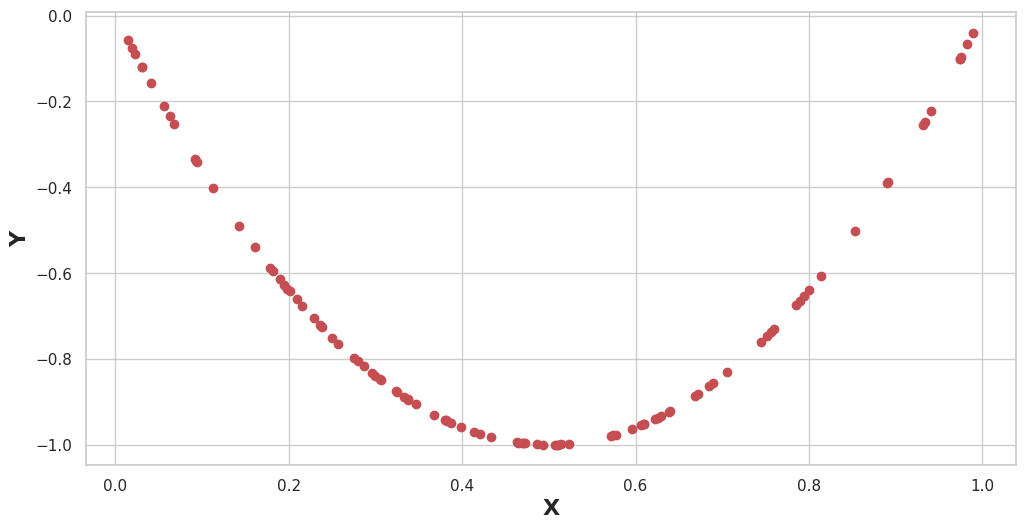

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.1755 - val_mean_squared_error: 0.1755


Epoch 2/200
 - 0s - loss: 0.1462 - mean_squared_error: 0.1462 - val_loss: 0.1729 - val_mean_squared_error: 0.1729


Epoch 3/200
 - 0s - loss: 0.1436 - mean_squared_error: 0.1436 - val_loss: 0.1714 - val_mean_squared_error: 0.1714


Epoch 4/200
 - 0s - loss: 0.1423 - mean_squared_error: 0.1423 - val_loss: 0.1689 - val_mean_squared_error: 0.1689


Epoch 5/200
 - 0s - loss: 0.1400 - mean_squared_error: 0.1400 - val_loss: 0.1672 - val_mean_squared_error: 0.1672


Epoch 6/200
 - 0s - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 0.1661 - val_mean_squared_error: 0.1661


Epoch 7/200
 - 0s - loss: 0.1377 - mean_squared_error: 0.1377 - val_loss: 0.1646 - val_mean_squared_error: 0.1646


Epoch 8/200
 - 0s - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.1626 - val_mean_squared_error: 0.1626


Epoch 9/200
 - 0s - loss: 0.1344 - mean_squared_error: 0.1344 - val_loss: 0.1614 - val_mean_squared_error: 0.1614


Epoch 10/200
 - 0s - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.1603 - val_mean_squared_error: 0.1603


Epoch 11/200
 - 0s - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1592 - val_mean_squared_error: 0.1592


Epoch 12/200
 - 0s - loss: 0.1315 - mean_squared_error: 0.1315 - val_loss: 0.1584 - val_mean_squared_error: 0.1584


Epoch 13/200
 - 0s - loss: 0.1305 - mean_squared_error: 0.1305 - val_loss: 0.1566 - val_mean_squared_error: 0.1566


Epoch 14/200
 - 0s - loss: 0.1294 - mean_squared_error: 0.1294 - val_loss: 0.1557 - val_mean_squared_error: 0.1557


Epoch 15/200
 - 0s - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.1549 - val_mean_squared_error: 0.1549


Epoch 16/200
 - 0s - loss: 0.1275 - mean_squared_error: 0.1275 - val_loss: 0.1538 - val_mean_squared_error: 0.1538


Epoch 17/200
 - 0s - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1530 - val_mean_squared_error: 0.1530


Epoch 18/200


 - 0s - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.1513 - val_mean_squared_error: 0.1513


Epoch 19/200
 - 0s - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.1505 - val_mean_squared_error: 0.1505


Epoch 20/200
 - 0s - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.1496 - val_mean_squared_error: 0.1496


Epoch 21/200
 - 0s - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1490 - val_mean_squared_error: 0.1490


Epoch 22/200
 - 0s - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.1480 - val_mean_squared_error: 0.1480


Epoch 23/200
 - 0s - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.1466 - val_mean_squared_error: 0.1466


Epoch 24/200
 - 0s - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.1458 - val_mean_squared_error: 0.1458


Epoch 25/200
 - 0s - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.1445 - val_mean_squared_error: 0.1445


Epoch 26/200
 - 0s - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.1437 - val_mean_squared_error: 0.1437


Epoch 27/200
 - 0s - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.1431 - val_mean_squared_error: 0.1431


Epoch 28/200
 - 0s - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.1425 - val_mean_squared_error: 0.1425


Epoch 29/200
 - 0s - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1420 - val_mean_squared_error: 0.1420


Epoch 30/200
 - 0s - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.1413 - val_mean_squared_error: 0.1413


Epoch 31/200
 - 0s - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.1409 - val_mean_squared_error: 0.1409


Epoch 32/200
 - 0s - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.1393 - val_mean_squared_error: 0.1393


Epoch 33/200
 - 0s - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.1388 - val_mean_squared_error: 0.1388


Epoch 34/200
 - 0s - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.1379 - val_mean_squared_error: 0.1379


Epoch 35/200
 - 0s - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.1374 - val_mean_squared_error: 0.1374


Epoch 36/200
 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.1372 - val_mean_squared_error: 0.1372


Epoch 37/200
 - 0s - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.1359 - val_mean_squared_error: 0.1359


Epoch 38/200
 - 0s - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1356 - val_mean_squared_error: 0.1356


Epoch 39/200
 - 0s - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.1353 - val_mean_squared_error: 0.1353


Epoch 40/200


 - 0s - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.1347 - val_mean_squared_error: 0.1347


Epoch 41/200


 - 0s - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1335 - val_mean_squared_error: 0.1335


Epoch 42/200


 - 0s - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.1330 - val_mean_squared_error: 0.1330


Epoch 43/200


 - 0s - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.1322 - val_mean_squared_error: 0.1322


Epoch 44/200


 - 0s - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.1315 - val_mean_squared_error: 0.1315


Epoch 45/200


 - 0s - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.1308 - val_mean_squared_error: 0.1308


Epoch 46/200


 - 0s - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.1302 - val_mean_squared_error: 0.1302


Epoch 47/200


 - 0s - loss: 0.1065 - mean_squared_error: 0.1065 - val_loss: 0.1299 - val_mean_squared_error: 0.1299


Epoch 48/200


 - 0s - loss: 0.1065 - mean_squared_error: 0.1065 - val_loss: 0.1289 - val_mean_squared_error: 0.1289


Epoch 49/200


 - 0s - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.1285 - val_mean_squared_error: 0.1285


Epoch 50/200


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.1280 - val_mean_squared_error: 0.1280


Epoch 51/200


 - 0s - loss: 0.1042 - mean_squared_error: 0.1042 - val_loss: 0.1276 - val_mean_squared_error: 0.1276


Epoch 52/200


 - 0s - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.1273 - val_mean_squared_error: 0.1273


Epoch 53/200


 - 0s - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.1267 - val_mean_squared_error: 0.1267


Epoch 54/200


 - 0s - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.1262 - val_mean_squared_error: 0.1262


Epoch 55/200


 - 0s - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.1255 - val_mean_squared_error: 0.1255


Epoch 56/200


 - 0s - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.1250 - val_mean_squared_error: 0.1250


Epoch 57/200


 - 0s - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.1244 - val_mean_squared_error: 0.1244


Epoch 58/200


 - 0s - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.1239 - val_mean_squared_error: 0.1239


Epoch 59/200
 - 0s - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.1236 - val_mean_squared_error: 0.1236


Epoch 60/200
 - 0s - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.1233 - val_mean_squared_error: 0.1233


Epoch 61/200
 - 0s - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.1230 - val_mean_squared_error: 0.1230


Epoch 62/200
 - 0s - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.1222 - val_mean_squared_error: 0.1222


Epoch 63/200
 - 0s - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.1220 - val_mean_squared_error: 0.1220


Epoch 64/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1218 - val_mean_squared_error: 0.1218


Epoch 65/200


 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 66/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.1215 - val_mean_squared_error: 0.1215


Epoch 67/200


 - 0s - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.1211 - val_mean_squared_error: 0.1211


Epoch 68/200


 - 0s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.1209 - val_mean_squared_error: 0.1209


Epoch 69/200


 - 0s - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.1206 - val_mean_squared_error: 0.1206


Epoch 70/200
 - 0s - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.1197 - val_mean_squared_error: 0.1197


Epoch 71/200
 - 0s - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.1193 - val_mean_squared_error: 0.1193


Epoch 72/200


 - 0s - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.1189 - val_mean_squared_error: 0.1189


Epoch 73/200


 - 0s - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.1185 - val_mean_squared_error: 0.1185


Epoch 74/200


 - 0s - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.1183 - val_mean_squared_error: 0.1183


Epoch 75/200


 - 0s - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.1181 - val_mean_squared_error: 0.1181


Epoch 76/200


 - 0s - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.1180 - val_mean_squared_error: 0.1180


Epoch 77/200
 - 0s - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.1177 - val_mean_squared_error: 0.1177


Epoch 78/200


 - 0s - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.1176 - val_mean_squared_error: 0.1176


Epoch 79/200


 - 0s - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.1177 - val_mean_squared_error: 0.1177


Epoch 80/200


 - 0s - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.1174 - val_mean_squared_error: 0.1174


Epoch 81/200


 - 0s - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.1176 - val_mean_squared_error: 0.1176


Epoch 82/200


 - 0s - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.1163 - val_mean_squared_error: 0.1163


Epoch 83/200


 - 0s - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.1156 - val_mean_squared_error: 0.1156


Epoch 84/200


 - 0s - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.1156 - val_mean_squared_error: 0.1156


Epoch 85/200


 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.1148 - val_mean_squared_error: 0.1148


Epoch 86/200


 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.1142 - val_mean_squared_error: 0.1142


Epoch 87/200


 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.1139 - val_mean_squared_error: 0.1139


Epoch 88/200


 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1138 - val_mean_squared_error: 0.1138


Epoch 89/200


 - 0s - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.1137 - val_mean_squared_error: 0.1137


Epoch 90/200


 - 0s - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.1136 - val_mean_squared_error: 0.1136


Epoch 91/200


 - 0s - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.1131 - val_mean_squared_error: 0.1131


Epoch 92/200


 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.1130 - val_mean_squared_error: 0.1130


Epoch 93/200
 - 0s - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.1128 - val_mean_squared_error: 0.1128


Epoch 94/200


 - 0s - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1128 - val_mean_squared_error: 0.1128


Epoch 95/200


 - 0s - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.1127 - val_mean_squared_error: 0.1127


Epoch 96/200


 - 0s - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.1120 - val_mean_squared_error: 0.1120


Epoch 97/200


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1120 - val_mean_squared_error: 0.1120


Epoch 98/200


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1119 - val_mean_squared_error: 0.1119


Epoch 99/200


 - 0s - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.1116 - val_mean_squared_error: 0.1116


Epoch 100/200


 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1116 - val_mean_squared_error: 0.1116


Epoch 101/200


 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1108 - val_mean_squared_error: 0.1108


Epoch 102/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1108 - val_mean_squared_error: 0.1108


Epoch 103/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1108 - val_mean_squared_error: 0.1108


Epoch 104/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.1106 - val_mean_squared_error: 0.1106


Epoch 105/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1108 - val_mean_squared_error: 0.1108


Epoch 106/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 107/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.1109 - val_mean_squared_error: 0.1109


Epoch 108/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1099 - val_mean_squared_error: 0.1099


Epoch 109/200


 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.1100 - val_mean_squared_error: 0.1100


Epoch 110/200


 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.1099 - val_mean_squared_error: 0.1099


Epoch 111/200

 - 0s - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.1098 - val_mean_squared_error: 0.1098


Epoch 112/200


 - 0s - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.1090 - val_mean_squared_error: 0.1090


Epoch 113/200


 - 0s - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.1087 - val_mean_squared_error: 0.1087


Epoch 114/200


 - 0s - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.1082 - val_mean_squared_error: 0.1082


Epoch 115/200


 - 0s - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.1082 - val_mean_squared_error: 0.1082


Epoch 116/200


 - 0s - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.1078 - val_mean_squared_error: 0.1078


Epoch 117/200


 - 0s - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 118/200


 - 0s - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.1072 - val_mean_squared_error: 0.1072


Epoch 119/200


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.1070 - val_mean_squared_error: 0.1070


Epoch 120/200


 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 121/200


 - 0s - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 122/200


 - 0s - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 123/200
 - 0s - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 124/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 125/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1069 - val_mean_squared_error: 0.1069


Epoch 126/200
 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1072 - val_mean_squared_error: 0.1072


Epoch 127/200


 - 0s - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.1072 - val_mean_squared_error: 0.1072


Epoch 128/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1075 - val_mean_squared_error: 0.1075


Epoch 129/200


 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.1073 - val_mean_squared_error: 0.1073


Epoch 130/200


 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.1073 - val_mean_squared_error: 0.1073


Epoch 131/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1074 - val_mean_squared_error: 0.1074


Epoch 132/200


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1072 - val_mean_squared_error: 0.1072


Epoch 133/200
 - 0s - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.1063 - val_mean_squared_error: 0.1063


Epoch 134/200


 - 0s - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.1062 - val_mean_squared_error: 0.1062


Epoch 135/200


 - 0s - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.1053 - val_mean_squared_error: 0.1053


Epoch 136/200


 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.1048 - val_mean_squared_error: 0.1048


Epoch 137/200


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.1044 - val_mean_squared_error: 0.1044


Epoch 138/200


 - 0s - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 139/200


 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.1041 - val_mean_squared_error: 0.1041


Epoch 140/200


 - 0s - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 141/200


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 142/200


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 143/200


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.1036 - val_mean_squared_error: 0.1036


Epoch 144/200


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 145/200


 - 0s - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 146/200


 - 0s - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 147/200


 - 0s - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 148/200


 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 149/200


 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 150/200


 - 0s - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 151/200


 - 0s - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 152/200


 - 0s - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 153/200


 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 154/200


 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1024 - val_mean_squared_error: 0.1024


Epoch 155/200


 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 156/200
 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 157/200


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 158/200


 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 159/200


 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 160/200


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 161/200


 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 162/200


 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 163/200
 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 164/200


 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 165/200


 - 0s - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 166/200


 - 0s - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.1017 - val_mean_squared_error: 0.1017


Epoch 167/200


 - 0s - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 168/200


 - 0s - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 169/200


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 170/200
 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 171/200


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 172/200


 - 0s - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 173/200


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 174/200


 - 0s - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 175/200


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 176/200


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 177/200


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 178/200


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 179/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 180/200


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 181/200

 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 182/200


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 183/200


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 184/200


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 185/200


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 186/200
 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 187/200


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 188/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 189/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 190/200


 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 191/200


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 192/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 193/200


 - 0s - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 194/200


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 195/200


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 196/200


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 197/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 198/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 199/200


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 200/200


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

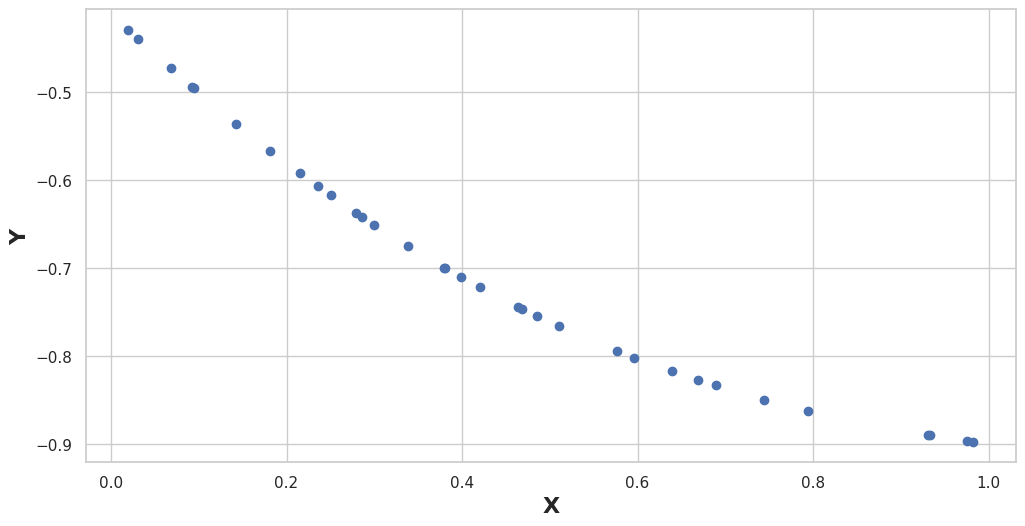

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.17554359798404304,
  0.1728959601146705,
  0.1714195650861119,
  0.1689384187374151,
  0.16720089643742098,
  0.1661374315506581,
  0.16460090350698342,
  0.16261802359738134,
  0.1614057653668252,
  0.16028988649221984,
  0.15922226100652057,
  0.15840453709560362,
  0.15657716018683981,
  0.15574298502708023,
  0.15486483600442158,
  0.15378310466467432,
  0.15304389989680864,
  0.1513462468671302,
  0.1504961681044237,
  0.14964929030446167,
  0.14899344212432025,
  0.147960770748217,
  0.14655707630498166,
  0.14579161758195947,
  0.14445192362605172,
  0.14374679219767902,
  0.14306947169119888,
  0.14250066933913552,
  0.14204010908901127,
  0.14128737523093482,
  0.14088621406611337,
  0.13934020919965184,
  0.1387954302463737,
  0.13787630585262156,
  0.13739561393528923,
  0.1371610652413713,
  0.13586576986849788,
  0.13555283136762833,
  0.1352548320612572,
  0.13472681778089832,
  0.1335304372751676,
  0.13299525349341848,
  0.13215101688260664,
  0.13145024

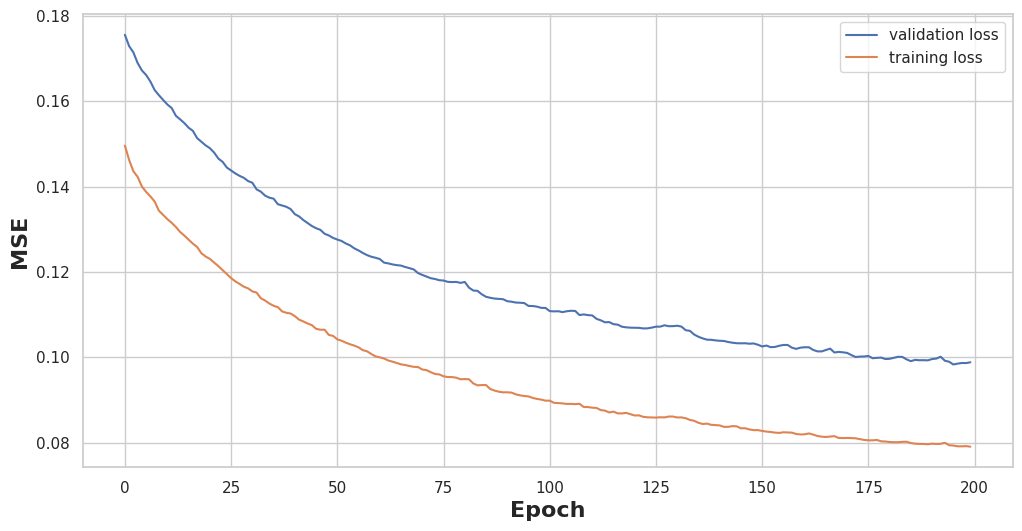

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.4422 - mean_squared_error: 0.4422 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 2/500
 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 3/500
 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 4/500
 - 0s - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.1135 - val_mean_squared_error: 0.1135


Epoch 5/500
 - 0s - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1028 - val_mean_squared_error: 0.1028


Epoch 6/500
 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 7/500
 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 8/500
 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.1054 - val_mean_squared_error: 0.1054


Epoch 9/500
 - 0s - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.1088 - val_mean_squared_error: 0.1088


Epoch 10/500
 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 11/500
 - 0s - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 12/500
 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 13/500
 - 0s - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.1122 - val_mean_squared_error: 0.1122


Epoch 14/500
 - 0s - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.1204 - val_mean_squared_error: 0.1204


Epoch 15/500
 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 16/500
 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 17/500
 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 18/500
 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 19/500
 - 0s - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0953 - val_mean_squared_error: 0.0953


Epoch 20/500
 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0948 - val_mean_squared_error: 0.0948


Epoch 21/500
 - 0s - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 22/500
 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 23/500
 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 24/500
 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0930 - val_mean_squared_error: 0.0930


Epoch 25/500
 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 26/500
 - 0s - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0942 - val_mean_squared_error: 0.0942


Epoch 27/500


 - 0s - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.0930 - val_mean_squared_error: 0.0930


Epoch 28/500
 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 29/500
 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 30/500
 - 0s - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0939 - val_mean_squared_error: 0.0939


Epoch 31/500
 - 0s - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 32/500
 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0928 - val_mean_squared_error: 0.0928


Epoch 33/500
 - 0s - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 34/500
 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0923 - val_mean_squared_error: 0.0923


Epoch 35/500
 - 0s - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 36/500
 - 0s - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0939 - val_mean_squared_error: 0.0939


Epoch 37/500
 - 0s - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0897 - val_mean_squared_error: 0.0897


Epoch 38/500
 - 0s - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 39/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0907 - val_mean_squared_error: 0.0907


Epoch 40/500


 - 0s - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0890 - val_mean_squared_error: 0.0890


Epoch 41/500


 - 0s - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 42/500


 - 0s - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0915 - val_mean_squared_error: 0.0915


Epoch 43/500


 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0889 - val_mean_squared_error: 0.0889


Epoch 44/500
 - 0s - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 45/500


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.1169 - val_mean_squared_error: 0.1169


Epoch 46/500


 - 0s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0920 - val_mean_squared_error: 0.0920


Epoch 47/500
 - 0s - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0897 - val_mean_squared_error: 0.0897


Epoch 48/500
 - 0s - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0869 - val_mean_squared_error: 0.0869


Epoch 49/500


 - 0s - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0903 - val_mean_squared_error: 0.0903


Epoch 50/500


 - 0s - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 51/500


 - 0s - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0863 - val_mean_squared_error: 0.0863


Epoch 52/500


 - 0s - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0890 - val_mean_squared_error: 0.0890


Epoch 53/500


 - 0s - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0930 - val_mean_squared_error: 0.0930


Epoch 54/500
 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0852 - val_mean_squared_error: 0.0852


Epoch 55/500
 - 0s - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0850 - val_mean_squared_error: 0.0850


Epoch 56/500
 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0847 - val_mean_squared_error: 0.0847


Epoch 57/500
 - 0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0916 - val_mean_squared_error: 0.0916


Epoch 58/500


 - 0s - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0913 - val_mean_squared_error: 0.0913


Epoch 59/500


 - 0s - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0880 - val_mean_squared_error: 0.0880


Epoch 60/500


 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0870 - val_mean_squared_error: 0.0870


Epoch 61/500


 - 0s - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0852 - val_mean_squared_error: 0.0852


Epoch 62/500


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0912 - val_mean_squared_error: 0.0912


Epoch 63/500
 - 0s - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0842 - val_mean_squared_error: 0.0842


Epoch 64/500
 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0841 - val_mean_squared_error: 0.0841


Epoch 65/500
 - 0s - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0825 - val_mean_squared_error: 0.0825


Epoch 66/500
 - 0s - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.0861 - val_mean_squared_error: 0.0861


Epoch 67/500


 - 0s - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0916 - val_mean_squared_error: 0.0916


Epoch 68/500


 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 69/500


 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0907 - val_mean_squared_error: 0.0907


Epoch 70/500


 - 0s - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 71/500


 - 0s - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0886 - val_mean_squared_error: 0.0886


Epoch 72/500


 - 0s - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0806 - val_mean_squared_error: 0.0806


Epoch 73/500


 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0824 - val_mean_squared_error: 0.0824


Epoch 74/500


 - 0s - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0799 - val_mean_squared_error: 0.0799


Epoch 75/500


 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0784 - val_mean_squared_error: 0.0784


Epoch 76/500


 - 0s - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0792 - val_mean_squared_error: 0.0792


Epoch 77/500


 - 0s - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0860 - val_mean_squared_error: 0.0860


Epoch 78/500


 - 0s - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0780 - val_mean_squared_error: 0.0780


Epoch 79/500


 - 0s - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0775 - val_mean_squared_error: 0.0775


Epoch 80/500


 - 0s - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0819 - val_mean_squared_error: 0.0819


Epoch 81/500


 - 0s - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0885 - val_mean_squared_error: 0.0885


Epoch 82/500


 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0772 - val_mean_squared_error: 0.0772


Epoch 83/500


 - 0s - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0813 - val_mean_squared_error: 0.0813


Epoch 84/500


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0786 - val_mean_squared_error: 0.0786


Epoch 85/500


 - 0s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0932 - val_mean_squared_error: 0.0932


Epoch 86/500


 - 0s - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0768 - val_mean_squared_error: 0.0768


Epoch 87/500


 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0826 - val_mean_squared_error: 0.0826


Epoch 88/500


 - 0s - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0759 - val_mean_squared_error: 0.0759


Epoch 89/500


 - 0s - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0755 - val_mean_squared_error: 0.0755


Epoch 90/500


 - 0s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 91/500


 - 0s - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0772 - val_mean_squared_error: 0.0772


Epoch 92/500
 - 0s - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0735 - val_mean_squared_error: 0.0735


Epoch 93/500


 - 0s - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0874 - val_mean_squared_error: 0.0874


Epoch 94/500


 - 0s - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0735 - val_mean_squared_error: 0.0735


Epoch 95/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0729 - val_mean_squared_error: 0.0729


Epoch 96/500


 - 0s - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0899 - val_mean_squared_error: 0.0899


Epoch 97/500


 - 0s - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0840 - val_mean_squared_error: 0.0840


Epoch 98/500


 - 0s - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0723 - val_mean_squared_error: 0.0723


Epoch 99/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0774 - val_mean_squared_error: 0.0774


Epoch 100/500


 - 0s - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0756 - val_mean_squared_error: 0.0756


Epoch 101/500


 - 0s - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0813 - val_mean_squared_error: 0.0813


Epoch 102/500


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0745 - val_mean_squared_error: 0.0745


Epoch 103/500


 - 0s - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0726 - val_mean_squared_error: 0.0726


Epoch 104/500


 - 0s - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.0702 - val_mean_squared_error: 0.0702


Epoch 105/500


 - 0s - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0821 - val_mean_squared_error: 0.0821


Epoch 106/500


 - 0s - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0811 - val_mean_squared_error: 0.0811


Epoch 107/500


 - 0s - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 108/500
 - 0s - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0690 - val_mean_squared_error: 0.0690


Epoch 109/500


 - 0s - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.0760 - val_mean_squared_error: 0.0760


Epoch 110/500


 - 0s - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0875 - val_mean_squared_error: 0.0875


Epoch 111/500


 - 0s - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0781 - val_mean_squared_error: 0.0781


Epoch 112/500


 - 0s - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0766 - val_mean_squared_error: 0.0766


Epoch 113/500


 - 0s - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0730 - val_mean_squared_error: 0.0730


Epoch 114/500


 - 0s - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0690 - val_mean_squared_error: 0.0690


Epoch 115/500


 - 0s - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.0703 - val_mean_squared_error: 0.0703


Epoch 116/500


 - 0s - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0779 - val_mean_squared_error: 0.0779


Epoch 117/500


 - 0s - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0763 - val_mean_squared_error: 0.0763


Epoch 118/500


 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 119/500


 - 0s - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0665 - val_mean_squared_error: 0.0665


Epoch 120/500


 - 0s - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.0675 - val_mean_squared_error: 0.0675


Epoch 121/500


 - 0s - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 122/500


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0656 - val_mean_squared_error: 0.0656


Epoch 123/500


 - 0s - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0680 - val_mean_squared_error: 0.0680


Epoch 124/500


 - 0s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0808 - val_mean_squared_error: 0.0808


Epoch 125/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0730 - val_mean_squared_error: 0.0730


Epoch 126/500


 - 0s - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.0627 - val_mean_squared_error: 0.0627


Epoch 127/500


 - 0s - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0777 - val_mean_squared_error: 0.0777


Epoch 128/500


 - 0s - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.0685 - val_mean_squared_error: 0.0685


Epoch 129/500


 - 0s - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0624 - val_mean_squared_error: 0.0624


Epoch 130/500


 - 0s - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 131/500


 - 0s - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0614 - val_mean_squared_error: 0.0614


Epoch 132/500


 - 0s - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 133/500


 - 0s - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0687 - val_mean_squared_error: 0.0687


Epoch 134/500


 - 0s - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.0608 - val_mean_squared_error: 0.0608


Epoch 135/500


 - 0s - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0631 - val_mean_squared_error: 0.0631


Epoch 136/500


 - 0s - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0610 - val_mean_squared_error: 0.0610


Epoch 137/500


 - 0s - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0602 - val_mean_squared_error: 0.0602


Epoch 138/500


 - 0s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0774 - val_mean_squared_error: 0.0774


Epoch 139/500


 - 0s - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0620 - val_mean_squared_error: 0.0620


Epoch 140/500


 - 0s - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.0584 - val_mean_squared_error: 0.0584


Epoch 141/500


 - 0s - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0594 - val_mean_squared_error: 0.0594


Epoch 142/500


 - 0s - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 143/500


 - 0s - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0826 - val_mean_squared_error: 0.0826


Epoch 144/500


 - 0s - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0564 - val_mean_squared_error: 0.0564


Epoch 145/500


 - 0s - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 146/500


 - 0s - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 147/500


 - 0s - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 148/500


 - 0s - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0599 - val_mean_squared_error: 0.0599


Epoch 149/500


 - 0s - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 150/500


 - 0s - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 151/500


 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0605 - val_mean_squared_error: 0.0605


Epoch 152/500


 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 153/500


 - 0s - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0540 - val_mean_squared_error: 0.0540


Epoch 154/500


 - 0s - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0588 - val_mean_squared_error: 0.0588


Epoch 155/500
 - 0s - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0642 - val_mean_squared_error: 0.0642


Epoch 156/500
 - 0s - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0589 - val_mean_squared_error: 0.0589


Epoch 157/500


 - 0s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0632 - val_mean_squared_error: 0.0632


Epoch 158/500


 - 0s - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0558 - val_mean_squared_error: 0.0558


Epoch 159/500


 - 0s - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0526 - val_mean_squared_error: 0.0526


Epoch 160/500


 - 0s - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0533 - val_mean_squared_error: 0.0533


Epoch 161/500


 - 0s - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0579 - val_mean_squared_error: 0.0579


Epoch 162/500


 - 0s - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0545 - val_mean_squared_error: 0.0545


Epoch 163/500


 - 0s - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0551 - val_mean_squared_error: 0.0551


Epoch 164/500


 - 0s - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0651 - val_mean_squared_error: 0.0651


Epoch 165/500


 - 0s - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0513 - val_mean_squared_error: 0.0513


Epoch 166/500


 - 0s - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0529 - val_mean_squared_error: 0.0529


Epoch 167/500


 - 0s - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0804 - val_mean_squared_error: 0.0804


Epoch 168/500


 - 0s - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0476 - val_mean_squared_error: 0.0476


Epoch 169/500


 - 0s - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0473 - val_mean_squared_error: 0.0473


Epoch 170/500


 - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0488 - val_mean_squared_error: 0.0488


Epoch 171/500


 - 0s - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0502 - val_mean_squared_error: 0.0502


Epoch 172/500


 - 0s - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0517 - val_mean_squared_error: 0.0517


Epoch 173/500


 - 0s - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0483 - val_mean_squared_error: 0.0483


Epoch 174/500
 - 0s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0452 - val_mean_squared_error: 0.0452


Epoch 175/500


 - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0463 - val_mean_squared_error: 0.0463


Epoch 176/500


 - 0s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0454 - val_mean_squared_error: 0.0454


Epoch 177/500


 - 0s - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0586 - val_mean_squared_error: 0.0586


Epoch 178/500


 - 0s - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0449 - val_mean_squared_error: 0.0449


Epoch 179/500


 - 0s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0447 - val_mean_squared_error: 0.0447


Epoch 180/500


 - 0s - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0424 - val_mean_squared_error: 0.0424


Epoch 181/500


 - 0s - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0424 - val_mean_squared_error: 0.0424


Epoch 182/500


 - 0s - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0546 - val_mean_squared_error: 0.0546


Epoch 183/500


 - 0s - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0421 - val_mean_squared_error: 0.0421


Epoch 184/500


 - 0s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0408 - val_mean_squared_error: 0.0408


Epoch 185/500


 - 0s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0401 - val_mean_squared_error: 0.0401


Epoch 186/500


 - 0s - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0465 - val_mean_squared_error: 0.0465


Epoch 187/500


 - 0s - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0394 - val_mean_squared_error: 0.0394


Epoch 188/500


 - 0s - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0431 - val_mean_squared_error: 0.0431


Epoch 189/500


 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0472 - val_mean_squared_error: 0.0472


Epoch 190/500


 - 0s - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0387 - val_mean_squared_error: 0.0387


Epoch 191/500


 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0399 - val_mean_squared_error: 0.0399


Epoch 192/500


 - 0s - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0413 - val_mean_squared_error: 0.0413


Epoch 193/500


 - 0s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0372 - val_mean_squared_error: 0.0372


Epoch 194/500


 - 0s - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0368 - val_mean_squared_error: 0.0368


Epoch 195/500


 - 0s - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0403 - val_mean_squared_error: 0.0403


Epoch 196/500


 - 0s - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0411 - val_mean_squared_error: 0.0411


Epoch 197/500


 - 0s - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0418 - val_mean_squared_error: 0.0418


Epoch 198/500


 - 0s - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0477 - val_mean_squared_error: 0.0477


Epoch 199/500


 - 0s - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0427 - val_mean_squared_error: 0.0427


Epoch 200/500


 - 0s - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0391 - val_mean_squared_error: 0.0391


Epoch 201/500


 - 0s - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0341 - val_mean_squared_error: 0.0341


Epoch 202/500


 - 0s - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0372 - val_mean_squared_error: 0.0372


Epoch 203/500


 - 0s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0418 - val_mean_squared_error: 0.0418


Epoch 204/500


 - 0s - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0349 - val_mean_squared_error: 0.0349


Epoch 205/500


 - 0s - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0429 - val_mean_squared_error: 0.0429


Epoch 206/500


 - 0s - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0375 - val_mean_squared_error: 0.0375


Epoch 207/500
 - 0s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0322 - val_mean_squared_error: 0.0322


Epoch 208/500


 - 0s - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0392 - val_mean_squared_error: 0.0392


Epoch 209/500


 - 0s - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0319 - val_mean_squared_error: 0.0319


Epoch 210/500


 - 0s - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0349 - val_mean_squared_error: 0.0349


Epoch 211/500


 - 0s - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0359 - val_mean_squared_error: 0.0359


Epoch 212/500


 - 0s - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0372 - val_mean_squared_error: 0.0372


Epoch 213/500


 - 0s - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0307 - val_mean_squared_error: 0.0307


Epoch 214/500


 - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0308 - val_mean_squared_error: 0.0308


Epoch 215/500


 - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0314 - val_mean_squared_error: 0.0314


Epoch 216/500


 - 0s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0372 - val_mean_squared_error: 0.0372


Epoch 217/500


 - 0s - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0292 - val_mean_squared_error: 0.0292


Epoch 218/500


 - 0s - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0317 - val_mean_squared_error: 0.0317


Epoch 219/500


 - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0290 - val_mean_squared_error: 0.0290


Epoch 220/500


 - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0274 - val_mean_squared_error: 0.0274


Epoch 221/500


 - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0283 - val_mean_squared_error: 0.0283


Epoch 222/500


 - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0278 - val_mean_squared_error: 0.0278


Epoch 223/500


 - 0s - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0268 - val_mean_squared_error: 0.0268


Epoch 224/500


 - 0s - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0285 - val_mean_squared_error: 0.0285


Epoch 225/500


 - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0325 - val_mean_squared_error: 0.0325


Epoch 226/500


 - 0s - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0338 - val_mean_squared_error: 0.0338


Epoch 227/500


 - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0260 - val_mean_squared_error: 0.0260


Epoch 228/500


 - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0335 - val_mean_squared_error: 0.0335


Epoch 229/500


 - 0s - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0266 - val_mean_squared_error: 0.0266


Epoch 230/500


 - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0238 - val_mean_squared_error: 0.0238


Epoch 231/500


 - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0247 - val_mean_squared_error: 0.0247


Epoch 232/500
 - 0s - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0280 - val_mean_squared_error: 0.0280


Epoch 233/500


 - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0231 - val_mean_squared_error: 0.0231


Epoch 234/500


 - 0s - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0367 - val_mean_squared_error: 0.0367


Epoch 235/500


 - 0s - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0377 - val_mean_squared_error: 0.0377


Epoch 236/500


 - 0s - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0261 - val_mean_squared_error: 0.0261


Epoch 237/500


 - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0216 - val_mean_squared_error: 0.0216


Epoch 238/500


 - 0s - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0207 - val_mean_squared_error: 0.0207


Epoch 239/500


 - 0s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0210 - val_mean_squared_error: 0.0210


Epoch 240/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0203 - val_mean_squared_error: 0.0203


Epoch 241/500


 - 0s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0208 - val_mean_squared_error: 0.0208


Epoch 242/500


 - 0s - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0242 - val_mean_squared_error: 0.0242


Epoch 243/500


 - 0s - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


Epoch 244/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0245 - val_mean_squared_error: 0.0245


Epoch 245/500


 - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0188 - val_mean_squared_error: 0.0188


Epoch 246/500


 - 0s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0195 - val_mean_squared_error: 0.0195


Epoch 247/500
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0197 - val_mean_squared_error: 0.0197


Epoch 248/500


 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0190 - val_mean_squared_error: 0.0190


Epoch 249/500


 - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0291 - val_mean_squared_error: 0.0291


Epoch 250/500


 - 0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0193 - val_mean_squared_error: 0.0193


Epoch 251/500


 - 0s - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 252/500


 - 0s - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


Epoch 253/500


 - 0s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0174 - val_mean_squared_error: 0.0174


Epoch 254/500


 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 255/500


 - 0s - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0198 - val_mean_squared_error: 0.0198


Epoch 256/500


 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0220 - val_mean_squared_error: 0.0220


Epoch 257/500


 - 0s - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0172 - val_mean_squared_error: 0.0172


Epoch 258/500


 - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 259/500


 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0154 - val_mean_squared_error: 0.0154


Epoch 260/500


 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0154 - val_mean_squared_error: 0.0154


Epoch 261/500


 - 0s - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0195 - val_mean_squared_error: 0.0195


Epoch 262/500


 - 0s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0147 - val_mean_squared_error: 0.0147


Epoch 263/500


 - 0s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0176 - val_mean_squared_error: 0.0176


Epoch 264/500


 - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 265/500


 - 0s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0143 - val_mean_squared_error: 0.0143


Epoch 266/500


 - 0s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0169 - val_mean_squared_error: 0.0169


Epoch 267/500


 - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0202 - val_mean_squared_error: 0.0202


Epoch 268/500


 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0139 - val_mean_squared_error: 0.0139


Epoch 269/500


 - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0148 - val_mean_squared_error: 0.0148


Epoch 270/500


 - 0s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 271/500


 - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0178 - val_mean_squared_error: 0.0178


Epoch 272/500


 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0132 - val_mean_squared_error: 0.0132


Epoch 273/500


 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0147 - val_mean_squared_error: 0.0147


Epoch 274/500


 - 0s - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0130 - val_mean_squared_error: 0.0130


Epoch 275/500


 - 0s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0129 - val_mean_squared_error: 0.0129


Epoch 276/500


 - 0s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0115 - val_mean_squared_error: 0.0115


Epoch 277/500


 - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 278/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0125 - val_mean_squared_error: 0.0125


Epoch 279/500


 - 0s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0111 - val_mean_squared_error: 0.0111


Epoch 280/500


 - 0s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0184 - val_mean_squared_error: 0.0184


Epoch 281/500


 - 0s - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0133 - val_mean_squared_error: 0.0133


Epoch 282/500
 - 0s - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0100 - val_mean_squared_error: 0.0100


Epoch 283/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


Epoch 284/500
 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0099 - val_mean_squared_error: 0.0099


Epoch 285/500


 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0135 - val_mean_squared_error: 0.0135


Epoch 286/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0123 - val_mean_squared_error: 0.0123


Epoch 287/500


 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0110 - val_mean_squared_error: 0.0110


Epoch 288/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 289/500


 - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 290/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 291/500


 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0101 - val_mean_squared_error: 0.0101


Epoch 292/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0102 - val_mean_squared_error: 0.0102


Epoch 293/500


 - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0094 - val_mean_squared_error: 0.0094


Epoch 294/500


 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 295/500


 - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0095 - val_mean_squared_error: 0.0095


Epoch 296/500


 - 0s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 297/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0101 - val_mean_squared_error: 0.0101


Epoch 298/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


Epoch 299/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0084 - val_mean_squared_error: 0.0084


Epoch 300/500


 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0074 - val_mean_squared_error: 0.0074


Epoch 301/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 302/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 303/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0080 - val_mean_squared_error: 0.0080


Epoch 304/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 305/500


 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0076 - val_mean_squared_error: 0.0076


Epoch 306/500
 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0092 - val_mean_squared_error: 0.0092


Epoch 307/500

 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0073 - val_mean_squared_error: 0.0073


Epoch 308/500


 - 0s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0095 - val_mean_squared_error: 0.0095


Epoch 309/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0066 - val_mean_squared_error: 0.0066


Epoch 310/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0070 - val_mean_squared_error: 0.0070


Epoch 311/500
 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 312/500


 - 0s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 313/500


 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0084 - val_mean_squared_error: 0.0084


Epoch 314/500


 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 315/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 316/500
 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 317/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 318/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0075 - val_mean_squared_error: 0.0075


Epoch 319/500


 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 320/500
 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 321/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 322/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 323/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 324/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 325/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0059 - val_mean_squared_error: 0.0059


Epoch 326/500
 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 327/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 328/500
 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0068 - val_mean_squared_error: 0.0068


Epoch 329/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0059 - val_mean_squared_error: 0.0059


Epoch 330/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 331/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 332/500
 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 333/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 334/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 335/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 336/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0054 - val_mean_squared_error: 0.0054


Epoch 337/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 338/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Epoch 339/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 340/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 341/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 342/500
 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 343/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 344/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0071 - val_mean_squared_error: 0.0071


Epoch 345/500


 - 0s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 346/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 347/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 348/500


 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 349/500
 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 350/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 351/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 352/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 353/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 354/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 355/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 356/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 357/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 358/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 359/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 360/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 361/500
 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 362/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 363/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 364/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 365/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 366/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 367/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 368/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 369/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 370/500
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 371/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 372/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 373/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 374/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 375/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 376/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 377/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 378/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 379/500

 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 380/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 381/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 382/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 383/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 384/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 385/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 386/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 387/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 388/500
 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 389/500
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 390/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 391/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 392/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 393/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 394/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 395/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 396/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 397/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 398/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 399/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 400/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 401/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 402/500

 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 403/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 404/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 405/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 406/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 407/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 408/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 409/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 410/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 411/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 412/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 413/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 414/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 415/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 416/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 417/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 418/500
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 419/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 420/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 421/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 422/500
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 423/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 424/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 425/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 426/500
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 427/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 428/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 429/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 430/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 431/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 432/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 433/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 434/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 435/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 436/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 437/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 438/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 439/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 440/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 441/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 442/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 443/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 444/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 445/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 446/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 447/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 448/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 449/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 450/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 451/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 452/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 453/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 454/500

 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 455/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 456/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 457/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 458/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 459/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 460/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 461/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 462/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 463/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 464/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 465/500
 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 466/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 467/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 468/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 469/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 470/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 471/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 472/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 473/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 474/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 475/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 476/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 477/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 478/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 479/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 480/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 481/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 482/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 483/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 484/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 485/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 486/500

 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 487/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 488/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 489/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 490/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 491/500
 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 492/500


 - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 493/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 494/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 495/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 496/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 497/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 498/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 499/500


 - 0s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 500/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Text(0, 0.5, 'Y')

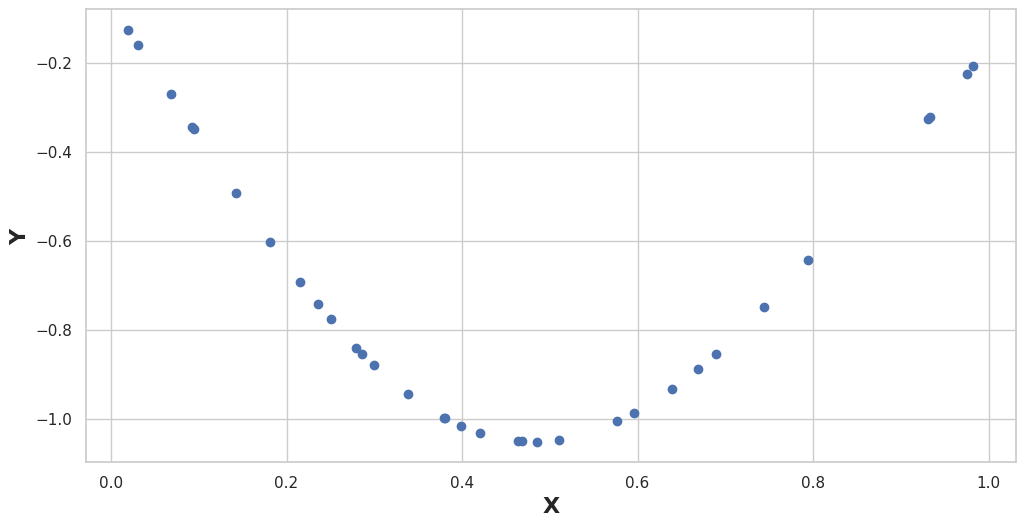

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

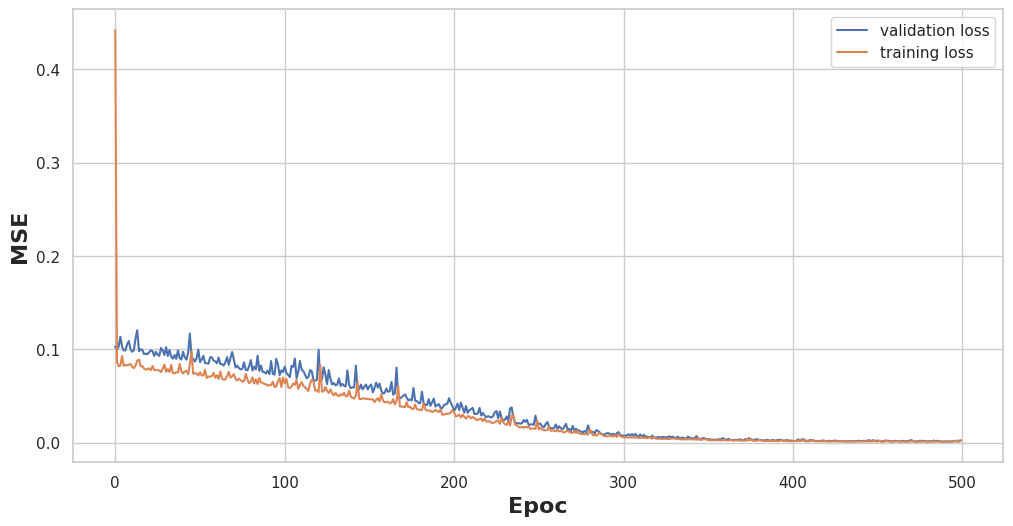

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

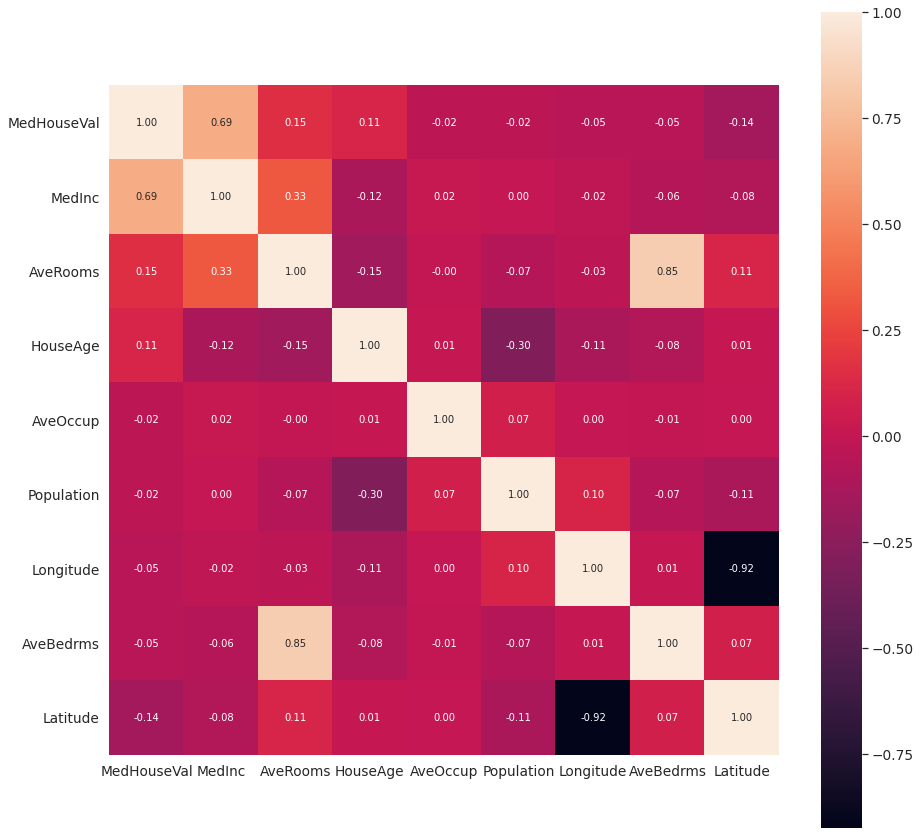

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

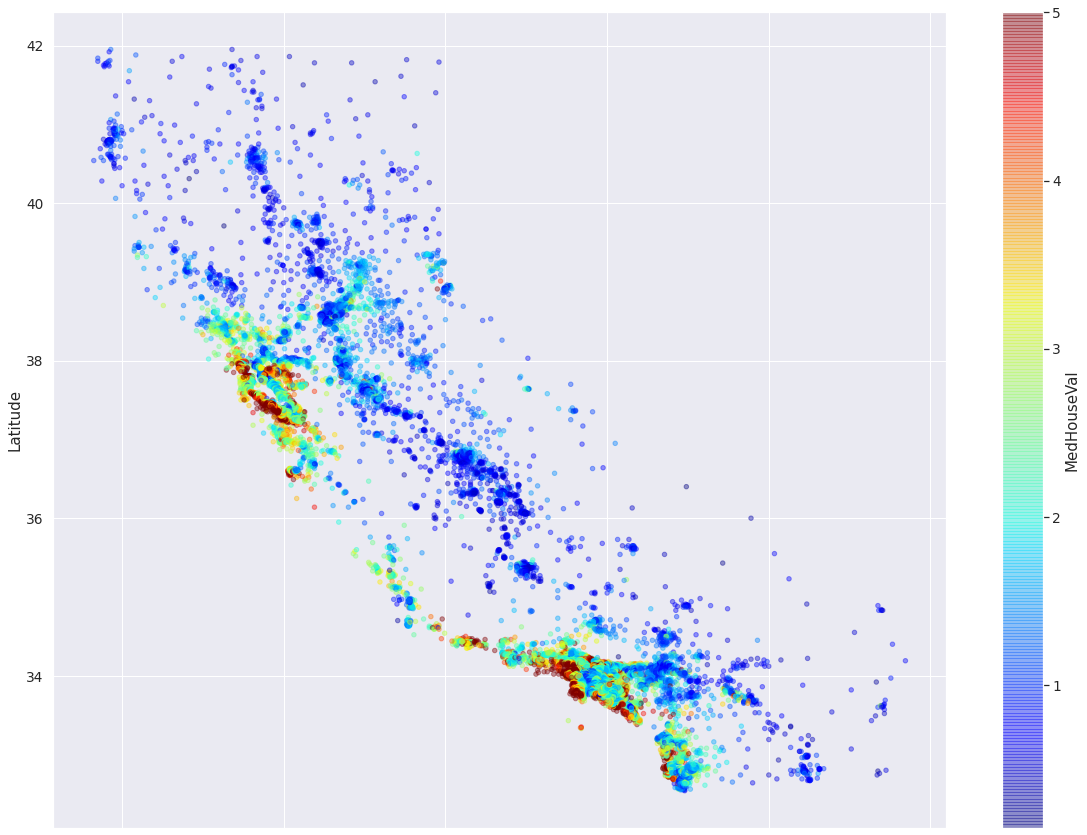

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

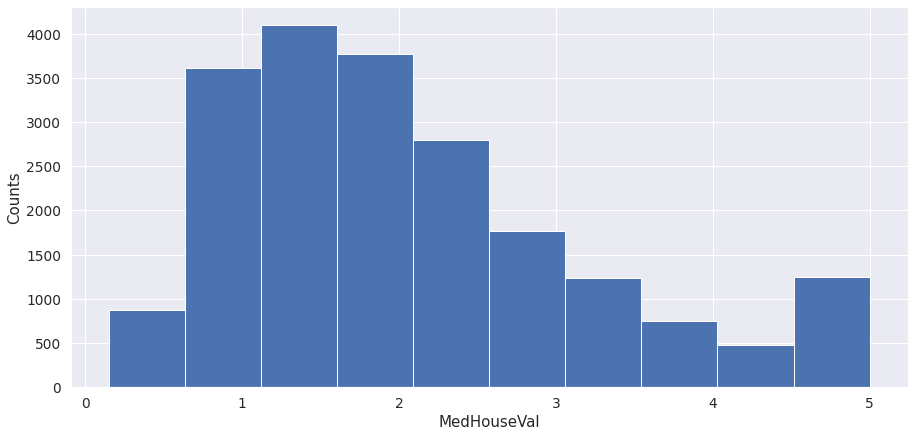

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

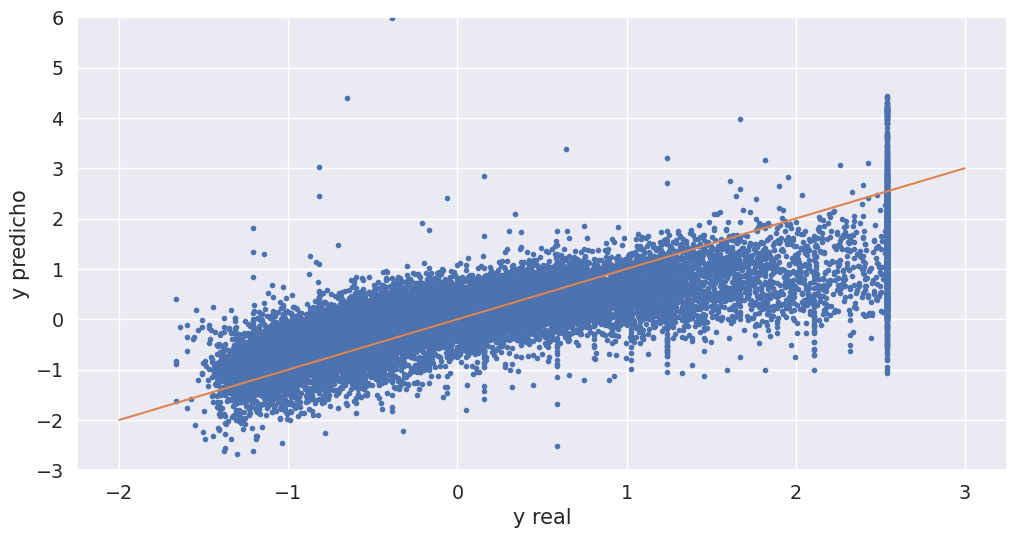

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100


   32/12384 [..............................] - ETA: 15s - loss: 1.3778

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.4525 

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.4130

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.3873

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.3827

11776/12384 [===========================>..] - ETA: 0s - loss: 0.3687

12384/12384 [==============================] - 0s 36us/step - loss: 0.3680 - val_loss: 0.3409


Epoch 2/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2104

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.3156

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.3211

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.3245

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.3269

11424/12384 [==========================>...] - ETA: 0s - loss: 0.3262

12384/12384 [==============================] - 0s 32us/step - loss: 0.3271 - val_loss: 0.3533


Epoch 3/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2786

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.3231

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.3230

 7072/12384 [================>.............] - ETA: 0s - loss: 0.3242

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.3255

11680/12384 [===========================>..] - ETA: 0s - loss: 0.3227

12384/12384 [==============================] - 0s 32us/step - loss: 0.3201 - val_loss: 0.3460


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3423

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.3000

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.3004

 7040/12384 [================>.............] - ETA: 0s - loss: 0.3033

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.3041

11648/12384 [===========================>..] - ETA: 0s - loss: 0.3067

12384/12384 [==============================] - 0s 32us/step - loss: 0.3094 - val_loss: 0.3068


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2889

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2998

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2969

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2999

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2956

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2985

12384/12384 [==============================] - 0s 33us/step - loss: 0.2984 - val_loss: 0.3011


Epoch 6/100
   32/12384 [..............................] - ETA: 1s - loss: 0.6205

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2829

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2944

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2899

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2910

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2924

12384/12384 [==============================] - 0s 33us/step - loss: 0.2945 - val_loss: 0.3046


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3598

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2779

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2915

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2900

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2863

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2910

12384/12384 [==============================] - 0s 32us/step - loss: 0.2913 - val_loss: 0.2964


Epoch 8/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2309

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.3076

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.3078

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2970

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2895

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2854

12384/12384 [==============================] - 0s 34us/step - loss: 0.2884 - val_loss: 0.3118


Epoch 9/100
   32/12384 [..............................] - ETA: 2s - loss: 0.2104

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2924

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2938

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2815

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2905

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2888

12384/12384 [==============================] - 0s 33us/step - loss: 0.2869 - val_loss: 0.2895


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1333

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.3063

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2869

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2779

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2870

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2860

12384/12384 [==============================] - 0s 34us/step - loss: 0.2876 - val_loss: 0.3122


Epoch 11/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3301

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2874

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2884

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2735

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2763

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2801

12384/12384 [==============================] - 0s 32us/step - loss: 0.2830 - val_loss: 0.2911


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4592



 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2663

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2754

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2789

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2790

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2849

12384/12384 [==============================] - 0s 32us/step - loss: 0.2824 - val_loss: 0.2865


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4007

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2819

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2806

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2745

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2748

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2747

12384/12384 [==============================] - 0s 32us/step - loss: 0.2796 - val_loss: 0.2901


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2157

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2885

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2693

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2788

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2815

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2759

12384/12384 [==============================] - 0s 32us/step - loss: 0.2788 - val_loss: 0.2916


Epoch 15/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4727

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2870

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2867

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2840

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2785

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2786

12384/12384 [==============================] - 0s 32us/step - loss: 0.2775 - val_loss: 0.2950


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1926

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2773

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2708

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2803

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2751

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2754

12384/12384 [==============================] - 0s 32us/step - loss: 0.2757 - val_loss: 0.2892


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2138

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2842

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2804

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2745

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2746

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2739

12384/12384 [==============================] - 0s 31us/step - loss: 0.2750 - val_loss: 0.2782


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1824

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2754

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2799

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2803

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2779

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2751

12384/12384 [==============================] - 0s 31us/step - loss: 0.2728 - val_loss: 0.2818


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3432

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2996

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2805

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2776

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2782

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2720

12384/12384 [==============================] - 0s 32us/step - loss: 0.2717 - val_loss: 0.2834


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2287

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2504

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2593

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2573

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2653

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2720

12384/12384 [==============================] - 0s 32us/step - loss: 0.2705 - val_loss: 0.2767


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2776

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2850

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2657

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2773

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2707

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2712

12384/12384 [==============================] - 0s 32us/step - loss: 0.2695 - val_loss: 0.2826


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3975

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2737

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2628

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2639

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2656

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2684

12384/12384 [==============================] - 0s 32us/step - loss: 0.2677 - val_loss: 0.2732


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3987

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2727

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2677

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2693

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2660

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2662

12384/12384 [==============================] - 0s 32us/step - loss: 0.2658 - val_loss: 0.2710


Epoch 24/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3214

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2740

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2702

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2662

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2645

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2634

12384/12384 [==============================] - 0s 32us/step - loss: 0.2657 - val_loss: 0.2697


Epoch 25/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2013

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2604

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2576

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2585

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2635

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2614

12384/12384 [==============================] - 0s 32us/step - loss: 0.2634 - val_loss: 0.2823


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2088

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2507

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2531

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2590

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2622

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2622

12384/12384 [==============================] - 0s 31us/step - loss: 0.2617 - val_loss: 0.2682


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3172

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2433

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2484

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2544

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2613

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2613

12384/12384 [==============================] - 0s 32us/step - loss: 0.2604 - val_loss: 0.2922


Epoch 28/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1065

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2609

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2557

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2559

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2615

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2610

12384/12384 [==============================] - 0s 31us/step - loss: 0.2580 - val_loss: 0.2810


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2583

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2412

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2548

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2559

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2623

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2578

12384/12384 [==============================] - 0s 32us/step - loss: 0.2567 - val_loss: 0.2632


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3674

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2745

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2669

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2641

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2597

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2569

12384/12384 [==============================] - 0s 32us/step - loss: 0.2556 - val_loss: 0.2630


Epoch 31/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2080

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2596

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2592

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2587

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2570

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2545

12384/12384 [==============================] - 0s 32us/step - loss: 0.2546 - val_loss: 0.2588


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1454

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2471

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2521

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2562

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2563

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 32us/step - loss: 0.2513 - val_loss: 0.2708


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0857

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2482

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2463

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2468

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2516

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 32us/step - loss: 0.2518 - val_loss: 0.2663


Epoch 34/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1407

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2515

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2470

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2486

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2513

12384/12384 [==============================] - 0s 32us/step - loss: 0.2505 - val_loss: 0.2592


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1205

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2403

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2460

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2441

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 31us/step - loss: 0.2491 - val_loss: 0.2707


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2261

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2368

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2410

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2497

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2511

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 31us/step - loss: 0.2490 - val_loss: 0.2512


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2237

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2612

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2502

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2517

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2479

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 31us/step - loss: 0.2476 - val_loss: 0.2569


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2045

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2640

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2493

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2504

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2467

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 31us/step - loss: 0.2458 - val_loss: 0.2574


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2451

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2567

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2539

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2468

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2493

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 32us/step - loss: 0.2461 - val_loss: 0.2519


Epoch 40/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1148

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2224

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2252

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 32us/step - loss: 0.2442 - val_loss: 0.2538


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1956

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2524

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2398

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2414

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2481



11616/12384 [===========================>..] - ETA: 0s - loss: 0.2450

12384/12384 [==============================] - 0s 31us/step - loss: 0.2443 - val_loss: 0.2645


Epoch 42/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1486

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2479

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2428

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2434

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2404

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 32us/step - loss: 0.2443 - val_loss: 0.2634


Epoch 43/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3871

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2406

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2446

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2438

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 32us/step - loss: 0.2437 - val_loss: 0.2484


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2840

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2465

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2497

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2453

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2447



11456/12384 [==========================>...] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 33us/step - loss: 0.2431 - val_loss: 0.2514


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1763

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2449

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2451

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2474

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2468

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 32us/step - loss: 0.2414 - val_loss: 0.2626


Epoch 46/100


   32/12384 [..............................] - ETA: 1s - loss: 0.2585

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2352

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2381

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2432

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2396

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 32us/step - loss: 0.2387 - val_loss: 0.2572


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0895

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2262

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2382

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2407

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2368

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 32us/step - loss: 0.2399 - val_loss: 0.2475


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2286

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2289

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2383

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2402

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 32us/step - loss: 0.2396 - val_loss: 0.2490


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2588

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2381

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2389

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2367

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2348

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 31us/step - loss: 0.2407 - val_loss: 0.2481


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2003

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2553

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2426

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2445

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2390

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 32us/step - loss: 0.2394 - val_loss: 0.2441


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2762

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2413

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2391

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2324

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2407

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 32us/step - loss: 0.2388 - val_loss: 0.2550


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1328

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2238

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2395

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2375

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2380

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 32us/step - loss: 0.2388 - val_loss: 0.2402


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5107

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2481

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2453

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2406

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2399

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 31us/step - loss: 0.2384 - val_loss: 0.2742


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3066

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2480

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2531

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2402

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2385

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 31us/step - loss: 0.2384 - val_loss: 0.2502


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3187

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2410

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2481

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2395

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2376

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 32us/step - loss: 0.2364 - val_loss: 0.2453


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1834

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2434

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2399

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2394

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2417

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 31us/step - loss: 0.2361 - val_loss: 0.2413


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3271

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2564

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2323

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2318

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2361

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 31us/step - loss: 0.2345 - val_loss: 0.2501


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1520

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2188

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2346

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2307

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2319

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 31us/step - loss: 0.2356 - val_loss: 0.2482


Epoch 59/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1105

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2423

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2433

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2461

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2386

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 32us/step - loss: 0.2357 - val_loss: 0.2420


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4387

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2512

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2410

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2382

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2392

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 32us/step - loss: 0.2370 - val_loss: 0.2560


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1898

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2377

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2324

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2390

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 32us/step - loss: 0.2355 - val_loss: 0.2442


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2684

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2288

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2269

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 31us/step - loss: 0.2358 - val_loss: 0.2498


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1087

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2439

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2437

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2413

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2400

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 32us/step - loss: 0.2364 - val_loss: 0.2501


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2792

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2311

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2384

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2368

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 32us/step - loss: 0.2353 - val_loss: 0.2422


Epoch 65/100


   32/12384 [..............................] - ETA: 0s - loss: 0.1450

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2372

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2367

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2366

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 32us/step - loss: 0.2338 - val_loss: 0.2532


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1525

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2204

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2250

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2231

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2291

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 32us/step - loss: 0.2344 - val_loss: 0.2464


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2699

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2527

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2464

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2440

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2402



11616/12384 [===========================>..] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 32us/step - loss: 0.2348 - val_loss: 0.2480


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1893

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2331

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2316

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2275

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2295

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 32us/step - loss: 0.2334 - val_loss: 0.2410


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1317

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2536

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2546

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2503

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2428

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 32us/step - loss: 0.2346 - val_loss: 0.2449


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1350

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2293

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2404

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2425

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2387

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 31us/step - loss: 0.2339 - val_loss: 0.2452


Epoch 71/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2531

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2200

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2260

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2348

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 31us/step - loss: 0.2342 - val_loss: 0.2396


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1952

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2434

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2426

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2354

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 32us/step - loss: 0.2329 - val_loss: 0.2475


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3600

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2292

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2287

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2297

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2316

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 32us/step - loss: 0.2346 - val_loss: 0.2451


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6530

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2598

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2479

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2450

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2387

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 31us/step - loss: 0.2338 - val_loss: 0.2427


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1386

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2393

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2332

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2321

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2323

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 31us/step - loss: 0.2333 - val_loss: 0.2493


Epoch 76/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1710

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2280

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2364

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2320

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 32us/step - loss: 0.2328 - val_loss: 0.2402


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1638

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2234

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2346

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2409

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2430

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 31us/step - loss: 0.2368 - val_loss: 0.2404


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4885

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2116

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2143

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2275

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2277

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 32us/step - loss: 0.2344 - val_loss: 0.2404


Epoch 79/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1587

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2251

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2298

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2290

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 32us/step - loss: 0.2336 - val_loss: 0.2359


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1453

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2315

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2393

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2373

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2354

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 31us/step - loss: 0.2339 - val_loss: 0.2514


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2357

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2260

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2307

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2339

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2305

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 31us/step - loss: 0.2329 - val_loss: 0.2475


Epoch 82/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1340

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2269

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2306

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2305

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2343

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 31us/step - loss: 0.2317 - val_loss: 0.2502


Epoch 83/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1416

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2370

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2344

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2419

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2318

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 31us/step - loss: 0.2338 - val_loss: 0.2416


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1806

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2220

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2349

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2343

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2307

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 32us/step - loss: 0.2320 - val_loss: 0.2914


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1742

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2301

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2320

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 32us/step - loss: 0.2324 - val_loss: 0.2372


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2377

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2398

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2424

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2353

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2331

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 31us/step - loss: 0.2339 - val_loss: 0.2539


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1015

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2249

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2367

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2381

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2386

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 31us/step - loss: 0.2338 - val_loss: 0.2713


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1918

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2297

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2332

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2331



11584/12384 [===========================>..] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 32us/step - loss: 0.2335 - val_loss: 0.2373


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1093

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2340

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2330

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2336

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 32us/step - loss: 0.2335 - val_loss: 0.2471


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2170

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2222

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2351

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2371

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2335

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 32us/step - loss: 0.2328 - val_loss: 0.2438


Epoch 91/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2464

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2375

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2304

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2323

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2328

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 33us/step - loss: 0.2310 - val_loss: 0.2402


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2488

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2414

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2360

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2315

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 32us/step - loss: 0.2319 - val_loss: 0.2458


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0809

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2351

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2322

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2307

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2328

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 32us/step - loss: 0.2329 - val_loss: 0.2345


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1517

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2447

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2417

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2474

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2356

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 32us/step - loss: 0.2351 - val_loss: 0.2508


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1483

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2316

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2307

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 32us/step - loss: 0.2325 - val_loss: 0.2387


Epoch 96/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2453

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2313

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2382

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 32us/step - loss: 0.2332 - val_loss: 0.2606


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2858

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2296

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2286

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2282

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 32us/step - loss: 0.2317 - val_loss: 0.2366


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3620

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2380

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2362

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2312

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 31us/step - loss: 0.2319 - val_loss: 0.2435


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0939

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2184

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2350

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2329

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2314

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 32us/step - loss: 0.2306 - val_loss: 0.2377


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1921

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2353

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2320

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2336

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2324



11584/12384 [===========================>..] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 32us/step - loss: 0.2311 - val_loss: 0.2376


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

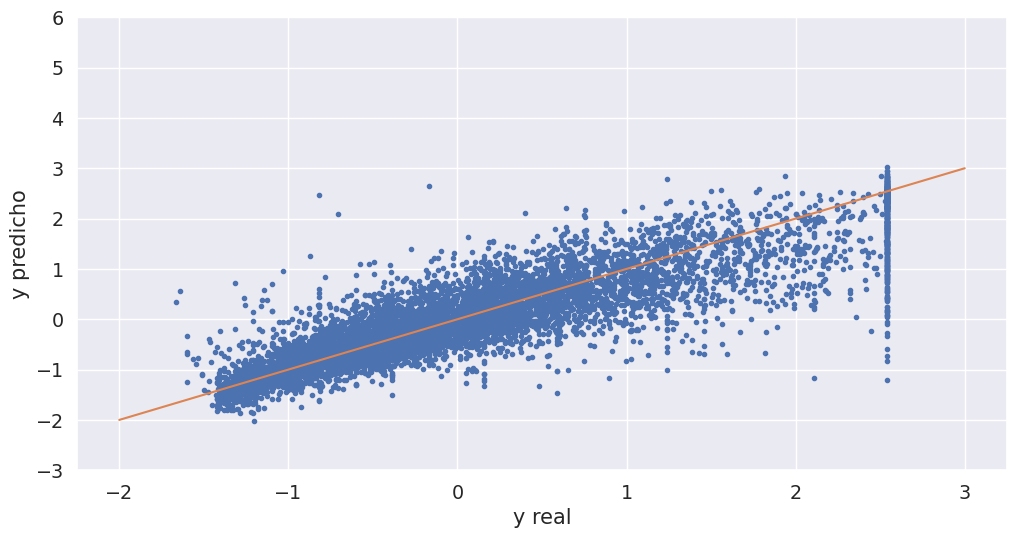

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

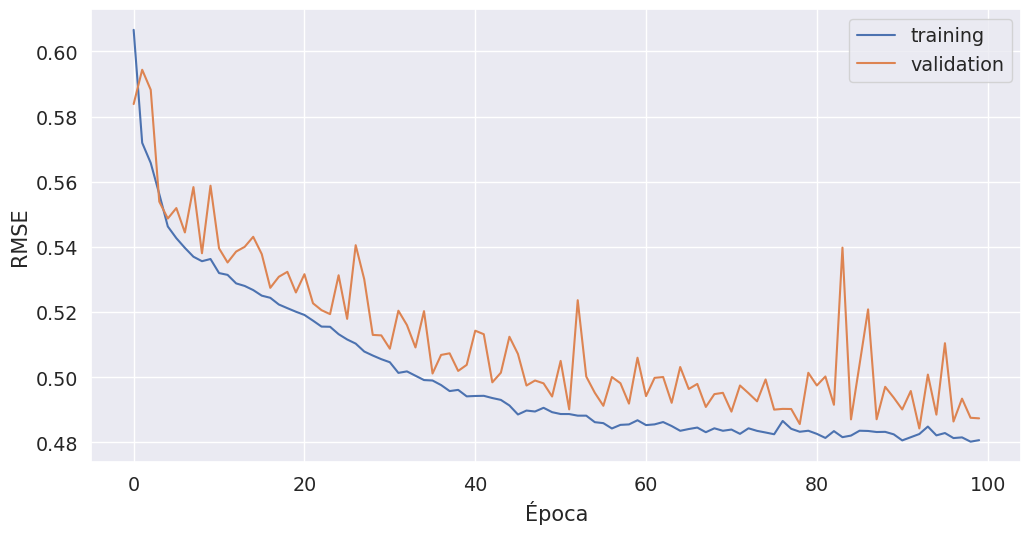

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 15s - loss: 1.7460

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.5360 

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.4516

 7136/12384 [================>.............] - ETA: 0s - loss: 0.4240

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.4001



11968/12384 [===========================>..] - ETA: 0s - loss: 0.3825

12384/12384 [==============================] - 0s 36us/step - loss: 0.3813 - val_loss: 0.3412


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2649

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.3641

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.3391

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.3218

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.3218

11488/12384 [==========================>...] - ETA: 0s - loss: 0.3220

12384/12384 [==============================] - 0s 32us/step - loss: 0.3222 - val_loss: 0.3229


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5811

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.3377

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.3234

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.3165

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.3148

11584/12384 [===========================>..] - ETA: 0s - loss: 0.3123

12384/12384 [==============================] - 0s 32us/step - loss: 0.3101 - val_loss: 0.3121


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1197

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.3116

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.3083

 7104/12384 [================>.............] - ETA: 0s - loss: 0.3079

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.3086

11840/12384 [===========================>..] - ETA: 0s - loss: 0.3067

12384/12384 [==============================] - 0s 31us/step - loss: 0.3037 - val_loss: 0.3106


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3773

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.3223

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.3014

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2944

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2946

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2963

12384/12384 [==============================] - 0s 33us/step - loss: 0.2976 - val_loss: 0.3149


Epoch 6/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5930

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2995

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2949

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2901

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2882

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2917

12384/12384 [==============================] - 0s 32us/step - loss: 0.2951 - val_loss: 0.3020


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3239

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2966

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.3001

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.3046

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2944

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2958

12384/12384 [==============================] - 0s 32us/step - loss: 0.2921 - val_loss: 0.2982


Epoch 8/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2518

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2671

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2927

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2884

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2886

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2860

12384/12384 [==============================] - 0s 32us/step - loss: 0.2890 - val_loss: 0.2988


Epoch 9/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2664

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2988

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2870

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2862

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2907

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2902

12384/12384 [==============================] - 0s 32us/step - loss: 0.2871 - val_loss: 0.3035


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1506

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.3287

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2982

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2930

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2872

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2839

12384/12384 [==============================] - 0s 32us/step - loss: 0.2858 - val_loss: 0.2918


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1513

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.3078

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2854

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2830

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2826

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2826

12384/12384 [==============================] - 0s 32us/step - loss: 0.2833 - val_loss: 0.2990


Epoch 12/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1968

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2839

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2824

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2915

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2862

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2812

12384/12384 [==============================] - 0s 32us/step - loss: 0.2809 - val_loss: 0.2896


Epoch 13/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2828

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2870

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2733

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2775

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2770

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2799

12384/12384 [==============================] - 0s 32us/step - loss: 0.2788 - val_loss: 0.2873


Epoch 14/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2250

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2865

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2834

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2782

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2767

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2782

12384/12384 [==============================] - 0s 32us/step - loss: 0.2753 - val_loss: 0.2880


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3522

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2728

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2797

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2790

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2760

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2744

12384/12384 [==============================] - 0s 32us/step - loss: 0.2722 - val_loss: 0.2817


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1723

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2584

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2588

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2666

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2678

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2712

12384/12384 [==============================] - 0s 32us/step - loss: 0.2706 - val_loss: 0.2803


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1900

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2786

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2795

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2723

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2650

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2669

12384/12384 [==============================] - 0s 32us/step - loss: 0.2678 - val_loss: 0.2718


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2539

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2614

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2674

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2661

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2645

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2635

12384/12384 [==============================] - 0s 32us/step - loss: 0.2647 - val_loss: 0.2730


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2130

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2713

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2573

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2565

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2582

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2584

12384/12384 [==============================] - 0s 32us/step - loss: 0.2623 - val_loss: 0.2685


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5023

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2523

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2624

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2568

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2651

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 32us/step - loss: 0.2603 - val_loss: 0.2855


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5953

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2449

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2653

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2585

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2575

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2601

12384/12384 [==============================] - 0s 31us/step - loss: 0.2591 - val_loss: 0.2631


Epoch 22/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2015

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2550

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2674

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2667

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2664

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2648

12384/12384 [==============================] - 0s 32us/step - loss: 0.2638 - val_loss: 0.2781


Epoch 23/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2727

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2383

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2519

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2664

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2629

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 32us/step - loss: 0.2577 - val_loss: 0.2674


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2590

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2585

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2534

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2536

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2572

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2564

12384/12384 [==============================] - 0s 32us/step - loss: 0.2555 - val_loss: 0.2610


Epoch 25/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2116

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2502

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2420

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2516

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2544

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2525

12384/12384 [==============================] - 0s 32us/step - loss: 0.2528 - val_loss: 0.2789


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0830

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2534

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2520

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2521

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2507

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2532

12384/12384 [==============================] - 0s 32us/step - loss: 0.2530 - val_loss: 0.2635


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5269

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2724

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2460

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2474

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2525

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2530

12384/12384 [==============================] - 0s 31us/step - loss: 0.2519 - val_loss: 0.2665


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1913

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2541

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2515

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2476

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 32us/step - loss: 0.2509 - val_loss: 0.2657


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4514

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2674

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2531

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2523

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2534

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2492

12384/12384 [==============================] - 0s 32us/step - loss: 0.2514 - val_loss: 0.2618


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2024

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2605

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2522

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2482

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2462

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2485

12384/12384 [==============================] - 0s 31us/step - loss: 0.2499 - val_loss: 0.2650


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2544

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2638

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2565

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2442

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2507

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2526

12384/12384 [==============================] - 0s 32us/step - loss: 0.2514 - val_loss: 0.2627


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1092

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2440

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2503

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2487

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2576

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 32us/step - loss: 0.2498 - val_loss: 0.2596


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3930

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2411

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2448

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2470

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 32us/step - loss: 0.2483 - val_loss: 0.2663


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2761

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2373

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2498

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2504

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2591

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 32us/step - loss: 0.2556 - val_loss: 0.2625


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2190

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2567

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2578

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2544

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2553

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2496

12384/12384 [==============================] - 0s 32us/step - loss: 0.2501 - val_loss: 0.2571


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2019

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2513

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2443

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2455

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2512

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 32us/step - loss: 0.2489 - val_loss: 0.2555


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3013

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2599

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2480

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2524

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2495

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 32us/step - loss: 0.2476 - val_loss: 0.2731


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2059

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2747

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2573

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2509

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2507

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 32us/step - loss: 0.2483 - val_loss: 0.2607


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3160

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2528

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2354

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2423

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2454

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 32us/step - loss: 0.2458 - val_loss: 0.2558


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2315

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2392

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2386

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2384

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2433

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 32us/step - loss: 0.2468 - val_loss: 0.2617


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2661

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2507

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2488

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2455

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2481

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 31us/step - loss: 0.2477 - val_loss: 0.2593


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2648

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2365

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2447

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2463

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2478

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 32us/step - loss: 0.2457 - val_loss: 0.2634


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1213

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2551

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2494

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2499

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2539

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 32us/step - loss: 0.2482 - val_loss: 0.2654


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1955

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2375

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2400

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2393

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 32us/step - loss: 0.2470 - val_loss: 0.2690


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3071

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2217

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2493

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2465

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2460

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 32us/step - loss: 0.2470 - val_loss: 0.2667


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1720

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2444

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2474

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2472

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2456

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 32us/step - loss: 0.2462 - val_loss: 0.2568


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3568

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2314

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2536

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2516

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2511

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 31us/step - loss: 0.2459 - val_loss: 0.2539


Epoch 48/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2938

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2293

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2488

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2452

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2444

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 31us/step - loss: 0.2454 - val_loss: 0.2534


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3005

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2562

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2442

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2436

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2464

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 32us/step - loss: 0.2457 - val_loss: 0.2578


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2402

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2393

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2387

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2442

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2415

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 32us/step - loss: 0.2454 - val_loss: 0.2562


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3486



 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2401

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2431

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2440

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2405

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 32us/step - loss: 0.2452 - val_loss: 0.2536


Epoch 52/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1622

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2362

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2397

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2441

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2421

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 32us/step - loss: 0.2429 - val_loss: 0.2552


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3451

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2365

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2396

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2457

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2448

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 32us/step - loss: 0.2439 - val_loss: 0.2515


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1402

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2365

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2446

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2455

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 32us/step - loss: 0.2428 - val_loss: 0.2557


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2938

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2347

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2432

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2486

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 31us/step - loss: 0.2429 - val_loss: 0.2517


Epoch 56/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1929

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2283

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2361

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2422

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2459

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 32us/step - loss: 0.2421 - val_loss: 0.2541


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1307

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2568

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2476

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2451

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2457

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 31us/step - loss: 0.2427 - val_loss: 0.2661


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1095

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2525

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2522

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2421



11488/12384 [==========================>...] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 32us/step - loss: 0.2417 - val_loss: 0.2595


Epoch 59/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1264

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2360

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2403

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2393

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2397

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 31us/step - loss: 0.2415 - val_loss: 0.2534


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4356

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2254

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2359

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2398

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2441

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 32us/step - loss: 0.2406 - val_loss: 0.2541


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1613

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2380

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2263

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2314

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2402

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 31us/step - loss: 0.2411 - val_loss: 0.2555


Epoch 62/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1736

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2364

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2369

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2398

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2392

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 32us/step - loss: 0.2419 - val_loss: 0.2573


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1111

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2524

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2461

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2427

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2392

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 32us/step - loss: 0.2420 - val_loss: 0.2531


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3395

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2480

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2383

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2362

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2410

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 32us/step - loss: 0.2405 - val_loss: 0.2505


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1002

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2280

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2349

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2285

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2338

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 32us/step - loss: 0.2407 - val_loss: 0.2530


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3383

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2147

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2384

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2401

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2405

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 31us/step - loss: 0.2415 - val_loss: 0.2700


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2776

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2399

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2370

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2414

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 32us/step - loss: 0.2412 - val_loss: 0.2531


Epoch 68/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1766

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2314

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2316

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2356

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 31us/step - loss: 0.2408 - val_loss: 0.2480


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1899

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2256

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2310

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2327



11776/12384 [===========================>..] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 31us/step - loss: 0.2386 - val_loss: 0.2571


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1451

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2417

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2498

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2513

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2479

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 32us/step - loss: 0.2383 - val_loss: 0.2556


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1888

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2672

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2550

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2502

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2467

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 32us/step - loss: 0.2480 - val_loss: 0.2510


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1403

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2317

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2373

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2433



11808/12384 [===========================>..] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 31us/step - loss: 0.2413 - val_loss: 0.2531


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1990

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2538

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2525

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2471

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2443

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 31us/step - loss: 0.2416 - val_loss: 0.2496


Epoch 74/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1626

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2469

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2436

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2430

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 31us/step - loss: 0.2414 - val_loss: 0.2586


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2999

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2389

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2440

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2378

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2399

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 31us/step - loss: 0.2399 - val_loss: 0.2500


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4363

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2311

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2364

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2379

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2395



11616/12384 [===========================>..] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 32us/step - loss: 0.2421 - val_loss: 0.2738


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1649

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2500

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2524

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2437

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2468

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 32us/step - loss: 0.2432 - val_loss: 0.2512


Epoch 78/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1814

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2381

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2361

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2396

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 32us/step - loss: 0.2383 - val_loss: 0.3030


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2618

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2358

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2401

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2450

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 32us/step - loss: 0.2392 - val_loss: 0.2542


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3305

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2305

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2428

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2448

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 32us/step - loss: 0.2393 - val_loss: 0.2500


Epoch 81/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2109

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2325

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2286

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2354

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2360

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 32us/step - loss: 0.2380 - val_loss: 0.2543


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1341

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2164

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2291

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2319

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2376

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 33us/step - loss: 0.2373 - val_loss: 0.2518


Epoch 83/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1784

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2496

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2392

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2403

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2395

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 32us/step - loss: 0.2377 - val_loss: 0.2515


Epoch 84/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4030

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2468

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2393

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2410

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2396

12384/12384 [==============================] - 0s 32us/step - loss: 0.2385 - val_loss: 0.2495


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2210

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2549

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2460

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2389

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2383

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 31us/step - loss: 0.2375 - val_loss: 0.2482


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2244

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2434

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2316

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2372

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2369

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 32us/step - loss: 0.2383 - val_loss: 0.2509


Epoch 87/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3380

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2324

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2365

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2414

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2387

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 31us/step - loss: 0.2376 - val_loss: 0.2454


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2145

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2283

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2318

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2365

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2383

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 32us/step - loss: 0.2363 - val_loss: 0.2519


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2124

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2421

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2412

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2399

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2362

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 32us/step - loss: 0.2366 - val_loss: 0.2533


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2910

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2198

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2338

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2374

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2341

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 33us/step - loss: 0.2361 - val_loss: 0.2566


Epoch 91/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2964

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2589

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2451

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2499

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2421

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 32us/step - loss: 0.2371 - val_loss: 0.2467


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2012

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2435

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2369

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 32us/step - loss: 0.2409 - val_loss: 0.2652


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2761

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2491

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2432

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2452

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2385

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 32us/step - loss: 0.2409 - val_loss: 0.2510


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1643

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2287

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2351

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2370

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2362

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 31us/step - loss: 0.2384 - val_loss: 0.2464


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1464

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2304

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2327

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2364

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2382

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 31us/step - loss: 0.2384 - val_loss: 0.2696


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2435

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2261

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2346

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2354

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2328

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 32us/step - loss: 0.2367 - val_loss: 0.2473


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1206

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2430

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2366

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2407

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2382

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 31us/step - loss: 0.2362 - val_loss: 0.2544


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1876

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2493

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2443

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2411

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2398

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 31us/step - loss: 0.2373 - val_loss: 0.2483


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1642

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2391

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2351

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2379

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2389

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 32us/step - loss: 0.2412 - val_loss: 0.2477


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2343

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2132

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2210

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2280

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2331

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 32us/step - loss: 0.2379 - val_loss: 0.2492


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1689

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2621

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2522

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2458

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2397

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 31us/step - loss: 0.2354 - val_loss: 0.2612


Epoch 102/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3779

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2395

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2459

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2406

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2427



11552/12384 [==========================>...] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 32us/step - loss: 0.2354 - val_loss: 0.2510


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3302

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2229

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2266

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2366

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2337

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 32us/step - loss: 0.2371 - val_loss: 0.2493


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1544

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2066

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2186

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2351

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2378

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 32us/step - loss: 0.2367 - val_loss: 0.2543


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5871

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2462

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2482

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2452

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 32us/step - loss: 0.2360 - val_loss: 0.2563


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2781

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2420

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2384

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2387

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2375

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 31us/step - loss: 0.2359 - val_loss: 0.2463


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2172

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2308

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2384

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2371

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 31us/step - loss: 0.2366 - val_loss: 0.2462


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3807

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2299

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2322

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2342

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2342

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 31us/step - loss: 0.2357 - val_loss: 0.2502


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1812

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2324

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2337

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2333

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 32us/step - loss: 0.2372 - val_loss: 0.2486


Epoch 110/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1477

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2317

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2326

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2320

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2367

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 32us/step - loss: 0.2362 - val_loss: 0.2473


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1062

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2348

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2443

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2380

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2402

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 32us/step - loss: 0.2368 - val_loss: 0.2507


Epoch 112/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2304

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2152

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2241

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2368

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2369

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 33us/step - loss: 0.2372 - val_loss: 0.2510


Epoch 113/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1380

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2261

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2422

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2407

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2399

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 32us/step - loss: 0.2357 - val_loss: 0.2443


Epoch 114/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1679

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2238

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2335

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2357

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2414

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 32us/step - loss: 0.2345 - val_loss: 0.2518


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0786

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2288

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2302

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2337

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2368

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 32us/step - loss: 0.2346 - val_loss: 0.2640


Epoch 116/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2010

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2340

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2263

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2371

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2329

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 32us/step - loss: 0.2338 - val_loss: 0.2454


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4358

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2429

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2374

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2378

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 32us/step - loss: 0.2352 - val_loss: 0.2449


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1765

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2346

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2324

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2340

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 32us/step - loss: 0.2364 - val_loss: 0.2475


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1507

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2298

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2301

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2331

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 32us/step - loss: 0.2345 - val_loss: 0.2490


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2822

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2338

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2310

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2335

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2355

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 31us/step - loss: 0.2356 - val_loss: 0.2495


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1325

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2413

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2341

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2372

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 32us/step - loss: 0.2349 - val_loss: 0.2469


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2098

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2332

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2341

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2318

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2310

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 32us/step - loss: 0.2343 - val_loss: 0.2449


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2578

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2292

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2247

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2299

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2355

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 33us/step - loss: 0.2332 - val_loss: 0.2523


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1779

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2362

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2300

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2374

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 32us/step - loss: 0.2375 - val_loss: 0.2486


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1423

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2611

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2393

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2380

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2361

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 31us/step - loss: 0.2347 - val_loss: 0.2448


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1194

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2366

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2292

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2325

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2377

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 31us/step - loss: 0.2349 - val_loss: 0.2472


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1309

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2248

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2237

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2270

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2321

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 31us/step - loss: 0.2338 - val_loss: 0.2444


Epoch 128/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0900

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2320

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2322

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2341

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 32us/step - loss: 0.2347 - val_loss: 0.2454


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2274

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2415

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2376

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2480

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2382

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 32us/step - loss: 0.2341 - val_loss: 0.2510


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1057

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2233

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2176

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2315

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2323

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 31us/step - loss: 0.2349 - val_loss: 0.2464


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1281

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2177

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2324

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2339

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2316

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 31us/step - loss: 0.2326 - val_loss: 0.2514


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1508

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2068

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2196

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2301

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2386

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 32us/step - loss: 0.2339 - val_loss: 0.2485


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1705

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2398

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2294

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2339

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2344



11584/12384 [===========================>..] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 32us/step - loss: 0.2368 - val_loss: 0.2621


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1864

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2390

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2364

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2363

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 32us/step - loss: 0.2363 - val_loss: 0.2481


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3453

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2316

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2223

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2315

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2365



11712/12384 [===========================>..] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 32us/step - loss: 0.2333 - val_loss: 0.2461


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2295

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2375

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2339

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2332

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 32us/step - loss: 0.2332 - val_loss: 0.2452


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1445

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2288

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2326

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2357

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2337

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 31us/step - loss: 0.2332 - val_loss: 0.2482


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1781

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2365

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2460

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2377

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2369

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 31us/step - loss: 0.2343 - val_loss: 0.2523


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2544

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2104

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2297

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2355

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2318

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 31us/step - loss: 0.2346 - val_loss: 0.2547


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1765

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2507

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2425

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2405

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2371

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 31us/step - loss: 0.2337 - val_loss: 0.2544


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1859

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2401

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2392

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2371

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2353

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 32us/step - loss: 0.2355 - val_loss: 0.2627


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3804

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2351

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2422

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2400

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2398

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 33us/step - loss: 0.2341 - val_loss: 0.2532


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1406

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2409

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2420

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2396

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2386

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 32us/step - loss: 0.2368 - val_loss: 0.2516


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1290

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2138

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2209

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2327

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2332

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 32us/step - loss: 0.2338 - val_loss: 0.2445


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2374

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2395

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2345

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2372



11776/12384 [===========================>..] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 31us/step - loss: 0.2338 - val_loss: 0.2465


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1722

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2104

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2180

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2173

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2251

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 31us/step - loss: 0.2331 - val_loss: 0.2479


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1698

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2473

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2391

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2443

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2368

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 32us/step - loss: 0.2340 - val_loss: 0.2437


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3327

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2302

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2339

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2402

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2353

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 32us/step - loss: 0.2333 - val_loss: 0.2456


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1848

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2369

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2240

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2278

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 31us/step - loss: 0.2339 - val_loss: 0.2495


Epoch 150/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1308

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2491

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2411

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2354

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2373

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 32us/step - loss: 0.2327 - val_loss: 0.2485


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2576

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2224

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2252

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2314

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2375

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 31us/step - loss: 0.2364 - val_loss: 0.2453


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2162

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2191

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2326

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2305

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 32us/step - loss: 0.2344 - val_loss: 0.2487


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3298

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2393

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2331

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2319

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2348

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 32us/step - loss: 0.2338 - val_loss: 0.2625


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1910

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2458

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2410

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2362

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2319

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 32us/step - loss: 0.2340 - val_loss: 0.2508


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3464

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2303

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2438

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2331

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2352

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 32us/step - loss: 0.2332 - val_loss: 0.2694


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2031

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2276

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2341

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2311

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2351

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 32us/step - loss: 0.2377 - val_loss: 0.2472


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0988

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2384

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2381

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2366

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2359

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 32us/step - loss: 0.2342 - val_loss: 0.2483


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2964

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2253

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2324

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2358

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2376

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 32us/step - loss: 0.2335 - val_loss: 0.2488


Epoch 159/200


   32/12384 [..............................] - ETA: 0s - loss: 0.3952



 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2288

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2184

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2415

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2353

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 31us/step - loss: 0.2328 - val_loss: 0.2499


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3066

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2266

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2396

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2415

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2367

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 31us/step - loss: 0.2334 - val_loss: 0.2447


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2928

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2148

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2254

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2297

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2338

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 32us/step - loss: 0.2342 - val_loss: 0.2442


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3148

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2464

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2478

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2382

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2387

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 31us/step - loss: 0.2337 - val_loss: 0.2433


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2906

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2187

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2233

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2302

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2314



11968/12384 [===========================>..] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 31us/step - loss: 0.2328 - val_loss: 0.2473


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1248

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2680

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2526

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2451

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2400

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 32us/step - loss: 0.2339 - val_loss: 0.2538


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2500

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2470

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2400

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2355

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 32us/step - loss: 0.2325 - val_loss: 0.2518


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3053

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2460

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2346

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2359

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2351



10784/12384 [=========================>....] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 33us/step - loss: 0.2327 - val_loss: 0.2477


Epoch 167/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1980

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2532

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2391

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2306

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2313

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 31us/step - loss: 0.2334 - val_loss: 0.2607


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2393

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2375

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2340

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2338

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 31us/step - loss: 0.2342 - val_loss: 0.2425


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2762

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.1919

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2079

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2241

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2267

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 31us/step - loss: 0.2327 - val_loss: 0.2437


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2309

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2371

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2326

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2356

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 33us/step - loss: 0.2333 - val_loss: 0.2487


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3638

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2358

 4736/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 7136/12384 [================>.............] - ETA: 0s - loss: 0.2293

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2318

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 31us/step - loss: 0.2331 - val_loss: 0.2488


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3113

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2296

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2295



11392/12384 [==========================>...] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 32us/step - loss: 0.2331 - val_loss: 0.2504


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1216

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2452

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2383

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2358



11584/12384 [===========================>..] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 32us/step - loss: 0.2348 - val_loss: 0.2483


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2101

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2425

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2314

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2328

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2284



11392/12384 [==========================>...] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 32us/step - loss: 0.2325 - val_loss: 0.2457


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0686

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2364

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2396

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2371

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2374

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 31us/step - loss: 0.2332 - val_loss: 0.2440


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3297

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2269

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2288

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2336

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 31us/step - loss: 0.2318 - val_loss: 0.2446


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3171

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2181

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2338

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2356

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2324



12384/12384 [==============================] - 0s 33us/step - loss: 0.2346 - val_loss: 0.2483


Epoch 178/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1520

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2418

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2386

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2389

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2365

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 32us/step - loss: 0.2343 - val_loss: 0.2468


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0537

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2192

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2295

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2272

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2320

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 32us/step - loss: 0.2330 - val_loss: 0.2500


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2549

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2173

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2252

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2227

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2293

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 31us/step - loss: 0.2333 - val_loss: 0.2444


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4083

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2473

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2464

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2425

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2370

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 31us/step - loss: 0.2332 - val_loss: 0.2456


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1205

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2261

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2369

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2346

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2323

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 31us/step - loss: 0.2330 - val_loss: 0.2455


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1149

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2512

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2453

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2393

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2364

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 33us/step - loss: 0.2346 - val_loss: 0.2477


Epoch 184/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2045

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2381

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2313

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2288

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2334

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 32us/step - loss: 0.2343 - val_loss: 0.2454


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2143

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2345

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2292

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2340

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2330

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 32us/step - loss: 0.2335 - val_loss: 0.2458


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1037

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2177

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2233

 7072/12384 [================>.............] - ETA: 0s - loss: 0.2320

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2335

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 32us/step - loss: 0.2347 - val_loss: 0.2554


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2947

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2430

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2338

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2332

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 32us/step - loss: 0.2338 - val_loss: 0.2444


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1814

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2092

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2239

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2278

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2269

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 32us/step - loss: 0.2326 - val_loss: 0.2466


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1460

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2301

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2263

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2348

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2346

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 32us/step - loss: 0.2325 - val_loss: 0.2441


Epoch 190/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1463

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2360

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2368

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2329

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 32us/step - loss: 0.2339 - val_loss: 0.2463


Epoch 191/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2305

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2392

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2369

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2328

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2319

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 31us/step - loss: 0.2327 - val_loss: 0.2491


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2537

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2335

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2334

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2342

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 32us/step - loss: 0.2330 - val_loss: 0.2477


Epoch 193/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3131

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2376

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2349

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2337

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 32us/step - loss: 0.2315 - val_loss: 0.2429


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1187

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2339

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2358

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2317

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2303



11584/12384 [===========================>..] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 32us/step - loss: 0.2337 - val_loss: 0.2455


Epoch 195/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1548

 2432/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4800/12384 [==========>...................] - ETA: 0s - loss: 0.2323

 7168/12384 [================>.............] - ETA: 0s - loss: 0.2323

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2342

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 31us/step - loss: 0.2351 - val_loss: 0.2514


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3946

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2160

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2281

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2321

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2373

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 31us/step - loss: 0.2367 - val_loss: 0.2446


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1890

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2182

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2218

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2299

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2276

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 31us/step - loss: 0.2317 - val_loss: 0.2506


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2385

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2253

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2280

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2315

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2327

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 32us/step - loss: 0.2330 - val_loss: 0.2456


Epoch 199/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1367

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2303

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2330

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2341

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 31us/step - loss: 0.2354 - val_loss: 0.2461


Epoch 200/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1105

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2235

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2296

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2257

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2314

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 32us/step - loss: 0.2325 - val_loss: 0.2424


Text(0.5, 0, 'Época')

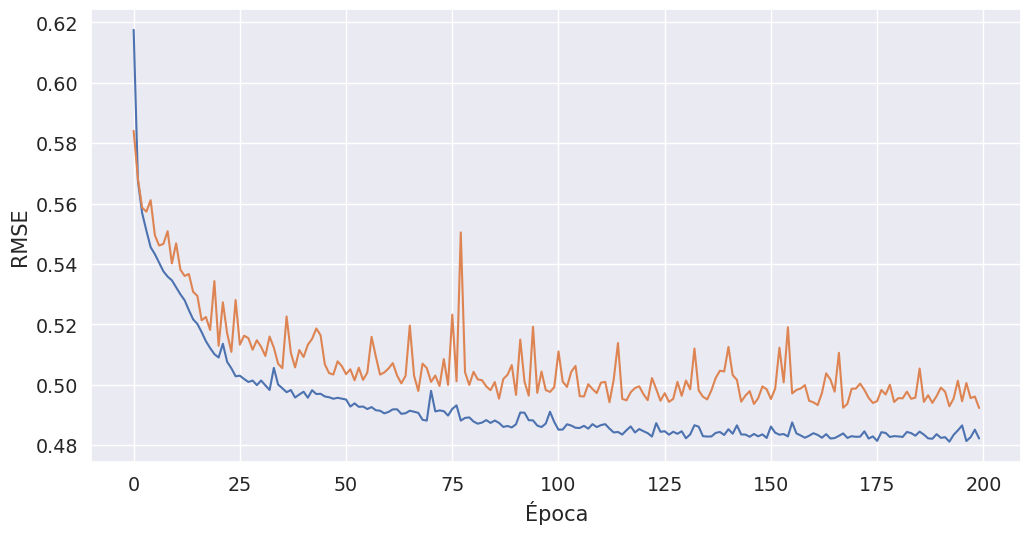

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 25s - loss: 0.7944

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.6389 

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.5846

 6080/12384 [=============>................] - ETA: 0s - loss: 0.5300

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.5048

10016/12384 [=======================>......] - ETA: 0s - loss: 0.4961

12064/12384 [============================>.] - ETA: 0s - loss: 0.4823

12384/12384 [==============================] - 1s 43us/step - loss: 0.4781 - val_loss: 0.4000


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2710

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.3781

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.3859

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.3854

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.3726

10048/12384 [=======================>......] - ETA: 0s - loss: 0.3678

12032/12384 [============================>.] - ETA: 0s - loss: 0.3652

12384/12384 [==============================] - 0s 36us/step - loss: 0.3627 - val_loss: 0.3603


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3878

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.3222

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.3320

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.3387

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.3415

10432/12384 [========================>.....] - ETA: 0s - loss: 0.3406

12384/12384 [==============================] - 0s 34us/step - loss: 0.3386 - val_loss: 0.3433


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3893

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3536

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.3266

 6048/12384 [=============>................] - ETA: 0s - loss: 0.3190

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.3204

10112/12384 [=======================>......] - ETA: 0s - loss: 0.3258

11872/12384 [===========================>..] - ETA: 0s - loss: 0.3237

12384/12384 [==============================] - 0s 36us/step - loss: 0.3258 - val_loss: 0.3368


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2380

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3048

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2957

 5824/12384 [=============>................] - ETA: 0s - loss: 0.3081

 7840/12384 [=================>............] - ETA: 0s - loss: 0.3150

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.3147

11872/12384 [===========================>..] - ETA: 0s - loss: 0.3193

12384/12384 [==============================] - 0s 36us/step - loss: 0.3179 - val_loss: 0.3296


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1398

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3093

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.3240

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.3213

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.3154

10496/12384 [========================>.....] - ETA: 0s - loss: 0.3125

12384/12384 [==============================] - 0s 34us/step - loss: 0.3122 - val_loss: 0.3220


Epoch 7/200
   32/12384 [..............................] - ETA: 1s - loss: 0.6523

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3414

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.3330

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.3192

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.3152



10112/12384 [=======================>......] - ETA: 0s - loss: 0.3072

12160/12384 [============================>.] - ETA: 0s - loss: 0.3068

12384/12384 [==============================] - 0s 35us/step - loss: 0.3073 - val_loss: 0.3195


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2910

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2970

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2989

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.3027

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.3081

10464/12384 [========================>.....] - ETA: 0s - loss: 0.3081

12384/12384 [==============================] - 0s 34us/step - loss: 0.3040 - val_loss: 0.3144


Epoch 9/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2850

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2982

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2959

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2952

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2935

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2956

12064/12384 [============================>.] - ETA: 0s - loss: 0.3008

12384/12384 [==============================] - 0s 35us/step - loss: 0.3004 - val_loss: 0.3111


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2198

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.3144

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.3015

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2929

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2952

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2990

12384/12384 [==============================] - 0s 34us/step - loss: 0.2973 - val_loss: 0.3090


Epoch 11/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2572

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2744

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2966

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2996

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2934



10432/12384 [========================>.....] - ETA: 0s - loss: 0.2936

12384/12384 [==============================] - 0s 34us/step - loss: 0.2946 - val_loss: 0.3058


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2116

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.3118

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.3016

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2882

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2919

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2892

12384/12384 [==============================] - 0s 34us/step - loss: 0.2917 - val_loss: 0.3047


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2649

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2840

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2742

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2666

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2785

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2818

12384/12384 [==============================] - 0s 34us/step - loss: 0.2893 - val_loss: 0.3043


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1413

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2909

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2935

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2930

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2932

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2876

12384/12384 [==============================] - 0s 34us/step - loss: 0.2877 - val_loss: 0.3003


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1608

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.3042

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2906

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2876

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2830

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2853

12384/12384 [==============================] - 0s 34us/step - loss: 0.2851 - val_loss: 0.2978


Epoch 16/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2654

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2712

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2867

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2847

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2892

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2821

12192/12384 [============================>.] - ETA: 0s - loss: 0.2830

12384/12384 [==============================] - 0s 35us/step - loss: 0.2835 - val_loss: 0.2964


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5353

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2954

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2755

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2727

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2703

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2763

12384/12384 [==============================] - 0s 34us/step - loss: 0.2813 - val_loss: 0.2958


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5023

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2816

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2739

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2731

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2754

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2740

12384/12384 [==============================] - 0s 34us/step - loss: 0.2796 - val_loss: 0.2942


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2622

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2761

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2764

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2787

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2751

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2754

12384/12384 [==============================] - 0s 34us/step - loss: 0.2780 - val_loss: 0.2915


Epoch 20/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1558

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2936

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2867

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2893

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2810

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2769

12384/12384 [==============================] - 0s 34us/step - loss: 0.2763 - val_loss: 0.2908


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2870

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2651

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2622

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2742

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2734

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2757

12384/12384 [==============================] - 0s 34us/step - loss: 0.2752 - val_loss: 0.2903


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3405

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2713

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2753

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2805

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2804

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2790

12256/12384 [============================>.] - ETA: 0s - loss: 0.2738

12384/12384 [==============================] - 0s 35us/step - loss: 0.2737 - val_loss: 0.2876


Epoch 23/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2826

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2782

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2844

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2800

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2745

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2717

12064/12384 [============================>.] - ETA: 0s - loss: 0.2728

12384/12384 [==============================] - 0s 35us/step - loss: 0.2720 - val_loss: 0.2871


Epoch 24/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2483

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2579

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2576

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2715

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2742

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2725

12384/12384 [==============================] - 0s 34us/step - loss: 0.2708 - val_loss: 0.2856


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1395

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2605

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2612

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2651

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2640

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2687

12384/12384 [==============================] - 0s 34us/step - loss: 0.2697 - val_loss: 0.2846


Epoch 26/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1674

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2556

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2540

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2590

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2576

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2623

12384/12384 [==============================] - 0s 34us/step - loss: 0.2680 - val_loss: 0.2835


Epoch 27/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2135

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2508

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2690

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2666

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2665

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2676

12352/12384 [============================>.] - ETA: 0s - loss: 0.2673

12384/12384 [==============================] - 0s 35us/step - loss: 0.2671 - val_loss: 0.2818


Epoch 28/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3607

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2593

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2622

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2681

 7232/12384 [================>.............] - ETA: 0s - loss: 0.2728

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2715

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2674

12384/12384 [==============================] - 0s 38us/step - loss: 0.2655 - val_loss: 0.2815


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2599

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2976

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2823

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2672

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2718

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2676

12224/12384 [============================>.] - ETA: 0s - loss: 0.2651

12384/12384 [==============================] - 0s 35us/step - loss: 0.2647 - val_loss: 0.2808


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3325

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2665

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2673

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2664

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2655

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2641

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2619

12384/12384 [==============================] - 0s 37us/step - loss: 0.2635 - val_loss: 0.2777


Epoch 31/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2335

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2855

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2699

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2619

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2584

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2596

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2615

12384/12384 [==============================] - 0s 36us/step - loss: 0.2618 - val_loss: 0.2769


Epoch 32/200
   32/12384 [..............................] - ETA: 2s - loss: 0.3962

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2795

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2666

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2671

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2619

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2630

12384/12384 [==============================] - 0s 40us/step - loss: 0.2607 - val_loss: 0.2762


Epoch 33/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4169

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2533

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2500

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2597

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2582

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 33us/step - loss: 0.2595 - val_loss: 0.2729


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2303

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2589

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2568

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2522

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2565

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 34us/step - loss: 0.2581 - val_loss: 0.2724


Epoch 35/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3394

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2583

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2531

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2507

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 0s 34us/step - loss: 0.2565 - val_loss: 0.2723


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4882

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2723

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2615

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2643

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2617

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 34us/step - loss: 0.2559 - val_loss: 0.2723


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1656

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2604

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2481

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2612

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2556

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 34us/step - loss: 0.2542 - val_loss: 0.2680


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5722

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2510

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2507

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2516

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 33us/step - loss: 0.2530 - val_loss: 0.2666


Epoch 39/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2704

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2234

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2398

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2459

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2452

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2512

12384/12384 [==============================] - 0s 33us/step - loss: 0.2521 - val_loss: 0.2653


Epoch 40/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1579

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2319

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2374

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2425

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2447

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2497

12384/12384 [==============================] - 0s 34us/step - loss: 0.2507 - val_loss: 0.2665


Epoch 41/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2243

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2406

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2541

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2517

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2491

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 33us/step - loss: 0.2497 - val_loss: 0.2622


Epoch 42/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2324

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2439

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2512

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2499

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2510

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 33us/step - loss: 0.2481 - val_loss: 0.2616


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1174

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2519

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2466

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2482

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2520

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2517

12384/12384 [==============================] - 0s 33us/step - loss: 0.2469 - val_loss: 0.2644


Epoch 44/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2377

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2327

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2409

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2525

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2486



10720/12384 [========================>.....] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 0s 34us/step - loss: 0.2460 - val_loss: 0.2590


Epoch 45/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2174

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2442

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2434

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2392

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 34us/step - loss: 0.2455 - val_loss: 0.2594


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1997

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2227

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2302

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2408

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2456

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 34us/step - loss: 0.2443 - val_loss: 0.2578


Epoch 47/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2270

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2533

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2443

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2407

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2432

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 33us/step - loss: 0.2431 - val_loss: 0.2576


Epoch 48/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5480

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2575

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2525

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2480

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2477

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 34us/step - loss: 0.2423 - val_loss: 0.2554


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1470

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2519

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2432

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2395

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2394

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 33us/step - loss: 0.2419 - val_loss: 0.2545


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2625

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2523

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2469

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2406

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2441

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 33us/step - loss: 0.2409 - val_loss: 0.2539


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3693

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2252

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2359

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2424

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2406

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 33us/step - loss: 0.2406 - val_loss: 0.2530


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1221

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2189

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2332

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2387

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2423

12384/12384 [==============================] - 0s 34us/step - loss: 0.2395 - val_loss: 0.2533


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2131

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2166

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2365

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2341

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 33us/step - loss: 0.2395 - val_loss: 0.2534


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1450

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2278

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2494

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2386

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2386

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 33us/step - loss: 0.2387 - val_loss: 0.2513


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2777

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2158

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2241

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2286

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2377

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 35us/step - loss: 0.2379 - val_loss: 0.2540


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5067

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2350

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2261

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2312

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2410

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 33us/step - loss: 0.2378 - val_loss: 0.2512


Epoch 57/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3532

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2304

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2352

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2442

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2440

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 34us/step - loss: 0.2369 - val_loss: 0.2501


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2771

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2212

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2310

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2289

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2285

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 34us/step - loss: 0.2362 - val_loss: 0.2501


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2211

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2163

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2260

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2298

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2383

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 35us/step - loss: 0.2360 - val_loss: 0.2489


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2519

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2392

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2316

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2282

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2307

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 34us/step - loss: 0.2357 - val_loss: 0.2489


Epoch 61/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2488

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2344

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2335

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2361

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2339

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 34us/step - loss: 0.2352 - val_loss: 0.2474


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2424

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2405

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2381

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2476


Epoch 63/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1585

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2218

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2351

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2305

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2320

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2469


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3410

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2406

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2401

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2342

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 34us/step - loss: 0.2342 - val_loss: 0.2467


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1619

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2273

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2356

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2361

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2360

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 34us/step - loss: 0.2342 - val_loss: 0.2466


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3788

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2450

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2441

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2349

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 34us/step - loss: 0.2339 - val_loss: 0.2466


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2308

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2353

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2237

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2312

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2315

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 34us/step - loss: 0.2334 - val_loss: 0.2476


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1856

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2358

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2427

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2393



 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2406

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 34us/step - loss: 0.2333 - val_loss: 0.2460


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5602

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2465

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2499

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2448

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2393

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 34us/step - loss: 0.2329 - val_loss: 0.2463


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1398

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2498

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2515

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2388

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2341

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 33us/step - loss: 0.2329 - val_loss: 0.2448


Epoch 71/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2315

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2318

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2321

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2329

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2326

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 34us/step - loss: 0.2329 - val_loss: 0.2453


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2759

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2312

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2271

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2249

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2294

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 34us/step - loss: 0.2324 - val_loss: 0.2460


Epoch 73/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1864

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2343

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2347

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2328

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 34us/step - loss: 0.2323 - val_loss: 0.2446


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1809

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2225

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2347

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2332

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 34us/step - loss: 0.2324 - val_loss: 0.2445


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1917

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2275

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2274

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2309

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2454


Epoch 76/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3943

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2332

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2372

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2349

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2324

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2444


Epoch 77/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2953

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2265

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2317

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2323

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2356

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2456


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2592

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2328

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2253

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2283

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2328

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2439


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2072

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2209

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2326

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2340

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2365

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 33us/step - loss: 0.2312 - val_loss: 0.2463


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2219

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2429

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2356

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2303

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2269

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2449


Epoch 81/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4088

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2504

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2318

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2315

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 34us/step - loss: 0.2308 - val_loss: 0.2440


Epoch 82/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1370

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2072

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2200

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2203

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2222

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2439


Epoch 83/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0772

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2353

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2266

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2299

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2287



12000/12384 [============================>.] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 36us/step - loss: 0.2308 - val_loss: 0.2431


Epoch 84/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3703

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2006

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2204

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2249

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2235

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2265

12128/12384 [============================>.] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 35us/step - loss: 0.2306 - val_loss: 0.2445


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2402

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2181

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2288

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2285

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 34us/step - loss: 0.2307 - val_loss: 0.2440


Epoch 86/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1652

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2404

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2392

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2297

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2306

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2320

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 36us/step - loss: 0.2302 - val_loss: 0.2426


Epoch 87/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2471

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2087

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2304

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2310

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2319

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 34us/step - loss: 0.2304 - val_loss: 0.2427


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3039

 1696/12384 [===>..........................] - ETA: 0s - loss: 0.2458

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2338

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2348

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2318

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2303

11744/12384 [===========================>..] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 36us/step - loss: 0.2304 - val_loss: 0.2439


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1925

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2190

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2238

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2228

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2274

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 33us/step - loss: 0.2302 - val_loss: 0.2437


Epoch 90/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1994

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2229

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2228

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2187

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2213

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 33us/step - loss: 0.2303 - val_loss: 0.2431


Epoch 91/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2162

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2292

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2151

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2079

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2164

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 32us/step - loss: 0.2300 - val_loss: 0.2446


Epoch 92/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1768



 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2359

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2267

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2316

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2326

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2332

12192/12384 [============================>.] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 36us/step - loss: 0.2298 - val_loss: 0.2425


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2516

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2258

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2273

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2310

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2309

12256/12384 [============================>.] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 35us/step - loss: 0.2299 - val_loss: 0.2430


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1658

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2158

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2215

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2186

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2260

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 34us/step - loss: 0.2297 - val_loss: 0.2436


Epoch 95/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2276

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2280

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2299

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2315

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 34us/step - loss: 0.2294 - val_loss: 0.2422


Epoch 96/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2962

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2456

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2243

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2259

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2291

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 33us/step - loss: 0.2293 - val_loss: 0.2447


Epoch 97/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2366

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2182

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2328

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2310

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2314

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 34us/step - loss: 0.2292 - val_loss: 0.2437


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3377

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2266

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2371

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2295

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2297

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 33us/step - loss: 0.2297 - val_loss: 0.2422


Epoch 99/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1534

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2217

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2256

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2262

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2312

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 34us/step - loss: 0.2294 - val_loss: 0.2427


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2479

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2351

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2273

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2282

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2306

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 34us/step - loss: 0.2292 - val_loss: 0.2424


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2959

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2357

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2293

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2295

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2271

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 34us/step - loss: 0.2289 - val_loss: 0.2415


Epoch 102/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2346

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2250

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2384

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2345



10240/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12288/12384 [============================>.] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 35us/step - loss: 0.2291 - val_loss: 0.2425


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1616

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2226

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2322

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2324

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2284

12192/12384 [============================>.] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 35us/step - loss: 0.2287 - val_loss: 0.2451


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4193

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2481

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2333

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2288

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2234

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 34us/step - loss: 0.2289 - val_loss: 0.2423


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1629

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2036

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2211

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2234

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2239

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 33us/step - loss: 0.2291 - val_loss: 0.2417


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1500

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2167

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2355

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2331

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2331

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 33us/step - loss: 0.2286 - val_loss: 0.2446


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0768

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2126

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2198

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2269

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2272

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 34us/step - loss: 0.2287 - val_loss: 0.2440


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2961

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2375

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2166

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2222

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2243

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2287

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 36us/step - loss: 0.2285 - val_loss: 0.2419


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2259

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2375

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2390

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2262

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2249

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 33us/step - loss: 0.2282 - val_loss: 0.2420


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2651

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2248

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2231

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2230

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2410


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3154

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2206

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2280

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2287

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2421


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2681

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2211

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2286

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2343

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2319



10720/12384 [========================>.....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 33us/step - loss: 0.2283 - val_loss: 0.2410


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1737

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2242

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2298

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2262

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2309

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 34us/step - loss: 0.2282 - val_loss: 0.2411


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2002

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2314

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2309

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2262

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2263

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2417


Epoch 115/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2863

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2300

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2249

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2268

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 34us/step - loss: 0.2279 - val_loss: 0.2416


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3949

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2190

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2230

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2260

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2237

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 34us/step - loss: 0.2279 - val_loss: 0.2414


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1481

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2277

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2229

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2237

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2211

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 34us/step - loss: 0.2279 - val_loss: 0.2416


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1511

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2161

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2278

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2311



10688/12384 [========================>.....] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 34us/step - loss: 0.2277 - val_loss: 0.2403


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2091

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2275

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2279

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2277

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2273



11392/12384 [==========================>...] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 37us/step - loss: 0.2277 - val_loss: 0.2422


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1752

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2384

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2295

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2278

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2319

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 34us/step - loss: 0.2276 - val_loss: 0.2406


Epoch 121/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2832

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2205

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2258

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2294

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2305

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 34us/step - loss: 0.2277 - val_loss: 0.2405


Epoch 122/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2001

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2208

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2189

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2190

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2210

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 33us/step - loss: 0.2275 - val_loss: 0.2417


Epoch 123/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1985

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2217

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2246

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2249

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2281

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 33us/step - loss: 0.2274 - val_loss: 0.2403


Epoch 124/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1441

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2152

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2238

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2298

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2253

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 35us/step - loss: 0.2270 - val_loss: 0.2402


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0894

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2391

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2206

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2207

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2296

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 34us/step - loss: 0.2275 - val_loss: 0.2402


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3764

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2352

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2257

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2264

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2232

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2247

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 0s 37us/step - loss: 0.2269 - val_loss: 0.2407


Epoch 127/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1864



 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2236

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2258

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2296

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 34us/step - loss: 0.2272 - val_loss: 0.2402


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1155

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2239

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2210

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2212

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2302

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 34us/step - loss: 0.2274 - val_loss: 0.2398


Epoch 129/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1587

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2115

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2242

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2259

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2275



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 33us/step - loss: 0.2269 - val_loss: 0.2396


Epoch 130/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5050

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2100

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2159

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2187

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2282

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 34us/step - loss: 0.2271 - val_loss: 0.2418


Epoch 131/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3017

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2281

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2286

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2313

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2334

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 34us/step - loss: 0.2265 - val_loss: 0.2407


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1681

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2232

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2212

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2252

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2250



10624/12384 [========================>.....] - ETA: 0s - loss: 0.2262

12384/12384 [==============================] - 0s 33us/step - loss: 0.2265 - val_loss: 0.2415


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1886

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2441

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2372

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2298

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2227

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 33us/step - loss: 0.2265 - val_loss: 0.2414


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2377

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2242

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2342

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2247

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 34us/step - loss: 0.2265 - val_loss: 0.2413


Epoch 135/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2552

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2210

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2283

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2276

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 33us/step - loss: 0.2265 - val_loss: 0.2394


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1580

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2233

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2243

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2252

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2272

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 34us/step - loss: 0.2263 - val_loss: 0.2415


Epoch 137/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1940

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2268

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2323

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2254

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2280

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2256

12096/12384 [============================>.] - ETA: 0s - loss: 0.2257

12384/12384 [==============================] - 0s 35us/step - loss: 0.2268 - val_loss: 0.2400


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2349

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2348

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2216

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2283

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2263

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2260

12384/12384 [==============================] - 0s 33us/step - loss: 0.2265 - val_loss: 0.2399


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1311

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2139

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2199

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2234

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2255

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2238

12384/12384 [==============================] - 0s 33us/step - loss: 0.2261 - val_loss: 0.2407


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2874

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2330

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2337

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2315

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2235

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2227

12384/12384 [==============================] - 0s 33us/step - loss: 0.2262 - val_loss: 0.2394


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2870

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2310

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2294

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2302

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2294



10784/12384 [=========================>....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 33us/step - loss: 0.2261 - val_loss: 0.2404


Epoch 142/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0960

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2184

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2225

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2223

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2223

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 33us/step - loss: 0.2258 - val_loss: 0.2398


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1759

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2345

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2263

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2253

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 33us/step - loss: 0.2261 - val_loss: 0.2401


Epoch 144/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2400

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2390

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2291

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2315

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2297

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2267

12384/12384 [==============================] - 0s 33us/step - loss: 0.2260 - val_loss: 0.2423


Epoch 145/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1941

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2548

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2383

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2372

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2349

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2299

12320/12384 [============================>.] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 34us/step - loss: 0.2260 - val_loss: 0.2400


Epoch 146/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3025

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2206

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2219

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2216

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2260

12384/12384 [==============================] - 0s 33us/step - loss: 0.2256 - val_loss: 0.2403


Epoch 147/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2111

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2144

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2149

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2191

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2225

12384/12384 [==============================] - 0s 33us/step - loss: 0.2255 - val_loss: 0.2402


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1603

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2246

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2208

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2221

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2275

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 33us/step - loss: 0.2256 - val_loss: 0.2400


Epoch 149/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4151

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2097

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2251

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2278

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2254

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 33us/step - loss: 0.2253 - val_loss: 0.2405


Epoch 150/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1099

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2195

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2266

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2234

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 33us/step - loss: 0.2256 - val_loss: 0.2399


Epoch 151/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1895

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2280

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2240

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2273

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2234

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2235

12384/12384 [==============================] - 0s 33us/step - loss: 0.2259 - val_loss: 0.2403


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3084

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2370

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2326

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2266

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2253

12384/12384 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2393


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2304

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2368

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2425

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2223

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2259

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 33us/step - loss: 0.2252 - val_loss: 0.2410


Epoch 154/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2108

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2204

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2305

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2317

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2294

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2269

12384/12384 [==============================] - 0s 33us/step - loss: 0.2255 - val_loss: 0.2403


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1812

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2286

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2319

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2293

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 34us/step - loss: 0.2258 - val_loss: 0.2398


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2000

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2382

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2325

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2316

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2253

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2401


Epoch 157/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1939

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2204

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2298

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2248

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2240

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 34us/step - loss: 0.2251 - val_loss: 0.2393


Epoch 158/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1563

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2146

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2176

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2194

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2228

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 33us/step - loss: 0.2251 - val_loss: 0.2404


Epoch 159/200
   32/12384 [..............................] - ETA: 1s - loss: 0.6290

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2284

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2247

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2311

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2314

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 33us/step - loss: 0.2251 - val_loss: 0.2397


Epoch 160/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4041

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2124

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2149

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2264

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2228

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 34us/step - loss: 0.2250 - val_loss: 0.2419


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1212

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2173

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2143

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2149

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2225

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 33us/step - loss: 0.2248 - val_loss: 0.2413


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1643

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2185

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2353

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2344

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2269

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 34us/step - loss: 0.2249 - val_loss: 0.2394


Epoch 163/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2186

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2223

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2343

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2301

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2278

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 33us/step - loss: 0.2251 - val_loss: 0.2404


Epoch 164/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3377

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2264

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2189

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2205

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2247

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2426


Epoch 165/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3238

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2385

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2204

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2278

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2243

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 34us/step - loss: 0.2249 - val_loss: 0.2391


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2519

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2133

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2263

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2297

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2285

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 33us/step - loss: 0.2248 - val_loss: 0.2396


Epoch 167/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4173

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2414

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2290

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2219

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2245

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2394


Epoch 168/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3657

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2155

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2244

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2330

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2266

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2249

12384/12384 [==============================] - 0s 33us/step - loss: 0.2247 - val_loss: 0.2387


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2607

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2245

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2197

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2147

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2188

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 33us/step - loss: 0.2245 - val_loss: 0.2396


Epoch 170/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4123

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2248

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2239

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2288

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 33us/step - loss: 0.2243 - val_loss: 0.2398


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2401

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2241

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2267

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2250

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 33us/step - loss: 0.2247 - val_loss: 0.2394


Epoch 172/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2265

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.1996

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2177

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2205

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2219

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2214

12384/12384 [==============================] - 0s 33us/step - loss: 0.2247 - val_loss: 0.2396


Epoch 173/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1351

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2296

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2283

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2257

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2255

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2240

12384/12384 [==============================] - 0s 33us/step - loss: 0.2245 - val_loss: 0.2390


Epoch 174/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1327

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2323

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2311

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2290

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2225

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 34us/step - loss: 0.2243 - val_loss: 0.2400


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2424

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2236

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2196

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2261

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2272

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2275

12384/12384 [==============================] - 0s 33us/step - loss: 0.2247 - val_loss: 0.2407


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2504

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2225

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2260

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2275

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2269

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 33us/step - loss: 0.2246 - val_loss: 0.2389


Epoch 177/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2117

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2311

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2297

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2309

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 33us/step - loss: 0.2247 - val_loss: 0.2384


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1944

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2092

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2252

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2307

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2252



10688/12384 [========================>.....] - ETA: 0s - loss: 0.2256

12384/12384 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2393


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2723

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2320

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2275

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2281

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2272

12384/12384 [==============================] - 0s 33us/step - loss: 0.2243 - val_loss: 0.2402


Epoch 180/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1978

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2102

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2167

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2200

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2237

12384/12384 [==============================] - 0s 33us/step - loss: 0.2243 - val_loss: 0.2408


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4015

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2247

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2257

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2228

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2245

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 0s 33us/step - loss: 0.2240 - val_loss: 0.2396


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5755

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2273

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2269

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2233

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2396


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1065

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2235

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2252

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2211



10752/12384 [=========================>....] - ETA: 0s - loss: 0.2243

12384/12384 [==============================] - 0s 33us/step - loss: 0.2244 - val_loss: 0.2388


Epoch 184/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1904

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2348

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2353

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2231

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2224

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 33us/step - loss: 0.2240 - val_loss: 0.2389


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2102

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2057

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2173

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2219

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2238

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2221

12384/12384 [==============================] - 0s 33us/step - loss: 0.2241 - val_loss: 0.2394


Epoch 186/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1592

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2120

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2156

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2218

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2225

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 33us/step - loss: 0.2246 - val_loss: 0.2398


Epoch 187/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1763

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2129

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2217

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2173

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2207

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2214

12384/12384 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2388


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1643

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2494

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2237

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2229

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2228

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2397


Epoch 189/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3281

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2375

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2168

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2210

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2223

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2245

12384/12384 [==============================] - 0s 33us/step - loss: 0.2242 - val_loss: 0.2400


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1849

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2256

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2207

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2288

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2230

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2222

12384/12384 [==============================] - 0s 33us/step - loss: 0.2238 - val_loss: 0.2392


Epoch 191/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2014

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2247

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2149

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2140

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2181

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 34us/step - loss: 0.2240 - val_loss: 0.2393


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1966

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2161

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2130

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2172

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2200

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2221

12384/12384 [==============================] - 0s 33us/step - loss: 0.2243 - val_loss: 0.2389


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1593

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2204

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2171

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2183

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2186

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2216

12384/12384 [==============================] - 0s 33us/step - loss: 0.2241 - val_loss: 0.2394


Epoch 194/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2680

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2346

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2313

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2255

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2238

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 32us/step - loss: 0.2241 - val_loss: 0.2408


Epoch 195/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1459



 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2307

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2232

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2297

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2272

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2248

12384/12384 [==============================] - 0s 33us/step - loss: 0.2241 - val_loss: 0.2392


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2235

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2194

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2250

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2247

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2258

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2233

12384/12384 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2392


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2220

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2314

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2313

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2314

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2268

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 33us/step - loss: 0.2243 - val_loss: 0.2392


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3120

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2360

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2189

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2199

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2268

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2392


Epoch 199/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3024

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2373

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2301

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2303

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2398


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2727

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2272

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2395

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2350

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2292

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2386


No handles with labels found to put in legend.


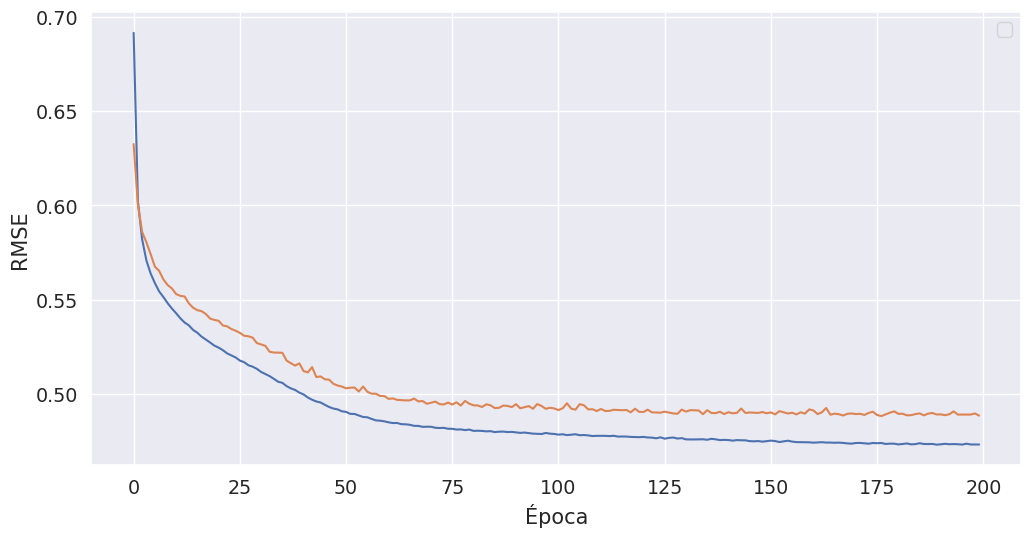

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 31s - loss: 0.8842

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.6036 

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.5312

 5568/12384 [============>.................] - ETA: 0s - loss: 0.5129

 7488/12384 [=================>............] - ETA: 0s - loss: 0.4766

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.4504

11264/12384 [==========================>...] - ETA: 0s - loss: 0.4352

12384/12384 [==============================] - 1s 46us/step - loss: 0.4278 - val_loss: 0.3430


Epoch 2/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3125

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.3179

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.3084

 5568/12384 [============>.................] - ETA: 0s - loss: 0.3197

 7456/12384 [=================>............] - ETA: 0s - loss: 0.3185

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.3177

11264/12384 [==========================>...] - ETA: 0s - loss: 0.3167

12384/12384 [==============================] - 0s 39us/step - loss: 0.3181 - val_loss: 0.3223


Epoch 3/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1500

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2895

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2837

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2911

 7488/12384 [=================>............] - ETA: 0s - loss: 0.3005

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.3096

11328/12384 [==========================>...] - ETA: 0s - loss: 0.3067

12384/12384 [==============================] - 0s 38us/step - loss: 0.3037 - val_loss: 0.3098


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3354

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2792

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2915

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2930

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2950

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2963

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2971

12384/12384 [==============================] - 0s 38us/step - loss: 0.2958 - val_loss: 0.3030


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3697

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2918

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2929

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2954

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2945

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2930

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2900

12384/12384 [==============================] - 0s 38us/step - loss: 0.2895 - val_loss: 0.2974


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1769

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3023

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.3000

 5760/12384 [============>.................] - ETA: 0s - loss: 0.3002

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2865

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2840

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2842

12384/12384 [==============================] - 0s 38us/step - loss: 0.2838 - val_loss: 0.2929


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2639

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.3027

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2936

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2848

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2803

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2784



11584/12384 [===========================>..] - ETA: 0s - loss: 0.2777

12384/12384 [==============================] - 0s 38us/step - loss: 0.2789 - val_loss: 0.2910


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3636

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2904

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2885

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2825

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2800

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2735

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2745

12384/12384 [==============================] - 0s 38us/step - loss: 0.2738 - val_loss: 0.2831


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3257

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2933

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2870

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2766

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2737

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2692

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2711

12384/12384 [==============================] - 0s 38us/step - loss: 0.2702 - val_loss: 0.2811


Epoch 10/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3071

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2711

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2658

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2642

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2632

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2624

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2683

12384/12384 [==============================] - 0s 39us/step - loss: 0.2673 - val_loss: 0.2787


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5765

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2874

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2812

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2669

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2643

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2627

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2665

12384/12384 [==============================] - 0s 38us/step - loss: 0.2638 - val_loss: 0.2762


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2547

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2895

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2772

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2757

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2704

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2655

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2656

12384/12384 [==============================] - 0s 40us/step - loss: 0.2624 - val_loss: 0.2775


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4021

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2558

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2548

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2632

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2604

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2562

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2594

12384/12384 [==============================] - 0s 38us/step - loss: 0.2600 - val_loss: 0.2706


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1165

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2517

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2506

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2533

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2541

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2565

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2591

12384/12384 [==============================] - 0s 38us/step - loss: 0.2589 - val_loss: 0.2698


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2311

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2753

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2650

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2656

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2641

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2561

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2542

12384/12384 [==============================] - 0s 38us/step - loss: 0.2567 - val_loss: 0.2684


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2986

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2763

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2731

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2690

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2671

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2596

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2576

12384/12384 [==============================] - 0s 38us/step - loss: 0.2555 - val_loss: 0.2683


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1942

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2408

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2513

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2498

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2476

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2518

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 0s 38us/step - loss: 0.2551 - val_loss: 0.2652


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1569

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2429

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2451

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2477

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2507

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2533

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 0s 38us/step - loss: 0.2538 - val_loss: 0.2657


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2910

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2826

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2678

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2710

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2595

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2517

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2540

12384/12384 [==============================] - 0s 38us/step - loss: 0.2523 - val_loss: 0.2669


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1682

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2518

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2523

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2552

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2484

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2497

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2500

12384/12384 [==============================] - 0s 39us/step - loss: 0.2514 - val_loss: 0.2634


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3442

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2463

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2537

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2501

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2515

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2541

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2523

12384/12384 [==============================] - 0s 39us/step - loss: 0.2514 - val_loss: 0.2641


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4010

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2473

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2461

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2483

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2461

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2468

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2512

12384/12384 [==============================] - 0s 39us/step - loss: 0.2501 - val_loss: 0.2631


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2102

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2458

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2422

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2422

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2458

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2458

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 39us/step - loss: 0.2500 - val_loss: 0.2654


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2035

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2429

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2366

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2424

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2465

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2467



11328/12384 [==========================>...] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 40us/step - loss: 0.2490 - val_loss: 0.2626


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2132

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2186

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2281

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2460

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2416

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2471

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2477

12384/12384 [==============================] - 0s 39us/step - loss: 0.2483 - val_loss: 0.2612


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2313

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2332

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2425

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2383

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2356

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2474

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 38us/step - loss: 0.2479 - val_loss: 0.2615


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6006

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2801

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2618

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2562

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2520

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2488

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2512

12384/12384 [==============================] - 0s 39us/step - loss: 0.2477 - val_loss: 0.2600


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1980

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2676

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2494

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2515

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2535

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2519

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2466

12384/12384 [==============================] - 0s 38us/step - loss: 0.2465 - val_loss: 0.2592


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2243

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2477

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2446

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2443

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2415

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2462

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 38us/step - loss: 0.2468 - val_loss: 0.2600


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5140

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2485

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2453

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2487

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2431

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2427

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 38us/step - loss: 0.2453 - val_loss: 0.2590


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1541

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2273

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2407

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2424

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2453

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2451

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 38us/step - loss: 0.2443 - val_loss: 0.2590


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2866

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2524

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2678

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2596

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2534

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2526

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2468

12384/12384 [==============================] - 0s 39us/step - loss: 0.2446 - val_loss: 0.2595


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1823

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2429

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2485

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2486

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2442

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2455

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 39us/step - loss: 0.2435 - val_loss: 0.2577


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4716

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2334

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2398

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2429

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2427

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2454

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 39us/step - loss: 0.2434 - val_loss: 0.2558


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2067

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2550

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2395

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2345

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2431

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2453

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 38us/step - loss: 0.2432 - val_loss: 0.2568


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5925

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2336

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2365

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2347

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2433

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2433

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 38us/step - loss: 0.2423 - val_loss: 0.2558


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1530

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2566

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2456

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2521

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2484

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2467

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 38us/step - loss: 0.2413 - val_loss: 0.2560


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2663

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2474

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2483

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2479

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2463

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2413

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 38us/step - loss: 0.2409 - val_loss: 0.2547


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1365

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2457

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2529

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2447

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2465

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2436

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 39us/step - loss: 0.2408 - val_loss: 0.2545


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1983

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2273

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2386

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2379

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2384

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2361

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2398

12384/12384 [==============================] - 0s 39us/step - loss: 0.2398 - val_loss: 0.2531


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1439

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2153

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2356

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2407

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2442

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2441

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 38us/step - loss: 0.2389 - val_loss: 0.2560


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2096

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2169

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2318

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2379

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2401

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2411

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 38us/step - loss: 0.2381 - val_loss: 0.2573


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1665

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2396

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2443

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2435

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2440

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2375

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 38us/step - loss: 0.2377 - val_loss: 0.2555


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2757

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2633

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2448

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2365

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2419

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2326

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 38us/step - loss: 0.2376 - val_loss: 0.2512


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1333

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2383

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2438

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2333

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2333

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2360

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 39us/step - loss: 0.2363 - val_loss: 0.2507


Epoch 46/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2911

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2451

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2504

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2353

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2324

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2354

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 38us/step - loss: 0.2354 - val_loss: 0.2504


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1907

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2346

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2344

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2345

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2320

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2312

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 38us/step - loss: 0.2354 - val_loss: 0.2498


Epoch 48/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1987

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2608

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2406

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2385

 7328/12384 [================>.............] - ETA: 0s - loss: 0.2354

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2353

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 39us/step - loss: 0.2342 - val_loss: 0.2482


Epoch 49/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1207

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2346

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2406

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2381

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2342

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2322

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 39us/step - loss: 0.2343 - val_loss: 0.2481


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3256

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2515

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2345

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2289

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2310



 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2340



11072/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 39us/step - loss: 0.2331 - val_loss: 0.2518


Epoch 51/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2225

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2586

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2510

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2482

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2417

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2375

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 38us/step - loss: 0.2325 - val_loss: 0.2447


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1637

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2184

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.2267

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2192

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2230

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2310

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 39us/step - loss: 0.2315 - val_loss: 0.2471


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0980

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2330

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2353

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2317

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2327

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2294

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 38us/step - loss: 0.2311 - val_loss: 0.2437


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1819

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2131

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2285

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2217

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2283

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2283

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 39us/step - loss: 0.2301 - val_loss: 0.2454


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1108

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2292

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2295

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2276

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2285

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2301

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 38us/step - loss: 0.2300 - val_loss: 0.2448


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1768

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2434

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2361

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2306

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2332

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2334

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 38us/step - loss: 0.2299 - val_loss: 0.2416


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4543

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2241

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2317

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2325

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2366

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2311

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 38us/step - loss: 0.2285 - val_loss: 0.2428


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3059

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2660

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2440

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2330

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2295

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2290

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2272

12384/12384 [==============================] - 0s 38us/step - loss: 0.2283 - val_loss: 0.2413


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2106

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2539

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2341

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2301

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2322

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2293

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 38us/step - loss: 0.2274 - val_loss: 0.2398


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2822

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2351

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2222

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2204

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2241

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2260

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2284

12384/12384 [==============================] - 0s 38us/step - loss: 0.2272 - val_loss: 0.2408


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1615

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2209

 3392/12384 [=======>......................] - ETA: 0s - loss: 0.2237

 5312/12384 [===========>..................] - ETA: 0s - loss: 0.2261

 7200/12384 [================>.............] - ETA: 0s - loss: 0.2227

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2238

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 40us/step - loss: 0.2264 - val_loss: 0.2406


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2627

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2316

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2309

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2290

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2301

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2272

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 38us/step - loss: 0.2262 - val_loss: 0.2396


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4781

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2444

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2189

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2260

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2257

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2237

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 39us/step - loss: 0.2250 - val_loss: 0.2388


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2767

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2104

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2189

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2232

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2196

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2240

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 38us/step - loss: 0.2242 - val_loss: 0.2404


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2663

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2136

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2078

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2223

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2212

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2229

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2241

12384/12384 [==============================] - 0s 39us/step - loss: 0.2241 - val_loss: 0.2382


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1912

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2065

 3680/12384 [=======>......................] - ETA: 0s - loss: 0.2093

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2124

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2198

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2223

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2240

12384/12384 [==============================] - 0s 38us/step - loss: 0.2244 - val_loss: 0.2385


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1416

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2373

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2284

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2225

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2260

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2245

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 38us/step - loss: 0.2240 - val_loss: 0.2366


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1703

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2253

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2303

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2288

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2259

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2285

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2259

12384/12384 [==============================] - 0s 38us/step - loss: 0.2230 - val_loss: 0.2409


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2226

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2486

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2374

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2282

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2270

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2275

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 38us/step - loss: 0.2229 - val_loss: 0.2362


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2260

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2257

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2239

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2230

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2227

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2230

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 38us/step - loss: 0.2220 - val_loss: 0.2367


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1707

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2156

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2237

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2231

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2265

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2254

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2231

12384/12384 [==============================] - 0s 38us/step - loss: 0.2217 - val_loss: 0.2344


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2897

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2306

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2223

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2282

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2223

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2250

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2230

12384/12384 [==============================] - 0s 38us/step - loss: 0.2218 - val_loss: 0.2357


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1004

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.1996

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2082

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2150

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2236

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2244

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2224

12384/12384 [==============================] - 0s 38us/step - loss: 0.2212 - val_loss: 0.2349


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1253

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2204

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2307

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2222

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2209

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2218

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 38us/step - loss: 0.2210 - val_loss: 0.2355


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2620

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2042

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2085

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2198

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2213

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2199

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2208

12384/12384 [==============================] - 0s 38us/step - loss: 0.2204 - val_loss: 0.2348


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2557

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2169

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2169

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2181

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2183

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2220

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2213

12384/12384 [==============================] - 0s 38us/step - loss: 0.2200 - val_loss: 0.2376


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2764

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2320

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2269

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2293

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2224

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2227

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2207

12384/12384 [==============================] - 0s 38us/step - loss: 0.2199 - val_loss: 0.2340


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2884

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2084

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2063

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2119

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2146

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2198



11168/12384 [==========================>...] - ETA: 0s - loss: 0.2206

12384/12384 [==============================] - 0s 39us/step - loss: 0.2201 - val_loss: 0.2345


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1058

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2297

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2395

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2248

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2209

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2203

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2168

12384/12384 [==============================] - 0s 39us/step - loss: 0.2197 - val_loss: 0.2339


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1016

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2243

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2260

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2310

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2237

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2206

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2199

12384/12384 [==============================] - 0s 38us/step - loss: 0.2196 - val_loss: 0.2340


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3992

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2098

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2195

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2235

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2232

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2197

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2192

12384/12384 [==============================] - 0s 38us/step - loss: 0.2190 - val_loss: 0.2328


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1186

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2213

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2295

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2253

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2188

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2204

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2169

12384/12384 [==============================] - 0s 38us/step - loss: 0.2192 - val_loss: 0.2324


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1243

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2139

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2163

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2214

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2190

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2220

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2186

12384/12384 [==============================] - 0s 38us/step - loss: 0.2183 - val_loss: 0.2319


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3591

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2299

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2218

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2216

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2223

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2240

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2196

12384/12384 [==============================] - 0s 38us/step - loss: 0.2188 - val_loss: 0.2315


Epoch 85/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2726

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2177

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2182

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2162

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2173

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2193

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2190

12384/12384 [==============================] - 0s 38us/step - loss: 0.2181 - val_loss: 0.2306


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1240

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2015

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2204

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2157

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2178

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2156

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2165

12384/12384 [==============================] - 0s 38us/step - loss: 0.2172 - val_loss: 0.2332


Epoch 87/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1419

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2241

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2122

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2088

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2134

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2131

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2178

12384/12384 [==============================] - 0s 39us/step - loss: 0.2179 - val_loss: 0.2311


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3334

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2377

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2313

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2253

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2179

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2160

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2166

12384/12384 [==============================] - 0s 38us/step - loss: 0.2172 - val_loss: 0.2312


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1607

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.1891

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.1924

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2075

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2116

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2099

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2160

12384/12384 [==============================] - 0s 38us/step - loss: 0.2174 - val_loss: 0.2303


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2769

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2126

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2140

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2128

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2143

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2171

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2162

12384/12384 [==============================] - 0s 38us/step - loss: 0.2169 - val_loss: 0.2300


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2165

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2355

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2208

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2221

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2260

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2203

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2174

12384/12384 [==============================] - 0s 38us/step - loss: 0.2164 - val_loss: 0.2298


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2687

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2371

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2200

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2131

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2187

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2121

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2175

12384/12384 [==============================] - 0s 38us/step - loss: 0.2162 - val_loss: 0.2300


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1357

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2134

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2253

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2211

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2147

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2169

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2157

12384/12384 [==============================] - 0s 38us/step - loss: 0.2166 - val_loss: 0.2293


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1748

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2298

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2140

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2164

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2166

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2134

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2166

12384/12384 [==============================] - 0s 38us/step - loss: 0.2164 - val_loss: 0.2314


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1980

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2045

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2148

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2123

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2145

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2138

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2167

12384/12384 [==============================] - 0s 39us/step - loss: 0.2162 - val_loss: 0.2297


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2058

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2229

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2241

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2210

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2162

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2129



11360/12384 [==========================>...] - ETA: 0s - loss: 0.2155

12384/12384 [==============================] - 0s 39us/step - loss: 0.2156 - val_loss: 0.2290


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2906

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2021

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2110

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2100

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2100

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2159

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2134

12384/12384 [==============================] - 0s 39us/step - loss: 0.2157 - val_loss: 0.2295


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0671

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.1983

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2096

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2071

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2086

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2119

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2140

12384/12384 [==============================] - 0s 38us/step - loss: 0.2157 - val_loss: 0.2301


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1267

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2048

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2146

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2073

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2065

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2106

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2140

12384/12384 [==============================] - 0s 38us/step - loss: 0.2154 - val_loss: 0.2292


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3370

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2190

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2115

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2153

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2171

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2199

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2169

12384/12384 [==============================] - 0s 38us/step - loss: 0.2154 - val_loss: 0.2285


No handles with labels found to put in legend.


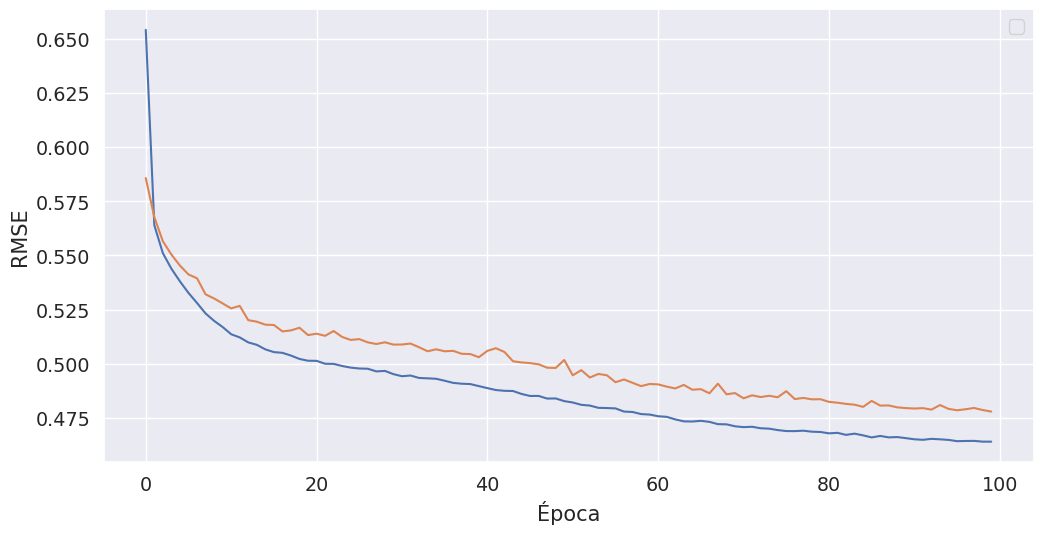

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 15s - loss: 0.9052

1728/6000 [=======>......................] - ETA: 0s - loss: 0.5607 

3456/6000 [================>.............] - ETA: 0s - loss: 0.4791

5248/6000 [=========================>....] - ETA: 0s - loss: 0.4417

6000/6000 [==============================] - 0s 57us/step - loss: 0.4291 - val_loss: 0.3315


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

1888/6000 [========>.....................] - ETA: 0s - loss: 0.3579

3776/6000 [=================>............] - ETA: 0s - loss: 0.3483

5728/6000 [===========================>..] - ETA: 0s - loss: 0.3455

6000/6000 [==============================] - 0s 39us/step - loss: 0.3423 - val_loss: 0.3148


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2185

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3323

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3258

5440/6000 [==========================>...] - ETA: 0s - loss: 0.3290

6000/6000 [==============================] - 0s 40us/step - loss: 0.3262 - val_loss: 0.3008


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2155

1952/6000 [========>.....................] - ETA: 0s - loss: 0.3126

3840/6000 [==================>...........] - ETA: 0s - loss: 0.3123

5760/6000 [===========================>..] - ETA: 0s - loss: 0.3087

6000/6000 [==============================] - 0s 39us/step - loss: 0.3108 - val_loss: 0.2961


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2452

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2989

3808/6000 [==================>...........] - ETA: 0s - loss: 0.3099

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2987

6000/6000 [==============================] - 0s 39us/step - loss: 0.2956 - val_loss: 0.2736


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2909

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2877

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2767

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2782

6000/6000 [==============================] - 0s 38us/step - loss: 0.2778 - val_loss: 0.2639


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4204

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2369

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2604

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2630

6000/6000 [==============================] - 0s 39us/step - loss: 0.2651 - val_loss: 0.2541


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2606

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2622

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2590

6000/6000 [==============================] - 0s 39us/step - loss: 0.2570 - val_loss: 0.2447


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2464

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2410

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2469

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2514

6000/6000 [==============================] - 0s 38us/step - loss: 0.2491 - val_loss: 0.2408


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1436

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2185

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2370

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 38us/step - loss: 0.2410 - val_loss: 0.2381


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2034

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2318

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2406

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 38us/step - loss: 0.2356 - val_loss: 0.2318


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2262

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2345

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2357

6000/6000 [==============================] - 0s 43us/step - loss: 0.2323 - val_loss: 0.2326


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2502

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2335

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2400

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 39us/step - loss: 0.2295 - val_loss: 0.2358


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2603

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2407

3744/6000 [=================>............] - ETA: 0s - loss: 0.2314

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 39us/step - loss: 0.2275 - val_loss: 0.2348


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2218

3776/6000 [=================>............] - ETA: 0s - loss: 0.2266

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 39us/step - loss: 0.2243 - val_loss: 0.2260


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2372

3776/6000 [=================>............] - ETA: 0s - loss: 0.2259

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 39us/step - loss: 0.2215 - val_loss: 0.2317


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2534

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2318

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2232

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 39us/step - loss: 0.2192 - val_loss: 0.2302


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2262

3776/6000 [=================>............] - ETA: 0s - loss: 0.2255

5632/6000 [===========================>..] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 39us/step - loss: 0.2158 - val_loss: 0.2265


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0862

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2145

3744/6000 [=================>............] - ETA: 0s - loss: 0.2168

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 39us/step - loss: 0.2156 - val_loss: 0.2228


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2018

3776/6000 [=================>............] - ETA: 0s - loss: 0.2099

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2084

6000/6000 [==============================] - 0s 39us/step - loss: 0.2133 - val_loss: 0.2212


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2288

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2206

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2152

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2078

6000/6000 [==============================] - 0s 38us/step - loss: 0.2099 - val_loss: 0.2301


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2176

3776/6000 [=================>............] - ETA: 0s - loss: 0.2143

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 39us/step - loss: 0.2092 - val_loss: 0.2133


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1813

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2045

5824/6000 [============================>.] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 38us/step - loss: 0.2074 - val_loss: 0.2128


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2108

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2012

5824/6000 [============================>.] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 38us/step - loss: 0.2056 - val_loss: 0.2111


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1934

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2084

5824/6000 [============================>.] - ETA: 0s - loss: 0.2036

6000/6000 [==============================] - 0s 38us/step - loss: 0.2044 - val_loss: 0.2268


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1483

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2076

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2013

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2024

6000/6000 [==============================] - 0s 38us/step - loss: 0.2034 - val_loss: 0.2131


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1810

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1903

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2000

5824/6000 [============================>.] - ETA: 0s - loss: 0.2011

6000/6000 [==============================] - 0s 38us/step - loss: 0.2013 - val_loss: 0.2165


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2101

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1980

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2031

6000/6000 [==============================] - 0s 38us/step - loss: 0.2029 - val_loss: 0.2143


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2001

3552/6000 [================>.............] - ETA: 0s - loss: 0.2063

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2005

6000/6000 [==============================] - 0s 40us/step - loss: 0.1997 - val_loss: 0.2251


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3179

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2000

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1974

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 39us/step - loss: 0.2005 - val_loss: 0.2056


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1341

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2045

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2027

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1998

6000/6000 [==============================] - 0s 39us/step - loss: 0.1983 - val_loss: 0.2062


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2027

3776/6000 [=================>............] - ETA: 0s - loss: 0.1936

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 39us/step - loss: 0.1963 - val_loss: 0.2070


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3088

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1895

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2000

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1959

6000/6000 [==============================] - 0s 38us/step - loss: 0.1974 - val_loss: 0.2150


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0676

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1835

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1982

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1966

6000/6000 [==============================] - 0s 39us/step - loss: 0.1959 - val_loss: 0.2095


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1983

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1976

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 38us/step - loss: 0.1962 - val_loss: 0.2016


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3796

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1964

3776/6000 [=================>............] - ETA: 0s - loss: 0.1946

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1948

6000/6000 [==============================] - 0s 39us/step - loss: 0.1960 - val_loss: 0.2085


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0961

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2085

3776/6000 [=================>............] - ETA: 0s - loss: 0.1951

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1963

6000/6000 [==============================] - 0s 39us/step - loss: 0.1948 - val_loss: 0.2054


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1853

3776/6000 [=================>............] - ETA: 0s - loss: 0.1964

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 40us/step - loss: 0.1944 - val_loss: 0.2078


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1877

3744/6000 [=================>............] - ETA: 0s - loss: 0.1942

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 39us/step - loss: 0.1930 - val_loss: 0.2080


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1990

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1971

3776/6000 [=================>............] - ETA: 0s - loss: 0.1969

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 39us/step - loss: 0.1918 - val_loss: 0.2007


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0600

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2018

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1920

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1918

6000/6000 [==============================] - 0s 38us/step - loss: 0.1918 - val_loss: 0.2103


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3870

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1980

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1924

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 39us/step - loss: 0.1919 - val_loss: 0.2017


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1753

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1850

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 39us/step - loss: 0.1917 - val_loss: 0.2113


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1289

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1983

3680/6000 [=================>............] - ETA: 0s - loss: 0.1914

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 40us/step - loss: 0.1922 - val_loss: 0.2001


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1836

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1938

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 39us/step - loss: 0.1900 - val_loss: 0.2052


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1802

3680/6000 [=================>............] - ETA: 0s - loss: 0.1784

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 39us/step - loss: 0.1896 - val_loss: 0.2050


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1224

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2030

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1921

5824/6000 [============================>.] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 38us/step - loss: 0.1899 - val_loss: 0.1989


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0930

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1996

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1876

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 38us/step - loss: 0.1885 - val_loss: 0.2002


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1882

3744/6000 [=================>............] - ETA: 0s - loss: 0.1842

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 39us/step - loss: 0.1872 - val_loss: 0.1996


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1500

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1933

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1945

5888/6000 [============================>.] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 38us/step - loss: 0.1874 - val_loss: 0.1973


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1844

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 39us/step - loss: 0.1882 - val_loss: 0.1999


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4003

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1908

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1813

5920/6000 [============================>.] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 38us/step - loss: 0.1871 - val_loss: 0.1990


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2513

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1900

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1840

5824/6000 [============================>.] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 38us/step - loss: 0.1864 - val_loss: 0.1967


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1923

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1844

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1814

5856/6000 [============================>.] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 38us/step - loss: 0.1856 - val_loss: 0.1978


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1901

3488/6000 [================>.............] - ETA: 0s - loss: 0.1803

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 40us/step - loss: 0.1864 - val_loss: 0.1985


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1754

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1814

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 38us/step - loss: 0.1838 - val_loss: 0.2030


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1753

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1845

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 39us/step - loss: 0.1857 - val_loss: 0.1956


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1848

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1883

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1818

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 38us/step - loss: 0.1839 - val_loss: 0.2075


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1894

3776/6000 [=================>............] - ETA: 0s - loss: 0.1816

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 39us/step - loss: 0.1853 - val_loss: 0.1981


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1837

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1918

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 38us/step - loss: 0.1838 - val_loss: 0.1947


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1951

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1848

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 39us/step - loss: 0.1821 - val_loss: 0.1968


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1073

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1821

3680/6000 [=================>............] - ETA: 0s - loss: 0.1842

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 39us/step - loss: 0.1825 - val_loss: 0.1977


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2069

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1876

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1803

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1800

6000/6000 [==============================] - 0s 39us/step - loss: 0.1809 - val_loss: 0.2038


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2373

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1762

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1834

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 39us/step - loss: 0.1827 - val_loss: 0.1993


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1803

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1858

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 38us/step - loss: 0.1813 - val_loss: 0.2042


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0689

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1762

3776/6000 [=================>............] - ETA: 0s - loss: 0.1778

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 39us/step - loss: 0.1804 - val_loss: 0.2011


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1759

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1718

5824/6000 [============================>.] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 38us/step - loss: 0.1809 - val_loss: 0.1975


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1827

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1856

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 39us/step - loss: 0.1809 - val_loss: 0.2001


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1662

3744/6000 [=================>............] - ETA: 0s - loss: 0.1830

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 39us/step - loss: 0.1807 - val_loss: 0.1993


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1886

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1869

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 38us/step - loss: 0.1797 - val_loss: 0.1940


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1555

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1779

5856/6000 [============================>.] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 38us/step - loss: 0.1777 - val_loss: 0.1978


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1690

3776/6000 [=================>............] - ETA: 0s - loss: 0.1757

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 39us/step - loss: 0.1792 - val_loss: 0.2034


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1173

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1783

3680/6000 [=================>............] - ETA: 0s - loss: 0.1870

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 39us/step - loss: 0.1790 - val_loss: 0.2009


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2136

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1776

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1823

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 38us/step - loss: 0.1790 - val_loss: 0.2087


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1872

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1829

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 39us/step - loss: 0.1768 - val_loss: 0.2023


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1954

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1777

5824/6000 [============================>.] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 38us/step - loss: 0.1777 - val_loss: 0.1956


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1776

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1782

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 38us/step - loss: 0.1765 - val_loss: 0.1914


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1114

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1694

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1742

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 39us/step - loss: 0.1768 - val_loss: 0.1937


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1747

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1853

5856/6000 [============================>.] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 38us/step - loss: 0.1784 - val_loss: 0.1908


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3878

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1916

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1740

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 39us/step - loss: 0.1768 - val_loss: 0.1927


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1830

3680/6000 [=================>............] - ETA: 0s - loss: 0.1747

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 39us/step - loss: 0.1764 - val_loss: 0.1953


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1824

3744/6000 [=================>............] - ETA: 0s - loss: 0.1846

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 39us/step - loss: 0.1743 - val_loss: 0.1905


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1777

3744/6000 [=================>............] - ETA: 0s - loss: 0.1776

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 39us/step - loss: 0.1748 - val_loss: 0.1956


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1912

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1794

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 39us/step - loss: 0.1753 - val_loss: 0.1920


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2448

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1798

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1733

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 38us/step - loss: 0.1743 - val_loss: 0.1913


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1887

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1699

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 39us/step - loss: 0.1737 - val_loss: 0.1925


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1848

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1796

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 38us/step - loss: 0.1738 - val_loss: 0.1915


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1693

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1698

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 38us/step - loss: 0.1745 - val_loss: 0.1923


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1634

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1694

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 39us/step - loss: 0.1722 - val_loss: 0.1896


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1642

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1678

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 39us/step - loss: 0.1729 - val_loss: 0.1901


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1741

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 39us/step - loss: 0.1731 - val_loss: 0.1926


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1951

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1786

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 39us/step - loss: 0.1741 - val_loss: 0.1987


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2747

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1593

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1694

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 39us/step - loss: 0.1716 - val_loss: 0.1931


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1695

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 39us/step - loss: 0.1717 - val_loss: 0.1913


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0963

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1813

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1743

5824/6000 [============================>.] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 38us/step - loss: 0.1709 - val_loss: 0.1962


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1461

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1679

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 38us/step - loss: 0.1713 - val_loss: 0.1926


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1865

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1906

3776/6000 [=================>............] - ETA: 0s - loss: 0.1723

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 39us/step - loss: 0.1715 - val_loss: 0.1868


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1639

3712/6000 [=================>............] - ETA: 0s - loss: 0.1745

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 39us/step - loss: 0.1711 - val_loss: 0.1942


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1696

3776/6000 [=================>............] - ETA: 0s - loss: 0.1724

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 39us/step - loss: 0.1716 - val_loss: 0.1942


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1540

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1672

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 42us/step - loss: 0.1704 - val_loss: 0.1906


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1275

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1515

3744/6000 [=================>............] - ETA: 0s - loss: 0.1540

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 39us/step - loss: 0.1685 - val_loss: 0.1937


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1539

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1703

3776/6000 [=================>............] - ETA: 0s - loss: 0.1750

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 39us/step - loss: 0.1685 - val_loss: 0.1937


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1734

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1692

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 39us/step - loss: 0.1694 - val_loss: 0.1889


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1158

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1566

3744/6000 [=================>............] - ETA: 0s - loss: 0.1589

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 39us/step - loss: 0.1689 - val_loss: 0.1914


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1833

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1550

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1663

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 39us/step - loss: 0.1687 - val_loss: 0.1976


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1647

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1581

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 39us/step - loss: 0.1670 - val_loss: 0.1898


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1612

3712/6000 [=================>............] - ETA: 0s - loss: 0.1685

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 40us/step - loss: 0.1675 - val_loss: 0.1875


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1631

3712/6000 [=================>............] - ETA: 0s - loss: 0.1644

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 40us/step - loss: 0.1678 - val_loss: 0.1898


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1693

3776/6000 [=================>............] - ETA: 0s - loss: 0.1624

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 39us/step - loss: 0.1678 - val_loss: 0.1880


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0987

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1598

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1629

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 39us/step - loss: 0.1670 - val_loss: 0.1898


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0903

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1672

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 39us/step - loss: 0.1670 - val_loss: 0.1899


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2404

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1688

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 39us/step - loss: 0.1662 - val_loss: 0.1883


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1568

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1630

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 38us/step - loss: 0.1669 - val_loss: 0.1895


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1729

3776/6000 [=================>............] - ETA: 0s - loss: 0.1674

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 39us/step - loss: 0.1642 - val_loss: 0.1916


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0949

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1583

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1603

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 39us/step - loss: 0.1683 - val_loss: 0.2040


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2412

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1726

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1694

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 39us/step - loss: 0.1658 - val_loss: 0.1912


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1743

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1717

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 39us/step - loss: 0.1666 - val_loss: 0.1880


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1516

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1594

3776/6000 [=================>............] - ETA: 0s - loss: 0.1621

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 39us/step - loss: 0.1656 - val_loss: 0.1878


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1672

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1657

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 39us/step - loss: 0.1644 - val_loss: 0.1873


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1742

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1670

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 39us/step - loss: 0.1642 - val_loss: 0.1947


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1716

3776/6000 [=================>............] - ETA: 0s - loss: 0.1559

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 39us/step - loss: 0.1641 - val_loss: 0.1875


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1564

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1654

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 38us/step - loss: 0.1642 - val_loss: 0.1870


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1279

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1598

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1568

5856/6000 [============================>.] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 38us/step - loss: 0.1627 - val_loss: 0.1931


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1481

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1552

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 39us/step - loss: 0.1645 - val_loss: 0.1902


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1426

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1610

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1634

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 39us/step - loss: 0.1635 - val_loss: 0.1896


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1558

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1608

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1622

6000/6000 [==============================] - 0s 39us/step - loss: 0.1631 - val_loss: 0.1859


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2120

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1553

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1604

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 39us/step - loss: 0.1620 - val_loss: 0.1898


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3776/6000 [=================>............] - ETA: 0s - loss: 0.1724

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 39us/step - loss: 0.1631 - val_loss: 0.1879


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0489

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1590

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1638

6000/6000 [==============================] - 0s 39us/step - loss: 0.1637 - val_loss: 0.1863


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3288

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1573

3744/6000 [=================>............] - ETA: 0s - loss: 0.1648

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1606

6000/6000 [==============================] - 0s 40us/step - loss: 0.1620 - val_loss: 0.1898


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1504

3712/6000 [=================>............] - ETA: 0s - loss: 0.1600

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 41us/step - loss: 0.1620 - val_loss: 0.1860


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1534

3584/6000 [================>.............] - ETA: 0s - loss: 0.1572

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 40us/step - loss: 0.1626 - val_loss: 0.1857


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3600

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1613

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1613

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 38us/step - loss: 0.1632 - val_loss: 0.1863


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1530

3616/6000 [=================>............] - ETA: 0s - loss: 0.1537

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 40us/step - loss: 0.1605 - val_loss: 0.1888


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1586

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1604

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1607

6000/6000 [==============================] - 0s 39us/step - loss: 0.1624 - val_loss: 0.1883


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2465

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1638

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1686

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1611

6000/6000 [==============================] - 0s 38us/step - loss: 0.1616 - val_loss: 0.1866


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1498

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1604

5856/6000 [============================>.] - ETA: 0s - loss: 0.1614

6000/6000 [==============================] - 0s 38us/step - loss: 0.1611 - val_loss: 0.1881


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1599

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1583

5888/6000 [============================>.] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 38us/step - loss: 0.1612 - val_loss: 0.1936


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2291

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1526

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1597

5920/6000 [============================>.] - ETA: 0s - loss: 0.1623

6000/6000 [==============================] - 0s 38us/step - loss: 0.1623 - val_loss: 0.1877


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1532

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1597

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1580

6000/6000 [==============================] - 0s 38us/step - loss: 0.1607 - val_loss: 0.1879


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1684

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 38us/step - loss: 0.1623 - val_loss: 0.1866


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0907

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1433

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1582

5856/6000 [============================>.] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 38us/step - loss: 0.1610 - val_loss: 0.1895


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1530

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1583

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1569

5856/6000 [============================>.] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 38us/step - loss: 0.1604 - val_loss: 0.1879


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2081

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1615

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1593

5824/6000 [============================>.] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 38us/step - loss: 0.1594 - val_loss: 0.1904


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1535

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1572

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 38us/step - loss: 0.1603 - val_loss: 0.1872


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2118

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1717

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1630

5824/6000 [============================>.] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 38us/step - loss: 0.1589 - val_loss: 0.1902


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1641

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1586

5824/6000 [============================>.] - ETA: 0s - loss: 0.1577

6000/6000 [==============================] - 0s 39us/step - loss: 0.1591 - val_loss: 0.1850


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2326

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1613

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1598

5856/6000 [============================>.] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 38us/step - loss: 0.1602 - val_loss: 0.1897


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1680

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1657

5824/6000 [============================>.] - ETA: 0s - loss: 0.1607

6000/6000 [==============================] - 0s 38us/step - loss: 0.1599 - val_loss: 0.1851


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1549

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1451

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1556

5920/6000 [============================>.] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 38us/step - loss: 0.1587 - val_loss: 0.1926


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2485

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1731

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1629

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1578

6000/6000 [==============================] - 0s 38us/step - loss: 0.1584 - val_loss: 0.1880


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1073

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1634

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1610

5824/6000 [============================>.] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 38us/step - loss: 0.1589 - val_loss: 0.1936


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1402

3744/6000 [=================>............] - ETA: 0s - loss: 0.1527

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 39us/step - loss: 0.1582 - val_loss: 0.1868


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1950

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1571

3744/6000 [=================>............] - ETA: 0s - loss: 0.1556

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 39us/step - loss: 0.1583 - val_loss: 0.1841


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1611

3776/6000 [=================>............] - ETA: 0s - loss: 0.1655

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1614

6000/6000 [==============================] - 0s 39us/step - loss: 0.1595 - val_loss: 0.1842


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1434

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1545

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 38us/step - loss: 0.1590 - val_loss: 0.1862


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1488

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1560

5856/6000 [============================>.] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 38us/step - loss: 0.1571 - val_loss: 0.1856


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0833

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1561

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1606

5856/6000 [============================>.] - ETA: 0s - loss: 0.1587

6000/6000 [==============================] - 0s 39us/step - loss: 0.1580 - val_loss: 0.1873


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0508

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1498

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1543

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 39us/step - loss: 0.1570 - val_loss: 0.1851


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1620

3584/6000 [================>.............] - ETA: 0s - loss: 0.1553

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 41us/step - loss: 0.1567 - val_loss: 0.1859


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1539

3520/6000 [================>.............] - ETA: 0s - loss: 0.1562

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 40us/step - loss: 0.1570 - val_loss: 0.1885


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1661

3744/6000 [=================>............] - ETA: 0s - loss: 0.1565

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 39us/step - loss: 0.1576 - val_loss: 0.1859


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2743

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1684

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1586

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 39us/step - loss: 0.1579 - val_loss: 0.1850


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1501

3616/6000 [=================>............] - ETA: 0s - loss: 0.1545

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 39us/step - loss: 0.1572 - val_loss: 0.1841


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1432

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1513

5824/6000 [============================>.] - ETA: 0s - loss: 0.1564

6000/6000 [==============================] - 0s 38us/step - loss: 0.1562 - val_loss: 0.1861


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1570

3616/6000 [=================>............] - ETA: 0s - loss: 0.1552

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 39us/step - loss: 0.1575 - val_loss: 0.1837


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1411

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1592

5920/6000 [============================>.] - ETA: 0s - loss: 0.1558

6000/6000 [==============================] - 0s 38us/step - loss: 0.1560 - val_loss: 0.1924


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1461

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1599

3744/6000 [=================>............] - ETA: 0s - loss: 0.1555

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1587

6000/6000 [==============================] - 0s 40us/step - loss: 0.1581 - val_loss: 0.1823


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1514

3680/6000 [=================>............] - ETA: 0s - loss: 0.1524

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1553

6000/6000 [==============================] - 0s 40us/step - loss: 0.1565 - val_loss: 0.2002


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1536

3584/6000 [================>.............] - ETA: 0s - loss: 0.1503

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 40us/step - loss: 0.1561 - val_loss: 0.1869


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1599

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1555

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1567

6000/6000 [==============================] - 0s 39us/step - loss: 0.1552 - val_loss: 0.1903


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0607

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1536

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1596

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1533

6000/6000 [==============================] - 0s 39us/step - loss: 0.1551 - val_loss: 0.1873


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1524

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1565

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 39us/step - loss: 0.1557 - val_loss: 0.1873


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0983

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1368

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1514

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 39us/step - loss: 0.1550 - val_loss: 0.1904


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3712/6000 [=================>............] - ETA: 0s - loss: 0.1519

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 39us/step - loss: 0.1548 - val_loss: 0.1869


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1416

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1554

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1556

6000/6000 [==============================] - 0s 39us/step - loss: 0.1551 - val_loss: 0.1831


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1792

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1450

3776/6000 [=================>............] - ETA: 0s - loss: 0.1486

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 39us/step - loss: 0.1550 - val_loss: 0.1899


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1543

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1541

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 38us/step - loss: 0.1559 - val_loss: 0.1873


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1513

3776/6000 [=================>............] - ETA: 0s - loss: 0.1525

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 39us/step - loss: 0.1557 - val_loss: 0.1826


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0588

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1604

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1520

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1529

6000/6000 [==============================] - 0s 38us/step - loss: 0.1556 - val_loss: 0.1865


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3134

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1586

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1516

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 39us/step - loss: 0.1536 - val_loss: 0.1866


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1468

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1526

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 38us/step - loss: 0.1552 - val_loss: 0.1869


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1923

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1454

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1518

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1503

6000/6000 [==============================] - 0s 39us/step - loss: 0.1531 - val_loss: 0.1840


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1865

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1522

3712/6000 [=================>............] - ETA: 0s - loss: 0.1540

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1531

6000/6000 [==============================] - 0s 40us/step - loss: 0.1533 - val_loss: 0.1858


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1031

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1612

3552/6000 [================>.............] - ETA: 0s - loss: 0.1536

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1544

6000/6000 [==============================] - 0s 40us/step - loss: 0.1547 - val_loss: 0.1861


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2256

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1545

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1524

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 39us/step - loss: 0.1525 - val_loss: 0.1850


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0725

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1577

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1558

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1551

6000/6000 [==============================] - 0s 38us/step - loss: 0.1542 - val_loss: 0.1932


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2517

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1468

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1523

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 39us/step - loss: 0.1544 - val_loss: 0.1895


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1427

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1476

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1518

6000/6000 [==============================] - 0s 39us/step - loss: 0.1533 - val_loss: 0.1850


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1463

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1447

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 38us/step - loss: 0.1526 - val_loss: 0.1837


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1408

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1512

5856/6000 [============================>.] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 38us/step - loss: 0.1539 - val_loss: 0.1837


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1668

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1543

5856/6000 [============================>.] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 38us/step - loss: 0.1536 - val_loss: 0.1842


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1555

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1572

5856/6000 [============================>.] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 38us/step - loss: 0.1530 - val_loss: 0.1839


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1455

3776/6000 [=================>............] - ETA: 0s - loss: 0.1527

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1518

6000/6000 [==============================] - 0s 39us/step - loss: 0.1525 - val_loss: 0.1845


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1540

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1479

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1504

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 38us/step - loss: 0.1508 - val_loss: 0.1875


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1598

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1544

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 39us/step - loss: 0.1527 - val_loss: 0.1891


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1561

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1576

5824/6000 [============================>.] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 38us/step - loss: 0.1523 - val_loss: 0.1816


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1495

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1533

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 38us/step - loss: 0.1524 - val_loss: 0.1848


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0907

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1572

3712/6000 [=================>............] - ETA: 0s - loss: 0.1558

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 40us/step - loss: 0.1520 - val_loss: 0.1883


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0677

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1467

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1509

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 39us/step - loss: 0.1521 - val_loss: 0.1851


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1617

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1587

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1538

6000/6000 [==============================] - 0s 39us/step - loss: 0.1528 - val_loss: 0.1847


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1490

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1509

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 38us/step - loss: 0.1520 - val_loss: 0.1887


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1643

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1532

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 38us/step - loss: 0.1533 - val_loss: 0.1983


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1471

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1493

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1521

6000/6000 [==============================] - 0s 39us/step - loss: 0.1524 - val_loss: 0.1819


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1402

3776/6000 [=================>............] - ETA: 0s - loss: 0.1484

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 39us/step - loss: 0.1519 - val_loss: 0.1858


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2339

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1569

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1561

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 39us/step - loss: 0.1518 - val_loss: 0.1827


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4012

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1514

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1470

5824/6000 [============================>.] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 38us/step - loss: 0.1513 - val_loss: 0.1839


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1580

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1528

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 39us/step - loss: 0.1517 - val_loss: 0.1847


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1451

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1481

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1489

6000/6000 [==============================] - 0s 38us/step - loss: 0.1513 - val_loss: 0.1847


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1223

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1498

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1529

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1493

6000/6000 [==============================] - 0s 39us/step - loss: 0.1507 - val_loss: 0.1888


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2965

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1427

3680/6000 [=================>............] - ETA: 0s - loss: 0.1548

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 39us/step - loss: 0.1508 - val_loss: 0.1831


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1528

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1538

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1579

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 38us/step - loss: 0.1527 - val_loss: 0.1868


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1494

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1500

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 38us/step - loss: 0.1506 - val_loss: 0.1875


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1993

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1469

3776/6000 [=================>............] - ETA: 0s - loss: 0.1548

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 39us/step - loss: 0.1510 - val_loss: 0.1909


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1348

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1565

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1548

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 38us/step - loss: 0.1510 - val_loss: 0.1858


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0642

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1453

3776/6000 [=================>............] - ETA: 0s - loss: 0.1515

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 39us/step - loss: 0.1518 - val_loss: 0.1844


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1298

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1435

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 39us/step - loss: 0.1496 - val_loss: 0.1828


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3104

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1382

3712/6000 [=================>............] - ETA: 0s - loss: 0.1512

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 40us/step - loss: 0.1506 - val_loss: 0.1816


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1568

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1493

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1524

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 38us/step - loss: 0.1499 - val_loss: 0.1839


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1387

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1454

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 39us/step - loss: 0.1496 - val_loss: 0.1930


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1175

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1495

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1544

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1497

6000/6000 [==============================] - 0s 38us/step - loss: 0.1499 - val_loss: 0.1851


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4076

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1506

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1515

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 38us/step - loss: 0.1510 - val_loss: 0.1826


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1514

3744/6000 [=================>............] - ETA: 0s - loss: 0.1449

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 39us/step - loss: 0.1492 - val_loss: 0.1856


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1608

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1512

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 38us/step - loss: 0.1487 - val_loss: 0.1908


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1754

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1574

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1486

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 39us/step - loss: 0.1499 - val_loss: 0.1853


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1459

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 39us/step - loss: 0.1494 - val_loss: 0.1814


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1589

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1530

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1503

6000/6000 [==============================] - 0s 38us/step - loss: 0.1502 - val_loss: 0.1849


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1511

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1460

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1505

6000/6000 [==============================] - 0s 39us/step - loss: 0.1496 - val_loss: 0.1869


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1450

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1433

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 38us/step - loss: 0.1492 - val_loss: 0.1820


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1692

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1497

3776/6000 [=================>............] - ETA: 0s - loss: 0.1456

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 39us/step - loss: 0.1492 - val_loss: 0.1827


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1570

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1516

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1486

6000/6000 [==============================] - 0s 39us/step - loss: 0.1485 - val_loss: 0.1872


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2231

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1461

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1517

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1499

6000/6000 [==============================] - 0s 39us/step - loss: 0.1484 - val_loss: 0.1852


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1520

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1498

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1481

6000/6000 [==============================] - 0s 39us/step - loss: 0.1490 - val_loss: 0.1826


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1507

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1510

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 39us/step - loss: 0.1496 - val_loss: 0.1836


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0741

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1493

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1489

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 39us/step - loss: 0.1483 - val_loss: 0.1816


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1477

3744/6000 [=================>............] - ETA: 0s - loss: 0.1437

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1489

6000/6000 [==============================] - 0s 40us/step - loss: 0.1480 - val_loss: 0.1840


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2122

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1409

3552/6000 [================>.............] - ETA: 0s - loss: 0.1454

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 40us/step - loss: 0.1490 - val_loss: 0.1840


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1277

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1446

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 39us/step - loss: 0.1478 - val_loss: 0.1845


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1379

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1511

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 38us/step - loss: 0.1485 - val_loss: 0.1851


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2197

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1490

3776/6000 [=================>............] - ETA: 0s - loss: 0.1493

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 40us/step - loss: 0.1489 - val_loss: 0.1841


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1260

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1387

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1487

6000/6000 [==============================] - 0s 39us/step - loss: 0.1490 - val_loss: 0.1859


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1490

3776/6000 [=================>............] - ETA: 0s - loss: 0.1498

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 39us/step - loss: 0.1477 - val_loss: 0.1842


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1481

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1471

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 39us/step - loss: 0.1465 - val_loss: 0.1822


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0552

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1539

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1482

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 38us/step - loss: 0.1480 - val_loss: 0.1848


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0690

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1434

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1467

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 38us/step - loss: 0.1471 - val_loss: 0.1823


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1374

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 37us/step - loss: 0.1479 - val_loss: 0.1838


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1475

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1461

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 38us/step - loss: 0.1474 - val_loss: 0.1826


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1507

3776/6000 [=================>............] - ETA: 0s - loss: 0.1484

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 39us/step - loss: 0.1468 - val_loss: 0.1870


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1355

3776/6000 [=================>............] - ETA: 0s - loss: 0.1397

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 39us/step - loss: 0.1469 - val_loss: 0.1914


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1422

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1418

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 39us/step - loss: 0.1463 - val_loss: 0.1840


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2736

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1416

3648/6000 [=================>............] - ETA: 0s - loss: 0.1424

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 39us/step - loss: 0.1466 - val_loss: 0.1862


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1498

3680/6000 [=================>............] - ETA: 0s - loss: 0.1510

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 40us/step - loss: 0.1477 - val_loss: 0.1824


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0694

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1589

3616/6000 [=================>............] - ETA: 0s - loss: 0.1455

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1471

6000/6000 [==============================] - 0s 40us/step - loss: 0.1459 - val_loss: 0.1825


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1878

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1377

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1424

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 39us/step - loss: 0.1475 - val_loss: 0.1873


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1513

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1476

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 38us/step - loss: 0.1473 - val_loss: 0.1839


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1281

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1426

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 38us/step - loss: 0.1465 - val_loss: 0.1855


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1454

3680/6000 [=================>............] - ETA: 0s - loss: 0.1423

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 39us/step - loss: 0.1461 - val_loss: 0.1855


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2522

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1586

3776/6000 [=================>............] - ETA: 0s - loss: 0.1511

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1473

6000/6000 [==============================] - 0s 39us/step - loss: 0.1473 - val_loss: 0.1852


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2951

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1510

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 39us/step - loss: 0.1453 - val_loss: 0.1856


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1446

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1472

5824/6000 [============================>.] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 38us/step - loss: 0.1455 - val_loss: 0.1868


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1445

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1424

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 39us/step - loss: 0.1458 - val_loss: 0.1900


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1671

3776/6000 [=================>............] - ETA: 0s - loss: 0.1473

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 39us/step - loss: 0.1465 - val_loss: 0.1830


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1476

3648/6000 [=================>............] - ETA: 0s - loss: 0.1431

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 39us/step - loss: 0.1453 - val_loss: 0.1841


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1074

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1429

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1398

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 39us/step - loss: 0.1464 - val_loss: 0.1826


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1502

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1519

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1481

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 40us/step - loss: 0.1453 - val_loss: 0.1827


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2321

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1412

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1380

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 38us/step - loss: 0.1458 - val_loss: 0.1848


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1013

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1436

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1494

5824/6000 [============================>.] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 38us/step - loss: 0.1460 - val_loss: 0.1862


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1481

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1447

5824/6000 [============================>.] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 38us/step - loss: 0.1455 - val_loss: 0.1825


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1344

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1369

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 38us/step - loss: 0.1458 - val_loss: 0.1835


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0537

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1564

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1463

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 38us/step - loss: 0.1450 - val_loss: 0.1820


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2544

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1609

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1436

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 39us/step - loss: 0.1465 - val_loss: 0.1831


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1118

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1648

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1517

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 39us/step - loss: 0.1452 - val_loss: 0.1814


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1281

3776/6000 [=================>............] - ETA: 0s - loss: 0.1377

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 39us/step - loss: 0.1448 - val_loss: 0.1848


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1563

3744/6000 [=================>............] - ETA: 0s - loss: 0.1487

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1433

6000/6000 [==============================] - 0s 39us/step - loss: 0.1450 - val_loss: 0.1844


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1506

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1412

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 39us/step - loss: 0.1441 - val_loss: 0.1885


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1305

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1424

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 38us/step - loss: 0.1438 - val_loss: 0.1888


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1384

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1434

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 40us/step - loss: 0.1454 - val_loss: 0.1841


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1450

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1459

6000/6000 [==============================] - 0s 38us/step - loss: 0.1450 - val_loss: 0.1857


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1462

3744/6000 [=================>............] - ETA: 0s - loss: 0.1472

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 39us/step - loss: 0.1449 - val_loss: 0.1828


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1556

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1425

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1398

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 39us/step - loss: 0.1453 - val_loss: 0.1838


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1754

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1356

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1472

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 39us/step - loss: 0.1446 - val_loss: 0.1829


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1559

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1545

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1480

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1433

6000/6000 [==============================] - 0s 38us/step - loss: 0.1436 - val_loss: 0.1840


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2262

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1447

5824/6000 [============================>.] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 38us/step - loss: 0.1444 - val_loss: 0.1815


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1045

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1318

3776/6000 [=================>............] - ETA: 0s - loss: 0.1386

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 39us/step - loss: 0.1445 - val_loss: 0.1853


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1410

5824/6000 [============================>.] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 38us/step - loss: 0.1447 - val_loss: 0.1854


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1339

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1351

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 38us/step - loss: 0.1449 - val_loss: 0.1863


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1317

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1404

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 38us/step - loss: 0.1432 - val_loss: 0.1884


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2023

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1523

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1422

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 38us/step - loss: 0.1436 - val_loss: 0.1835


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0903

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1337

3424/6000 [================>.............] - ETA: 0s - loss: 0.1344

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 40us/step - loss: 0.1440 - val_loss: 0.1842


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1132

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1375

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1423

5888/6000 [============================>.] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 38us/step - loss: 0.1439 - val_loss: 0.1899


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1208

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1409

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 39us/step - loss: 0.1433 - val_loss: 0.1869


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1362

3712/6000 [=================>............] - ETA: 0s - loss: 0.1425

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 40us/step - loss: 0.1432 - val_loss: 0.1890


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1359

3744/6000 [=================>............] - ETA: 0s - loss: 0.1400

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 39us/step - loss: 0.1449 - val_loss: 0.1911


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4143

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1483

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1405

5824/6000 [============================>.] - ETA: 0s - loss: 0.1434

6000/6000 [==============================] - 0s 38us/step - loss: 0.1435 - val_loss: 0.1823


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1421

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 39us/step - loss: 0.1430 - val_loss: 0.1845


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1105

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1455

3680/6000 [=================>............] - ETA: 0s - loss: 0.1530

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 39us/step - loss: 0.1433 - val_loss: 0.1834


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0771

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1237

3776/6000 [=================>............] - ETA: 0s - loss: 0.1372

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 39us/step - loss: 0.1429 - val_loss: 0.1843


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1422

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1385

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 38us/step - loss: 0.1443 - val_loss: 0.1913


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1514

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1534

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 40us/step - loss: 0.1424 - val_loss: 0.1871


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1418

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1282

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1474

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 39us/step - loss: 0.1447 - val_loss: 0.1831


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1818

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1376

3616/6000 [=================>............] - ETA: 0s - loss: 0.1437

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 40us/step - loss: 0.1414 - val_loss: 0.1821


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1322

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1409

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 38us/step - loss: 0.1424 - val_loss: 0.1848


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1500

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1440

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 39us/step - loss: 0.1430 - val_loss: 0.1858


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0700

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1349

3616/6000 [=================>............] - ETA: 0s - loss: 0.1395

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 40us/step - loss: 0.1428 - val_loss: 0.1832


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0968

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1346

3744/6000 [=================>............] - ETA: 0s - loss: 0.1441

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1428

6000/6000 [==============================] - 0s 39us/step - loss: 0.1427 - val_loss: 0.1875


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1289

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1355

5824/6000 [============================>.] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 38us/step - loss: 0.1417 - val_loss: 0.1821


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1527

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1363

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1340

5856/6000 [============================>.] - ETA: 0s - loss: 0.1429

6000/6000 [==============================] - 0s 38us/step - loss: 0.1425 - val_loss: 0.1861


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1392

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1410

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 39us/step - loss: 0.1426 - val_loss: 0.1828


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1401

3744/6000 [=================>............] - ETA: 0s - loss: 0.1409

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 39us/step - loss: 0.1429 - val_loss: 0.1895


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1220

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1446

3744/6000 [=================>............] - ETA: 0s - loss: 0.1460

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 39us/step - loss: 0.1426 - val_loss: 0.1834


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1461

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1376

5824/6000 [============================>.] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 38us/step - loss: 0.1420 - val_loss: 0.1833


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1372

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 38us/step - loss: 0.1419 - val_loss: 0.1888


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1473

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 38us/step - loss: 0.1413 - val_loss: 0.1839


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1397

3584/6000 [================>.............] - ETA: 0s - loss: 0.1470

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 42us/step - loss: 0.1424 - val_loss: 0.1873


Epoch 315/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1418

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 39us/step - loss: 0.1417 - val_loss: 0.1890


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3358

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1471

3776/6000 [=================>............] - ETA: 0s - loss: 0.1441

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 40us/step - loss: 0.1410 - val_loss: 0.1862


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1872

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1472

3744/6000 [=================>............] - ETA: 0s - loss: 0.1424

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1413

6000/6000 [==============================] - 0s 39us/step - loss: 0.1416 - val_loss: 0.1829


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2185

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1430

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1412

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 39us/step - loss: 0.1421 - val_loss: 0.1834


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1490

3776/6000 [=================>............] - ETA: 0s - loss: 0.1453

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 39us/step - loss: 0.1419 - val_loss: 0.1862


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1398

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1399

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 38us/step - loss: 0.1413 - val_loss: 0.1873


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2110

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1306

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1398

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1428

6000/6000 [==============================] - 0s 38us/step - loss: 0.1419 - val_loss: 0.1823


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1389

3776/6000 [=================>............] - ETA: 0s - loss: 0.1332

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 40us/step - loss: 0.1411 - val_loss: 0.1863


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1433

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1374

5856/6000 [============================>.] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 39us/step - loss: 0.1410 - val_loss: 0.1832


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1116

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1344

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1408

5888/6000 [============================>.] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 38us/step - loss: 0.1414 - val_loss: 0.1854


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

 896/6000 [===>..........................] - ETA: 0s - loss: 0.1315

2624/6000 [============>.................] - ETA: 0s - loss: 0.1437

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1434

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1413

6000/6000 [==============================] - 0s 50us/step - loss: 0.1411 - val_loss: 0.1836


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1872

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1330

3552/6000 [================>.............] - ETA: 0s - loss: 0.1380

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1406

6000/6000 [==============================] - 0s 44us/step - loss: 0.1411 - val_loss: 0.1855


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1159

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1344

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1368

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 38us/step - loss: 0.1404 - val_loss: 0.1888


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2013

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1437

3776/6000 [=================>............] - ETA: 0s - loss: 0.1416

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 39us/step - loss: 0.1407 - val_loss: 0.1858


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1375

3712/6000 [=================>............] - ETA: 0s - loss: 0.1430

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1421

6000/6000 [==============================] - 0s 39us/step - loss: 0.1418 - val_loss: 0.1847


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1358

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1417

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 38us/step - loss: 0.1407 - val_loss: 0.1832


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1044

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1347

3424/6000 [================>.............] - ETA: 0s - loss: 0.1375

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 40us/step - loss: 0.1410 - val_loss: 0.1848


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1493

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1437

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 38us/step - loss: 0.1400 - val_loss: 0.1829


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0738

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1272

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1348

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 39us/step - loss: 0.1404 - val_loss: 0.1881


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1266

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1334

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 39us/step - loss: 0.1391 - val_loss: 0.1850


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1310

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1304

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 39us/step - loss: 0.1400 - val_loss: 0.1850


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0532

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1431

5824/6000 [============================>.] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 38us/step - loss: 0.1405 - val_loss: 0.1835


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1730

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1516

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1402

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1397

6000/6000 [==============================] - 0s 38us/step - loss: 0.1402 - val_loss: 0.1865


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1477

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1360

5824/6000 [============================>.] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 38us/step - loss: 0.1396 - val_loss: 0.1833


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1722

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1349

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1415

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 40us/step - loss: 0.1401 - val_loss: 0.1823


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1412

3520/6000 [================>.............] - ETA: 0s - loss: 0.1344

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1413

6000/6000 [==============================] - 0s 40us/step - loss: 0.1397 - val_loss: 0.1846


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1407

3584/6000 [================>.............] - ETA: 0s - loss: 0.1388

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 40us/step - loss: 0.1394 - val_loss: 0.1832


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1583

3680/6000 [=================>............] - ETA: 0s - loss: 0.1404

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 39us/step - loss: 0.1386 - val_loss: 0.1829


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0903

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1317

3776/6000 [=================>............] - ETA: 0s - loss: 0.1384

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 39us/step - loss: 0.1396 - val_loss: 0.1820


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1358

3680/6000 [=================>............] - ETA: 0s - loss: 0.1377

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 39us/step - loss: 0.1391 - val_loss: 0.1839


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1399

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1404

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 39us/step - loss: 0.1391 - val_loss: 0.1875


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1531

3616/6000 [=================>............] - ETA: 0s - loss: 0.1454

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 39us/step - loss: 0.1396 - val_loss: 0.1841


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1538

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1437

5824/6000 [============================>.] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 38us/step - loss: 0.1390 - val_loss: 0.1884


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1310

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1353

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 38us/step - loss: 0.1390 - val_loss: 0.1898


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2913

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1369

5856/6000 [============================>.] - ETA: 0s - loss: 0.1394

6000/6000 [==============================] - 0s 38us/step - loss: 0.1405 - val_loss: 0.1834


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1346

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1346

5888/6000 [============================>.] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 38us/step - loss: 0.1387 - val_loss: 0.1851


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1268

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1355

5824/6000 [============================>.] - ETA: 0s - loss: 0.1394

6000/6000 [==============================] - 0s 38us/step - loss: 0.1395 - val_loss: 0.1845


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1348

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1337

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 38us/step - loss: 0.1384 - val_loss: 0.1870


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1363

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1371

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 38us/step - loss: 0.1388 - val_loss: 0.1839


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1339

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1373

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 39us/step - loss: 0.1396 - val_loss: 0.1834


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1325

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1376

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 39us/step - loss: 0.1384 - val_loss: 0.1860


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1365

3520/6000 [================>.............] - ETA: 0s - loss: 0.1362

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 41us/step - loss: 0.1381 - val_loss: 0.1853


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1353

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1341

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 39us/step - loss: 0.1381 - val_loss: 0.1895


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1822

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1261

3776/6000 [=================>............] - ETA: 0s - loss: 0.1377

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 39us/step - loss: 0.1383 - val_loss: 0.1850


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1401

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1373

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 38us/step - loss: 0.1389 - val_loss: 0.1848


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0754

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1224

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1325

5856/6000 [============================>.] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 38us/step - loss: 0.1374 - val_loss: 0.1831


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1414

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1418

5856/6000 [============================>.] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 38us/step - loss: 0.1373 - val_loss: 0.1824


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1385

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1338

5824/6000 [============================>.] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 38us/step - loss: 0.1380 - val_loss: 0.1845


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1443

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1382

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 39us/step - loss: 0.1372 - val_loss: 0.1845


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1539

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1465

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1406

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 39us/step - loss: 0.1391 - val_loss: 0.1848


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0692

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1320

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1353

5888/6000 [============================>.] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 38us/step - loss: 0.1375 - val_loss: 0.1862


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1357

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1342

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 39us/step - loss: 0.1375 - val_loss: 0.1887


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1407

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1400

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 38us/step - loss: 0.1374 - val_loss: 0.1891


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1367

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1347

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 38us/step - loss: 0.1371 - val_loss: 0.1869


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1472

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1438

5824/6000 [============================>.] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 38us/step - loss: 0.1369 - val_loss: 0.1836


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1553

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1442

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 38us/step - loss: 0.1376 - val_loss: 0.1840


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1340

3776/6000 [=================>............] - ETA: 0s - loss: 0.1379

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 39us/step - loss: 0.1366 - val_loss: 0.1857


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1210

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1312

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 38us/step - loss: 0.1368 - val_loss: 0.1831


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0897

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1225

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1277

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 38us/step - loss: 0.1366 - val_loss: 0.1854


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1316

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1355

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 38us/step - loss: 0.1374 - val_loss: 0.1841


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1937

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1333

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1365

5856/6000 [============================>.] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 38us/step - loss: 0.1374 - val_loss: 0.1864


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0604

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1398

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1387

5888/6000 [============================>.] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 38us/step - loss: 0.1380 - val_loss: 0.1896


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1410

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 38us/step - loss: 0.1375 - val_loss: 0.1852


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1337

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1269

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 39us/step - loss: 0.1358 - val_loss: 0.1874


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1342

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1371

5824/6000 [============================>.] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 38us/step - loss: 0.1372 - val_loss: 0.1888


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1431

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1374

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 38us/step - loss: 0.1376 - val_loss: 0.1836


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1409

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1352

5824/6000 [============================>.] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 38us/step - loss: 0.1368 - val_loss: 0.1838


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1288

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1305

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 38us/step - loss: 0.1364 - val_loss: 0.1880


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1333

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1391

5824/6000 [============================>.] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 38us/step - loss: 0.1377 - val_loss: 0.1863


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1360

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1364

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 38us/step - loss: 0.1364 - val_loss: 0.1863


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1158

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1297

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1296

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 39us/step - loss: 0.1372 - val_loss: 0.1865


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1392

3488/6000 [================>.............] - ETA: 0s - loss: 0.1411

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 40us/step - loss: 0.1383 - val_loss: 0.1920


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1531

3712/6000 [=================>............] - ETA: 0s - loss: 0.1434

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 40us/step - loss: 0.1371 - val_loss: 0.1888


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1399

3712/6000 [=================>............] - ETA: 0s - loss: 0.1350

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 39us/step - loss: 0.1379 - val_loss: 0.1844


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1438

3744/6000 [=================>............] - ETA: 0s - loss: 0.1336

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 39us/step - loss: 0.1363 - val_loss: 0.1882


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0679

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1229

3680/6000 [=================>............] - ETA: 0s - loss: 0.1369

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 39us/step - loss: 0.1355 - val_loss: 0.1843


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3250

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1396

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1335

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 39us/step - loss: 0.1350 - val_loss: 0.1861


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1298

3584/6000 [================>.............] - ETA: 0s - loss: 0.1332

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 40us/step - loss: 0.1347 - val_loss: 0.1857


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1412

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1354

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 39us/step - loss: 0.1352 - val_loss: 0.1862


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2881

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1286

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1296

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 38us/step - loss: 0.1358 - val_loss: 0.1851


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1393

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1348

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1388

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 39us/step - loss: 0.1350 - val_loss: 0.1914


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1318

3712/6000 [=================>............] - ETA: 0s - loss: 0.1327

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 40us/step - loss: 0.1361 - val_loss: 0.1871


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1294

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1403

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 41us/step - loss: 0.1342 - val_loss: 0.1858


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0795

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1413

3776/6000 [=================>............] - ETA: 0s - loss: 0.1363

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 39us/step - loss: 0.1350 - val_loss: 0.1873


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1442

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1421

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 39us/step - loss: 0.1352 - val_loss: 0.1829


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1241

3776/6000 [=================>............] - ETA: 0s - loss: 0.1327

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 38us/step - loss: 0.1351 - val_loss: 0.1857


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0670

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1367

3744/6000 [=================>............] - ETA: 0s - loss: 0.1366

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 39us/step - loss: 0.1346 - val_loss: 0.1857


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0846

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1352

3776/6000 [=================>............] - ETA: 0s - loss: 0.1358

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 39us/step - loss: 0.1348 - val_loss: 0.1858


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2396

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1324

3744/6000 [=================>............] - ETA: 0s - loss: 0.1355

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 39us/step - loss: 0.1365 - val_loss: 0.1891


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1257

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1217

5824/6000 [============================>.] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 38us/step - loss: 0.1347 - val_loss: 0.1853


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1176

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1355

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 41us/step - loss: 0.1343 - val_loss: 0.1916


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1330

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 39us/step - loss: 0.1339 - val_loss: 0.1884


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2336

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1259

3776/6000 [=================>............] - ETA: 0s - loss: 0.1370

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 42us/step - loss: 0.1347 - val_loss: 0.1924


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271



1952/6000 [========>.....................] - ETA: 0s - loss: 0.1313



3872/6000 [==================>...........] - ETA: 0s - loss: 0.1281

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 38us/step - loss: 0.1349 - val_loss: 0.1865


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1064

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1255

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1350

5888/6000 [============================>.] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 38us/step - loss: 0.1350 - val_loss: 0.1867


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1813

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1356

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 38us/step - loss: 0.1340 - val_loss: 0.1903


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1425

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1336

5856/6000 [============================>.] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 38us/step - loss: 0.1334 - val_loss: 0.1853


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1326

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1365

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 38us/step - loss: 0.1334 - val_loss: 0.1877


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1366

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1373

5824/6000 [============================>.] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 38us/step - loss: 0.1336 - val_loss: 0.1883


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1387

5888/6000 [============================>.] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 38us/step - loss: 0.1347 - val_loss: 0.1871


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1429

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1331

5824/6000 [============================>.] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 38us/step - loss: 0.1354 - val_loss: 0.1850


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1326

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 39us/step - loss: 0.1346 - val_loss: 0.1888


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1341

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1308

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 40us/step - loss: 0.1333 - val_loss: 0.1854


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1297

3648/6000 [=================>............] - ETA: 0s - loss: 0.1378

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 39us/step - loss: 0.1337 - val_loss: 0.1901


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0978

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1365

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1354

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 38us/step - loss: 0.1348 - val_loss: 0.1834


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1341

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1310

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1331

5888/6000 [============================>.] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 38us/step - loss: 0.1338 - val_loss: 0.1927


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1447

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1412

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 38us/step - loss: 0.1348 - val_loss: 0.1880


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0754

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1370

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1356

5824/6000 [============================>.] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 38us/step - loss: 0.1336 - val_loss: 0.1859


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0666

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1385

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1346

5856/6000 [============================>.] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 38us/step - loss: 0.1334 - val_loss: 0.1909


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2542

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1266

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1291

5856/6000 [============================>.] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 38us/step - loss: 0.1331 - val_loss: 0.1845


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2242

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1359

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 38us/step - loss: 0.1335 - val_loss: 0.1927


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1273

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1308

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1342

5824/6000 [============================>.] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 38us/step - loss: 0.1334 - val_loss: 0.1872


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1228

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1361

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 38us/step - loss: 0.1336 - val_loss: 0.1890


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0410

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1279

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1317

5824/6000 [============================>.] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 38us/step - loss: 0.1329 - val_loss: 0.1888


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1154

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1254

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 38us/step - loss: 0.1325 - val_loss: 0.1846


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1281

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1282

5824/6000 [============================>.] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 38us/step - loss: 0.1334 - val_loss: 0.1880


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1392

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1311

5824/6000 [============================>.] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 38us/step - loss: 0.1329 - val_loss: 0.1873


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1268

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1304

5824/6000 [============================>.] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 38us/step - loss: 0.1334 - val_loss: 0.1834


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1274

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1322

5888/6000 [============================>.] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 38us/step - loss: 0.1330 - val_loss: 0.1863


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1019

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1225

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1246

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 38us/step - loss: 0.1331 - val_loss: 0.1917


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2487

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1391

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1356

5824/6000 [============================>.] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 38us/step - loss: 0.1315 - val_loss: 0.1893


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0889

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1196

3456/6000 [================>.............] - ETA: 0s - loss: 0.1277

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 41us/step - loss: 0.1326 - val_loss: 0.1915


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1194

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1330

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 39us/step - loss: 0.1330 - val_loss: 0.1900


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1350

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1291

5856/6000 [============================>.] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 38us/step - loss: 0.1319 - val_loss: 0.1872


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1462

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1388

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1344

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 38us/step - loss: 0.1324 - val_loss: 0.1859


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1185

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1297

5856/6000 [============================>.] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 38us/step - loss: 0.1320 - val_loss: 0.1879


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0756

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1280

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1306

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 38us/step - loss: 0.1317 - val_loss: 0.1907


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1229

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1398

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1310

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 38us/step - loss: 0.1312 - val_loss: 0.1873


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1296

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1289

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 38us/step - loss: 0.1319 - val_loss: 0.1885


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0962

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1496

3712/6000 [=================>............] - ETA: 0s - loss: 0.1419

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 39us/step - loss: 0.1331 - val_loss: 0.1876


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0684

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1468

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1367

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 38us/step - loss: 0.1332 - val_loss: 0.1850


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2219

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1290

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1349

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 38us/step - loss: 0.1323 - val_loss: 0.1897


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1264

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1303

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 38us/step - loss: 0.1323 - val_loss: 0.1883


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1348

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1310

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 38us/step - loss: 0.1328 - val_loss: 0.1884


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1330

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1323

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 38us/step - loss: 0.1320 - val_loss: 0.1878


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1369

3744/6000 [=================>............] - ETA: 0s - loss: 0.1361

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 39us/step - loss: 0.1307 - val_loss: 0.1900


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1376

3680/6000 [=================>............] - ETA: 0s - loss: 0.1356

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1336

6000/6000 [==============================] - 0s 40us/step - loss: 0.1322 - val_loss: 0.1871


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1205

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1210

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1304

5824/6000 [============================>.] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 38us/step - loss: 0.1322 - val_loss: 0.1924


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1217

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1305

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 38us/step - loss: 0.1312 - val_loss: 0.1867


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1379

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1352

5856/6000 [============================>.] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 38us/step - loss: 0.1297 - val_loss: 0.1908


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0830

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1256

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1293

5856/6000 [============================>.] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 38us/step - loss: 0.1310 - val_loss: 0.1901


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1275

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1250

5824/6000 [============================>.] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 38us/step - loss: 0.1309 - val_loss: 0.1917


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1245

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1329

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1278

5824/6000 [============================>.] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 38us/step - loss: 0.1310 - val_loss: 0.1885


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1201

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1299

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 38us/step - loss: 0.1310 - val_loss: 0.1875


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3568

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1386

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1326

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 38us/step - loss: 0.1315 - val_loss: 0.1859


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1400

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1336

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 38us/step - loss: 0.1310 - val_loss: 0.1875


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2292

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1337

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 38us/step - loss: 0.1313 - val_loss: 0.1892


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0892

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1290

3744/6000 [=================>............] - ETA: 0s - loss: 0.1322

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 39us/step - loss: 0.1311 - val_loss: 0.1869


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1652

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1338

5856/6000 [============================>.] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 38us/step - loss: 0.1315 - val_loss: 0.1931


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2794

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1294

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1314

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 39us/step - loss: 0.1310 - val_loss: 0.1890


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1243

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1326

5824/6000 [============================>.] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 38us/step - loss: 0.1305 - val_loss: 0.1887


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1312

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1303

5824/6000 [============================>.] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 38us/step - loss: 0.1307 - val_loss: 0.1940


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1662

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1307

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1355

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 39us/step - loss: 0.1319 - val_loss: 0.1902


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1192

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1296

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 38us/step - loss: 0.1303 - val_loss: 0.1860


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1898

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1347

3744/6000 [=================>............] - ETA: 0s - loss: 0.1308

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1306 - val_loss: 0.1895


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1270

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1282

5856/6000 [============================>.] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 38us/step - loss: 0.1300 - val_loss: 0.1936


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3477

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1251

3776/6000 [=================>............] - ETA: 0s - loss: 0.1260

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1317

6000/6000 [==============================] - 0s 39us/step - loss: 0.1315 - val_loss: 0.1883


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0822

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1326

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1311

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 38us/step - loss: 0.1284 - val_loss: 0.1893


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1221

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1290

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 39us/step - loss: 0.1304 - val_loss: 0.1905


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1289

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1330

5824/6000 [============================>.] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 38us/step - loss: 0.1309 - val_loss: 0.1860


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1742

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1300

3744/6000 [=================>............] - ETA: 0s - loss: 0.1304

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 40us/step - loss: 0.1292 - val_loss: 0.1879


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1360

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1313

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 38us/step - loss: 0.1309 - val_loss: 0.1892


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1159

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1262

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1311

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 39us/step - loss: 0.1294 - val_loss: 0.1965


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1322

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1350

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 38us/step - loss: 0.1291 - val_loss: 0.1865


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0685

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1349

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1309

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1289 - val_loss: 0.1893


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1287

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1260

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 38us/step - loss: 0.1300 - val_loss: 0.1899


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1301

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1286

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 38us/step - loss: 0.1306 - val_loss: 0.1950


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0558

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1251

3680/6000 [=================>............] - ETA: 0s - loss: 0.1319

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1289 - val_loss: 0.1865


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1383

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1266

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1246

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1291

6000/6000 [==============================] - 0s 39us/step - loss: 0.1282 - val_loss: 0.1973


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1380

3648/6000 [=================>............] - ETA: 0s - loss: 0.1262

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1305

6000/6000 [==============================] - 0s 39us/step - loss: 0.1294 - val_loss: 0.1921


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1794

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1276

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1275

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 39us/step - loss: 0.1297 - val_loss: 0.1958


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1394

3776/6000 [=================>............] - ETA: 0s - loss: 0.1341

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 39us/step - loss: 0.1299 - val_loss: 0.1887


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1316

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1282

5824/6000 [============================>.] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 38us/step - loss: 0.1289 - val_loss: 0.1907


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1019

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1225

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1283

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 39us/step - loss: 0.1294 - val_loss: 0.1899


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1236

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1263

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 39us/step - loss: 0.1280 - val_loss: 0.1901


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1257

3776/6000 [=================>............] - ETA: 0s - loss: 0.1278

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 39us/step - loss: 0.1283 - val_loss: 0.1927


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1183

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1292

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 38us/step - loss: 0.1280 - val_loss: 0.1905


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1208

3744/6000 [=================>............] - ETA: 0s - loss: 0.1235

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 39us/step - loss: 0.1274 - val_loss: 0.1877


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1325

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1329

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 38us/step - loss: 0.1291 - val_loss: 0.1879


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1302

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1285

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 38us/step - loss: 0.1286 - val_loss: 0.1917


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3928

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1395

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1274

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1284

6000/6000 [==============================] - 0s 38us/step - loss: 0.1274 - val_loss: 0.1925


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0528

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1393

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1351

5824/6000 [============================>.] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 38us/step - loss: 0.1278 - val_loss: 0.1913


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1166

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1263

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 39us/step - loss: 0.1270 - val_loss: 0.1942


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1296

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1230

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1247

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 38us/step - loss: 0.1281 - val_loss: 0.1885


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1246

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1281

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 38us/step - loss: 0.1270 - val_loss: 0.1931


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0585

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1233

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1260

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 40us/step - loss: 0.1277 - val_loss: 0.1946


Text(0, 0.5, 'y pred')

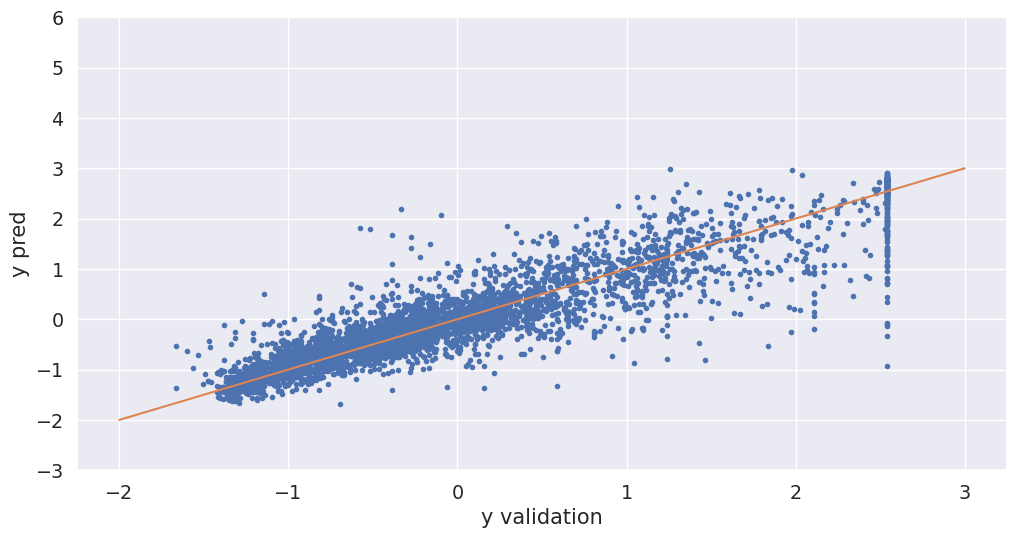

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


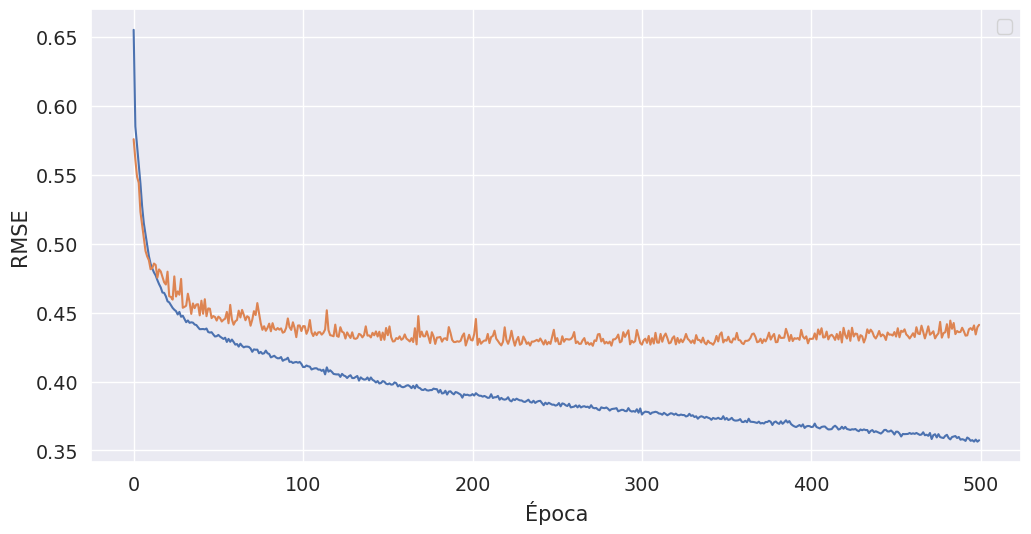

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 15s - loss: 0.6491

1632/6000 [=======>......................] - ETA: 0s - loss: 0.7893 

3328/6000 [===============>..............] - ETA: 0s - loss: 0.5863

5120/6000 [========================>.....] - ETA: 0s - loss: 0.5102

6000/6000 [==============================] - 0s 58us/step - loss: 0.4839 - val_loss: 0.3325


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4037

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3245

3488/6000 [================>.............] - ETA: 0s - loss: 0.3542

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3760

6000/6000 [==============================] - 0s 41us/step - loss: 0.3802 - val_loss: 0.2965


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4781

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3254

3520/6000 [================>.............] - ETA: 0s - loss: 0.3077

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2912

6000/6000 [==============================] - 0s 41us/step - loss: 0.2835 - val_loss: 0.2684


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2826

1728/6000 [=======>......................] - ETA: 0s - loss: 0.3423

3424/6000 [================>.............] - ETA: 0s - loss: 0.3078

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2866

6000/6000 [==============================] - 0s 40us/step - loss: 0.2788 - val_loss: 0.2396


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2570

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2502

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2407

6000/6000 [==============================] - 0s 41us/step - loss: 0.2461 - val_loss: 0.2433


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2808

3488/6000 [================>.............] - ETA: 0s - loss: 0.2535

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2415

6000/6000 [==============================] - 0s 39us/step - loss: 0.2433 - val_loss: 0.2269


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2288

3456/6000 [================>.............] - ETA: 0s - loss: 0.2286

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 39us/step - loss: 0.2272 - val_loss: 0.2268


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3488/6000 [================>.............] - ETA: 0s - loss: 0.2234

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 39us/step - loss: 0.2274 - val_loss: 0.2385


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2406

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2564

3488/6000 [================>.............] - ETA: 0s - loss: 0.2238

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 39us/step - loss: 0.2211 - val_loss: 0.2181


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2256

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2148

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2104

6000/6000 [==============================] - 0s 40us/step - loss: 0.2092 - val_loss: 0.2215


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1817

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1988

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2120

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2032

6000/6000 [==============================] - 0s 40us/step - loss: 0.2047 - val_loss: 0.2125


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1875

3488/6000 [================>.............] - ETA: 0s - loss: 0.2012

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2045

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.2124


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2141

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2085

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 40us/step - loss: 0.2075 - val_loss: 0.2116


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1880

3456/6000 [================>.............] - ETA: 0s - loss: 0.1981

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 40us/step - loss: 0.2003 - val_loss: 0.2133


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1849

3456/6000 [================>.............] - ETA: 0s - loss: 0.2033

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 39us/step - loss: 0.2015 - val_loss: 0.2110


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2055

3456/6000 [================>.............] - ETA: 0s - loss: 0.1987

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2038

6000/6000 [==============================] - 0s 40us/step - loss: 0.2023 - val_loss: 0.2097


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2466

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2031

3488/6000 [================>.............] - ETA: 0s - loss: 0.1966

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2008

6000/6000 [==============================] - 0s 39us/step - loss: 0.2021 - val_loss: 0.2147


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3453

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1816

3424/6000 [================>.............] - ETA: 0s - loss: 0.1990

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 40us/step - loss: 0.2059 - val_loss: 0.2028


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1782

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1928

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1927

6000/6000 [==============================] - 0s 40us/step - loss: 0.1974 - val_loss: 0.2071


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3422

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1979

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1898

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 40us/step - loss: 0.1901 - val_loss: 0.2015


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1868

3424/6000 [================>.............] - ETA: 0s - loss: 0.1847

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 40us/step - loss: 0.1876 - val_loss: 0.2088


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1935

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1917

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1895

6000/6000 [==============================] - 0s 40us/step - loss: 0.1885 - val_loss: 0.2109


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2099

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1911

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1928

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2013

6000/6000 [==============================] - 0s 40us/step - loss: 0.2047 - val_loss: 0.1988


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1778

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1880

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 40us/step - loss: 0.1877 - val_loss: 0.2029


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1830

3456/6000 [================>.............] - ETA: 0s - loss: 0.1882

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 39us/step - loss: 0.1865 - val_loss: 0.1990


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1781

3456/6000 [================>.............] - ETA: 0s - loss: 0.1857

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 40us/step - loss: 0.1866 - val_loss: 0.2194


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1662

3456/6000 [================>.............] - ETA: 0s - loss: 0.1763

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 40us/step - loss: 0.1871 - val_loss: 0.2004


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1917

3424/6000 [================>.............] - ETA: 0s - loss: 0.1870

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 40us/step - loss: 0.1949 - val_loss: 0.2054


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1950

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1779

3456/6000 [================>.............] - ETA: 0s - loss: 0.1808

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 40us/step - loss: 0.1865 - val_loss: 0.2012


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3522

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1743

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1718

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 40us/step - loss: 0.1833 - val_loss: 0.2061


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1925

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1928

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 41us/step - loss: 0.1862 - val_loss: 0.2004


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0930

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1799

3424/6000 [================>.............] - ETA: 0s - loss: 0.1763

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 40us/step - loss: 0.1808 - val_loss: 0.1963


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1711

3488/6000 [================>.............] - ETA: 0s - loss: 0.1794

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 40us/step - loss: 0.1796 - val_loss: 0.2045


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1730

3488/6000 [================>.............] - ETA: 0s - loss: 0.1666

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 40us/step - loss: 0.1745 - val_loss: 0.1998


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1555

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3424/6000 [================>.............] - ETA: 0s - loss: 0.1759

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 40us/step - loss: 0.1763 - val_loss: 0.1956


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1649

3424/6000 [================>.............] - ETA: 0s - loss: 0.1697

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 40us/step - loss: 0.1776 - val_loss: 0.2008


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0934

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1704

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1698

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 41us/step - loss: 0.1749 - val_loss: 0.2028


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1593

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1785

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 41us/step - loss: 0.1781 - val_loss: 0.1935


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1675

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1995

3424/6000 [================>.............] - ETA: 0s - loss: 0.1892

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 40us/step - loss: 0.1829 - val_loss: 0.2010


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1672

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1706

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 40us/step - loss: 0.1789 - val_loss: 0.1951


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1624

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1744

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 41us/step - loss: 0.1715 - val_loss: 0.2082


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1667

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1737

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 40us/step - loss: 0.1718 - val_loss: 0.1936


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1521

3424/6000 [================>.............] - ETA: 0s - loss: 0.1567

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 40us/step - loss: 0.1686 - val_loss: 0.1964


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1674

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1761

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1728

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 41us/step - loss: 0.1695 - val_loss: 0.1940


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1633

3424/6000 [================>.............] - ETA: 0s - loss: 0.1615

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 40us/step - loss: 0.1674 - val_loss: 0.1943


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2746

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3424/6000 [================>.............] - ETA: 0s - loss: 0.1755

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 40us/step - loss: 0.1660 - val_loss: 0.1983


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1663

3424/6000 [================>.............] - ETA: 0s - loss: 0.1700

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 40us/step - loss: 0.1659 - val_loss: 0.1932


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1589

3488/6000 [================>.............] - ETA: 0s - loss: 0.1583

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1647

6000/6000 [==============================] - 0s 39us/step - loss: 0.1650 - val_loss: 0.1911


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1660

3424/6000 [================>.............] - ETA: 0s - loss: 0.1678

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 39us/step - loss: 0.1657 - val_loss: 0.1929


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1552

3456/6000 [================>.............] - ETA: 0s - loss: 0.1593

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 40us/step - loss: 0.1647 - val_loss: 0.1908


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1554

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1693

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 40us/step - loss: 0.1640 - val_loss: 0.1896


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1551

3456/6000 [================>.............] - ETA: 0s - loss: 0.1599

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1605

6000/6000 [==============================] - 0s 40us/step - loss: 0.1632 - val_loss: 0.1946


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1426

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1561

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 40us/step - loss: 0.1632 - val_loss: 0.1945


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1617

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1735

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1650

6000/6000 [==============================] - 0s 40us/step - loss: 0.1655 - val_loss: 0.2022


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0643

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2166

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1971

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 40us/step - loss: 0.1793 - val_loss: 0.1986


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2390

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1797

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1683

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 40us/step - loss: 0.1665 - val_loss: 0.1903


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1511

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1464

3424/6000 [================>.............] - ETA: 0s - loss: 0.1631

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1618

6000/6000 [==============================] - 0s 40us/step - loss: 0.1625 - val_loss: 0.1921


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1624

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1583

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1588

6000/6000 [==============================] - 0s 40us/step - loss: 0.1616 - val_loss: 0.2076


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1673

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1493

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1586

6000/6000 [==============================] - 0s 40us/step - loss: 0.1587 - val_loss: 0.1945


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1737

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1648

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 40us/step - loss: 0.1654 - val_loss: 0.1948


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1634

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1521

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 41us/step - loss: 0.1552 - val_loss: 0.2019


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1470

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1544

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1585

6000/6000 [==============================] - 0s 40us/step - loss: 0.1586 - val_loss: 0.2060


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1593

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1578

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1554

6000/6000 [==============================] - 0s 40us/step - loss: 0.1569 - val_loss: 0.1907


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1444

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1499

3456/6000 [================>.............] - ETA: 0s - loss: 0.1570

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1572

6000/6000 [==============================] - 0s 40us/step - loss: 0.1575 - val_loss: 0.1911


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2075

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1470

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1643

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 40us/step - loss: 0.1638 - val_loss: 0.1949


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3140

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1780

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1644

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1582

6000/6000 [==============================] - 0s 40us/step - loss: 0.1584 - val_loss: 0.2025


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1417

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1555

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 40us/step - loss: 0.1550 - val_loss: 0.1990


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1451

3424/6000 [================>.............] - ETA: 0s - loss: 0.1480

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 40us/step - loss: 0.1540 - val_loss: 0.2028


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2856

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1611

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1521

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1558

6000/6000 [==============================] - 0s 41us/step - loss: 0.1533 - val_loss: 0.1912


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1523

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1542

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1574

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1557

6000/6000 [==============================] - 0s 40us/step - loss: 0.1543 - val_loss: 0.1884


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1539

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1507

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 40us/step - loss: 0.1534 - val_loss: 0.1970


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1781

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1526

3424/6000 [================>.............] - ETA: 0s - loss: 0.1539

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 40us/step - loss: 0.1556 - val_loss: 0.1914


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1451

3424/6000 [================>.............] - ETA: 0s - loss: 0.1471

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1519

6000/6000 [==============================] - 0s 40us/step - loss: 0.1516 - val_loss: 0.1972


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1391

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1523

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 40us/step - loss: 0.1528 - val_loss: 0.1903


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1502

3456/6000 [================>.............] - ETA: 0s - loss: 0.1493

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1518

6000/6000 [==============================] - 0s 40us/step - loss: 0.1523 - val_loss: 0.1927


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1553

3424/6000 [================>.............] - ETA: 0s - loss: 0.1468

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1494

6000/6000 [==============================] - 0s 40us/step - loss: 0.1492 - val_loss: 0.2065


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1415

3424/6000 [================>.............] - ETA: 0s - loss: 0.1585

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1539

6000/6000 [==============================] - 0s 39us/step - loss: 0.1536 - val_loss: 0.1947


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1484

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1468

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 39us/step - loss: 0.1508 - val_loss: 0.2006


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2187

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1508

3488/6000 [================>.............] - ETA: 0s - loss: 0.1539

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1532

6000/6000 [==============================] - 0s 39us/step - loss: 0.1520 - val_loss: 0.1951


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1555

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1558

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1546

6000/6000 [==============================] - 0s 40us/step - loss: 0.1523 - val_loss: 0.1989


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1573

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1592

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1565

6000/6000 [==============================] - 0s 40us/step - loss: 0.1517 - val_loss: 0.1914


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1494

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1429

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 40us/step - loss: 0.1484 - val_loss: 0.1921


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1458

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1525

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 40us/step - loss: 0.1466 - val_loss: 0.1910


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1512

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1516

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1468

6000/6000 [==============================] - 0s 40us/step - loss: 0.1456 - val_loss: 0.1881


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1251

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1546

3424/6000 [================>.............] - ETA: 0s - loss: 0.1430

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1457

6000/6000 [==============================] - 0s 41us/step - loss: 0.1448 - val_loss: 0.1920


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0523

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1601

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1427

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 41us/step - loss: 0.1448 - val_loss: 0.1954


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1657

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1533

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1517

6000/6000 [==============================] - 0s 40us/step - loss: 0.1524 - val_loss: 0.1919


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1799

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1474

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1443

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 40us/step - loss: 0.1451 - val_loss: 0.2010


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1495

3424/6000 [================>.............] - ETA: 0s - loss: 0.1483

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 40us/step - loss: 0.1441 - val_loss: 0.2003


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1497

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1428

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 40us/step - loss: 0.1434 - val_loss: 0.1926


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1420

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1412

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 40us/step - loss: 0.1434 - val_loss: 0.1933


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1374

3424/6000 [================>.............] - ETA: 0s - loss: 0.1380

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 40us/step - loss: 0.1438 - val_loss: 0.2069


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1974

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1331

3424/6000 [================>.............] - ETA: 0s - loss: 0.1435

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 39us/step - loss: 0.1429 - val_loss: 0.1908


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1460

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1364

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 40us/step - loss: 0.1415 - val_loss: 0.1968


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1439

3456/6000 [================>.............] - ETA: 0s - loss: 0.1443

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 39us/step - loss: 0.1433 - val_loss: 0.1912


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0407

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1500

3456/6000 [================>.............] - ETA: 0s - loss: 0.1501

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 39us/step - loss: 0.1446 - val_loss: 0.1931


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1340

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1436

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 40us/step - loss: 0.1425 - val_loss: 0.1943


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1456

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1494

3424/6000 [================>.............] - ETA: 0s - loss: 0.1398

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 40us/step - loss: 0.1396 - val_loss: 0.1938


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0472

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1361

3424/6000 [================>.............] - ETA: 0s - loss: 0.1405

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 40us/step - loss: 0.1418 - val_loss: 0.1937


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1539

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1549

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 40us/step - loss: 0.1466 - val_loss: 0.2124


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2761

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1377

3424/6000 [================>.............] - ETA: 0s - loss: 0.1366

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 40us/step - loss: 0.1388 - val_loss: 0.1929


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3027

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1467

3424/6000 [================>.............] - ETA: 0s - loss: 0.1422

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 40us/step - loss: 0.1405 - val_loss: 0.1981


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1127

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1244

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1324

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 40us/step - loss: 0.1394 - val_loss: 0.1950


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1682

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1371

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1407

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 40us/step - loss: 0.1400 - val_loss: 0.2043


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1098

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1398

3488/6000 [================>.............] - ETA: 0s - loss: 0.1316

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 40us/step - loss: 0.1384 - val_loss: 0.1998


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1265

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1390

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 44us/step - loss: 0.1413 - val_loss: 0.1961


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1332

3456/6000 [================>.............] - ETA: 0s - loss: 0.1449

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 40us/step - loss: 0.1459 - val_loss: 0.1941


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2388

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1296

3488/6000 [================>.............] - ETA: 0s - loss: 0.1347

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 41us/step - loss: 0.1367 - val_loss: 0.1962


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2140

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1357

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1395

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1399

6000/6000 [==============================] - 0s 41us/step - loss: 0.1376 - val_loss: 0.1922


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1253

3456/6000 [================>.............] - ETA: 0s - loss: 0.1316

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 39us/step - loss: 0.1352 - val_loss: 0.1931


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1055

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1274

3424/6000 [================>.............] - ETA: 0s - loss: 0.1317

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 40us/step - loss: 0.1349 - val_loss: 0.1956


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1273

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1345

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 40us/step - loss: 0.1349 - val_loss: 0.1930


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0756

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1349

3488/6000 [================>.............] - ETA: 0s - loss: 0.1352

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 40us/step - loss: 0.1353 - val_loss: 0.2025


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1289

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1334

3424/6000 [================>.............] - ETA: 0s - loss: 0.1423

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 40us/step - loss: 0.1365 - val_loss: 0.2112


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1373

3456/6000 [================>.............] - ETA: 0s - loss: 0.1291

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 39us/step - loss: 0.1339 - val_loss: 0.1880


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1653

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1166

3488/6000 [================>.............] - ETA: 0s - loss: 0.1317

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 39us/step - loss: 0.1335 - val_loss: 0.1926


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1278

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1374

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 40us/step - loss: 0.1341 - val_loss: 0.1973


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1287

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1235

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 40us/step - loss: 0.1323 - val_loss: 0.1990


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1396

3424/6000 [================>.............] - ETA: 0s - loss: 0.1302

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 41us/step - loss: 0.1333 - val_loss: 0.1909


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2848

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1283

3424/6000 [================>.............] - ETA: 0s - loss: 0.1375

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 39us/step - loss: 0.1351 - val_loss: 0.1917


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1480

3520/6000 [================>.............] - ETA: 0s - loss: 0.1337

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 39us/step - loss: 0.1341 - val_loss: 0.1963


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1304

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1339

3424/6000 [================>.............] - ETA: 0s - loss: 0.1502

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1424

6000/6000 [==============================] - 0s 42us/step - loss: 0.1406 - val_loss: 0.1938


Epoch 123/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0905

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1201



3328/6000 [===============>..............] - ETA: 0s - loss: 0.1272

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 41us/step - loss: 0.1305 - val_loss: 0.1949


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1361

3424/6000 [================>.............] - ETA: 0s - loss: 0.1287

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 40us/step - loss: 0.1309 - val_loss: 0.1924


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0689

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1230

3424/6000 [================>.............] - ETA: 0s - loss: 0.1275

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 40us/step - loss: 0.1310 - val_loss: 0.1905


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2248

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1290

3456/6000 [================>.............] - ETA: 0s - loss: 0.1327

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 40us/step - loss: 0.1341 - val_loss: 0.1988


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1462

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1382

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 40us/step - loss: 0.1320 - val_loss: 0.1968


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1254

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1354

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 40us/step - loss: 0.1324 - val_loss: 0.1912


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2606

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1245

3520/6000 [================>.............] - ETA: 0s - loss: 0.1241

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 39us/step - loss: 0.1288 - val_loss: 0.1928


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1319

3424/6000 [================>.............] - ETA: 0s - loss: 0.1251

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 40us/step - loss: 0.1282 - val_loss: 0.1904


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1297

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1324

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 40us/step - loss: 0.1287 - val_loss: 0.1916


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1161

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1205

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 40us/step - loss: 0.1275 - val_loss: 0.1928


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2079

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1418

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1366

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 40us/step - loss: 0.1292 - val_loss: 0.1937


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2090

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1298

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1304

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 40us/step - loss: 0.1302 - val_loss: 0.1941


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1377

3424/6000 [================>.............] - ETA: 0s - loss: 0.1295

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 40us/step - loss: 0.1301 - val_loss: 0.1943


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0925

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1193

3424/6000 [================>.............] - ETA: 0s - loss: 0.1236

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 40us/step - loss: 0.1270 - val_loss: 0.2015


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1398

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1280

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 40us/step - loss: 0.1323 - val_loss: 0.1937


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0483

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1179

3424/6000 [================>.............] - ETA: 0s - loss: 0.1264

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 40us/step - loss: 0.1271 - val_loss: 0.1888


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3489

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1357

3424/6000 [================>.............] - ETA: 0s - loss: 0.1304

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 40us/step - loss: 0.1287 - val_loss: 0.1892


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1342

3488/6000 [================>.............] - ETA: 0s - loss: 0.1229

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 39us/step - loss: 0.1280 - val_loss: 0.1908


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1721

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3456/6000 [================>.............] - ETA: 0s - loss: 0.1276

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 39us/step - loss: 0.1271 - val_loss: 0.1971


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1410

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3456/6000 [================>.............] - ETA: 0s - loss: 0.1202

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 40us/step - loss: 0.1243 - val_loss: 0.1993


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1293

3456/6000 [================>.............] - ETA: 0s - loss: 0.1200

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 40us/step - loss: 0.1262 - val_loss: 0.1919


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0801

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1164

3456/6000 [================>.............] - ETA: 0s - loss: 0.1141

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1212

6000/6000 [==============================] - 0s 43us/step - loss: 0.1241 - val_loss: 0.1941


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1410

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1236

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1235

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1226

6000/6000 [==============================] - 0s 40us/step - loss: 0.1248 - val_loss: 0.1942


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0793

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1146

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1184

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1216

6000/6000 [==============================] - 0s 40us/step - loss: 0.1230 - val_loss: 0.1915


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0653

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1304

3424/6000 [================>.............] - ETA: 0s - loss: 0.1221

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 40us/step - loss: 0.1241 - val_loss: 0.1983


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0526

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1334

3424/6000 [================>.............] - ETA: 0s - loss: 0.1291

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1266

6000/6000 [==============================] - 0s 40us/step - loss: 0.1240 - val_loss: 0.1962


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1150

3520/6000 [================>.............] - ETA: 0s - loss: 0.1149

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 39us/step - loss: 0.1232 - val_loss: 0.1945


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1156

3456/6000 [================>.............] - ETA: 0s - loss: 0.1143

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1203

6000/6000 [==============================] - 0s 40us/step - loss: 0.1244 - val_loss: 0.1932


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0862

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1196

3424/6000 [================>.............] - ETA: 0s - loss: 0.1191

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1203

6000/6000 [==============================] - 0s 40us/step - loss: 0.1220 - val_loss: 0.1894


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1339

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1232

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1222

6000/6000 [==============================] - 0s 41us/step - loss: 0.1216 - val_loss: 0.2036


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1576

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1274

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1248

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 40us/step - loss: 0.1236 - val_loss: 0.1932


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3488/6000 [================>.............] - ETA: 0s - loss: 0.1228

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1212

6000/6000 [==============================] - 0s 39us/step - loss: 0.1217 - val_loss: 0.1945


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2996

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1179

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1196

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1189

6000/6000 [==============================] - 0s 40us/step - loss: 0.1216 - val_loss: 0.1982


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0505

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1135

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1156

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1184

6000/6000 [==============================] - 0s 40us/step - loss: 0.1211 - val_loss: 0.1945


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1166

3456/6000 [================>.............] - ETA: 0s - loss: 0.1211

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1188

6000/6000 [==============================] - 0s 39us/step - loss: 0.1200 - val_loss: 0.1931


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0586

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1241

3520/6000 [================>.............] - ETA: 0s - loss: 0.1190

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1188

6000/6000 [==============================] - 0s 39us/step - loss: 0.1199 - val_loss: 0.1964


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1184

3488/6000 [================>.............] - ETA: 0s - loss: 0.1178

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1210

6000/6000 [==============================] - 0s 39us/step - loss: 0.1207 - val_loss: 0.1955


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1156

3424/6000 [================>.............] - ETA: 0s - loss: 0.1162

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1190

6000/6000 [==============================] - 0s 40us/step - loss: 0.1198 - val_loss: 0.1933


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0641

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1108

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1086

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1162

6000/6000 [==============================] - 0s 40us/step - loss: 0.1194 - val_loss: 0.1986


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1241

3456/6000 [================>.............] - ETA: 0s - loss: 0.1229

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 40us/step - loss: 0.1210 - val_loss: 0.1981


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1159

3488/6000 [================>.............] - ETA: 0s - loss: 0.1186

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 39us/step - loss: 0.1200 - val_loss: 0.1970


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1111

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1138

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1198

6000/6000 [==============================] - 0s 40us/step - loss: 0.1209 - val_loss: 0.1982


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1144

3424/6000 [================>.............] - ETA: 0s - loss: 0.1198

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1205

6000/6000 [==============================] - 0s 41us/step - loss: 0.1186 - val_loss: 0.1993


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1170

3424/6000 [================>.............] - ETA: 0s - loss: 0.1201

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1188

6000/6000 [==============================] - 0s 40us/step - loss: 0.1182 - val_loss: 0.2019


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1358

3424/6000 [================>.............] - ETA: 0s - loss: 0.1278

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 40us/step - loss: 0.1228 - val_loss: 0.1982


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0497

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1095

3424/6000 [================>.............] - ETA: 0s - loss: 0.1154

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1194

6000/6000 [==============================] - 0s 40us/step - loss: 0.1183 - val_loss: 0.1951


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1080

3424/6000 [================>.............] - ETA: 0s - loss: 0.1193

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1190

6000/6000 [==============================] - 0s 41us/step - loss: 0.1184 - val_loss: 0.2060


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1758

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1093

3424/6000 [================>.............] - ETA: 0s - loss: 0.1176

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1166

6000/6000 [==============================] - 0s 40us/step - loss: 0.1172 - val_loss: 0.1942


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1083

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1167

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1149

6000/6000 [==============================] - 0s 40us/step - loss: 0.1161 - val_loss: 0.1992


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0973

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1097

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1166

6000/6000 [==============================] - 0s 40us/step - loss: 0.1168 - val_loss: 0.1940


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0447

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1170

3424/6000 [================>.............] - ETA: 0s - loss: 0.1138

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 40us/step - loss: 0.1162 - val_loss: 0.1952


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1148

3488/6000 [================>.............] - ETA: 0s - loss: 0.1181

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1158

6000/6000 [==============================] - 0s 39us/step - loss: 0.1159 - val_loss: 0.2017


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0698

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1146

3488/6000 [================>.............] - ETA: 0s - loss: 0.1163

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1158

6000/6000 [==============================] - 0s 39us/step - loss: 0.1154 - val_loss: 0.1949


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0634

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1204

3488/6000 [================>.............] - ETA: 0s - loss: 0.1180

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1180

6000/6000 [==============================] - 0s 40us/step - loss: 0.1167 - val_loss: 0.1953


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1465

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1188

3488/6000 [================>.............] - ETA: 0s - loss: 0.1139

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1129

6000/6000 [==============================] - 0s 40us/step - loss: 0.1149 - val_loss: 0.1931


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1102

3424/6000 [================>.............] - ETA: 0s - loss: 0.1113

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1129

6000/6000 [==============================] - 0s 40us/step - loss: 0.1146 - val_loss: 0.1934


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1134

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1157

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 41us/step - loss: 0.1144 - val_loss: 0.2015


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0445

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1109

3456/6000 [================>.............] - ETA: 0s - loss: 0.1096

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 40us/step - loss: 0.1131 - val_loss: 0.1976


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1224

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1090

3488/6000 [================>.............] - ETA: 0s - loss: 0.1125

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1119

6000/6000 [==============================] - 0s 39us/step - loss: 0.1150 - val_loss: 0.1986


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1205

3488/6000 [================>.............] - ETA: 0s - loss: 0.1128

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1158

6000/6000 [==============================] - 0s 39us/step - loss: 0.1158 - val_loss: 0.2039


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0999

3424/6000 [================>.............] - ETA: 0s - loss: 0.1133

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 40us/step - loss: 0.1143 - val_loss: 0.2057


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1195

3424/6000 [================>.............] - ETA: 0s - loss: 0.1140

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1161

6000/6000 [==============================] - 0s 40us/step - loss: 0.1148 - val_loss: 0.1990


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1120

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1099

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1116

6000/6000 [==============================] - 0s 40us/step - loss: 0.1160 - val_loss: 0.2031


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2360

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1097

3424/6000 [================>.............] - ETA: 0s - loss: 0.1172

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1146

6000/6000 [==============================] - 0s 40us/step - loss: 0.1145 - val_loss: 0.1982


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0733

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1251

3424/6000 [================>.............] - ETA: 0s - loss: 0.1170

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1159

6000/6000 [==============================] - 0s 40us/step - loss: 0.1169 - val_loss: 0.1933


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1061

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1124

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1091

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1145

6000/6000 [==============================] - 0s 40us/step - loss: 0.1127 - val_loss: 0.2005


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1232

3456/6000 [================>.............] - ETA: 0s - loss: 0.1120

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1137

6000/6000 [==============================] - 0s 39us/step - loss: 0.1144 - val_loss: 0.1995


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1126

3456/6000 [================>.............] - ETA: 0s - loss: 0.1140

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1126

6000/6000 [==============================] - 0s 40us/step - loss: 0.1122 - val_loss: 0.1972


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0698

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1142

3520/6000 [================>.............] - ETA: 0s - loss: 0.1148

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1157

6000/6000 [==============================] - 0s 40us/step - loss: 0.1130 - val_loss: 0.1977


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1075

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1087

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1096

6000/6000 [==============================] - 0s 40us/step - loss: 0.1119 - val_loss: 0.2078


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1759

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1166

3456/6000 [================>.............] - ETA: 0s - loss: 0.1112

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1137

6000/6000 [==============================] - 0s 39us/step - loss: 0.1118 - val_loss: 0.1947


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1045

3456/6000 [================>.............] - ETA: 0s - loss: 0.1099

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1129

6000/6000 [==============================] - 0s 40us/step - loss: 0.1110 - val_loss: 0.1965


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0734

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0994

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1071

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1100

6000/6000 [==============================] - 0s 40us/step - loss: 0.1116 - val_loss: 0.2044


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1917

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1064

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1055

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1073

6000/6000 [==============================] - 0s 40us/step - loss: 0.1097 - val_loss: 0.2007


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1146

3424/6000 [================>.............] - ETA: 0s - loss: 0.1100

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1092

6000/6000 [==============================] - 0s 40us/step - loss: 0.1111 - val_loss: 0.1978


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0881

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1092

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1065

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1065

6000/6000 [==============================] - 0s 40us/step - loss: 0.1088 - val_loss: 0.2038


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1055

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1094

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1108

6000/6000 [==============================] - 0s 41us/step - loss: 0.1115 - val_loss: 0.1998


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1056

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1084

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1077

6000/6000 [==============================] - 0s 40us/step - loss: 0.1097 - val_loss: 0.2009


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0694

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1166

3424/6000 [================>.............] - ETA: 0s - loss: 0.1107

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1132

6000/6000 [==============================] - 0s 40us/step - loss: 0.1107 - val_loss: 0.1960


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1046

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1068

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1121

6000/6000 [==============================] - 0s 41us/step - loss: 0.1109 - val_loss: 0.1970


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1042

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1029

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 41us/step - loss: 0.1100 - val_loss: 0.2064


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1016

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1060

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1108

6000/6000 [==============================] - 0s 40us/step - loss: 0.1102 - val_loss: 0.1994


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1091

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1096

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1101

6000/6000 [==============================] - 0s 41us/step - loss: 0.1103 - val_loss: 0.2062


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1012

3424/6000 [================>.............] - ETA: 0s - loss: 0.1114

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1108

6000/6000 [==============================] - 0s 40us/step - loss: 0.1104 - val_loss: 0.2080


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0655

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1077

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1128

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1103

6000/6000 [==============================] - 0s 41us/step - loss: 0.1102 - val_loss: 0.2092


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0993

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1112

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1099

6000/6000 [==============================] - 0s 40us/step - loss: 0.1089 - val_loss: 0.2032


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0964

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1114

3456/6000 [================>.............] - ETA: 0s - loss: 0.1114

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1088

6000/6000 [==============================] - 0s 39us/step - loss: 0.1086 - val_loss: 0.2093


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1114

3424/6000 [================>.............] - ETA: 0s - loss: 0.1092

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1066

6000/6000 [==============================] - 0s 40us/step - loss: 0.1067 - val_loss: 0.2026


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0747

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0953

3424/6000 [================>.............] - ETA: 0s - loss: 0.1037

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1066

6000/6000 [==============================] - 0s 40us/step - loss: 0.1084 - val_loss: 0.2000


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1109

3424/6000 [================>.............] - ETA: 0s - loss: 0.1142

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1102

6000/6000 [==============================] - 0s 40us/step - loss: 0.1093 - val_loss: 0.2087


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0547

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1091

3424/6000 [================>.............] - ETA: 0s - loss: 0.1054

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1085

6000/6000 [==============================] - 0s 40us/step - loss: 0.1069 - val_loss: 0.2063


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1067

3456/6000 [================>.............] - ETA: 0s - loss: 0.1401

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 41us/step - loss: 0.1290 - val_loss: 0.2041


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1059

3424/6000 [================>.............] - ETA: 0s - loss: 0.1027

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1074

6000/6000 [==============================] - 0s 39us/step - loss: 0.1067 - val_loss: 0.2132


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1211

3424/6000 [================>.............] - ETA: 0s - loss: 0.1114

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1117

6000/6000 [==============================] - 0s 40us/step - loss: 0.1106 - val_loss: 0.2053


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1151

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1143

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1110

6000/6000 [==============================] - 0s 41us/step - loss: 0.1085 - val_loss: 0.2047


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0655

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0970

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1118

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1108

6000/6000 [==============================] - 0s 40us/step - loss: 0.1137 - val_loss: 0.2053


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0351

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1075

3424/6000 [================>.............] - ETA: 0s - loss: 0.1101

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 40us/step - loss: 0.1090 - val_loss: 0.2057


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0790

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1123

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1041

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1058

6000/6000 [==============================] - 0s 40us/step - loss: 0.1054 - val_loss: 0.2046


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0656

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1066

3424/6000 [================>.............] - ETA: 0s - loss: 0.1142

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1095

6000/6000 [==============================] - 0s 39us/step - loss: 0.1076 - val_loss: 0.2022


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1096

3424/6000 [================>.............] - ETA: 0s - loss: 0.1068

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1029

6000/6000 [==============================] - 0s 40us/step - loss: 0.1045 - val_loss: 0.2054


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0931

3456/6000 [================>.............] - ETA: 0s - loss: 0.0972

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0998

6000/6000 [==============================] - 0s 40us/step - loss: 0.1049 - val_loss: 0.2170


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0942

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1019

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1036

6000/6000 [==============================] - 0s 40us/step - loss: 0.1059 - val_loss: 0.2029


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2032

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1032

3424/6000 [================>.............] - ETA: 0s - loss: 0.1024

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1029

6000/6000 [==============================] - 0s 40us/step - loss: 0.1049 - val_loss: 0.2124


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1045

3424/6000 [================>.............] - ETA: 0s - loss: 0.1046

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1064

6000/6000 [==============================] - 0s 40us/step - loss: 0.1067 - val_loss: 0.2056


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0579

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0927

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0983

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 40us/step - loss: 0.1046 - val_loss: 0.2155


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0960

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1021

3424/6000 [================>.............] - ETA: 0s - loss: 0.1040

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1061

6000/6000 [==============================] - 0s 40us/step - loss: 0.1048 - val_loss: 0.2072


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2295

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1101

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1100

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1060

6000/6000 [==============================] - 0s 40us/step - loss: 0.1040 - val_loss: 0.2020


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1054

3424/6000 [================>.............] - ETA: 0s - loss: 0.1018

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1048

6000/6000 [==============================] - 0s 40us/step - loss: 0.1035 - val_loss: 0.2047


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0968

3424/6000 [================>.............] - ETA: 0s - loss: 0.1009

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1047

6000/6000 [==============================] - 0s 40us/step - loss: 0.1053 - val_loss: 0.2088


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0473

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0988

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1009

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1034

6000/6000 [==============================] - 0s 40us/step - loss: 0.1018 - val_loss: 0.2110


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0689

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1027

3456/6000 [================>.............] - ETA: 0s - loss: 0.1018

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1064

6000/6000 [==============================] - 0s 40us/step - loss: 0.1049 - val_loss: 0.2080


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1021

3424/6000 [================>.............] - ETA: 0s - loss: 0.1057

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1046

6000/6000 [==============================] - 0s 40us/step - loss: 0.1047 - val_loss: 0.2074


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1004

3424/6000 [================>.............] - ETA: 0s - loss: 0.0999

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1018

6000/6000 [==============================] - 0s 40us/step - loss: 0.1031 - val_loss: 0.2104


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1044

3424/6000 [================>.............] - ETA: 0s - loss: 0.1035

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1008

6000/6000 [==============================] - 0s 40us/step - loss: 0.1035 - val_loss: 0.2085


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1020

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1090

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1075

6000/6000 [==============================] - 0s 40us/step - loss: 0.1071 - val_loss: 0.2144


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0944

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0959

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 40us/step - loss: 0.1018 - val_loss: 0.2192


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1040

3456/6000 [================>.............] - ETA: 0s - loss: 0.1071

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1026

6000/6000 [==============================] - 0s 40us/step - loss: 0.1033 - val_loss: 0.2198


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1151

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1047

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1078

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1055

6000/6000 [==============================] - 0s 40us/step - loss: 0.1035 - val_loss: 0.2152


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1031

3456/6000 [================>.............] - ETA: 0s - loss: 0.1032

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1014

6000/6000 [==============================] - 0s 40us/step - loss: 0.1014 - val_loss: 0.2057


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0475

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1013

3456/6000 [================>.............] - ETA: 0s - loss: 0.0953

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1015

6000/6000 [==============================] - 0s 40us/step - loss: 0.1001 - val_loss: 0.2111


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1064

3424/6000 [================>.............] - ETA: 0s - loss: 0.1029

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1026

6000/6000 [==============================] - 0s 40us/step - loss: 0.1007 - val_loss: 0.2142


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0994

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0986

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 40us/step - loss: 0.1006 - val_loss: 0.2212


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1910

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1077

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1110

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 40us/step - loss: 0.1029 - val_loss: 0.2095


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0943

3424/6000 [================>.............] - ETA: 0s - loss: 0.0964

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 39us/step - loss: 0.1005 - val_loss: 0.2253


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0892

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0909

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0988

6000/6000 [==============================] - 0s 41us/step - loss: 0.1011 - val_loss: 0.2095


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1116

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0910

3424/6000 [================>.............] - ETA: 0s - loss: 0.0997

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1001

6000/6000 [==============================] - 0s 40us/step - loss: 0.1007 - val_loss: 0.2163


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0983

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0951

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 40us/step - loss: 0.1005 - val_loss: 0.2106


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0723

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0997

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1005

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0998

6000/6000 [==============================] - 0s 40us/step - loss: 0.1007 - val_loss: 0.2132


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1225

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1147

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1099

6000/6000 [==============================] - 0s 40us/step - loss: 0.1084 - val_loss: 0.2081


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0919

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1034

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1023

6000/6000 [==============================] - 0s 40us/step - loss: 0.1026 - val_loss: 0.2131


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0995

3424/6000 [================>.............] - ETA: 0s - loss: 0.0965

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1020

6000/6000 [==============================] - 0s 39us/step - loss: 0.1035 - val_loss: 0.2110


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0739

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0982

3456/6000 [================>.............] - ETA: 0s - loss: 0.1005

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1019

6000/6000 [==============================] - 0s 39us/step - loss: 0.1023 - val_loss: 0.2117


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1040

3424/6000 [================>.............] - ETA: 0s - loss: 0.1041

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1031

6000/6000 [==============================] - 0s 40us/step - loss: 0.1023 - val_loss: 0.2111


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1629

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1000

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0975

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0977

6000/6000 [==============================] - 0s 40us/step - loss: 0.1007 - val_loss: 0.2124


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1454

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0973

3424/6000 [================>.............] - ETA: 0s - loss: 0.1010

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1005

6000/6000 [==============================] - 0s 40us/step - loss: 0.0997 - val_loss: 0.2123


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1122

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1022

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1018

6000/6000 [==============================] - 0s 40us/step - loss: 0.1006 - val_loss: 0.2160


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1626

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1015

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0959

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0987

6000/6000 [==============================] - 0s 40us/step - loss: 0.0991 - val_loss: 0.2107


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0964

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1023

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0977

6000/6000 [==============================] - 0s 40us/step - loss: 0.0992 - val_loss: 0.2119


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0439

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0949

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0995

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 40us/step - loss: 0.0987 - val_loss: 0.2180


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0331

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0913

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1160

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1120

6000/6000 [==============================] - 0s 40us/step - loss: 0.1107 - val_loss: 0.2208


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1007

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0961

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1052

6000/6000 [==============================] - 0s 40us/step - loss: 0.1056 - val_loss: 0.2120


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0959

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0979

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 40us/step - loss: 0.0987 - val_loss: 0.2233


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0904

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0944

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 40us/step - loss: 0.0985 - val_loss: 0.2224


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0987

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0957

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0982

6000/6000 [==============================] - 0s 40us/step - loss: 0.0981 - val_loss: 0.2205


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0972

3456/6000 [================>.............] - ETA: 0s - loss: 0.0972

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0969

6000/6000 [==============================] - 0s 40us/step - loss: 0.0970 - val_loss: 0.2163


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0533

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0903

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0930

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0986

6000/6000 [==============================] - 0s 40us/step - loss: 0.0980 - val_loss: 0.2166


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1097

3424/6000 [================>.............] - ETA: 0s - loss: 0.0993

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0977

6000/6000 [==============================] - 0s 40us/step - loss: 0.0973 - val_loss: 0.2166


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0589

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1069

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1029

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 40us/step - loss: 0.0978 - val_loss: 0.2194


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0527

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1024

3424/6000 [================>.............] - ETA: 0s - loss: 0.0931

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0974

6000/6000 [==============================] - 0s 40us/step - loss: 0.0973 - val_loss: 0.2163


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0953

3424/6000 [================>.............] - ETA: 0s - loss: 0.0924

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 40us/step - loss: 0.0948 - val_loss: 0.2213


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0986

3424/6000 [================>.............] - ETA: 0s - loss: 0.0979

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0984

6000/6000 [==============================] - 0s 40us/step - loss: 0.0981 - val_loss: 0.2190


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1007

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0971

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0955

6000/6000 [==============================] - 0s 40us/step - loss: 0.0958 - val_loss: 0.2178


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0912

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1042

3424/6000 [================>.............] - ETA: 0s - loss: 0.1015

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 39us/step - loss: 0.0974 - val_loss: 0.2141


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0845

3456/6000 [================>.............] - ETA: 0s - loss: 0.0872

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 40us/step - loss: 0.0939 - val_loss: 0.2226


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0530

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0978

3424/6000 [================>.............] - ETA: 0s - loss: 0.0975

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0967

6000/6000 [==============================] - 0s 40us/step - loss: 0.0972 - val_loss: 0.2176


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0921

3488/6000 [================>.............] - ETA: 0s - loss: 0.0948

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0957

6000/6000 [==============================] - 0s 39us/step - loss: 0.0953 - val_loss: 0.2162


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0735

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0853

3488/6000 [================>.............] - ETA: 0s - loss: 0.0899

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0949

6000/6000 [==============================] - 0s 39us/step - loss: 0.0949 - val_loss: 0.2131


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0518

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0816

3456/6000 [================>.............] - ETA: 0s - loss: 0.0922

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0957

6000/6000 [==============================] - 0s 40us/step - loss: 0.0960 - val_loss: 0.2234


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0932

3424/6000 [================>.............] - ETA: 0s - loss: 0.1024

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0976

6000/6000 [==============================] - 0s 40us/step - loss: 0.0978 - val_loss: 0.2141


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0617

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0948

3488/6000 [================>.............] - ETA: 0s - loss: 0.0982

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 39us/step - loss: 0.0954 - val_loss: 0.2179


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1937

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0909

3488/6000 [================>.............] - ETA: 0s - loss: 0.0957

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0958

6000/6000 [==============================] - 0s 40us/step - loss: 0.0981 - val_loss: 0.2255


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0674

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0938

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0992

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0966

6000/6000 [==============================] - 0s 40us/step - loss: 0.0966 - val_loss: 0.2162


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0925

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0875

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 40us/step - loss: 0.0930 - val_loss: 0.2176


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0523

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0992

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0961

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0970

6000/6000 [==============================] - 0s 40us/step - loss: 0.0955 - val_loss: 0.2198


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0965

3456/6000 [================>.............] - ETA: 0s - loss: 0.0954

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0953

6000/6000 [==============================] - 0s 40us/step - loss: 0.0960 - val_loss: 0.2190


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1314

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0900

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0917

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0950

6000/6000 [==============================] - 0s 40us/step - loss: 0.0952 - val_loss: 0.2175


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0575

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0869

3456/6000 [================>.............] - ETA: 0s - loss: 0.0929

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0946

6000/6000 [==============================] - 0s 39us/step - loss: 0.0943 - val_loss: 0.2147


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0332

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0879

3456/6000 [================>.............] - ETA: 0s - loss: 0.0888

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 40us/step - loss: 0.0927 - val_loss: 0.2179


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1556

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0951

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0937

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 40us/step - loss: 0.0932 - val_loss: 0.2248


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0999

3424/6000 [================>.............] - ETA: 0s - loss: 0.0946

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0959

6000/6000 [==============================] - 0s 40us/step - loss: 0.0956 - val_loss: 0.2216


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0885

3456/6000 [================>.............] - ETA: 0s - loss: 0.0894

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0924

6000/6000 [==============================] - 0s 39us/step - loss: 0.0922 - val_loss: 0.2210


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0383

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0922

3424/6000 [================>.............] - ETA: 0s - loss: 0.0965

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0921

6000/6000 [==============================] - 0s 40us/step - loss: 0.0942 - val_loss: 0.2306


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0855

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0937

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0951

6000/6000 [==============================] - 0s 40us/step - loss: 0.0956 - val_loss: 0.2279


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1122

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0962

3424/6000 [================>.............] - ETA: 0s - loss: 0.0932

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 40us/step - loss: 0.0928 - val_loss: 0.2287


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1035

3424/6000 [================>.............] - ETA: 0s - loss: 0.0950

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0933

6000/6000 [==============================] - 0s 40us/step - loss: 0.0923 - val_loss: 0.2226


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0844

3424/6000 [================>.............] - ETA: 0s - loss: 0.0885

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 40us/step - loss: 0.1306 - val_loss: 0.2229


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1500

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1089

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0987

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0975

6000/6000 [==============================] - 0s 40us/step - loss: 0.0960 - val_loss: 0.2277


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0974

3424/6000 [================>.............] - ETA: 0s - loss: 0.0916

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0934

6000/6000 [==============================] - 0s 40us/step - loss: 0.0931 - val_loss: 0.2245


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0701

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0948

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0978

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0930

6000/6000 [==============================] - 0s 40us/step - loss: 0.0928 - val_loss: 0.2274


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0838

3456/6000 [================>.............] - ETA: 0s - loss: 0.0910

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 40us/step - loss: 0.0926 - val_loss: 0.2227


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0987

3520/6000 [================>.............] - ETA: 0s - loss: 0.0942

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0945

6000/6000 [==============================] - 0s 39us/step - loss: 0.0959 - val_loss: 0.2169


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0930

3424/6000 [================>.............] - ETA: 0s - loss: 0.0919

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0933

6000/6000 [==============================] - 0s 40us/step - loss: 0.0924 - val_loss: 0.2159


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0839

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0871

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 40us/step - loss: 0.0902 - val_loss: 0.2176


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0503

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0940

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0906

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0916

6000/6000 [==============================] - 0s 40us/step - loss: 0.0907 - val_loss: 0.2194


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0435

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0842

3424/6000 [================>.............] - ETA: 0s - loss: 0.0863

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 40us/step - loss: 0.0899 - val_loss: 0.2221


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0585

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0827

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0894

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0896

6000/6000 [==============================] - 0s 40us/step - loss: 0.0910 - val_loss: 0.2239


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1182

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0872

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0891

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 40us/step - loss: 0.0916 - val_loss: 0.2211


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0857

3456/6000 [================>.............] - ETA: 0s - loss: 0.0913

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 40us/step - loss: 0.0910 - val_loss: 0.2288


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0898

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0900

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 40us/step - loss: 0.0903 - val_loss: 0.2205


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0708

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0962

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0967

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0956

6000/6000 [==============================] - 0s 40us/step - loss: 0.0947 - val_loss: 0.2196


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0414

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0970

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0989

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0961

6000/6000 [==============================] - 0s 40us/step - loss: 0.0953 - val_loss: 0.2185


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0883

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0896

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0925

6000/6000 [==============================] - 0s 40us/step - loss: 0.0932 - val_loss: 0.2283


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0802

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0931

3424/6000 [================>.............] - ETA: 0s - loss: 0.0913

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0917

6000/6000 [==============================] - 0s 40us/step - loss: 0.0913 - val_loss: 0.2256


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0881

3488/6000 [================>.............] - ETA: 0s - loss: 0.0901

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 39us/step - loss: 0.0915 - val_loss: 0.2228


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0886

3424/6000 [================>.............] - ETA: 0s - loss: 0.0883

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0889

6000/6000 [==============================] - 0s 40us/step - loss: 0.0899 - val_loss: 0.2282


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0806

3488/6000 [================>.............] - ETA: 0s - loss: 0.0875

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 39us/step - loss: 0.0886 - val_loss: 0.2248


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0934

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0880

3456/6000 [================>.............] - ETA: 0s - loss: 0.0882

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 39us/step - loss: 0.0919 - val_loss: 0.2212


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0696

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0859

3456/6000 [================>.............] - ETA: 0s - loss: 0.0901

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 40us/step - loss: 0.0897 - val_loss: 0.2262


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0715

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0939

3488/6000 [================>.............] - ETA: 0s - loss: 0.0971

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 39us/step - loss: 0.0890 - val_loss: 0.2276


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0449

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0887

3456/6000 [================>.............] - ETA: 0s - loss: 0.0886

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0885

6000/6000 [==============================] - 0s 39us/step - loss: 0.0894 - val_loss: 0.2219


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0680

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0847

3456/6000 [================>.............] - ETA: 0s - loss: 0.0886

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 39us/step - loss: 0.0895 - val_loss: 0.2237


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0875

3456/6000 [================>.............] - ETA: 0s - loss: 0.0870

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0895

6000/6000 [==============================] - 0s 39us/step - loss: 0.0905 - val_loss: 0.2240


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0906

3488/6000 [================>.............] - ETA: 0s - loss: 0.0916

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 39us/step - loss: 0.0914 - val_loss: 0.2222


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0789

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0923

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0936

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 40us/step - loss: 0.0944 - val_loss: 0.2235


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0460

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0871

3456/6000 [================>.............] - ETA: 0s - loss: 0.0896

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 40us/step - loss: 0.0878 - val_loss: 0.2265


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0929

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0902

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 40us/step - loss: 0.0895 - val_loss: 0.2325


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0447

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0845

3424/6000 [================>.............] - ETA: 0s - loss: 0.0905

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 40us/step - loss: 0.0900 - val_loss: 0.2284


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0554

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0793

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0879

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 40us/step - loss: 0.0898 - val_loss: 0.2310


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1031

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0828

3424/6000 [================>.............] - ETA: 0s - loss: 0.0859

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0893

6000/6000 [==============================] - 0s 40us/step - loss: 0.0912 - val_loss: 0.2249


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1429

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0915

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0866

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0865

6000/6000 [==============================] - 0s 40us/step - loss: 0.0870 - val_loss: 0.2239


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0823

3424/6000 [================>.............] - ETA: 0s - loss: 0.0832

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0840

6000/6000 [==============================] - 0s 40us/step - loss: 0.0865 - val_loss: 0.2293


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0833

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0882

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0879

6000/6000 [==============================] - 0s 40us/step - loss: 0.0907 - val_loss: 0.2306


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0886

3424/6000 [================>.............] - ETA: 0s - loss: 0.0906

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 39us/step - loss: 0.0892 - val_loss: 0.2302


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0673

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0806

3424/6000 [================>.............] - ETA: 0s - loss: 0.0838

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0861

6000/6000 [==============================] - 0s 40us/step - loss: 0.0863 - val_loss: 0.2271


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0868

3424/6000 [================>.............] - ETA: 0s - loss: 0.0833

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 40us/step - loss: 0.0878 - val_loss: 0.2413


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0678

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0777

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0838

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0838

6000/6000 [==============================] - 0s 40us/step - loss: 0.0857 - val_loss: 0.2360


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0625

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0896

3424/6000 [================>.............] - ETA: 0s - loss: 0.0905

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 40us/step - loss: 0.0889 - val_loss: 0.2383


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1061

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0881

3456/6000 [================>.............] - ETA: 0s - loss: 0.0844

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 40us/step - loss: 0.0864 - val_loss: 0.2294


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0771

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0825

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0871

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 40us/step - loss: 0.0876 - val_loss: 0.2239


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0893

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0828

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0863

6000/6000 [==============================] - 0s 40us/step - loss: 0.0860 - val_loss: 0.2336


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0980

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0912

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0894

6000/6000 [==============================] - 0s 40us/step - loss: 0.0885 - val_loss: 0.2289


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0596

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0803

3424/6000 [================>.............] - ETA: 0s - loss: 0.0834

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 40us/step - loss: 0.0866 - val_loss: 0.2280


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0523

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0863

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0903

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 41us/step - loss: 0.0881 - val_loss: 0.2271


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0498

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3424/6000 [================>.............] - ETA: 0s - loss: 0.0796

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 40us/step - loss: 0.0855 - val_loss: 0.2279


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0753

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0842

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 40us/step - loss: 0.0856 - val_loss: 0.2330


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0546

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0854

3424/6000 [================>.............] - ETA: 0s - loss: 0.0870

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0872

6000/6000 [==============================] - 0s 40us/step - loss: 0.0867 - val_loss: 0.2290


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0540

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3488/6000 [================>.............] - ETA: 0s - loss: 0.0818

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0836

6000/6000 [==============================] - 0s 40us/step - loss: 0.0850 - val_loss: 0.2304


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0875

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0846

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0859

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 40us/step - loss: 0.0875 - val_loss: 0.2289


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0579

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0841

3488/6000 [================>.............] - ETA: 0s - loss: 0.0859

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0843

6000/6000 [==============================] - 0s 39us/step - loss: 0.0855 - val_loss: 0.2314


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0423

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0921

3456/6000 [================>.............] - ETA: 0s - loss: 0.0948

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0920

6000/6000 [==============================] - 0s 40us/step - loss: 0.0910 - val_loss: 0.2264


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0811

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0956

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0931

6000/6000 [==============================] - 0s 40us/step - loss: 0.0918 - val_loss: 0.2318


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0646

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0835

3424/6000 [================>.............] - ETA: 0s - loss: 0.0846

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0878

6000/6000 [==============================] - 0s 40us/step - loss: 0.0881 - val_loss: 0.2392


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0876

3424/6000 [================>.............] - ETA: 0s - loss: 0.0857

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 40us/step - loss: 0.0855 - val_loss: 0.2252


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0855

2880/6000 [=============>................] - ETA: 0s - loss: 0.0884

4544/6000 [=====================>........] - ETA: 0s - loss: 0.0869

6000/6000 [==============================] - 0s 43us/step - loss: 0.0860 - val_loss: 0.2343


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0815

3456/6000 [================>.............] - ETA: 0s - loss: 0.0823

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0834

6000/6000 [==============================] - 0s 40us/step - loss: 0.0872 - val_loss: 0.2330


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0882

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0853

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 40us/step - loss: 0.0854 - val_loss: 0.2356


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0883

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0859

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0860

6000/6000 [==============================] - 0s 40us/step - loss: 0.0852 - val_loss: 0.2329


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0907

3456/6000 [================>.............] - ETA: 0s - loss: 0.0866

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 39us/step - loss: 0.0847 - val_loss: 0.2334


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1159

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0866

3488/6000 [================>.............] - ETA: 0s - loss: 0.0814

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0834

6000/6000 [==============================] - 0s 39us/step - loss: 0.0839 - val_loss: 0.2345


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0610

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0826

3456/6000 [================>.............] - ETA: 0s - loss: 0.0808

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 40us/step - loss: 0.0829 - val_loss: 0.2341


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1175

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0879

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0860

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 40us/step - loss: 0.0843 - val_loss: 0.2273


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0266

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0784

3456/6000 [================>.............] - ETA: 0s - loss: 0.0813

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 39us/step - loss: 0.0853 - val_loss: 0.2302


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0809

3424/6000 [================>.............] - ETA: 0s - loss: 0.0819

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 40us/step - loss: 0.0862 - val_loss: 0.2313


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0813

3456/6000 [================>.............] - ETA: 0s - loss: 0.0835

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0838

6000/6000 [==============================] - 0s 39us/step - loss: 0.0837 - val_loss: 0.2288


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0839

3488/6000 [================>.............] - ETA: 0s - loss: 0.0823

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0835

6000/6000 [==============================] - 0s 39us/step - loss: 0.0853 - val_loss: 0.2389


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1357

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0822

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0844

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 40us/step - loss: 0.0833 - val_loss: 0.2347


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0818

3488/6000 [================>.............] - ETA: 0s - loss: 0.0843

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0843

6000/6000 [==============================] - 0s 39us/step - loss: 0.0838 - val_loss: 0.2363


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0838

3456/6000 [================>.............] - ETA: 0s - loss: 0.0811

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0863

6000/6000 [==============================] - 0s 41us/step - loss: 0.0844 - val_loss: 0.2298


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0474

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0943

3456/6000 [================>.............] - ETA: 0s - loss: 0.0883

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 39us/step - loss: 0.0847 - val_loss: 0.2346


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0462

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0847

3424/6000 [================>.............] - ETA: 0s - loss: 0.0877

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 40us/step - loss: 0.0865 - val_loss: 0.2397


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0814

3488/6000 [================>.............] - ETA: 0s - loss: 0.0837

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 39us/step - loss: 0.0853 - val_loss: 0.2328


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0446

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0810

3488/6000 [================>.............] - ETA: 0s - loss: 0.0844

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 39us/step - loss: 0.0858 - val_loss: 0.2394


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0676

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0814

3488/6000 [================>.............] - ETA: 0s - loss: 0.0789

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 40us/step - loss: 0.0823 - val_loss: 0.2387


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0895

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0863

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0840

6000/6000 [==============================] - 0s 40us/step - loss: 0.0824 - val_loss: 0.2324


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0600

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0785

3488/6000 [================>.............] - ETA: 0s - loss: 0.0825

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 39us/step - loss: 0.0822 - val_loss: 0.2372


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0365

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0791

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0822

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 40us/step - loss: 0.0830 - val_loss: 0.2308


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0530

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0804

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0809

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 40us/step - loss: 0.0832 - val_loss: 0.2323


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0563

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0829

3456/6000 [================>.............] - ETA: 0s - loss: 0.0828

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 40us/step - loss: 0.0818 - val_loss: 0.2351


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0820

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0777

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0827

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 40us/step - loss: 0.0843 - val_loss: 0.2342


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0823

3424/6000 [================>.............] - ETA: 0s - loss: 0.0788

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 40us/step - loss: 0.0831 - val_loss: 0.2334


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0728

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0817

3424/6000 [================>.............] - ETA: 0s - loss: 0.0806

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 40us/step - loss: 0.0830 - val_loss: 0.2312


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0835

3456/6000 [================>.............] - ETA: 0s - loss: 0.0826

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 39us/step - loss: 0.0816 - val_loss: 0.2379


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0380

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0862

3424/6000 [================>.............] - ETA: 0s - loss: 0.0820

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0834

6000/6000 [==============================] - 0s 40us/step - loss: 0.0829 - val_loss: 0.2376


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0701

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0792

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 40us/step - loss: 0.0814 - val_loss: 0.2342


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0772

3456/6000 [================>.............] - ETA: 0s - loss: 0.0782

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 40us/step - loss: 0.0822 - val_loss: 0.2320


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0462

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0772

3424/6000 [================>.............] - ETA: 0s - loss: 0.0751

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 40us/step - loss: 0.0819 - val_loss: 0.2347


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0787

3456/6000 [================>.............] - ETA: 0s - loss: 0.0824

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0831

6000/6000 [==============================] - 0s 40us/step - loss: 0.0836 - val_loss: 0.2319


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0406

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0853

3424/6000 [================>.............] - ETA: 0s - loss: 0.0861

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0840

6000/6000 [==============================] - 0s 40us/step - loss: 0.0834 - val_loss: 0.2424


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0732

3424/6000 [================>.............] - ETA: 0s - loss: 0.0807

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0835

6000/6000 [==============================] - 0s 40us/step - loss: 0.0840 - val_loss: 0.2345


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3424/6000 [================>.............] - ETA: 0s - loss: 0.0809

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 40us/step - loss: 0.0831 - val_loss: 0.2301


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0520

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0797

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0820

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0790

6000/6000 [==============================] - 0s 40us/step - loss: 0.0797 - val_loss: 0.2311


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0757

3424/6000 [================>.............] - ETA: 0s - loss: 0.0775

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 40us/step - loss: 0.0808 - val_loss: 0.2397


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0783

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0765

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 40us/step - loss: 0.0805 - val_loss: 0.2343


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

1632/6000 [=======>......................] - ETA: 0s - loss: 0.0806

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0811

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 40us/step - loss: 0.0822 - val_loss: 0.2369


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0846

3456/6000 [================>.............] - ETA: 0s - loss: 0.0808

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 39us/step - loss: 0.0820 - val_loss: 0.2451


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0787

3424/6000 [================>.............] - ETA: 0s - loss: 0.0795

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 40us/step - loss: 0.0813 - val_loss: 0.2405


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0753

3424/6000 [================>.............] - ETA: 0s - loss: 0.0751

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 40us/step - loss: 0.0827 - val_loss: 0.2329


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0432

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0705

3424/6000 [================>.............] - ETA: 0s - loss: 0.0802

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 40us/step - loss: 0.0814 - val_loss: 0.2413


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0795

3424/6000 [================>.............] - ETA: 0s - loss: 0.0787

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0785

6000/6000 [==============================] - 0s 39us/step - loss: 0.0801 - val_loss: 0.2409


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0664

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0759

3424/6000 [================>.............] - ETA: 0s - loss: 0.0733

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 40us/step - loss: 0.0794 - val_loss: 0.2347


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0725

3520/6000 [================>.............] - ETA: 0s - loss: 0.0755

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 39us/step - loss: 0.0816 - val_loss: 0.2343


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0739

3456/6000 [================>.............] - ETA: 0s - loss: 0.0789

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 40us/step - loss: 0.0820 - val_loss: 0.2353


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0791

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0794

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 40us/step - loss: 0.0791 - val_loss: 0.2309


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0800

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0826

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 40us/step - loss: 0.0808 - val_loss: 0.2370


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0796

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0781

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0758

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0791

6000/6000 [==============================] - 0s 40us/step - loss: 0.0791 - val_loss: 0.2407


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0912

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0798

3424/6000 [================>.............] - ETA: 0s - loss: 0.0828

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0813

6000/6000 [==============================] - 0s 40us/step - loss: 0.0812 - val_loss: 0.2439


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0820

3456/6000 [================>.............] - ETA: 0s - loss: 0.0778

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 40us/step - loss: 0.0808 - val_loss: 0.2372


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0785

3456/6000 [================>.............] - ETA: 0s - loss: 0.0845

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 40us/step - loss: 0.0827 - val_loss: 0.2394


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0713

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0786

3456/6000 [================>.............] - ETA: 0s - loss: 0.0822

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0792

6000/6000 [==============================] - 0s 39us/step - loss: 0.0786 - val_loss: 0.2440


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0864

3424/6000 [================>.............] - ETA: 0s - loss: 0.0793

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 40us/step - loss: 0.0802 - val_loss: 0.2368


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0782

3488/6000 [================>.............] - ETA: 0s - loss: 0.0800

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 39us/step - loss: 0.0805 - val_loss: 0.2417


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0748

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0756

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 40us/step - loss: 0.0780 - val_loss: 0.2348


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0321

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0768

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0827

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 42us/step - loss: 0.0798 - val_loss: 0.2355


Epoch 416/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0552

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0770

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0813

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 40us/step - loss: 0.0820 - val_loss: 0.2343


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0825

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0817

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0818

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 40us/step - loss: 0.0805 - val_loss: 0.2336


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0803

3424/6000 [================>.............] - ETA: 0s - loss: 0.0755

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 40us/step - loss: 0.0782 - val_loss: 0.2319


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0331

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0684

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0762

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 40us/step - loss: 0.0821 - val_loss: 0.2340


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0799

3424/6000 [================>.............] - ETA: 0s - loss: 0.0864

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 40us/step - loss: 0.0844 - val_loss: 0.2350


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0800

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0800

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 41us/step - loss: 0.0810 - val_loss: 0.2307


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0379

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0834

3424/6000 [================>.............] - ETA: 0s - loss: 0.0807

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0790

6000/6000 [==============================] - 0s 40us/step - loss: 0.0801 - val_loss: 0.2372


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0757

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0779

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0812

6000/6000 [==============================] - 0s 40us/step - loss: 0.0806 - val_loss: 0.2461


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0693

3456/6000 [================>.............] - ETA: 0s - loss: 0.0744

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 40us/step - loss: 0.0788 - val_loss: 0.2308


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0422

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0720

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0785

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 40us/step - loss: 0.0804 - val_loss: 0.2324


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0614

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0720

3424/6000 [================>.............] - ETA: 0s - loss: 0.0736

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 40us/step - loss: 0.0771 - val_loss: 0.2388


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0707

3424/6000 [================>.............] - ETA: 0s - loss: 0.0759

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 39us/step - loss: 0.0764 - val_loss: 0.2411


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1286

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0753

3456/6000 [================>.............] - ETA: 0s - loss: 0.0755

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 40us/step - loss: 0.0768 - val_loss: 0.2316


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0745

3424/6000 [================>.............] - ETA: 0s - loss: 0.0738

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 40us/step - loss: 0.0772 - val_loss: 0.2292


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0786

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0786

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 40us/step - loss: 0.0791 - val_loss: 0.2317


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0935

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0729

3456/6000 [================>.............] - ETA: 0s - loss: 0.0815

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0795

6000/6000 [==============================] - 0s 40us/step - loss: 0.0792 - val_loss: 0.2386


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0740

3424/6000 [================>.............] - ETA: 0s - loss: 0.0743

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 40us/step - loss: 0.0773 - val_loss: 0.2373


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0627

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0821

3424/6000 [================>.............] - ETA: 0s - loss: 0.0806

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0791

6000/6000 [==============================] - 0s 40us/step - loss: 0.0798 - val_loss: 0.2391


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0828

3456/6000 [================>.............] - ETA: 0s - loss: 0.0816

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0788

6000/6000 [==============================] - 0s 40us/step - loss: 0.0787 - val_loss: 0.2374


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0740

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0742

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 40us/step - loss: 0.0760 - val_loss: 0.2353


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0756

3424/6000 [================>.............] - ETA: 0s - loss: 0.0741

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 40us/step - loss: 0.0779 - val_loss: 0.2447


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0834

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0920

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 40us/step - loss: 0.0833 - val_loss: 0.2308


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0441

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0780

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0852

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 40us/step - loss: 0.0813 - val_loss: 0.2313


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0680

3488/6000 [================>.............] - ETA: 0s - loss: 0.0760

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 39us/step - loss: 0.0786 - val_loss: 0.2359


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0821

3424/6000 [================>.............] - ETA: 0s - loss: 0.0818

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 40us/step - loss: 0.0794 - val_loss: 0.2346


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0825

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0751

3424/6000 [================>.............] - ETA: 0s - loss: 0.0849

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 40us/step - loss: 0.0802 - val_loss: 0.2327


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0728

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0747

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2351


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1334

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0810

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0776

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0795

6000/6000 [==============================] - 0s 40us/step - loss: 0.0786 - val_loss: 0.2366


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0686

3424/6000 [================>.............] - ETA: 0s - loss: 0.0736

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 40us/step - loss: 0.0779 - val_loss: 0.2425


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0715

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0759

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 40us/step - loss: 0.0795 - val_loss: 0.2354


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0701

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0778

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 41us/step - loss: 0.0764 - val_loss: 0.2429


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0702

3456/6000 [================>.............] - ETA: 0s - loss: 0.0762

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 40us/step - loss: 0.0764 - val_loss: 0.2418


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0374

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0789

3424/6000 [================>.............] - ETA: 0s - loss: 0.0773

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0782

6000/6000 [==============================] - 0s 40us/step - loss: 0.0778 - val_loss: 0.2406


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0897

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0731

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0768

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 40us/step - loss: 0.0763 - val_loss: 0.2386


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0908

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0748

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0765

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0787

6000/6000 [==============================] - 0s 41us/step - loss: 0.0770 - val_loss: 0.2408


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0547

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0789

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0736

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 40us/step - loss: 0.0763 - val_loss: 0.2387


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0391

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0721

3424/6000 [================>.............] - ETA: 0s - loss: 0.0769

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 40us/step - loss: 0.0759 - val_loss: 0.2422


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0341

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0769

3264/6000 [===============>..............] - ETA: 0s - loss: 0.0747

4928/6000 [=======================>......] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 41us/step - loss: 0.0758 - val_loss: 0.2339


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0367

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0709

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0710

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 40us/step - loss: 0.0747 - val_loss: 0.2340


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0627

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0732

3296/6000 [===============>..............] - ETA: 0s - loss: 0.0755

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 40us/step - loss: 0.0767 - val_loss: 0.2342


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0766

3424/6000 [================>.............] - ETA: 0s - loss: 0.0766

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 40us/step - loss: 0.0762 - val_loss: 0.2390


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0968

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0756

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0768

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 40us/step - loss: 0.0763 - val_loss: 0.2345


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0862

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0739

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0751

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 40us/step - loss: 0.0772 - val_loss: 0.2460


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0748

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0733

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 40us/step - loss: 0.0762 - val_loss: 0.2344


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0669

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0795

3424/6000 [================>.............] - ETA: 0s - loss: 0.0784

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 40us/step - loss: 0.0791 - val_loss: 0.2429


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0711

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0731

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 40us/step - loss: 0.0745 - val_loss: 0.2396


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0710

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0738

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 40us/step - loss: 0.0760 - val_loss: 0.2358


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0578

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0733

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0732

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 41us/step - loss: 0.0735 - val_loss: 0.2387


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0708

3456/6000 [================>.............] - ETA: 0s - loss: 0.0754

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 40us/step - loss: 0.0756 - val_loss: 0.2423


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0749

3424/6000 [================>.............] - ETA: 0s - loss: 0.0724

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2383


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0444

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0675

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0709

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 40us/step - loss: 0.0735 - val_loss: 0.2441


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0633

3424/6000 [================>.............] - ETA: 0s - loss: 0.0685

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 40us/step - loss: 0.0743 - val_loss: 0.2387


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0530

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0728

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0767

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 40us/step - loss: 0.0750 - val_loss: 0.2400


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0643

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0739

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0742

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 40us/step - loss: 0.0757 - val_loss: 0.2494


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0592

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0949

3488/6000 [================>.............] - ETA: 0s - loss: 0.0878

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 39us/step - loss: 0.0847 - val_loss: 0.2397


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0725

3424/6000 [================>.............] - ETA: 0s - loss: 0.0764

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 40us/step - loss: 0.0763 - val_loss: 0.2389


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0365

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0758

3424/6000 [================>.............] - ETA: 0s - loss: 0.0794

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 39us/step - loss: 0.0753 - val_loss: 0.2373


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0632

3488/6000 [================>.............] - ETA: 0s - loss: 0.0699

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0731

6000/6000 [==============================] - 0s 39us/step - loss: 0.0728 - val_loss: 0.2401


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0589

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0725

3456/6000 [================>.............] - ETA: 0s - loss: 0.0752

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 39us/step - loss: 0.0738 - val_loss: 0.2414


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0681

3456/6000 [================>.............] - ETA: 0s - loss: 0.0725

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 40us/step - loss: 0.0724 - val_loss: 0.2430


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0391

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0822

3424/6000 [================>.............] - ETA: 0s - loss: 0.0787

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 40us/step - loss: 0.0770 - val_loss: 0.2445


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0361

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0716

3424/6000 [================>.............] - ETA: 0s - loss: 0.0712

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0709

6000/6000 [==============================] - 0s 40us/step - loss: 0.0725 - val_loss: 0.2427


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0594

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0702

3456/6000 [================>.............] - ETA: 0s - loss: 0.0752

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 40us/step - loss: 0.0767 - val_loss: 0.2461


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0773

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0752

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 40us/step - loss: 0.0758 - val_loss: 0.2452


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0780

3424/6000 [================>.............] - ETA: 0s - loss: 0.0744

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0745

6000/6000 [==============================] - 0s 40us/step - loss: 0.0737 - val_loss: 0.2461


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0740

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0678

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0735

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 40us/step - loss: 0.0758 - val_loss: 0.2346


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0742

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0717

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 40us/step - loss: 0.0738 - val_loss: 0.2398


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0751

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0733

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0718

6000/6000 [==============================] - 0s 40us/step - loss: 0.0731 - val_loss: 0.2376


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0589

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0819

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0768

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 40us/step - loss: 0.0746 - val_loss: 0.2389


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0368

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0724

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0689

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 40us/step - loss: 0.0750 - val_loss: 0.2518


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0722

3456/6000 [================>.............] - ETA: 0s - loss: 0.0700

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0721

6000/6000 [==============================] - 0s 39us/step - loss: 0.0732 - val_loss: 0.2413


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0423

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0714

3520/6000 [================>.............] - ETA: 0s - loss: 0.0775

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 39us/step - loss: 0.0751 - val_loss: 0.2433


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0570

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0750

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0727

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0702

6000/6000 [==============================] - 0s 40us/step - loss: 0.0719 - val_loss: 0.2476


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0476

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0721

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0727

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 40us/step - loss: 0.0717 - val_loss: 0.2388


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0686

3424/6000 [================>.............] - ETA: 0s - loss: 0.0728

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0729

6000/6000 [==============================] - 0s 40us/step - loss: 0.0734 - val_loss: 0.2443


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0388

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0744

3424/6000 [================>.............] - ETA: 0s - loss: 0.0723

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0720

6000/6000 [==============================] - 0s 40us/step - loss: 0.0731 - val_loss: 0.2399


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0319

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0657

3456/6000 [================>.............] - ETA: 0s - loss: 0.0679

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0706

6000/6000 [==============================] - 0s 39us/step - loss: 0.0726 - val_loss: 0.2333


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0615

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0723

3360/6000 [===============>..............] - ETA: 0s - loss: 0.0720

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 40us/step - loss: 0.0725 - val_loss: 0.2465


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0761

3456/6000 [================>.............] - ETA: 0s - loss: 0.0725

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 40us/step - loss: 0.0753 - val_loss: 0.2396


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0288

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0698

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0728

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0733

6000/6000 [==============================] - 0s 40us/step - loss: 0.0731 - val_loss: 0.2509


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0634

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0798

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0775

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 40us/step - loss: 0.0755 - val_loss: 0.2333


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0603

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0682

3424/6000 [================>.............] - ETA: 0s - loss: 0.0674

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 40us/step - loss: 0.0728 - val_loss: 0.2449


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1030

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0731

3424/6000 [================>.............] - ETA: 0s - loss: 0.0686

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 40us/step - loss: 0.0735 - val_loss: 0.2449


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0410

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3456/6000 [================>.............] - ETA: 0s - loss: 0.0780

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0771

6000/6000 [==============================] - 0s 40us/step - loss: 0.0762 - val_loss: 0.2431


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0783

3424/6000 [================>.............] - ETA: 0s - loss: 0.0762

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2442


No handles with labels found to put in legend.


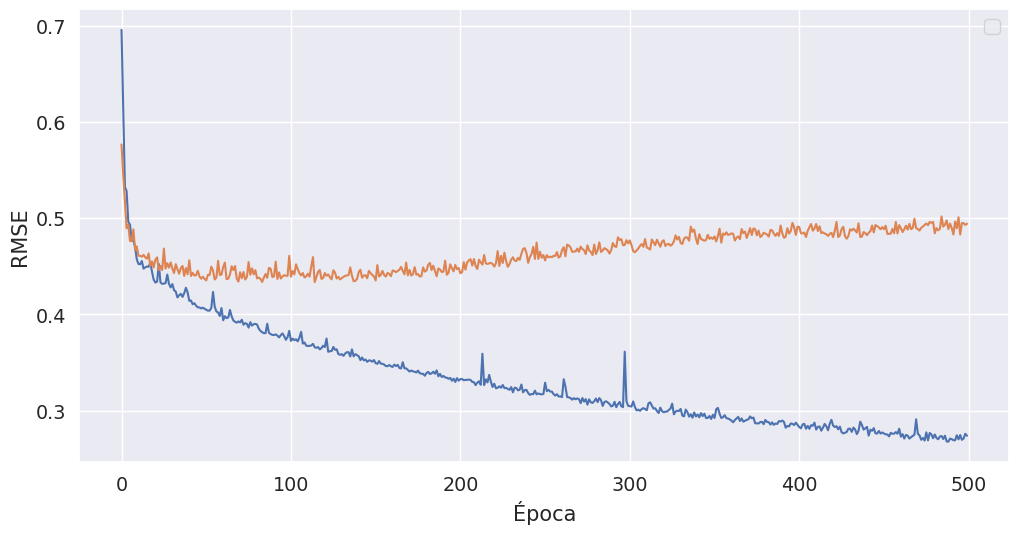

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 26s - loss: 0.6681

1472/6000 [======>.......................] - ETA: 0s - loss: 0.7217 

2944/6000 [=============>................] - ETA: 0s - loss: 0.6260

4448/6000 [=====================>........] - ETA: 0s - loss: 0.5836

5952/6000 [============================>.] - ETA: 0s - loss: 0.5543

6000/6000 [==============================] - 0s 74us/step - loss: 0.5529 - val_loss: 0.3826


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6672

1536/6000 [======>.......................] - ETA: 0s - loss: 0.7058

3040/6000 [==============>...............] - ETA: 0s - loss: 0.5624

4544/6000 [=====================>........] - ETA: 0s - loss: 0.5265

6000/6000 [==============================] - 0s 47us/step - loss: 0.4960 - val_loss: 0.3275


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3347

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3759

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3781

4512/6000 [=====================>........] - ETA: 0s - loss: 0.3968

6000/6000 [==============================] - 0s 47us/step - loss: 0.3953 - val_loss: 0.2965


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.8267

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3337

3008/6000 [==============>...............] - ETA: 0s - loss: 0.3247

4480/6000 [=====================>........] - ETA: 0s - loss: 0.3574

5952/6000 [============================>.] - ETA: 0s - loss: 0.3545

6000/6000 [==============================] - 0s 47us/step - loss: 0.3552 - val_loss: 0.2757


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3123

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3397

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3443

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3301

6000/6000 [==============================] - 0s 47us/step - loss: 0.3402 - val_loss: 0.2540


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2272

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3199

3008/6000 [==============>...............] - ETA: 0s - loss: 0.3180

4512/6000 [=====================>........] - ETA: 0s - loss: 0.3202

6000/6000 [==============================] - 0s 47us/step - loss: 0.3183 - val_loss: 0.2521


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1923

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3085

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2961

4544/6000 [=====================>........] - ETA: 0s - loss: 0.3000

6000/6000 [==============================] - 0s 47us/step - loss: 0.2894 - val_loss: 0.2430


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2158

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3150

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3001

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2960

6000/6000 [==============================] - 0s 46us/step - loss: 0.2908 - val_loss: 0.2357


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2516

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3216

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3042

4608/6000 [======================>.......] - ETA: 0s - loss: 0.3089

6000/6000 [==============================] - 0s 45us/step - loss: 0.2971 - val_loss: 0.2354


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2904

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2814

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2808

6000/6000 [==============================] - 0s 45us/step - loss: 0.2764 - val_loss: 0.2292


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2884

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2382

2976/6000 [=============>................] - ETA: 0s - loss: 0.2695

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2671

5952/6000 [============================>.] - ETA: 0s - loss: 0.2678

6000/6000 [==============================] - 0s 46us/step - loss: 0.2700 - val_loss: 0.2255


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3678

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3171

3008/6000 [==============>...............] - ETA: 0s - loss: 0.3029

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2872

6000/6000 [==============================] - 0s 45us/step - loss: 0.2852 - val_loss: 0.2230


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2838

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2546

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2757

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2759

5984/6000 [============================>.] - ETA: 0s - loss: 0.2677

6000/6000 [==============================] - 0s 46us/step - loss: 0.2678 - val_loss: 0.2226


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1666

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2689

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2675

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2634

6000/6000 [==============================] - 0s 45us/step - loss: 0.2609 - val_loss: 0.2244


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1129

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2592

2912/6000 [=============>................] - ETA: 0s - loss: 0.2533

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2544

5920/6000 [============================>.] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 47us/step - loss: 0.2544 - val_loss: 0.2229


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4206

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2630

2912/6000 [=============>................] - ETA: 0s - loss: 0.2527

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2551

5920/6000 [============================>.] - ETA: 0s - loss: 0.2551

6000/6000 [==============================] - 0s 47us/step - loss: 0.2548 - val_loss: 0.2192


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2746

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2587

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2520

6000/6000 [==============================] - 0s 46us/step - loss: 0.2538 - val_loss: 0.2196


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2503

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2572

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2574

6000/6000 [==============================] - 0s 45us/step - loss: 0.2547 - val_loss: 0.2217


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2028

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2392

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2591

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2519

6000/6000 [==============================] - 0s 45us/step - loss: 0.2472 - val_loss: 0.2165


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2279

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2777

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2658

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2459

6000/6000 [==============================] - 0s 45us/step - loss: 0.2537 - val_loss: 0.2206


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2405

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2356

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2428

6000/6000 [==============================] - 0s 45us/step - loss: 0.2446 - val_loss: 0.2116


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3944

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2393

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2341

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 45us/step - loss: 0.2376 - val_loss: 0.2100


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2231

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2369

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2492

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 45us/step - loss: 0.2403 - val_loss: 0.2174


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2154

2976/6000 [=============>................] - ETA: 0s - loss: 0.2407

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2406

5920/6000 [============================>.] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 46us/step - loss: 0.2397 - val_loss: 0.2147


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2197

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2246

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2355

6000/6000 [==============================] - 0s 45us/step - loss: 0.2397 - val_loss: 0.2110


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1713

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2318

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2355

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 45us/step - loss: 0.2433 - val_loss: 0.2132


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2282

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2255

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2226

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 45us/step - loss: 0.2403 - val_loss: 0.2152


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1588

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2548

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2485

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 45us/step - loss: 0.2368 - val_loss: 0.2126


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2353

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2301

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 45us/step - loss: 0.2332 - val_loss: 0.2102


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1972

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2106

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2328

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2290

5952/6000 [============================>.] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 46us/step - loss: 0.2288 - val_loss: 0.2069


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3273

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2338

2976/6000 [=============>................] - ETA: 0s - loss: 0.2318

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2337

5952/6000 [============================>.] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 46us/step - loss: 0.2318 - val_loss: 0.2083


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2236

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2199

2976/6000 [=============>................] - ETA: 0s - loss: 0.2346

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2312

5984/6000 [============================>.] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 47us/step - loss: 0.2316 - val_loss: 0.2066


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2335

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 46us/step - loss: 0.2330 - val_loss: 0.2067


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2033

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2351

2976/6000 [=============>................] - ETA: 0s - loss: 0.2475

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 45us/step - loss: 0.2334 - val_loss: 0.2070


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2187

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2443

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 46us/step - loss: 0.2324 - val_loss: 0.2034


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2261

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2320

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2320

5984/6000 [============================>.] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 46us/step - loss: 0.2258 - val_loss: 0.2035


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2235

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2271

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 46us/step - loss: 0.2252 - val_loss: 0.2024


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2235

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2409

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2365

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 45us/step - loss: 0.2281 - val_loss: 0.2021


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2266

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2188

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 45us/step - loss: 0.2249 - val_loss: 0.2018


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2182

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2283

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2325

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 45us/step - loss: 0.2290 - val_loss: 0.2059


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2596

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2189

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2221

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2277

5984/6000 [============================>.] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 46us/step - loss: 0.2228 - val_loss: 0.2008


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2209

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2261

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 46us/step - loss: 0.2229 - val_loss: 0.2002


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3030

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2052

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2081

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2149

6000/6000 [==============================] - 0s 45us/step - loss: 0.2234 - val_loss: 0.2025


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4841

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2409

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2287

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 45us/step - loss: 0.2299 - val_loss: 0.1996


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2869

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2053

2976/6000 [=============>................] - ETA: 0s - loss: 0.2271

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2259

5984/6000 [============================>.] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 45us/step - loss: 0.2217 - val_loss: 0.2004


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2266

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2153

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 45us/step - loss: 0.2151 - val_loss: 0.1962


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2054

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2174

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 45us/step - loss: 0.2254 - val_loss: 0.1965


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2352

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2295

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2090

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 45us/step - loss: 0.2130 - val_loss: 0.1993


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2020

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2044

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 45us/step - loss: 0.2162 - val_loss: 0.1982


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3497

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2025

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2080

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 45us/step - loss: 0.2138 - val_loss: 0.1969


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2130

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2156

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 45us/step - loss: 0.2210 - val_loss: 0.1988


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2037

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2483

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2363

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 45us/step - loss: 0.2247 - val_loss: 0.2013


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1990

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2025

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 45us/step - loss: 0.2183 - val_loss: 0.1956


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1978

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2121

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 45us/step - loss: 0.2198 - val_loss: 0.1985


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2365

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2226

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 45us/step - loss: 0.2211 - val_loss: 0.1936


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1534

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2378

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2135

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 45us/step - loss: 0.2162 - val_loss: 0.1946


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2523

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2116

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2152

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 45us/step - loss: 0.2171 - val_loss: 0.1990


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2112

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1990

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2054

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 45us/step - loss: 0.2124 - val_loss: 0.1928


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1942

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2052

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2130

6000/6000 [==============================] - 0s 45us/step - loss: 0.2123 - val_loss: 0.1934


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2436

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2013

2944/6000 [=============>................] - ETA: 0s - loss: 0.2096

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2086

5952/6000 [============================>.] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 47us/step - loss: 0.2131 - val_loss: 0.1915


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2060

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2073

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 45us/step - loss: 0.2126 - val_loss: 0.1915


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1934

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2022

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2085

6000/6000 [==============================] - 0s 45us/step - loss: 0.2156 - val_loss: 0.1984


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3507

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1991

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2024

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 45us/step - loss: 0.2097 - val_loss: 0.2011


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2146

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2136

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 45us/step - loss: 0.2113 - val_loss: 0.1960


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2831

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2068

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2251

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 45us/step - loss: 0.2207 - val_loss: 0.1934


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1714

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1977

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2057

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2039

6000/6000 [==============================] - 0s 45us/step - loss: 0.2081 - val_loss: 0.1939


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2820

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2048

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2096

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 45us/step - loss: 0.2112 - val_loss: 0.1922


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2641

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2103

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2119

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2074

6000/6000 [==============================] - 0s 45us/step - loss: 0.2081 - val_loss: 0.1884


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1204

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2036

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2136

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2098

6000/6000 [==============================] - 0s 45us/step - loss: 0.2072 - val_loss: 0.1946


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3596

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1971

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2170

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2133

6000/6000 [==============================] - 0s 45us/step - loss: 0.2058 - val_loss: 0.1953


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2029

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2082

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 45us/step - loss: 0.2078 - val_loss: 0.1889


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5042

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2153

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2144

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 45us/step - loss: 0.2105 - val_loss: 0.1918


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3435

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2167

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2105

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2093

6000/6000 [==============================] - 0s 45us/step - loss: 0.2113 - val_loss: 0.1913


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3941

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2189

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2032

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 45us/step - loss: 0.2066 - val_loss: 0.1967


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2253

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2160

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2091

6000/6000 [==============================] - 0s 45us/step - loss: 0.2057 - val_loss: 0.1914


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1824

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2151

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2134

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 45us/step - loss: 0.2050 - val_loss: 0.1902


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1960

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2016

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 44us/step - loss: 0.2080 - val_loss: 0.1907


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2078

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2084

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2074

6000/6000 [==============================] - 0s 45us/step - loss: 0.2077 - val_loss: 0.1897


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2098

2976/6000 [=============>................] - ETA: 0s - loss: 0.2072

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2083

5888/6000 [============================>.] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 46us/step - loss: 0.2059 - val_loss: 0.1845


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2473

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2069

2976/6000 [=============>................] - ETA: 0s - loss: 0.2025

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2100

5952/6000 [============================>.] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 46us/step - loss: 0.2043 - val_loss: 0.1891


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2864

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2303

2880/6000 [=============>................] - ETA: 0s - loss: 0.2176

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2085

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 48us/step - loss: 0.2061 - val_loss: 0.1871


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2102

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1877

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1914

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2028

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2009

6000/6000 [==============================] - 0s 47us/step - loss: 0.2031 - val_loss: 0.1936


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2085

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1963

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2007

6000/6000 [==============================] - 0s 45us/step - loss: 0.2020 - val_loss: 0.1887


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2758

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2032

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2035

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2029

5952/6000 [============================>.] - ETA: 0s - loss: 0.2053

6000/6000 [==============================] - 0s 47us/step - loss: 0.2062 - val_loss: 0.1910


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1949

2816/6000 [=============>................] - ETA: 0s - loss: 0.2022

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2038

5824/6000 [============================>.] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 47us/step - loss: 0.2045 - val_loss: 0.1960


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3142

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1999

2944/6000 [=============>................] - ETA: 0s - loss: 0.1950

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1982

5952/6000 [============================>.] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 46us/step - loss: 0.2028 - val_loss: 0.1889


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2086

2944/6000 [=============>................] - ETA: 0s - loss: 0.2026

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2016

5824/6000 [============================>.] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 47us/step - loss: 0.2060 - val_loss: 0.1960


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2234

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2202

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 45us/step - loss: 0.2116 - val_loss: 0.1887


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2063

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1920

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1928

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2041

6000/6000 [==============================] - 0s 45us/step - loss: 0.2048 - val_loss: 0.1881


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1248/6000 [=====>........................] - ETA: 0s - loss: 0.1912

2496/6000 [===========>..................] - ETA: 0s - loss: 0.2013

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1996

5440/6000 [==========================>...] - ETA: 0s - loss: 0.2054

6000/6000 [==============================] - 0s 49us/step - loss: 0.2037 - val_loss: 0.1876


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1997

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2088

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2064

6000/6000 [==============================] - 0s 45us/step - loss: 0.2032 - val_loss: 0.1855


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1595

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2008

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1932

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2003

6000/6000 [==============================] - 0s 45us/step - loss: 0.2017 - val_loss: 0.1925


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3430

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1903

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1995

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2054

6000/6000 [==============================] - 0s 45us/step - loss: 0.2034 - val_loss: 0.1880


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2015

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2037

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2081

6000/6000 [==============================] - 0s 45us/step - loss: 0.2037 - val_loss: 0.1858


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2017

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2026

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2044

6000/6000 [==============================] - 0s 45us/step - loss: 0.1975 - val_loss: 0.1875


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3280

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2255

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2131

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 45us/step - loss: 0.2023 - val_loss: 0.1849


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2018

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1969

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 44us/step - loss: 0.1977 - val_loss: 0.1844


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0717

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2078

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2145

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1978

5984/6000 [============================>.] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 46us/step - loss: 0.1993 - val_loss: 0.1853


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1775

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1872

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 45us/step - loss: 0.1968 - val_loss: 0.1875


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2555

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1949

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1945

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2005

6000/6000 [==============================] - 0s 45us/step - loss: 0.2033 - val_loss: 0.1841


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2444

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1933

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1911

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 45us/step - loss: 0.1973 - val_loss: 0.1891


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2191

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2007

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2015

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 45us/step - loss: 0.1940 - val_loss: 0.1837


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1316

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2024

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2072

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2043

6000/6000 [==============================] - 0s 45us/step - loss: 0.2017 - val_loss: 0.1845


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1888

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1880

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1957

5920/6000 [============================>.] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 46us/step - loss: 0.1962 - val_loss: 0.1921


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1736

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1931

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2044

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1979

6000/6000 [==============================] - 0s 45us/step - loss: 0.2007 - val_loss: 0.1872


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1737

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1930

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1935

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1972

6000/6000 [==============================] - 0s 45us/step - loss: 0.1986 - val_loss: 0.1893


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 2.1832

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2306

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2209

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 45us/step - loss: 0.2135 - val_loss: 0.1879


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2509

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1832

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1946

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2007

6000/6000 [==============================] - 0s 45us/step - loss: 0.1996 - val_loss: 0.1902


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2505

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1932

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1904

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 45us/step - loss: 0.1960 - val_loss: 0.1823


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2585

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2088

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1980

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2019

6000/6000 [==============================] - 0s 45us/step - loss: 0.2021 - val_loss: 0.1847


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1861

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1931

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 45us/step - loss: 0.1986 - val_loss: 0.1859


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1955

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1919

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1944

6000/6000 [==============================] - 0s 45us/step - loss: 0.1953 - val_loss: 0.1837


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2102

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2095

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1988

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 45us/step - loss: 0.1977 - val_loss: 0.1850


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1924

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1872

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1894

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1994

6000/6000 [==============================] - 0s 44us/step - loss: 0.1965 - val_loss: 0.1838


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1858

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1936

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 45us/step - loss: 0.1943 - val_loss: 0.1840


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1740

2976/6000 [=============>................] - ETA: 0s - loss: 0.1920

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1934

5952/6000 [============================>.] - ETA: 0s - loss: 0.1963

6000/6000 [==============================] - 0s 46us/step - loss: 0.1957 - val_loss: 0.1841


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1845

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1912

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1913

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 45us/step - loss: 0.1930 - val_loss: 0.1913


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5354

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1883

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1937

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 45us/step - loss: 0.1938 - val_loss: 0.1849


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3665

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2085

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1951

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1989

6000/6000 [==============================] - 0s 45us/step - loss: 0.1959 - val_loss: 0.1844


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1918

2976/6000 [=============>................] - ETA: 0s - loss: 0.1920

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1954

5984/6000 [============================>.] - ETA: 0s - loss: 0.1933

6000/6000 [==============================] - 0s 46us/step - loss: 0.1934 - val_loss: 0.1880


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1981

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1999

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1939

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2005

5984/6000 [============================>.] - ETA: 0s - loss: 0.1977

6000/6000 [==============================] - 0s 47us/step - loss: 0.1981 - val_loss: 0.1889


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2489

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2007

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1914

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1950

6000/6000 [==============================] - 0s 45us/step - loss: 0.1969 - val_loss: 0.1852


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2736

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2024

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1932

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1944

5984/6000 [============================>.] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 47us/step - loss: 0.1962 - val_loss: 0.1866


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1975

2976/6000 [=============>................] - ETA: 0s - loss: 0.1935

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1951

5952/6000 [============================>.] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 46us/step - loss: 0.1965 - val_loss: 0.1877


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3533

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2113

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2063

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1996

6000/6000 [==============================] - 0s 45us/step - loss: 0.1973 - val_loss: 0.1845


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1797

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1812

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1872

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1878

5984/6000 [============================>.] - ETA: 0s - loss: 0.1936

6000/6000 [==============================] - 0s 46us/step - loss: 0.1937 - val_loss: 0.1903


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2571

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2042

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1952

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 45us/step - loss: 0.1955 - val_loss: 0.1844


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0829

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1883

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1944

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2006

6000/6000 [==============================] - 0s 45us/step - loss: 0.1989 - val_loss: 0.1854


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2362

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1978

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1942

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1976

6000/6000 [==============================] - 0s 45us/step - loss: 0.1944 - val_loss: 0.1862


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3832

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1906

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1990

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 45us/step - loss: 0.1942 - val_loss: 0.1854


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2019

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2053

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2011

5920/6000 [============================>.] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 46us/step - loss: 0.1980 - val_loss: 0.1829


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1224

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2021

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2130

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1989

6000/6000 [==============================] - 0s 45us/step - loss: 0.1951 - val_loss: 0.1914


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3416

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1936

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1881

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 46us/step - loss: 0.1969 - val_loss: 0.1846


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1799

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1692

2688/6000 [============>.................] - ETA: 0s - loss: 0.1782

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1811

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 48us/step - loss: 0.1896 - val_loss: 0.1892


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1917

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1976

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 45us/step - loss: 0.1936 - val_loss: 0.1921


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1806

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1867

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 45us/step - loss: 0.1869 - val_loss: 0.1854


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1844

2976/6000 [=============>................] - ETA: 0s - loss: 0.1921

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1941

5888/6000 [============================>.] - ETA: 0s - loss: 0.1948

6000/6000 [==============================] - 0s 46us/step - loss: 0.1944 - val_loss: 0.1891


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2588

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1975

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1967

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 45us/step - loss: 0.1935 - val_loss: 0.1913


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1715

2976/6000 [=============>................] - ETA: 0s - loss: 0.1838

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1858

5984/6000 [============================>.] - ETA: 0s - loss: 0.1925

6000/6000 [==============================] - 0s 46us/step - loss: 0.1925 - val_loss: 0.1833


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1687

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1927

2944/6000 [=============>................] - ETA: 0s - loss: 0.1936

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1929

5984/6000 [============================>.] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 46us/step - loss: 0.1925 - val_loss: 0.1865


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2214

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1962

2976/6000 [=============>................] - ETA: 0s - loss: 0.2019

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1924

5984/6000 [============================>.] - ETA: 0s - loss: 0.1933

6000/6000 [==============================] - 0s 45us/step - loss: 0.1932 - val_loss: 0.1846


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2070

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1894

2944/6000 [=============>................] - ETA: 0s - loss: 0.1840

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1929

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 48us/step - loss: 0.1907 - val_loss: 0.1886


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2434

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1858

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2032

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 45us/step - loss: 0.1953 - val_loss: 0.1894


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2045

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2051

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2001

6000/6000 [==============================] - 0s 45us/step - loss: 0.1958 - val_loss: 0.1898


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1777

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1839

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1883

5952/6000 [============================>.] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 46us/step - loss: 0.1907 - val_loss: 0.1883


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1847

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1886

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 45us/step - loss: 0.1911 - val_loss: 0.1881


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1895

2848/6000 [=============>................] - ETA: 0s - loss: 0.1906

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1945

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 48us/step - loss: 0.1893 - val_loss: 0.1870


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1898

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1858

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1858

5952/6000 [============================>.] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 47us/step - loss: 0.1938 - val_loss: 0.1872


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1731

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1839

2848/6000 [=============>................] - ETA: 0s - loss: 0.1892

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1925

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1932

6000/6000 [==============================] - 0s 47us/step - loss: 0.1958 - val_loss: 0.1846


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2005

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1925

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 45us/step - loss: 0.1902 - val_loss: 0.1901


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2005

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1932

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1934

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 45us/step - loss: 0.1954 - val_loss: 0.1889


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1885

2976/6000 [=============>................] - ETA: 0s - loss: 0.1863

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1866

5984/6000 [============================>.] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 46us/step - loss: 0.1911 - val_loss: 0.1821


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2630

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1847

2848/6000 [=============>................] - ETA: 0s - loss: 0.1788

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1816

5824/6000 [============================>.] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 47us/step - loss: 0.1890 - val_loss: 0.1891


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5522

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1853

2944/6000 [=============>................] - ETA: 0s - loss: 0.1899

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1858

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 49us/step - loss: 0.1894 - val_loss: 0.1889


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2157

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1885

2976/6000 [=============>................] - ETA: 0s - loss: 0.1959

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1944

5824/6000 [============================>.] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 48us/step - loss: 0.1941 - val_loss: 0.1880


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3693

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2238

2880/6000 [=============>................] - ETA: 0s - loss: 0.2089

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1992

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 47us/step - loss: 0.1976 - val_loss: 0.1844


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0478

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1947

2848/6000 [=============>................] - ETA: 0s - loss: 0.1873

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1899

5856/6000 [============================>.] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 46us/step - loss: 0.1881 - val_loss: 0.1835


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1850

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1892

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 45us/step - loss: 0.1921 - val_loss: 0.1835


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2519

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1863

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1875

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 45us/step - loss: 0.1903 - val_loss: 0.1814


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1765

2976/6000 [=============>................] - ETA: 0s - loss: 0.1844

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1803

5984/6000 [============================>.] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 46us/step - loss: 0.1880 - val_loss: 0.1819


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2151

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1900

2752/6000 [============>.................] - ETA: 0s - loss: 0.1858

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1931

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 51us/step - loss: 0.1907 - val_loss: 0.1859


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1093

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1929

2944/6000 [=============>................] - ETA: 0s - loss: 0.1921

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1987

5952/6000 [============================>.] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 46us/step - loss: 0.1942 - val_loss: 0.1860


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1747

2976/6000 [=============>................] - ETA: 0s - loss: 0.1796

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1914

5952/6000 [============================>.] - ETA: 0s - loss: 0.1881

6000/6000 [==============================] - 0s 48us/step - loss: 0.1874 - val_loss: 0.1881


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3984

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1872

2944/6000 [=============>................] - ETA: 0s - loss: 0.1886

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1859

5920/6000 [============================>.] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 46us/step - loss: 0.1893 - val_loss: 0.1880


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1649

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1824

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1925

6000/6000 [==============================] - 0s 46us/step - loss: 0.1943 - val_loss: 0.1829


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1893

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1876

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 45us/step - loss: 0.1850 - val_loss: 0.1866


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1670

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1854

2976/6000 [=============>................] - ETA: 0s - loss: 0.1803

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1856

5952/6000 [============================>.] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 46us/step - loss: 0.1863 - val_loss: 0.1896


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2592

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1900

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1820

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 45us/step - loss: 0.1877 - val_loss: 0.1847


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2092

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1840

2880/6000 [=============>................] - ETA: 0s - loss: 0.1827

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1863

5856/6000 [============================>.] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 48us/step - loss: 0.1867 - val_loss: 0.1910


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1255

1280/6000 [=====>........................] - ETA: 0s - loss: 0.1922

2688/6000 [============>.................] - ETA: 0s - loss: 0.1866

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1895

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 48us/step - loss: 0.1912 - val_loss: 0.1870


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1785

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1760

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 45us/step - loss: 0.1854 - val_loss: 0.1932


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2752

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1848

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1875

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 46us/step - loss: 0.1872 - val_loss: 0.1825


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3299

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1714

2944/6000 [=============>................] - ETA: 0s - loss: 0.1733

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1795

5824/6000 [============================>.] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 47us/step - loss: 0.1845 - val_loss: 0.1899


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1594

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2010

2944/6000 [=============>................] - ETA: 0s - loss: 0.1870

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1878

5952/6000 [============================>.] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 46us/step - loss: 0.1898 - val_loss: 0.1897


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1878

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1784

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 45us/step - loss: 0.1864 - val_loss: 0.1892


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1907

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1939

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 45us/step - loss: 0.1872 - val_loss: 0.1804


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1683

2976/6000 [=============>................] - ETA: 0s - loss: 0.1849

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 45us/step - loss: 0.1858 - val_loss: 0.1869


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1742

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1858

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1831

6000/6000 [==============================] - 0s 46us/step - loss: 0.1842 - val_loss: 0.1871


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1907

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1920

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 45us/step - loss: 0.1890 - val_loss: 0.1837


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1986

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1865

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 45us/step - loss: 0.1849 - val_loss: 0.1941


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2765

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2075

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2013

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 45us/step - loss: 0.1910 - val_loss: 0.1896


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1904

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1859

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 45us/step - loss: 0.1880 - val_loss: 0.1857


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1076

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1717

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1776

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1820

6000/6000 [==============================] - 0s 45us/step - loss: 0.1913 - val_loss: 0.1846


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1698

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1771

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 45us/step - loss: 0.1874 - val_loss: 0.1873


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1558

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1793

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1897

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1929

6000/6000 [==============================] - 0s 46us/step - loss: 0.1915 - val_loss: 0.1887


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1122

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1879

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1889

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 45us/step - loss: 0.1882 - val_loss: 0.1873


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3376

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1774

2976/6000 [=============>................] - ETA: 0s - loss: 0.1827

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1870

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 47us/step - loss: 0.1873 - val_loss: 0.1872


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1673

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1899

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1892

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1897

5952/6000 [============================>.] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 46us/step - loss: 0.1877 - val_loss: 0.1808


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1913

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1902

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1858

5920/6000 [============================>.] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 46us/step - loss: 0.1899 - val_loss: 0.1915


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2053

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2026

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1914

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1947

5984/6000 [============================>.] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 46us/step - loss: 0.1891 - val_loss: 0.1852


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1351

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1768

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1803

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 45us/step - loss: 0.1905 - val_loss: 0.1842


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2922

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1839

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1857

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1817

5920/6000 [============================>.] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 46us/step - loss: 0.1813 - val_loss: 0.1908


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1870

2976/6000 [=============>................] - ETA: 0s - loss: 0.1800

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1805

5952/6000 [============================>.] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 46us/step - loss: 0.1933 - val_loss: 0.1974


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1459

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1789

2976/6000 [=============>................] - ETA: 0s - loss: 0.1885

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1801

5984/6000 [============================>.] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 46us/step - loss: 0.1841 - val_loss: 0.1884


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1919

2976/6000 [=============>................] - ETA: 0s - loss: 0.1797

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1821

5984/6000 [============================>.] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 46us/step - loss: 0.1870 - val_loss: 0.1835


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1685

2976/6000 [=============>................] - ETA: 0s - loss: 0.1769

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 45us/step - loss: 0.1857 - val_loss: 0.1840


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1926

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1861

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1922

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 45us/step - loss: 0.1821 - val_loss: 0.1867


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2245

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1816

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1812

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 45us/step - loss: 0.1860 - val_loss: 0.1817


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1905

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1874

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 45us/step - loss: 0.1873 - val_loss: 0.1864


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1944

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1870

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 45us/step - loss: 0.1849 - val_loss: 0.1850


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1763

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1805

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 46us/step - loss: 0.1873 - val_loss: 0.1853


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1077

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1832

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1828

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1831

5984/6000 [============================>.] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 48us/step - loss: 0.1827 - val_loss: 0.1918


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1770

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1862

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 46us/step - loss: 0.1845 - val_loss: 0.1878


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1578

2784/6000 [============>.................] - ETA: 0s - loss: 0.1700

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1766

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 55us/step - loss: 0.1786 - val_loss: 0.1887


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2300

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1870

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1891

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 46us/step - loss: 0.1873 - val_loss: 0.1899


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1980

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1918

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 45us/step - loss: 0.1872 - val_loss: 0.1857


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1780

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 47us/step - loss: 0.1811 - val_loss: 0.1953


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1876

2976/6000 [=============>................] - ETA: 0s - loss: 0.1803

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1834

5888/6000 [============================>.] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 48us/step - loss: 0.1835 - val_loss: 0.1873


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1926

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1933

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 46us/step - loss: 0.1869 - val_loss: 0.1859


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3072

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1738

2944/6000 [=============>................] - ETA: 0s - loss: 0.1794

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1790

5888/6000 [============================>.] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 46us/step - loss: 0.1803 - val_loss: 0.1821


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2538

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1889

2976/6000 [=============>................] - ETA: 0s - loss: 0.1817

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1817

5920/6000 [============================>.] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 46us/step - loss: 0.1857 - val_loss: 0.1903


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1166

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1770

2752/6000 [============>.................] - ETA: 0s - loss: 0.1849

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1811

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 47us/step - loss: 0.1839 - val_loss: 0.1844


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1788

2848/6000 [=============>................] - ETA: 0s - loss: 0.1797

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1853

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 47us/step - loss: 0.1894 - val_loss: 0.1860


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1701

2816/6000 [=============>................] - ETA: 0s - loss: 0.1743

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1792

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 47us/step - loss: 0.1857 - val_loss: 0.1863


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1962

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1852

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1882

5984/6000 [============================>.] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 46us/step - loss: 0.1892 - val_loss: 0.1909


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1652

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1899

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1928

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 46us/step - loss: 0.1856 - val_loss: 0.1838


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1886

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1854

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 45us/step - loss: 0.1877 - val_loss: 0.1871


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1892

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1945

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 45us/step - loss: 0.1840 - val_loss: 0.1850


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1791

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1773

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 45us/step - loss: 0.1860 - val_loss: 0.1896


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1755

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1818

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 45us/step - loss: 0.1822 - val_loss: 0.1839


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1829

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 45us/step - loss: 0.1816 - val_loss: 0.1884


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1743

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1758

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 45us/step - loss: 0.1821 - val_loss: 0.1842


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1999

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1900

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 45us/step - loss: 0.1832 - val_loss: 0.1891


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1826

2976/6000 [=============>................] - ETA: 0s - loss: 0.1831

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1814

5984/6000 [============================>.] - ETA: 0s - loss: 0.1853

6000/6000 [==============================] - 0s 46us/step - loss: 0.1850 - val_loss: 0.1911


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1825

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1835

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 45us/step - loss: 0.1818 - val_loss: 0.1872


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1646

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1813

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 45us/step - loss: 0.1817 - val_loss: 0.1855


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1691

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1803

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 45us/step - loss: 0.1842 - val_loss: 0.1831


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1752

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1788

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1835

5984/6000 [============================>.] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 47us/step - loss: 0.1839 - val_loss: 0.1838


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1623

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1818

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 45us/step - loss: 0.1841 - val_loss: 0.1842


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1615

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1710

2880/6000 [=============>................] - ETA: 0s - loss: 0.1790

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1830

5888/6000 [============================>.] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 46us/step - loss: 0.1811 - val_loss: 0.1844


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1789

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1836

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 45us/step - loss: 0.1854 - val_loss: 0.1874


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0814

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1826

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1833

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 45us/step - loss: 0.1848 - val_loss: 0.1860


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0952

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2008

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1954

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 45us/step - loss: 0.1849 - val_loss: 0.1836


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1853

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1848

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 45us/step - loss: 0.1881 - val_loss: 0.1847


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1847

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1839

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 45us/step - loss: 0.1886 - val_loss: 0.1842


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1880

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1788

2944/6000 [=============>................] - ETA: 0s - loss: 0.1760

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1790

5920/6000 [============================>.] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 46us/step - loss: 0.1814 - val_loss: 0.1857


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2811

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1810

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1795

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 45us/step - loss: 0.1788 - val_loss: 0.1846


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1885

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1928

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 45us/step - loss: 0.1844 - val_loss: 0.1847


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1902

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1954

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 45us/step - loss: 0.1869 - val_loss: 0.1843


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0740

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1804

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1882

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 45us/step - loss: 0.1903 - val_loss: 0.1828


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1460

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1589

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1740

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 45us/step - loss: 0.1778 - val_loss: 0.1886


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1759

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1826

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 45us/step - loss: 0.1814 - val_loss: 0.1902


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1897

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1893

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 45us/step - loss: 0.1825 - val_loss: 0.1871


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1765

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1784

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1736

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 45us/step - loss: 0.1805 - val_loss: 0.1924


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0999

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1800

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1812

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 45us/step - loss: 0.1834 - val_loss: 0.1860


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2398

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1669

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1736

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 45us/step - loss: 0.1808 - val_loss: 0.1857


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3164

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1838

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1816

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 46us/step - loss: 0.1814 - val_loss: 0.1853


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2360

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1962

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1871

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1885

6000/6000 [==============================] - 0s 45us/step - loss: 0.1858 - val_loss: 0.1817


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1811

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1836

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 44us/step - loss: 0.1836 - val_loss: 0.1884


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2066

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1947

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1915

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 45us/step - loss: 0.1813 - val_loss: 0.1887


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1823

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1647

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1737

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 45us/step - loss: 0.1798 - val_loss: 0.1854


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1728

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 46us/step - loss: 0.1777 - val_loss: 0.1810


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1691

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1948

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1909

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 45us/step - loss: 0.1848 - val_loss: 0.1827


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2402

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1845

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1726

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 45us/step - loss: 0.1780 - val_loss: 0.1854


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0725

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1616

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1796

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 44us/step - loss: 0.1835 - val_loss: 0.1848


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2948

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1813

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1856

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 45us/step - loss: 0.1856 - val_loss: 0.1953


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1808

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 45us/step - loss: 0.1836 - val_loss: 0.1880


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1941

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1690

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1748

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 46us/step - loss: 0.1801 - val_loss: 0.1921


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1605

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1722

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 45us/step - loss: 0.1825 - val_loss: 0.1875


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2940

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1876

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1874

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 45us/step - loss: 0.1812 - val_loss: 0.1916


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1752

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 45us/step - loss: 0.1820 - val_loss: 0.1882


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1114

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1980

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1816

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 45us/step - loss: 0.1834 - val_loss: 0.1910


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0664

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1837

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1798

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 46us/step - loss: 0.1794 - val_loss: 0.1862


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1158

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1807

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1768

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 45us/step - loss: 0.1814 - val_loss: 0.1909


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1303

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1711

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1801

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 45us/step - loss: 0.1781 - val_loss: 0.1839


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1802

2976/6000 [=============>................] - ETA: 0s - loss: 0.1691

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1740

5952/6000 [============================>.] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 46us/step - loss: 0.1794 - val_loss: 0.1836


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2701

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1894

2976/6000 [=============>................] - ETA: 0s - loss: 0.1791

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1779

5952/6000 [============================>.] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 46us/step - loss: 0.1785 - val_loss: 0.1895


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2229

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1739

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1913

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 45us/step - loss: 0.1824 - val_loss: 0.1844


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1565

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1812

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 45us/step - loss: 0.1784 - val_loss: 0.1850


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1647

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1708

2976/6000 [=============>................] - ETA: 0s - loss: 0.1790

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1790

5920/6000 [============================>.] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 46us/step - loss: 0.1791 - val_loss: 0.1860


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1821

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1773

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 45us/step - loss: 0.1800 - val_loss: 0.1831


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3611

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1891

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1887

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 45us/step - loss: 0.1861 - val_loss: 0.1847


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1673

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1791

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 45us/step - loss: 0.1761 - val_loss: 0.1883


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2723

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1815

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1728

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 45us/step - loss: 0.1804 - val_loss: 0.1842


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1850

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1794

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 46us/step - loss: 0.1809 - val_loss: 0.1880


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0771

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1732

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1837

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 45us/step - loss: 0.1804 - val_loss: 0.1815


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1726

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1749

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 45us/step - loss: 0.1810 - val_loss: 0.1842


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1707

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1755

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1796

5984/6000 [============================>.] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 46us/step - loss: 0.1776 - val_loss: 0.1841


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1961

2976/6000 [=============>................] - ETA: 0s - loss: 0.1908

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1877

5920/6000 [============================>.] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 46us/step - loss: 0.1842 - val_loss: 0.1830


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1784

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1743

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1768

5920/6000 [============================>.] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 47us/step - loss: 0.1786 - val_loss: 0.1878


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1895

2976/6000 [=============>................] - ETA: 0s - loss: 0.1924

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 45us/step - loss: 0.1868 - val_loss: 0.1870


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1755

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1787

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 45us/step - loss: 0.1773 - val_loss: 0.1872


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1756

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1728

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1742

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 46us/step - loss: 0.1765 - val_loss: 0.1874


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1817

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1796

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 45us/step - loss: 0.1815 - val_loss: 0.1864


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1876

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1841

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 45us/step - loss: 0.1790 - val_loss: 0.1887


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1696

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1825

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 45us/step - loss: 0.1821 - val_loss: 0.1836


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1109

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1684

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1781

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 45us/step - loss: 0.1830 - val_loss: 0.1836


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1241

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1742

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1739

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1801

6000/6000 [==============================] - 0s 45us/step - loss: 0.1780 - val_loss: 0.1878


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1628

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1805

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 45us/step - loss: 0.1770 - val_loss: 0.1846


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1225

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1752

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1760

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 46us/step - loss: 0.1741 - val_loss: 0.1878


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1672

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 45us/step - loss: 0.1797 - val_loss: 0.1839


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1696

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1693

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 45us/step - loss: 0.1725 - val_loss: 0.1893


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1089

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1704

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1724

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 45us/step - loss: 0.1804 - val_loss: 0.1876


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1926

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1840

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 45us/step - loss: 0.1830 - val_loss: 0.1884


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1836

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1893

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1814

5984/6000 [============================>.] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 46us/step - loss: 0.1811 - val_loss: 0.1904


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1860

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1696

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1782

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 45us/step - loss: 0.1764 - val_loss: 0.1872


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1866

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1811

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 45us/step - loss: 0.1786 - val_loss: 0.1810


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2963

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1735

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1699

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1678

6000/6000 [==============================] - 0s 45us/step - loss: 0.1750 - val_loss: 0.1856


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1958

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1915

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 45us/step - loss: 0.1782 - val_loss: 0.1847


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1896

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1813

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 46us/step - loss: 0.1823 - val_loss: 0.1852


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1705

2976/6000 [=============>................] - ETA: 0s - loss: 0.1806

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 46us/step - loss: 0.1781 - val_loss: 0.1860


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1751

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1760

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 46us/step - loss: 0.1768 - val_loss: 0.1849


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2214

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1978

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1940

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 45us/step - loss: 0.1852 - val_loss: 0.1961


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1811

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1767

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 45us/step - loss: 0.1825 - val_loss: 0.1823


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1894

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1799

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 46us/step - loss: 0.1763 - val_loss: 0.1848


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1939

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1807

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 46us/step - loss: 0.1777 - val_loss: 0.1844


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1737

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 45us/step - loss: 0.1827 - val_loss: 0.1868


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1644

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1769

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1762

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 49us/step - loss: 0.1797 - val_loss: 0.1855


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2381

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1778

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 45us/step - loss: 0.1786 - val_loss: 0.1846


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3416

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1798

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1752

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 45us/step - loss: 0.1791 - val_loss: 0.1886


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1077

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1667

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1776

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 45us/step - loss: 0.1803 - val_loss: 0.1875


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1797

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1867

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1817

5984/6000 [============================>.] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 46us/step - loss: 0.1778 - val_loss: 0.1870


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1739

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1794

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 45us/step - loss: 0.1748 - val_loss: 0.1866


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1673

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1759

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1803

6000/6000 [==============================] - 0s 45us/step - loss: 0.1770 - val_loss: 0.1806


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0932

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1758

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 45us/step - loss: 0.1782 - val_loss: 0.1837


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1631

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1747

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 45us/step - loss: 0.1776 - val_loss: 0.1843


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1662

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1759

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 45us/step - loss: 0.1789 - val_loss: 0.1848


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1731

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1594

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1756

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1765

6000/6000 [==============================] - 0s 45us/step - loss: 0.1782 - val_loss: 0.1926


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1873

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1792

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1771

5984/6000 [============================>.] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 46us/step - loss: 0.1817 - val_loss: 0.1827


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1499

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1803

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1779

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 46us/step - loss: 0.1795 - val_loss: 0.1845


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2263

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1826

2976/6000 [=============>................] - ETA: 0s - loss: 0.1827

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1840

5984/6000 [============================>.] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 46us/step - loss: 0.1819 - val_loss: 0.1856


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1981

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1715

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1805

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1817

6000/6000 [==============================] - 0s 45us/step - loss: 0.1787 - val_loss: 0.1826


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1614

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1708

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 46us/step - loss: 0.1741 - val_loss: 0.1850


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1794

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1710

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1720

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 46us/step - loss: 0.1767 - val_loss: 0.1838


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1601

2944/6000 [=============>................] - ETA: 0s - loss: 0.1748

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1733

5920/6000 [============================>.] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 46us/step - loss: 0.1756 - val_loss: 0.1869


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1676

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 45us/step - loss: 0.1811 - val_loss: 0.1849


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0355

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1707

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1745

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1715

5952/6000 [============================>.] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 46us/step - loss: 0.1767 - val_loss: 0.1854


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1731

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1743

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1778

5984/6000 [============================>.] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 46us/step - loss: 0.1754 - val_loss: 0.1834


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1828

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1689

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 46us/step - loss: 0.1770 - val_loss: 0.1842


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1928

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1858

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 46us/step - loss: 0.1807 - val_loss: 0.1867


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1680

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1755

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 44us/step - loss: 0.1806 - val_loss: 0.1854


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3327

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1733

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 45us/step - loss: 0.1794 - val_loss: 0.1855


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1768

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1721

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 45us/step - loss: 0.1759 - val_loss: 0.1822


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1865

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1799

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 45us/step - loss: 0.1731 - val_loss: 0.1828


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2099

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1592

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1773

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 45us/step - loss: 0.1764 - val_loss: 0.1851


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0671

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1857

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1737

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 45us/step - loss: 0.1738 - val_loss: 0.1836


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4433

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1899

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1808

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 45us/step - loss: 0.1786 - val_loss: 0.1891


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1675

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1682

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 46us/step - loss: 0.1795 - val_loss: 0.1887


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2257

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1747

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1800

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 44us/step - loss: 0.1741 - val_loss: 0.1842


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1723

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1808

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 45us/step - loss: 0.1773 - val_loss: 0.1814


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1703

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1719

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 45us/step - loss: 0.1734 - val_loss: 0.1817


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1680

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1738

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1767

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1753

5952/6000 [============================>.] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 46us/step - loss: 0.1757 - val_loss: 0.1808


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2527

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1750

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1695

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 46us/step - loss: 0.1703 - val_loss: 0.1812


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3261

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1799

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1779

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 45us/step - loss: 0.1774 - val_loss: 0.1839


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1659

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1718

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1710

5952/6000 [============================>.] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 46us/step - loss: 0.1735 - val_loss: 0.1782


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1831

2976/6000 [=============>................] - ETA: 0s - loss: 0.1647

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1680

5952/6000 [============================>.] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 47us/step - loss: 0.1697 - val_loss: 0.1851


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1705

2976/6000 [=============>................] - ETA: 0s - loss: 0.1737

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1793

5984/6000 [============================>.] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 46us/step - loss: 0.1762 - val_loss: 0.1886


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0794

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1873

2944/6000 [=============>................] - ETA: 0s - loss: 0.1877

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 45us/step - loss: 0.1772 - val_loss: 0.1854


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0830

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1800

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1860

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 46us/step - loss: 0.1789 - val_loss: 0.1874


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2449

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1711

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1787

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 45us/step - loss: 0.1816 - val_loss: 0.1853


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3429

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1870

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1759

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1785

5984/6000 [============================>.] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 46us/step - loss: 0.1776 - val_loss: 0.1865


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2130

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1883

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1871

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 45us/step - loss: 0.1811 - val_loss: 0.1824


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2080

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1686

2976/6000 [=============>................] - ETA: 0s - loss: 0.1724

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1718

5984/6000 [============================>.] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 46us/step - loss: 0.1733 - val_loss: 0.1837


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1802

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1696

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 45us/step - loss: 0.1778 - val_loss: 0.1819


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1809

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1760

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 45us/step - loss: 0.1737 - val_loss: 0.1806


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1849

2880/6000 [=============>................] - ETA: 0s - loss: 0.1888

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1846

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 47us/step - loss: 0.1788 - val_loss: 0.1876


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1754

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1816

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 45us/step - loss: 0.1765 - val_loss: 0.1843


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1580

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1706

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 45us/step - loss: 0.1788 - val_loss: 0.1869


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1770

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1552

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 45us/step - loss: 0.1751 - val_loss: 0.1822


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0779

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1707

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1665

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1714

5984/6000 [============================>.] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 47us/step - loss: 0.1781 - val_loss: 0.1834


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1691

2912/6000 [=============>................] - ETA: 0s - loss: 0.1767

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1831

5920/6000 [============================>.] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 46us/step - loss: 0.1777 - val_loss: 0.1796


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2386

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1733

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1817

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 45us/step - loss: 0.1775 - val_loss: 0.1846


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1520

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1699

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 45us/step - loss: 0.1746 - val_loss: 0.1792


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1485

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 45us/step - loss: 0.1744 - val_loss: 0.1833


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1747

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1750

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 45us/step - loss: 0.1727 - val_loss: 0.1877


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1649

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1712

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1687

5984/6000 [============================>.] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 45us/step - loss: 0.1738 - val_loss: 0.1855


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1719

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1794

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 45us/step - loss: 0.1798 - val_loss: 0.1861


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0726

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1567

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 45us/step - loss: 0.1764 - val_loss: 0.1829


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1788

2880/6000 [=============>................] - ETA: 0s - loss: 0.1700

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1735

5888/6000 [============================>.] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 46us/step - loss: 0.1765 - val_loss: 0.1848


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1579

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 45us/step - loss: 0.1734 - val_loss: 0.1828


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1579

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1770

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 45us/step - loss: 0.1767 - val_loss: 0.1808


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1453

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1762

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1656

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 45us/step - loss: 0.1719 - val_loss: 0.1838


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1757

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 45us/step - loss: 0.1750 - val_loss: 0.1848


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1697

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1771

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 45us/step - loss: 0.1744 - val_loss: 0.1819


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1488

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1818

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1752

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 45us/step - loss: 0.1749 - val_loss: 0.1846


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1886

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1823

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 45us/step - loss: 0.1785 - val_loss: 0.1884


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1951

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1657

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1799

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 45us/step - loss: 0.1776 - val_loss: 0.1847


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1792

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1786

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 46us/step - loss: 0.1773 - val_loss: 0.1842


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0784

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1629

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1712

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 46us/step - loss: 0.1747 - val_loss: 0.1834


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1429

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1718

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1754

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 45us/step - loss: 0.1756 - val_loss: 0.1886


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1099

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1669

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1739

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 45us/step - loss: 0.1776 - val_loss: 0.1902


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1789

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1779

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 46us/step - loss: 0.1738 - val_loss: 0.1892


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1718

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1761

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 45us/step - loss: 0.1754 - val_loss: 0.1898


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2061

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1743

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1711

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 45us/step - loss: 0.1762 - val_loss: 0.1930


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1590

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1674

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1616

6000/6000 [==============================] - 0s 45us/step - loss: 0.1718 - val_loss: 0.1854


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3136

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1872

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1824

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 45us/step - loss: 0.1775 - val_loss: 0.1813


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1937

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1987

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 45us/step - loss: 0.1768 - val_loss: 0.1838


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2071

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1934

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1866

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1829

5984/6000 [============================>.] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 46us/step - loss: 0.1743 - val_loss: 0.1850


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1690

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1748

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 46us/step - loss: 0.1758 - val_loss: 0.1875


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1668

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1671

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 45us/step - loss: 0.1715 - val_loss: 0.1906


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1269

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1661

2976/6000 [=============>................] - ETA: 0s - loss: 0.1727

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1762

5920/6000 [============================>.] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 46us/step - loss: 0.1741 - val_loss: 0.1819


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2091

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1710

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1703

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 45us/step - loss: 0.1735 - val_loss: 0.1811


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1591

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1674

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 45us/step - loss: 0.1665 - val_loss: 0.1820


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1602

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1680

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 46us/step - loss: 0.1739 - val_loss: 0.1839


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2372

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1698

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1722

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 45us/step - loss: 0.1722 - val_loss: 0.1828


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1332

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1639

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1684

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 46us/step - loss: 0.1713 - val_loss: 0.1817


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0679

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1632

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1663

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 45us/step - loss: 0.1779 - val_loss: 0.1812


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1644

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1715

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 46us/step - loss: 0.1724 - val_loss: 0.1847


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0761

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1812

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1775

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 45us/step - loss: 0.1772 - val_loss: 0.1870


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1748

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1749

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 45us/step - loss: 0.1696 - val_loss: 0.1843


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0983

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1589

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1634

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1728

5984/6000 [============================>.] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 45us/step - loss: 0.1749 - val_loss: 0.1870


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1867

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1799

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 45us/step - loss: 0.1762 - val_loss: 0.1846


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1903

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1752

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1696

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 45us/step - loss: 0.1749 - val_loss: 0.1817


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1227

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1535

2976/6000 [=============>................] - ETA: 0s - loss: 0.1630

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1692

5984/6000 [============================>.] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 46us/step - loss: 0.1740 - val_loss: 0.1866


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1939

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1617

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1698

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 45us/step - loss: 0.1708 - val_loss: 0.1860


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1563

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1703

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 45us/step - loss: 0.1717 - val_loss: 0.1872


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1770

2976/6000 [=============>................] - ETA: 0s - loss: 0.1767

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 45us/step - loss: 0.1737 - val_loss: 0.1876


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2756

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1897

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1739

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 45us/step - loss: 0.1714 - val_loss: 0.1843


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1661

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1737

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 45us/step - loss: 0.1721 - val_loss: 0.1828


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1102

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1776

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1611

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 45us/step - loss: 0.1710 - val_loss: 0.1857


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2930

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1885

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1743

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 45us/step - loss: 0.1693 - val_loss: 0.1842


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1681

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1721

2976/6000 [=============>................] - ETA: 0s - loss: 0.1730

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1751

5952/6000 [============================>.] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 46us/step - loss: 0.1715 - val_loss: 0.1827


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1803

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1791

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 45us/step - loss: 0.1780 - val_loss: 0.1836


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1687

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1690

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1927

6000/6000 [==============================] - 0s 45us/step - loss: 0.1882 - val_loss: 0.1871


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1688

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1690

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 45us/step - loss: 0.1753 - val_loss: 0.1860


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1262

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1609

2976/6000 [=============>................] - ETA: 0s - loss: 0.1660

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1651

5984/6000 [============================>.] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 46us/step - loss: 0.1696 - val_loss: 0.1837


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1640

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1705

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 45us/step - loss: 0.1757 - val_loss: 0.1866


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1194

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1597

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1696

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 45us/step - loss: 0.1737 - val_loss: 0.1827


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1519

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1668

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 46us/step - loss: 0.1734 - val_loss: 0.1877


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2694

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1669

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1735

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 45us/step - loss: 0.1723 - val_loss: 0.1864


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2224

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1761

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1713

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 45us/step - loss: 0.1774 - val_loss: 0.1837


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1387

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1728

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1688

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 45us/step - loss: 0.1741 - val_loss: 0.1880


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2165

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1844

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1843

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 45us/step - loss: 0.1774 - val_loss: 0.1835


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2772

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1657

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1712

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1725

5984/6000 [============================>.] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 45us/step - loss: 0.1747 - val_loss: 0.1795


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1899

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1743

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1698

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 45us/step - loss: 0.1698 - val_loss: 0.1894


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1459

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1737

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1755

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 45us/step - loss: 0.1698 - val_loss: 0.1846


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3691

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1826

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1700

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 46us/step - loss: 0.1733 - val_loss: 0.1815


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1534

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1496

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1621

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 45us/step - loss: 0.1714 - val_loss: 0.1862


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3219

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1686

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1654

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 46us/step - loss: 0.1726 - val_loss: 0.1822


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1751

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1700

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 46us/step - loss: 0.1755 - val_loss: 0.1842


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1897

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1794

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 45us/step - loss: 0.1748 - val_loss: 0.1825


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1594

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1685

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1786

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 45us/step - loss: 0.1743 - val_loss: 0.1838


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1577

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1753

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 45us/step - loss: 0.1762 - val_loss: 0.1865


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1660

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1717

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 45us/step - loss: 0.1716 - val_loss: 0.1833


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2639

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1743

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1704

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 46us/step - loss: 0.1767 - val_loss: 0.1873


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1460

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1804

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1757

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 46us/step - loss: 0.1728 - val_loss: 0.1878


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2828

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1717

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1761

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 46us/step - loss: 0.1717 - val_loss: 0.1820


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1223

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1617

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1664

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 45us/step - loss: 0.1690 - val_loss: 0.1825


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1704

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1797

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 45us/step - loss: 0.1765 - val_loss: 0.1844


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1704

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 45us/step - loss: 0.1721 - val_loss: 0.1814


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0662

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1571

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1678

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 45us/step - loss: 0.1720 - val_loss: 0.1845


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1698

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1680

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 45us/step - loss: 0.1738 - val_loss: 0.1822


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2211

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1795

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1724

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 45us/step - loss: 0.1698 - val_loss: 0.1820


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1673

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1697

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 46us/step - loss: 0.1649 - val_loss: 0.1816


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1649

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1671

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 45us/step - loss: 0.1699 - val_loss: 0.1814


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2042

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1779

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1663

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 45us/step - loss: 0.1744 - val_loss: 0.1822


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0630

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1649

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1768

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 45us/step - loss: 0.1756 - val_loss: 0.1791


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2156

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1713

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1652

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 46us/step - loss: 0.1704 - val_loss: 0.1890


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1679

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1660

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 45us/step - loss: 0.1683 - val_loss: 0.1830


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4091

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1749

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1817

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1735

5984/6000 [============================>.] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 46us/step - loss: 0.1726 - val_loss: 0.1831


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1689

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1691

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 45us/step - loss: 0.1697 - val_loss: 0.1786


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2216

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1913

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1803

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 46us/step - loss: 0.1735 - val_loss: 0.1834


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1740

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1756

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 45us/step - loss: 0.1734 - val_loss: 0.1850


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0812

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1685

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1789

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 45us/step - loss: 0.1722 - val_loss: 0.1831


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1643

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1714

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 45us/step - loss: 0.1689 - val_loss: 0.1811


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1569

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1662

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 45us/step - loss: 0.1688 - val_loss: 0.1830


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2335

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1738

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1702

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 46us/step - loss: 0.1721 - val_loss: 0.1810


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1579

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1603

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 45us/step - loss: 0.1706 - val_loss: 0.1822


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1045

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1690

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 45us/step - loss: 0.1693 - val_loss: 0.1837


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1616

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1624

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 45us/step - loss: 0.1768 - val_loss: 0.1905


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2311

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1701

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1738

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 46us/step - loss: 0.1765 - val_loss: 0.1842


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0908

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1762

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1737

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 45us/step - loss: 0.1679 - val_loss: 0.1850


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1616

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1698

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1687

6000/6000 [==============================] - 0s 45us/step - loss: 0.1699 - val_loss: 0.1816


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1557

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1648

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 44us/step - loss: 0.1680 - val_loss: 0.1867


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1676

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1740

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 45us/step - loss: 0.1729 - val_loss: 0.1824


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1693

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1687

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 45us/step - loss: 0.1696 - val_loss: 0.1854


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1538

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1609

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 46us/step - loss: 0.1704 - val_loss: 0.1860


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1658

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1651

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 45us/step - loss: 0.1688 - val_loss: 0.1861


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1619

2976/6000 [=============>................] - ETA: 0s - loss: 0.1655

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1646

6000/6000 [==============================] - 0s 45us/step - loss: 0.1647 - val_loss: 0.1843


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1814

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1740

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 45us/step - loss: 0.1692 - val_loss: 0.1805


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4893

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1824

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1828

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1747

5984/6000 [============================>.] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 46us/step - loss: 0.1742 - val_loss: 0.1823


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1391

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1767

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1804

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 45us/step - loss: 0.1698 - val_loss: 0.1829


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2869

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1651

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1665

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 44us/step - loss: 0.1687 - val_loss: 0.1803


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2128

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1680

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1727

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 44us/step - loss: 0.1698 - val_loss: 0.1815


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2134

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1677

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1682

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 45us/step - loss: 0.1707 - val_loss: 0.1824


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1717

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1697

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 45us/step - loss: 0.1697 - val_loss: 0.1825


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1715

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1835

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 46us/step - loss: 0.1738 - val_loss: 0.1867


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1701

2784/6000 [============>.................] - ETA: 0s - loss: 0.1618

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1703

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 47us/step - loss: 0.1664 - val_loss: 0.1813


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2311

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1641

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1638

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 45us/step - loss: 0.1689 - val_loss: 0.1836


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3941

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1818

2912/6000 [=============>................] - ETA: 0s - loss: 0.1776

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1762

5952/6000 [============================>.] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 46us/step - loss: 0.1697 - val_loss: 0.1827


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1909

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1642

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1694

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 45us/step - loss: 0.1703 - val_loss: 0.1841


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1627

2976/6000 [=============>................] - ETA: 0s - loss: 0.1710

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1669

6000/6000 [==============================] - 0s 46us/step - loss: 0.1728 - val_loss: 0.1818


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0842

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1639

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1733

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 46us/step - loss: 0.1748 - val_loss: 0.1829


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1750

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1776

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 45us/step - loss: 0.1701 - val_loss: 0.1871


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1642

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1681

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1722

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 45us/step - loss: 0.1696 - val_loss: 0.1821


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1711

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 45us/step - loss: 0.1676 - val_loss: 0.1823


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1634

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1604

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 45us/step - loss: 0.1676 - val_loss: 0.1802


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1669

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1642

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1614

6000/6000 [==============================] - 0s 45us/step - loss: 0.1628 - val_loss: 0.1826


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2780

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1519

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1679

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 44us/step - loss: 0.1736 - val_loss: 0.1823


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1581

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1737

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 45us/step - loss: 0.1670 - val_loss: 0.1852


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1867

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1756

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1721

5824/6000 [============================>.] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 47us/step - loss: 0.1702 - val_loss: 0.1814


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1764

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1680

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1629

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 45us/step - loss: 0.1712 - val_loss: 0.1851


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1639

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1640

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 45us/step - loss: 0.1669 - val_loss: 0.1879


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1798

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1685

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 45us/step - loss: 0.1709 - val_loss: 0.1828


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1802

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 45us/step - loss: 0.1690 - val_loss: 0.1836


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0903

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1700

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1638

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 46us/step - loss: 0.1762 - val_loss: 0.1866


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1711

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1799

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 45us/step - loss: 0.1713 - val_loss: 0.1809


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1842

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1730

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 45us/step - loss: 0.1669 - val_loss: 0.1857


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1826

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1731

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 45us/step - loss: 0.1739 - val_loss: 0.1854


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2029

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1648

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 45us/step - loss: 0.1719 - val_loss: 0.1836


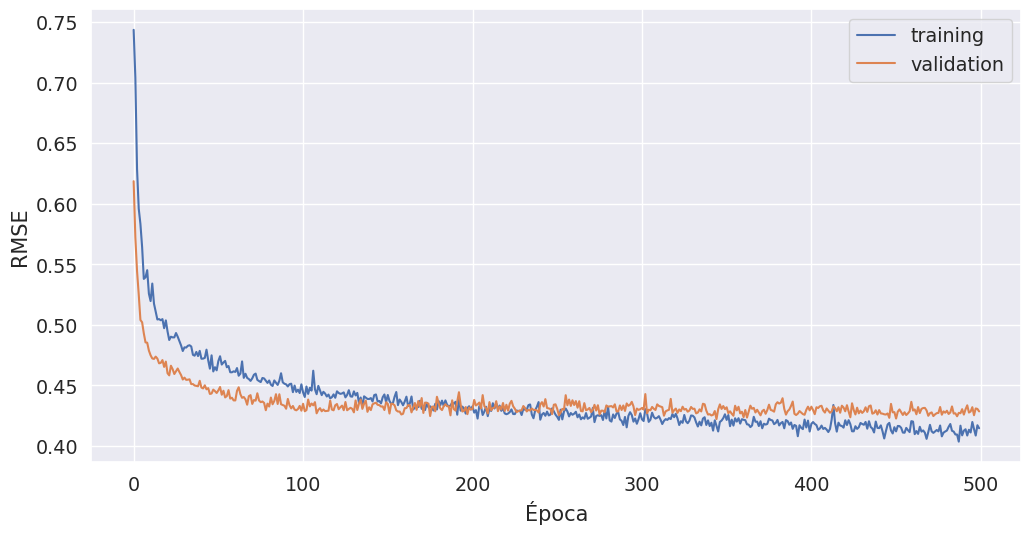

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 17s - loss: 1.9407

1632/6000 [=======>......................] - ETA: 0s - loss: 1.3264 

3168/6000 [==============>...............] - ETA: 0s - loss: 1.2020

4832/6000 [=======================>......] - ETA: 0s - loss: 1.0956

6000/6000 [==============================] - 0s 62us/step - loss: 1.0367 - val_loss: 0.7482


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6320

1664/6000 [=======>......................] - ETA: 0s - loss: 0.7112

3328/6000 [===============>..............] - ETA: 0s - loss: 0.6966

4960/6000 [=======================>......] - ETA: 0s - loss: 0.6877

6000/6000 [==============================] - 0s 43us/step - loss: 0.6804 - val_loss: 0.5919


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5260

1664/6000 [=======>......................] - ETA: 0s - loss: 0.6629

3328/6000 [===============>..............] - ETA: 0s - loss: 0.6089

4928/6000 [=======================>......] - ETA: 0s - loss: 0.5774

6000/6000 [==============================] - 0s 45us/step - loss: 0.5812 - val_loss: 0.5279


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5803

1664/6000 [=======>......................] - ETA: 0s - loss: 0.4884

3328/6000 [===============>..............] - ETA: 0s - loss: 0.4868

4960/6000 [=======================>......] - ETA: 0s - loss: 0.4972

6000/6000 [==============================] - 0s 43us/step - loss: 0.5058 - val_loss: 0.5084


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6235

1664/6000 [=======>......................] - ETA: 0s - loss: 0.5131

3360/6000 [===============>..............] - ETA: 0s - loss: 0.5420

5024/6000 [========================>.....] - ETA: 0s - loss: 0.5161

6000/6000 [==============================] - 0s 42us/step - loss: 0.4991 - val_loss: 0.4294


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3328

1664/6000 [=======>......................] - ETA: 0s - loss: 0.4552

3328/6000 [===============>..............] - ETA: 0s - loss: 0.4413

4928/6000 [=======================>......] - ETA: 0s - loss: 0.4273

6000/6000 [==============================] - 0s 42us/step - loss: 0.4273 - val_loss: 0.4069


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4192

1664/6000 [=======>......................] - ETA: 0s - loss: 0.4152

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3992

4992/6000 [=======================>......] - ETA: 0s - loss: 0.4043

6000/6000 [==============================] - 0s 42us/step - loss: 0.4045 - val_loss: 0.3898


Epoch 8/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4363

1632/6000 [=======>......................] - ETA: 0s - loss: 0.4046

3168/6000 [==============>...............] - ETA: 0s - loss: 0.3866

4800/6000 [=======================>......] - ETA: 0s - loss: 0.3844

6000/6000 [==============================] - 0s 44us/step - loss: 0.3874 - val_loss: 0.3835


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2315

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3577

3360/6000 [===============>..............] - ETA: 0s - loss: 0.3666

5024/6000 [========================>.....] - ETA: 0s - loss: 0.3758



6000/6000 [==============================] - 0s 42us/step - loss: 0.3752 - val_loss: 0.3651


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3794

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3537

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3569

4992/6000 [=======================>......] - ETA: 0s - loss: 0.3667

6000/6000 [==============================] - 0s 43us/step - loss: 0.3656 - val_loss: 0.3548


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1900

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3588

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3721

4896/6000 [=======================>......] - ETA: 0s - loss: 0.3627

6000/6000 [==============================] - 0s 43us/step - loss: 0.3582 - val_loss: 0.3495


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3225

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3848

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3624

4960/6000 [=======================>......] - ETA: 0s - loss: 0.3575

6000/6000 [==============================] - 0s 43us/step - loss: 0.3529 - val_loss: 0.3481


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3360

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3755

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3582

4960/6000 [=======================>......] - ETA: 0s - loss: 0.3532

6000/6000 [==============================] - 0s 44us/step - loss: 0.3521 - val_loss: 0.3389


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4393

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3486

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3412

4992/6000 [=======================>......] - ETA: 0s - loss: 0.3401

6000/6000 [==============================] - 0s 42us/step - loss: 0.3447 - val_loss: 0.3258


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3455

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3396

4928/6000 [=======================>......] - ETA: 0s - loss: 0.3309

6000/6000 [==============================] - 0s 42us/step - loss: 0.3402 - val_loss: 0.3532


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3379

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3069

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3113

4960/6000 [=======================>......] - ETA: 0s - loss: 0.3182

6000/6000 [==============================] - 0s 43us/step - loss: 0.3259 - val_loss: 0.3188


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2707

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3038

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3199

4960/6000 [=======================>......] - ETA: 0s - loss: 0.3188

6000/6000 [==============================] - 0s 43us/step - loss: 0.3190 - val_loss: 0.3135


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4290

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3197

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3293

4960/6000 [=======================>......] - ETA: 0s - loss: 0.3192

6000/6000 [==============================] - 0s 43us/step - loss: 0.3183 - val_loss: 0.3134


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3225

3392/6000 [===============>..............] - ETA: 0s - loss: 0.3237

4992/6000 [=======================>......] - ETA: 0s - loss: 0.3186



6000/6000 [==============================] - 0s 42us/step - loss: 0.3169 - val_loss: 0.3112


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5879

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3322

3232/6000 [===============>..............] - ETA: 0s - loss: 0.3284

4896/6000 [=======================>......] - ETA: 0s - loss: 0.3197

6000/6000 [==============================] - 0s 43us/step - loss: 0.3148 - val_loss: 0.3102


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4841

1632/6000 [=======>......................] - ETA: 0s - loss: 0.3058

3296/6000 [===============>..............] - ETA: 0s - loss: 0.3008

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2990

6000/6000 [==============================] - 0s 43us/step - loss: 0.3089 - val_loss: 0.3071


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3014

3360/6000 [===============>..............] - ETA: 0s - loss: 0.3132

5024/6000 [========================>.....] - ETA: 0s - loss: 0.3053

6000/6000 [==============================] - 0s 43us/step - loss: 0.3037 - val_loss: 0.3043


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2483

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3197

3360/6000 [===============>..............] - ETA: 0s - loss: 0.3077

4992/6000 [=======================>......] - ETA: 0s - loss: 0.3098

6000/6000 [==============================] - 0s 42us/step - loss: 0.3066 - val_loss: 0.2957


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2401

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3117

3328/6000 [===============>..............] - ETA: 0s - loss: 0.3030

4992/6000 [=======================>......] - ETA: 0s - loss: 0.3016

6000/6000 [==============================] - 0s 42us/step - loss: 0.3015 - val_loss: 0.2954


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4206

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2962

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2949

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2980

6000/6000 [==============================] - 0s 42us/step - loss: 0.3032 - val_loss: 0.2963


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

1344/6000 [=====>........................] - ETA: 0s - loss: 0.3026

2976/6000 [=============>................] - ETA: 0s - loss: 0.3053

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2982

6000/6000 [==============================] - 0s 45us/step - loss: 0.2966 - val_loss: 0.3062


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5194

1248/6000 [=====>........................] - ETA: 0s - loss: 0.3489

2880/6000 [=============>................] - ETA: 0s - loss: 0.3186

4384/6000 [====================>.........] - ETA: 0s - loss: 0.3106

5984/6000 [============================>.] - ETA: 0s - loss: 0.2989

6000/6000 [==============================] - 0s 46us/step - loss: 0.2989 - val_loss: 0.2956


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4589

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2783

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2951

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2999



6000/6000 [==============================] - 0s 42us/step - loss: 0.2972 - val_loss: 0.2940


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2598

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2931

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2935

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2898

6000/6000 [==============================] - 0s 43us/step - loss: 0.2950 - val_loss: 0.2893


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2690

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2962

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2999

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2993

6000/6000 [==============================] - 0s 43us/step - loss: 0.2918 - val_loss: 0.2927


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2335

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2781

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2776

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2909

6000/6000 [==============================] - 0s 43us/step - loss: 0.2907 - val_loss: 0.2864


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2854

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2908

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2925

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2893

6000/6000 [==============================] - 0s 42us/step - loss: 0.2912 - val_loss: 0.2885


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1735

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2909

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2904

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2863

6000/6000 [==============================] - 0s 43us/step - loss: 0.2886 - val_loss: 0.2898


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2494

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2812

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2837

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2892

6000/6000 [==============================] - 0s 43us/step - loss: 0.2898 - val_loss: 0.2855


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5769

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2976

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2884

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2831

6000/6000 [==============================] - 0s 42us/step - loss: 0.2852 - val_loss: 0.2828


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4470

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2921

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2946

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2897

6000/6000 [==============================] - 0s 43us/step - loss: 0.2851 - val_loss: 0.2886


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3633

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2647

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2711

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2815



6000/6000 [==============================] - 0s 42us/step - loss: 0.2836 - val_loss: 0.2814


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4124

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2880

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2981

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2856

6000/6000 [==============================] - 0s 43us/step - loss: 0.2813 - val_loss: 0.2784


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2094

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2848

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2836

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2879

6000/6000 [==============================] - 0s 42us/step - loss: 0.2827 - val_loss: 0.2842


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1848

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2710

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2683

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2799

6000/6000 [==============================] - 0s 42us/step - loss: 0.2795 - val_loss: 0.2857


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3806

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2874

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2812

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2782



6000/6000 [==============================] - 0s 42us/step - loss: 0.2810 - val_loss: 0.2932


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3796

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2638

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2717

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2790

6000/6000 [==============================] - 0s 43us/step - loss: 0.2804 - val_loss: 0.2754


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2238

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2829

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2835

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2833

6000/6000 [==============================] - 0s 44us/step - loss: 0.2796 - val_loss: 0.2813


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1749

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2728

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2765

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2769

6000/6000 [==============================] - 0s 44us/step - loss: 0.2780 - val_loss: 0.2920


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1310

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2927

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2859

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2774

6000/6000 [==============================] - 0s 42us/step - loss: 0.2784 - val_loss: 0.2742


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2459

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2816

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2719

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2716

6000/6000 [==============================] - 0s 43us/step - loss: 0.2754 - val_loss: 0.2719


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5385

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2836

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2843

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2819

6000/6000 [==============================] - 0s 42us/step - loss: 0.2763 - val_loss: 0.2785


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2577

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2977

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2841

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2816

6000/6000 [==============================] - 0s 42us/step - loss: 0.2761 - val_loss: 0.2756


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5716

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2859

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2892

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2756

6000/6000 [==============================] - 0s 42us/step - loss: 0.2754 - val_loss: 0.2728


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2564

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2877

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2775

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2775

6000/6000 [==============================] - 0s 42us/step - loss: 0.2797 - val_loss: 0.2712


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3670

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2822

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2873

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2790



6000/6000 [==============================] - 0s 42us/step - loss: 0.2736 - val_loss: 0.2898


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2546

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2809

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2704

6000/6000 [==============================] - 0s 42us/step - loss: 0.2716 - val_loss: 0.2702


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2736

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2635

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2764

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2684

6000/6000 [==============================] - 0s 42us/step - loss: 0.2704 - val_loss: 0.2724


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2828

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2723

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2701

6000/6000 [==============================] - 0s 42us/step - loss: 0.2703 - val_loss: 0.2690


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2628

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2633

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2739

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2664



6000/6000 [==============================] - 0s 42us/step - loss: 0.2713 - val_loss: 0.2689


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3637

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2667

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2713

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2698

6000/6000 [==============================] - 0s 43us/step - loss: 0.2711 - val_loss: 0.2781


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5678

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2802

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2739

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2676

6000/6000 [==============================] - 0s 42us/step - loss: 0.2717 - val_loss: 0.2702


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2138

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2557

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2718

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2693

6000/6000 [==============================] - 0s 42us/step - loss: 0.2675 - val_loss: 0.2722


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2541

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2651

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2657

6000/6000 [==============================] - 0s 42us/step - loss: 0.2673 - val_loss: 0.2727


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3050

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2415

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2647

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2686

6000/6000 [==============================] - 0s 43us/step - loss: 0.2677 - val_loss: 0.2739


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3016

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2589

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2710

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2639

6000/6000 [==============================] - 0s 43us/step - loss: 0.2701 - val_loss: 0.2650


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3214

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2851

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2835

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2702

6000/6000 [==============================] - 0s 42us/step - loss: 0.2702 - val_loss: 0.2770


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1815

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2580

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2570

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2639

6000/6000 [==============================] - 0s 44us/step - loss: 0.2683 - val_loss: 0.2714


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2181

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2628

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2583

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2626

6000/6000 [==============================] - 0s 42us/step - loss: 0.2640 - val_loss: 0.2664


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2222

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2431

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2635

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2657

6000/6000 [==============================] - 0s 43us/step - loss: 0.2660 - val_loss: 0.2686


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2421

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2383

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2573

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2605

6000/6000 [==============================] - 0s 42us/step - loss: 0.2652 - val_loss: 0.2644


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3127

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2618

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2685

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2629



6000/6000 [==============================] - 0s 42us/step - loss: 0.2649 - val_loss: 0.2761


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3111

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2713

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2651

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2694



6000/6000 [==============================] - 0s 42us/step - loss: 0.2670 - val_loss: 0.2658


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3477

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2522

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2637

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2647

6000/6000 [==============================] - 0s 42us/step - loss: 0.2627 - val_loss: 0.2655


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2456

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2739

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2679

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2646

6000/6000 [==============================] - 0s 43us/step - loss: 0.2619 - val_loss: 0.2740


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3724

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2963

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2679

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2661

6000/6000 [==============================] - 0s 43us/step - loss: 0.2663 - val_loss: 0.2797


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2869

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2691

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2694



6000/6000 [==============================] - 0s 42us/step - loss: 0.2669 - val_loss: 0.2648


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1748

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2677

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2663

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2688

6000/6000 [==============================] - 0s 43us/step - loss: 0.2651 - val_loss: 0.2699


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2795

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2645

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2535

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2645

6000/6000 [==============================] - 0s 43us/step - loss: 0.2626 - val_loss: 0.2574


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2507

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2611

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2575

6000/6000 [==============================] - 0s 42us/step - loss: 0.2609 - val_loss: 0.2699


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2878

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2538

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2622

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2633

6000/6000 [==============================] - 0s 42us/step - loss: 0.2659 - val_loss: 0.2875


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3370

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2505

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2631

6000/6000 [==============================] - 0s 42us/step - loss: 0.2634 - val_loss: 0.2602


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2597

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2591

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2579

6000/6000 [==============================] - 0s 42us/step - loss: 0.2596 - val_loss: 0.2628


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5747

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2606

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2702

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2642

6000/6000 [==============================] - 0s 42us/step - loss: 0.2621 - val_loss: 0.2710


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2293

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2583

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2611

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2627

6000/6000 [==============================] - 0s 42us/step - loss: 0.2612 - val_loss: 0.2586


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2582

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2577

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2598

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2547

6000/6000 [==============================] - 0s 42us/step - loss: 0.2601 - val_loss: 0.2569


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2805

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2760

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2683

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 42us/step - loss: 0.2586 - val_loss: 0.2555


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2474

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2600

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2583

6000/6000 [==============================] - 0s 44us/step - loss: 0.2617 - val_loss: 0.2551


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2618

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2680

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2599

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2588

6000/6000 [==============================] - 0s 43us/step - loss: 0.2598 - val_loss: 0.2958


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2697

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2553

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2532

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2612

6000/6000 [==============================] - 0s 43us/step - loss: 0.2583 - val_loss: 0.2584


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0962

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2656

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2611

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2636

6000/6000 [==============================] - 0s 43us/step - loss: 0.2639 - val_loss: 0.2571


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4076

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2792

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2693

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2618

6000/6000 [==============================] - 0s 43us/step - loss: 0.2632 - val_loss: 0.2599


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4543

1664/6000 [=======>......................] - ETA: 0s - loss: 0.3024

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2780

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2692

6000/6000 [==============================] - 0s 42us/step - loss: 0.2626 - val_loss: 0.2706


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3139

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2473

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2512

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2543

6000/6000 [==============================] - 0s 43us/step - loss: 0.2624 - val_loss: 0.2631


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2059

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2527

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2522

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2555

6000/6000 [==============================] - 0s 42us/step - loss: 0.2561 - val_loss: 0.2560


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2016

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2843

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2624

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2606

6000/6000 [==============================] - 0s 42us/step - loss: 0.2579 - val_loss: 0.2581


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1795

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2622

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2623

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2569

6000/6000 [==============================] - 0s 42us/step - loss: 0.2559 - val_loss: 0.2546


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3199

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2435

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2520

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2530

6000/6000 [==============================] - 0s 43us/step - loss: 0.2564 - val_loss: 0.2561


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1472

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2625

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2554

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2627

6000/6000 [==============================] - 0s 43us/step - loss: 0.2576 - val_loss: 0.2596


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3249

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2859

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2589

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2590



6000/6000 [==============================] - 0s 42us/step - loss: 0.2575 - val_loss: 0.2540


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2545

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2597

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2567

6000/6000 [==============================] - 0s 43us/step - loss: 0.2542 - val_loss: 0.2557


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1709

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2371

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2556

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2512

6000/6000 [==============================] - 0s 42us/step - loss: 0.2570 - val_loss: 0.2532


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2640

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2405

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2565

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2558

6000/6000 [==============================] - 0s 42us/step - loss: 0.2572 - val_loss: 0.2513


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2501

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2525

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2410

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2512

6000/6000 [==============================] - 0s 42us/step - loss: 0.2553 - val_loss: 0.2586


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3202

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2357

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2521

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2594

6000/6000 [==============================] - 0s 43us/step - loss: 0.2602 - val_loss: 0.2613


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2552

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2448

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2464

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 43us/step - loss: 0.2541 - val_loss: 0.2579


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2656

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2719

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2676

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2647

6000/6000 [==============================] - 0s 43us/step - loss: 0.2605 - val_loss: 0.2520


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2649

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2611

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 42us/step - loss: 0.2535 - val_loss: 0.2546


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1367

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2529

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2393

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2464

6000/6000 [==============================] - 0s 43us/step - loss: 0.2526 - val_loss: 0.2550


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3071

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2446

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2391

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 43us/step - loss: 0.2528 - val_loss: 0.2590


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7143

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2601

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2552

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2513

6000/6000 [==============================] - 0s 42us/step - loss: 0.2534 - val_loss: 0.2522


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2095

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2362

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2506

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2553

6000/6000 [==============================] - 0s 44us/step - loss: 0.2544 - val_loss: 0.2580


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2513

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2586

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2593

6000/6000 [==============================] - 0s 43us/step - loss: 0.2527 - val_loss: 0.2529


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1910

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2275

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2434

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2489

6000/6000 [==============================] - 0s 43us/step - loss: 0.2542 - val_loss: 0.2522


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2716

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2592

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2540

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2528

6000/6000 [==============================] - 0s 43us/step - loss: 0.2517 - val_loss: 0.2501


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2508

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2605

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2597

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2517

6000/6000 [==============================] - 0s 43us/step - loss: 0.2513 - val_loss: 0.2690


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3285

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2434

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2480

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2497

6000/6000 [==============================] - 0s 42us/step - loss: 0.2545 - val_loss: 0.2481


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3285

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2647

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2513

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2507

6000/6000 [==============================] - 0s 42us/step - loss: 0.2512 - val_loss: 0.2536


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2177

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2326

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2503

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2545



6000/6000 [==============================] - 0s 42us/step - loss: 0.2523 - val_loss: 0.2474


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1698

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2355

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2383

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2488



6000/6000 [==============================] - 0s 42us/step - loss: 0.2521 - val_loss: 0.2494


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2310

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2504

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2571

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2505

6000/6000 [==============================] - 0s 43us/step - loss: 0.2493 - val_loss: 0.2455


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2415

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2563

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2576

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2534

6000/6000 [==============================] - 0s 43us/step - loss: 0.2526 - val_loss: 0.2560


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2132

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2743

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2549

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2481

6000/6000 [==============================] - 0s 43us/step - loss: 0.2529 - val_loss: 0.2506


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2906

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2423

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2504

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2511

6000/6000 [==============================] - 0s 43us/step - loss: 0.2502 - val_loss: 0.2447


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3048

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2409

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2555

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2528

6000/6000 [==============================] - 0s 43us/step - loss: 0.2506 - val_loss: 0.2512


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1847

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2444

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2463

6000/6000 [==============================] - 0s 43us/step - loss: 0.2501 - val_loss: 0.2541


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2885

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2579

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2633

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2546

6000/6000 [==============================] - 0s 43us/step - loss: 0.2515 - val_loss: 0.2472


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2134

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2251

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2441

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2509

6000/6000 [==============================] - 0s 42us/step - loss: 0.2498 - val_loss: 0.2489


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2498

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2475

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2531

6000/6000 [==============================] - 0s 42us/step - loss: 0.2502 - val_loss: 0.2434


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2781

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2408

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2480

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2413

6000/6000 [==============================] - 0s 42us/step - loss: 0.2469 - val_loss: 0.2446


Epoch 126/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2795

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2531

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2563

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2542

6000/6000 [==============================] - 0s 43us/step - loss: 0.2493 - val_loss: 0.2500


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3012

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2489

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2516

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2488

6000/6000 [==============================] - 0s 43us/step - loss: 0.2502 - val_loss: 0.2804


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2380

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2531

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2472

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2492

6000/6000 [==============================] - 0s 42us/step - loss: 0.2472 - val_loss: 0.2453


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1279

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2552

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2502

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 43us/step - loss: 0.2460 - val_loss: 0.2641


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2461

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2452

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2496

6000/6000 [==============================] - 0s 43us/step - loss: 0.2479 - val_loss: 0.2453


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3611

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2642

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2557

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2527

6000/6000 [==============================] - 0s 43us/step - loss: 0.2467 - val_loss: 0.2405


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2056

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2415

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2442

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2503

6000/6000 [==============================] - 0s 43us/step - loss: 0.2487 - val_loss: 0.2484


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2081

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2434

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2432

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2533

6000/6000 [==============================] - 0s 43us/step - loss: 0.2463 - val_loss: 0.2464


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2765

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2466

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2487

6000/6000 [==============================] - 0s 43us/step - loss: 0.2469 - val_loss: 0.2418


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2246

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2594

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2515

6000/6000 [==============================] - 0s 43us/step - loss: 0.2466 - val_loss: 0.2426


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2586

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2338

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2399

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2420

6000/6000 [==============================] - 0s 43us/step - loss: 0.2446 - val_loss: 0.2702


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2395

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2402

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2432

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 43us/step - loss: 0.2458 - val_loss: 0.2444


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2580

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2502

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2420

6000/6000 [==============================] - 0s 43us/step - loss: 0.2464 - val_loss: 0.2480


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2396

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2272

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2342

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2374

6000/6000 [==============================] - 0s 43us/step - loss: 0.2430 - val_loss: 0.2499


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2489

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2527

6000/6000 [==============================] - 0s 43us/step - loss: 0.2498 - val_loss: 0.2480


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1472

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2602

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2387

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2471

6000/6000 [==============================] - 0s 44us/step - loss: 0.2465 - val_loss: 0.2448


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1835

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2321

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2314

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 43us/step - loss: 0.2456 - val_loss: 0.2538


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2464

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2459

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 42us/step - loss: 0.2461 - val_loss: 0.2430


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2372

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2245

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2342

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 43us/step - loss: 0.2457 - val_loss: 0.2478


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2818

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2221

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2363

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2418

6000/6000 [==============================] - 0s 43us/step - loss: 0.2447 - val_loss: 0.2421


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2544

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2526

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2503

6000/6000 [==============================] - 0s 43us/step - loss: 0.2449 - val_loss: 0.2535


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1781

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2463

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2434

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2452

6000/6000 [==============================] - 0s 43us/step - loss: 0.2462 - val_loss: 0.2407


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3193

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2491

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2529

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2486

6000/6000 [==============================] - 0s 43us/step - loss: 0.2440 - val_loss: 0.2395


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3924

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2386

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2426

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 43us/step - loss: 0.2453 - val_loss: 0.2484


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3354

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2591

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2498

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 43us/step - loss: 0.2467 - val_loss: 0.2402


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2517

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2393

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2476

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2475

6000/6000 [==============================] - 0s 43us/step - loss: 0.2480 - val_loss: 0.2531


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2034

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2447

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2456

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2422

6000/6000 [==============================] - 0s 43us/step - loss: 0.2433 - val_loss: 0.2421


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1281

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2478

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2437

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2453

6000/6000 [==============================] - 0s 42us/step - loss: 0.2410 - val_loss: 0.2542


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2272

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2514

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2467

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 43us/step - loss: 0.2443 - val_loss: 0.2369


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2200

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2292

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2316

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2399

6000/6000 [==============================] - 0s 43us/step - loss: 0.2428 - val_loss: 0.2537


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2444

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2395

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 43us/step - loss: 0.2433 - val_loss: 0.2624


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2758

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2478

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2387

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2383



6000/6000 [==============================] - 0s 42us/step - loss: 0.2402 - val_loss: 0.2520


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2532

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2471

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2432

6000/6000 [==============================] - 0s 42us/step - loss: 0.2424 - val_loss: 0.2485


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2335

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2476

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2456

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2422

6000/6000 [==============================] - 0s 43us/step - loss: 0.2428 - val_loss: 0.2449


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2456

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2485

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2408

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2408

6000/6000 [==============================] - 0s 43us/step - loss: 0.2404 - val_loss: 0.2447


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3370

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2397

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2483

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2454

6000/6000 [==============================] - 0s 43us/step - loss: 0.2428 - val_loss: 0.2402


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1976

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2343

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2414

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2404

6000/6000 [==============================] - 0s 42us/step - loss: 0.2416 - val_loss: 0.2467


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2401

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2479

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2432

6000/6000 [==============================] - 0s 43us/step - loss: 0.2434 - val_loss: 0.2510


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1766

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2626

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2560

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2441

6000/6000 [==============================] - 0s 44us/step - loss: 0.2397 - val_loss: 0.2478


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4386

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2435

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2389

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2418

6000/6000 [==============================] - 0s 43us/step - loss: 0.2431 - val_loss: 0.2443


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3451

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2333

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2364

6000/6000 [==============================] - 0s 43us/step - loss: 0.2375 - val_loss: 0.2381


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2335

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2439

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2363

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 42us/step - loss: 0.2415 - val_loss: 0.2430


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2249

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2339

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2402

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2444

6000/6000 [==============================] - 0s 43us/step - loss: 0.2417 - val_loss: 0.2353


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4380

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2426

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2435



6000/6000 [==============================] - 0s 42us/step - loss: 0.2422 - val_loss: 0.2406


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2508

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2470

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2462

6000/6000 [==============================] - 0s 42us/step - loss: 0.2403 - val_loss: 0.2360


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2344

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2417

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2390

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2442

6000/6000 [==============================] - 0s 42us/step - loss: 0.2422 - val_loss: 0.2444


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2444

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2707

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2493

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2508

6000/6000 [==============================] - 0s 43us/step - loss: 0.2480 - val_loss: 0.2414


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2331

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2463

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2497

6000/6000 [==============================] - 0s 42us/step - loss: 0.2450 - val_loss: 0.2495


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1937

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2459

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2430

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2374

6000/6000 [==============================] - 0s 43us/step - loss: 0.2434 - val_loss: 0.2511


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2580

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2419

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2408

6000/6000 [==============================] - 0s 42us/step - loss: 0.2417 - val_loss: 0.2407


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2428

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2329

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2408

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2422

6000/6000 [==============================] - 0s 43us/step - loss: 0.2392 - val_loss: 0.2368


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2447

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2320

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 43us/step - loss: 0.2395 - val_loss: 0.2431


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2275

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 43us/step - loss: 0.2400 - val_loss: 0.2425


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2324

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2336

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2401



6000/6000 [==============================] - 0s 42us/step - loss: 0.2405 - val_loss: 0.2445


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2427

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2229

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2388

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2403

6000/6000 [==============================] - 0s 43us/step - loss: 0.2391 - val_loss: 0.2417


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1187

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2293

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2394

6000/6000 [==============================] - 0s 43us/step - loss: 0.2415 - val_loss: 0.2536


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2734

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2424

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 43us/step - loss: 0.2416 - val_loss: 0.2439


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3315

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2310

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2462

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2394

6000/6000 [==============================] - 0s 43us/step - loss: 0.2379 - val_loss: 0.2389


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1869

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2396

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2420

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 42us/step - loss: 0.2387 - val_loss: 0.2397


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2256

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 42us/step - loss: 0.2407 - val_loss: 0.2399


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2365

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2406

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 43us/step - loss: 0.2387 - val_loss: 0.2389


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3030

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2242

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2272

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 42us/step - loss: 0.2350 - val_loss: 0.2476


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2151

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2554

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2517

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 44us/step - loss: 0.2392 - val_loss: 0.2366


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2640

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2370

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2403

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2459

6000/6000 [==============================] - 0s 43us/step - loss: 0.2400 - val_loss: 0.2365


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1456

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2229

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2271

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 43us/step - loss: 0.2378 - val_loss: 0.2457


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2547

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2399

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 43us/step - loss: 0.2398 - val_loss: 0.2470


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2248

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2292

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2374

6000/6000 [==============================] - 0s 43us/step - loss: 0.2380 - val_loss: 0.2855


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2565

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2457

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2445

6000/6000 [==============================] - 0s 43us/step - loss: 0.2423 - val_loss: 0.2496


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2587

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2424

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2419

6000/6000 [==============================] - 0s 43us/step - loss: 0.2358 - val_loss: 0.2350


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1774

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2409

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2354

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2399



6000/6000 [==============================] - 0s 42us/step - loss: 0.2439 - val_loss: 0.2411


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2153

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2163

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2348

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 43us/step - loss: 0.2377 - val_loss: 0.2408


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5767

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2356

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2384

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 43us/step - loss: 0.2370 - val_loss: 0.2489


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2487

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2435

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2433

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 43us/step - loss: 0.2411 - val_loss: 0.2351


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2784

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2419

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2335

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 43us/step - loss: 0.2373 - val_loss: 0.2503


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2293

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2190

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2372

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2406

6000/6000 [==============================] - 0s 43us/step - loss: 0.2401 - val_loss: 0.2334


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1979

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2514

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2462

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2441

6000/6000 [==============================] - 0s 43us/step - loss: 0.2385 - val_loss: 0.2335


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1295

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2331

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 43us/step - loss: 0.2388 - val_loss: 0.2480


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3872

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2391

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2375

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2450

6000/6000 [==============================] - 0s 42us/step - loss: 0.2413 - val_loss: 0.2500


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2353

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 43us/step - loss: 0.2370 - val_loss: 0.2655


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5105

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2189

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2309

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 43us/step - loss: 0.2371 - val_loss: 0.2397


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5335

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2470

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2382

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2445

6000/6000 [==============================] - 0s 43us/step - loss: 0.2388 - val_loss: 0.2389


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1921

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2357

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2264

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 42us/step - loss: 0.2349 - val_loss: 0.2405


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2481

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2447

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 43us/step - loss: 0.2387 - val_loss: 0.2346


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3852

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2475

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2372

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 43us/step - loss: 0.2379 - val_loss: 0.2363


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2949

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2466

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2381

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 43us/step - loss: 0.2367 - val_loss: 0.2364


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2798

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2441

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2407

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 43us/step - loss: 0.2369 - val_loss: 0.2446


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2790

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2276

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2456

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2426

6000/6000 [==============================] - 0s 43us/step - loss: 0.2361 - val_loss: 0.2392


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3257

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2242

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2262

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 43us/step - loss: 0.2351 - val_loss: 0.2362


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2413

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2325

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 43us/step - loss: 0.2380 - val_loss: 0.2436


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1818

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2532

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2523

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 43us/step - loss: 0.2345 - val_loss: 0.2306


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3136

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2562

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2419

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 43us/step - loss: 0.2361 - val_loss: 0.2352


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3459

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2504

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2435

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2415

6000/6000 [==============================] - 0s 42us/step - loss: 0.2374 - val_loss: 0.2336


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3375

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2403

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2387

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 43us/step - loss: 0.2345 - val_loss: 0.2482


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4744

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2534

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2417

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 43us/step - loss: 0.2363 - val_loss: 0.2369


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2609

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2498

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2440

6000/6000 [==============================] - 0s 43us/step - loss: 0.2349 - val_loss: 0.2352


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2281

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2337

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 43us/step - loss: 0.2343 - val_loss: 0.2414


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1627

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2337

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2335

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 43us/step - loss: 0.2355 - val_loss: 0.2353


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2390

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2287

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2394

6000/6000 [==============================] - 0s 43us/step - loss: 0.2372 - val_loss: 0.2467


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2314

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2379

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2368

6000/6000 [==============================] - 0s 43us/step - loss: 0.2369 - val_loss: 0.2333


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2833

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2378

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 43us/step - loss: 0.2312 - val_loss: 0.2312


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2074

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2223

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2326

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 43us/step - loss: 0.2331 - val_loss: 0.2332


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2744

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2415

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2377

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 43us/step - loss: 0.2348 - val_loss: 0.2338


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2168

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2302

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 42us/step - loss: 0.2379 - val_loss: 0.2330


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2569

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2252

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2308

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 42us/step - loss: 0.2345 - val_loss: 0.2513


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2746

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2441

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2310

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 43us/step - loss: 0.2341 - val_loss: 0.2491


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1008

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2437

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2423

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2378

6000/6000 [==============================] - 0s 43us/step - loss: 0.2342 - val_loss: 0.2349


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2157

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2375

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2316

6000/6000 [==============================] - 0s 43us/step - loss: 0.2316 - val_loss: 0.2480


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4091

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2386

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2350

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2433

6000/6000 [==============================] - 0s 43us/step - loss: 0.2365 - val_loss: 0.2312


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4344

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2187

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2194

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 43us/step - loss: 0.2320 - val_loss: 0.2404


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4524

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2300

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2294

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 43us/step - loss: 0.2374 - val_loss: 0.2314


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2363

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1991

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2145

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2355

6000/6000 [==============================] - 0s 43us/step - loss: 0.2348 - val_loss: 0.2376


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1783

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2175

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2245

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 42us/step - loss: 0.2333 - val_loss: 0.2341


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3264

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2487

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2361

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 43us/step - loss: 0.2366 - val_loss: 0.2352


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2320

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2252

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 44us/step - loss: 0.2339 - val_loss: 0.2439


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2776

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2231

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2335

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 44us/step - loss: 0.2345 - val_loss: 0.2685


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4221

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2321

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2373

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 43us/step - loss: 0.2333 - val_loss: 0.2335


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2167

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2513

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2412

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 44us/step - loss: 0.2363 - val_loss: 0.2431


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5666

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2489

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2445

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 43us/step - loss: 0.2333 - val_loss: 0.2351


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1985

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2391

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2433

6000/6000 [==============================] - 0s 43us/step - loss: 0.2383 - val_loss: 0.2549


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2386

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2210

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2328

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 43us/step - loss: 0.2338 - val_loss: 0.2526


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2833

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2389

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2386

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 43us/step - loss: 0.2343 - val_loss: 0.2333


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2156

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2214

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2363

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 43us/step - loss: 0.2327 - val_loss: 0.2364


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2918

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2187

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2294

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 42us/step - loss: 0.2334 - val_loss: 0.2432


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2264

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2293

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 43us/step - loss: 0.2386 - val_loss: 0.2297


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3266

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2090

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2289

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 43us/step - loss: 0.2321 - val_loss: 0.2394


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2200

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2308

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 43us/step - loss: 0.2323 - val_loss: 0.2325


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1781

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2391

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2348

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 43us/step - loss: 0.2329 - val_loss: 0.2341


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4068

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2312

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 43us/step - loss: 0.2310 - val_loss: 0.2487


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2432

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2406

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2384

6000/6000 [==============================] - 0s 43us/step - loss: 0.2354 - val_loss: 0.2367


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1899

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2208

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2298

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2367

6000/6000 [==============================] - 0s 43us/step - loss: 0.2338 - val_loss: 0.2392


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2415

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2241

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2349

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 43us/step - loss: 0.2302 - val_loss: 0.2372


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2149

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2356

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 43us/step - loss: 0.2340 - val_loss: 0.2462


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3558

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2311

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2305

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 43us/step - loss: 0.2315 - val_loss: 0.2312


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3565

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2206

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2177

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 43us/step - loss: 0.2394 - val_loss: 0.2465


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1868

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2322

2720/6000 [============>.................] - ETA: 0s - loss: 0.2360

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2309

5920/6000 [============================>.] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 46us/step - loss: 0.2328 - val_loss: 0.2329


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1715

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2220

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 43us/step - loss: 0.2341 - val_loss: 0.2334


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2590

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2479

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 43us/step - loss: 0.2338 - val_loss: 0.2306


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2075

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2285

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 43us/step - loss: 0.2334 - val_loss: 0.2408


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2387

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2430

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 43us/step - loss: 0.2310 - val_loss: 0.2334


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2728

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2321

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2339

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 43us/step - loss: 0.2321 - val_loss: 0.2337


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2437

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2320

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2237

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 43us/step - loss: 0.2309 - val_loss: 0.2348


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2094

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2186

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2308

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 43us/step - loss: 0.2307 - val_loss: 0.2394


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2338

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2369

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2371

6000/6000 [==============================] - 0s 43us/step - loss: 0.2336 - val_loss: 0.2373


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2459

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2272

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2275

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2307



6000/6000 [==============================] - 0s 42us/step - loss: 0.2304 - val_loss: 0.2355


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3164

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2354

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2308

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2324

6000/6000 [==============================] - 0s 43us/step - loss: 0.2328 - val_loss: 0.2354


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2988

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2395

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2323

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 42us/step - loss: 0.2322 - val_loss: 0.2368


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1986

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2324

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2302

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 42us/step - loss: 0.2336 - val_loss: 0.2281


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3673

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2373

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2307

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 42us/step - loss: 0.2303 - val_loss: 0.2311


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2032

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2245

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 43us/step - loss: 0.2320 - val_loss: 0.2342


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1794

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2323

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2288

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 44us/step - loss: 0.2343 - val_loss: 0.2303


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2414

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2285

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2294

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 44us/step - loss: 0.2311 - val_loss: 0.2327


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2489

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2299

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2317

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 43us/step - loss: 0.2289 - val_loss: 0.2317


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2396

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2413

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2317

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 42us/step - loss: 0.2294 - val_loss: 0.2372


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2277

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 42us/step - loss: 0.2300 - val_loss: 0.2313


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4209

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2314

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2325

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 43us/step - loss: 0.2289 - val_loss: 0.2351


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2030

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2353

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2338

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 42us/step - loss: 0.2333 - val_loss: 0.2411


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2676

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2455

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2368

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 42us/step - loss: 0.2310 - val_loss: 0.2446


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2804

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2490

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2382

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2344

6000/6000 [==============================] - 0s 43us/step - loss: 0.2330 - val_loss: 0.2341


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1998

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2329

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2300

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 43us/step - loss: 0.2294 - val_loss: 0.2320


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1279

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2220

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2325

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 42us/step - loss: 0.2321 - val_loss: 0.2387


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2872

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2308

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2349

6000/6000 [==============================] - 0s 43us/step - loss: 0.2330 - val_loss: 0.2408


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2782

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2513

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2384

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 42us/step - loss: 0.2325 - val_loss: 0.2404


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2359

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2535

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2342

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 43us/step - loss: 0.2325 - val_loss: 0.2346


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2287

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2248

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 43us/step - loss: 0.2304 - val_loss: 0.2321


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1904

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2195

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2277

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 43us/step - loss: 0.2339 - val_loss: 0.2388


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2302

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2260

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 43us/step - loss: 0.2293 - val_loss: 0.2263


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2379

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2132

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2191

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2293 - val_loss: 0.2358


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3330

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2234

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2279

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 43us/step - loss: 0.2304 - val_loss: 0.2286


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2487

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2327

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 43us/step - loss: 0.2295 - val_loss: 0.2336


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2247

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2343

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2345

6000/6000 [==============================] - 0s 42us/step - loss: 0.2308 - val_loss: 0.2387


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2393

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 44us/step - loss: 0.2327 - val_loss: 0.2354


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2660

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2456

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2312

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 44us/step - loss: 0.2313 - val_loss: 0.2313


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2071

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2157

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2298



6000/6000 [==============================] - 0s 42us/step - loss: 0.2310 - val_loss: 0.2270


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2854

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2284

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2235

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 43us/step - loss: 0.2305 - val_loss: 0.2321


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2131

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2054

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2233

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 42us/step - loss: 0.2299 - val_loss: 0.2271


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2349

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2278

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 44us/step - loss: 0.2302 - val_loss: 0.2360


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2064

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2209

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 43us/step - loss: 0.2299 - val_loss: 0.2710


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2345

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2236

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 42us/step - loss: 0.2292 - val_loss: 0.2304


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2982

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2429

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2291

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 43us/step - loss: 0.2313 - val_loss: 0.2546


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1599

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2326

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2267

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 43us/step - loss: 0.2322 - val_loss: 0.2274


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2161

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2213

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 43us/step - loss: 0.2330 - val_loss: 0.2495


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2205

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2259

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2336

6000/6000 [==============================] - 0s 44us/step - loss: 0.2349 - val_loss: 0.2327


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2041

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2209

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2353

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2332

6000/6000 [==============================] - 0s 43us/step - loss: 0.2323 - val_loss: 0.2309


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2167

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2221

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 43us/step - loss: 0.2296 - val_loss: 0.2719


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2281

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2423

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2355

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 42us/step - loss: 0.2288 - val_loss: 0.2305


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2401

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2355

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 43us/step - loss: 0.2301 - val_loss: 0.2384


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3836

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2110

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2129

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 44us/step - loss: 0.2298 - val_loss: 0.2276


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2342

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2519

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2457

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 43us/step - loss: 0.2327 - val_loss: 0.2268


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3789

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2228

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2366

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 43us/step - loss: 0.2307 - val_loss: 0.2407


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2422

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2231

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 44us/step - loss: 0.2300 - val_loss: 0.2290


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1845

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2362

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2327

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 43us/step - loss: 0.2281 - val_loss: 0.2538


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2194

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2327

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 43us/step - loss: 0.2288 - val_loss: 0.2251


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2723

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2318

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2386

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 43us/step - loss: 0.2318 - val_loss: 0.2285


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2421

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2353

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2386

6000/6000 [==============================] - 0s 43us/step - loss: 0.2321 - val_loss: 0.2332


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2238

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2311

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 43us/step - loss: 0.2273 - val_loss: 0.2272


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1738

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2430

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2357

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 43us/step - loss: 0.2308 - val_loss: 0.2297


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1900

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2264

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 43us/step - loss: 0.2274 - val_loss: 0.2310


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3828

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2417

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2381

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 44us/step - loss: 0.2295 - val_loss: 0.2314


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2347

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 44us/step - loss: 0.2323 - val_loss: 0.2418


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1803

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2396

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2325

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2332

6000/6000 [==============================] - 0s 44us/step - loss: 0.2311 - val_loss: 0.2262


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1591

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2378

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2352

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 43us/step - loss: 0.2293 - val_loss: 0.2273


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2660

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2534

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2433

6000/6000 [==============================] - 0s 42us/step - loss: 0.2404 - val_loss: 0.2286


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2060

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2227

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2301 - val_loss: 0.2328


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3133

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2379

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2335

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2340



6000/6000 [==============================] - 0s 42us/step - loss: 0.2309 - val_loss: 0.2280


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2413

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2376

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2295

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 42us/step - loss: 0.2295 - val_loss: 0.2268


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2430

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2297

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 43us/step - loss: 0.2294 - val_loss: 0.2513


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2422

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2283

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 43us/step - loss: 0.2301 - val_loss: 0.2295


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2340

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2349

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2356

6000/6000 [==============================] - 0s 44us/step - loss: 0.2291 - val_loss: 0.2326


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2223

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2241

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 44us/step - loss: 0.2257 - val_loss: 0.2334


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2578

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2137

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2276

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 44us/step - loss: 0.2282 - val_loss: 0.2368


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1827

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2429

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2319

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2263 - val_loss: 0.2265


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3145

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2216

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 43us/step - loss: 0.2283 - val_loss: 0.2350


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2252

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2298

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 43us/step - loss: 0.2284 - val_loss: 0.2691


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2395

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2387

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2416

6000/6000 [==============================] - 0s 43us/step - loss: 0.2326 - val_loss: 0.2290


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2738

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2158

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2343

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 43us/step - loss: 0.2270 - val_loss: 0.2281


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2317

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2403

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2399

6000/6000 [==============================] - 0s 43us/step - loss: 0.2307 - val_loss: 0.2311


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3480

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2300

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2291

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 43us/step - loss: 0.2288 - val_loss: 0.2250


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2221

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2294

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2279 - val_loss: 0.2289


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2424

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2281

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2332

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2312



6000/6000 [==============================] - 0s 42us/step - loss: 0.2300 - val_loss: 0.2355


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4081

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2318

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2332

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 43us/step - loss: 0.2296 - val_loss: 0.2331


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1571

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2412

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2352

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 43us/step - loss: 0.2306 - val_loss: 0.2369


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1762

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2351

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2298

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 42us/step - loss: 0.2326 - val_loss: 0.2247


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2429

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2233

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2333

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 43us/step - loss: 0.2262 - val_loss: 0.2260


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2439

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2326

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 43us/step - loss: 0.2282 - val_loss: 0.2305


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2165

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2221

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 43us/step - loss: 0.2263 - val_loss: 0.2427


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2328

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2330

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 43us/step - loss: 0.2297 - val_loss: 0.2287


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0913

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2360

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2261

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 43us/step - loss: 0.2275 - val_loss: 0.2306


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2377

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2274

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 43us/step - loss: 0.2273 - val_loss: 0.2348


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2879

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2360

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2194

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 43us/step - loss: 0.2278 - val_loss: 0.2241


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3070

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2274

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2225

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 43us/step - loss: 0.2306 - val_loss: 0.2248


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1886

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2147

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2231

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 43us/step - loss: 0.2342 - val_loss: 0.2602


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2233

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2088

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2224

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 43us/step - loss: 0.2298 - val_loss: 0.2296


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1761

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2241

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 43us/step - loss: 0.2319 - val_loss: 0.2367


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1323

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2391

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2407

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 43us/step - loss: 0.2311 - val_loss: 0.2294


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2606

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2394

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2281

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 43us/step - loss: 0.2287 - val_loss: 0.2326


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2383

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2262

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 44us/step - loss: 0.2276 - val_loss: 0.2351


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2108

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2222

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2250



6000/6000 [==============================] - 0s 42us/step - loss: 0.2305 - val_loss: 0.2521


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1992

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2281

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2307

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 43us/step - loss: 0.2272 - val_loss: 0.2363


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3420

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2143

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2307

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2357

6000/6000 [==============================] - 0s 43us/step - loss: 0.2373 - val_loss: 0.2417


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2659

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2264

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 43us/step - loss: 0.2279 - val_loss: 0.2676


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2253

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2258

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 43us/step - loss: 0.2287 - val_loss: 0.2378


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3906

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2297

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2286

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 43us/step - loss: 0.2301 - val_loss: 0.2310


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3131

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2202

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2171

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 42us/step - loss: 0.2269 - val_loss: 0.2742


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2810

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2444

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2329

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 43us/step - loss: 0.2283 - val_loss: 0.2282


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2239

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2339

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 43us/step - loss: 0.2284 - val_loss: 0.2247


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2182

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2293

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 43us/step - loss: 0.2297 - val_loss: 0.2285


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2340

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2271

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 42us/step - loss: 0.2290 - val_loss: 0.2383


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1892

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2238

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2400

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 43us/step - loss: 0.2259 - val_loss: 0.2380


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2411

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2195

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2181

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 43us/step - loss: 0.2278 - val_loss: 0.2318


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2038

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2261

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2220

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 43us/step - loss: 0.2279 - val_loss: 0.2252


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2290

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2169

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2285

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 42us/step - loss: 0.2233 - val_loss: 0.2355


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1555

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2421

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2412

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 43us/step - loss: 0.2283 - val_loss: 0.2292


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1282

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2219

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 43us/step - loss: 0.2267 - val_loss: 0.2331


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4007

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2201

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2129

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 43us/step - loss: 0.2258 - val_loss: 0.2297


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3273

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2453

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2399

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2335

6000/6000 [==============================] - 0s 43us/step - loss: 0.2319 - val_loss: 0.2317


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2165

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2273

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 43us/step - loss: 0.2270 - val_loss: 0.2246


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2609

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2173

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2155

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 44us/step - loss: 0.2281 - val_loss: 0.2414


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2347

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2345

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 43us/step - loss: 0.2268 - val_loss: 0.2260


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2640

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2389

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2404

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 43us/step - loss: 0.2366 - val_loss: 0.2352


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2285

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2238

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 43us/step - loss: 0.2281 - val_loss: 0.2275


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1809

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2053

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2163

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 43us/step - loss: 0.2259 - val_loss: 0.2279


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3108

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2238

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2260

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 42us/step - loss: 0.2278 - val_loss: 0.2529


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2276

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2296

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 43us/step - loss: 0.2320 - val_loss: 0.2602


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2407

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2177

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2177

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 43us/step - loss: 0.2256 - val_loss: 0.2274


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2441

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2319

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 43us/step - loss: 0.2261 - val_loss: 0.2298


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2238

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2220

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 43us/step - loss: 0.2295 - val_loss: 0.2284


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2116

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2040

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2199

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 43us/step - loss: 0.2267 - val_loss: 0.2264


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1626

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2131

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2240

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 43us/step - loss: 0.2313 - val_loss: 0.2318


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1917

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2340

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 42us/step - loss: 0.2282 - val_loss: 0.2217


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2720

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2234

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2213

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 43us/step - loss: 0.2279 - val_loss: 0.2282


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3423

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2307

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 43us/step - loss: 0.2273 - val_loss: 0.2252


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2287

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2209

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 43us/step - loss: 0.2260 - val_loss: 0.2275


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3467

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2228

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2241

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 42us/step - loss: 0.2244 - val_loss: 0.2313


Epoch 399/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2274

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2446

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2373

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 42us/step - loss: 0.2275 - val_loss: 0.2361


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2227

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2233

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 42us/step - loss: 0.2255 - val_loss: 0.2256


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2131

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2305

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2312

6000/6000 [==============================] - 0s 43us/step - loss: 0.2265 - val_loss: 0.2285


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2727

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2288

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2244

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 42us/step - loss: 0.2295 - val_loss: 0.2392


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2558

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2321

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2296

6000/6000 [==============================] - 0s 43us/step - loss: 0.2278 - val_loss: 0.2252


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1980

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2277

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 43us/step - loss: 0.2279 - val_loss: 0.2271


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1742

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2333

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2351

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 43us/step - loss: 0.2244 - val_loss: 0.2281


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5397

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2053

3136/6000 [==============>...............] - ETA: 0s - loss: 0.2246

4704/6000 [======================>.......] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 44us/step - loss: 0.2259 - val_loss: 0.2321


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2885

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2340

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2288

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 42us/step - loss: 0.2254 - val_loss: 0.2319


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2088

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2405

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2407

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2345

6000/6000 [==============================] - 0s 43us/step - loss: 0.2334 - val_loss: 0.2439


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1701

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2140

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2143

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 43us/step - loss: 0.2270 - val_loss: 0.2314


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2267

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 43us/step - loss: 0.2259 - val_loss: 0.2319


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2282

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 43us/step - loss: 0.2249 - val_loss: 0.2241


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2349

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2353

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 43us/step - loss: 0.2288 - val_loss: 0.2271


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3614

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2216

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2266

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 43us/step - loss: 0.2238 - val_loss: 0.2262


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2151

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2203

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2407


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2178

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2347

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 42us/step - loss: 0.2273 - val_loss: 0.2232


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2466

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2277

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2300

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 43us/step - loss: 0.2240 - val_loss: 0.2251


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2246

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2223

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2316



6000/6000 [==============================] - 0s 42us/step - loss: 0.2299 - val_loss: 0.2418


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2206

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2332

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 42us/step - loss: 0.2266 - val_loss: 0.2274


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2505

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2521

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2403

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2325

6000/6000 [==============================] - 0s 43us/step - loss: 0.2270 - val_loss: 0.2321


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2196

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2185

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2248

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 43us/step - loss: 0.2269 - val_loss: 0.2536


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2320

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2244

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2272



6000/6000 [==============================] - 0s 42us/step - loss: 0.2262 - val_loss: 0.2265


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1581

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2258

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2197

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 42us/step - loss: 0.2277 - val_loss: 0.2305


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3356

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2251

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2222

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 43us/step - loss: 0.2295 - val_loss: 0.2295


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2294

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2208

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 42us/step - loss: 0.2259 - val_loss: 0.2331


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2971

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2422

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2275

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 42us/step - loss: 0.2259 - val_loss: 0.2277


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2749

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2153

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 42us/step - loss: 0.2252 - val_loss: 0.2311


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3193

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2148

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2188

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 43us/step - loss: 0.2244 - val_loss: 0.2461


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2297

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2295

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2292

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 43us/step - loss: 0.2268 - val_loss: 0.2231


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2297

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 43us/step - loss: 0.2268 - val_loss: 0.2470


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3434

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2457

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2326

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 43us/step - loss: 0.2306 - val_loss: 0.2458


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2407

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2223

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 43us/step - loss: 0.2279 - val_loss: 0.2323


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2327

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2268

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 43us/step - loss: 0.2245 - val_loss: 0.2268


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2978

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2305

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2294

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 43us/step - loss: 0.2257 - val_loss: 0.2274


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3136

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2260

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 43us/step - loss: 0.2250 - val_loss: 0.2427


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2167

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2272

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 42us/step - loss: 0.2265 - val_loss: 0.2318


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2988

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2184

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2346

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 42us/step - loss: 0.2270 - val_loss: 0.2288


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2685

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2174

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2224

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 43us/step - loss: 0.2242 - val_loss: 0.2288


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1938

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2165

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2248

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 42us/step - loss: 0.2279 - val_loss: 0.2367


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2183

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2296

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 43us/step - loss: 0.2255 - val_loss: 0.2242


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3088

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2340

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2203

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2300

6000/6000 [==============================] - 0s 43us/step - loss: 0.2287 - val_loss: 0.2375


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2564

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2290

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2212

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 42us/step - loss: 0.2265 - val_loss: 0.2268


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2234

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2189

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 42us/step - loss: 0.2283 - val_loss: 0.2552


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2662

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2383

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2286

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 43us/step - loss: 0.2280 - val_loss: 0.2272


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1973

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2264

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2229

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 42us/step - loss: 0.2239 - val_loss: 0.2403


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2165

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2264

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2262



6000/6000 [==============================] - 0s 42us/step - loss: 0.2320 - val_loss: 0.2591


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1559

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2333

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2363

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 43us/step - loss: 0.2291 - val_loss: 0.2306


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2840

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2288

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2167

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 43us/step - loss: 0.2260 - val_loss: 0.2715


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5332

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2272

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 43us/step - loss: 0.2305 - val_loss: 0.2404


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1837

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2312

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 42us/step - loss: 0.2276 - val_loss: 0.2252


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2624

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2091

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2246

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 43us/step - loss: 0.2231 - val_loss: 0.2386


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2537

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2355

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2253



6000/6000 [==============================] - 0s 42us/step - loss: 0.2261 - val_loss: 0.2498


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1566

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2233

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 43us/step - loss: 0.2229 - val_loss: 0.2422


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3444

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2255

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2222

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 43us/step - loss: 0.2269 - val_loss: 0.2489


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2202

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2317

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 43us/step - loss: 0.2292 - val_loss: 0.2309


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2118

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2146

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2221

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 43us/step - loss: 0.2239 - val_loss: 0.2458


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1993

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2317

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2226

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 42us/step - loss: 0.2283 - val_loss: 0.2261


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2058

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2228

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2245

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 42us/step - loss: 0.2245 - val_loss: 0.2640


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3055

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2312

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2222

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 43us/step - loss: 0.2300 - val_loss: 0.2304


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2198

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2136

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 43us/step - loss: 0.2257 - val_loss: 0.2284


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2018

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2393

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2360

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 43us/step - loss: 0.2291 - val_loss: 0.2209


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1459

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2438

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2351

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 43us/step - loss: 0.2249 - val_loss: 0.2332


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1454

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2109

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2123

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 43us/step - loss: 0.2267 - val_loss: 0.2251


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2304

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2331

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 43us/step - loss: 0.2272 - val_loss: 0.2267


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4622

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2238

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2254

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 42us/step - loss: 0.2240 - val_loss: 0.2259


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2206

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2169

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 43us/step - loss: 0.2247 - val_loss: 0.2288


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2080

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2068

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 43us/step - loss: 0.2246 - val_loss: 0.2365


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2324

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2368

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2190

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 43us/step - loss: 0.2266 - val_loss: 0.2399


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1990

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2249

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2212

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 43us/step - loss: 0.2277 - val_loss: 0.2549


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2320

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2281

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 43us/step - loss: 0.2238 - val_loss: 0.2239


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2164

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2511

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2269

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 43us/step - loss: 0.2227 - val_loss: 0.2270


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2103

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2224

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 43us/step - loss: 0.2221 - val_loss: 0.2318


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1819

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2112

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2122

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 43us/step - loss: 0.2222 - val_loss: 0.2363


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3882

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2250

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2191

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 42us/step - loss: 0.2278 - val_loss: 0.2271


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2394

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2319

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 43us/step - loss: 0.2286 - val_loss: 0.2329


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2063

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2286

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 42us/step - loss: 0.2236 - val_loss: 0.2461


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2380

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2368

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2333

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 43us/step - loss: 0.2280 - val_loss: 0.2205


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4781

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2254

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2241

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 43us/step - loss: 0.2250 - val_loss: 0.2281


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3198

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2432

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2288

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 43us/step - loss: 0.2260 - val_loss: 0.2259


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1506

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2208

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 43us/step - loss: 0.2274 - val_loss: 0.2238


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2747

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2047

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2154

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2192



6000/6000 [==============================] - 0s 42us/step - loss: 0.2223 - val_loss: 0.2333


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1663

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2125

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2254

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 43us/step - loss: 0.2252 - val_loss: 0.2469


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2520

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2348

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2337

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2410

6000/6000 [==============================] - 0s 43us/step - loss: 0.2353 - val_loss: 0.2370


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2425

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2282

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 43us/step - loss: 0.2342 - val_loss: 0.2260


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2088

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2100

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 43us/step - loss: 0.2268 - val_loss: 0.2441


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2245

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2223

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 43us/step - loss: 0.2254 - val_loss: 0.2224


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2612

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2379

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2247

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 43us/step - loss: 0.2283 - val_loss: 0.2329


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2484

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2224

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2300

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 42us/step - loss: 0.2232 - val_loss: 0.2336


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2248

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2092

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2080

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 43us/step - loss: 0.2231 - val_loss: 0.2212


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2594

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2331

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2210

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 43us/step - loss: 0.2232 - val_loss: 0.2269


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2690

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2330

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 43us/step - loss: 0.2236 - val_loss: 0.2304


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1816

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2156

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2202

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 43us/step - loss: 0.2239 - val_loss: 0.2426


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2787

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2155

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2223

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 46us/step - loss: 0.2252 - val_loss: 0.2199


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2274

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 43us/step - loss: 0.2247 - val_loss: 0.2359


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2217

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2231

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2203

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 43us/step - loss: 0.2301 - val_loss: 0.2424


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2111

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2019

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2309

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2314

6000/6000 [==============================] - 0s 42us/step - loss: 0.2298 - val_loss: 0.2293


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2205

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2265

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 43us/step - loss: 0.2271 - val_loss: 0.2305


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4571

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2482

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2338

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 43us/step - loss: 0.2264 - val_loss: 0.2314


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2080

3424/6000 [================>.............] - ETA: 0s - loss: 0.2349

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 42us/step - loss: 0.2252 - val_loss: 0.2427


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6801

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2576

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2428

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 43us/step - loss: 0.2240 - val_loss: 0.2230


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2346

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2418

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2318

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2282

6000/6000 [==============================] - 0s 44us/step - loss: 0.2236 - val_loss: 0.2326


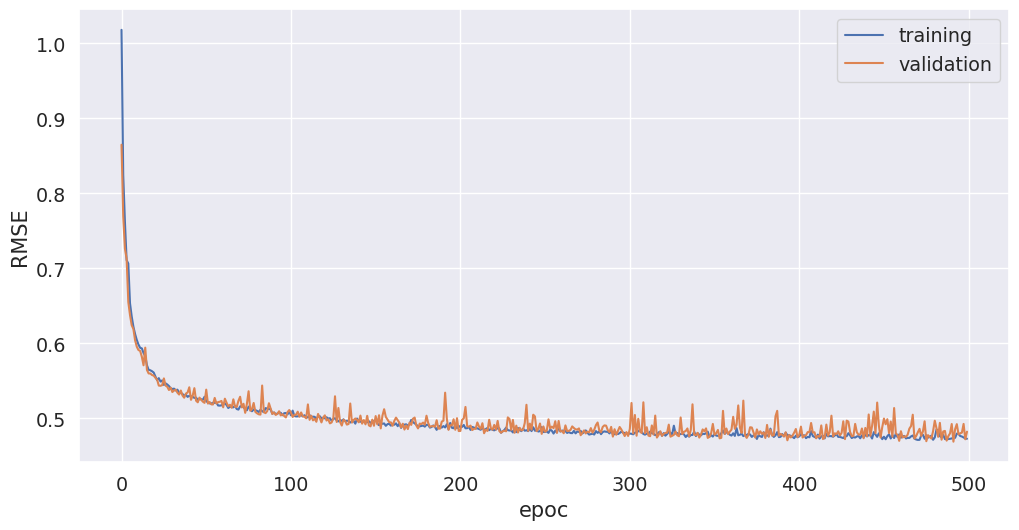

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

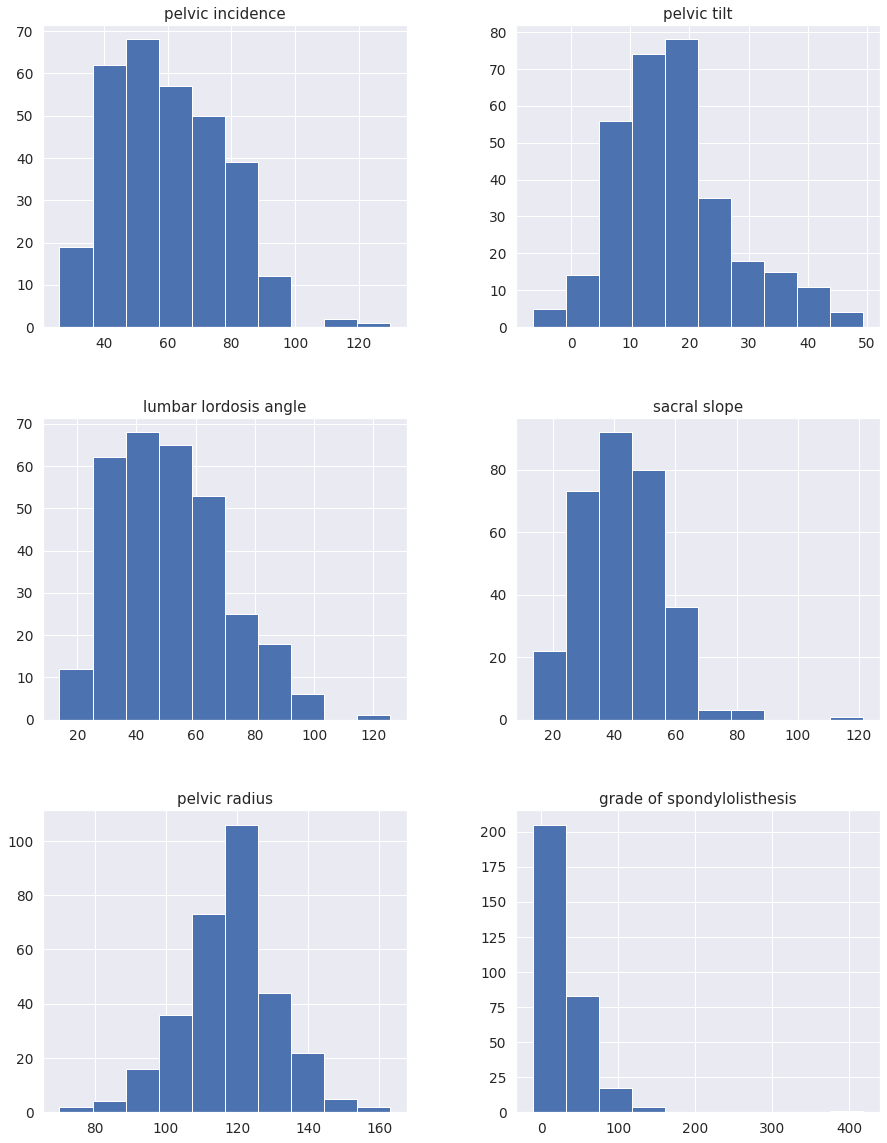

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7580645161290323

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7261 - accuracy: 0.3750

186/186 [==============================] - 0s 492us/step - loss: 0.7537 - accuracy: 0.3548 - val_loss: 0.8199 - val_accuracy: 0.4032


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7274 - accuracy: 0.2812

186/186 [==============================] - 0s 51us/step - loss: 0.7163 - accuracy: 0.3871 - val_loss: 0.7915 - val_accuracy: 0.4113


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7187 - accuracy: 0.3125

186/186 [==============================] - 0s 51us/step - loss: 0.6865 - accuracy: 0.3763 - val_loss: 0.7667 - val_accuracy: 0.4274


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.3125

186/186 [==============================] - 0s 50us/step - loss: 0.6582 - accuracy: 0.4247 - val_loss: 0.7458 - val_accuracy: 0.7016


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5732 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.6340 - accuracy: 0.8280 - val_loss: 0.7268 - val_accuracy: 0.6855


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6683 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6127 - accuracy: 0.8226 - val_loss: 0.7111 - val_accuracy: 0.6855


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5930 - accuracy: 0.8118 - val_loss: 0.6966 - val_accuracy: 0.6855


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5592 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5744 - accuracy: 0.8172 - val_loss: 0.6829 - val_accuracy: 0.6855


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5880 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5598 - accuracy: 0.8172 - val_loss: 0.6695 - val_accuracy: 0.6855


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5460 - accuracy: 0.8172 - val_loss: 0.6574 - val_accuracy: 0.6855


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5703 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5331 - accuracy: 0.8172 - val_loss: 0.6454 - val_accuracy: 0.6935


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5532 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5223 - accuracy: 0.8226 - val_loss: 0.6337 - val_accuracy: 0.6935


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5116 - accuracy: 0.8226 - val_loss: 0.6223 - val_accuracy: 0.7016


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5124 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5027 - accuracy: 0.8226 - val_loss: 0.6128 - val_accuracy: 0.7097


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5148 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4952 - accuracy: 0.8226 - val_loss: 0.6041 - val_accuracy: 0.7016


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4906 - accuracy: 0.8280 - val_loss: 0.5951 - val_accuracy: 0.7016


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4845 - accuracy: 0.8280 - val_loss: 0.5914 - val_accuracy: 0.7016


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5084 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4782 - accuracy: 0.8226 - val_loss: 0.5866 - val_accuracy: 0.7016


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.4741 - accuracy: 0.8280 - val_loss: 0.5808 - val_accuracy: 0.7016


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4706 - accuracy: 0.8280 - val_loss: 0.5771 - val_accuracy: 0.7016


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.4676 - accuracy: 0.8280 - val_loss: 0.5740 - val_accuracy: 0.7016


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4645 - accuracy: 0.8280 - val_loss: 0.5701 - val_accuracy: 0.7097


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5565 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.4619 - accuracy: 0.8387 - val_loss: 0.5678 - val_accuracy: 0.7097


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4599 - accuracy: 0.8387 - val_loss: 0.5652 - val_accuracy: 0.7097


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5556 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4574 - accuracy: 0.8387 - val_loss: 0.5636 - val_accuracy: 0.7097


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.4561 - accuracy: 0.8387 - val_loss: 0.5618 - val_accuracy: 0.7097


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4545 - accuracy: 0.8387 - val_loss: 0.5594 - val_accuracy: 0.7097


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4549 - accuracy: 0.8333 - val_loss: 0.5575 - val_accuracy: 0.7258


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4523 - accuracy: 0.8333 - val_loss: 0.5574 - val_accuracy: 0.7097


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4510 - accuracy: 0.8387 - val_loss: 0.5559 - val_accuracy: 0.7258


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4157 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4495 - accuracy: 0.8387 - val_loss: 0.5550 - val_accuracy: 0.7258


Epoch 32/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4785 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4483 - accuracy: 0.8387 - val_loss: 0.5543 - val_accuracy: 0.7258


Epoch 33/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.4473 - accuracy: 0.8387 - val_loss: 0.5534 - val_accuracy: 0.7258


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4462 - accuracy: 0.8387 - val_loss: 0.5526 - val_accuracy: 0.7258


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4863 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4459 - accuracy: 0.8387 - val_loss: 0.5522 - val_accuracy: 0.7258


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4442 - accuracy: 0.8333 - val_loss: 0.5517 - val_accuracy: 0.7258


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4434 - accuracy: 0.8333 - val_loss: 0.5510 - val_accuracy: 0.7258


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4428 - accuracy: 0.8280 - val_loss: 0.5506 - val_accuracy: 0.7258


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4424 - accuracy: 0.8280 - val_loss: 0.5499 - val_accuracy: 0.7258


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4409 - accuracy: 0.8280 - val_loss: 0.5496 - val_accuracy: 0.7258


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4404 - accuracy: 0.8280 - val_loss: 0.5490 - val_accuracy: 0.7258


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4393 - accuracy: 0.8280 - val_loss: 0.5487 - val_accuracy: 0.7258


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4384 - accuracy: 0.8280 - val_loss: 0.5485 - val_accuracy: 0.7258


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4375 - accuracy: 0.8280 - val_loss: 0.5481 - val_accuracy: 0.7258


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4366 - accuracy: 0.8280 - val_loss: 0.5479 - val_accuracy: 0.7258


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4360 - accuracy: 0.8280 - val_loss: 0.5476 - val_accuracy: 0.7258


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4356 - accuracy: 0.8280 - val_loss: 0.5473 - val_accuracy: 0.7258


Epoch 48/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4349 - accuracy: 0.8333 - val_loss: 0.5470 - val_accuracy: 0.7258


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5629 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4338 - accuracy: 0.8333 - val_loss: 0.5469 - val_accuracy: 0.7258


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4331 - accuracy: 0.8333 - val_loss: 0.5466 - val_accuracy: 0.7258


Epoch 51/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5875 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4324 - accuracy: 0.8333 - val_loss: 0.5464 - val_accuracy: 0.7258


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4318 - accuracy: 0.8333 - val_loss: 0.5462 - val_accuracy: 0.7258


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4311 - accuracy: 0.8387 - val_loss: 0.5460 - val_accuracy: 0.7177


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4308 - accuracy: 0.8333 - val_loss: 0.5457 - val_accuracy: 0.7258


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4298 - accuracy: 0.8333 - val_loss: 0.5457 - val_accuracy: 0.7258


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4288 - accuracy: 0.8387 - val_loss: 0.5458 - val_accuracy: 0.7177


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4615 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4282 - accuracy: 0.8387 - val_loss: 0.5459 - val_accuracy: 0.7258


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4276 - accuracy: 0.8333 - val_loss: 0.5456 - val_accuracy: 0.7258


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5152 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4270 - accuracy: 0.8333 - val_loss: 0.5456 - val_accuracy: 0.7177


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4266 - accuracy: 0.8333 - val_loss: 0.5455 - val_accuracy: 0.7177


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4268 - accuracy: 0.8387 - val_loss: 0.5447 - val_accuracy: 0.7258


Epoch 62/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4251 - accuracy: 0.8387 - val_loss: 0.5447 - val_accuracy: 0.7258


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4249 - accuracy: 0.8387 - val_loss: 0.5451 - val_accuracy: 0.7177


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4239 - accuracy: 0.8387 - val_loss: 0.5451 - val_accuracy: 0.7177


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4255 - accuracy: 0.8387 - val_loss: 0.5445 - val_accuracy: 0.7258


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4230 - accuracy: 0.8387 - val_loss: 0.5445 - val_accuracy: 0.7177


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4254 - accuracy: 0.8333 - val_loss: 0.5460 - val_accuracy: 0.7097


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4223 - accuracy: 0.8333 - val_loss: 0.5460 - val_accuracy: 0.7177


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4151 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4240 - accuracy: 0.8333 - val_loss: 0.5448 - val_accuracy: 0.7097


Epoch 70/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4214 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.4204 - accuracy: 0.8333 - val_loss: 0.5451 - val_accuracy: 0.7097


Epoch 71/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.4199 - accuracy: 0.8333 - val_loss: 0.5453 - val_accuracy: 0.7097


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4190 - accuracy: 0.8333 - val_loss: 0.5454 - val_accuracy: 0.7177


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4189 - accuracy: 0.8280 - val_loss: 0.5457 - val_accuracy: 0.7177


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4176 - accuracy: 0.8280 - val_loss: 0.5456 - val_accuracy: 0.7097


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5089 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4163 - accuracy: 0.8333 - val_loss: 0.5450 - val_accuracy: 0.7177


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5215 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4151 - accuracy: 0.8280 - val_loss: 0.5456 - val_accuracy: 0.7097


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4134 - accuracy: 0.8333 - val_loss: 0.5448 - val_accuracy: 0.7097


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4152 - accuracy: 0.8280 - val_loss: 0.5448 - val_accuracy: 0.7097


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4114 - accuracy: 0.8333 - val_loss: 0.5442 - val_accuracy: 0.7097


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4107 - accuracy: 0.8333 - val_loss: 0.5441 - val_accuracy: 0.7097


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4085 - accuracy: 0.8333 - val_loss: 0.5438 - val_accuracy: 0.7097


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.4094 - accuracy: 0.8333 - val_loss: 0.5431 - val_accuracy: 0.7097


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4082 - accuracy: 0.8333 - val_loss: 0.5426 - val_accuracy: 0.7097


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3727 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4066 - accuracy: 0.8387 - val_loss: 0.5422 - val_accuracy: 0.7097


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4036 - accuracy: 0.8387 - val_loss: 0.5406 - val_accuracy: 0.7097


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4013 - accuracy: 0.8387 - val_loss: 0.5385 - val_accuracy: 0.7097


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3994 - accuracy: 0.8387 - val_loss: 0.5346 - val_accuracy: 0.7097


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3906 - accuracy: 0.8333 - val_loss: 0.5286 - val_accuracy: 0.7097


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3246 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.3860 - accuracy: 0.8387 - val_loss: 0.5256 - val_accuracy: 0.7097


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4837 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3816 - accuracy: 0.8387 - val_loss: 0.5221 - val_accuracy: 0.7097


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4162 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3769 - accuracy: 0.8333 - val_loss: 0.5176 - val_accuracy: 0.7097


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3661 - accuracy: 0.8333 - val_loss: 0.5140 - val_accuracy: 0.7097


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3603 - accuracy: 0.8387 - val_loss: 0.5148 - val_accuracy: 0.7097


Epoch 94/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3584 - accuracy: 0.8387 - val_loss: 0.5151 - val_accuracy: 0.7097


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3586 - accuracy: 0.8333 - val_loss: 0.5145 - val_accuracy: 0.7097


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3579 - accuracy: 0.8333 - val_loss: 0.5154 - val_accuracy: 0.7097


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3564 - accuracy: 0.8387 - val_loss: 0.5153 - val_accuracy: 0.7097


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3554 - accuracy: 0.8387 - val_loss: 0.5153 - val_accuracy: 0.7097


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3551 - accuracy: 0.8387 - val_loss: 0.5174 - val_accuracy: 0.7097


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3549 - accuracy: 0.8387 - val_loss: 0.5177 - val_accuracy: 0.7097


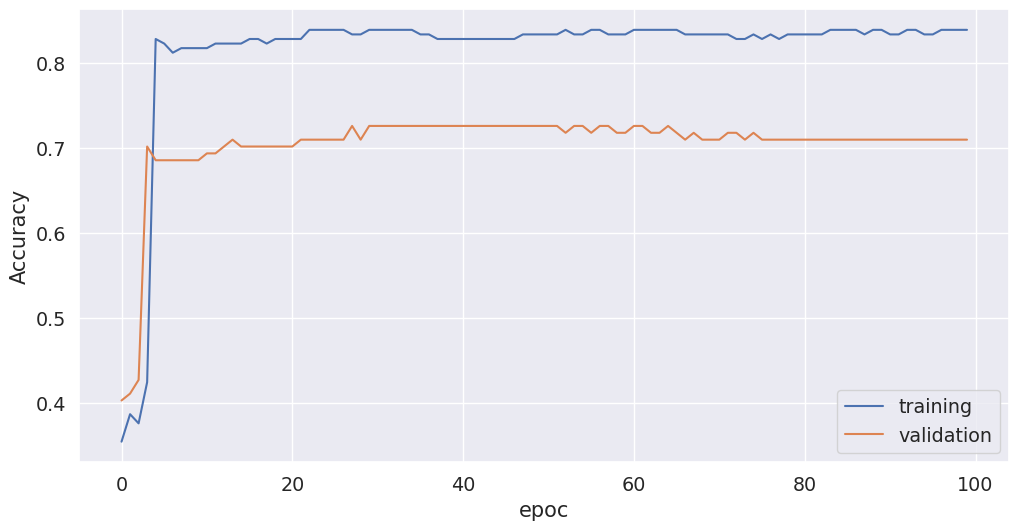

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.1480 - accuracy: 0.4062

186/186 [==============================] - 0s 1ms/step - loss: 7.0121 - accuracy: 0.3710 - val_loss: 3.5768 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.0593 - accuracy: 0.3438

186/186 [==============================] - 0s 70us/step - loss: 4.3409 - accuracy: 0.4462 - val_loss: 1.8191 - val_accuracy: 0.2984


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.7987 - accuracy: 0.4375

186/186 [==============================] - 0s 64us/step - loss: 3.1154 - accuracy: 0.4892 - val_loss: 1.3294 - val_accuracy: 0.4355


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0103 - accuracy: 0.5625

186/186 [==============================] - 0s 64us/step - loss: 1.8686 - accuracy: 0.5591 - val_loss: 1.1594 - val_accuracy: 0.5403


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4681 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 2.3492 - accuracy: 0.5591 - val_loss: 1.0583 - val_accuracy: 0.5726


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9561 - accuracy: 0.4062

186/186 [==============================] - 0s 61us/step - loss: 1.8291 - accuracy: 0.5591 - val_loss: 0.9855 - val_accuracy: 0.6048


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8257 - accuracy: 0.7500

186/186 [==============================] - 0s 69us/step - loss: 1.4152 - accuracy: 0.6075 - val_loss: 0.9358 - val_accuracy: 0.6129


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 1.3546 - accuracy: 0.5591 - val_loss: 0.8769 - val_accuracy: 0.6210


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1487 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 1.6982 - accuracy: 0.6129 - val_loss: 0.7778 - val_accuracy: 0.6210


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9632 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 1.5090 - accuracy: 0.6075 - val_loss: 0.7434 - val_accuracy: 0.6210


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0041 - accuracy: 0.5938

186/186 [==============================] - 0s 63us/step - loss: 1.4652 - accuracy: 0.5753 - val_loss: 0.7707 - val_accuracy: 0.6290


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3700 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 1.3294 - accuracy: 0.6452 - val_loss: 0.6902 - val_accuracy: 0.6290


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6183 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 1.1037 - accuracy: 0.6183 - val_loss: 0.6668 - val_accuracy: 0.6290


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4403 - accuracy: 0.5000

186/186 [==============================] - 0s 60us/step - loss: 0.8715 - accuracy: 0.6559 - val_loss: 0.6642 - val_accuracy: 0.6290


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2921 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 1.1282 - accuracy: 0.6398 - val_loss: 0.6688 - val_accuracy: 0.6290


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0251 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 1.3553 - accuracy: 0.6237 - val_loss: 0.6586 - val_accuracy: 0.6290


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9128 - accuracy: 0.5312

186/186 [==============================] - 0s 64us/step - loss: 0.9076 - accuracy: 0.6398 - val_loss: 0.6454 - val_accuracy: 0.6290


Epoch 18/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5771 - accuracy: 0.6562

186/186 [==============================] - 0s 70us/step - loss: 1.0518 - accuracy: 0.6613 - val_loss: 0.6385 - val_accuracy: 0.6290


Epoch 19/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 1.0828 - accuracy: 0.6613 - val_loss: 0.6370 - val_accuracy: 0.6290


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6039 - accuracy: 0.5625

186/186 [==============================] - 0s 62us/step - loss: 1.1031 - accuracy: 0.6720 - val_loss: 0.6360 - val_accuracy: 0.6371


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.0012 - accuracy: 0.5625

186/186 [==============================] - 0s 64us/step - loss: 1.1200 - accuracy: 0.6559 - val_loss: 0.6492 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6790 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 1.2062 - accuracy: 0.6505 - val_loss: 0.6370 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0088 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.9230 - accuracy: 0.6774 - val_loss: 0.6380 - val_accuracy: 0.6371


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8780 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.9345 - accuracy: 0.6720 - val_loss: 0.6332 - val_accuracy: 0.6371


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.5549 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.8701 - accuracy: 0.6774 - val_loss: 0.6333 - val_accuracy: 0.6371


Epoch 26/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8079 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.8256 - accuracy: 0.6720 - val_loss: 0.6386 - val_accuracy: 0.6371


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8242 - accuracy: 0.6250

186/186 [==============================] - 0s 66us/step - loss: 0.9945 - accuracy: 0.6720 - val_loss: 0.6380 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1745 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.9875 - accuracy: 0.6882 - val_loss: 0.6404 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4824 - accuracy: 0.5625

186/186 [==============================] - 0s 60us/step - loss: 0.9162 - accuracy: 0.6613 - val_loss: 0.6408 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8714 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.7134 - accuracy: 0.6935 - val_loss: 0.6334 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8103 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.8266 - accuracy: 0.6774 - val_loss: 0.6350 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.8668 - accuracy: 0.6613 - val_loss: 0.6403 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7909 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6590 - accuracy: 0.6720 - val_loss: 0.6353 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5601 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.5978 - accuracy: 0.7043 - val_loss: 0.6352 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6690 - accuracy: 0.6989 - val_loss: 0.6340 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6937 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.8795 - accuracy: 0.6774 - val_loss: 0.6325 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5796 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6863 - accuracy: 0.6989 - val_loss: 0.6326 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5893 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.7861 - accuracy: 0.6613 - val_loss: 0.6318 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7188



186/186 [==============================] - 0s 60us/step - loss: 0.5964 - accuracy: 0.6935 - val_loss: 0.6315 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5915 - accuracy: 0.6882 - val_loss: 0.6311 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6012 - accuracy: 0.7500



186/186 [==============================] - 0s 57us/step - loss: 0.7117 - accuracy: 0.6774 - val_loss: 0.6319 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8591 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.7502 - accuracy: 0.6774 - val_loss: 0.6310 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7092 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6657 - accuracy: 0.7043 - val_loss: 0.6374 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.6875



186/186 [==============================] - 0s 58us/step - loss: 0.6204 - accuracy: 0.6935 - val_loss: 0.6322 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.6562



186/186 [==============================] - 0s 63us/step - loss: 0.5851 - accuracy: 0.6882 - val_loss: 0.6302 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6042 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6196 - accuracy: 0.6989 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 47/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8331 - accuracy: 0.7500

186/186 [==============================] - 0s 67us/step - loss: 0.6849 - accuracy: 0.6774 - val_loss: 0.6300 - val_accuracy: 0.6371


Epoch 48/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7879 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 0.6244 - accuracy: 0.6882 - val_loss: 0.6304 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6960 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6127 - accuracy: 0.7097 - val_loss: 0.6295 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9972 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.7155 - accuracy: 0.6935 - val_loss: 0.6324 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8165 - accuracy: 0.6250



186/186 [==============================] - 0s 62us/step - loss: 0.6244 - accuracy: 0.6774 - val_loss: 0.6305 - val_accuracy: 0.6371


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9653 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.7574 - accuracy: 0.6882 - val_loss: 0.6298 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4908 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5655 - accuracy: 0.7151 - val_loss: 0.6263 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8309 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6153 - accuracy: 0.6935 - val_loss: 0.6264 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5751 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.7010 - accuracy: 0.6828 - val_loss: 0.6260 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.6725 - accuracy: 0.7097 - val_loss: 0.6327 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6121 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5909 - accuracy: 0.6935 - val_loss: 0.6252 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7909 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6275 - accuracy: 0.6989 - val_loss: 0.6273 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4938 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5922 - accuracy: 0.6720 - val_loss: 0.6344 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7627 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6516 - accuracy: 0.7043 - val_loss: 0.6233 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.7812



186/186 [==============================] - 0s 60us/step - loss: 0.5938 - accuracy: 0.6989 - val_loss: 0.6261 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5942 - accuracy: 0.7043 - val_loss: 0.6219 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.6282 - accuracy: 0.6935 - val_loss: 0.6213 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6621 - accuracy: 0.5000

186/186 [==============================] - 0s 58us/step - loss: 0.5562 - accuracy: 0.6882 - val_loss: 0.6241 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5796 - accuracy: 0.6935 - val_loss: 0.6195 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5031 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.7275 - accuracy: 0.6935 - val_loss: 0.6251 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5901 - accuracy: 0.6989 - val_loss: 0.6297 - val_accuracy: 0.6371


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5548 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.6537 - accuracy: 0.6989 - val_loss: 0.6260 - val_accuracy: 0.6371


Epoch 69/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6695 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5649 - accuracy: 0.6989 - val_loss: 0.6175 - val_accuracy: 0.6371


Epoch 70/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3932 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.6092 - accuracy: 0.6989 - val_loss: 0.6238 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7853 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5525 - accuracy: 0.6989 - val_loss: 0.6133 - val_accuracy: 0.6371


Epoch 72/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6553 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.5865 - accuracy: 0.6828 - val_loss: 0.6238 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.6543 - accuracy: 0.6935 - val_loss: 0.6352 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7379 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5858 - accuracy: 0.7043 - val_loss: 0.6124 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4881 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5629 - accuracy: 0.6935 - val_loss: 0.6173 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5214 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6025 - accuracy: 0.6935 - val_loss: 0.6098 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7665 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5965 - accuracy: 0.6989 - val_loss: 0.6095 - val_accuracy: 0.6371


Epoch 78/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.5938



186/186 [==============================] - 0s 65us/step - loss: 0.6039 - accuracy: 0.7151 - val_loss: 0.6177 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.6444 - accuracy: 0.7043 - val_loss: 0.6107 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6179 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5735 - accuracy: 0.7043 - val_loss: 0.6123 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6023 - accuracy: 0.7043 - val_loss: 0.6020 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5916 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5860 - accuracy: 0.7151 - val_loss: 0.6096 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.5328 - accuracy: 0.7097 - val_loss: 0.5999 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5703 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.5760 - accuracy: 0.6935 - val_loss: 0.5982 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6264 - accuracy: 0.6935 - val_loss: 0.5842 - val_accuracy: 0.6371


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6353 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5393 - accuracy: 0.7097 - val_loss: 0.5857 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7508 - accuracy: 0.5625

186/186 [==============================] - 0s 62us/step - loss: 0.5509 - accuracy: 0.6989 - val_loss: 0.5784 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5702 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5417 - accuracy: 0.7097 - val_loss: 0.5791 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7365 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5893 - accuracy: 0.7043 - val_loss: 0.5784 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5086 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5235 - accuracy: 0.7097 - val_loss: 0.5755 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5852 - accuracy: 0.6828 - val_loss: 0.5699 - val_accuracy: 0.6371


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5474 - accuracy: 0.6989 - val_loss: 0.5779 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5793 - accuracy: 0.6989 - val_loss: 0.5674 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.5299 - accuracy: 0.6989 - val_loss: 0.5656 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4480 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5043 - accuracy: 0.7043 - val_loss: 0.5642 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 0.5197 - accuracy: 0.7043 - val_loss: 0.5602 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.5217 - accuracy: 0.6935 - val_loss: 0.5534 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6143 - accuracy: 0.5625

186/186 [==============================] - 0s 67us/step - loss: 0.5209 - accuracy: 0.7043 - val_loss: 0.5507 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5190 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.5269 - accuracy: 0.6828 - val_loss: 0.5420 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4432 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5515 - accuracy: 0.6989 - val_loss: 0.5420 - val_accuracy: 0.6371


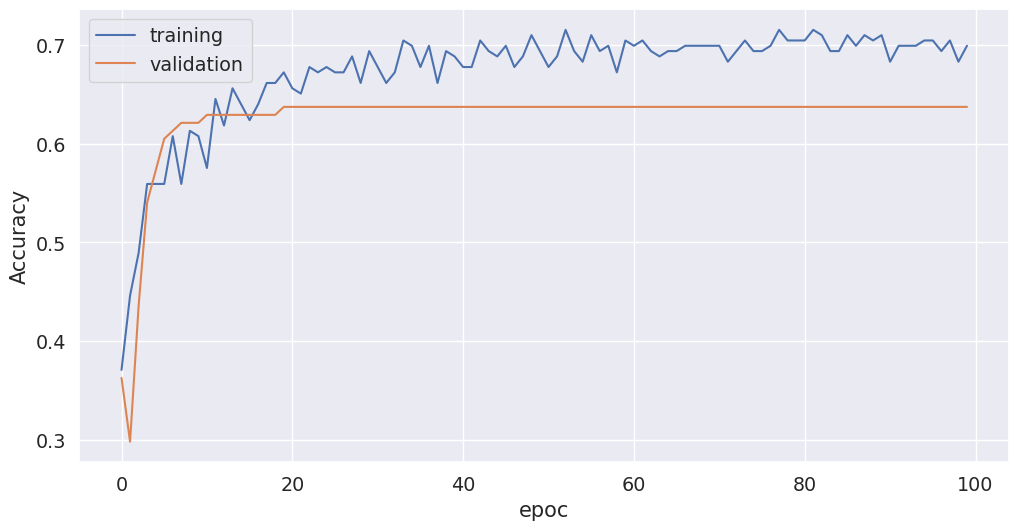

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 11.7723 - accuracy: 0.6875

186/186 [==============================] - 0s 935us/step - loss: 12.9013 - accuracy: 0.5753 - val_loss: 12.2225 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 16.3559 - accuracy: 0.6250

186/186 [==============================] - 0s 69us/step - loss: 11.7984 - accuracy: 0.6613 - val_loss: 9.0167 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 15.3253 - accuracy: 0.5625

186/186 [==============================] - 0s 60us/step - loss: 9.8770 - accuracy: 0.6505 - val_loss: 6.7045 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.0268 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 7.4647 - accuracy: 0.5806 - val_loss: 4.6533 - val_accuracy: 0.6210


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.5637 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 9.3406 - accuracy: 0.6613 - val_loss: 2.9012 - val_accuracy: 0.5645


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.7223 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 5.0285 - accuracy: 0.6290 - val_loss: 1.9129 - val_accuracy: 0.5000


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6238 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 4.5956 - accuracy: 0.5538 - val_loss: 1.2288 - val_accuracy: 0.4839


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.0937 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 3.7979 - accuracy: 0.5860 - val_loss: 0.9398 - val_accuracy: 0.4758


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0545 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 3.4015 - accuracy: 0.5215 - val_loss: 0.8651 - val_accuracy: 0.4677


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 12.7006 - accuracy: 0.3750

186/186 [==============================] - 0s 57us/step - loss: 5.6918 - accuracy: 0.4946 - val_loss: 0.8377 - val_accuracy: 0.4194


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.7282 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 3.4304 - accuracy: 0.4892 - val_loss: 0.8568 - val_accuracy: 0.3790


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.7298 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 4.2090 - accuracy: 0.5269 - val_loss: 0.8386 - val_accuracy: 0.3629


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.5803 - accuracy: 0.4688

186/186 [==============================] - 0s 60us/step - loss: 2.9306 - accuracy: 0.4516 - val_loss: 0.8218 - val_accuracy: 0.3629


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6992 - accuracy: 0.4062

186/186 [==============================] - 0s 60us/step - loss: 3.1549 - accuracy: 0.4570 - val_loss: 0.8081 - val_accuracy: 0.3548


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2199 - accuracy: 0.5000

186/186 [==============================] - 0s 61us/step - loss: 2.1213 - accuracy: 0.4892 - val_loss: 0.7908 - val_accuracy: 0.3468


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5166 - accuracy: 0.5312

186/186 [==============================] - 0s 62us/step - loss: 2.1709 - accuracy: 0.4409 - val_loss: 0.7752 - val_accuracy: 0.3548


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6053 - accuracy: 0.5000

186/186 [==============================] - 0s 54us/step - loss: 1.6711 - accuracy: 0.4301 - val_loss: 0.7715 - val_accuracy: 0.3548


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.4288 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 2.2833 - accuracy: 0.4409 - val_loss: 0.7723 - val_accuracy: 0.3548


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9100 - accuracy: 0.4062

186/186 [==============================] - 0s 55us/step - loss: 2.0930 - accuracy: 0.4785 - val_loss: 0.7656 - val_accuracy: 0.3548


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6699 - accuracy: 0.4375

186/186 [==============================] - 0s 59us/step - loss: 1.6191 - accuracy: 0.4624 - val_loss: 0.7649 - val_accuracy: 0.3548


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.5298 - accuracy: 0.3750

186/186 [==============================] - 0s 55us/step - loss: 2.1272 - accuracy: 0.4194 - val_loss: 0.7601 - val_accuracy: 0.3548


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2336 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 1.1543 - accuracy: 0.4839 - val_loss: 0.7500 - val_accuracy: 0.3548


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1156 - accuracy: 0.4375

186/186 [==============================] - 0s 60us/step - loss: 1.7202 - accuracy: 0.4624 - val_loss: 0.7522 - val_accuracy: 0.3548


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9220 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 1.4757 - accuracy: 0.5538 - val_loss: 0.7482 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7176 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 1.4332 - accuracy: 0.6075 - val_loss: 0.7457 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0018 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 1.5774 - accuracy: 0.6667 - val_loss: 0.7435 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3005 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 1.5480 - accuracy: 0.6667 - val_loss: 0.7355 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 1.5816 - accuracy: 0.6398 - val_loss: 0.7354 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6933 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 1.1045 - accuracy: 0.7043 - val_loss: 0.7286 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6895 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.9916 - accuracy: 0.6882 - val_loss: 0.7284 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8513 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.9090 - accuracy: 0.6667 - val_loss: 0.7272 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9342 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 1.1462 - accuracy: 0.6828 - val_loss: 0.7259 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0566 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.8004 - accuracy: 0.6720 - val_loss: 0.7265 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1617 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 1.0334 - accuracy: 0.6559 - val_loss: 0.7255 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1224 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 1.0912 - accuracy: 0.6452 - val_loss: 0.7228 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7568 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.8301 - accuracy: 0.6398 - val_loss: 0.7213 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6077 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.7451 - accuracy: 0.6505 - val_loss: 0.7233 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8518 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.7931 - accuracy: 0.6774 - val_loss: 0.7215 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6749 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 1.1469 - accuracy: 0.6613 - val_loss: 0.7232 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8799 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.8593 - accuracy: 0.6667 - val_loss: 0.7244 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6236 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 1.0401 - accuracy: 0.6720 - val_loss: 0.7205 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.9131 - accuracy: 0.6720 - val_loss: 0.7166 - val_accuracy: 0.6371


Epoch 43/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6439 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.7722 - accuracy: 0.6828 - val_loss: 0.7118 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9607 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.7740 - accuracy: 0.6882 - val_loss: 0.7089 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7481 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.7238 - accuracy: 0.7097 - val_loss: 0.7080 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6001 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7179 - accuracy: 0.6774 - val_loss: 0.7062 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2850 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.7664 - accuracy: 0.6935 - val_loss: 0.7063 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7863 - accuracy: 0.4688

186/186 [==============================] - 0s 56us/step - loss: 0.7953 - accuracy: 0.6774 - val_loss: 0.7044 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7646 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.6296 - accuracy: 0.6720 - val_loss: 0.7022 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5962 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.7485 - accuracy: 0.6828 - val_loss: 0.6947 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6587 - accuracy: 0.6989 - val_loss: 0.6876 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6040 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.7438 - accuracy: 0.6828 - val_loss: 0.6785 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6087 - accuracy: 0.6882 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5836 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6301 - accuracy: 0.6935 - val_loss: 0.6622 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7483 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6599 - accuracy: 0.6989 - val_loss: 0.6542 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6831 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6965 - accuracy: 0.6935 - val_loss: 0.6401 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0890 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.6980 - accuracy: 0.6935 - val_loss: 0.6324 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5404 - accuracy: 0.7151 - val_loss: 0.6236 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5593 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5782 - accuracy: 0.6882 - val_loss: 0.6194 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4533 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5578 - accuracy: 0.7043 - val_loss: 0.6176 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5407 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5558 - accuracy: 0.6774 - val_loss: 0.6037 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4166 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6038 - accuracy: 0.6935 - val_loss: 0.5998 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.5734 - accuracy: 0.6989 - val_loss: 0.5928 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4872 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5193 - accuracy: 0.7043 - val_loss: 0.5836 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5472 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.5071 - accuracy: 0.7043 - val_loss: 0.5782 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5731 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5341 - accuracy: 0.7097 - val_loss: 0.5773 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4526 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5415 - accuracy: 0.6935 - val_loss: 0.5699 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5958 - accuracy: 0.6935 - val_loss: 0.5696 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5182 - accuracy: 0.7043 - val_loss: 0.5660 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5225 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5412 - accuracy: 0.6989 - val_loss: 0.5597 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5542 - accuracy: 0.6989 - val_loss: 0.5583 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5623 - accuracy: 0.7043 - val_loss: 0.5577 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4216 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4819 - accuracy: 0.7097 - val_loss: 0.5529 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5617 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4985 - accuracy: 0.6989 - val_loss: 0.5471 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5919 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4889 - accuracy: 0.6989 - val_loss: 0.5440 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4719 - accuracy: 0.7097 - val_loss: 0.5432 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4764 - accuracy: 0.6935 - val_loss: 0.5436 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4924 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4918 - accuracy: 0.6989 - val_loss: 0.5445 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4909 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.4810 - accuracy: 0.6989 - val_loss: 0.5404 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6386 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5041 - accuracy: 0.7204 - val_loss: 0.5389 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5038 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5019 - accuracy: 0.6935 - val_loss: 0.5384 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4877 - accuracy: 0.7043 - val_loss: 0.5337 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5082 - accuracy: 0.6989 - val_loss: 0.5310 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5087 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.4461 - accuracy: 0.7097 - val_loss: 0.5274 - val_accuracy: 0.6371


Epoch 85/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4546 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4719 - accuracy: 0.7097 - val_loss: 0.5226 - val_accuracy: 0.6371


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4423 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4842 - accuracy: 0.7097 - val_loss: 0.5152 - val_accuracy: 0.6371


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3682 - accuracy: 0.9062



186/186 [==============================] - 0s 62us/step - loss: 0.4531 - accuracy: 0.7151 - val_loss: 0.5153 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.4950 - accuracy: 0.7097 - val_loss: 0.5103 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5021 - accuracy: 0.6989 - val_loss: 0.5097 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4828 - accuracy: 0.7097 - val_loss: 0.5047 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4465 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5216 - accuracy: 0.7043 - val_loss: 0.5076 - val_accuracy: 0.6371


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5822 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.4394 - accuracy: 0.7097 - val_loss: 0.5069 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4824 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 0.4794 - accuracy: 0.6935 - val_loss: 0.5051 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4430 - accuracy: 0.7043 - val_loss: 0.5003 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.4433 - accuracy: 0.7097 - val_loss: 0.5003 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4528 - accuracy: 0.7043 - val_loss: 0.4993 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.6875



186/186 [==============================] - 0s 56us/step - loss: 0.4673 - accuracy: 0.7043 - val_loss: 0.4951 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.5156 - accuracy: 0.6882 - val_loss: 0.4981 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.4507 - accuracy: 0.7097 - val_loss: 0.5002 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.4409 - accuracy: 0.7043 - val_loss: 0.5021 - val_accuracy: 0.6371


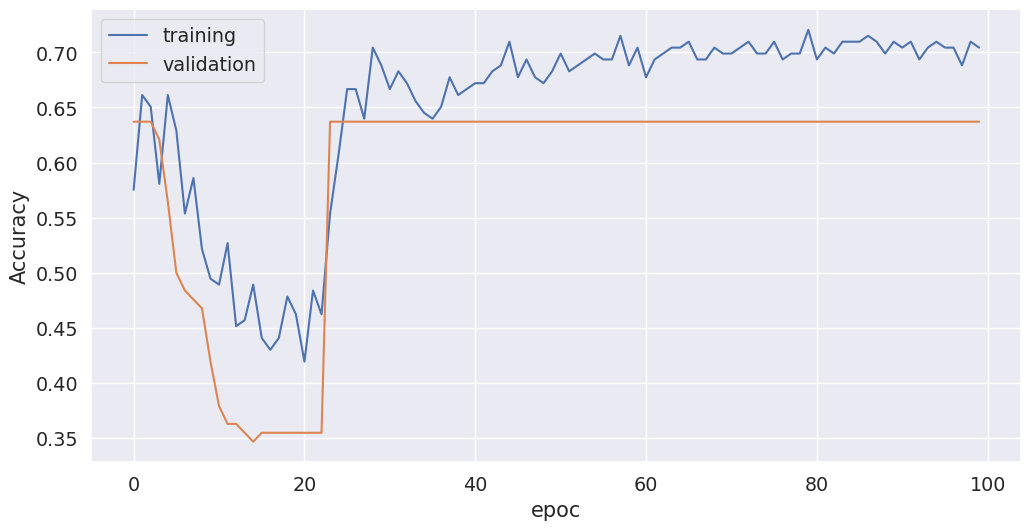

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 62.9731 - accuracy: 0.2500

186/186 [==============================] - 0s 1ms/step - loss: 40.8362 - accuracy: 0.3011 - val_loss: 24.6398 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 27.2031 - accuracy: 0.3438

186/186 [==============================] - 0s 72us/step - loss: 30.8393 - accuracy: 0.3118 - val_loss: 18.7441 - val_accuracy: 0.3629


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 31.9729 - accuracy: 0.2812

186/186 [==============================] - 0s 60us/step - loss: 27.1091 - accuracy: 0.3065 - val_loss: 14.8192 - val_accuracy: 0.3629


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 17.0883 - accuracy: 0.4062

186/186 [==============================] - 0s 65us/step - loss: 22.5144 - accuracy: 0.3011 - val_loss: 11.4097 - val_accuracy: 0.3629


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 21.9770 - accuracy: 0.2500

186/186 [==============================] - 0s 68us/step - loss: 15.8917 - accuracy: 0.3226 - val_loss: 8.5805 - val_accuracy: 0.3629


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 10.8530 - accuracy: 0.4375

186/186 [==============================] - 0s 63us/step - loss: 13.5861 - accuracy: 0.3065 - val_loss: 5.8333 - val_accuracy: 0.3710


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 14.4021 - accuracy: 0.2500

186/186 [==============================] - 0s 57us/step - loss: 10.5810 - accuracy: 0.3441 - val_loss: 3.6123 - val_accuracy: 0.3629


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.6664 - accuracy: 0.2812

186/186 [==============================] - 0s 61us/step - loss: 7.8409 - accuracy: 0.3441 - val_loss: 2.0986 - val_accuracy: 0.3226


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.8820 - accuracy: 0.5000

186/186 [==============================] - 0s 57us/step - loss: 6.1131 - accuracy: 0.4086 - val_loss: 1.4970 - val_accuracy: 0.3145


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.2950 - accuracy: 0.2812

186/186 [==============================] - 0s 66us/step - loss: 5.4438 - accuracy: 0.4140 - val_loss: 1.2312 - val_accuracy: 0.3468


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.0028 - accuracy: 0.5312

186/186 [==============================] - 0s 60us/step - loss: 3.8153 - accuracy: 0.5215 - val_loss: 1.0641 - val_accuracy: 0.4274


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.2356 - accuracy: 0.2812

186/186 [==============================] - 0s 60us/step - loss: 3.8121 - accuracy: 0.4355 - val_loss: 0.9331 - val_accuracy: 0.5887


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.9619 - accuracy: 0.4688

186/186 [==============================] - 0s 55us/step - loss: 2.7412 - accuracy: 0.5538 - val_loss: 0.9088 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.5266 - accuracy: 0.4688

186/186 [==============================] - 0s 55us/step - loss: 2.6726 - accuracy: 0.5484 - val_loss: 0.8947 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4559 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 2.8464 - accuracy: 0.5753 - val_loss: 0.8875 - val_accuracy: 0.6452


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5972 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 2.0070 - accuracy: 0.5699 - val_loss: 0.8872 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3382 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 2.2554 - accuracy: 0.6667 - val_loss: 0.8850 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5558 - accuracy: 0.5312



186/186 [==============================] - 0s 59us/step - loss: 1.5985 - accuracy: 0.6452 - val_loss: 0.8828 - val_accuracy: 0.6371


Epoch 19/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.8781 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 1.5328 - accuracy: 0.6613 - val_loss: 0.8807 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9003 - accuracy: 0.5312

186/186 [==============================] - 0s 56us/step - loss: 1.2090 - accuracy: 0.6613 - val_loss: 0.8785 - val_accuracy: 0.6371


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9554 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 1.2773 - accuracy: 0.6882 - val_loss: 0.8762 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2727 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 1.0004 - accuracy: 0.6667 - val_loss: 0.8741 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1469 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 1.7191 - accuracy: 0.6505 - val_loss: 0.8716 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9087 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 1.5805 - accuracy: 0.6774 - val_loss: 0.8694 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7753 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 1.0312 - accuracy: 0.7151 - val_loss: 0.8671 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2415 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 1.3090 - accuracy: 0.6720 - val_loss: 0.8649 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9404 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.9613 - accuracy: 0.6935 - val_loss: 0.8627 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8450 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.9566 - accuracy: 0.6505 - val_loss: 0.8606 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9095 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.8357 - accuracy: 0.7312 - val_loss: 0.8584 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9905 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 1.0088 - accuracy: 0.6505 - val_loss: 0.8562 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9091 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 1.6317 - accuracy: 0.6989 - val_loss: 0.8538 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8497 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.8452 - accuracy: 0.7097 - val_loss: 0.8516 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0145 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.8872 - accuracy: 0.7151 - val_loss: 0.8494 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7874 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.9852 - accuracy: 0.6828 - val_loss: 0.8469 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9345 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 1.1159 - accuracy: 0.6882 - val_loss: 0.8447 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8616 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.9259 - accuracy: 0.6667 - val_loss: 0.8426 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7766 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.8464 - accuracy: 0.6935 - val_loss: 0.8404 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7906 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.8329 - accuracy: 0.7097 - val_loss: 0.8381 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7774 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.8084 - accuracy: 0.7258 - val_loss: 0.8358 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8366 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.8084 - accuracy: 0.6935 - val_loss: 0.8333 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7752 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.8155 - accuracy: 0.6989 - val_loss: 0.8306 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9408 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.8524 - accuracy: 0.6667 - val_loss: 0.8280 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8131 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.8012 - accuracy: 0.7151 - val_loss: 0.8255 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8262 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.8022 - accuracy: 0.6989 - val_loss: 0.8230 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7875 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.7787 - accuracy: 0.7204 - val_loss: 0.8205 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2063 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.8410 - accuracy: 0.7151 - val_loss: 0.8185 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8310 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 0.8391 - accuracy: 0.7151 - val_loss: 0.8165 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.7783 - accuracy: 0.7366 - val_loss: 0.8145 - val_accuracy: 0.6371


Epoch 49/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7825 - accuracy: 0.7188



186/186 [==============================] - 0s 63us/step - loss: 0.7713 - accuracy: 0.7312 - val_loss: 0.8124 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8758 - accuracy: 0.5312

186/186 [==============================] - 0s 56us/step - loss: 0.7874 - accuracy: 0.7043 - val_loss: 0.8101 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7830 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7907 - accuracy: 0.6882 - val_loss: 0.8079 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8071 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.7849 - accuracy: 0.6989 - val_loss: 0.8056 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8133 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.8999 - accuracy: 0.7043 - val_loss: 0.8036 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8320 - accuracy: 0.6875



186/186 [==============================] - 0s 58us/step - loss: 0.9036 - accuracy: 0.6828 - val_loss: 0.8018 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9294 - accuracy: 0.5312

186/186 [==============================] - 0s 56us/step - loss: 0.7886 - accuracy: 0.7204 - val_loss: 0.8006 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9181 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.7820 - accuracy: 0.7043 - val_loss: 0.7992 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7230 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.7847 - accuracy: 0.7204 - val_loss: 0.7979 - val_accuracy: 0.6371


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7738 - accuracy: 0.7188

186/186 [==============================] - 0s 68us/step - loss: 0.7859 - accuracy: 0.6935 - val_loss: 0.7966 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7609 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.7698 - accuracy: 0.6935 - val_loss: 0.7955 - val_accuracy: 0.6371


Epoch 60/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7782 - accuracy: 0.6562



186/186 [==============================] - 0s 58us/step - loss: 0.7494 - accuracy: 0.6989 - val_loss: 0.7943 - val_accuracy: 0.6371


Epoch 61/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8100 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.7507 - accuracy: 0.7204 - val_loss: 0.7931 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6376 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.7321 - accuracy: 0.7151 - val_loss: 0.7917 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7719 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.7015 - accuracy: 0.7634 - val_loss: 0.7904 - val_accuracy: 0.6371


Epoch 64/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7898 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.7583 - accuracy: 0.6828 - val_loss: 0.7890 - val_accuracy: 0.6371


Epoch 65/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6856 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.7633 - accuracy: 0.6882 - val_loss: 0.7876 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8247 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.7654 - accuracy: 0.6989 - val_loss: 0.7861 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7747 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.7577 - accuracy: 0.7151 - val_loss: 0.7846 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.7131 - accuracy: 0.7312 - val_loss: 0.7828 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7760 - accuracy: 0.6562



186/186 [==============================] - 0s 57us/step - loss: 0.7147 - accuracy: 0.7204 - val_loss: 0.7811 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7346 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.7351 - accuracy: 0.7043 - val_loss: 0.7793 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7085 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7919 - accuracy: 0.7258 - val_loss: 0.7779 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7488 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.7072 - accuracy: 0.7258 - val_loss: 0.7769 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.7501 - accuracy: 0.7043 - val_loss: 0.7756 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7441 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.7301 - accuracy: 0.6989 - val_loss: 0.7745 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6850 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6895 - accuracy: 0.7366 - val_loss: 0.7733 - val_accuracy: 0.6371


Epoch 76/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7119 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 0.7031 - accuracy: 0.7312 - val_loss: 0.7722 - val_accuracy: 0.6371


Epoch 77/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7076 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.6895 - accuracy: 0.7366 - val_loss: 0.7710 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7335 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.7075 - accuracy: 0.7043 - val_loss: 0.7698 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7282 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.7003 - accuracy: 0.7258 - val_loss: 0.7687 - val_accuracy: 0.6371


Epoch 80/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6434 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6895 - accuracy: 0.7366 - val_loss: 0.7676 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7085 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.7148 - accuracy: 0.7097 - val_loss: 0.7663 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6782 - accuracy: 0.7188



186/186 [==============================] - 0s 57us/step - loss: 0.6824 - accuracy: 0.7312 - val_loss: 0.7650 - val_accuracy: 0.6371


Epoch 83/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6896 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6485 - accuracy: 0.7581 - val_loss: 0.7640 - val_accuracy: 0.6371


Epoch 84/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8519 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.7074 - accuracy: 0.7204 - val_loss: 0.7630 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7467 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.7011 - accuracy: 0.6882 - val_loss: 0.7620 - val_accuracy: 0.6371


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7535 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.6811 - accuracy: 0.7204 - val_loss: 0.7591 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7012 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6809 - accuracy: 0.7151 - val_loss: 0.7579 - val_accuracy: 0.6371


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7251 - accuracy: 0.6250

186/186 [==============================] - 0s 64us/step - loss: 0.7205 - accuracy: 0.6935 - val_loss: 0.7547 - val_accuracy: 0.6371


Epoch 89/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.6570 - accuracy: 0.7527 - val_loss: 0.7499 - val_accuracy: 0.6371


Epoch 90/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7250 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.6872 - accuracy: 0.7204 - val_loss: 0.7520 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.6597 - accuracy: 0.7527 - val_loss: 0.7381 - val_accuracy: 0.6452


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7297 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6573 - accuracy: 0.7258 - val_loss: 0.7099 - val_accuracy: 0.6694


Epoch 93/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.6341 - accuracy: 0.7688 - val_loss: 0.6917 - val_accuracy: 0.6855


Epoch 94/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7173 - accuracy: 0.7188



186/186 [==============================] - 0s 66us/step - loss: 0.7034 - accuracy: 0.7204 - val_loss: 0.7068 - val_accuracy: 0.6694


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5723 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6232 - accuracy: 0.7796 - val_loss: 0.6706 - val_accuracy: 0.7258


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6577 - accuracy: 0.7366 - val_loss: 0.6821 - val_accuracy: 0.6935


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6392 - accuracy: 0.7634 - val_loss: 0.6968 - val_accuracy: 0.6774


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6546 - accuracy: 0.7634 - val_loss: 0.6852 - val_accuracy: 0.6774


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6949 - accuracy: 0.7581 - val_loss: 0.6788 - val_accuracy: 0.7097


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6673 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6313 - accuracy: 0.7742 - val_loss: 0.6347 - val_accuracy: 0.7500


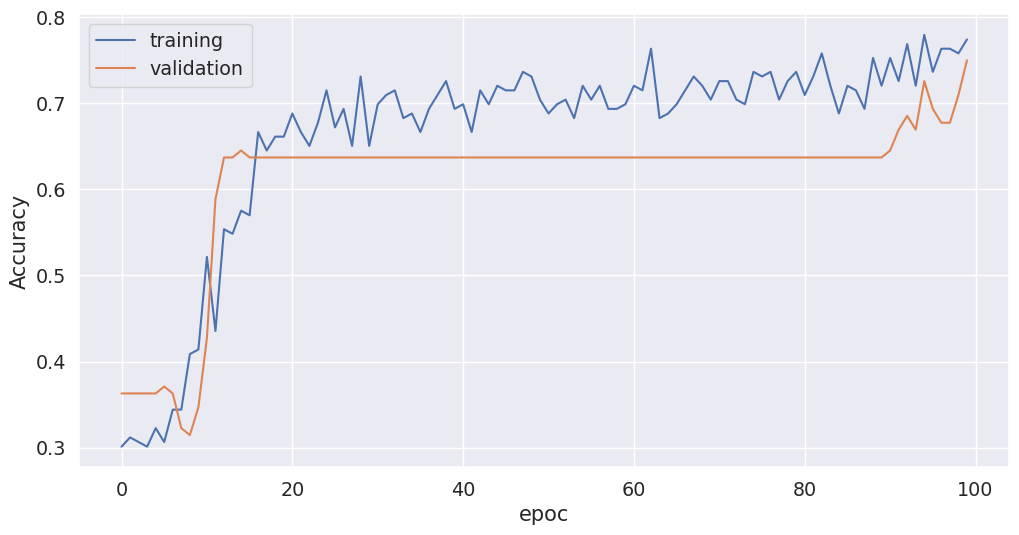

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.7269 - accuracy: 0.7500

186/186 [==============================] - 0s 682us/step - loss: 4.2290 - accuracy: 0.7043 - val_loss: 4.9218 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5059 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 3.9102 - accuracy: 0.7043 - val_loss: 4.6130 - val_accuracy: 0.6371


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5473 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 3.6776 - accuracy: 0.6989 - val_loss: 4.3522 - val_accuracy: 0.6371


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9163 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 3.4765 - accuracy: 0.6989 - val_loss: 4.1093 - val_accuracy: 0.6371


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.7657 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 3.2827 - accuracy: 0.6989 - val_loss: 3.8652 - val_accuracy: 0.6371


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5320 - accuracy: 0.4688

186/186 [==============================] - 0s 58us/step - loss: 3.1002 - accuracy: 0.6989 - val_loss: 3.6456 - val_accuracy: 0.6371


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8144 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 2.9267 - accuracy: 0.6989 - val_loss: 3.4202 - val_accuracy: 0.6371


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2482 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 2.7508 - accuracy: 0.6989 - val_loss: 3.1948 - val_accuracy: 0.6371


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0147 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 2.5798 - accuracy: 0.6989 - val_loss: 2.9858 - val_accuracy: 0.6371


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6814 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 2.4174 - accuracy: 0.6989 - val_loss: 2.7804 - val_accuracy: 0.6371


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1382 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 2.2561 - accuracy: 0.6989 - val_loss: 2.5706 - val_accuracy: 0.6371


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3561 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 2.0905 - accuracy: 0.6989 - val_loss: 2.3628 - val_accuracy: 0.6371


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 1.9299 - accuracy: 0.6989 - val_loss: 2.1607 - val_accuracy: 0.6371


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0061 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 1.7794 - accuracy: 0.6989 - val_loss: 1.9841 - val_accuracy: 0.6371


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9284 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 1.6463 - accuracy: 0.6989 - val_loss: 1.8156 - val_accuracy: 0.6371


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3307 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 1.5151 - accuracy: 0.6989 - val_loss: 1.6484 - val_accuracy: 0.6371


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8616 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 1.3945 - accuracy: 0.6935 - val_loss: 1.4995 - val_accuracy: 0.6371


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7215 - accuracy: 0.6250



186/186 [==============================] - 0s 55us/step - loss: 1.2842 - accuracy: 0.6935 - val_loss: 1.3603 - val_accuracy: 0.6371


Epoch 19/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.4038 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 1.1824 - accuracy: 0.6935 - val_loss: 1.2309 - val_accuracy: 0.6371


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2841 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 1.0925 - accuracy: 0.6935 - val_loss: 1.1191 - val_accuracy: 0.6452


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7565 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 1.0093 - accuracy: 0.7097 - val_loss: 1.0145 - val_accuracy: 0.6613


Epoch 22/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7814 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.9370 - accuracy: 0.7097 - val_loss: 0.9314 - val_accuracy: 0.6774


Epoch 23/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8517 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.8747 - accuracy: 0.7204 - val_loss: 0.8613 - val_accuracy: 0.7097


Epoch 24/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8004 - accuracy: 0.5938



186/186 [==============================] - 0s 56us/step - loss: 0.8219 - accuracy: 0.7258 - val_loss: 0.8105 - val_accuracy: 0.7177


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7463 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7763 - accuracy: 0.7419 - val_loss: 0.7613 - val_accuracy: 0.7419


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5339 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.7349 - accuracy: 0.7903 - val_loss: 0.7248 - val_accuracy: 0.7581


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2130 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6980 - accuracy: 0.7903 - val_loss: 0.6927 - val_accuracy: 0.7581


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6634 - accuracy: 0.7849 - val_loss: 0.6633 - val_accuracy: 0.7581


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.6338 - accuracy: 0.7957 - val_loss: 0.6362 - val_accuracy: 0.7581


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6014 - accuracy: 0.7957 - val_loss: 0.6085 - val_accuracy: 0.7742


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5762 - accuracy: 0.7957 - val_loss: 0.5877 - val_accuracy: 0.7581


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5558 - accuracy: 0.8118 - val_loss: 0.5714 - val_accuracy: 0.7742


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5392 - accuracy: 0.8118 - val_loss: 0.5572 - val_accuracy: 0.7742


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5232 - accuracy: 0.8280 - val_loss: 0.5429 - val_accuracy: 0.7742


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5088 - accuracy: 0.8333 - val_loss: 0.5264 - val_accuracy: 0.8065


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4957 - accuracy: 0.8280 - val_loss: 0.5138 - val_accuracy: 0.8065


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4859 - accuracy: 0.8172 - val_loss: 0.5050 - val_accuracy: 0.8065


Epoch 38/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4755 - accuracy: 0.8065 - val_loss: 0.4978 - val_accuracy: 0.8065


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4652 - accuracy: 0.8011 - val_loss: 0.4903 - val_accuracy: 0.8226


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4570 - accuracy: 0.8226 - val_loss: 0.4845 - val_accuracy: 0.8306


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4495 - accuracy: 0.8118 - val_loss: 0.4811 - val_accuracy: 0.8226


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3756 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4445 - accuracy: 0.8118 - val_loss: 0.4782 - val_accuracy: 0.8145


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4407 - accuracy: 0.8172 - val_loss: 0.4757 - val_accuracy: 0.8065


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4364 - accuracy: 0.8172 - val_loss: 0.4717 - val_accuracy: 0.8065


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.7188



186/186 [==============================] - 0s 52us/step - loss: 0.4300 - accuracy: 0.8172 - val_loss: 0.4693 - val_accuracy: 0.7984


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.7500



186/186 [==============================] - 0s 55us/step - loss: 0.4261 - accuracy: 0.8011 - val_loss: 0.4656 - val_accuracy: 0.7903


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4202 - accuracy: 0.8226 - val_loss: 0.4639 - val_accuracy: 0.7903


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4137 - accuracy: 0.8118 - val_loss: 0.4646 - val_accuracy: 0.7823


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4108 - accuracy: 0.8226 - val_loss: 0.4655 - val_accuracy: 0.7823


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.4068 - accuracy: 0.8172 - val_loss: 0.4663 - val_accuracy: 0.7742


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.4044 - accuracy: 0.8280 - val_loss: 0.4675 - val_accuracy: 0.7742


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4004 - accuracy: 0.8280 - val_loss: 0.4678 - val_accuracy: 0.7742


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3976 - accuracy: 0.8280 - val_loss: 0.4684 - val_accuracy: 0.7742


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.3969 - accuracy: 0.8333 - val_loss: 0.4691 - val_accuracy: 0.7742


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3931 - accuracy: 0.8226 - val_loss: 0.4696 - val_accuracy: 0.7661


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5031 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3908 - accuracy: 0.8280 - val_loss: 0.4703 - val_accuracy: 0.7742


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3903 - accuracy: 0.8280 - val_loss: 0.4672 - val_accuracy: 0.7742


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2091 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3898 - accuracy: 0.8226 - val_loss: 0.4679 - val_accuracy: 0.7661


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3876 - accuracy: 0.8280 - val_loss: 0.4685 - val_accuracy: 0.7742


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5141 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3863 - accuracy: 0.8280 - val_loss: 0.4693 - val_accuracy: 0.7742


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3839 - accuracy: 0.8333 - val_loss: 0.4690 - val_accuracy: 0.7661


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3825 - accuracy: 0.8387 - val_loss: 0.4685 - val_accuracy: 0.7581


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3819 - accuracy: 0.8280 - val_loss: 0.4690 - val_accuracy: 0.7661


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3796 - accuracy: 0.8387 - val_loss: 0.4692 - val_accuracy: 0.7661


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5233 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3817 - accuracy: 0.8280 - val_loss: 0.4702 - val_accuracy: 0.7661


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3775 - accuracy: 0.8333 - val_loss: 0.4676 - val_accuracy: 0.7742


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.3768 - accuracy: 0.8226 - val_loss: 0.4672 - val_accuracy: 0.7742


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3764 - accuracy: 0.8333 - val_loss: 0.4676 - val_accuracy: 0.7742


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3741 - accuracy: 0.8333 - val_loss: 0.4689 - val_accuracy: 0.7742


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3731 - accuracy: 0.8441 - val_loss: 0.4705 - val_accuracy: 0.7903


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4204 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3711 - accuracy: 0.8441 - val_loss: 0.4683 - val_accuracy: 0.7742


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3728 - accuracy: 0.8280 - val_loss: 0.4690 - val_accuracy: 0.7742


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3702 - accuracy: 0.8387 - val_loss: 0.4692 - val_accuracy: 0.7742


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3718 - accuracy: 0.8280 - val_loss: 0.4701 - val_accuracy: 0.7742


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3668 - accuracy: 0.8333 - val_loss: 0.4721 - val_accuracy: 0.7742


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3672 - accuracy: 0.8387 - val_loss: 0.4729 - val_accuracy: 0.7742


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3677 - accuracy: 0.8387 - val_loss: 0.4710 - val_accuracy: 0.7903


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3662 - accuracy: 0.8333 - val_loss: 0.4694 - val_accuracy: 0.7742


Epoch 79/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4342 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.3637 - accuracy: 0.8333 - val_loss: 0.4698 - val_accuracy: 0.7742


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3623 - accuracy: 0.8280 - val_loss: 0.4700 - val_accuracy: 0.7742


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8750

186/186 [==============================] - 0s 76us/step - loss: 0.3648 - accuracy: 0.8280 - val_loss: 0.4694 - val_accuracy: 0.7742


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3595 - accuracy: 0.8387 - val_loss: 0.4687 - val_accuracy: 0.7742


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1741 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3587 - accuracy: 0.8387 - val_loss: 0.4717 - val_accuracy: 0.7903


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3599 - accuracy: 0.8280 - val_loss: 0.4718 - val_accuracy: 0.7903


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3573 - accuracy: 0.8172 - val_loss: 0.4701 - val_accuracy: 0.7742


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3580 - accuracy: 0.8333 - val_loss: 0.4714 - val_accuracy: 0.7823


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3563 - accuracy: 0.8280 - val_loss: 0.4706 - val_accuracy: 0.7742


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3540 - accuracy: 0.8226 - val_loss: 0.4709 - val_accuracy: 0.7742


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.3538 - accuracy: 0.8441 - val_loss: 0.4680 - val_accuracy: 0.7742


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3547 - accuracy: 0.8333 - val_loss: 0.4688 - val_accuracy: 0.7742


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3535 - accuracy: 0.8387 - val_loss: 0.4701 - val_accuracy: 0.7823


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3514 - accuracy: 0.8280 - val_loss: 0.4709 - val_accuracy: 0.7823


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3504 - accuracy: 0.8280 - val_loss: 0.4707 - val_accuracy: 0.7823


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3506 - accuracy: 0.8172 - val_loss: 0.4708 - val_accuracy: 0.7823


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3507 - accuracy: 0.8441 - val_loss: 0.4725 - val_accuracy: 0.7823


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3496 - accuracy: 0.8333 - val_loss: 0.4731 - val_accuracy: 0.7823


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3487 - accuracy: 0.8226 - val_loss: 0.4697 - val_accuracy: 0.7823


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3475 - accuracy: 0.8333 - val_loss: 0.4709 - val_accuracy: 0.7823


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.3475 - accuracy: 0.8226 - val_loss: 0.4720 - val_accuracy: 0.7742


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3734 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3470 - accuracy: 0.8387 - val_loss: 0.4718 - val_accuracy: 0.7742


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3465 - accuracy: 0.8226 - val_loss: 0.4715 - val_accuracy: 0.7823


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3484 - accuracy: 0.8226 - val_loss: 0.4723 - val_accuracy: 0.7823


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3460 - accuracy: 0.8387 - val_loss: 0.4704 - val_accuracy: 0.7823


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.4734 - val_accuracy: 0.7742


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3436 - accuracy: 0.8172 - val_loss: 0.4730 - val_accuracy: 0.7742


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4071 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3434 - accuracy: 0.8226 - val_loss: 0.4707 - val_accuracy: 0.7823


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3433 - accuracy: 0.8280 - val_loss: 0.4711 - val_accuracy: 0.7823


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4707 - val_accuracy: 0.7823


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.3423 - accuracy: 0.8333 - val_loss: 0.4727 - val_accuracy: 0.7742


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4047 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4701 - val_accuracy: 0.7742


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3418 - accuracy: 0.8226 - val_loss: 0.4707 - val_accuracy: 0.7742


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3405 - accuracy: 0.8226 - val_loss: 0.4707 - val_accuracy: 0.7742


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3413 - accuracy: 0.8441 - val_loss: 0.4714 - val_accuracy: 0.7742


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4736 - val_accuracy: 0.7742


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1831 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3393 - accuracy: 0.8280 - val_loss: 0.4742 - val_accuracy: 0.7742


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3388 - accuracy: 0.8280 - val_loss: 0.4739 - val_accuracy: 0.7742


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2407 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3409 - accuracy: 0.8226 - val_loss: 0.4733 - val_accuracy: 0.7823


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3384 - accuracy: 0.8333 - val_loss: 0.4711 - val_accuracy: 0.7823


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3378 - accuracy: 0.8441 - val_loss: 0.4733 - val_accuracy: 0.7742


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3382 - accuracy: 0.8333 - val_loss: 0.4743 - val_accuracy: 0.7742


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3389 - accuracy: 0.8387 - val_loss: 0.4755 - val_accuracy: 0.7661


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3390 - accuracy: 0.8226 - val_loss: 0.4756 - val_accuracy: 0.7661


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3363 - accuracy: 0.8280 - val_loss: 0.4746 - val_accuracy: 0.7661


Epoch 124/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3362 - accuracy: 0.8387 - val_loss: 0.4740 - val_accuracy: 0.7661


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3376 - accuracy: 0.8280 - val_loss: 0.4744 - val_accuracy: 0.7661


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3368 - accuracy: 0.8387 - val_loss: 0.4749 - val_accuracy: 0.7661


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4768 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3344 - accuracy: 0.8333 - val_loss: 0.4771 - val_accuracy: 0.7661


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3365 - accuracy: 0.8333 - val_loss: 0.4736 - val_accuracy: 0.7742


Epoch 129/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3369 - accuracy: 0.8387 - val_loss: 0.4757 - val_accuracy: 0.7661


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3347 - accuracy: 0.8387 - val_loss: 0.4782 - val_accuracy: 0.7661


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4611 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3359 - accuracy: 0.8280 - val_loss: 0.4723 - val_accuracy: 0.7661


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4109 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3343 - accuracy: 0.8441 - val_loss: 0.4725 - val_accuracy: 0.7661


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3351 - accuracy: 0.8387 - val_loss: 0.4724 - val_accuracy: 0.7661


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3353 - accuracy: 0.8280 - val_loss: 0.4733 - val_accuracy: 0.7661


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3335 - accuracy: 0.8333 - val_loss: 0.4762 - val_accuracy: 0.7661


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3353 - accuracy: 0.8226 - val_loss: 0.4773 - val_accuracy: 0.7661


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3328 - accuracy: 0.8333 - val_loss: 0.4780 - val_accuracy: 0.7661


Epoch 138/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3352 - accuracy: 0.8333 - val_loss: 0.4761 - val_accuracy: 0.7661


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.3332 - accuracy: 0.8387 - val_loss: 0.4745 - val_accuracy: 0.7661


Epoch 140/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3332 - accuracy: 0.8333 - val_loss: 0.4748 - val_accuracy: 0.7661


Epoch 141/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3326 - accuracy: 0.8333 - val_loss: 0.4739 - val_accuracy: 0.7661


Epoch 142/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438



186/186 [==============================] - 0s 60us/step - loss: 0.3334 - accuracy: 0.8280 - val_loss: 0.4746 - val_accuracy: 0.7661


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3328 - accuracy: 0.8226 - val_loss: 0.4744 - val_accuracy: 0.7661


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1763 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3331 - accuracy: 0.8280 - val_loss: 0.4764 - val_accuracy: 0.7661


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3317 - accuracy: 0.8280 - val_loss: 0.4716 - val_accuracy: 0.7823


Epoch 146/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3323 - accuracy: 0.8387 - val_loss: 0.4734 - val_accuracy: 0.7661


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3334 - accuracy: 0.8226 - val_loss: 0.4730 - val_accuracy: 0.7742


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3323 - accuracy: 0.8387 - val_loss: 0.4755 - val_accuracy: 0.7661


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3310 - accuracy: 0.8226 - val_loss: 0.4757 - val_accuracy: 0.7661


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3301 - accuracy: 0.8333 - val_loss: 0.4753 - val_accuracy: 0.7661


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3309 - accuracy: 0.8387 - val_loss: 0.4775 - val_accuracy: 0.7661


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3314 - accuracy: 0.8280 - val_loss: 0.4784 - val_accuracy: 0.7661


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3330 - accuracy: 0.8333 - val_loss: 0.4771 - val_accuracy: 0.7661


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3299 - accuracy: 0.8387 - val_loss: 0.4760 - val_accuracy: 0.7661


Epoch 155/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3306 - accuracy: 0.8333 - val_loss: 0.4738 - val_accuracy: 0.7742


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3299 - accuracy: 0.8387 - val_loss: 0.4789 - val_accuracy: 0.7500


Epoch 157/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3298 - accuracy: 0.8333 - val_loss: 0.4760 - val_accuracy: 0.7661


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3306 - accuracy: 0.8387 - val_loss: 0.4803 - val_accuracy: 0.7500


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3290 - accuracy: 0.8387 - val_loss: 0.4779 - val_accuracy: 0.7581


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3320 - accuracy: 0.8226 - val_loss: 0.4750 - val_accuracy: 0.7661


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3309 - accuracy: 0.8280 - val_loss: 0.4755 - val_accuracy: 0.7661


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3289 - accuracy: 0.8441 - val_loss: 0.4766 - val_accuracy: 0.7581


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3284 - accuracy: 0.8333 - val_loss: 0.4763 - val_accuracy: 0.7581


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3305 - accuracy: 0.8333 - val_loss: 0.4761 - val_accuracy: 0.7581


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3288 - accuracy: 0.8280 - val_loss: 0.4739 - val_accuracy: 0.7581


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3285 - accuracy: 0.8333 - val_loss: 0.4766 - val_accuracy: 0.7500


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3297 - accuracy: 0.8280 - val_loss: 0.4739 - val_accuracy: 0.7661


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3293 - accuracy: 0.8387 - val_loss: 0.4740 - val_accuracy: 0.7661


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3279 - accuracy: 0.8387 - val_loss: 0.4736 - val_accuracy: 0.7742


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3279 - accuracy: 0.8387 - val_loss: 0.4739 - val_accuracy: 0.7742


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3285 - accuracy: 0.8441 - val_loss: 0.4765 - val_accuracy: 0.7500


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3280 - accuracy: 0.8387 - val_loss: 0.4745 - val_accuracy: 0.7500


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3277 - accuracy: 0.8333 - val_loss: 0.4745 - val_accuracy: 0.7581


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3270 - accuracy: 0.8333 - val_loss: 0.4764 - val_accuracy: 0.7500


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3291 - accuracy: 0.8172 - val_loss: 0.4766 - val_accuracy: 0.7500


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1977 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3286 - accuracy: 0.8280 - val_loss: 0.4749 - val_accuracy: 0.7581


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2236 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3263 - accuracy: 0.8280 - val_loss: 0.4751 - val_accuracy: 0.7661


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3289 - accuracy: 0.8333 - val_loss: 0.4721 - val_accuracy: 0.7742


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3326 - accuracy: 0.8333 - val_loss: 0.4742 - val_accuracy: 0.7500


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3266 - accuracy: 0.8333 - val_loss: 0.4763 - val_accuracy: 0.7500


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3265 - accuracy: 0.8280 - val_loss: 0.4734 - val_accuracy: 0.7661


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3276 - accuracy: 0.8333 - val_loss: 0.4758 - val_accuracy: 0.7500


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3264 - accuracy: 0.8387 - val_loss: 0.4785 - val_accuracy: 0.7661


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3285 - accuracy: 0.8280 - val_loss: 0.4756 - val_accuracy: 0.7581


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3258 - accuracy: 0.8280 - val_loss: 0.4752 - val_accuracy: 0.7661


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3271 - accuracy: 0.8333 - val_loss: 0.4722 - val_accuracy: 0.7742


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3266 - accuracy: 0.8387 - val_loss: 0.4726 - val_accuracy: 0.7661


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2098 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3267 - accuracy: 0.8333 - val_loss: 0.4719 - val_accuracy: 0.7581


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3257 - accuracy: 0.8280 - val_loss: 0.4740 - val_accuracy: 0.7661


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3314 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3259 - accuracy: 0.8280 - val_loss: 0.4758 - val_accuracy: 0.7500


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3252 - accuracy: 0.8333 - val_loss: 0.4748 - val_accuracy: 0.7661


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3256 - accuracy: 0.8333 - val_loss: 0.4701 - val_accuracy: 0.7742


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3259 - accuracy: 0.8387 - val_loss: 0.4762 - val_accuracy: 0.7581


Epoch 194/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3252 - accuracy: 0.8280 - val_loss: 0.4734 - val_accuracy: 0.7661


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3256 - accuracy: 0.8280 - val_loss: 0.4742 - val_accuracy: 0.7661


Epoch 196/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3280 - accuracy: 0.8280 - val_loss: 0.4762 - val_accuracy: 0.7581


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3250 - accuracy: 0.8387 - val_loss: 0.4739 - val_accuracy: 0.7581


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3250 - accuracy: 0.8280 - val_loss: 0.4748 - val_accuracy: 0.7500


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3247 - accuracy: 0.8333 - val_loss: 0.4744 - val_accuracy: 0.7581


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3253 - accuracy: 0.8280 - val_loss: 0.4735 - val_accuracy: 0.7661


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3252 - accuracy: 0.8280 - val_loss: 0.4724 - val_accuracy: 0.7661


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3261 - accuracy: 0.8387 - val_loss: 0.4747 - val_accuracy: 0.7661


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3252 - accuracy: 0.8280 - val_loss: 0.4734 - val_accuracy: 0.7661


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5225 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3252 - accuracy: 0.8333 - val_loss: 0.4705 - val_accuracy: 0.7661


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3250 - accuracy: 0.8333 - val_loss: 0.4747 - val_accuracy: 0.7581


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3248 - accuracy: 0.8280 - val_loss: 0.4730 - val_accuracy: 0.7661


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3244 - accuracy: 0.8387 - val_loss: 0.4742 - val_accuracy: 0.7661


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4749 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3241 - accuracy: 0.8387 - val_loss: 0.4766 - val_accuracy: 0.7661


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3267 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3260 - accuracy: 0.8441 - val_loss: 0.4760 - val_accuracy: 0.7581


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3246 - accuracy: 0.8333 - val_loss: 0.4746 - val_accuracy: 0.7661


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3249 - accuracy: 0.8387 - val_loss: 0.4761 - val_accuracy: 0.7661


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.3239 - accuracy: 0.8226 - val_loss: 0.4742 - val_accuracy: 0.7661


Epoch 213/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3238 - accuracy: 0.8280 - val_loss: 0.4775 - val_accuracy: 0.7661


Epoch 214/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3238 - accuracy: 0.8333 - val_loss: 0.4785 - val_accuracy: 0.7661


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3245 - accuracy: 0.8172 - val_loss: 0.4739 - val_accuracy: 0.7661


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3233 - accuracy: 0.8226 - val_loss: 0.4729 - val_accuracy: 0.7661


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3251 - accuracy: 0.8333 - val_loss: 0.4748 - val_accuracy: 0.7661


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3231 - accuracy: 0.8280 - val_loss: 0.4765 - val_accuracy: 0.7661


Epoch 219/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3239 - accuracy: 0.8280 - val_loss: 0.4753 - val_accuracy: 0.7661


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3254 - accuracy: 0.8280 - val_loss: 0.4737 - val_accuracy: 0.7661


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3236 - accuracy: 0.8387 - val_loss: 0.4756 - val_accuracy: 0.7581


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3240 - accuracy: 0.8333 - val_loss: 0.4769 - val_accuracy: 0.7581


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4674 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3244 - accuracy: 0.8172 - val_loss: 0.4752 - val_accuracy: 0.7581


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3229 - accuracy: 0.8280 - val_loss: 0.4756 - val_accuracy: 0.7581


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3231 - accuracy: 0.8333 - val_loss: 0.4753 - val_accuracy: 0.7581


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3249 - accuracy: 0.8226 - val_loss: 0.4769 - val_accuracy: 0.7581


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3234 - accuracy: 0.8280 - val_loss: 0.4763 - val_accuracy: 0.7581


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3219 - accuracy: 0.8333 - val_loss: 0.4797 - val_accuracy: 0.7581


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3236 - accuracy: 0.8226 - val_loss: 0.4732 - val_accuracy: 0.7581


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3231 - accuracy: 0.8333 - val_loss: 0.4758 - val_accuracy: 0.7581


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3229 - accuracy: 0.8226 - val_loss: 0.4750 - val_accuracy: 0.7581


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3229 - accuracy: 0.8226 - val_loss: 0.4774 - val_accuracy: 0.7581


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3225 - accuracy: 0.8226 - val_loss: 0.4770 - val_accuracy: 0.7581


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3225 - accuracy: 0.8280 - val_loss: 0.4763 - val_accuracy: 0.7581


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3227 - accuracy: 0.8333 - val_loss: 0.4732 - val_accuracy: 0.7581


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3237 - accuracy: 0.8226 - val_loss: 0.4734 - val_accuracy: 0.7581


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3228 - accuracy: 0.8387 - val_loss: 0.4763 - val_accuracy: 0.7581


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2041 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3229 - accuracy: 0.8280 - val_loss: 0.4762 - val_accuracy: 0.7581


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3225 - accuracy: 0.8226 - val_loss: 0.4770 - val_accuracy: 0.7581


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3227 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.7661


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3221 - accuracy: 0.8280 - val_loss: 0.4796 - val_accuracy: 0.7661


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3223 - accuracy: 0.8387 - val_loss: 0.4839 - val_accuracy: 0.7661


Epoch 243/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9062



186/186 [==============================] - 0s 60us/step - loss: 0.3222 - accuracy: 0.8280 - val_loss: 0.4803 - val_accuracy: 0.7581


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3220 - accuracy: 0.8226 - val_loss: 0.4823 - val_accuracy: 0.7661


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.3220 - accuracy: 0.8226 - val_loss: 0.4854 - val_accuracy: 0.7581


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3222 - accuracy: 0.8333 - val_loss: 0.4797 - val_accuracy: 0.7581


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3215 - accuracy: 0.8333 - val_loss: 0.4787 - val_accuracy: 0.7581


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3226 - accuracy: 0.8387 - val_loss: 0.4808 - val_accuracy: 0.7661


Epoch 249/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3218 - accuracy: 0.8226 - val_loss: 0.4832 - val_accuracy: 0.7661


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3212 - accuracy: 0.8280 - val_loss: 0.4852 - val_accuracy: 0.7661


Epoch 251/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3217 - accuracy: 0.8280 - val_loss: 0.4826 - val_accuracy: 0.7661


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3214 - accuracy: 0.8280 - val_loss: 0.4808 - val_accuracy: 0.7661


Epoch 253/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4043 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3221 - accuracy: 0.8172 - val_loss: 0.4788 - val_accuracy: 0.7581


Epoch 254/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3242 - accuracy: 0.8280 - val_loss: 0.4803 - val_accuracy: 0.7581


Epoch 255/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3217 - accuracy: 0.8280 - val_loss: 0.4822 - val_accuracy: 0.7661


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3209 - accuracy: 0.8333 - val_loss: 0.4865 - val_accuracy: 0.7661


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5863 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.3212 - accuracy: 0.8280 - val_loss: 0.4818 - val_accuracy: 0.7581


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3212 - accuracy: 0.8280 - val_loss: 0.4828 - val_accuracy: 0.7581


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3220 - accuracy: 0.8441 - val_loss: 0.4832 - val_accuracy: 0.7661


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3212 - accuracy: 0.8333 - val_loss: 0.4836 - val_accuracy: 0.7661


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.3203 - accuracy: 0.8226 - val_loss: 0.4815 - val_accuracy: 0.7581


Epoch 262/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3209 - accuracy: 0.8172 - val_loss: 0.4817 - val_accuracy: 0.7581


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3214 - accuracy: 0.8387 - val_loss: 0.4842 - val_accuracy: 0.7581


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3218 - accuracy: 0.8280 - val_loss: 0.4826 - val_accuracy: 0.7581


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3779 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3205 - accuracy: 0.8441 - val_loss: 0.4836 - val_accuracy: 0.7581


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3219 - accuracy: 0.8172 - val_loss: 0.4838 - val_accuracy: 0.7581


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3213 - accuracy: 0.8280 - val_loss: 0.4851 - val_accuracy: 0.7581


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3208 - accuracy: 0.8387 - val_loss: 0.4876 - val_accuracy: 0.7661


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3208 - accuracy: 0.8333 - val_loss: 0.4868 - val_accuracy: 0.7661


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3213 - accuracy: 0.8172 - val_loss: 0.4807 - val_accuracy: 0.7500


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3210 - accuracy: 0.8333 - val_loss: 0.4829 - val_accuracy: 0.7581


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3248 - accuracy: 0.8226 - val_loss: 0.4838 - val_accuracy: 0.7581


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3195 - accuracy: 0.8387 - val_loss: 0.4872 - val_accuracy: 0.7661


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3201 - accuracy: 0.8333 - val_loss: 0.4868 - val_accuracy: 0.7661


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3203 - accuracy: 0.8226 - val_loss: 0.4901 - val_accuracy: 0.7661


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3225 - accuracy: 0.8226 - val_loss: 0.4853 - val_accuracy: 0.7661


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3199 - accuracy: 0.8226 - val_loss: 0.4867 - val_accuracy: 0.7661


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3215 - accuracy: 0.8280 - val_loss: 0.4852 - val_accuracy: 0.7581


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3212 - accuracy: 0.8333 - val_loss: 0.4868 - val_accuracy: 0.7581


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3214 - accuracy: 0.8280 - val_loss: 0.4888 - val_accuracy: 0.7661


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3202 - accuracy: 0.8226 - val_loss: 0.4858 - val_accuracy: 0.7581


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3204 - accuracy: 0.8280 - val_loss: 0.4858 - val_accuracy: 0.7581


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3211 - accuracy: 0.8387 - val_loss: 0.4839 - val_accuracy: 0.7500


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4752 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3207 - accuracy: 0.8280 - val_loss: 0.4866 - val_accuracy: 0.7581


Epoch 285/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3203 - accuracy: 0.8333 - val_loss: 0.4887 - val_accuracy: 0.7661


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3207 - accuracy: 0.8333 - val_loss: 0.4910 - val_accuracy: 0.7661


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3227 - accuracy: 0.8226 - val_loss: 0.4880 - val_accuracy: 0.7661


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3193 - accuracy: 0.8333 - val_loss: 0.4866 - val_accuracy: 0.7581


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3187 - accuracy: 0.8387 - val_loss: 0.4892 - val_accuracy: 0.7661


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3212 - accuracy: 0.8333 - val_loss: 0.4922 - val_accuracy: 0.7661


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.3203 - accuracy: 0.8226 - val_loss: 0.4899 - val_accuracy: 0.7661


Epoch 292/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3200 - accuracy: 0.8280 - val_loss: 0.4900 - val_accuracy: 0.7661


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3202 - accuracy: 0.8387 - val_loss: 0.4884 - val_accuracy: 0.7661


Epoch 294/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3239 - accuracy: 0.8226 - val_loss: 0.4881 - val_accuracy: 0.7581


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3193 - accuracy: 0.8333 - val_loss: 0.4895 - val_accuracy: 0.7661


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3221 - accuracy: 0.8280 - val_loss: 0.4888 - val_accuracy: 0.7581


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3206 - accuracy: 0.8387 - val_loss: 0.4912 - val_accuracy: 0.7661


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3191 - accuracy: 0.8280 - val_loss: 0.4882 - val_accuracy: 0.7581


Epoch 299/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4368 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3206 - accuracy: 0.8280 - val_loss: 0.4874 - val_accuracy: 0.7581


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3188 - accuracy: 0.8333 - val_loss: 0.4917 - val_accuracy: 0.7661


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3210 - accuracy: 0.8280 - val_loss: 0.4923 - val_accuracy: 0.7661


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2383 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4956 - val_accuracy: 0.7661


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3204 - accuracy: 0.8280 - val_loss: 0.4940 - val_accuracy: 0.7661


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3207 - accuracy: 0.8226 - val_loss: 0.4911 - val_accuracy: 0.7661


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3183 - accuracy: 0.8226 - val_loss: 0.4884 - val_accuracy: 0.7581


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3185 - accuracy: 0.8333 - val_loss: 0.4889 - val_accuracy: 0.7581


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3208 - accuracy: 0.8333 - val_loss: 0.4901 - val_accuracy: 0.7581


Epoch 308/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.4910 - val_accuracy: 0.7581


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4888 - val_accuracy: 0.7500


Epoch 310/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.3199 - accuracy: 0.8333 - val_loss: 0.4880 - val_accuracy: 0.7581


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.4901 - val_accuracy: 0.7581


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3193 - accuracy: 0.8387 - val_loss: 0.4933 - val_accuracy: 0.7661


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3206 - accuracy: 0.8226 - val_loss: 0.4939 - val_accuracy: 0.7661


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3184 - accuracy: 0.8333 - val_loss: 0.4928 - val_accuracy: 0.7661


Epoch 315/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3202 - accuracy: 0.8226 - val_loss: 0.4924 - val_accuracy: 0.7661


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3206 - accuracy: 0.8280 - val_loss: 0.4933 - val_accuracy: 0.7661


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4747 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3190 - accuracy: 0.8172 - val_loss: 0.4920 - val_accuracy: 0.7661


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2715 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3177 - accuracy: 0.8280 - val_loss: 0.4918 - val_accuracy: 0.7581


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3212 - accuracy: 0.8333 - val_loss: 0.4889 - val_accuracy: 0.7661


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3181 - accuracy: 0.8333 - val_loss: 0.4890 - val_accuracy: 0.7661


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3189 - accuracy: 0.8280 - val_loss: 0.4904 - val_accuracy: 0.7581


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3197 - accuracy: 0.8387 - val_loss: 0.4909 - val_accuracy: 0.7581


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3216 - accuracy: 0.8387 - val_loss: 0.4915 - val_accuracy: 0.7661


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4894 - val_accuracy: 0.7661


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3197 - accuracy: 0.8280 - val_loss: 0.4901 - val_accuracy: 0.7581


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.4911 - val_accuracy: 0.7581


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3182 - accuracy: 0.8333 - val_loss: 0.4940 - val_accuracy: 0.7661


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3193 - accuracy: 0.8226 - val_loss: 0.4921 - val_accuracy: 0.7581


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.3173 - accuracy: 0.8226 - val_loss: 0.4924 - val_accuracy: 0.7661


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.4893 - val_accuracy: 0.7581


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3183 - accuracy: 0.8333 - val_loss: 0.4918 - val_accuracy: 0.7661


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1039 - accuracy: 1.0000

186/186 [==============================] - 0s 52us/step - loss: 0.3203 - accuracy: 0.8172 - val_loss: 0.4922 - val_accuracy: 0.7581


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3187 - accuracy: 0.8280 - val_loss: 0.4919 - val_accuracy: 0.7661


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3516 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4924 - val_accuracy: 0.7661


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 0.4951 - val_accuracy: 0.7581


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3183 - accuracy: 0.8333 - val_loss: 0.4950 - val_accuracy: 0.7661


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3172 - accuracy: 0.8280 - val_loss: 0.4939 - val_accuracy: 0.7661


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3180 - accuracy: 0.8172 - val_loss: 0.4942 - val_accuracy: 0.7661


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3175 - accuracy: 0.8226 - val_loss: 0.4941 - val_accuracy: 0.7661


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3164 - accuracy: 0.8387 - val_loss: 0.4927 - val_accuracy: 0.7661


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3175 - accuracy: 0.8333 - val_loss: 0.4932 - val_accuracy: 0.7661


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1954 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3171 - accuracy: 0.8333 - val_loss: 0.4905 - val_accuracy: 0.7581


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1297 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3183 - accuracy: 0.8495 - val_loss: 0.4954 - val_accuracy: 0.7661


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3171 - accuracy: 0.8226 - val_loss: 0.4961 - val_accuracy: 0.7661


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1650 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3171 - accuracy: 0.8226 - val_loss: 0.4971 - val_accuracy: 0.7661


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3168 - accuracy: 0.8280 - val_loss: 0.4924 - val_accuracy: 0.7661


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.3179 - accuracy: 0.8333 - val_loss: 0.4939 - val_accuracy: 0.7661


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3163 - accuracy: 0.8226 - val_loss: 0.4943 - val_accuracy: 0.7661


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3161 - accuracy: 0.8280 - val_loss: 0.4970 - val_accuracy: 0.7661


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3179 - accuracy: 0.8280 - val_loss: 0.4964 - val_accuracy: 0.7661


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3186 - accuracy: 0.8226 - val_loss: 0.4955 - val_accuracy: 0.7742


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1474 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.4949 - val_accuracy: 0.7661


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3165 - accuracy: 0.8280 - val_loss: 0.4965 - val_accuracy: 0.7661


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3159 - accuracy: 0.8226 - val_loss: 0.4951 - val_accuracy: 0.7661


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3183 - accuracy: 0.8226 - val_loss: 0.4956 - val_accuracy: 0.7661


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3162 - accuracy: 0.8226 - val_loss: 0.4967 - val_accuracy: 0.7661


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.4953 - val_accuracy: 0.7661


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3194 - accuracy: 0.8280 - val_loss: 0.4956 - val_accuracy: 0.7661


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3173 - accuracy: 0.8280 - val_loss: 0.4961 - val_accuracy: 0.7661


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3164 - accuracy: 0.8226 - val_loss: 0.4961 - val_accuracy: 0.7661


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3157 - accuracy: 0.8226 - val_loss: 0.4953 - val_accuracy: 0.7661


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3160 - accuracy: 0.8226 - val_loss: 0.4961 - val_accuracy: 0.7661


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3164 - accuracy: 0.8226 - val_loss: 0.4946 - val_accuracy: 0.7661


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3007 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3163 - accuracy: 0.8280 - val_loss: 0.4915 - val_accuracy: 0.7742


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3149 - accuracy: 0.8387 - val_loss: 0.4965 - val_accuracy: 0.7742


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3153 - accuracy: 0.8280 - val_loss: 0.4925 - val_accuracy: 0.7661


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3172 - accuracy: 0.8333 - val_loss: 0.4960 - val_accuracy: 0.7661


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3159 - accuracy: 0.8226 - val_loss: 0.4932 - val_accuracy: 0.7661


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3170 - accuracy: 0.8280 - val_loss: 0.4914 - val_accuracy: 0.7742


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3149 - accuracy: 0.8333 - val_loss: 0.4940 - val_accuracy: 0.7742


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3148 - accuracy: 0.8333 - val_loss: 0.4927 - val_accuracy: 0.7742


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4740 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3167 - accuracy: 0.8441 - val_loss: 0.4940 - val_accuracy: 0.7742


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3156 - accuracy: 0.8387 - val_loss: 0.4980 - val_accuracy: 0.7742


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3163 - accuracy: 0.8226 - val_loss: 0.4927 - val_accuracy: 0.7742


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3149 - accuracy: 0.8333 - val_loss: 0.4950 - val_accuracy: 0.7661


Epoch 376/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3160 - accuracy: 0.8280 - val_loss: 0.4943 - val_accuracy: 0.7742


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3157 - accuracy: 0.8280 - val_loss: 0.4943 - val_accuracy: 0.7742


Epoch 378/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3163 - accuracy: 0.8441 - val_loss: 0.4972 - val_accuracy: 0.7742


Epoch 379/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2767 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3153 - accuracy: 0.8226 - val_loss: 0.4967 - val_accuracy: 0.7742


Epoch 380/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2148 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3163 - accuracy: 0.8172 - val_loss: 0.4915 - val_accuracy: 0.7742


Epoch 381/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1446 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.3149 - accuracy: 0.8387 - val_loss: 0.4933 - val_accuracy: 0.7742


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4956 - val_accuracy: 0.7661


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3175 - accuracy: 0.8226 - val_loss: 0.4958 - val_accuracy: 0.7742


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3161 - accuracy: 0.8226 - val_loss: 0.4954 - val_accuracy: 0.7742


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1711 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3166 - accuracy: 0.8280 - val_loss: 0.4946 - val_accuracy: 0.7742


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.3154 - accuracy: 0.8226 - val_loss: 0.4945 - val_accuracy: 0.7742


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3148 - accuracy: 0.8280 - val_loss: 0.4934 - val_accuracy: 0.7742


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3140 - accuracy: 0.8387 - val_loss: 0.4968 - val_accuracy: 0.7742


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3158 - accuracy: 0.8226 - val_loss: 0.4913 - val_accuracy: 0.7742


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3154 - accuracy: 0.8280 - val_loss: 0.4909 - val_accuracy: 0.7742


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3140 - accuracy: 0.8280 - val_loss: 0.4917 - val_accuracy: 0.7742


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3146 - accuracy: 0.8280 - val_loss: 0.4945 - val_accuracy: 0.7742


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3146 - accuracy: 0.8226 - val_loss: 0.4940 - val_accuracy: 0.7742


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3142 - accuracy: 0.8226 - val_loss: 0.4894 - val_accuracy: 0.7661


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3737 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3173 - accuracy: 0.8280 - val_loss: 0.4906 - val_accuracy: 0.7742


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1646 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3140 - accuracy: 0.8280 - val_loss: 0.4906 - val_accuracy: 0.7742


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.3155 - accuracy: 0.8441 - val_loss: 0.4943 - val_accuracy: 0.7742


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3138 - accuracy: 0.8226 - val_loss: 0.4934 - val_accuracy: 0.7742


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3144 - accuracy: 0.8387 - val_loss: 0.4959 - val_accuracy: 0.7742


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3154 - accuracy: 0.8333 - val_loss: 0.4940 - val_accuracy: 0.7742


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3146 - accuracy: 0.8280 - val_loss: 0.4925 - val_accuracy: 0.7742


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4964 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3153 - accuracy: 0.8226 - val_loss: 0.4949 - val_accuracy: 0.7742


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2191 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3136 - accuracy: 0.8226 - val_loss: 0.4940 - val_accuracy: 0.7742


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1760 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3166 - accuracy: 0.8280 - val_loss: 0.4960 - val_accuracy: 0.7742


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3140 - accuracy: 0.8226 - val_loss: 0.4944 - val_accuracy: 0.7742


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3139 - accuracy: 0.8387 - val_loss: 0.4947 - val_accuracy: 0.7823


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4942 - val_accuracy: 0.7742


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2300 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3157 - accuracy: 0.8280 - val_loss: 0.4926 - val_accuracy: 0.7742


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3145 - accuracy: 0.8387 - val_loss: 0.4943 - val_accuracy: 0.7742


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3140 - accuracy: 0.8387 - val_loss: 0.4928 - val_accuracy: 0.7823


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4242 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3139 - accuracy: 0.8226 - val_loss: 0.4910 - val_accuracy: 0.7742


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3133 - accuracy: 0.8333 - val_loss: 0.4911 - val_accuracy: 0.7742


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3163 - accuracy: 0.8387 - val_loss: 0.4932 - val_accuracy: 0.7742


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3141 - accuracy: 0.8280 - val_loss: 0.4942 - val_accuracy: 0.7742


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2760 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3133 - accuracy: 0.8387 - val_loss: 0.4956 - val_accuracy: 0.7742


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4942 - val_accuracy: 0.7823


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3127 - accuracy: 0.8333 - val_loss: 0.4933 - val_accuracy: 0.7742


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1831 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3143 - accuracy: 0.8387 - val_loss: 0.4984 - val_accuracy: 0.7823


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3132 - accuracy: 0.8280 - val_loss: 0.4932 - val_accuracy: 0.7742


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3137 - accuracy: 0.8280 - val_loss: 0.4939 - val_accuracy: 0.7742


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3168 - accuracy: 0.8333 - val_loss: 0.4973 - val_accuracy: 0.7823


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3151 - accuracy: 0.8280 - val_loss: 0.4950 - val_accuracy: 0.7823


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3149 - accuracy: 0.8172 - val_loss: 0.4943 - val_accuracy: 0.7742


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3483 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4937 - val_accuracy: 0.7742


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.4971 - val_accuracy: 0.7823


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3136 - accuracy: 0.8226 - val_loss: 0.4935 - val_accuracy: 0.7581


Epoch 427/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4079 - accuracy: 0.7812



186/186 [==============================] - 0s 61us/step - loss: 0.3132 - accuracy: 0.8387 - val_loss: 0.4921 - val_accuracy: 0.7742


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3131 - accuracy: 0.8441 - val_loss: 0.4967 - val_accuracy: 0.7742


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3129 - accuracy: 0.8226 - val_loss: 0.4936 - val_accuracy: 0.7742


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3160 - accuracy: 0.8226 - val_loss: 0.4951 - val_accuracy: 0.7742


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3129 - accuracy: 0.8441 - val_loss: 0.4938 - val_accuracy: 0.7742


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3149 - accuracy: 0.8280 - val_loss: 0.4956 - val_accuracy: 0.7742


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3126 - accuracy: 0.8280 - val_loss: 0.4975 - val_accuracy: 0.7823


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.5009 - val_accuracy: 0.7823


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2193 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4951 - val_accuracy: 0.7742


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2720 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4969 - val_accuracy: 0.7823


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4527 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3133 - accuracy: 0.8333 - val_loss: 0.4947 - val_accuracy: 0.7742


Epoch 438/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3147 - accuracy: 0.8387 - val_loss: 0.4917 - val_accuracy: 0.7742


Epoch 439/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3125 - accuracy: 0.8333 - val_loss: 0.4925 - val_accuracy: 0.7742


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4935 - val_accuracy: 0.7742


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2301 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3155 - accuracy: 0.8387 - val_loss: 0.4976 - val_accuracy: 0.7823


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4046 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.3130 - accuracy: 0.8280 - val_loss: 0.4916 - val_accuracy: 0.7742


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3127 - accuracy: 0.8387 - val_loss: 0.4942 - val_accuracy: 0.7823


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3148 - accuracy: 0.8226 - val_loss: 0.4934 - val_accuracy: 0.7742


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3958 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3119 - accuracy: 0.8280 - val_loss: 0.4933 - val_accuracy: 0.7742


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3142 - accuracy: 0.8280 - val_loss: 0.4976 - val_accuracy: 0.7823


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3151 - accuracy: 0.8280 - val_loss: 0.4945 - val_accuracy: 0.7823


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3141 - accuracy: 0.8226 - val_loss: 0.4961 - val_accuracy: 0.7823


Epoch 449/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3125 - accuracy: 0.8387 - val_loss: 0.4970 - val_accuracy: 0.7823


Epoch 450/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2249 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4951 - val_accuracy: 0.7742


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.4990 - val_accuracy: 0.7742


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.3148 - accuracy: 0.8226 - val_loss: 0.4961 - val_accuracy: 0.7823


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3144 - accuracy: 0.8226 - val_loss: 0.4944 - val_accuracy: 0.7742


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3144 - accuracy: 0.8280 - val_loss: 0.4947 - val_accuracy: 0.7742


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3547 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4958 - val_accuracy: 0.7742


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3129 - accuracy: 0.8333 - val_loss: 0.4981 - val_accuracy: 0.7823


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.4934 - val_accuracy: 0.7742


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4857 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3134 - accuracy: 0.8226 - val_loss: 0.4928 - val_accuracy: 0.7661


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3117 - accuracy: 0.8387 - val_loss: 0.4954 - val_accuracy: 0.7742


Epoch 460/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4958 - val_accuracy: 0.7742


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1846 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4977 - val_accuracy: 0.7823


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3141 - accuracy: 0.8280 - val_loss: 0.4959 - val_accuracy: 0.7742


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3136 - accuracy: 0.8495 - val_loss: 0.4971 - val_accuracy: 0.7823


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4977 - val_accuracy: 0.7823


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3152 - accuracy: 0.8280 - val_loss: 0.4966 - val_accuracy: 0.7823


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2114 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3137 - accuracy: 0.8333 - val_loss: 0.4973 - val_accuracy: 0.7823


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3126 - accuracy: 0.8280 - val_loss: 0.4943 - val_accuracy: 0.7742


Epoch 468/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3123 - accuracy: 0.8387 - val_loss: 0.4932 - val_accuracy: 0.7742


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3137 - accuracy: 0.8387 - val_loss: 0.4965 - val_accuracy: 0.7823


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3119 - accuracy: 0.8226 - val_loss: 0.4934 - val_accuracy: 0.7742


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2066 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4970 - val_accuracy: 0.7823


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.4971 - val_accuracy: 0.7823


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.5000 - val_accuracy: 0.7823


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4984 - val_accuracy: 0.7823


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3122 - accuracy: 0.8226 - val_loss: 0.4964 - val_accuracy: 0.7823


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3138 - accuracy: 0.8280 - val_loss: 0.4976 - val_accuracy: 0.7823


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.3126 - accuracy: 0.8226 - val_loss: 0.4955 - val_accuracy: 0.7742


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4953 - val_accuracy: 0.7661


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3138 - accuracy: 0.8333 - val_loss: 0.4946 - val_accuracy: 0.7742


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3145 - accuracy: 0.8280 - val_loss: 0.4962 - val_accuracy: 0.7742


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3140 - accuracy: 0.8172 - val_loss: 0.4957 - val_accuracy: 0.7742


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3113 - accuracy: 0.8387 - val_loss: 0.4993 - val_accuracy: 0.7823


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3120 - accuracy: 0.8172 - val_loss: 0.4964 - val_accuracy: 0.7742


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3113 - accuracy: 0.8280 - val_loss: 0.4984 - val_accuracy: 0.7742


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3131 - accuracy: 0.8387 - val_loss: 0.4970 - val_accuracy: 0.7823


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4982 - val_accuracy: 0.7823


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3131 - accuracy: 0.8441 - val_loss: 0.5013 - val_accuracy: 0.7903


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.5007 - val_accuracy: 0.7823


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3138 - accuracy: 0.8226 - val_loss: 0.5014 - val_accuracy: 0.7823


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3115 - accuracy: 0.8226 - val_loss: 0.4988 - val_accuracy: 0.7823


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3117 - accuracy: 0.8387 - val_loss: 0.4984 - val_accuracy: 0.7823


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.5004 - val_accuracy: 0.7823


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2367 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3122 - accuracy: 0.8280 - val_loss: 0.4933 - val_accuracy: 0.7581


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.4973 - val_accuracy: 0.7823


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.4983 - val_accuracy: 0.7823


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2075 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3110 - accuracy: 0.8226 - val_loss: 0.4955 - val_accuracy: 0.7661


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3108 - accuracy: 0.8387 - val_loss: 0.4986 - val_accuracy: 0.7823


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1597 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.3148 - accuracy: 0.8280 - val_loss: 0.4961 - val_accuracy: 0.7823


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3124 - accuracy: 0.8280 - val_loss: 0.4953 - val_accuracy: 0.7742


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3099 - accuracy: 0.8387 - val_loss: 0.4971 - val_accuracy: 0.7823


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3127 - accuracy: 0.8280 - val_loss: 0.4977 - val_accuracy: 0.7823


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.4974 - val_accuracy: 0.7742


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4453 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.5009 - val_accuracy: 0.7823


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3114 - accuracy: 0.8280 - val_loss: 0.4951 - val_accuracy: 0.7742


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3130 - accuracy: 0.8280 - val_loss: 0.4950 - val_accuracy: 0.7661


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3125 - accuracy: 0.8387 - val_loss: 0.4971 - val_accuracy: 0.7742


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3136 - accuracy: 0.8280 - val_loss: 0.4984 - val_accuracy: 0.7742


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1882 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3137 - accuracy: 0.8280 - val_loss: 0.4986 - val_accuracy: 0.7742


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3104 - accuracy: 0.8387 - val_loss: 0.5017 - val_accuracy: 0.7823


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3137 - accuracy: 0.8172 - val_loss: 0.4998 - val_accuracy: 0.7823


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3114 - accuracy: 0.8387 - val_loss: 0.5010 - val_accuracy: 0.7903


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2355 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.5007 - val_accuracy: 0.7823


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.5039 - val_accuracy: 0.7823


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4412 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3101 - accuracy: 0.8280 - val_loss: 0.4965 - val_accuracy: 0.7742


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3097 - accuracy: 0.8387 - val_loss: 0.4953 - val_accuracy: 0.7661


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3111 - accuracy: 0.8387 - val_loss: 0.4993 - val_accuracy: 0.7823


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3096 - accuracy: 0.8280 - val_loss: 0.4969 - val_accuracy: 0.7661


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3113 - accuracy: 0.8333 - val_loss: 0.4962 - val_accuracy: 0.7581


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4967 - val_accuracy: 0.7742


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1763 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3102 - accuracy: 0.8387 - val_loss: 0.4975 - val_accuracy: 0.7742


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3116 - accuracy: 0.8387 - val_loss: 0.4967 - val_accuracy: 0.7661


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3101 - accuracy: 0.8387 - val_loss: 0.4973 - val_accuracy: 0.7661


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3122 - accuracy: 0.8441 - val_loss: 0.5025 - val_accuracy: 0.7823


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3110 - accuracy: 0.8387 - val_loss: 0.5020 - val_accuracy: 0.7903


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3099 - accuracy: 0.8333 - val_loss: 0.5017 - val_accuracy: 0.7903


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.5002 - val_accuracy: 0.7823


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3099 - accuracy: 0.8333 - val_loss: 0.4952 - val_accuracy: 0.7661


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4944 - val_accuracy: 0.7661


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.4937 - val_accuracy: 0.7581


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3110 - accuracy: 0.8333 - val_loss: 0.4985 - val_accuracy: 0.7742


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4972 - val_accuracy: 0.7823


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3127 - accuracy: 0.8333 - val_loss: 0.4988 - val_accuracy: 0.7823


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3113 - accuracy: 0.8333 - val_loss: 0.4988 - val_accuracy: 0.7823


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.4987 - val_accuracy: 0.7823


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4985 - val_accuracy: 0.7742


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.4977 - val_accuracy: 0.7661


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2022 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3100 - accuracy: 0.8441 - val_loss: 0.4962 - val_accuracy: 0.7661


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3122 - accuracy: 0.8387 - val_loss: 0.5007 - val_accuracy: 0.7823


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3094 - accuracy: 0.8280 - val_loss: 0.4977 - val_accuracy: 0.7742


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1829 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3108 - accuracy: 0.8280 - val_loss: 0.4965 - val_accuracy: 0.7661


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3099 - accuracy: 0.8226 - val_loss: 0.4967 - val_accuracy: 0.7581


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3113 - accuracy: 0.8387 - val_loss: 0.4950 - val_accuracy: 0.7581


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4955 - val_accuracy: 0.7581


Epoch 544/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3096 - accuracy: 0.8387 - val_loss: 0.4974 - val_accuracy: 0.7661


Epoch 545/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3107 - accuracy: 0.8387 - val_loss: 0.5023 - val_accuracy: 0.7823


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3099 - accuracy: 0.8280 - val_loss: 0.5011 - val_accuracy: 0.7823


Epoch 547/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.5009 - val_accuracy: 0.7823


Epoch 548/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.5068 - val_accuracy: 0.7903


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.5026 - val_accuracy: 0.7823


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1696 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3100 - accuracy: 0.8387 - val_loss: 0.5003 - val_accuracy: 0.7742


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3107 - accuracy: 0.8387 - val_loss: 0.5042 - val_accuracy: 0.7823


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4977 - val_accuracy: 0.7661


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5006 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3106 - accuracy: 0.8333 - val_loss: 0.4990 - val_accuracy: 0.7742


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3095 - accuracy: 0.8387 - val_loss: 0.4999 - val_accuracy: 0.7742


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3103 - accuracy: 0.8387 - val_loss: 0.5016 - val_accuracy: 0.7823


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3113 - accuracy: 0.8226 - val_loss: 0.4984 - val_accuracy: 0.7742


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3099 - accuracy: 0.8333 - val_loss: 0.4971 - val_accuracy: 0.7661


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3115 - accuracy: 0.8333 - val_loss: 0.4974 - val_accuracy: 0.7661


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2021 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3105 - accuracy: 0.8280 - val_loss: 0.4981 - val_accuracy: 0.7661


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.7188



186/186 [==============================] - 0s 55us/step - loss: 0.3094 - accuracy: 0.8387 - val_loss: 0.5023 - val_accuracy: 0.7823


Epoch 561/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4969 - val_accuracy: 0.7661


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3099 - accuracy: 0.8387 - val_loss: 0.4988 - val_accuracy: 0.7661


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2024 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.5020 - val_accuracy: 0.7823


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1330 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3089 - accuracy: 0.8387 - val_loss: 0.5023 - val_accuracy: 0.7823


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.4999 - val_accuracy: 0.7661


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3099 - accuracy: 0.8387 - val_loss: 0.5035 - val_accuracy: 0.7823


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1900 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3107 - accuracy: 0.8387 - val_loss: 0.5004 - val_accuracy: 0.7742


Epoch 568/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8125

186/186 [==============================] - 0s 78us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.5012 - val_accuracy: 0.7742


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8125

186/186 [==============================] - 0s 69us/step - loss: 0.3098 - accuracy: 0.8387 - val_loss: 0.5061 - val_accuracy: 0.7984


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.8438

186/186 [==============================] - 0s 66us/step - loss: 0.3095 - accuracy: 0.8280 - val_loss: 0.4997 - val_accuracy: 0.7823


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3093 - accuracy: 0.8441 - val_loss: 0.5011 - val_accuracy: 0.7823


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.5033 - val_accuracy: 0.7903


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3108 - accuracy: 0.8387 - val_loss: 0.5033 - val_accuracy: 0.7823


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3094 - accuracy: 0.8387 - val_loss: 0.4998 - val_accuracy: 0.7823


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3098 - accuracy: 0.8280 - val_loss: 0.4971 - val_accuracy: 0.7661


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1383 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.3097 - accuracy: 0.8387 - val_loss: 0.4978 - val_accuracy: 0.7661


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3088 - accuracy: 0.8333 - val_loss: 0.5010 - val_accuracy: 0.7742


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.4965 - val_accuracy: 0.7581


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3107 - accuracy: 0.8441 - val_loss: 0.5012 - val_accuracy: 0.7823


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3096 - accuracy: 0.8387 - val_loss: 0.5006 - val_accuracy: 0.7742


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1685 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3085 - accuracy: 0.8441 - val_loss: 0.5002 - val_accuracy: 0.7661


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3117 - accuracy: 0.8226 - val_loss: 0.5012 - val_accuracy: 0.7661


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3085 - accuracy: 0.8387 - val_loss: 0.5033 - val_accuracy: 0.7661


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.5029 - val_accuracy: 0.7823


Epoch 585/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3087 - accuracy: 0.8280 - val_loss: 0.5000 - val_accuracy: 0.7661


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3097 - accuracy: 0.8495 - val_loss: 0.5042 - val_accuracy: 0.7823


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3099 - accuracy: 0.8333 - val_loss: 0.5048 - val_accuracy: 0.7823


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3086 - accuracy: 0.8387 - val_loss: 0.5016 - val_accuracy: 0.7823


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3080 - accuracy: 0.8280 - val_loss: 0.5011 - val_accuracy: 0.7823


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3089 - accuracy: 0.8441 - val_loss: 0.5034 - val_accuracy: 0.7823


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.5024 - val_accuracy: 0.7742


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.5036 - val_accuracy: 0.7661


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3106 - accuracy: 0.8280 - val_loss: 0.4989 - val_accuracy: 0.7661


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.5016 - val_accuracy: 0.7742


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.5022 - val_accuracy: 0.7742


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.5004 - val_accuracy: 0.7661


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.5019 - val_accuracy: 0.7661


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3095 - accuracy: 0.8495 - val_loss: 0.5033 - val_accuracy: 0.7823


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.5004 - val_accuracy: 0.7661


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3083 - accuracy: 0.8441 - val_loss: 0.5044 - val_accuracy: 0.7823


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.5032 - val_accuracy: 0.7742


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3120 - accuracy: 0.8333 - val_loss: 0.5021 - val_accuracy: 0.7823


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3074 - accuracy: 0.8333 - val_loss: 0.5040 - val_accuracy: 0.7823


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2421 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3075 - accuracy: 0.8333 - val_loss: 0.5014 - val_accuracy: 0.7661


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3083 - accuracy: 0.8441 - val_loss: 0.5038 - val_accuracy: 0.7742


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3086 - accuracy: 0.8387 - val_loss: 0.5013 - val_accuracy: 0.7742


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2441 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3075 - accuracy: 0.8333 - val_loss: 0.4990 - val_accuracy: 0.7581


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4986 - val_accuracy: 0.7581


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2465 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3087 - accuracy: 0.8548 - val_loss: 0.5042 - val_accuracy: 0.7823


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5140 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.5030 - val_accuracy: 0.7661


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3082 - accuracy: 0.8441 - val_loss: 0.4994 - val_accuracy: 0.7661


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3097 - accuracy: 0.8387 - val_loss: 0.5007 - val_accuracy: 0.7661


Epoch 613/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3089 - accuracy: 0.8333 - val_loss: 0.4998 - val_accuracy: 0.7581


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3085 - accuracy: 0.8387 - val_loss: 0.5003 - val_accuracy: 0.7581


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3088 - accuracy: 0.8333 - val_loss: 0.5028 - val_accuracy: 0.7661


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3087 - accuracy: 0.8441 - val_loss: 0.5005 - val_accuracy: 0.7661


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.5021 - val_accuracy: 0.7661


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1824 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.5010 - val_accuracy: 0.7661


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3073 - accuracy: 0.8495 - val_loss: 0.5055 - val_accuracy: 0.7823


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3098 - accuracy: 0.8387 - val_loss: 0.5022 - val_accuracy: 0.7823


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3095 - accuracy: 0.8280 - val_loss: 0.5031 - val_accuracy: 0.7823


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.5050 - val_accuracy: 0.7823


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.5067 - val_accuracy: 0.7903


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3075 - accuracy: 0.8333 - val_loss: 0.4997 - val_accuracy: 0.7661


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3079 - accuracy: 0.8387 - val_loss: 0.5011 - val_accuracy: 0.7661


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.5028 - val_accuracy: 0.7742


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.5037 - val_accuracy: 0.7823


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.5054 - val_accuracy: 0.7823


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3084 - accuracy: 0.8495 - val_loss: 0.5035 - val_accuracy: 0.7823


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8387 - val_loss: 0.5061 - val_accuracy: 0.7984


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.5031 - val_accuracy: 0.7823


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2826 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3091 - accuracy: 0.8387 - val_loss: 0.5024 - val_accuracy: 0.7661


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2374 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.4998 - val_accuracy: 0.7661


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4995 - val_accuracy: 0.7661


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4206 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.5019 - val_accuracy: 0.7661


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3094 - accuracy: 0.8280 - val_loss: 0.4995 - val_accuracy: 0.7581


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3079 - accuracy: 0.8441 - val_loss: 0.5021 - val_accuracy: 0.7661


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3080 - accuracy: 0.8387 - val_loss: 0.4990 - val_accuracy: 0.7661


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3082 - accuracy: 0.8333 - val_loss: 0.4991 - val_accuracy: 0.7661


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.5003 - val_accuracy: 0.7661


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3071 - accuracy: 0.8548 - val_loss: 0.5044 - val_accuracy: 0.7823


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1881 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.5047 - val_accuracy: 0.7823


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.4987 - val_accuracy: 0.7661


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.5007 - val_accuracy: 0.7661


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3082 - accuracy: 0.8387 - val_loss: 0.4996 - val_accuracy: 0.7661


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3084 - accuracy: 0.8441 - val_loss: 0.5044 - val_accuracy: 0.7823


Epoch 647/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3081 - accuracy: 0.8280 - val_loss: 0.5039 - val_accuracy: 0.7661


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1989 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.3081 - accuracy: 0.8495 - val_loss: 0.5011 - val_accuracy: 0.7661


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.3072 - accuracy: 0.8333 - val_loss: 0.5012 - val_accuracy: 0.7661


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3086 - accuracy: 0.8441 - val_loss: 0.5012 - val_accuracy: 0.7661


Epoch 651/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.5044 - val_accuracy: 0.7661


Epoch 652/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3628 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.5021 - val_accuracy: 0.7661


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.5014 - val_accuracy: 0.7661


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3074 - accuracy: 0.8441 - val_loss: 0.5046 - val_accuracy: 0.7823


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.5046 - val_accuracy: 0.7823


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4390 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.5039 - val_accuracy: 0.7661


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3072 - accuracy: 0.8387 - val_loss: 0.5017 - val_accuracy: 0.7661


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3092 - accuracy: 0.8387 - val_loss: 0.5039 - val_accuracy: 0.7823


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3074 - accuracy: 0.8333 - val_loss: 0.5050 - val_accuracy: 0.7823


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3071 - accuracy: 0.8333 - val_loss: 0.5028 - val_accuracy: 0.7661


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3065 - accuracy: 0.8387 - val_loss: 0.5030 - val_accuracy: 0.7661


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.5011 - val_accuracy: 0.7661


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3077 - accuracy: 0.8548 - val_loss: 0.5042 - val_accuracy: 0.7823


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3068 - accuracy: 0.8333 - val_loss: 0.5052 - val_accuracy: 0.7823


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2096 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3067 - accuracy: 0.8387 - val_loss: 0.5052 - val_accuracy: 0.7661


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3070 - accuracy: 0.8333 - val_loss: 0.5086 - val_accuracy: 0.7903


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3074 - accuracy: 0.8280 - val_loss: 0.5030 - val_accuracy: 0.7661


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.5057 - val_accuracy: 0.7823


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3089 - accuracy: 0.8280 - val_loss: 0.5046 - val_accuracy: 0.7661


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.5062 - val_accuracy: 0.7742


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.5003 - val_accuracy: 0.7661


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.3061 - accuracy: 0.8387 - val_loss: 0.5019 - val_accuracy: 0.7661


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3074 - accuracy: 0.8548 - val_loss: 0.5032 - val_accuracy: 0.7661


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3069 - accuracy: 0.8387 - val_loss: 0.5051 - val_accuracy: 0.7661


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3074 - accuracy: 0.8387 - val_loss: 0.5042 - val_accuracy: 0.7823


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1482 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.3106 - accuracy: 0.8441 - val_loss: 0.5045 - val_accuracy: 0.7742


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3077 - accuracy: 0.8387 - val_loss: 0.5054 - val_accuracy: 0.7742


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3080 - accuracy: 0.8280 - val_loss: 0.5059 - val_accuracy: 0.7661


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.5066 - val_accuracy: 0.7661


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1918 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3079 - accuracy: 0.8333 - val_loss: 0.5023 - val_accuracy: 0.7661


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3057 - accuracy: 0.8441 - val_loss: 0.5045 - val_accuracy: 0.7661


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3085 - accuracy: 0.8387 - val_loss: 0.5040 - val_accuracy: 0.7661


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.5058 - val_accuracy: 0.7661


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3077 - accuracy: 0.8387 - val_loss: 0.5040 - val_accuracy: 0.7661


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3077 - accuracy: 0.8441 - val_loss: 0.5018 - val_accuracy: 0.7661


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3058 - accuracy: 0.8441 - val_loss: 0.5036 - val_accuracy: 0.7661


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.5033 - val_accuracy: 0.7661


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3063 - accuracy: 0.8333 - val_loss: 0.5066 - val_accuracy: 0.7661


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2279 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.5030 - val_accuracy: 0.7661


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3070 - accuracy: 0.8333 - val_loss: 0.5038 - val_accuracy: 0.7661


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2666 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3065 - accuracy: 0.8387 - val_loss: 0.5070 - val_accuracy: 0.7823


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1963 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3078 - accuracy: 0.8548 - val_loss: 0.5081 - val_accuracy: 0.7823


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3073 - accuracy: 0.8280 - val_loss: 0.5032 - val_accuracy: 0.7661


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3064 - accuracy: 0.8387 - val_loss: 0.5039 - val_accuracy: 0.7661


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3063 - accuracy: 0.8387 - val_loss: 0.5022 - val_accuracy: 0.7581


Epoch 696/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.3087 - accuracy: 0.8495 - val_loss: 0.5043 - val_accuracy: 0.7661


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.5053 - val_accuracy: 0.7661


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3072 - accuracy: 0.8441 - val_loss: 0.5036 - val_accuracy: 0.7661


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.5068 - val_accuracy: 0.7661


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3070 - accuracy: 0.8441 - val_loss: 0.5074 - val_accuracy: 0.7823


Epoch 701/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8125



186/186 [==============================] - 0s 65us/step - loss: 0.3077 - accuracy: 0.8441 - val_loss: 0.5073 - val_accuracy: 0.7661


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.5106 - val_accuracy: 0.7823


Epoch 703/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3068 - accuracy: 0.8387 - val_loss: 0.5051 - val_accuracy: 0.7661


Epoch 704/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.5031 - val_accuracy: 0.7661


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.5070 - val_accuracy: 0.7661


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.5103 - val_accuracy: 0.7823


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3081 - accuracy: 0.8441 - val_loss: 0.5089 - val_accuracy: 0.7823


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8280 - val_loss: 0.5053 - val_accuracy: 0.7661


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.5063 - val_accuracy: 0.7661


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3070 - accuracy: 0.8387 - val_loss: 0.5100 - val_accuracy: 0.7823


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1921 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.5068 - val_accuracy: 0.7661


Epoch 712/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1860 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.3090 - accuracy: 0.8333 - val_loss: 0.5040 - val_accuracy: 0.7661


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.5067 - val_accuracy: 0.7661


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4390 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3054 - accuracy: 0.8333 - val_loss: 0.5060 - val_accuracy: 0.7661


Epoch 715/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.9375



186/186 [==============================] - 0s 62us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.5056 - val_accuracy: 0.7661


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.3079 - accuracy: 0.8387 - val_loss: 0.5060 - val_accuracy: 0.7661


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.5061 - val_accuracy: 0.7661


Epoch 718/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.3059 - accuracy: 0.8387 - val_loss: 0.5073 - val_accuracy: 0.7661


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3069 - accuracy: 0.8387 - val_loss: 0.5057 - val_accuracy: 0.7661


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.3065 - accuracy: 0.8495 - val_loss: 0.5069 - val_accuracy: 0.7661


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3085 - accuracy: 0.8333 - val_loss: 0.5087 - val_accuracy: 0.7661


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.5058 - val_accuracy: 0.7661


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1564 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.3069 - accuracy: 0.8387 - val_loss: 0.5061 - val_accuracy: 0.7661


Epoch 724/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.5100 - val_accuracy: 0.7823


Epoch 725/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.3082 - accuracy: 0.8548 - val_loss: 0.5111 - val_accuracy: 0.7823


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.5073 - val_accuracy: 0.7823


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3079 - accuracy: 0.8387 - val_loss: 0.5115 - val_accuracy: 0.7984


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.5104 - val_accuracy: 0.7823


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3062 - accuracy: 0.8333 - val_loss: 0.5105 - val_accuracy: 0.7823


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3053 - accuracy: 0.8333 - val_loss: 0.5090 - val_accuracy: 0.7661


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.5060 - val_accuracy: 0.7661


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3065 - accuracy: 0.8387 - val_loss: 0.5055 - val_accuracy: 0.7661


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.5063 - val_accuracy: 0.7661


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.5106 - val_accuracy: 0.7661


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.5079 - val_accuracy: 0.7661


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.5051 - val_accuracy: 0.7661


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.5074 - val_accuracy: 0.7661


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3061 - accuracy: 0.8495 - val_loss: 0.5098 - val_accuracy: 0.7742


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3061 - accuracy: 0.8387 - val_loss: 0.5108 - val_accuracy: 0.7661


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3083 - accuracy: 0.8441 - val_loss: 0.5106 - val_accuracy: 0.7661


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3188 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3076 - accuracy: 0.8441 - val_loss: 0.5102 - val_accuracy: 0.7823


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.5113 - val_accuracy: 0.7823


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3071 - accuracy: 0.8280 - val_loss: 0.5082 - val_accuracy: 0.7661


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1597 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.5098 - val_accuracy: 0.7661


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.5074 - val_accuracy: 0.7661


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3905 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3058 - accuracy: 0.8387 - val_loss: 0.5078 - val_accuracy: 0.7661


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3059 - accuracy: 0.8495 - val_loss: 0.5086 - val_accuracy: 0.7661


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3071 - accuracy: 0.8387 - val_loss: 0.5094 - val_accuracy: 0.7661


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.5080 - val_accuracy: 0.7661


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.5102 - val_accuracy: 0.7661


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.5079 - val_accuracy: 0.7661


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.5107 - val_accuracy: 0.7823


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.5090 - val_accuracy: 0.7661


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3073 - accuracy: 0.8387 - val_loss: 0.5104 - val_accuracy: 0.7661


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3061 - accuracy: 0.8495 - val_loss: 0.5116 - val_accuracy: 0.7661


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.5108 - val_accuracy: 0.7661


Epoch 757/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3079 - accuracy: 0.8441 - val_loss: 0.5147 - val_accuracy: 0.7823


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4166 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.5104 - val_accuracy: 0.7661


Epoch 759/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.5085 - val_accuracy: 0.7661


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3062 - accuracy: 0.8441 - val_loss: 0.5117 - val_accuracy: 0.7661


Epoch 761/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3050 - accuracy: 0.8280 - val_loss: 0.5092 - val_accuracy: 0.7661


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3061 - accuracy: 0.8441 - val_loss: 0.5142 - val_accuracy: 0.7823


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3080 - accuracy: 0.8333 - val_loss: 0.5115 - val_accuracy: 0.7661


Epoch 764/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4433 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.5117 - val_accuracy: 0.7661


Epoch 765/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3064 - accuracy: 0.8387 - val_loss: 0.5135 - val_accuracy: 0.7823


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2129 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3051 - accuracy: 0.8387 - val_loss: 0.5127 - val_accuracy: 0.7661


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2084 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.5100 - val_accuracy: 0.7661


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3085 - accuracy: 0.8441 - val_loss: 0.5097 - val_accuracy: 0.7661


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.5123 - val_accuracy: 0.7823


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.5129 - val_accuracy: 0.7661


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3049 - accuracy: 0.8441 - val_loss: 0.5154 - val_accuracy: 0.7823


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.5122 - val_accuracy: 0.7661


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1810 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.5101 - val_accuracy: 0.7661


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.5138 - val_accuracy: 0.7823


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3060 - accuracy: 0.8387 - val_loss: 0.5109 - val_accuracy: 0.7661


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2322 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.5126 - val_accuracy: 0.7661


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3050 - accuracy: 0.8387 - val_loss: 0.5146 - val_accuracy: 0.7661


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3067 - accuracy: 0.8387 - val_loss: 0.5108 - val_accuracy: 0.7661


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8387 - val_loss: 0.5114 - val_accuracy: 0.7661


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3055 - accuracy: 0.8441 - val_loss: 0.5123 - val_accuracy: 0.7661


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.5132 - val_accuracy: 0.7661


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3046 - accuracy: 0.8387 - val_loss: 0.5146 - val_accuracy: 0.7823


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3051 - accuracy: 0.8333 - val_loss: 0.5158 - val_accuracy: 0.7823


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3064 - accuracy: 0.8387 - val_loss: 0.5115 - val_accuracy: 0.7661


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3270 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3075 - accuracy: 0.8387 - val_loss: 0.5102 - val_accuracy: 0.7661


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3065 - accuracy: 0.8441 - val_loss: 0.5116 - val_accuracy: 0.7661


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.5114 - val_accuracy: 0.7661


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1951 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.5121 - val_accuracy: 0.7661


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2246 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3067 - accuracy: 0.8495 - val_loss: 0.5161 - val_accuracy: 0.7823


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3086 - accuracy: 0.8333 - val_loss: 0.5123 - val_accuracy: 0.7661


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3055 - accuracy: 0.8333 - val_loss: 0.5120 - val_accuracy: 0.7661


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1581 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.5133 - val_accuracy: 0.7661


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1580 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3054 - accuracy: 0.8387 - val_loss: 0.5134 - val_accuracy: 0.7661


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3069 - accuracy: 0.8495 - val_loss: 0.5110 - val_accuracy: 0.7661


Epoch 795/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.5123 - val_accuracy: 0.7661


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.5130 - val_accuracy: 0.7661


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2742 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.5125 - val_accuracy: 0.7661


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3065 - accuracy: 0.8387 - val_loss: 0.5115 - val_accuracy: 0.7661


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3084 - accuracy: 0.8495 - val_loss: 0.5144 - val_accuracy: 0.7661


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3047 - accuracy: 0.8441 - val_loss: 0.5143 - val_accuracy: 0.7742


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3056 - accuracy: 0.8387 - val_loss: 0.5154 - val_accuracy: 0.7823


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3060 - accuracy: 0.8333 - val_loss: 0.5155 - val_accuracy: 0.7823


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.5152 - val_accuracy: 0.7661


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3064 - accuracy: 0.8387 - val_loss: 0.5158 - val_accuracy: 0.7661


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3057 - accuracy: 0.8441 - val_loss: 0.5191 - val_accuracy: 0.7984


Epoch 806/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2035 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3053 - accuracy: 0.8280 - val_loss: 0.5161 - val_accuracy: 0.7823


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.5158 - val_accuracy: 0.7823


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3069 - accuracy: 0.8441 - val_loss: 0.5175 - val_accuracy: 0.7823


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.3074 - accuracy: 0.8280 - val_loss: 0.5153 - val_accuracy: 0.7742


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3059 - accuracy: 0.8387 - val_loss: 0.5135 - val_accuracy: 0.7823


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3050 - accuracy: 0.8333 - val_loss: 0.5122 - val_accuracy: 0.7661


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3052 - accuracy: 0.8387 - val_loss: 0.5141 - val_accuracy: 0.7661


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.5117 - val_accuracy: 0.7661


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3075 - accuracy: 0.8441 - val_loss: 0.5146 - val_accuracy: 0.7661


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3050 - accuracy: 0.8495 - val_loss: 0.5180 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.5127 - val_accuracy: 0.7661


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3066 - accuracy: 0.8387 - val_loss: 0.5151 - val_accuracy: 0.7823


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2060 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3070 - accuracy: 0.8333 - val_loss: 0.5128 - val_accuracy: 0.7661


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.5134 - val_accuracy: 0.7661


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.5131 - val_accuracy: 0.7661


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3045 - accuracy: 0.8387 - val_loss: 0.5111 - val_accuracy: 0.7661


Epoch 822/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3045 - accuracy: 0.8548 - val_loss: 0.5126 - val_accuracy: 0.7742


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.5114 - val_accuracy: 0.7661


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.5148 - val_accuracy: 0.7742


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3064 - accuracy: 0.8333 - val_loss: 0.5140 - val_accuracy: 0.7661


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3070 - accuracy: 0.8387 - val_loss: 0.5154 - val_accuracy: 0.7742


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3047 - accuracy: 0.8441 - val_loss: 0.5134 - val_accuracy: 0.7742


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3048 - accuracy: 0.8387 - val_loss: 0.5146 - val_accuracy: 0.7742


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3047 - accuracy: 0.8441 - val_loss: 0.5121 - val_accuracy: 0.7661


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3051 - accuracy: 0.8387 - val_loss: 0.5102 - val_accuracy: 0.7581


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3068 - accuracy: 0.8441 - val_loss: 0.5132 - val_accuracy: 0.7661


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3053 - accuracy: 0.8387 - val_loss: 0.5110 - val_accuracy: 0.7661


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1646 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3077 - accuracy: 0.8548 - val_loss: 0.5112 - val_accuracy: 0.7661


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3044 - accuracy: 0.8441 - val_loss: 0.5112 - val_accuracy: 0.7661


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2523 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3058 - accuracy: 0.8441 - val_loss: 0.5123 - val_accuracy: 0.7661


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3082 - accuracy: 0.8280 - val_loss: 0.5100 - val_accuracy: 0.7661


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3049 - accuracy: 0.8548 - val_loss: 0.5138 - val_accuracy: 0.7661


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3055 - accuracy: 0.8387 - val_loss: 0.5127 - val_accuracy: 0.7661


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3046 - accuracy: 0.8548 - val_loss: 0.5163 - val_accuracy: 0.7742


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3047 - accuracy: 0.8387 - val_loss: 0.5176 - val_accuracy: 0.7823


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3049 - accuracy: 0.8387 - val_loss: 0.5188 - val_accuracy: 0.7823


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1880 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3048 - accuracy: 0.8387 - val_loss: 0.5104 - val_accuracy: 0.7661


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3084 - accuracy: 0.8495 - val_loss: 0.5136 - val_accuracy: 0.7661


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3046 - accuracy: 0.8387 - val_loss: 0.5131 - val_accuracy: 0.7661


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.5144 - val_accuracy: 0.7661


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.5192 - val_accuracy: 0.7984


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4216 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3048 - accuracy: 0.8333 - val_loss: 0.5128 - val_accuracy: 0.7661


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3049 - accuracy: 0.8387 - val_loss: 0.5124 - val_accuracy: 0.7661


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2386 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3059 - accuracy: 0.8441 - val_loss: 0.5152 - val_accuracy: 0.7742


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3067 - accuracy: 0.8495 - val_loss: 0.5180 - val_accuracy: 0.7823


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.5180 - val_accuracy: 0.7661


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3067 - accuracy: 0.8387 - val_loss: 0.5155 - val_accuracy: 0.7742


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.5150 - val_accuracy: 0.7661


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1447 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3047 - accuracy: 0.8387 - val_loss: 0.5160 - val_accuracy: 0.7661


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3048 - accuracy: 0.8333 - val_loss: 0.5129 - val_accuracy: 0.7661


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.5110 - val_accuracy: 0.7661


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.5127 - val_accuracy: 0.7661


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.5137 - val_accuracy: 0.7661


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.5142 - val_accuracy: 0.7661


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.5169 - val_accuracy: 0.7661


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3059 - accuracy: 0.8387 - val_loss: 0.5162 - val_accuracy: 0.7661


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2174 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3050 - accuracy: 0.8387 - val_loss: 0.5124 - val_accuracy: 0.7661


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3768 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3046 - accuracy: 0.8387 - val_loss: 0.5173 - val_accuracy: 0.7742


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3043 - accuracy: 0.8333 - val_loss: 0.5139 - val_accuracy: 0.7661


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.5161 - val_accuracy: 0.7661


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1624 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3058 - accuracy: 0.8387 - val_loss: 0.5195 - val_accuracy: 0.7742


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3052 - accuracy: 0.8280 - val_loss: 0.5152 - val_accuracy: 0.7661


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3063 - accuracy: 0.8441 - val_loss: 0.5161 - val_accuracy: 0.7742


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3040 - accuracy: 0.8387 - val_loss: 0.5175 - val_accuracy: 0.7742


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.5178 - val_accuracy: 0.7661


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3057 - accuracy: 0.8280 - val_loss: 0.5204 - val_accuracy: 0.7984


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.5178 - val_accuracy: 0.7661


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3057 - accuracy: 0.8387 - val_loss: 0.5130 - val_accuracy: 0.7661


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.5137 - val_accuracy: 0.7661


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3059 - accuracy: 0.8441 - val_loss: 0.5156 - val_accuracy: 0.7661


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3035 - accuracy: 0.8495 - val_loss: 0.5202 - val_accuracy: 0.7742


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.5203 - val_accuracy: 0.7823


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.5178 - val_accuracy: 0.7742


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3048 - accuracy: 0.8441 - val_loss: 0.5206 - val_accuracy: 0.7903


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2554 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3049 - accuracy: 0.8280 - val_loss: 0.5163 - val_accuracy: 0.7661


Epoch 881/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3041 - accuracy: 0.8495 - val_loss: 0.5197 - val_accuracy: 0.7823


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3044 - accuracy: 0.8387 - val_loss: 0.5154 - val_accuracy: 0.7661


Epoch 883/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3039 - accuracy: 0.8387 - val_loss: 0.5135 - val_accuracy: 0.7661


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3085 - accuracy: 0.8387 - val_loss: 0.5184 - val_accuracy: 0.7742


Epoch 885/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1702 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3054 - accuracy: 0.8387 - val_loss: 0.5202 - val_accuracy: 0.7823


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1629 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.5180 - val_accuracy: 0.7661


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1316 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3052 - accuracy: 0.8387 - val_loss: 0.5163 - val_accuracy: 0.7742


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3037 - accuracy: 0.8387 - val_loss: 0.5169 - val_accuracy: 0.7661


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3039 - accuracy: 0.8441 - val_loss: 0.5183 - val_accuracy: 0.7661


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.5196 - val_accuracy: 0.7823


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3051 - accuracy: 0.8441 - val_loss: 0.5209 - val_accuracy: 0.7823


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3041 - accuracy: 0.8333 - val_loss: 0.5195 - val_accuracy: 0.7661


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2309 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3068 - accuracy: 0.8333 - val_loss: 0.5161 - val_accuracy: 0.7661


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3042 - accuracy: 0.8333 - val_loss: 0.5155 - val_accuracy: 0.7661


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3054 - accuracy: 0.8495 - val_loss: 0.5215 - val_accuracy: 0.7823


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.5166 - val_accuracy: 0.7661


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3049 - accuracy: 0.8441 - val_loss: 0.5176 - val_accuracy: 0.7661


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2262 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3054 - accuracy: 0.8333 - val_loss: 0.5174 - val_accuracy: 0.7661


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.5152 - val_accuracy: 0.7661


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.5158 - val_accuracy: 0.7661


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3041 - accuracy: 0.8387 - val_loss: 0.5175 - val_accuracy: 0.7661


Epoch 902/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.3053 - accuracy: 0.8548 - val_loss: 0.5200 - val_accuracy: 0.7661


Epoch 903/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.3065 - accuracy: 0.8333 - val_loss: 0.5158 - val_accuracy: 0.7661


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3062 - accuracy: 0.8387 - val_loss: 0.5163 - val_accuracy: 0.7661


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3041 - accuracy: 0.8495 - val_loss: 0.5178 - val_accuracy: 0.7661


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3045 - accuracy: 0.8495 - val_loss: 0.5162 - val_accuracy: 0.7661


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.5209 - val_accuracy: 0.7823


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3058 - accuracy: 0.8441 - val_loss: 0.5209 - val_accuracy: 0.7742


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3047 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3057 - accuracy: 0.8441 - val_loss: 0.5184 - val_accuracy: 0.7661


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3036 - accuracy: 0.8441 - val_loss: 0.5146 - val_accuracy: 0.7661


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3041 - accuracy: 0.8387 - val_loss: 0.5141 - val_accuracy: 0.7661


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3352 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3063 - accuracy: 0.8548 - val_loss: 0.5171 - val_accuracy: 0.7661


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3033 - accuracy: 0.8495 - val_loss: 0.5217 - val_accuracy: 0.7742


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3039 - accuracy: 0.8333 - val_loss: 0.5165 - val_accuracy: 0.7661


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2091 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3057 - accuracy: 0.8280 - val_loss: 0.5148 - val_accuracy: 0.7661


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3047 - accuracy: 0.8495 - val_loss: 0.5154 - val_accuracy: 0.7661


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3046 - accuracy: 0.8387 - val_loss: 0.5148 - val_accuracy: 0.7661


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3054 - accuracy: 0.8441 - val_loss: 0.5170 - val_accuracy: 0.7661


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.5181 - val_accuracy: 0.7661


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3042 - accuracy: 0.8387 - val_loss: 0.5151 - val_accuracy: 0.7661


Epoch 921/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.3044 - accuracy: 0.8441 - val_loss: 0.5151 - val_accuracy: 0.7661


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3054 - accuracy: 0.8548 - val_loss: 0.5201 - val_accuracy: 0.7661


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3042 - accuracy: 0.8441 - val_loss: 0.5223 - val_accuracy: 0.7742


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3031 - accuracy: 0.8333 - val_loss: 0.5193 - val_accuracy: 0.7661


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3061 - accuracy: 0.8333 - val_loss: 0.5172 - val_accuracy: 0.7661


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.5165 - val_accuracy: 0.7661


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3045 - accuracy: 0.8387 - val_loss: 0.5182 - val_accuracy: 0.7661


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3053 - accuracy: 0.8333 - val_loss: 0.5182 - val_accuracy: 0.7661


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3047 - accuracy: 0.8441 - val_loss: 0.5207 - val_accuracy: 0.7661


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3062 - accuracy: 0.8333 - val_loss: 0.5198 - val_accuracy: 0.7661


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.5172 - val_accuracy: 0.7661


Epoch 932/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3037 - accuracy: 0.8441 - val_loss: 0.5179 - val_accuracy: 0.7661


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3057 - accuracy: 0.8495 - val_loss: 0.5189 - val_accuracy: 0.7661


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2159 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3035 - accuracy: 0.8495 - val_loss: 0.5215 - val_accuracy: 0.7661


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3054 - accuracy: 0.8387 - val_loss: 0.5212 - val_accuracy: 0.7742


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1773 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3059 - accuracy: 0.8441 - val_loss: 0.5226 - val_accuracy: 0.7742


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3047 - accuracy: 0.8333 - val_loss: 0.5208 - val_accuracy: 0.7661


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3041 - accuracy: 0.8495 - val_loss: 0.5232 - val_accuracy: 0.7823


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3040 - accuracy: 0.8387 - val_loss: 0.5210 - val_accuracy: 0.7661


Epoch 940/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.5263 - val_accuracy: 0.7823


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2148 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3055 - accuracy: 0.8333 - val_loss: 0.5217 - val_accuracy: 0.7742


Epoch 942/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.7500



186/186 [==============================] - 0s 57us/step - loss: 0.3037 - accuracy: 0.8441 - val_loss: 0.5242 - val_accuracy: 0.7823


Epoch 943/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3041 - accuracy: 0.8333 - val_loss: 0.5233 - val_accuracy: 0.7661


Epoch 944/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3054 - accuracy: 0.8280 - val_loss: 0.5203 - val_accuracy: 0.7661


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3047 - accuracy: 0.8280 - val_loss: 0.5165 - val_accuracy: 0.7661


Epoch 946/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3053 - accuracy: 0.8387 - val_loss: 0.5166 - val_accuracy: 0.7581


Epoch 947/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4191 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3040 - accuracy: 0.8441 - val_loss: 0.5218 - val_accuracy: 0.7661


Epoch 948/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3550 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3040 - accuracy: 0.8495 - val_loss: 0.5232 - val_accuracy: 0.7742


Epoch 949/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3043 - accuracy: 0.8333 - val_loss: 0.5197 - val_accuracy: 0.7661


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3794 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3039 - accuracy: 0.8495 - val_loss: 0.5250 - val_accuracy: 0.8065


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2740 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3082 - accuracy: 0.8226 - val_loss: 0.5213 - val_accuracy: 0.7742


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3040 - accuracy: 0.8441 - val_loss: 0.5230 - val_accuracy: 0.7823


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3049 - accuracy: 0.8280 - val_loss: 0.5201 - val_accuracy: 0.7661


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3055 - accuracy: 0.8495 - val_loss: 0.5230 - val_accuracy: 0.7661


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3044 - accuracy: 0.8387 - val_loss: 0.5183 - val_accuracy: 0.7661


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2033 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3045 - accuracy: 0.8333 - val_loss: 0.5190 - val_accuracy: 0.7661


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3051 - accuracy: 0.8441 - val_loss: 0.5234 - val_accuracy: 0.7742


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3052 - accuracy: 0.8441 - val_loss: 0.5199 - val_accuracy: 0.7661


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.5204 - val_accuracy: 0.7661


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3032 - accuracy: 0.8548 - val_loss: 0.5209 - val_accuracy: 0.7661


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3036 - accuracy: 0.8387 - val_loss: 0.5170 - val_accuracy: 0.7661


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.5175 - val_accuracy: 0.7661


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3037 - accuracy: 0.8441 - val_loss: 0.5188 - val_accuracy: 0.7661


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3055 - accuracy: 0.8387 - val_loss: 0.5229 - val_accuracy: 0.7661


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3063 - accuracy: 0.8387 - val_loss: 0.5218 - val_accuracy: 0.7661


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3036 - accuracy: 0.8441 - val_loss: 0.5191 - val_accuracy: 0.7661


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.5205 - val_accuracy: 0.7661


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3038 - accuracy: 0.8441 - val_loss: 0.5219 - val_accuracy: 0.7661


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3036 - accuracy: 0.8441 - val_loss: 0.5212 - val_accuracy: 0.7661


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3040 - accuracy: 0.8387 - val_loss: 0.5178 - val_accuracy: 0.7661


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3032 - accuracy: 0.8495 - val_loss: 0.5188 - val_accuracy: 0.7661


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3030 - accuracy: 0.8441 - val_loss: 0.5208 - val_accuracy: 0.7661


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4850 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3064 - accuracy: 0.8387 - val_loss: 0.5188 - val_accuracy: 0.7661


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4383 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3047 - accuracy: 0.8548 - val_loss: 0.5197 - val_accuracy: 0.7661


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3027 - accuracy: 0.8495 - val_loss: 0.5223 - val_accuracy: 0.7661


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3065 - accuracy: 0.8333 - val_loss: 0.5217 - val_accuracy: 0.7661


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3048 - accuracy: 0.8333 - val_loss: 0.5172 - val_accuracy: 0.7661


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3046 - accuracy: 0.8441 - val_loss: 0.5209 - val_accuracy: 0.7661


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3033 - accuracy: 0.8441 - val_loss: 0.5250 - val_accuracy: 0.7742


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2386 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3030 - accuracy: 0.8387 - val_loss: 0.5214 - val_accuracy: 0.7742


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2111 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3048 - accuracy: 0.8441 - val_loss: 0.5236 - val_accuracy: 0.7742


Epoch 982/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2052 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3041 - accuracy: 0.8441 - val_loss: 0.5257 - val_accuracy: 0.7903


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3942 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3047 - accuracy: 0.8333 - val_loss: 0.5211 - val_accuracy: 0.7661


Epoch 984/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3029 - accuracy: 0.8387 - val_loss: 0.5211 - val_accuracy: 0.7661


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2003 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3043 - accuracy: 0.8495 - val_loss: 0.5232 - val_accuracy: 0.7661


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3046 - accuracy: 0.8387 - val_loss: 0.5240 - val_accuracy: 0.7661


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3049 - accuracy: 0.8441 - val_loss: 0.5203 - val_accuracy: 0.7661


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.5212 - val_accuracy: 0.7661


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3069 - accuracy: 0.8387 - val_loss: 0.5226 - val_accuracy: 0.7661


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3060 - accuracy: 0.8333 - val_loss: 0.5209 - val_accuracy: 0.7661


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.5228 - val_accuracy: 0.7742


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3040 - accuracy: 0.8280 - val_loss: 0.5209 - val_accuracy: 0.7661


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3033 - accuracy: 0.8333 - val_loss: 0.5188 - val_accuracy: 0.7661


Epoch 994/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3057 - accuracy: 0.8441 - val_loss: 0.5228 - val_accuracy: 0.7661


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3032 - accuracy: 0.8387 - val_loss: 0.5203 - val_accuracy: 0.7661


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5945 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3033 - accuracy: 0.8333 - val_loss: 0.5202 - val_accuracy: 0.7661


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3057 - accuracy: 0.8387 - val_loss: 0.5179 - val_accuracy: 0.7661


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3045 - accuracy: 0.8441 - val_loss: 0.5220 - val_accuracy: 0.7661


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3025 - accuracy: 0.8441 - val_loss: 0.5208 - val_accuracy: 0.7661


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3036 - accuracy: 0.8495 - val_loss: 0.5242 - val_accuracy: 0.7661


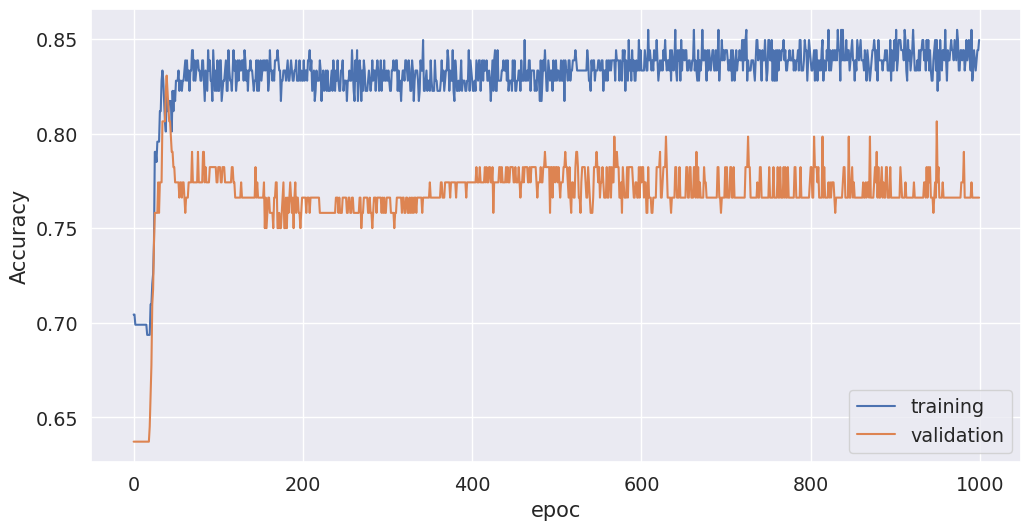

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.5579 - accuracy: 0.2500

186/186 [==============================] - 0s 671us/step - loss: 9.9182 - accuracy: 0.3441 - val_loss: 9.4379 - val_accuracy: 0.3871


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.8729 - accuracy: 0.2812

186/186 [==============================] - 0s 55us/step - loss: 9.4082 - accuracy: 0.3441 - val_loss: 9.0543 - val_accuracy: 0.3952


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.6566 - accuracy: 0.3750

186/186 [==============================] - 0s 58us/step - loss: 9.0073 - accuracy: 0.3548 - val_loss: 8.7214 - val_accuracy: 0.3952


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.9506 - accuracy: 0.4062

186/186 [==============================] - 0s 55us/step - loss: 8.6565 - accuracy: 0.3548 - val_loss: 8.4196 - val_accuracy: 0.3952


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.2675 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 8.3138 - accuracy: 0.3602 - val_loss: 8.1195 - val_accuracy: 0.3952


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.9732 - accuracy: 0.3438

186/186 [==============================] - 0s 59us/step - loss: 7.9815 - accuracy: 0.3656 - val_loss: 7.8211 - val_accuracy: 0.3952


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.6479 - accuracy: 0.2812

186/186 [==============================] - 0s 56us/step - loss: 7.6530 - accuracy: 0.3763 - val_loss: 7.5154 - val_accuracy: 0.4032


Epoch 8/1000


 32/186 [====>.........................] - ETA: 0s - loss: 6.8367 - accuracy: 0.4062

186/186 [==============================] - 0s 64us/step - loss: 7.3333 - accuracy: 0.3763 - val_loss: 7.2098 - val_accuracy: 0.4113


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.9956 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 7.0256 - accuracy: 0.3925 - val_loss: 6.9185 - val_accuracy: 0.4113


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2773 - accuracy: 0.4062

186/186 [==============================] - 0s 55us/step - loss: 6.7280 - accuracy: 0.4086 - val_loss: 6.6211 - val_accuracy: 0.4113


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.0196 - accuracy: 0.4375

186/186 [==============================] - 0s 53us/step - loss: 6.4338 - accuracy: 0.4194 - val_loss: 6.3071 - val_accuracy: 0.4113


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6120 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 6.1434 - accuracy: 0.4355 - val_loss: 5.9941 - val_accuracy: 0.4194


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.4988 - accuracy: 0.4062

186/186 [==============================] - 0s 59us/step - loss: 5.8569 - accuracy: 0.4462 - val_loss: 5.6926 - val_accuracy: 0.4435


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.2320 - accuracy: 0.5000

186/186 [==============================] - 0s 65us/step - loss: 5.5620 - accuracy: 0.4462 - val_loss: 5.3863 - val_accuracy: 0.4758


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1233 - accuracy: 0.4688

186/186 [==============================] - 0s 56us/step - loss: 5.2679 - accuracy: 0.4570 - val_loss: 5.0868 - val_accuracy: 0.4839


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5106 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 4.9653 - accuracy: 0.4677 - val_loss: 4.7882 - val_accuracy: 0.5000


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.5277 - accuracy: 0.4688

186/186 [==============================] - 0s 54us/step - loss: 4.6697 - accuracy: 0.4839 - val_loss: 4.5074 - val_accuracy: 0.5081


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4898 - accuracy: 0.5312

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 61us/step - loss: 4.3916 - accuracy: 0.5054 - val_loss: 4.2307 - val_accuracy: 0.5242


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1671 - accuracy: 0.4688

186/186 [==============================] - 0s 60us/step - loss: 4.1252 - accuracy: 0.5269 - val_loss: 3.9526 - val_accuracy: 0.5323


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.4343 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 3.8626 - accuracy: 0.5323 - val_loss: 3.6681 - val_accuracy: 0.5484


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3524 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 3.5737 - accuracy: 0.5376 - val_loss: 3.3405 - val_accuracy: 0.5726


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2568 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 3.2561 - accuracy: 0.5430 - val_loss: 3.0366 - val_accuracy: 0.5806


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2440 - accuracy: 0.4688

186/186 [==============================] - 0s 55us/step - loss: 2.9517 - accuracy: 0.5699 - val_loss: 2.7392 - val_accuracy: 0.5887


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9044 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 2.6467 - accuracy: 0.5914 - val_loss: 2.4287 - val_accuracy: 0.5968


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0611 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 2.3406 - accuracy: 0.6183 - val_loss: 2.1387 - val_accuracy: 0.6129


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2133 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 2.0575 - accuracy: 0.6344 - val_loss: 1.8462 - val_accuracy: 0.6129


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3072 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 1.7752 - accuracy: 0.6398 - val_loss: 1.5602 - val_accuracy: 0.6290


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9464 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 1.5000 - accuracy: 0.6559 - val_loss: 1.3009 - val_accuracy: 0.6371


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4179 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 1.2607 - accuracy: 0.6828 - val_loss: 1.0836 - val_accuracy: 0.6935


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0680 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 1.0568 - accuracy: 0.6989 - val_loss: 0.8853 - val_accuracy: 0.7258


Epoch 31/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.0813 - accuracy: 0.6250



186/186 [==============================] - 0s 59us/step - loss: 0.8771 - accuracy: 0.7043 - val_loss: 0.7220 - val_accuracy: 0.7339


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1741 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.7367 - accuracy: 0.7527 - val_loss: 0.6053 - val_accuracy: 0.7661


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9007 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6455 - accuracy: 0.7742 - val_loss: 0.5303 - val_accuracy: 0.7742


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6191 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5870 - accuracy: 0.7903 - val_loss: 0.4906 - val_accuracy: 0.7984


Epoch 35/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5572 - accuracy: 0.7849 - val_loss: 0.4713 - val_accuracy: 0.8065


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5401 - accuracy: 0.7688 - val_loss: 0.4577 - val_accuracy: 0.8306


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4806 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5321 - accuracy: 0.7957 - val_loss: 0.4543 - val_accuracy: 0.8306


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5498 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5274 - accuracy: 0.7849 - val_loss: 0.4485 - val_accuracy: 0.8387


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5086 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5200 - accuracy: 0.7849 - val_loss: 0.4467 - val_accuracy: 0.8387


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5167 - accuracy: 0.7796 - val_loss: 0.4449 - val_accuracy: 0.8387


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6945 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5117 - accuracy: 0.7849 - val_loss: 0.4448 - val_accuracy: 0.8226


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5061 - accuracy: 0.7849 - val_loss: 0.4401 - val_accuracy: 0.8387


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5074 - accuracy: 0.7742 - val_loss: 0.4371 - val_accuracy: 0.8387


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6222 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5017 - accuracy: 0.7849 - val_loss: 0.4352 - val_accuracy: 0.8387


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4978 - accuracy: 0.7849 - val_loss: 0.4339 - val_accuracy: 0.8306


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8218 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.4922 - accuracy: 0.7849 - val_loss: 0.4344 - val_accuracy: 0.8226


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4884 - accuracy: 0.7957 - val_loss: 0.4377 - val_accuracy: 0.8226


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6725 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.4859 - accuracy: 0.7796 - val_loss: 0.4303 - val_accuracy: 0.8226


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4822 - accuracy: 0.7796 - val_loss: 0.4316 - val_accuracy: 0.8226


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4841 - accuracy: 0.7742 - val_loss: 0.4291 - val_accuracy: 0.8226


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4733 - accuracy: 0.7903 - val_loss: 0.4267 - val_accuracy: 0.8226


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4964 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4717 - accuracy: 0.7957 - val_loss: 0.4256 - val_accuracy: 0.8226


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7485 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4665 - accuracy: 0.7903 - val_loss: 0.4199 - val_accuracy: 0.8306


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4691 - accuracy: 0.7957 - val_loss: 0.4224 - val_accuracy: 0.8226


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2188 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4590 - accuracy: 0.7957 - val_loss: 0.4230 - val_accuracy: 0.8306


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4667 - accuracy: 0.7849 - val_loss: 0.4237 - val_accuracy: 0.8306


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4574 - accuracy: 0.7957 - val_loss: 0.4186 - val_accuracy: 0.8387


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4516 - accuracy: 0.7903 - val_loss: 0.4232 - val_accuracy: 0.8226


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4519 - accuracy: 0.7903 - val_loss: 0.4198 - val_accuracy: 0.8306


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4517 - accuracy: 0.8065 - val_loss: 0.4192 - val_accuracy: 0.8306


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5003 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4462 - accuracy: 0.8011 - val_loss: 0.4165 - val_accuracy: 0.8387


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5537 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4416 - accuracy: 0.8065 - val_loss: 0.4136 - val_accuracy: 0.8387


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4396 - accuracy: 0.8011 - val_loss: 0.4173 - val_accuracy: 0.8306


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4409 - accuracy: 0.8011 - val_loss: 0.4130 - val_accuracy: 0.8387


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4357 - accuracy: 0.8065 - val_loss: 0.4090 - val_accuracy: 0.8387


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4332 - accuracy: 0.8065 - val_loss: 0.4110 - val_accuracy: 0.8387


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9125 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4343 - accuracy: 0.8065 - val_loss: 0.4149 - val_accuracy: 0.8226


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4265 - accuracy: 0.8172 - val_loss: 0.4159 - val_accuracy: 0.8226


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4308 - accuracy: 0.8172 - val_loss: 0.4119 - val_accuracy: 0.8226


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4234 - accuracy: 0.8172 - val_loss: 0.4113 - val_accuracy: 0.8226


Epoch 71/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5085 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4213 - accuracy: 0.8118 - val_loss: 0.4098 - val_accuracy: 0.8226


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7226 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.4206 - accuracy: 0.8118 - val_loss: 0.4107 - val_accuracy: 0.8226


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4149 - accuracy: 0.8226 - val_loss: 0.4134 - val_accuracy: 0.8226


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4185 - accuracy: 0.8226 - val_loss: 0.4089 - val_accuracy: 0.8226


Epoch 75/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5197 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4128 - accuracy: 0.8226 - val_loss: 0.4128 - val_accuracy: 0.8145


Epoch 76/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.8750



186/186 [==============================] - 0s 61us/step - loss: 0.4100 - accuracy: 0.8280 - val_loss: 0.4071 - val_accuracy: 0.8226


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.4075 - accuracy: 0.8280 - val_loss: 0.4027 - val_accuracy: 0.8306


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3116 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4041 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.8145


Epoch 79/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4077 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.8145


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2596 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4016 - accuracy: 0.8226 - val_loss: 0.4082 - val_accuracy: 0.8226


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4028 - accuracy: 0.8280 - val_loss: 0.4048 - val_accuracy: 0.8226


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3993 - accuracy: 0.8387 - val_loss: 0.4101 - val_accuracy: 0.8145


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4005 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.8226


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3964 - accuracy: 0.8387 - val_loss: 0.4073 - val_accuracy: 0.8226


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3943 - accuracy: 0.8387 - val_loss: 0.4049 - val_accuracy: 0.8226


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3920 - accuracy: 0.8387 - val_loss: 0.4076 - val_accuracy: 0.8145


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3922 - accuracy: 0.8387 - val_loss: 0.4072 - val_accuracy: 0.8145


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3892 - accuracy: 0.8333 - val_loss: 0.3967 - val_accuracy: 0.8306


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3901 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8226


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3881 - accuracy: 0.8441 - val_loss: 0.4006 - val_accuracy: 0.8226


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3870 - accuracy: 0.8333 - val_loss: 0.3981 - val_accuracy: 0.8226


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3827 - accuracy: 0.8333 - val_loss: 0.4008 - val_accuracy: 0.8226


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2427 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3837 - accuracy: 0.8441 - val_loss: 0.3990 - val_accuracy: 0.8226


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2455 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3863 - accuracy: 0.8333 - val_loss: 0.4090 - val_accuracy: 0.8145


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5154 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3857 - accuracy: 0.8387 - val_loss: 0.4070 - val_accuracy: 0.8145


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3806 - accuracy: 0.8387 - val_loss: 0.4023 - val_accuracy: 0.8145


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3782 - accuracy: 0.8387 - val_loss: 0.3998 - val_accuracy: 0.8226


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7158 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.3783 - accuracy: 0.8387 - val_loss: 0.3976 - val_accuracy: 0.8226


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3782 - accuracy: 0.8387 - val_loss: 0.4031 - val_accuracy: 0.8145


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3770 - accuracy: 0.8441 - val_loss: 0.3981 - val_accuracy: 0.8226


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.3772 - accuracy: 0.8495 - val_loss: 0.4003 - val_accuracy: 0.8145


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2099 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3745 - accuracy: 0.8441 - val_loss: 0.3996 - val_accuracy: 0.8145


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3715 - accuracy: 0.8441 - val_loss: 0.3991 - val_accuracy: 0.8226


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3729 - accuracy: 0.8441 - val_loss: 0.3937 - val_accuracy: 0.8226


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6008 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3738 - accuracy: 0.8441 - val_loss: 0.3983 - val_accuracy: 0.8226


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4865 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3708 - accuracy: 0.8441 - val_loss: 0.4055 - val_accuracy: 0.8145


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3711 - accuracy: 0.8441 - val_loss: 0.4017 - val_accuracy: 0.8145


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3666 - accuracy: 0.8495 - val_loss: 0.3949 - val_accuracy: 0.8226


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3679 - accuracy: 0.8495 - val_loss: 0.3951 - val_accuracy: 0.8226


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3655 - accuracy: 0.8441 - val_loss: 0.4050 - val_accuracy: 0.8145


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3684 - accuracy: 0.8387 - val_loss: 0.4109 - val_accuracy: 0.8145


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3652 - accuracy: 0.8441 - val_loss: 0.4087 - val_accuracy: 0.8145


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3659 - accuracy: 0.8495 - val_loss: 0.3974 - val_accuracy: 0.8145


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2652 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3635 - accuracy: 0.8441 - val_loss: 0.3997 - val_accuracy: 0.8145


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3623 - accuracy: 0.8495 - val_loss: 0.4063 - val_accuracy: 0.8145


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3605 - accuracy: 0.8495 - val_loss: 0.4009 - val_accuracy: 0.8145


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3601 - accuracy: 0.8441 - val_loss: 0.4103 - val_accuracy: 0.8145


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3610 - accuracy: 0.8495 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3587 - accuracy: 0.8441 - val_loss: 0.3991 - val_accuracy: 0.8145


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3608 - accuracy: 0.8441 - val_loss: 0.3985 - val_accuracy: 0.8145


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3568 - accuracy: 0.8441 - val_loss: 0.4031 - val_accuracy: 0.8145


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3581 - accuracy: 0.8495 - val_loss: 0.4033 - val_accuracy: 0.8145


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3553 - accuracy: 0.8441 - val_loss: 0.3976 - val_accuracy: 0.8145


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3575 - accuracy: 0.8441 - val_loss: 0.4005 - val_accuracy: 0.8145


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3544 - accuracy: 0.8387 - val_loss: 0.3933 - val_accuracy: 0.8226


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3581 - accuracy: 0.8495 - val_loss: 0.3934 - val_accuracy: 0.8226


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3556 - accuracy: 0.8387 - val_loss: 0.3975 - val_accuracy: 0.8145


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3541 - accuracy: 0.8387 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.3527 - accuracy: 0.8441 - val_loss: 0.3938 - val_accuracy: 0.8145


Epoch 130/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5225 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3512 - accuracy: 0.8441 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3559 - accuracy: 0.8387 - val_loss: 0.4043 - val_accuracy: 0.8226


Epoch 132/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.3528 - accuracy: 0.8495 - val_loss: 0.3977 - val_accuracy: 0.8145


Epoch 133/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.3514 - accuracy: 0.8441 - val_loss: 0.4033 - val_accuracy: 0.8226


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3489 - accuracy: 0.8495 - val_loss: 0.4025 - val_accuracy: 0.8226


Epoch 135/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3519 - accuracy: 0.8441 - val_loss: 0.4013 - val_accuracy: 0.8145


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5968 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3517 - accuracy: 0.8441 - val_loss: 0.3967 - val_accuracy: 0.8145


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3491 - accuracy: 0.8441 - val_loss: 0.4050 - val_accuracy: 0.8226


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3513 - accuracy: 0.8441 - val_loss: 0.3965 - val_accuracy: 0.8145


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3510 - accuracy: 0.8441 - val_loss: 0.4021 - val_accuracy: 0.8226


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5349 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3460 - accuracy: 0.8495 - val_loss: 0.3981 - val_accuracy: 0.8145


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3465 - accuracy: 0.8495 - val_loss: 0.3917 - val_accuracy: 0.8226


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3472 - accuracy: 0.8387 - val_loss: 0.3968 - val_accuracy: 0.8145


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3515 - accuracy: 0.8441 - val_loss: 0.3941 - val_accuracy: 0.8226


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3466 - accuracy: 0.8441 - val_loss: 0.4020 - val_accuracy: 0.8226


Epoch 145/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3470 - accuracy: 0.8441 - val_loss: 0.4000 - val_accuracy: 0.8226


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3460 - accuracy: 0.8495 - val_loss: 0.4000 - val_accuracy: 0.8226


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3455 - accuracy: 0.8441 - val_loss: 0.3951 - val_accuracy: 0.8226


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3431 - accuracy: 0.8495 - val_loss: 0.3982 - val_accuracy: 0.8226


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3456 - accuracy: 0.8495 - val_loss: 0.3976 - val_accuracy: 0.8226


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3446 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.8145


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5242 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3416 - accuracy: 0.8495 - val_loss: 0.3973 - val_accuracy: 0.8306


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3427 - accuracy: 0.8495 - val_loss: 0.4008 - val_accuracy: 0.8226


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2164 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3433 - accuracy: 0.8495 - val_loss: 0.3939 - val_accuracy: 0.8226


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3415 - accuracy: 0.8495 - val_loss: 0.3944 - val_accuracy: 0.8306


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3418 - accuracy: 0.8441 - val_loss: 0.4096 - val_accuracy: 0.8145


Epoch 156/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3426 - accuracy: 0.8548 - val_loss: 0.4012 - val_accuracy: 0.8145


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3412 - accuracy: 0.8495 - val_loss: 0.4016 - val_accuracy: 0.8145


Epoch 158/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.3422 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.8145


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3424 - accuracy: 0.8495 - val_loss: 0.4028 - val_accuracy: 0.8145


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3384 - accuracy: 0.8495 - val_loss: 0.4027 - val_accuracy: 0.8145


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3401 - accuracy: 0.8495 - val_loss: 0.4018 - val_accuracy: 0.8145


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2290 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3376 - accuracy: 0.8441 - val_loss: 0.4077 - val_accuracy: 0.8145


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3385 - accuracy: 0.8441 - val_loss: 0.3985 - val_accuracy: 0.8226


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3371 - accuracy: 0.8495 - val_loss: 0.3985 - val_accuracy: 0.8226


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3421 - accuracy: 0.8387 - val_loss: 0.3932 - val_accuracy: 0.8306


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5719 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3381 - accuracy: 0.8548 - val_loss: 0.3948 - val_accuracy: 0.8306


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3368 - accuracy: 0.8548 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3393 - accuracy: 0.8548 - val_loss: 0.4084 - val_accuracy: 0.8145


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3396 - accuracy: 0.8548 - val_loss: 0.4064 - val_accuracy: 0.8145


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4918 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3367 - accuracy: 0.8602 - val_loss: 0.4054 - val_accuracy: 0.8145


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3355 - accuracy: 0.8548 - val_loss: 0.3988 - val_accuracy: 0.8226


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3393 - accuracy: 0.8387 - val_loss: 0.4025 - val_accuracy: 0.8226


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3351 - accuracy: 0.8495 - val_loss: 0.4002 - val_accuracy: 0.8226


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3346 - accuracy: 0.8602 - val_loss: 0.3974 - val_accuracy: 0.8226


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5383 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3345 - accuracy: 0.8495 - val_loss: 0.3950 - val_accuracy: 0.8226


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5622 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3369 - accuracy: 0.8495 - val_loss: 0.3957 - val_accuracy: 0.8226


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3361 - accuracy: 0.8548 - val_loss: 0.3965 - val_accuracy: 0.8226


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3363 - accuracy: 0.8548 - val_loss: 0.3972 - val_accuracy: 0.8226


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3329 - accuracy: 0.8441 - val_loss: 0.3975 - val_accuracy: 0.8226


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2170 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3346 - accuracy: 0.8602 - val_loss: 0.4003 - val_accuracy: 0.8226


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3355 - accuracy: 0.8495 - val_loss: 0.4022 - val_accuracy: 0.8226


Epoch 182/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2176 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.3316 - accuracy: 0.8548 - val_loss: 0.4063 - val_accuracy: 0.8145


Epoch 183/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.3971 - val_accuracy: 0.8226


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3321 - accuracy: 0.8495 - val_loss: 0.4040 - val_accuracy: 0.8226


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1539 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3380 - accuracy: 0.8548 - val_loss: 0.4080 - val_accuracy: 0.8226


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3319 - accuracy: 0.8548 - val_loss: 0.4086 - val_accuracy: 0.8145


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6015 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3333 - accuracy: 0.8548 - val_loss: 0.4001 - val_accuracy: 0.8226


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3348 - accuracy: 0.8495 - val_loss: 0.4018 - val_accuracy: 0.8226


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3302 - accuracy: 0.8548 - val_loss: 0.4063 - val_accuracy: 0.8145


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3295 - accuracy: 0.8548 - val_loss: 0.4039 - val_accuracy: 0.8226


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3333 - accuracy: 0.8548 - val_loss: 0.3998 - val_accuracy: 0.8226


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.4053 - val_accuracy: 0.8306


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3307 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.8065


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3308 - accuracy: 0.8495 - val_loss: 0.4131 - val_accuracy: 0.8065


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3304 - accuracy: 0.8548 - val_loss: 0.4003 - val_accuracy: 0.8226


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3297 - accuracy: 0.8548 - val_loss: 0.3979 - val_accuracy: 0.8226


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3313 - accuracy: 0.8441 - val_loss: 0.4039 - val_accuracy: 0.8226


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.3277 - accuracy: 0.8441 - val_loss: 0.4090 - val_accuracy: 0.8226


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4869 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3300 - accuracy: 0.8495 - val_loss: 0.3976 - val_accuracy: 0.8226


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2834 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3302 - accuracy: 0.8495 - val_loss: 0.4015 - val_accuracy: 0.8226


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3264 - accuracy: 0.8495 - val_loss: 0.4141 - val_accuracy: 0.8065


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5242 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3329 - accuracy: 0.8548 - val_loss: 0.4070 - val_accuracy: 0.8226


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3266 - accuracy: 0.8495 - val_loss: 0.4095 - val_accuracy: 0.8226


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3286 - accuracy: 0.8495 - val_loss: 0.4012 - val_accuracy: 0.8226


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2808 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3275 - accuracy: 0.8495 - val_loss: 0.3984 - val_accuracy: 0.8226


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3280 - accuracy: 0.8495 - val_loss: 0.3946 - val_accuracy: 0.8226


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3293 - accuracy: 0.8441 - val_loss: 0.3990 - val_accuracy: 0.8226


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3253 - accuracy: 0.8495 - val_loss: 0.4049 - val_accuracy: 0.8306


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3263 - accuracy: 0.8441 - val_loss: 0.4043 - val_accuracy: 0.8306


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3277 - accuracy: 0.8495 - val_loss: 0.4112 - val_accuracy: 0.8065


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3252 - accuracy: 0.8602 - val_loss: 0.4048 - val_accuracy: 0.8306


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3258 - accuracy: 0.8548 - val_loss: 0.4036 - val_accuracy: 0.8226


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4670 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3239 - accuracy: 0.8495 - val_loss: 0.4043 - val_accuracy: 0.8306


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3267 - accuracy: 0.8441 - val_loss: 0.4131 - val_accuracy: 0.8145


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1916 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4039 - val_accuracy: 0.8306


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3265 - accuracy: 0.8441 - val_loss: 0.4024 - val_accuracy: 0.8306


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3228 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.8065


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3235 - accuracy: 0.8495 - val_loss: 0.4008 - val_accuracy: 0.8226


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3262 - accuracy: 0.8495 - val_loss: 0.4098 - val_accuracy: 0.8145


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1879 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3252 - accuracy: 0.8602 - val_loss: 0.4119 - val_accuracy: 0.8145


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3257 - accuracy: 0.8495 - val_loss: 0.4140 - val_accuracy: 0.8145


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4055 - val_accuracy: 0.8226


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.4021 - val_accuracy: 0.8226


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1730 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3218 - accuracy: 0.8548 - val_loss: 0.3978 - val_accuracy: 0.8145


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3908 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3209 - accuracy: 0.8548 - val_loss: 0.4189 - val_accuracy: 0.8065


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5795 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3252 - accuracy: 0.8387 - val_loss: 0.4005 - val_accuracy: 0.8145


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3244 - accuracy: 0.8548 - val_loss: 0.4075 - val_accuracy: 0.8226


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3245 - accuracy: 0.8495 - val_loss: 0.4026 - val_accuracy: 0.8145


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3227 - accuracy: 0.8441 - val_loss: 0.3959 - val_accuracy: 0.8145


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3205 - accuracy: 0.8333 - val_loss: 0.4120 - val_accuracy: 0.8145


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3213 - accuracy: 0.8495 - val_loss: 0.4037 - val_accuracy: 0.8226


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3210 - accuracy: 0.8548 - val_loss: 0.4016 - val_accuracy: 0.8145


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3240 - accuracy: 0.8495 - val_loss: 0.4038 - val_accuracy: 0.8226


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2033 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3202 - accuracy: 0.8548 - val_loss: 0.4032 - val_accuracy: 0.8226


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.3203 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.8145


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3209 - accuracy: 0.8495 - val_loss: 0.4014 - val_accuracy: 0.8145


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3734 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3197 - accuracy: 0.8548 - val_loss: 0.3984 - val_accuracy: 0.8145


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3197 - accuracy: 0.8548 - val_loss: 0.4054 - val_accuracy: 0.8145


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4908 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3192 - accuracy: 0.8548 - val_loss: 0.3964 - val_accuracy: 0.8145


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3209 - accuracy: 0.8387 - val_loss: 0.3980 - val_accuracy: 0.8145


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3198 - accuracy: 0.8441 - val_loss: 0.4090 - val_accuracy: 0.8065


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3191 - accuracy: 0.8441 - val_loss: 0.3998 - val_accuracy: 0.8145


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3949 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3198 - accuracy: 0.8333 - val_loss: 0.4037 - val_accuracy: 0.8226


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1995 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3201 - accuracy: 0.8495 - val_loss: 0.4048 - val_accuracy: 0.8226


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3164 - accuracy: 0.8495 - val_loss: 0.4045 - val_accuracy: 0.8226


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3222 - accuracy: 0.8495 - val_loss: 0.4069 - val_accuracy: 0.8145


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3194 - accuracy: 0.8548 - val_loss: 0.4103 - val_accuracy: 0.8065


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3180 - accuracy: 0.8441 - val_loss: 0.4020 - val_accuracy: 0.8226


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3171 - accuracy: 0.8441 - val_loss: 0.4031 - val_accuracy: 0.8226


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3171 - accuracy: 0.8441 - val_loss: 0.4039 - val_accuracy: 0.8226


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3186 - accuracy: 0.8495 - val_loss: 0.4054 - val_accuracy: 0.8145


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3173 - accuracy: 0.8495 - val_loss: 0.4046 - val_accuracy: 0.8145


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2087 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3184 - accuracy: 0.8495 - val_loss: 0.4087 - val_accuracy: 0.8065


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3170 - accuracy: 0.8495 - val_loss: 0.4034 - val_accuracy: 0.8226


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3150 - accuracy: 0.8495 - val_loss: 0.4096 - val_accuracy: 0.8065


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4557 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3153 - accuracy: 0.8495 - val_loss: 0.4169 - val_accuracy: 0.8065


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3154 - accuracy: 0.8387 - val_loss: 0.3981 - val_accuracy: 0.8145


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3188 - accuracy: 0.8441 - val_loss: 0.4029 - val_accuracy: 0.8226


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2715 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3151 - accuracy: 0.8495 - val_loss: 0.3991 - val_accuracy: 0.8145


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3155 - accuracy: 0.8548 - val_loss: 0.4124 - val_accuracy: 0.8065


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3153 - accuracy: 0.8495 - val_loss: 0.4006 - val_accuracy: 0.8226


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3156 - accuracy: 0.8495 - val_loss: 0.4037 - val_accuracy: 0.8145


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3168 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.8065


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3166 - accuracy: 0.8441 - val_loss: 0.4055 - val_accuracy: 0.8145


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3153 - accuracy: 0.8441 - val_loss: 0.4007 - val_accuracy: 0.8226


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1890 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3141 - accuracy: 0.8495 - val_loss: 0.4066 - val_accuracy: 0.8065


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1426 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3134 - accuracy: 0.8495 - val_loss: 0.4037 - val_accuracy: 0.8145


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3143 - accuracy: 0.8441 - val_loss: 0.4174 - val_accuracy: 0.7984


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3152 - accuracy: 0.8495 - val_loss: 0.4106 - val_accuracy: 0.8065


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3151 - accuracy: 0.8495 - val_loss: 0.4068 - val_accuracy: 0.8065


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3121 - accuracy: 0.8441 - val_loss: 0.4115 - val_accuracy: 0.8065


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3146 - accuracy: 0.8387 - val_loss: 0.4011 - val_accuracy: 0.8226


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3132 - accuracy: 0.8441 - val_loss: 0.4086 - val_accuracy: 0.8065


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3161 - accuracy: 0.8548 - val_loss: 0.4141 - val_accuracy: 0.8065


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4724 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3118 - accuracy: 0.8387 - val_loss: 0.4025 - val_accuracy: 0.8145


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3136 - accuracy: 0.8441 - val_loss: 0.3995 - val_accuracy: 0.8226


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1994 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3142 - accuracy: 0.8441 - val_loss: 0.4036 - val_accuracy: 0.8145


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3126 - accuracy: 0.8495 - val_loss: 0.4056 - val_accuracy: 0.8065


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3105 - accuracy: 0.8495 - val_loss: 0.4076 - val_accuracy: 0.8065


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3116 - accuracy: 0.8495 - val_loss: 0.4034 - val_accuracy: 0.8145


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3137 - accuracy: 0.8441 - val_loss: 0.4033 - val_accuracy: 0.8145


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3116 - accuracy: 0.8495 - val_loss: 0.4059 - val_accuracy: 0.8065


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3099 - accuracy: 0.8441 - val_loss: 0.4001 - val_accuracy: 0.8226


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3101 - accuracy: 0.8387 - val_loss: 0.4034 - val_accuracy: 0.8145


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3132 - accuracy: 0.8441 - val_loss: 0.4013 - val_accuracy: 0.8226


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1836 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3116 - accuracy: 0.8387 - val_loss: 0.3951 - val_accuracy: 0.8145


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3119 - accuracy: 0.8495 - val_loss: 0.4003 - val_accuracy: 0.8226


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.3970 - val_accuracy: 0.8145


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2036 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3109 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.8145


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4757 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3124 - accuracy: 0.8441 - val_loss: 0.4057 - val_accuracy: 0.8065


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3082 - accuracy: 0.8441 - val_loss: 0.4117 - val_accuracy: 0.8065


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3128 - accuracy: 0.8441 - val_loss: 0.4029 - val_accuracy: 0.8145


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3110 - accuracy: 0.8387 - val_loss: 0.4097 - val_accuracy: 0.8065


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3092 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2814 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3077 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 0.8145


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1582 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3133 - accuracy: 0.8387 - val_loss: 0.3988 - val_accuracy: 0.8226


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3125 - accuracy: 0.8333 - val_loss: 0.4048 - val_accuracy: 0.8065


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.4066 - val_accuracy: 0.8065


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2529 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8495 - val_loss: 0.4124 - val_accuracy: 0.8065


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4048 - val_accuracy: 0.8065


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2498 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.4076 - val_accuracy: 0.8065


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1563 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3081 - accuracy: 0.8333 - val_loss: 0.3955 - val_accuracy: 0.8145


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3085 - accuracy: 0.8441 - val_loss: 0.4049 - val_accuracy: 0.8065


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1955 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3090 - accuracy: 0.8495 - val_loss: 0.4102 - val_accuracy: 0.8065


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2011 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3067 - accuracy: 0.8387 - val_loss: 0.4058 - val_accuracy: 0.8065


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.4095 - val_accuracy: 0.8065


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3072 - accuracy: 0.8387 - val_loss: 0.4031 - val_accuracy: 0.8065


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3089 - accuracy: 0.8333 - val_loss: 0.4005 - val_accuracy: 0.8145


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4000 - val_accuracy: 0.8145


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1275 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3070 - accuracy: 0.8387 - val_loss: 0.4008 - val_accuracy: 0.8145


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3088 - accuracy: 0.8387 - val_loss: 0.3954 - val_accuracy: 0.8145


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3081 - accuracy: 0.8387 - val_loss: 0.4027 - val_accuracy: 0.8065


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.3979 - val_accuracy: 0.8226


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3048 - accuracy: 0.8441 - val_loss: 0.4042 - val_accuracy: 0.8065


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3067 - accuracy: 0.8441 - val_loss: 0.3993 - val_accuracy: 0.8226


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3073 - accuracy: 0.8387 - val_loss: 0.4054 - val_accuracy: 0.8065


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3050 - accuracy: 0.8387 - val_loss: 0.4046 - val_accuracy: 0.8065


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3083 - accuracy: 0.8387 - val_loss: 0.4070 - val_accuracy: 0.8065


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3072 - accuracy: 0.8441 - val_loss: 0.4087 - val_accuracy: 0.8065


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3053 - accuracy: 0.8387 - val_loss: 0.4047 - val_accuracy: 0.8065


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3549 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3038 - accuracy: 0.8495 - val_loss: 0.3977 - val_accuracy: 0.8226


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3108 - accuracy: 0.8441 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4104 - val_accuracy: 0.7984


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2331 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.4056 - val_accuracy: 0.8065


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.4084 - val_accuracy: 0.8065


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.3056 - accuracy: 0.8280 - val_loss: 0.4028 - val_accuracy: 0.8065


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8125



186/186 [==============================] - 0s 60us/step - loss: 0.3056 - accuracy: 0.8441 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 330/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3029 - accuracy: 0.8387 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3045 - accuracy: 0.8333 - val_loss: 0.3974 - val_accuracy: 0.8226


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3037 - accuracy: 0.8441 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 334/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.3030 - accuracy: 0.8387 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 335/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4992 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3052 - accuracy: 0.8495 - val_loss: 0.3985 - val_accuracy: 0.8145


Epoch 336/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3043 - accuracy: 0.8387 - val_loss: 0.3952 - val_accuracy: 0.8145


Epoch 337/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2826 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3057 - accuracy: 0.8333 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.3068 - accuracy: 0.8333 - val_loss: 0.4050 - val_accuracy: 0.8065


Epoch 339/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3073 - accuracy: 0.8441 - val_loss: 0.4081 - val_accuracy: 0.8065


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3016 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3045 - accuracy: 0.8387 - val_loss: 0.4031 - val_accuracy: 0.8065


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3023 - accuracy: 0.8387 - val_loss: 0.4031 - val_accuracy: 0.8065


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3026 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3014 - accuracy: 0.8387 - val_loss: 0.4022 - val_accuracy: 0.8065


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3045 - accuracy: 0.8333 - val_loss: 0.4069 - val_accuracy: 0.8065


Epoch 346/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3015 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3027 - accuracy: 0.8387 - val_loss: 0.3978 - val_accuracy: 0.8145


Epoch 348/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1732 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3015 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.8065


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3015 - accuracy: 0.8333 - val_loss: 0.4030 - val_accuracy: 0.8065


Epoch 350/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3048 - accuracy: 0.8441 - val_loss: 0.4002 - val_accuracy: 0.8065


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.3005 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.7984


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3032 - accuracy: 0.8333 - val_loss: 0.4101 - val_accuracy: 0.7984


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.4033 - val_accuracy: 0.8065


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1916 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3011 - accuracy: 0.8280 - val_loss: 0.4112 - val_accuracy: 0.7984


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3019 - accuracy: 0.8333 - val_loss: 0.4023 - val_accuracy: 0.8065


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3034 - accuracy: 0.8387 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.4054 - val_accuracy: 0.8065


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3013 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.7984


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3020 - accuracy: 0.8441 - val_loss: 0.4019 - val_accuracy: 0.8065


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2981 - accuracy: 0.8441 - val_loss: 0.4156 - val_accuracy: 0.7903


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3078 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.7984


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3028 - accuracy: 0.8333 - val_loss: 0.4058 - val_accuracy: 0.7984


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2995 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.8065


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2997 - accuracy: 0.8387 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3037 - accuracy: 0.8280 - val_loss: 0.4032 - val_accuracy: 0.8065


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2986 - accuracy: 0.8387 - val_loss: 0.4006 - val_accuracy: 0.8065


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2982 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.3042 - accuracy: 0.8495 - val_loss: 0.4044 - val_accuracy: 0.8065


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2992 - accuracy: 0.8387 - val_loss: 0.4022 - val_accuracy: 0.8065


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2986 - accuracy: 0.8387 - val_loss: 0.3944 - val_accuracy: 0.8226


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1803 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2993 - accuracy: 0.8333 - val_loss: 0.4038 - val_accuracy: 0.8065


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1931 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3011 - accuracy: 0.8387 - val_loss: 0.4078 - val_accuracy: 0.7984


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2988 - accuracy: 0.8333 - val_loss: 0.4068 - val_accuracy: 0.7984


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2990 - accuracy: 0.8441 - val_loss: 0.4189 - val_accuracy: 0.7903


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1905 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3016 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7903


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2994 - accuracy: 0.8387 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2298 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2983 - accuracy: 0.8387 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3001 - accuracy: 0.8387 - val_loss: 0.4082 - val_accuracy: 0.7984


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2976 - accuracy: 0.8387 - val_loss: 0.4067 - val_accuracy: 0.7984


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.2992 - accuracy: 0.8333 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3010 - accuracy: 0.8333 - val_loss: 0.4017 - val_accuracy: 0.8065


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2068 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.3002 - accuracy: 0.8387 - val_loss: 0.3933 - val_accuracy: 0.8226


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1347 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3017 - accuracy: 0.8333 - val_loss: 0.3993 - val_accuracy: 0.8065


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2991 - accuracy: 0.8387 - val_loss: 0.4070 - val_accuracy: 0.7984


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2987 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2982 - accuracy: 0.8333 - val_loss: 0.4026 - val_accuracy: 0.8065


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2559 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2993 - accuracy: 0.8333 - val_loss: 0.3964 - val_accuracy: 0.8065


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2981 - accuracy: 0.8387 - val_loss: 0.4036 - val_accuracy: 0.8065


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2965 - accuracy: 0.8333 - val_loss: 0.3954 - val_accuracy: 0.8065


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2971 - accuracy: 0.8441 - val_loss: 0.4086 - val_accuracy: 0.7984


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3019 - accuracy: 0.8333 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 391/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2985 - accuracy: 0.8280 - val_loss: 0.4097 - val_accuracy: 0.7984


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2920 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2979 - accuracy: 0.8387 - val_loss: 0.4009 - val_accuracy: 0.8065


Epoch 393/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2959 - accuracy: 0.8441 - val_loss: 0.4100 - val_accuracy: 0.7984


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2329 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2973 - accuracy: 0.8333 - val_loss: 0.4060 - val_accuracy: 0.7984


Epoch 395/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8438



186/186 [==============================] - 0s 60us/step - loss: 0.2974 - accuracy: 0.8548 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2976 - accuracy: 0.8333 - val_loss: 0.3923 - val_accuracy: 0.8226


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4630 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2989 - accuracy: 0.8441 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2985 - accuracy: 0.8387 - val_loss: 0.4068 - val_accuracy: 0.7984


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2969 - accuracy: 0.8441 - val_loss: 0.4095 - val_accuracy: 0.7984


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2957 - accuracy: 0.8387 - val_loss: 0.4097 - val_accuracy: 0.7984


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2947 - accuracy: 0.8333 - val_loss: 0.3913 - val_accuracy: 0.8226


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2990 - accuracy: 0.8387 - val_loss: 0.3952 - val_accuracy: 0.8065


Epoch 403/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2964 - accuracy: 0.8280 - val_loss: 0.3928 - val_accuracy: 0.8226


Epoch 404/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2166 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.2981 - accuracy: 0.8387 - val_loss: 0.4041 - val_accuracy: 0.7984


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2988 - accuracy: 0.8387 - val_loss: 0.4052 - val_accuracy: 0.7984


Epoch 406/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3010 - accuracy: 0.8441 - val_loss: 0.4037 - val_accuracy: 0.7984


Epoch 407/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2964 - accuracy: 0.8441 - val_loss: 0.3992 - val_accuracy: 0.8065


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1452 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2949 - accuracy: 0.8387 - val_loss: 0.3968 - val_accuracy: 0.8065


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2976 - accuracy: 0.8333 - val_loss: 0.3957 - val_accuracy: 0.8065


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2994 - accuracy: 0.8333 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2956 - accuracy: 0.8387 - val_loss: 0.4077 - val_accuracy: 0.7984


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2993 - accuracy: 0.8333 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2973 - accuracy: 0.8387 - val_loss: 0.4070 - val_accuracy: 0.7984


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2988 - accuracy: 0.8441 - val_loss: 0.4061 - val_accuracy: 0.7984


Epoch 415/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2950 - accuracy: 0.8280 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2954 - accuracy: 0.8333 - val_loss: 0.4103 - val_accuracy: 0.7984


Epoch 417/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9062

186/186 [==============================]

 - 0s 57us/step - loss: 0.2989 - accuracy: 0.8441 - val_loss: 0.4072 - val_accuracy: 0.7984


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2952 - accuracy: 0.8387 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3010 - accuracy: 0.8495 - val_loss: 0.4077 - val_accuracy: 0.7984


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1529 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2945 - accuracy: 0.8441 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2951 - accuracy: 0.8333 - val_loss: 0.4079 - val_accuracy: 0.7984


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2526 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2983 - accuracy: 0.8333 - val_loss: 0.3949 - val_accuracy: 0.8065


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2940 - accuracy: 0.8441 - val_loss: 0.3941 - val_accuracy: 0.8065


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2016 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2954 - accuracy: 0.8441 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2948 - accuracy: 0.8387 - val_loss: 0.4036 - val_accuracy: 0.7984


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2979 - accuracy: 0.8387 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2960 - accuracy: 0.8441 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2834 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2969 - accuracy: 0.8333 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 429/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.2989 - accuracy: 0.8387 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2958 - accuracy: 0.8387 - val_loss: 0.4046 - val_accuracy: 0.7984


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2935 - accuracy: 0.8387 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1820 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2941 - accuracy: 0.8387 - val_loss: 0.4041 - val_accuracy: 0.7984


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.4096 - val_accuracy: 0.7984


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2938 - accuracy: 0.8387 - val_loss: 0.3910 - val_accuracy: 0.8145


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2960 - accuracy: 0.8333 - val_loss: 0.3962 - val_accuracy: 0.8065


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2495 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2936 - accuracy: 0.8387 - val_loss: 0.3949 - val_accuracy: 0.8065


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2954 - accuracy: 0.8441 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 438/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2093 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2935 - accuracy: 0.8441 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 439/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2956 - accuracy: 0.8333 - val_loss: 0.4114 - val_accuracy: 0.7984


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1715 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2956 - accuracy: 0.8333 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 441/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2957 - accuracy: 0.8333 - val_loss: 0.3960 - val_accuracy: 0.8065


Epoch 442/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2537 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2950 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2954 - accuracy: 0.8441 - val_loss: 0.4046 - val_accuracy: 0.7984


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1672 - accuracy: 0.9375



186/186 [==============================] - 0s 59us/step - loss: 0.2966 - accuracy: 0.8441 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4740 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.2942 - accuracy: 0.8495 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2940 - accuracy: 0.8441 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2924 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2991 - accuracy: 0.8387 - val_loss: 0.3955 - val_accuracy: 0.8065


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.7188

186/186 [==============================] - 0s 85us/step - loss: 0.2933 - accuracy: 0.8441 - val_loss: 0.4102 - val_accuracy: 0.7984


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2946 - accuracy: 0.8441 - val_loss: 0.4062 - val_accuracy: 0.7984


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2933 - accuracy: 0.8441 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2954 - accuracy: 0.8387 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2947 - accuracy: 0.8387 - val_loss: 0.4078 - val_accuracy: 0.7984


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2933 - accuracy: 0.8333 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1720 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2949 - accuracy: 0.8495 - val_loss: 0.4117 - val_accuracy: 0.7984


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2072 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2950 - accuracy: 0.8333 - val_loss: 0.3995 - val_accuracy: 0.8065


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2935 - accuracy: 0.8441 - val_loss: 0.4025 - val_accuracy: 0.7984


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2961 - accuracy: 0.8387 - val_loss: 0.3924 - val_accuracy: 0.8065


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2959 - accuracy: 0.8387 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.3949 - val_accuracy: 0.8065


Epoch 461/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2980 - accuracy: 0.8333 - val_loss: 0.3998 - val_accuracy: 0.8065


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1520 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2928 - accuracy: 0.8387 - val_loss: 0.4034 - val_accuracy: 0.7984


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2927 - accuracy: 0.8548 - val_loss: 0.4081 - val_accuracy: 0.7984


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.3937 - val_accuracy: 0.8065


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2957 - accuracy: 0.8333 - val_loss: 0.4024 - val_accuracy: 0.7984


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2953 - accuracy: 0.8441 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2934 - accuracy: 0.8387 - val_loss: 0.4084 - val_accuracy: 0.7984


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2914 - accuracy: 0.8387 - val_loss: 0.3963 - val_accuracy: 0.8065


Epoch 469/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8438

186/186 [==============================] - 0s 68us/step - loss: 0.2943 - accuracy: 0.8387 - val_loss: 0.3940 - val_accuracy: 0.8065


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2953 - accuracy: 0.8387 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2940 - accuracy: 0.8280 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2909 - accuracy: 0.8441 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2923 - accuracy: 0.8441 - val_loss: 0.3932 - val_accuracy: 0.8065


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2959 - accuracy: 0.8280 - val_loss: 0.3936 - val_accuracy: 0.8065


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2939 - accuracy: 0.8387 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2117 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2926 - accuracy: 0.8441 - val_loss: 0.3913 - val_accuracy: 0.8145


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2944 - accuracy: 0.8387 - val_loss: 0.3965 - val_accuracy: 0.8065


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2948 - accuracy: 0.8441 - val_loss: 0.3951 - val_accuracy: 0.8065


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4020 - val_accuracy: 0.7984


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2921 - accuracy: 0.8441 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2916 - accuracy: 0.8333 - val_loss: 0.4122 - val_accuracy: 0.7903


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2932 - accuracy: 0.8441 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2908 - accuracy: 0.8441 - val_loss: 0.4028 - val_accuracy: 0.7984


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2925 - accuracy: 0.8333 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2939 - accuracy: 0.8333 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2834 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2930 - accuracy: 0.8441 - val_loss: 0.3958 - val_accuracy: 0.8065


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1821 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2956 - accuracy: 0.8387 - val_loss: 0.3958 - val_accuracy: 0.8065


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.2901 - accuracy: 0.8387 - val_loss: 0.3905 - val_accuracy: 0.8065


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4070 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2921 - accuracy: 0.8333 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2899 - accuracy: 0.8441 - val_loss: 0.4112 - val_accuracy: 0.7903


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2927 - accuracy: 0.8280 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2918 - accuracy: 0.8441 - val_loss: 0.3952 - val_accuracy: 0.8065


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2906 - accuracy: 0.8495 - val_loss: 0.3902 - val_accuracy: 0.8145


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2967 - accuracy: 0.8333 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 496/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.8750



186/186 [==============================] - 0s 61us/step - loss: 0.2905 - accuracy: 0.8387 - val_loss: 0.4066 - val_accuracy: 0.7903


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2916 - accuracy: 0.8387 - val_loss: 0.4106 - val_accuracy: 0.7903


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2926 - accuracy: 0.8280 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2914 - accuracy: 0.8333 - val_loss: 0.4053 - val_accuracy: 0.7984


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2933 - accuracy: 0.8387 - val_loss: 0.3965 - val_accuracy: 0.8065


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2924 - accuracy: 0.8387 - val_loss: 0.3935 - val_accuracy: 0.8065


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2928 - accuracy: 0.8387 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 503/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2912 - accuracy: 0.8441 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 504/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2714 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2908 - accuracy: 0.8387 - val_loss: 0.4057 - val_accuracy: 0.7903


Epoch 505/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8750



186/186 [==============================] - 0s 61us/step - loss: 0.2911 - accuracy: 0.8333 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2923 - accuracy: 0.8387 - val_loss: 0.4069 - val_accuracy: 0.7903


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1598 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2896 - accuracy: 0.8441 - val_loss: 0.3945 - val_accuracy: 0.8065


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2193 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2904 - accuracy: 0.8387 - val_loss: 0.3900 - val_accuracy: 0.8065


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.7188



186/186 [==============================] - 0s 53us/step - loss: 0.2936 - accuracy: 0.8280 - val_loss: 0.3946 - val_accuracy: 0.8065


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2922 - accuracy: 0.8441 - val_loss: 0.3903 - val_accuracy: 0.8065


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2962 - accuracy: 0.8495 - val_loss: 0.3978 - val_accuracy: 0.8065


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1642 - accuracy: 0.9688



186/186 [==============================] - 0s 55us/step - loss: 0.2891 - accuracy: 0.8495 - val_loss: 0.3952 - val_accuracy: 0.8065


Epoch 513/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1900 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8495 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 514/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2908 - accuracy: 0.8387 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 515/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1261 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2911 - accuracy: 0.8495 - val_loss: 0.4043 - val_accuracy: 0.7903


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2932 - accuracy: 0.8280 - val_loss: 0.3938 - val_accuracy: 0.8065


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4030 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2938 - accuracy: 0.8441 - val_loss: 0.3986 - val_accuracy: 0.7984


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2883 - accuracy: 0.8441 - val_loss: 0.4070 - val_accuracy: 0.7903


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2903 - accuracy: 0.8280 - val_loss: 0.4025 - val_accuracy: 0.7984


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.2907 - accuracy: 0.8387 - val_loss: 0.4104 - val_accuracy: 0.7903


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2900 - accuracy: 0.8387 - val_loss: 0.3991 - val_accuracy: 0.7984


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2903 - accuracy: 0.8280 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1650 - accuracy: 1.0000

186/186 [==============================] - 0s 54us/step - loss: 0.2913 - accuracy: 0.8495 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 524/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.2889 - accuracy: 0.8333 - val_loss: 0.4024 - val_accuracy: 0.7903


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2900 - accuracy: 0.8441 - val_loss: 0.3986 - val_accuracy: 0.7984


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2893 - accuracy: 0.8495 - val_loss: 0.3953 - val_accuracy: 0.8065


Epoch 527/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.4031 - val_accuracy: 0.7903


Epoch 528/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2885 - accuracy: 0.8441 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2163 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2889 - accuracy: 0.8387 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 530/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.9062



186/186 [==============================] - 0s 60us/step - loss: 0.2908 - accuracy: 0.8495 - val_loss: 0.3963 - val_accuracy: 0.8065


Epoch 531/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.2936 - accuracy: 0.8333 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2888 - accuracy: 0.8441 - val_loss: 0.4041 - val_accuracy: 0.7903


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2895 - accuracy: 0.8441 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2874 - accuracy: 0.8333 - val_loss: 0.3989 - val_accuracy: 0.7984


Epoch 535/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2057 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2935 - accuracy: 0.8441 - val_loss: 0.3970 - val_accuracy: 0.8065


Epoch 536/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1863 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2875 - accuracy: 0.8333 - val_loss: 0.4033 - val_accuracy: 0.7903


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2986 - accuracy: 0.8333 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.2870 - accuracy: 0.8441 - val_loss: 0.3962 - val_accuracy: 0.8065


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2899 - accuracy: 0.8495 - val_loss: 0.3904 - val_accuracy: 0.8065


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2904 - accuracy: 0.8495 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2889 - accuracy: 0.8441 - val_loss: 0.4027 - val_accuracy: 0.7903


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2893 - accuracy: 0.8333 - val_loss: 0.3957 - val_accuracy: 0.8065


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2925 - accuracy: 0.8333 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.3972 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1928 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2881 - accuracy: 0.8441 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8441 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2897 - accuracy: 0.8387 - val_loss: 0.3941 - val_accuracy: 0.8065


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1745 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2907 - accuracy: 0.8333 - val_loss: 0.4033 - val_accuracy: 0.7903


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2886 - accuracy: 0.8495 - val_loss: 0.4043 - val_accuracy: 0.7903


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2886 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2890 - accuracy: 0.8441 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2921 - accuracy: 0.8441 - val_loss: 0.3984 - val_accuracy: 0.7984


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2873 - accuracy: 0.8387 - val_loss: 0.3997 - val_accuracy: 0.7984


Epoch 553/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2875 - accuracy: 0.8387 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2900 - accuracy: 0.8333 - val_loss: 0.3906 - val_accuracy: 0.8065


Epoch 555/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2901 - accuracy: 0.8548 - val_loss: 0.3934 - val_accuracy: 0.8065


Epoch 556/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2900 - accuracy: 0.8495 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3042 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2874 - accuracy: 0.8441 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2896 - accuracy: 0.8387 - val_loss: 0.4063 - val_accuracy: 0.7903


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2197 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2868 - accuracy: 0.8441 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1086 - accuracy: 1.0000

186/186 [==============================] - 0s 50us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2884 - accuracy: 0.8387 - val_loss: 0.3927 - val_accuracy: 0.8065


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2902 - accuracy: 0.8387 - val_loss: 0.3918 - val_accuracy: 0.8065


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2887 - accuracy: 0.8441 - val_loss: 0.3903 - val_accuracy: 0.8065


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2913 - accuracy: 0.8387 - val_loss: 0.3976 - val_accuracy: 0.8065


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4015 - val_accuracy: 0.7903


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2880 - accuracy: 0.8387 - val_loss: 0.3992 - val_accuracy: 0.7984


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2925 - accuracy: 0.8441 - val_loss: 0.4001 - val_accuracy: 0.7903


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3849 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2880 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.7903


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1414 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2891 - accuracy: 0.8441 - val_loss: 0.4054 - val_accuracy: 0.7903


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2886 - accuracy: 0.8280 - val_loss: 0.3925 - val_accuracy: 0.8065


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2872 - accuracy: 0.8387 - val_loss: 0.3927 - val_accuracy: 0.8065


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2876 - accuracy: 0.8495 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2872 - accuracy: 0.8441 - val_loss: 0.3938 - val_accuracy: 0.8065


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4073 - val_accuracy: 0.7903


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2881 - accuracy: 0.8441 - val_loss: 0.4034 - val_accuracy: 0.7903


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.8387 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2888 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2858 - accuracy: 0.8441 - val_loss: 0.3930 - val_accuracy: 0.8065


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2931 - accuracy: 0.8333 - val_loss: 0.3962 - val_accuracy: 0.8065


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2868 - accuracy: 0.8441 - val_loss: 0.3927 - val_accuracy: 0.8065


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2867 - accuracy: 0.8441 - val_loss: 0.4040 - val_accuracy: 0.7903


Epoch 583/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4466 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2871 - accuracy: 0.8441 - val_loss: 0.3956 - val_accuracy: 0.8065


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2877 - accuracy: 0.8495 - val_loss: 0.3994 - val_accuracy: 0.7903


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2879 - accuracy: 0.8387 - val_loss: 0.4011 - val_accuracy: 0.7903


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2404 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2859 - accuracy: 0.8495 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2868 - accuracy: 0.8495 - val_loss: 0.4044 - val_accuracy: 0.7903


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2859 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy: 0.8065


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2892 - accuracy: 0.8495 - val_loss: 0.4028 - val_accuracy: 0.7903


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1847 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2896 - accuracy: 0.8495 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.2860 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2170 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2868 - accuracy: 0.8387 - val_loss: 0.3933 - val_accuracy: 0.8065


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2882 - accuracy: 0.8441 - val_loss: 0.3950 - val_accuracy: 0.8065


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.4075 - val_accuracy: 0.7903


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.2862 - accuracy: 0.8495 - val_loss: 0.3954 - val_accuracy: 0.8065


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1899 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2891 - accuracy: 0.8333 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2860 - accuracy: 0.8495 - val_loss: 0.3947 - val_accuracy: 0.8065


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2861 - accuracy: 0.8333 - val_loss: 0.3913 - val_accuracy: 0.8065


Epoch 599/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2872 - accuracy: 0.8387 - val_loss: 0.3973 - val_accuracy: 0.7903


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2864 - accuracy: 0.8495 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.3956 - val_accuracy: 0.8065


Epoch 602/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2877 - accuracy: 0.8548 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2880 - accuracy: 0.8280 - val_loss: 0.3957 - val_accuracy: 0.8065


Epoch 604/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2882 - accuracy: 0.8441 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2863 - accuracy: 0.8333 - val_loss: 0.3911 - val_accuracy: 0.8065


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2886 - accuracy: 0.8387 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2852 - accuracy: 0.8495 - val_loss: 0.3951 - val_accuracy: 0.8065


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2850 - accuracy: 0.8333 - val_loss: 0.3896 - val_accuracy: 0.8065


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.2874 - accuracy: 0.8441 - val_loss: 0.3957 - val_accuracy: 0.8065


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1706 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2848 - accuracy: 0.8495 - val_loss: 0.3920 - val_accuracy: 0.8065


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2847 - accuracy: 0.8548 - val_loss: 0.3995 - val_accuracy: 0.7903


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.2879 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2039 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2872 - accuracy: 0.8387 - val_loss: 0.4029 - val_accuracy: 0.7903


Epoch 614/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.3988 - val_accuracy: 0.7903


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2864 - accuracy: 0.8441 - val_loss: 0.3915 - val_accuracy: 0.8065


Epoch 616/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2857 - accuracy: 0.8495 - val_loss: 0.3946 - val_accuracy: 0.8065


Epoch 617/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.2885 - accuracy: 0.8280 - val_loss: 0.3995 - val_accuracy: 0.7903


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1318 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2854 - accuracy: 0.8441 - val_loss: 0.3928 - val_accuracy: 0.8065


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2857 - accuracy: 0.8387 - val_loss: 0.3934 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2842 - accuracy: 0.8495 - val_loss: 0.3919 - val_accuracy: 0.8065


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2838 - accuracy: 0.8387 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2848 - accuracy: 0.8495 - val_loss: 0.3942 - val_accuracy: 0.8065


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2882 - accuracy: 0.8495 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 624/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2844 - accuracy: 0.8387 - val_loss: 0.4015 - val_accuracy: 0.7903


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2847 - accuracy: 0.8333 - val_loss: 0.4052 - val_accuracy: 0.7903


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2126 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2847 - accuracy: 0.8441 - val_loss: 0.3960 - val_accuracy: 0.8065


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2841 - accuracy: 0.8387 - val_loss: 0.4021 - val_accuracy: 0.7903


Epoch 628/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.2838 - accuracy: 0.8656 - val_loss: 0.3934 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2077 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2865 - accuracy: 0.8280 - val_loss: 0.3971 - val_accuracy: 0.7903


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1441 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2822 - accuracy: 0.8495 - val_loss: 0.4005 - val_accuracy: 0.7903


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2866 - accuracy: 0.8548 - val_loss: 0.3928 - val_accuracy: 0.8065


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.4090 - val_accuracy: 0.7903


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2868 - accuracy: 0.8548 - val_loss: 0.3948 - val_accuracy: 0.8065


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.7812



186/186 [==============================] - 0s 62us/step - loss: 0.2852 - accuracy: 0.8441 - val_loss: 0.3989 - val_accuracy: 0.7903


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2837 - accuracy: 0.8441 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2834 - accuracy: 0.8441 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2011 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2824 - accuracy: 0.8495 - val_loss: 0.3916 - val_accuracy: 0.8065


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2836 - accuracy: 0.8602 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2854 - accuracy: 0.8495 - val_loss: 0.4022 - val_accuracy: 0.7903


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2856 - accuracy: 0.8387 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2848 - accuracy: 0.8387 - val_loss: 0.3934 - val_accuracy: 0.8065


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2846 - accuracy: 0.8441 - val_loss: 0.3987 - val_accuracy: 0.7903


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2840 - accuracy: 0.8548 - val_loss: 0.4014 - val_accuracy: 0.7903


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2828 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2838 - accuracy: 0.8441 - val_loss: 0.3918 - val_accuracy: 0.8065


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2826 - accuracy: 0.8441 - val_loss: 0.3955 - val_accuracy: 0.8065


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2055 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2829 - accuracy: 0.8495 - val_loss: 0.4033 - val_accuracy: 0.7903


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2833 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.8065


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2826 - accuracy: 0.8387 - val_loss: 0.4092 - val_accuracy: 0.7903


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4013 - val_accuracy: 0.7903


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2821 - accuracy: 0.8548 - val_loss: 0.3957 - val_accuracy: 0.7984


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2819 - accuracy: 0.8495 - val_loss: 0.3987 - val_accuracy: 0.7903


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2040 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2865 - accuracy: 0.8548 - val_loss: 0.3964 - val_accuracy: 0.7903


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1817 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2819 - accuracy: 0.8441 - val_loss: 0.3998 - val_accuracy: 0.7903


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2840 - accuracy: 0.8441 - val_loss: 0.3964 - val_accuracy: 0.7984


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8438



186/186 [==============================] - 0s 60us/step - loss: 0.2846 - accuracy: 0.8548 - val_loss: 0.4040 - val_accuracy: 0.7903


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1916 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2823 - accuracy: 0.8387 - val_loss: 0.3999 - val_accuracy: 0.7903


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2826 - accuracy: 0.8441 - val_loss: 0.3978 - val_accuracy: 0.7903


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2739 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2849 - accuracy: 0.8495 - val_loss: 0.3992 - val_accuracy: 0.7903


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.2833 - accuracy: 0.8387 - val_loss: 0.4027 - val_accuracy: 0.7903


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2827 - accuracy: 0.8548 - val_loss: 0.3999 - val_accuracy: 0.7903


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2197 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2866 - accuracy: 0.8441 - val_loss: 0.4021 - val_accuracy: 0.7903


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2012 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2820 - accuracy: 0.8441 - val_loss: 0.4102 - val_accuracy: 0.7903


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2845 - accuracy: 0.8548 - val_loss: 0.4005 - val_accuracy: 0.7903


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2824 - accuracy: 0.8548 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.3979 - val_accuracy: 0.7903


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2846 - accuracy: 0.8548 - val_loss: 0.3932 - val_accuracy: 0.8065


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2814 - accuracy: 0.8495 - val_loss: 0.3974 - val_accuracy: 0.7903


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2865 - accuracy: 0.8387 - val_loss: 0.3963 - val_accuracy: 0.7984


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2808 - accuracy: 0.8602 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2836 - accuracy: 0.8495 - val_loss: 0.4005 - val_accuracy: 0.7903


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2818 - accuracy: 0.8495 - val_loss: 0.3995 - val_accuracy: 0.7903


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.2821 - accuracy: 0.8548 - val_loss: 0.3934 - val_accuracy: 0.8065


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2830 - accuracy: 0.8548 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2811 - accuracy: 0.8548 - val_loss: 0.4086 - val_accuracy: 0.7903


Epoch 677/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2469 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2833 - accuracy: 0.8441 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 678/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2823 - accuracy: 0.8548 - val_loss: 0.3921 - val_accuracy: 0.8065


Epoch 679/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2808 - accuracy: 0.8441 - val_loss: 0.3983 - val_accuracy: 0.7903


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2812 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2795 - accuracy: 0.8441 - val_loss: 0.4137 - val_accuracy: 0.7984


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.3973 - val_accuracy: 0.7903


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1779 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2827 - accuracy: 0.8441 - val_loss: 0.4013 - val_accuracy: 0.7903


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2812 - accuracy: 0.8548 - val_loss: 0.4082 - val_accuracy: 0.7903


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.4027 - val_accuracy: 0.7903


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2801 - accuracy: 0.8495 - val_loss: 0.4024 - val_accuracy: 0.7903


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2814 - accuracy: 0.8495 - val_loss: 0.4018 - val_accuracy: 0.7903


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2814 - accuracy: 0.8548 - val_loss: 0.3951 - val_accuracy: 0.7984


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2809 - accuracy: 0.8495 - val_loss: 0.4097 - val_accuracy: 0.7903


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1790 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2806 - accuracy: 0.8495 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.2827 - accuracy: 0.8495 - val_loss: 0.3912 - val_accuracy: 0.8065


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2858 - accuracy: 0.8495 - val_loss: 0.3930 - val_accuracy: 0.8065


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1742 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2819 - accuracy: 0.8548 - val_loss: 0.3966 - val_accuracy: 0.7903


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2808 - accuracy: 0.8387 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2812 - accuracy: 0.8441 - val_loss: 0.3922 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2849 - accuracy: 0.8441 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 697/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 71us/step - loss: 0.2796 - accuracy: 0.8548 - val_loss: 0.4040 - val_accuracy: 0.7903


Epoch 698/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1753 - accuracy: 0.9062

186/186 [==============================] - 0s 68us/step - loss: 0.2821 - accuracy: 0.8495 - val_loss: 0.4121 - val_accuracy: 0.7903


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.3984 - val_accuracy: 0.7903


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2820 - accuracy: 0.8441 - val_loss: 0.3975 - val_accuracy: 0.7903


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2896 - accuracy: 0.8548 - val_loss: 0.4006 - val_accuracy: 0.7903


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2803 - accuracy: 0.8602 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2823 - accuracy: 0.8495 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2847 - accuracy: 0.8387 - val_loss: 0.4019 - val_accuracy: 0.7903


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2810 - accuracy: 0.8495 - val_loss: 0.3975 - val_accuracy: 0.7903


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2803 - accuracy: 0.8548 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2742 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2802 - accuracy: 0.8495 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2802 - accuracy: 0.8602 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2821 - accuracy: 0.8387 - val_loss: 0.4001 - val_accuracy: 0.7903


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2833 - accuracy: 0.8387 - val_loss: 0.3990 - val_accuracy: 0.7903


Epoch 712/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1853 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.2792 - accuracy: 0.8548 - val_loss: 0.4014 - val_accuracy: 0.7903


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3483 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.2801 - accuracy: 0.8548 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2791 - accuracy: 0.8656 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 715/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.3987 - val_accuracy: 0.7903


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2791 - accuracy: 0.8495 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2791 - accuracy: 0.8548 - val_loss: 0.3997 - val_accuracy: 0.7903


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2785 - accuracy: 0.8548 - val_loss: 0.4081 - val_accuracy: 0.7903


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3034 - accuracy: 0.8750



186/186 [==============================] - 0s 62us/step - loss: 0.2817 - accuracy: 0.8548 - val_loss: 0.3996 - val_accuracy: 0.7903


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2819 - accuracy: 0.8441 - val_loss: 0.4038 - val_accuracy: 0.7903


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2811 - accuracy: 0.8548 - val_loss: 0.4099 - val_accuracy: 0.7903


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2316 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2820 - accuracy: 0.8548 - val_loss: 0.3992 - val_accuracy: 0.7903


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1928 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2787 - accuracy: 0.8495 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2809 - accuracy: 0.8495 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2394 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2797 - accuracy: 0.8548 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2809 - accuracy: 0.8548 - val_loss: 0.3983 - val_accuracy: 0.7903


Epoch 727/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2784 - accuracy: 0.8441 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 728/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2507 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2809 - accuracy: 0.8495 - val_loss: 0.4052 - val_accuracy: 0.7903


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2811 - accuracy: 0.8548 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 730/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2811 - accuracy: 0.8495 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1274 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2780 - accuracy: 0.8548 - val_loss: 0.4034 - val_accuracy: 0.7903


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2818 - accuracy: 0.8602 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2812 - accuracy: 0.8495 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2837 - accuracy: 0.8548 - val_loss: 0.4029 - val_accuracy: 0.7903


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2791 - accuracy: 0.8495 - val_loss: 0.3990 - val_accuracy: 0.7903


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2792 - accuracy: 0.8495 - val_loss: 0.3937 - val_accuracy: 0.7984


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2824 - accuracy: 0.8387 - val_loss: 0.3924 - val_accuracy: 0.8065


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2529 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2802 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2496 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.2789 - accuracy: 0.8495 - val_loss: 0.3956 - val_accuracy: 0.7984


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2799 - accuracy: 0.8495 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2791 - accuracy: 0.8495 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1659 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2787 - accuracy: 0.8548 - val_loss: 0.4058 - val_accuracy: 0.7903


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2820 - accuracy: 0.8495 - val_loss: 0.3976 - val_accuracy: 0.7903


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1832 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2800 - accuracy: 0.8495 - val_loss: 0.4014 - val_accuracy: 0.7903


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2796 - accuracy: 0.8656 - val_loss: 0.4025 - val_accuracy: 0.7903


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2799 - accuracy: 0.8548 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2797 - accuracy: 0.8548 - val_loss: 0.4021 - val_accuracy: 0.7903


Epoch 748/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2048 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2805 - accuracy: 0.8548 - val_loss: 0.3924 - val_accuracy: 0.8065


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2791 - accuracy: 0.8495 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2779 - accuracy: 0.8495 - val_loss: 0.4000 - val_accuracy: 0.7903


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2798 - accuracy: 0.8495 - val_loss: 0.4024 - val_accuracy: 0.7903


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2808 - accuracy: 0.8441 - val_loss: 0.3953 - val_accuracy: 0.7984


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2789 - accuracy: 0.8441 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 754/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1408 - accuracy: 1.0000

186/186 [==============================] - 0s 59us/step - loss: 0.2784 - accuracy: 0.8387 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 755/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2796 - accuracy: 0.8495 - val_loss: 0.4008 - val_accuracy: 0.7903


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2511 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2817 - accuracy: 0.8441 - val_loss: 0.3936 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2804 - accuracy: 0.8602 - val_loss: 0.3982 - val_accuracy: 0.7903


Epoch 758/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2766 - accuracy: 0.8602 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2783 - accuracy: 0.8548 - val_loss: 0.3964 - val_accuracy: 0.7984


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2801 - accuracy: 0.8548 - val_loss: 0.3944 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2790 - accuracy: 0.8441 - val_loss: 0.3940 - val_accuracy: 0.7984


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2789 - accuracy: 0.8548 - val_loss: 0.3920 - val_accuracy: 0.8065


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2790 - accuracy: 0.8548 - val_loss: 0.3928 - val_accuracy: 0.8065


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2776 - accuracy: 0.8441 - val_loss: 0.3941 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2784 - accuracy: 0.8441 - val_loss: 0.4077 - val_accuracy: 0.7903


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2770 - accuracy: 0.8495 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2812 - accuracy: 0.8441 - val_loss: 0.4082 - val_accuracy: 0.7903


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2775 - accuracy: 0.8495 - val_loss: 0.3939 - val_accuracy: 0.7984


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.2783 - accuracy: 0.8656 - val_loss: 0.4060 - val_accuracy: 0.7903


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2763 - accuracy: 0.8548 - val_loss: 0.3980 - val_accuracy: 0.7903


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.2798 - accuracy: 0.8441 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2763 - accuracy: 0.8548 - val_loss: 0.3914 - val_accuracy: 0.8145


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2786 - accuracy: 0.8495 - val_loss: 0.3932 - val_accuracy: 0.7984


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2824 - accuracy: 0.8548 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1440 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.4020 - val_accuracy: 0.7903


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2762 - accuracy: 0.8602 - val_loss: 0.3946 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1518 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2767 - accuracy: 0.8495 - val_loss: 0.3991 - val_accuracy: 0.7903


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1763 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2782 - accuracy: 0.8495 - val_loss: 0.3985 - val_accuracy: 0.7903


Epoch 779/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2810 - accuracy: 0.8548 - val_loss: 0.3944 - val_accuracy: 0.7984


Epoch 780/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4074 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.2759 - accuracy: 0.8495 - val_loss: 0.4009 - val_accuracy: 0.7903


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3972 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2770 - accuracy: 0.8602 - val_loss: 0.3969 - val_accuracy: 0.7984


Epoch 782/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8438



186/186 [==============================] - 0s 61us/step - loss: 0.2776 - accuracy: 0.8495 - val_loss: 0.4005 - val_accuracy: 0.7903


Epoch 783/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2766 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.7984


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2759 - accuracy: 0.8548 - val_loss: 0.3986 - val_accuracy: 0.7903


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1989 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2767 - accuracy: 0.8441 - val_loss: 0.3981 - val_accuracy: 0.7903


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2787 - accuracy: 0.8548 - val_loss: 0.3938 - val_accuracy: 0.7984


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4706 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.2771 - accuracy: 0.8441 - val_loss: 0.4043 - val_accuracy: 0.7903


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2762 - accuracy: 0.8495 - val_loss: 0.3916 - val_accuracy: 0.8145


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2785 - accuracy: 0.8602 - val_loss: 0.3975 - val_accuracy: 0.7903


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2796 - accuracy: 0.8441 - val_loss: 0.4037 - val_accuracy: 0.7903


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1910 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2766 - accuracy: 0.8548 - val_loss: 0.4095 - val_accuracy: 0.7903


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2771 - accuracy: 0.8548 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2233 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2770 - accuracy: 0.8441 - val_loss: 0.4080 - val_accuracy: 0.7903


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2777 - accuracy: 0.8602 - val_loss: 0.4036 - val_accuracy: 0.7903


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2249 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2772 - accuracy: 0.8495 - val_loss: 0.3932 - val_accuracy: 0.7984


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2768 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.2758 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.7903


Epoch 798/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2771 - accuracy: 0.8602 - val_loss: 0.4058 - val_accuracy: 0.7903


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2765 - accuracy: 0.8495 - val_loss: 0.3949 - val_accuracy: 0.7984


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2773 - accuracy: 0.8495 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2761 - accuracy: 0.8441 - val_loss: 0.3959 - val_accuracy: 0.7984


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2784 - accuracy: 0.8548 - val_loss: 0.3950 - val_accuracy: 0.7984


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2756 - accuracy: 0.8548 - val_loss: 0.3900 - val_accuracy: 0.8226


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2778 - accuracy: 0.8548 - val_loss: 0.4080 - val_accuracy: 0.7903


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4475 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2756 - accuracy: 0.8602 - val_loss: 0.4011 - val_accuracy: 0.7903


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2799 - accuracy: 0.8548 - val_loss: 0.3995 - val_accuracy: 0.7903


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2769 - accuracy: 0.8548 - val_loss: 0.3994 - val_accuracy: 0.7903


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2749 - accuracy: 0.8710 - val_loss: 0.4058 - val_accuracy: 0.7903


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2744 - accuracy: 0.8548 - val_loss: 0.3913 - val_accuracy: 0.8145


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2779 - accuracy: 0.8495 - val_loss: 0.3941 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2786 - accuracy: 0.8548 - val_loss: 0.3941 - val_accuracy: 0.8065


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.2791 - accuracy: 0.8548 - val_loss: 0.4000 - val_accuracy: 0.7903


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1177 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2758 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8065


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.2770 - accuracy: 0.8495 - val_loss: 0.3961 - val_accuracy: 0.7984


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2753 - accuracy: 0.8602 - val_loss: 0.4066 - val_accuracy: 0.7903


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1815 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2770 - accuracy: 0.8495 - val_loss: 0.4094 - val_accuracy: 0.7903


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2767 - accuracy: 0.8495 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2803 - accuracy: 0.8495 - val_loss: 0.4047 - val_accuracy: 0.7903


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2745 - accuracy: 0.8656 - val_loss: 0.3990 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1224 - accuracy: 1.0000

186/186 [==============================] - 0s 52us/step - loss: 0.2772 - accuracy: 0.8495 - val_loss: 0.3998 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1803 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2773 - accuracy: 0.8602 - val_loss: 0.4002 - val_accuracy: 0.7903


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2198 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2765 - accuracy: 0.8602 - val_loss: 0.3933 - val_accuracy: 0.8065


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2777 - accuracy: 0.8602 - val_loss: 0.3943 - val_accuracy: 0.8065


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2756 - accuracy: 0.8602 - val_loss: 0.4002 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2779 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.7984


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2760 - accuracy: 0.8602 - val_loss: 0.4013 - val_accuracy: 0.7903


Epoch 828/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2240 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2781 - accuracy: 0.8548 - val_loss: 0.3992 - val_accuracy: 0.7903


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2771 - accuracy: 0.8548 - val_loss: 0.3928 - val_accuracy: 0.8065


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2198 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2752 - accuracy: 0.8495 - val_loss: 0.3947 - val_accuracy: 0.8065


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2129 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2792 - accuracy: 0.8548 - val_loss: 0.3962 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2111 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2761 - accuracy: 0.8495 - val_loss: 0.3980 - val_accuracy: 0.7984


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.2784 - accuracy: 0.8548 - val_loss: 0.4010 - val_accuracy: 0.7903


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.2770 - accuracy: 0.8441 - val_loss: 0.4044 - val_accuracy: 0.7903


Epoch 835/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.3953 - val_accuracy: 0.8065


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2766 - accuracy: 0.8602 - val_loss: 0.3937 - val_accuracy: 0.8065


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2783 - accuracy: 0.8548 - val_loss: 0.3943 - val_accuracy: 0.8065


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2756 - accuracy: 0.8656 - val_loss: 0.3949 - val_accuracy: 0.8065


Epoch 839/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2747 - accuracy: 0.8602 - val_loss: 0.3981 - val_accuracy: 0.7984


Epoch 840/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2756 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1662 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2792 - accuracy: 0.8495 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2748 - accuracy: 0.8548 - val_loss: 0.3953 - val_accuracy: 0.8065


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2748 - accuracy: 0.8495 - val_loss: 0.3983 - val_accuracy: 0.7903


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2736 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.8065


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2748 - accuracy: 0.8495 - val_loss: 0.4041 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2742 - accuracy: 0.8602 - val_loss: 0.3933 - val_accuracy: 0.8065


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2777 - accuracy: 0.8602 - val_loss: 0.3966 - val_accuracy: 0.8065


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1979 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2758 - accuracy: 0.8602 - val_loss: 0.4011 - val_accuracy: 0.7903


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2744 - accuracy: 0.8602 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2743 - accuracy: 0.8548 - val_loss: 0.4126 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2771 - accuracy: 0.8548 - val_loss: 0.4099 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2763 - accuracy: 0.8548 - val_loss: 0.3995 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2774 - accuracy: 0.8441 - val_loss: 0.3992 - val_accuracy: 0.7903


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2742 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8065


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2753 - accuracy: 0.8441 - val_loss: 0.3941 - val_accuracy: 0.8065


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2733 - accuracy: 0.8710 - val_loss: 0.4014 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2756 - accuracy: 0.8548 - val_loss: 0.4054 - val_accuracy: 0.7903


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2065 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2760 - accuracy: 0.8548 - val_loss: 0.3988 - val_accuracy: 0.7903


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2750 - accuracy: 0.8548 - val_loss: 0.3924 - val_accuracy: 0.8065


Epoch 860/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2757 - accuracy: 0.8602 - val_loss: 0.3950 - val_accuracy: 0.8065


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2761 - accuracy: 0.8441 - val_loss: 0.4048 - val_accuracy: 0.7903


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2742 - accuracy: 0.8602 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2738 - accuracy: 0.8602 - val_loss: 0.4040 - val_accuracy: 0.7903


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1743 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2733 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.8065


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2763 - accuracy: 0.8548 - val_loss: 0.4082 - val_accuracy: 0.7903


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2046 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2740 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.8065


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2780 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.8065


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.2746 - accuracy: 0.8656 - val_loss: 0.4049 - val_accuracy: 0.7903


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1968 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2739 - accuracy: 0.8602 - val_loss: 0.3933 - val_accuracy: 0.8065


Epoch 870/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2309 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2762 - accuracy: 0.8495 - val_loss: 0.4008 - val_accuracy: 0.7903


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2739 - accuracy: 0.8548 - val_loss: 0.3951 - val_accuracy: 0.8065


Epoch 872/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2735 - accuracy: 0.8495 - val_loss: 0.3993 - val_accuracy: 0.7903


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2735 - accuracy: 0.8656 - val_loss: 0.3985 - val_accuracy: 0.7903


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1751 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2747 - accuracy: 0.8710 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2271 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2736 - accuracy: 0.8548 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1818 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2733 - accuracy: 0.8602 - val_loss: 0.4104 - val_accuracy: 0.7903


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2745 - accuracy: 0.8548 - val_loss: 0.4094 - val_accuracy: 0.7903


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1947 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2750 - accuracy: 0.8495 - val_loss: 0.4017 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2725 - accuracy: 0.8548 - val_loss: 0.3977 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1895 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2740 - accuracy: 0.8602 - val_loss: 0.4095 - val_accuracy: 0.7903


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2762 - accuracy: 0.8656 - val_loss: 0.4112 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3658 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2746 - accuracy: 0.8548 - val_loss: 0.4065 - val_accuracy: 0.7903


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2731 - accuracy: 0.8441 - val_loss: 0.4075 - val_accuracy: 0.7903


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2758 - accuracy: 0.8495 - val_loss: 0.4000 - val_accuracy: 0.7903


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2727 - accuracy: 0.8602 - val_loss: 0.4090 - val_accuracy: 0.7903


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2755 - accuracy: 0.8495 - val_loss: 0.4104 - val_accuracy: 0.7903


Epoch 887/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2735 - accuracy: 0.8548 - val_loss: 0.3961 - val_accuracy: 0.8065


Epoch 888/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2766 - accuracy: 0.8441 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2103 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.2725 - accuracy: 0.8602 - val_loss: 0.3950 - val_accuracy: 0.8065


Epoch 890/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2739 - accuracy: 0.8602 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 891/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2715 - accuracy: 0.8602 - val_loss: 0.4019 - val_accuracy: 0.7903


Epoch 892/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.2724 - accuracy: 0.8548 - val_loss: 0.3946 - val_accuracy: 0.8065


Epoch 893/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2727 - accuracy: 0.8441 - val_loss: 0.3940 - val_accuracy: 0.8065


Epoch 894/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2751 - accuracy: 0.8656 - val_loss: 0.4029 - val_accuracy: 0.7903


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2736 - accuracy: 0.8656 - val_loss: 0.3948 - val_accuracy: 0.8065


Epoch 896/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1924 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2764 - accuracy: 0.8495 - val_loss: 0.4011 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1560 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2725 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7903


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2726 - accuracy: 0.8548 - val_loss: 0.4031 - val_accuracy: 0.7903


Epoch 899/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.2733 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 900/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2728 - accuracy: 0.8602 - val_loss: 0.4050 - val_accuracy: 0.7903


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2736 - accuracy: 0.8656 - val_loss: 0.4088 - val_accuracy: 0.7903


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2751 - accuracy: 0.8602 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2003 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2713 - accuracy: 0.8548 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1510 - accuracy: 0.9688



186/186 [==============================] - 0s 55us/step - loss: 0.2742 - accuracy: 0.8602 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2748 - accuracy: 0.8602 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 906/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2717 - accuracy: 0.8602 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 907/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.2741 - accuracy: 0.8548 - val_loss: 0.3954 - val_accuracy: 0.8065


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.2755 - accuracy: 0.8548 - val_loss: 0.4036 - val_accuracy: 0.7903


Epoch 909/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1386 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2737 - accuracy: 0.8602 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 910/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2744 - accuracy: 0.8548 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2717 - accuracy: 0.8495 - val_loss: 0.4012 - val_accuracy: 0.7984


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2006 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2725 - accuracy: 0.8495 - val_loss: 0.4043 - val_accuracy: 0.7903


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2716 - accuracy: 0.8548 - val_loss: 0.3960 - val_accuracy: 0.8065


Epoch 914/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2737 - accuracy: 0.8548 - val_loss: 0.3968 - val_accuracy: 0.8065


Epoch 915/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2740 - accuracy: 0.8602 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2713 - accuracy: 0.8548 - val_loss: 0.3948 - val_accuracy: 0.8065


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2719 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.8065


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2249 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2717 - accuracy: 0.8602 - val_loss: 0.4073 - val_accuracy: 0.7903


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.2742 - accuracy: 0.8548 - val_loss: 0.4060 - val_accuracy: 0.7903


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2742 - accuracy: 0.8495 - val_loss: 0.4050 - val_accuracy: 0.7903


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2712 - accuracy: 0.8602 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 922/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.2746 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 923/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2720 - accuracy: 0.8602 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2726 - accuracy: 0.8602 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2707 - accuracy: 0.8602 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2766 - accuracy: 0.8548 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1438 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2719 - accuracy: 0.8495 - val_loss: 0.4084 - val_accuracy: 0.7903


Epoch 928/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1921 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2731 - accuracy: 0.8495 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.8750



186/186 [==============================] - 0s 63us/step - loss: 0.2727 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.8065


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2734 - accuracy: 0.8602 - val_loss: 0.4067 - val_accuracy: 0.7903


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2580 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2720 - accuracy: 0.8602 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2726 - accuracy: 0.8602 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2719 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2708 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2709 - accuracy: 0.8602 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2724 - accuracy: 0.8656 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1490 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2721 - accuracy: 0.8495 - val_loss: 0.4054 - val_accuracy: 0.7984


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2752 - accuracy: 0.8656 - val_loss: 0.4047 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2712 - accuracy: 0.8495 - val_loss: 0.3986 - val_accuracy: 0.8065


Epoch 940/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2725 - accuracy: 0.8656 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 941/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2730 - accuracy: 0.8602 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2712 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2709 - accuracy: 0.8495 - val_loss: 0.4048 - val_accuracy: 0.7984


Epoch 944/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1386 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2754 - accuracy: 0.8548 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2722 - accuracy: 0.8548 - val_loss: 0.4086 - val_accuracy: 0.7903


Epoch 946/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1891 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.2719 - accuracy: 0.8495 - val_loss: 0.4041 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.2764 - accuracy: 0.8548 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2700 - accuracy: 0.8548 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2714 - accuracy: 0.8548 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2707 - accuracy: 0.8548 - val_loss: 0.4030 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1794 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.2743 - accuracy: 0.8602 - val_loss: 0.4054 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2706 - accuracy: 0.8548 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2757 - accuracy: 0.8602 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 954/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2740 - accuracy: 0.8548 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2760 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2707 - accuracy: 0.8602 - val_loss: 0.4110 - val_accuracy: 0.7823


Epoch 956/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2729 - accuracy: 0.8495 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 957/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2696 - accuracy: 0.8495 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1779 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2777 - accuracy: 0.8441 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2713 - accuracy: 0.8602 - val_loss: 0.4020 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2709 - accuracy: 0.8548 - val_loss: 0.4066 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2698 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2709 - accuracy: 0.8602 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2697 - accuracy: 0.8602 - val_loss: 0.3991 - val_accuracy: 0.8065


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1755 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2718 - accuracy: 0.8710 - val_loss: 0.3968 - val_accuracy: 0.8065


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2742 - accuracy: 0.8387 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2697 - accuracy: 0.8602 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2713 - accuracy: 0.8602 - val_loss: 0.4058 - val_accuracy: 0.7984


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2698 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.8065


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2723 - accuracy: 0.8548 - val_loss: 0.4079 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.2710 - accuracy: 0.8441 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2736 - accuracy: 0.8602 - val_loss: 0.4088 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2705 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2706 - accuracy: 0.8656 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2721 - accuracy: 0.8602 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2712 - accuracy: 0.8656 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2703 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2316 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2729 - accuracy: 0.8656 - val_loss: 0.3983 - val_accuracy: 0.8065


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2727 - accuracy: 0.8548 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2707 - accuracy: 0.8602 - val_loss: 0.4084 - val_accuracy: 0.7984


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2725 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2702 - accuracy: 0.8548 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4031 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2700 - accuracy: 0.8602 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2701 - accuracy: 0.8602 - val_loss: 0.3982 - val_accuracy: 0.8065


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2695 - accuracy: 0.8656 - val_loss: 0.4088 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2688 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2747 - accuracy: 0.8548 - val_loss: 0.4024 - val_accuracy: 0.7984


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2680 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2699 - accuracy: 0.8548 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2697 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2707 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.7984


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2686 - accuracy: 0.8602 - val_loss: 0.3990 - val_accuracy: 0.8065


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2689 - accuracy: 0.8548 - val_loss: 0.4072 - val_accuracy: 0.7984


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2748 - accuracy: 0.8602 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4162 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4084 - val_accuracy: 0.7984


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.2679 - accuracy: 0.8602 - val_loss: 0.3948 - val_accuracy: 0.8145


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1057 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2760 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2694 - accuracy: 0.8710 - val_loss: 0.4028 - val_accuracy: 0.7984


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2474 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2719 - accuracy: 0.8656 - val_loss: 0.4041 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2695 - accuracy: 0.8548 - val_loss: 0.4107 - val_accuracy: 0.7984


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4097 - val_accuracy: 0.7903


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2451 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2705 - accuracy: 0.8548 - val_loss: 0.4042 - val_accuracy: 0.7984


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1823 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2686 - accuracy: 0.8602 - val_loss: 0.3944 - val_accuracy: 0.7984


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.2718 - accuracy: 0.8602 - val_loss: 0.4099 - val_accuracy: 0.7984


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2690 - accuracy: 0.8548 - val_loss: 0.4047 - val_accuracy: 0.7984


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.2701 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7903


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2356 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2743 - accuracy: 0.8495 - val_loss: 0.4053 - val_accuracy: 0.7984


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1562 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2676 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1884 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.2744 - accuracy: 0.8548 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.2688 - accuracy: 0.8710 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2731 - accuracy: 0.8602 - val_loss: 0.4052 - val_accuracy: 0.7984


Epoch 11/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2700 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.7903


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.2692 - accuracy: 0.8656 - val_loss: 0.4060 - val_accuracy: 0.7984


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2724 - accuracy: 0.8495 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2704 - accuracy: 0.8656 - val_loss: 0.4133 - val_accuracy: 0.7903


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2690 - accuracy: 0.8495 - val_loss: 0.4068 - val_accuracy: 0.7984


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2000 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2688 - accuracy: 0.8548 - val_loss: 0.4047 - val_accuracy: 0.7984


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2737 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2715 - accuracy: 0.8548 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2705 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7903


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2728 - accuracy: 0.8548 - val_loss: 0.4062 - val_accuracy: 0.7984


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2673 - accuracy: 0.8602 - val_loss: 0.4077 - val_accuracy: 0.7984


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2688 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7903


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 70us/step - loss: 0.2695 - accuracy: 0.8548 - val_loss: 0.4091 - val_accuracy: 0.7984


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2072 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2679 - accuracy: 0.8602 - val_loss: 0.4052 - val_accuracy: 0.7984


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1103 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2682 - accuracy: 0.8602 - val_loss: 0.3959 - val_accuracy: 0.8065


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2703 - accuracy: 0.8656 - val_loss: 0.4054 - val_accuracy: 0.7984


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2671 - accuracy: 0.8656 - val_loss: 0.4077 - val_accuracy: 0.7984


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2732 - accuracy: 0.8548 - val_loss: 0.3971 - val_accuracy: 0.8065


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2055 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2686 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.8065


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2052 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2687 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.7984


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2698 - accuracy: 0.8602 - val_loss: 0.3981 - val_accuracy: 0.8065


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2693 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.8065


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2093 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2716 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.8065


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2699 - accuracy: 0.8710 - val_loss: 0.4028 - val_accuracy: 0.7984


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2681 - accuracy: 0.8548 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2728 - accuracy: 0.8602 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2682 - accuracy: 0.8656 - val_loss: 0.4034 - val_accuracy: 0.7984


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2710 - accuracy: 0.8656 - val_loss: 0.4058 - val_accuracy: 0.7984


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2674 - accuracy: 0.8602 - val_loss: 0.4001 - val_accuracy: 0.8065


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2702 - accuracy: 0.8548 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2691 - accuracy: 0.8548 - val_loss: 0.3975 - val_accuracy: 0.8065


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2678 - accuracy: 0.8656 - val_loss: 0.4119 - val_accuracy: 0.7903


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2725 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.7903


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2734 - accuracy: 0.8548 - val_loss: 0.4028 - val_accuracy: 0.7984


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2690 - accuracy: 0.8656 - val_loss: 0.4023 - val_accuracy: 0.7984


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2468 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2695 - accuracy: 0.8656 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2011 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2677 - accuracy: 0.8495 - val_loss: 0.3996 - val_accuracy: 0.8065


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1960 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.2684 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2685 - accuracy: 0.8710 - val_loss: 0.4041 - val_accuracy: 0.7984


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2663 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2693 - accuracy: 0.8602 - val_loss: 0.3970 - val_accuracy: 0.7984


Epoch 51/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2696 - accuracy: 0.8710 - val_loss: 0.3964 - val_accuracy: 0.8065


Epoch 52/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.2700 - accuracy: 0.8495 - val_loss: 0.3980 - val_accuracy: 0.8065


Epoch 53/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1831 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.2692 - accuracy: 0.8602 - val_loss: 0.4074 - val_accuracy: 0.7984


Epoch 54/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.2678 - accuracy: 0.8602 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 55/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.7188



186/186 [==============================] - 0s 60us/step - loss: 0.2718 - accuracy: 0.8548 - val_loss: 0.4050 - val_accuracy: 0.7984


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1762 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2689 - accuracy: 0.8495 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 57/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2690 - accuracy: 0.8548 - val_loss: 0.3975 - val_accuracy: 0.7984


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2690 - accuracy: 0.8710 - val_loss: 0.4051 - val_accuracy: 0.7984


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2663 - accuracy: 0.8548 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2721 - accuracy: 0.8495 - val_loss: 0.4115 - val_accuracy: 0.7903


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2410 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2688 - accuracy: 0.8548 - val_loss: 0.4031 - val_accuracy: 0.7984


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2671 - accuracy: 0.8763 - val_loss: 0.4088 - val_accuracy: 0.7984


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2693 - accuracy: 0.8656 - val_loss: 0.4053 - val_accuracy: 0.7984


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2697 - accuracy: 0.8602 - val_loss: 0.4042 - val_accuracy: 0.7984


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0958 - accuracy: 1.0000

186/186 [==============================] - 0s 53us/step - loss: 0.2722 - accuracy: 0.8495 - val_loss: 0.4000 - val_accuracy: 0.8065


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2682 - accuracy: 0.8656 - val_loss: 0.3997 - val_accuracy: 0.8065


Epoch 67/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.2663 - accuracy: 0.8763 - val_loss: 0.4034 - val_accuracy: 0.7984


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2707 - accuracy: 0.8602 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2670 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.7984


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2677 - accuracy: 0.8602 - val_loss: 0.4075 - val_accuracy: 0.7984


Epoch 71/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2700 - accuracy: 0.8656 - val_loss: 0.4073 - val_accuracy: 0.7984


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2685 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.7984


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2885 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.2669 - accuracy: 0.8548 - val_loss: 0.4049 - val_accuracy: 0.7984


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2697 - accuracy: 0.8548 - val_loss: 0.4022 - val_accuracy: 0.8065


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1548 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4052 - val_accuracy: 0.7984


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2684 - accuracy: 0.8710 - val_loss: 0.4148 - val_accuracy: 0.7903


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2694 - accuracy: 0.8548 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2710 - accuracy: 0.8710 - val_loss: 0.4067 - val_accuracy: 0.7984


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2747 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2667 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.7984


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2690 - accuracy: 0.8656 - val_loss: 0.4073 - val_accuracy: 0.7984


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2502 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2665 - accuracy: 0.8602 - val_loss: 0.4007 - val_accuracy: 0.8065


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2087 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2684 - accuracy: 0.8710 - val_loss: 0.3985 - val_accuracy: 0.7984


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2068 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2656 - accuracy: 0.8602 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2664 - accuracy: 0.8602 - val_loss: 0.4064 - val_accuracy: 0.7984


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2687 - accuracy: 0.8602 - val_loss: 0.4104 - val_accuracy: 0.7903


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1387 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2684 - accuracy: 0.8495 - val_loss: 0.4114 - val_accuracy: 0.7903


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2666 - accuracy: 0.8548 - val_loss: 0.4107 - val_accuracy: 0.7903


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2678 - accuracy: 0.8602 - val_loss: 0.4098 - val_accuracy: 0.7903


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2654 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.8065


Epoch 90/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2727 - accuracy: 0.8602 - val_loss: 0.4030 - val_accuracy: 0.7984


Epoch 91/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1490 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.2682 - accuracy: 0.8495 - val_loss: 0.4038 - val_accuracy: 0.7984


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2674 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7903


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2203 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2683 - accuracy: 0.8548 - val_loss: 0.4015 - val_accuracy: 0.8065


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2677 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy: 0.7984


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2685 - accuracy: 0.8548 - val_loss: 0.4045 - val_accuracy: 0.7984


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2671 - accuracy: 0.8602 - val_loss: 0.4022 - val_accuracy: 0.7903


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3683 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2671 - accuracy: 0.8656 - val_loss: 0.4119 - val_accuracy: 0.7903


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2690 - accuracy: 0.8495 - val_loss: 0.4053 - val_accuracy: 0.7984


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2672 - accuracy: 0.8602 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2668 - accuracy: 0.8602 - val_loss: 0.4088 - val_accuracy: 0.7903


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2663 - accuracy: 0.8602 - val_loss: 0.4034 - val_accuracy: 0.7984


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2694 - accuracy: 0.8602 - val_loss: 0.4065 - val_accuracy: 0.7984


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2655 - accuracy: 0.8602 - val_loss: 0.4070 - val_accuracy: 0.7984


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1784 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2672 - accuracy: 0.8710 - val_loss: 0.4046 - val_accuracy: 0.7984


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2675 - accuracy: 0.8495 - val_loss: 0.4081 - val_accuracy: 0.7903


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.2686 - accuracy: 0.8710 - val_loss: 0.4124 - val_accuracy: 0.7903


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1549 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2696 - accuracy: 0.8548 - val_loss: 0.4105 - val_accuracy: 0.7903


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1983 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2674 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2691 - accuracy: 0.8602 - val_loss: 0.4103 - val_accuracy: 0.7903


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.2662 - accuracy: 0.8656 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2687 - accuracy: 0.8602 - val_loss: 0.4038 - val_accuracy: 0.7984


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2654 - accuracy: 0.8710 - val_loss: 0.4050 - val_accuracy: 0.7984


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2701 - accuracy: 0.8602 - val_loss: 0.4110 - val_accuracy: 0.7903


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2652 - accuracy: 0.8495 - val_loss: 0.4043 - val_accuracy: 0.7984


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2674 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.7903


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2663 - accuracy: 0.8710 - val_loss: 0.4142 - val_accuracy: 0.7903


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2681 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.7903


Epoch 118/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2665 - accuracy: 0.8548 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 119/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2650 - accuracy: 0.8602 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2656 - accuracy: 0.8548 - val_loss: 0.3963 - val_accuracy: 0.8065


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2691 - accuracy: 0.8548 - val_loss: 0.4028 - val_accuracy: 0.8065


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2663 - accuracy: 0.8656 - val_loss: 0.4060 - val_accuracy: 0.7984


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2665 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7984


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2678 - accuracy: 0.8548 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2671 - accuracy: 0.8602 - val_loss: 0.3990 - val_accuracy: 0.7984


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2676 - accuracy: 0.8656 - val_loss: 0.4088 - val_accuracy: 0.7903


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2647 - accuracy: 0.8602 - val_loss: 0.4055 - val_accuracy: 0.7984


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2647 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.7903


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2122 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2678 - accuracy: 0.8495 - val_loss: 0.4061 - val_accuracy: 0.7984


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1685 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2660 - accuracy: 0.8710 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 132/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2323 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.2659 - accuracy: 0.8548 - val_loss: 0.4052 - val_accuracy: 0.7984


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2685 - accuracy: 0.8602 - val_loss: 0.4090 - val_accuracy: 0.7903


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1786 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2656 - accuracy: 0.8656 - val_loss: 0.4043 - val_accuracy: 0.7984


Epoch 135/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2651 - accuracy: 0.8710 - val_loss: 0.4088 - val_accuracy: 0.7903


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3104 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2687 - accuracy: 0.8548 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2732 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2662 - accuracy: 0.8656 - val_loss: 0.4014 - val_accuracy: 0.8065


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2678 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2037 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2664 - accuracy: 0.8602 - val_loss: 0.4066 - val_accuracy: 0.7984


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2673 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7903


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2043 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2670 - accuracy: 0.8548 - val_loss: 0.4042 - val_accuracy: 0.7984


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2646 - accuracy: 0.8710 - val_loss: 0.4102 - val_accuracy: 0.7903


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1195 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2670 - accuracy: 0.8548 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3363 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.2658 - accuracy: 0.8710 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2681 - accuracy: 0.8602 - val_loss: 0.4025 - val_accuracy: 0.8065


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2679 - accuracy: 0.8548 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2665 - accuracy: 0.8602 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.2653 - accuracy: 0.8656 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2656 - accuracy: 0.8548 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2669 - accuracy: 0.8710 - val_loss: 0.4050 - val_accuracy: 0.7984


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2647 - accuracy: 0.8710 - val_loss: 0.4096 - val_accuracy: 0.7903


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2658 - accuracy: 0.8710 - val_loss: 0.4014 - val_accuracy: 0.7984


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2654 - accuracy: 0.8602 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2644 - accuracy: 0.8763 - val_loss: 0.4069 - val_accuracy: 0.7984


Epoch 156/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1589 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2682 - accuracy: 0.8602 - val_loss: 0.4068 - val_accuracy: 0.7903


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2666 - accuracy: 0.8710 - val_loss: 0.4134 - val_accuracy: 0.7903


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2659 - accuracy: 0.8710 - val_loss: 0.4118 - val_accuracy: 0.7903


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2646 - accuracy: 0.8602 - val_loss: 0.4029 - val_accuracy: 0.7984


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4055 - val_accuracy: 0.7984


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2660 - accuracy: 0.8710 - val_loss: 0.4126 - val_accuracy: 0.7903


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.2697 - accuracy: 0.8495 - val_loss: 0.4090 - val_accuracy: 0.7903


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.2658 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7903


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2650 - accuracy: 0.8602 - val_loss: 0.4109 - val_accuracy: 0.7903


Epoch 165/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2452 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2668 - accuracy: 0.8602 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 166/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2651 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2638 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7903


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2648 - accuracy: 0.8602 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2673 - accuracy: 0.8602 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2647 - accuracy: 0.8763 - val_loss: 0.4077 - val_accuracy: 0.7903


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2651 - accuracy: 0.8656 - val_loss: 0.4067 - val_accuracy: 0.7984


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1894 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2675 - accuracy: 0.8656 - val_loss: 0.4043 - val_accuracy: 0.7984


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2639 - accuracy: 0.8602 - val_loss: 0.4041 - val_accuracy: 0.7903


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2651 - accuracy: 0.8656 - val_loss: 0.4145 - val_accuracy: 0.7903


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1749 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2645 - accuracy: 0.8656 - val_loss: 0.4027 - val_accuracy: 0.7984


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2656 - accuracy: 0.8441 - val_loss: 0.4034 - val_accuracy: 0.7903


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2062 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2641 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7903


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2652 - accuracy: 0.8602 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2651 - accuracy: 0.8710 - val_loss: 0.4031 - val_accuracy: 0.7903


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2651 - accuracy: 0.8710 - val_loss: 0.4031 - val_accuracy: 0.7903


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2023 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2696 - accuracy: 0.8495 - val_loss: 0.4037 - val_accuracy: 0.7903


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2636 - accuracy: 0.8656 - val_loss: 0.4112 - val_accuracy: 0.7903


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2645 - accuracy: 0.8602 - val_loss: 0.4086 - val_accuracy: 0.7903


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2652 - accuracy: 0.8710 - val_loss: 0.4045 - val_accuracy: 0.7984


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2639 - accuracy: 0.8656 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2665 - accuracy: 0.8548 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3962 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2645 - accuracy: 0.8656 - val_loss: 0.4025 - val_accuracy: 0.7984


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2642 - accuracy: 0.8710 - val_loss: 0.4041 - val_accuracy: 0.7903


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2677 - accuracy: 0.8710 - val_loss: 0.4045 - val_accuracy: 0.7903


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 191/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2635 - accuracy: 0.8710 - val_loss: 0.4013 - val_accuracy: 0.7984


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2637 - accuracy: 0.8656 - val_loss: 0.4048 - val_accuracy: 0.7984


Epoch 193/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2658 - accuracy: 0.8548 - val_loss: 0.4030 - val_accuracy: 0.7984


Epoch 194/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2655 - accuracy: 0.8656 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2651 - accuracy: 0.8710 - val_loss: 0.4112 - val_accuracy: 0.7903


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1729 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2666 - accuracy: 0.8602 - val_loss: 0.4038 - val_accuracy: 0.7903


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4069 - val_accuracy: 0.7903


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2656 - accuracy: 0.8602 - val_loss: 0.4118 - val_accuracy: 0.7903


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2641 - accuracy: 0.8656 - val_loss: 0.4094 - val_accuracy: 0.7903


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2658 - accuracy: 0.8710 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2155 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2671 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7903


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2284 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2672 - accuracy: 0.8548 - val_loss: 0.4089 - val_accuracy: 0.7903


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2293 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2636 - accuracy: 0.8602 - val_loss: 0.4063 - val_accuracy: 0.7903


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2696 - accuracy: 0.8656 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2650 - accuracy: 0.8710 - val_loss: 0.4114 - val_accuracy: 0.7903


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2634 - accuracy: 0.8602 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2652 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2644 - accuracy: 0.8763 - val_loss: 0.4060 - val_accuracy: 0.7903


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2638 - accuracy: 0.8656 - val_loss: 0.4019 - val_accuracy: 0.7984


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3971 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2664 - accuracy: 0.8656 - val_loss: 0.4028 - val_accuracy: 0.7984


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2671 - accuracy: 0.8602 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2632 - accuracy: 0.8602 - val_loss: 0.4009 - val_accuracy: 0.7984


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2633 - accuracy: 0.8710 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 214/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2669 - accuracy: 0.8656 - val_loss: 0.4008 - val_accuracy: 0.8065


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2648 - accuracy: 0.8602 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2635 - accuracy: 0.8710 - val_loss: 0.4090 - val_accuracy: 0.7903


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2658 - accuracy: 0.8710 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 218/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.2627 - accuracy: 0.8710 - val_loss: 0.4072 - val_accuracy: 0.7823


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2675 - accuracy: 0.8602 - val_loss: 0.4067 - val_accuracy: 0.7823


Epoch 220/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1481 - accuracy: 0.9062



186/186 [==============================] - 0s 59us/step - loss: 0.2642 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.7903


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1757 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2629 - accuracy: 0.8602 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1695 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2651 - accuracy: 0.8710 - val_loss: 0.4129 - val_accuracy: 0.7903


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2654 - accuracy: 0.8548 - val_loss: 0.4069 - val_accuracy: 0.7903


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1986 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2671 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy: 0.7903


Epoch 225/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3532 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2641 - accuracy: 0.8710 - val_loss: 0.4038 - val_accuracy: 0.7903


Epoch 226/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2651 - accuracy: 0.8602 - val_loss: 0.4046 - val_accuracy: 0.7823


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1423 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2644 - accuracy: 0.8602 - val_loss: 0.4051 - val_accuracy: 0.7823


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1323 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2639 - accuracy: 0.8656 - val_loss: 0.4099 - val_accuracy: 0.7903


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2636 - accuracy: 0.8656 - val_loss: 0.4131 - val_accuracy: 0.7903


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2246 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2638 - accuracy: 0.8602 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2009 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.2663 - accuracy: 0.8656 - val_loss: 0.4064 - val_accuracy: 0.7903


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2632 - accuracy: 0.8656 - val_loss: 0.4054 - val_accuracy: 0.7903


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2646 - accuracy: 0.8602 - val_loss: 0.4090 - val_accuracy: 0.7903


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2573 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2653 - accuracy: 0.8548 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2291 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2620 - accuracy: 0.8710 - val_loss: 0.4032 - val_accuracy: 0.7984


Epoch 236/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.2634 - accuracy: 0.8710 - val_loss: 0.4101 - val_accuracy: 0.7903


Epoch 237/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.2637 - accuracy: 0.8710 - val_loss: 0.4006 - val_accuracy: 0.7984


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2635 - accuracy: 0.8710 - val_loss: 0.4011 - val_accuracy: 0.8065


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2650 - accuracy: 0.8656 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 240/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2649 - accuracy: 0.8656 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2641 - accuracy: 0.8656 - val_loss: 0.4105 - val_accuracy: 0.7903


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3483 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2655 - accuracy: 0.8602 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2627 - accuracy: 0.8656 - val_loss: 0.4083 - val_accuracy: 0.7823


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2680 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7903


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2675 - accuracy: 0.8548 - val_loss: 0.4050 - val_accuracy: 0.7903


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0980 - accuracy: 1.0000

186/186 [==============================] - 0s 51us/step - loss: 0.2641 - accuracy: 0.8710 - val_loss: 0.4117 - val_accuracy: 0.7903


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2626 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.7823


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2657 - accuracy: 0.8763 - val_loss: 0.4048 - val_accuracy: 0.7903


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2649 - accuracy: 0.8656 - val_loss: 0.4130 - val_accuracy: 0.7903


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2644 - accuracy: 0.8602 - val_loss: 0.4108 - val_accuracy: 0.7823


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2616 - accuracy: 0.8656 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2637 - accuracy: 0.8548 - val_loss: 0.4176 - val_accuracy: 0.7903


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1483 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2638 - accuracy: 0.8602 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2624 - accuracy: 0.8602 - val_loss: 0.4024 - val_accuracy: 0.7984


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1426 - accuracy: 0.9688



186/186 [==============================] - 0s 55us/step - loss: 0.2645 - accuracy: 0.8656 - val_loss: 0.4101 - val_accuracy: 0.7823


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2677 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.7823


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2025 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2614 - accuracy: 0.8710 - val_loss: 0.4053 - val_accuracy: 0.7823


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2626 - accuracy: 0.8710 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2630 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7903


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2646 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2637 - accuracy: 0.8710 - val_loss: 0.4049 - val_accuracy: 0.7903


Epoch 261/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1835 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2625 - accuracy: 0.8656 - val_loss: 0.4059 - val_accuracy: 0.7823


Epoch 262/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2664 - accuracy: 0.8656 - val_loss: 0.4016 - val_accuracy: 0.8065


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1863 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2629 - accuracy: 0.8602 - val_loss: 0.4069 - val_accuracy: 0.7823


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2617 - accuracy: 0.8710 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1997 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2650 - accuracy: 0.8602 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1704 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2620 - accuracy: 0.8656 - val_loss: 0.4075 - val_accuracy: 0.7823


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2651 - accuracy: 0.8710 - val_loss: 0.4068 - val_accuracy: 0.7823


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2671 - accuracy: 0.8656 - val_loss: 0.4063 - val_accuracy: 0.7903


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2682 - accuracy: 0.8656 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2634 - accuracy: 0.8656 - val_loss: 0.4070 - val_accuracy: 0.7823


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2610 - accuracy: 0.8710 - val_loss: 0.4026 - val_accuracy: 0.7984


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2616 - accuracy: 0.8710 - val_loss: 0.4106 - val_accuracy: 0.7903


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2636 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy: 0.7903


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.2659 - accuracy: 0.8656 - val_loss: 0.4038 - val_accuracy: 0.7984


Epoch 275/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2630 - accuracy: 0.8656 - val_loss: 0.4146 - val_accuracy: 0.7903


Epoch 276/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2000 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2622 - accuracy: 0.8763 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 277/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.9062



186/186 [==============================] - 0s 60us/step - loss: 0.2622 - accuracy: 0.8656 - val_loss: 0.4022 - val_accuracy: 0.7984


Epoch 278/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2621 - accuracy: 0.8710 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2670 - accuracy: 0.8602 - val_loss: 0.4076 - val_accuracy: 0.7823


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2656 - accuracy: 0.8656 - val_loss: 0.4090 - val_accuracy: 0.7823


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1744 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.2616 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7823


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.2629 - accuracy: 0.8602 - val_loss: 0.4044 - val_accuracy: 0.7903


Epoch 283/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2641 - accuracy: 0.8656 - val_loss: 0.4083 - val_accuracy: 0.7823


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2663 - accuracy: 0.8602 - val_loss: 0.4070 - val_accuracy: 0.7823


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2615 - accuracy: 0.8710 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2635 - accuracy: 0.8656 - val_loss: 0.4089 - val_accuracy: 0.7823


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2819 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2612 - accuracy: 0.8656 - val_loss: 0.4127 - val_accuracy: 0.7903


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2661 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2631 - accuracy: 0.8602 - val_loss: 0.4114 - val_accuracy: 0.7823


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2625 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.7823


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2161 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2647 - accuracy: 0.8763 - val_loss: 0.4102 - val_accuracy: 0.7823


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1962 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2624 - accuracy: 0.8710 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 292/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2656 - accuracy: 0.8763 - val_loss: 0.4068 - val_accuracy: 0.7823


Epoch 293/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2612 - accuracy: 0.8710 - val_loss: 0.4082 - val_accuracy: 0.7823


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2645 - accuracy: 0.8656 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2624 - accuracy: 0.8763 - val_loss: 0.4058 - val_accuracy: 0.7903


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2642 - accuracy: 0.8656 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2617 - accuracy: 0.8656 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2642 - accuracy: 0.8710 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2624 - accuracy: 0.8656 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2634 - accuracy: 0.8710 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2630 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2653 - accuracy: 0.8602 - val_loss: 0.4048 - val_accuracy: 0.7984


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2623 - accuracy: 0.8656 - val_loss: 0.4060 - val_accuracy: 0.7903


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2618 - accuracy: 0.8656 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2611 - accuracy: 0.8763 - val_loss: 0.4113 - val_accuracy: 0.7823


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2641 - accuracy: 0.8710 - val_loss: 0.4134 - val_accuracy: 0.7823


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.2613 - accuracy: 0.8602 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2638 - accuracy: 0.8602 - val_loss: 0.4071 - val_accuracy: 0.7823


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1884 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2610 - accuracy: 0.8602 - val_loss: 0.4037 - val_accuracy: 0.7984


Epoch 310/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.2660 - accuracy: 0.8602 - val_loss: 0.4071 - val_accuracy: 0.7823


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1647 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2608 - accuracy: 0.8710 - val_loss: 0.4082 - val_accuracy: 0.7823


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1924 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2630 - accuracy: 0.8710 - val_loss: 0.4079 - val_accuracy: 0.7823


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1766 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.2619 - accuracy: 0.8602 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1586 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2624 - accuracy: 0.8710 - val_loss: 0.4038 - val_accuracy: 0.7984


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3589 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2664 - accuracy: 0.8656 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2351 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2629 - accuracy: 0.8602 - val_loss: 0.4053 - val_accuracy: 0.7903


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2234 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2628 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.7823


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2608 - accuracy: 0.8710 - val_loss: 0.4166 - val_accuracy: 0.7903


Epoch 319/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2628 - accuracy: 0.8602 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2641 - accuracy: 0.8548 - val_loss: 0.4138 - val_accuracy: 0.7823


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1815 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2612 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 322/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2627 - accuracy: 0.8710 - val_loss: 0.4042 - val_accuracy: 0.7984


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2617 - accuracy: 0.8710 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2611 - accuracy: 0.8763 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2632 - accuracy: 0.8656 - val_loss: 0.4080 - val_accuracy: 0.7823


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2606 - accuracy: 0.8710 - val_loss: 0.4083 - val_accuracy: 0.7823


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2620 - accuracy: 0.8710 - val_loss: 0.4097 - val_accuracy: 0.7823


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2627 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7823


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2632 - accuracy: 0.8710 - val_loss: 0.4047 - val_accuracy: 0.7823


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2609 - accuracy: 0.8710 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2625 - accuracy: 0.8710 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2610 - accuracy: 0.8763 - val_loss: 0.4111 - val_accuracy: 0.7823


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2631 - accuracy: 0.8602 - val_loss: 0.4109 - val_accuracy: 0.7823


Epoch 334/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2606 - accuracy: 0.8656 - val_loss: 0.4052 - val_accuracy: 0.7903


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.2622 - accuracy: 0.8710 - val_loss: 0.4035 - val_accuracy: 0.7984


Epoch 336/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2614 - accuracy: 0.8763 - val_loss: 0.4016 - val_accuracy: 0.7984


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2957 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2652 - accuracy: 0.8602 - val_loss: 0.4044 - val_accuracy: 0.7984


Epoch 338/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2482 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2617 - accuracy: 0.8710 - val_loss: 0.4071 - val_accuracy: 0.7823


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2631 - accuracy: 0.8710 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 340/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2618 - accuracy: 0.8763 - val_loss: 0.4066 - val_accuracy: 0.7823


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.2607 - accuracy: 0.8656 - val_loss: 0.4043 - val_accuracy: 0.7984


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1717 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2637 - accuracy: 0.8710 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 343/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2608 - accuracy: 0.8656 - val_loss: 0.4058 - val_accuracy: 0.7823


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2050 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2622 - accuracy: 0.8710 - val_loss: 0.4114 - val_accuracy: 0.7823


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2620 - accuracy: 0.8656 - val_loss: 0.4039 - val_accuracy: 0.7984


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1477 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2609 - accuracy: 0.8710 - val_loss: 0.4114 - val_accuracy: 0.7823


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1554 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2615 - accuracy: 0.8656 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1922 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2644 - accuracy: 0.8602 - val_loss: 0.4088 - val_accuracy: 0.7823


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2616 - accuracy: 0.8656 - val_loss: 0.4134 - val_accuracy: 0.7823


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2638 - accuracy: 0.8710 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.2619 - accuracy: 0.8710 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 352/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8125



186/186 [==============================] - 0s 69us/step - loss: 0.2644 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2640 - accuracy: 0.8548 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 354/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2609 - accuracy: 0.8656 - val_loss: 0.4112 - val_accuracy: 0.7823


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1798 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2619 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2138 - accuracy: 0.9375



186/186 [==============================] - 0s 57us/step - loss: 0.2596 - accuracy: 0.8656 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.2623 - accuracy: 0.8602 - val_loss: 0.4048 - val_accuracy: 0.7984


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2614 - accuracy: 0.8710 - val_loss: 0.4045 - val_accuracy: 0.7984


Epoch 359/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2629 - accuracy: 0.8710 - val_loss: 0.4084 - val_accuracy: 0.7823


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2602 - accuracy: 0.8602 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1706 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2604 - accuracy: 0.8763 - val_loss: 0.4027 - val_accuracy: 0.7984


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2255 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2647 - accuracy: 0.8602 - val_loss: 0.4053 - val_accuracy: 0.7903


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1600 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2611 - accuracy: 0.8656 - val_loss: 0.4070 - val_accuracy: 0.7903


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2622 - accuracy: 0.8710 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2602 - accuracy: 0.8710 - val_loss: 0.4074 - val_accuracy: 0.7823


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2619 - accuracy: 0.8817 - val_loss: 0.4052 - val_accuracy: 0.7903


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2616 - accuracy: 0.8710 - val_loss: 0.4056 - val_accuracy: 0.7984


Epoch 368/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.2644 - accuracy: 0.8548 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2635 - accuracy: 0.8763 - val_loss: 0.4068 - val_accuracy: 0.7903


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2619 - accuracy: 0.8656 - val_loss: 0.4102 - val_accuracy: 0.7823


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2785 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2617 - accuracy: 0.8656 - val_loss: 0.4113 - val_accuracy: 0.7823


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2614 - accuracy: 0.8656 - val_loss: 0.4069 - val_accuracy: 0.7903


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1477 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2602 - accuracy: 0.8710 - val_loss: 0.4094 - val_accuracy: 0.7823


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1999 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2647 - accuracy: 0.8656 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2619 - accuracy: 0.8602 - val_loss: 0.4109 - val_accuracy: 0.7823


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2607 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7823


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1422 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.2603 - accuracy: 0.8710 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1938 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2629 - accuracy: 0.8710 - val_loss: 0.4058 - val_accuracy: 0.7903


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1946 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2609 - accuracy: 0.8602 - val_loss: 0.4101 - val_accuracy: 0.7823


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2632 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2608 - accuracy: 0.8656 - val_loss: 0.4036 - val_accuracy: 0.7984


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2607 - accuracy: 0.8656 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2595 - accuracy: 0.8602 - val_loss: 0.4083 - val_accuracy: 0.7823


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2609 - accuracy: 0.8710 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1388 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2609 - accuracy: 0.8656 - val_loss: 0.4060 - val_accuracy: 0.7823


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2600 - accuracy: 0.8710 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2625 - accuracy: 0.8710 - val_loss: 0.4139 - val_accuracy: 0.7823


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2616 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.7823


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1903 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2644 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1879 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2595 - accuracy: 0.8763 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1406 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2600 - accuracy: 0.8656 - val_loss: 0.4072 - val_accuracy: 0.7903


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2598 - accuracy: 0.8710 - val_loss: 0.4092 - val_accuracy: 0.7823


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2623 - accuracy: 0.8710 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2600 - accuracy: 0.8763 - val_loss: 0.4095 - val_accuracy: 0.7823


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1475 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2623 - accuracy: 0.8656 - val_loss: 0.4072 - val_accuracy: 0.7823


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2637 - accuracy: 0.8548 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2584 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.7823


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1680 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2652 - accuracy: 0.8548 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3363 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4122 - val_accuracy: 0.7823


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2623 - accuracy: 0.8710 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2608 - accuracy: 0.8656 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 402/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2586 - accuracy: 0.8710 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2602 - accuracy: 0.8710 - val_loss: 0.4214 - val_accuracy: 0.7903


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2634 - accuracy: 0.8710 - val_loss: 0.4204 - val_accuracy: 0.7903


Epoch 405/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2609 - accuracy: 0.8710 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2610 - accuracy: 0.8602 - val_loss: 0.4099 - val_accuracy: 0.7823


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1783 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2619 - accuracy: 0.8710 - val_loss: 0.4074 - val_accuracy: 0.7823


Epoch 408/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2860 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2644 - accuracy: 0.8710 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1338 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.2596 - accuracy: 0.8710 - val_loss: 0.4085 - val_accuracy: 0.7823


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1831 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2620 - accuracy: 0.8656 - val_loss: 0.4099 - val_accuracy: 0.7823


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3138 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2591 - accuracy: 0.8710 - val_loss: 0.4104 - val_accuracy: 0.7823


Epoch 412/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2303 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2604 - accuracy: 0.8710 - val_loss: 0.4113 - val_accuracy: 0.7823


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2588 - accuracy: 0.8710 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2602 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2604 - accuracy: 0.8548 - val_loss: 0.4067 - val_accuracy: 0.7903


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1323 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2595 - accuracy: 0.8656 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2648 - accuracy: 0.8656 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2024 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2607 - accuracy: 0.8656 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2632 - accuracy: 0.8602 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1600 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2586 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2598 - accuracy: 0.8710 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2606 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1959 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2602 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2179 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2612 - accuracy: 0.8710 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2625 - accuracy: 0.8602 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2580 - accuracy: 0.8656 - val_loss: 0.4066 - val_accuracy: 0.7903


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2592 - accuracy: 0.8656 - val_loss: 0.4051 - val_accuracy: 0.7984


Epoch 428/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2641 - accuracy: 0.8602 - val_loss: 0.4075 - val_accuracy: 0.7823


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4071 - val_accuracy: 0.7823


Epoch 430/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7823


Epoch 431/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2046 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2607 - accuracy: 0.8710 - val_loss: 0.4074 - val_accuracy: 0.7823


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2596 - accuracy: 0.8656 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1209 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2621 - accuracy: 0.8602 - val_loss: 0.4104 - val_accuracy: 0.7823


Epoch 434/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2594 - accuracy: 0.8710 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2605 - accuracy: 0.8656 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 436/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4236 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2592 - accuracy: 0.8710 - val_loss: 0.4070 - val_accuracy: 0.7903


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2601 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2574 - accuracy: 0.8656 - val_loss: 0.4082 - val_accuracy: 0.7823


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2601 - accuracy: 0.8656 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2299 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2590 - accuracy: 0.8602 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2598 - accuracy: 0.8656 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2615 - accuracy: 0.8710 - val_loss: 0.4062 - val_accuracy: 0.7984


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1677 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2611 - accuracy: 0.8710 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2588 - accuracy: 0.8710 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4058 - val_accuracy: 0.7984


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2586 - accuracy: 0.8602 - val_loss: 0.4067 - val_accuracy: 0.7903


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4083 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2629 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.7823


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2578 - accuracy: 0.8710 - val_loss: 0.4095 - val_accuracy: 0.7823


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2622 - accuracy: 0.8602 - val_loss: 0.4095 - val_accuracy: 0.7823


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2103 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2609 - accuracy: 0.8710 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2412 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2592 - accuracy: 0.8656 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2590 - accuracy: 0.8656 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2592 - accuracy: 0.8656 - val_loss: 0.4098 - val_accuracy: 0.7823


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2612 - accuracy: 0.8710 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2600 - accuracy: 0.8656 - val_loss: 0.4073 - val_accuracy: 0.7823


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2584 - accuracy: 0.8763 - val_loss: 0.4050 - val_accuracy: 0.7984


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1756 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2619 - accuracy: 0.8656 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2573 - accuracy: 0.8710 - val_loss: 0.4110 - val_accuracy: 0.7823


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2606 - accuracy: 0.8656 - val_loss: 0.4054 - val_accuracy: 0.7984


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1313 - accuracy: 0.9688



186/186 [==============================] - 0s 58us/step - loss: 0.2612 - accuracy: 0.8656 - val_loss: 0.4119 - val_accuracy: 0.7823


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1582 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2574 - accuracy: 0.8656 - val_loss: 0.4105 - val_accuracy: 0.7823


Epoch 464/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1886 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4102 - val_accuracy: 0.7823


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1734 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2607 - accuracy: 0.8602 - val_loss: 0.4086 - val_accuracy: 0.7823


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1901 - accuracy: 1.0000

186/186 [==============================] - 0s 54us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4042 - val_accuracy: 0.7984


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2614 - accuracy: 0.8710 - val_loss: 0.4063 - val_accuracy: 0.7823


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2577 - accuracy: 0.8656 - val_loss: 0.4053 - val_accuracy: 0.7984


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2607 - accuracy: 0.8656 - val_loss: 0.4102 - val_accuracy: 0.7823


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1683 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2589 - accuracy: 0.8602 - val_loss: 0.4050 - val_accuracy: 0.7984


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2634 - accuracy: 0.8710 - val_loss: 0.4089 - val_accuracy: 0.7823


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2193 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2585 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.7823


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2589 - accuracy: 0.8763 - val_loss: 0.4068 - val_accuracy: 0.7823


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2041 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2598 - accuracy: 0.8710 - val_loss: 0.4046 - val_accuracy: 0.7984


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2611 - accuracy: 0.8710 - val_loss: 0.4070 - val_accuracy: 0.7903


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2581 - accuracy: 0.8548 - val_loss: 0.4119 - val_accuracy: 0.7823


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2011 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4100 - val_accuracy: 0.7823


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2618 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7903


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2573 - accuracy: 0.8710 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2358 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2606 - accuracy: 0.8602 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2615 - accuracy: 0.8710 - val_loss: 0.4074 - val_accuracy: 0.7903


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1761 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2598 - accuracy: 0.8656 - val_loss: 0.4078 - val_accuracy: 0.7823


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2592 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2609 - accuracy: 0.8710 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2580 - accuracy: 0.8710 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2586 - accuracy: 0.8710 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 487/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2615 - accuracy: 0.8602 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2002 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4111 - val_accuracy: 0.7823


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2572 - accuracy: 0.8710 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1615 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2571 - accuracy: 0.8710 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2605 - accuracy: 0.8656 - val_loss: 0.4086 - val_accuracy: 0.7823


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1780 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2602 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7823


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2576 - accuracy: 0.8656 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 496/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2612 - accuracy: 0.8656 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2582 - accuracy: 0.8656 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2607 - accuracy: 0.8602 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1704 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.2583 - accuracy: 0.8817 - val_loss: 0.4075 - val_accuracy: 0.7823


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2050 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2575 - accuracy: 0.8656 - val_loss: 0.4092 - val_accuracy: 0.7823


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2578 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1510 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2654 - accuracy: 0.8602 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2575 - accuracy: 0.8710 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1186 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8438



186/186 [==============================] - 0s 60us/step - loss: 0.2576 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2590 - accuracy: 0.8710 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2602 - accuracy: 0.8602 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2694 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2564 - accuracy: 0.8656 - val_loss: 0.4100 - val_accuracy: 0.7823


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1518 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2584 - accuracy: 0.8656 - val_loss: 0.4077 - val_accuracy: 0.7823


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2574 - accuracy: 0.8763 - val_loss: 0.4046 - val_accuracy: 0.7984


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2624 - accuracy: 0.8710 - val_loss: 0.4095 - val_accuracy: 0.7823


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1726 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4062 - val_accuracy: 0.7903


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1506 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2601 - accuracy: 0.8710 - val_loss: 0.4077 - val_accuracy: 0.7823


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2582 - accuracy: 0.8710 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2609 - accuracy: 0.8656 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2068 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2574 - accuracy: 0.8656 - val_loss: 0.4154 - val_accuracy: 0.7823


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2597 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7903


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4088 - val_accuracy: 0.7823


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2576 - accuracy: 0.8710 - val_loss: 0.4083 - val_accuracy: 0.7823


Epoch 524/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2559 - accuracy: 0.8710 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2578 - accuracy: 0.8817 - val_loss: 0.4056 - val_accuracy: 0.7984


Epoch 526/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9062



186/186 [==============================] - 0s 60us/step - loss: 0.2592 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1609 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2572 - accuracy: 0.8710 - val_loss: 0.4080 - val_accuracy: 0.7823


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.2595 - accuracy: 0.8710 - val_loss: 0.4087 - val_accuracy: 0.7823


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2585 - accuracy: 0.8548 - val_loss: 0.4094 - val_accuracy: 0.7823


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2580 - accuracy: 0.8710 - val_loss: 0.4092 - val_accuracy: 0.7823


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2596 - accuracy: 0.8602 - val_loss: 0.4100 - val_accuracy: 0.7823


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2627 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7823


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2596 - accuracy: 0.8656 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2595 - accuracy: 0.8710 - val_loss: 0.4096 - val_accuracy: 0.7823


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2827 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2596 - accuracy: 0.8710 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2577 - accuracy: 0.8656 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2589 - accuracy: 0.8817 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2171 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.2608 - accuracy: 0.8548 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 540/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2574 - accuracy: 0.8602 - val_loss: 0.4094 - val_accuracy: 0.7903


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4101 - val_accuracy: 0.7823


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2079 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2570 - accuracy: 0.8656 - val_loss: 0.4131 - val_accuracy: 0.7823


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2568 - accuracy: 0.8656 - val_loss: 0.4113 - val_accuracy: 0.7823


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2583 - accuracy: 0.8710 - val_loss: 0.4076 - val_accuracy: 0.7903


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1707 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2594 - accuracy: 0.8602 - val_loss: 0.4101 - val_accuracy: 0.7823


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1259 - accuracy: 0.9688

186/186 [==============================] - 0s 74us/step - loss: 0.2598 - accuracy: 0.8656 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1846 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2578 - accuracy: 0.8656 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1641 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2575 - accuracy: 0.8656 - val_loss: 0.4097 - val_accuracy: 0.7823


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2599 - accuracy: 0.8710 - val_loss: 0.4083 - val_accuracy: 0.7823


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2598 - accuracy: 0.8656 - val_loss: 0.4068 - val_accuracy: 0.7903


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2587 - accuracy: 0.8710 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2588 - accuracy: 0.8710 - val_loss: 0.4081 - val_accuracy: 0.7823


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2592 - accuracy: 0.8710 - val_loss: 0.4097 - val_accuracy: 0.7823


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2585 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7823


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1049 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2561 - accuracy: 0.8710 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2554 - accuracy: 0.8656 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2596 - accuracy: 0.8602 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2570 - accuracy: 0.8710 - val_loss: 0.4126 - val_accuracy: 0.7823


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2578 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 560/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2601 - accuracy: 0.8656 - val_loss: 0.4108 - val_accuracy: 0.7823


Epoch 561/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2870 - accuracy: 0.8438



186/186 [==============================] - 0s 61us/step - loss: 0.2561 - accuracy: 0.8710 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2581 - accuracy: 0.8710 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2785 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2589 - accuracy: 0.8656 - val_loss: 0.4114 - val_accuracy: 0.7823


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2573 - accuracy: 0.8656 - val_loss: 0.4119 - val_accuracy: 0.7823


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 566/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2596 - accuracy: 0.8763 - val_loss: 0.4115 - val_accuracy: 0.7823


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2567 - accuracy: 0.8710 - val_loss: 0.4103 - val_accuracy: 0.7823


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2578 - accuracy: 0.8710 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 569/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2570 - accuracy: 0.8710 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2513 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2582 - accuracy: 0.8656 - val_loss: 0.4082 - val_accuracy: 0.7903


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2562 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2279 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4064 - val_accuracy: 0.7903


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2588 - accuracy: 0.8656 - val_loss: 0.4114 - val_accuracy: 0.7823


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2579 - accuracy: 0.8710 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2417 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2558 - accuracy: 0.8710 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 576/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1870 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2567 - accuracy: 0.8656 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 577/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2573 - accuracy: 0.8656 - val_loss: 0.4122 - val_accuracy: 0.7823


Epoch 578/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1864 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2599 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2115 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2560 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.2580 - accuracy: 0.8656 - val_loss: 0.4090 - val_accuracy: 0.7823


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4127 - val_accuracy: 0.7823


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2597 - accuracy: 0.8656 - val_loss: 0.4131 - val_accuracy: 0.7823


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2585 - accuracy: 0.8710 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2575 - accuracy: 0.8710 - val_loss: 0.4105 - val_accuracy: 0.7823


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2561 - accuracy: 0.8710 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1646 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2561 - accuracy: 0.8710 - val_loss: 0.4101 - val_accuracy: 0.7823


Epoch 588/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2597 - accuracy: 0.8656 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2595 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 590/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2572 - accuracy: 0.8656 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2556 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1518 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2558 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7823


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2588 - accuracy: 0.8763 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2572 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7823


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2181 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2555 - accuracy: 0.8710 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1344 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2572 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2235 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2567 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2635 - accuracy: 0.8763 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2382 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2593 - accuracy: 0.8548 - val_loss: 0.4122 - val_accuracy: 0.7823


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2584 - accuracy: 0.8710 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2621 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 604/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2559 - accuracy: 0.8656 - val_loss: 0.4092 - val_accuracy: 0.7903


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.2572 - accuracy: 0.8656 - val_loss: 0.4089 - val_accuracy: 0.7903


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2557 - accuracy: 0.8710 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2579 - accuracy: 0.8602 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2563 - accuracy: 0.8656 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.2571 - accuracy: 0.8602 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2581 - accuracy: 0.8710 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.2571 - accuracy: 0.8710 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2568 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7823


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1870 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2571 - accuracy: 0.8656 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2586 - accuracy: 0.8817 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2564 - accuracy: 0.8710 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2612 - accuracy: 0.8656 - val_loss: 0.4114 - val_accuracy: 0.7823


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1760 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2558 - accuracy: 0.8710 - val_loss: 0.4109 - val_accuracy: 0.7823


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2577 - accuracy: 0.8710 - val_loss: 0.4104 - val_accuracy: 0.7823


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2561 - accuracy: 0.8710 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2574 - accuracy: 0.8656 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1749 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2567 - accuracy: 0.8710 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 622/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1713 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2603 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7823


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2559 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7823


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2548 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2552 - accuracy: 0.8710 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 626/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2556 - accuracy: 0.8656 - val_loss: 0.4196 - val_accuracy: 0.7823


Epoch 627/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1896 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2571 - accuracy: 0.8656 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2548 - accuracy: 0.8656 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2595 - accuracy: 0.8602 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2594 - accuracy: 0.8656 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2573 - accuracy: 0.8763 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2552 - accuracy: 0.8710 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2569 - accuracy: 0.8656 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2584 - accuracy: 0.8710 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2581 - accuracy: 0.8656 - val_loss: 0.4125 - val_accuracy: 0.7823


Epoch 636/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.1655 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2572 - accuracy: 0.8710 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2568 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1660 - accuracy: 1.0000

186/186 [==============================] - 0s 53us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1843 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2560 - accuracy: 0.8710 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2553 - accuracy: 0.8710 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2072 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2596 - accuracy: 0.8602 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1788 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2547 - accuracy: 0.8656 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2571 - accuracy: 0.8656 - val_loss: 0.4093 - val_accuracy: 0.7903


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1568 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2567 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2545 - accuracy: 0.8763 - val_loss: 0.4093 - val_accuracy: 0.7823


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2559 - accuracy: 0.8763 - val_loss: 0.4076 - val_accuracy: 0.7984


Epoch 648/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.2589 - accuracy: 0.8710 - val_loss: 0.4118 - val_accuracy: 0.7823


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2547 - accuracy: 0.8710 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2559 - accuracy: 0.8656 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2573 - accuracy: 0.8656 - val_loss: 0.4100 - val_accuracy: 0.7903


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.2552 - accuracy: 0.8656 - val_loss: 0.4089 - val_accuracy: 0.7903


Epoch 653/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.2565 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1513 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2555 - accuracy: 0.8763 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2548 - accuracy: 0.8602 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2570 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 657/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2582 - accuracy: 0.8656 - val_loss: 0.4203 - val_accuracy: 0.7823


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2564 - accuracy: 0.8656 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 659/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2565 - accuracy: 0.8656 - val_loss: 0.4104 - val_accuracy: 0.7823


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2127 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2553 - accuracy: 0.8656 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 661/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2345 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4111 - val_accuracy: 0.7823


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.2546 - accuracy: 0.8602 - val_loss: 0.4223 - val_accuracy: 0.7823


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2543 - accuracy: 0.8763 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2573 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2558 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1829 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2552 - accuracy: 0.8710 - val_loss: 0.4077 - val_accuracy: 0.7984


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2545 - accuracy: 0.8602 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1269 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2581 - accuracy: 0.8763 - val_loss: 0.4083 - val_accuracy: 0.7984


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2555 - accuracy: 0.8602 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1488 - accuracy: 0.9688



186/186 [==============================] - 0s 56us/step - loss: 0.2547 - accuracy: 0.8817 - val_loss: 0.4086 - val_accuracy: 0.7984


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2544 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1677 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2565 - accuracy: 0.8656 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2553 - accuracy: 0.8602 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2559 - accuracy: 0.8656 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 676/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1968 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4113 - val_accuracy: 0.7823


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2544 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1316 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2003 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2540 - accuracy: 0.8602 - val_loss: 0.4076 - val_accuracy: 0.8065


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2559 - accuracy: 0.8656 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 682/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2673 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2538 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2566 - accuracy: 0.8710 - val_loss: 0.4119 - val_accuracy: 0.7823


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9375



186/186 [==============================] - 0s 56us/step - loss: 0.2558 - accuracy: 0.8602 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 685/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8125



186/186 [==============================] - 0s 62us/step - loss: 0.2569 - accuracy: 0.8602 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2545 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2248 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2541 - accuracy: 0.8602 - val_loss: 0.4237 - val_accuracy: 0.7903


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2551 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2477 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2553 - accuracy: 0.8656 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1972 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2575 - accuracy: 0.8602 - val_loss: 0.4138 - val_accuracy: 0.7823


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2550 - accuracy: 0.8656 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2586 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2556 - accuracy: 0.8710 - val_loss: 0.4106 - val_accuracy: 0.7823


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2548 - accuracy: 0.8710 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2545 - accuracy: 0.8763 - val_loss: 0.4108 - val_accuracy: 0.7823


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2529 - accuracy: 0.8710 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 697/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1541 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.2545 - accuracy: 0.8710 - val_loss: 0.4139 - val_accuracy: 0.7823


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2529 - accuracy: 0.8710 - val_loss: 0.4095 - val_accuracy: 0.7903


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2369 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2563 - accuracy: 0.8656 - val_loss: 0.4191 - val_accuracy: 0.7823


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2271 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2550 - accuracy: 0.8656 - val_loss: 0.4121 - val_accuracy: 0.7823


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2530 - accuracy: 0.8710 - val_loss: 0.4231 - val_accuracy: 0.7823


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2567 - accuracy: 0.8656 - val_loss: 0.4194 - val_accuracy: 0.7823


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1357 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2558 - accuracy: 0.8763 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2127 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2560 - accuracy: 0.8656 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2542 - accuracy: 0.8602 - val_loss: 0.4209 - val_accuracy: 0.7823


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2069 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2552 - accuracy: 0.8656 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2543 - accuracy: 0.8656 - val_loss: 0.4110 - val_accuracy: 0.7903


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2549 - accuracy: 0.8710 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2549 - accuracy: 0.8602 - val_loss: 0.4199 - val_accuracy: 0.7823


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2122 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2555 - accuracy: 0.8656 - val_loss: 0.4216 - val_accuracy: 0.7823


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1928 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2551 - accuracy: 0.8763 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2543 - accuracy: 0.8710 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2540 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.7984


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3780 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2539 - accuracy: 0.8656 - val_loss: 0.4215 - val_accuracy: 0.7823


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.2533 - accuracy: 0.8710 - val_loss: 0.4252 - val_accuracy: 0.7903


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4480 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.2552 - accuracy: 0.8763 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2539 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1834 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2531 - accuracy: 0.8656 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2540 - accuracy: 0.8602 - val_loss: 0.4107 - val_accuracy: 0.7903


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2575 - accuracy: 0.8656 - val_loss: 0.4119 - val_accuracy: 0.7903


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2556 - accuracy: 0.8656 - val_loss: 0.4107 - val_accuracy: 0.7903


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2533 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7823


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2577 - accuracy: 0.8656 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2022 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2561 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2542 - accuracy: 0.8710 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2551 - accuracy: 0.8710 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2525 - accuracy: 0.8710 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 729/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2523 - accuracy: 0.8710 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 730/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2545 - accuracy: 0.8656 - val_loss: 0.4205 - val_accuracy: 0.7823


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2554 - accuracy: 0.8710 - val_loss: 0.4133 - val_accuracy: 0.7903


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2562 - accuracy: 0.8656 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2521 - accuracy: 0.8817 - val_loss: 0.4146 - val_accuracy: 0.7903


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2549 - accuracy: 0.8763 - val_loss: 0.4152 - val_accuracy: 0.7823


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2499 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2563 - accuracy: 0.8548 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2534 - accuracy: 0.8710 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2557 - accuracy: 0.8710 - val_loss: 0.4195 - val_accuracy: 0.7823


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2555 - accuracy: 0.8817 - val_loss: 0.4100 - val_accuracy: 0.8145


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2537 - accuracy: 0.8602 - val_loss: 0.4136 - val_accuracy: 0.7903


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2528 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.7903


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2541 - accuracy: 0.8656 - val_loss: 0.4262 - val_accuracy: 0.7903


Epoch 743/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2533 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.7823


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2583 - accuracy: 0.8656 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.2515 - accuracy: 0.8710 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062



186/186 [==============================] - 0s 62us/step - loss: 0.2599 - accuracy: 0.8656 - val_loss: 0.4130 - val_accuracy: 0.7903


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2541 - accuracy: 0.8710 - val_loss: 0.4193 - val_accuracy: 0.7823


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2524 - accuracy: 0.8710 - val_loss: 0.4129 - val_accuracy: 0.7903


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.2542 - accuracy: 0.8656 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2533 - accuracy: 0.8710 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2533 - accuracy: 0.8656 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2534 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1929 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2519 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2553 - accuracy: 0.8710 - val_loss: 0.4212 - val_accuracy: 0.7823


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2130 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2549 - accuracy: 0.8817 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1281 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2541 - accuracy: 0.8710 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0960 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2532 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2529 - accuracy: 0.8763 - val_loss: 0.4156 - val_accuracy: 0.7903


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2513 - accuracy: 0.8763 - val_loss: 0.4271 - val_accuracy: 0.7903


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2541 - accuracy: 0.8710 - val_loss: 0.4212 - val_accuracy: 0.7823


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2543 - accuracy: 0.8817 - val_loss: 0.4211 - val_accuracy: 0.7823


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2526 - accuracy: 0.8710 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1428 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2527 - accuracy: 0.8710 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1842 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.2551 - accuracy: 0.8710 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.2529 - accuracy: 0.8710 - val_loss: 0.4140 - val_accuracy: 0.7903


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2521 - accuracy: 0.8710 - val_loss: 0.4173 - val_accuracy: 0.7903


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2548 - accuracy: 0.8710 - val_loss: 0.4211 - val_accuracy: 0.7823


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2532 - accuracy: 0.8710 - val_loss: 0.4202 - val_accuracy: 0.7823


Epoch 769/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2151 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7823


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2533 - accuracy: 0.8656 - val_loss: 0.4140 - val_accuracy: 0.7903


Epoch 771/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2544 - accuracy: 0.8602 - val_loss: 0.4190 - val_accuracy: 0.7823


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.2519 - accuracy: 0.8710 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2471 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2519 - accuracy: 0.8656 - val_loss: 0.4114 - val_accuracy: 0.8145


Epoch 774/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2528 - accuracy: 0.8710 - val_loss: 0.4201 - val_accuracy: 0.7823


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2537 - accuracy: 0.8763 - val_loss: 0.4149 - val_accuracy: 0.7903


Epoch 776/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1639 - accuracy: 0.9375



186/186 [==============================] - 0s 51us/step - loss: 0.2528 - accuracy: 0.8710 - val_loss: 0.4225 - val_accuracy: 0.7823


Epoch 777/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.2518 - accuracy: 0.8871 - val_loss: 0.4132 - val_accuracy: 0.7984


Epoch 778/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1839 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2559 - accuracy: 0.8602 - val_loss: 0.4221 - val_accuracy: 0.7823


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1911 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2537 - accuracy: 0.8710 - val_loss: 0.4215 - val_accuracy: 0.7823


Epoch 780/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.2519 - accuracy: 0.8656 - val_loss: 0.4241 - val_accuracy: 0.7903


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2572 - accuracy: 0.8710 - val_loss: 0.4225 - val_accuracy: 0.7823


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2528 - accuracy: 0.8710 - val_loss: 0.4213 - val_accuracy: 0.7823


Epoch 783/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.2521 - accuracy: 0.8656 - val_loss: 0.4310 - val_accuracy: 0.7823


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3006 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2557 - accuracy: 0.8656 - val_loss: 0.4197 - val_accuracy: 0.7823


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.2528 - accuracy: 0.8656 - val_loss: 0.4235 - val_accuracy: 0.7823


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2165 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.4221 - val_accuracy: 0.7823


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2520 - accuracy: 0.8710 - val_loss: 0.4258 - val_accuracy: 0.7903


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.2531 - accuracy: 0.8710 - val_loss: 0.4233 - val_accuracy: 0.7903


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1937 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.2519 - accuracy: 0.8656 - val_loss: 0.4214 - val_accuracy: 0.7823


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2547 - accuracy: 0.8763 - val_loss: 0.4157 - val_accuracy: 0.7903


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0685 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4150 - val_accuracy: 0.7903


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.2543 - accuracy: 0.8710 - val_loss: 0.4228 - val_accuracy: 0.7903


Epoch 793/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2511 - accuracy: 0.8710 - val_loss: 0.4233 - val_accuracy: 0.7903


Epoch 794/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1862 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2519 - accuracy: 0.8656 - val_loss: 0.4274 - val_accuracy: 0.7823


Epoch 795/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4237 - val_accuracy: 0.7903


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1782 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2547 - accuracy: 0.8817 - val_loss: 0.4196 - val_accuracy: 0.7903


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2520 - accuracy: 0.8710 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2537 - accuracy: 0.8602 - val_loss: 0.4250 - val_accuracy: 0.7903


Epoch 799/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2346 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2538 - accuracy: 0.8817 - val_loss: 0.4182 - val_accuracy: 0.7903


Epoch 800/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2519 - accuracy: 0.8710 - val_loss: 0.4251 - val_accuracy: 0.7903


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.2524 - accuracy: 0.8656 - val_loss: 0.4242 - val_accuracy: 0.7903


Epoch 802/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2032 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2537 - accuracy: 0.8763 - val_loss: 0.4221 - val_accuracy: 0.7823


Epoch 803/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2547 - accuracy: 0.8763 - val_loss: 0.4212 - val_accuracy: 0.7903


Epoch 804/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2524 - accuracy: 0.8763 - val_loss: 0.4182 - val_accuracy: 0.7903


Epoch 805/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.2520 - accuracy: 0.8656 - val_loss: 0.4211 - val_accuracy: 0.7903


Epoch 806/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2386 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.2523 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7903


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4185 - val_accuracy: 0.7903


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1313 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.2528 - accuracy: 0.8656 - val_loss: 0.4220 - val_accuracy: 0.7823


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2517 - accuracy: 0.8710 - val_loss: 0.4208 - val_accuracy: 0.7903


Epoch 810/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2646 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2556 - accuracy: 0.8656 - val_loss: 0.4251 - val_accuracy: 0.7903


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2521 - accuracy: 0.8817 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2214 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2506 - accuracy: 0.8710 - val_loss: 0.4255 - val_accuracy: 0.7903


Epoch 813/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2535 - accuracy: 0.8710 - val_loss: 0.4255 - val_accuracy: 0.7823


Epoch 814/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2371 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2517 - accuracy: 0.8656 - val_loss: 0.4330 - val_accuracy: 0.7823


Epoch 815/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8750



186/186 [==============================] - 0s 62us/step - loss: 0.2525 - accuracy: 0.8763 - val_loss: 0.4226 - val_accuracy: 0.7903


Epoch 816/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.2517 - accuracy: 0.8710 - val_loss: 0.4201 - val_accuracy: 0.7903


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2511 - accuracy: 0.8763 - val_loss: 0.4253 - val_accuracy: 0.7823


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2507 - accuracy: 0.8763 - val_loss: 0.4244 - val_accuracy: 0.7823


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2529 - accuracy: 0.8817 - val_loss: 0.4165 - val_accuracy: 0.7903


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2568 - accuracy: 0.8710 - val_loss: 0.4207 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2501 - accuracy: 0.8656 - val_loss: 0.4178 - val_accuracy: 0.7903


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5361 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.2516 - accuracy: 0.8656 - val_loss: 0.4248 - val_accuracy: 0.7903


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2223 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2553 - accuracy: 0.8763 - val_loss: 0.4258 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2518 - accuracy: 0.8710 - val_loss: 0.4251 - val_accuracy: 0.7823


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0943 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.2501 - accuracy: 0.8656 - val_loss: 0.4216 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.2517 - accuracy: 0.8763 - val_loss: 0.4311 - val_accuracy: 0.7823


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1846 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2513 - accuracy: 0.8871 - val_loss: 0.4231 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2422 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2527 - accuracy: 0.8763 - val_loss: 0.4228 - val_accuracy: 0.7903


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2130 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2504 - accuracy: 0.8656 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2527 - accuracy: 0.8763 - val_loss: 0.4276 - val_accuracy: 0.7823


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2519 - accuracy: 0.8763 - val_loss: 0.4252 - val_accuracy: 0.7823


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4240 - val_accuracy: 0.7903


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2504 - accuracy: 0.8763 - val_loss: 0.4184 - val_accuracy: 0.7903


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2373 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2543 - accuracy: 0.8710 - val_loss: 0.4187 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2285 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2533 - accuracy: 0.8656 - val_loss: 0.4195 - val_accuracy: 0.7903


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2506 - accuracy: 0.8763 - val_loss: 0.4175 - val_accuracy: 0.7903


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2512 - accuracy: 0.8656 - val_loss: 0.4198 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2537 - accuracy: 0.8656 - val_loss: 0.4290 - val_accuracy: 0.7823


Epoch 839/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2508 - accuracy: 0.8763 - val_loss: 0.4242 - val_accuracy: 0.7823


Epoch 840/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3103 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2543 - accuracy: 0.8763 - val_loss: 0.4232 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2531 - accuracy: 0.8710 - val_loss: 0.4177 - val_accuracy: 0.7903


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1853 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2521 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7903


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4194 - val_accuracy: 0.7903


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2505 - accuracy: 0.8763 - val_loss: 0.4171 - val_accuracy: 0.7903


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2526 - accuracy: 0.8656 - val_loss: 0.4208 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2501 - accuracy: 0.8763 - val_loss: 0.4164 - val_accuracy: 0.7903


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1169 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2516 - accuracy: 0.8710 - val_loss: 0.4232 - val_accuracy: 0.7903


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1941 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2513 - accuracy: 0.8710 - val_loss: 0.4293 - val_accuracy: 0.7823


Epoch 849/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2506 - accuracy: 0.8763 - val_loss: 0.4197 - val_accuracy: 0.7903


Epoch 850/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2558 - accuracy: 0.8710 - val_loss: 0.4192 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2513 - accuracy: 0.8656 - val_loss: 0.4273 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2506 - accuracy: 0.8710 - val_loss: 0.4257 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2497 - accuracy: 0.8817 - val_loss: 0.4233 - val_accuracy: 0.7984


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2504 - accuracy: 0.8710 - val_loss: 0.4202 - val_accuracy: 0.7903


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2501 - accuracy: 0.8710 - val_loss: 0.4288 - val_accuracy: 0.7823


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1626 - accuracy: 0.9375



186/186 [==============================] - 0s 54us/step - loss: 0.2506 - accuracy: 0.8817 - val_loss: 0.4219 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2535 - accuracy: 0.8763 - val_loss: 0.4219 - val_accuracy: 0.7903


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2497 - accuracy: 0.8763 - val_loss: 0.4303 - val_accuracy: 0.7823


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2513 - accuracy: 0.8763 - val_loss: 0.4267 - val_accuracy: 0.7903


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2488 - accuracy: 0.8817 - val_loss: 0.4197 - val_accuracy: 0.7903


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2514 - accuracy: 0.8656 - val_loss: 0.4252 - val_accuracy: 0.7903


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2518 - accuracy: 0.8710 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2530 - accuracy: 0.8763 - val_loss: 0.4176 - val_accuracy: 0.7903


Epoch 864/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2498 - accuracy: 0.8710 - val_loss: 0.4258 - val_accuracy: 0.7823


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2535 - accuracy: 0.8763 - val_loss: 0.4234 - val_accuracy: 0.7903


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2194 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2506 - accuracy: 0.8656 - val_loss: 0.4259 - val_accuracy: 0.7823


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2507 - accuracy: 0.8763 - val_loss: 0.4167 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1503 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2496 - accuracy: 0.8656 - val_loss: 0.4254 - val_accuracy: 0.7823


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1247 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2503 - accuracy: 0.8763 - val_loss: 0.4241 - val_accuracy: 0.7823


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2117 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2497 - accuracy: 0.8710 - val_loss: 0.4277 - val_accuracy: 0.7903


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2522 - accuracy: 0.8763 - val_loss: 0.4188 - val_accuracy: 0.7903


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2505 - accuracy: 0.8710 - val_loss: 0.4280 - val_accuracy: 0.7903


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2504 - accuracy: 0.8763 - val_loss: 0.4228 - val_accuracy: 0.7903


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1815 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2492 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.7903


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2511 - accuracy: 0.8763 - val_loss: 0.4177 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4251 - val_accuracy: 0.7903


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2522 - accuracy: 0.8656 - val_loss: 0.4232 - val_accuracy: 0.7823


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2289 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2487 - accuracy: 0.8656 - val_loss: 0.4218 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2105 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.2538 - accuracy: 0.8710 - val_loss: 0.4290 - val_accuracy: 0.7903


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2519 - accuracy: 0.8817 - val_loss: 0.4236 - val_accuracy: 0.7823


Epoch 881/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2490 - accuracy: 0.8763 - val_loss: 0.4204 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2499 - accuracy: 0.8602 - val_loss: 0.4244 - val_accuracy: 0.7823


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2289 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2512 - accuracy: 0.8817 - val_loss: 0.4247 - val_accuracy: 0.7823


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2494 - accuracy: 0.8763 - val_loss: 0.4194 - val_accuracy: 0.7903


Epoch 885/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2460 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2508 - accuracy: 0.8602 - val_loss: 0.4246 - val_accuracy: 0.7903


Epoch 886/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2510 - accuracy: 0.8656 - val_loss: 0.4214 - val_accuracy: 0.7903


Epoch 887/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2503 - accuracy: 0.8763 - val_loss: 0.4169 - val_accuracy: 0.7984


Epoch 888/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2498 - accuracy: 0.8763 - val_loss: 0.4214 - val_accuracy: 0.7903


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1952 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2490 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.7823


Epoch 890/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1891 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2481 - accuracy: 0.8817 - val_loss: 0.4161 - val_accuracy: 0.8145


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2541 - accuracy: 0.8656 - val_loss: 0.4228 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2491 - accuracy: 0.8656 - val_loss: 0.4223 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2498 - accuracy: 0.8763 - val_loss: 0.4297 - val_accuracy: 0.7903


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1464 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2535 - accuracy: 0.8656 - val_loss: 0.4271 - val_accuracy: 0.7903


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2047 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2527 - accuracy: 0.8763 - val_loss: 0.4301 - val_accuracy: 0.7903


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2493 - accuracy: 0.8763 - val_loss: 0.4248 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.2504 - accuracy: 0.8710 - val_loss: 0.4273 - val_accuracy: 0.7903


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2484 - accuracy: 0.8710 - val_loss: 0.4275 - val_accuracy: 0.7903


Epoch 899/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.2538 - accuracy: 0.8871 - val_loss: 0.4193 - val_accuracy: 0.7903


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2516 - accuracy: 0.8656 - val_loss: 0.4256 - val_accuracy: 0.7903


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1721 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2510 - accuracy: 0.8763 - val_loss: 0.4224 - val_accuracy: 0.7823


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2497 - accuracy: 0.8656 - val_loss: 0.4288 - val_accuracy: 0.7903


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2490 - accuracy: 0.8763 - val_loss: 0.4342 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.2514 - accuracy: 0.8817 - val_loss: 0.4257 - val_accuracy: 0.7903


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1856 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2502 - accuracy: 0.8710 - val_loss: 0.4261 - val_accuracy: 0.7903


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1775 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2532 - accuracy: 0.8710 - val_loss: 0.4237 - val_accuracy: 0.7903


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2509 - accuracy: 0.8817 - val_loss: 0.4201 - val_accuracy: 0.7903


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1583 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2506 - accuracy: 0.8710 - val_loss: 0.4253 - val_accuracy: 0.7903


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1834 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2486 - accuracy: 0.8710 - val_loss: 0.4250 - val_accuracy: 0.7903


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2527 - accuracy: 0.8602 - val_loss: 0.4289 - val_accuracy: 0.7903


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2487 - accuracy: 0.8763 - val_loss: 0.4353 - val_accuracy: 0.7823


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2521 - accuracy: 0.8710 - val_loss: 0.4269 - val_accuracy: 0.7903


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2484 - accuracy: 0.8710 - val_loss: 0.4257 - val_accuracy: 0.7903


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1434 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2502 - accuracy: 0.8710 - val_loss: 0.4266 - val_accuracy: 0.7903


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2498 - accuracy: 0.8656 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1960 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2547 - accuracy: 0.8656 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1960 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4278 - val_accuracy: 0.7903


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.2504 - accuracy: 0.8656 - val_loss: 0.4367 - val_accuracy: 0.7903


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2414 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2525 - accuracy: 0.8710 - val_loss: 0.4271 - val_accuracy: 0.7903


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1503 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2493 - accuracy: 0.8763 - val_loss: 0.4269 - val_accuracy: 0.7903


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2512 - accuracy: 0.8656 - val_loss: 0.4309 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2152 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2494 - accuracy: 0.8710 - val_loss: 0.4247 - val_accuracy: 0.7823


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1323 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.4304 - val_accuracy: 0.7903


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2527 - accuracy: 0.8656 - val_loss: 0.4355 - val_accuracy: 0.7903


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0966 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2492 - accuracy: 0.8817 - val_loss: 0.4251 - val_accuracy: 0.7823


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1239 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.2497 - accuracy: 0.8710 - val_loss: 0.4308 - val_accuracy: 0.7903


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2490 - accuracy: 0.8710 - val_loss: 0.4312 - val_accuracy: 0.7903


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2501 - accuracy: 0.8710 - val_loss: 0.4282 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2510 - accuracy: 0.8763 - val_loss: 0.4283 - val_accuracy: 0.7903


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2334 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2504 - accuracy: 0.8817 - val_loss: 0.4183 - val_accuracy: 0.8145


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4258 - val_accuracy: 0.7903


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2485 - accuracy: 0.8710 - val_loss: 0.4290 - val_accuracy: 0.7903


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2495 - accuracy: 0.8710 - val_loss: 0.4297 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1898 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2562 - accuracy: 0.8710 - val_loss: 0.4267 - val_accuracy: 0.7903


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2494 - accuracy: 0.8710 - val_loss: 0.4316 - val_accuracy: 0.7903


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1543 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2502 - accuracy: 0.8817 - val_loss: 0.4303 - val_accuracy: 0.7903


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1639 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2481 - accuracy: 0.8817 - val_loss: 0.4258 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2477 - accuracy: 0.8763 - val_loss: 0.4187 - val_accuracy: 0.8065


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2093 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2505 - accuracy: 0.8817 - val_loss: 0.4281 - val_accuracy: 0.7903


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2118 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2488 - accuracy: 0.8656 - val_loss: 0.4296 - val_accuracy: 0.7903


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2489 - accuracy: 0.8710 - val_loss: 0.4235 - val_accuracy: 0.7823


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2483 - accuracy: 0.8817 - val_loss: 0.4292 - val_accuracy: 0.7903


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1508 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2531 - accuracy: 0.8602 - val_loss: 0.4286 - val_accuracy: 0.7903


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2510 - accuracy: 0.8710 - val_loss: 0.4256 - val_accuracy: 0.7903


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2484 - accuracy: 0.8710 - val_loss: 0.4315 - val_accuracy: 0.7903


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2490 - accuracy: 0.8763 - val_loss: 0.4327 - val_accuracy: 0.7903


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2477 - accuracy: 0.8710 - val_loss: 0.4311 - val_accuracy: 0.7903


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2496 - accuracy: 0.8710 - val_loss: 0.4276 - val_accuracy: 0.7903


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2483 - accuracy: 0.8763 - val_loss: 0.4203 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2473 - accuracy: 0.8710 - val_loss: 0.4293 - val_accuracy: 0.7903


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2532 - accuracy: 0.8710 - val_loss: 0.4236 - val_accuracy: 0.7823


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1706 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2499 - accuracy: 0.8656 - val_loss: 0.4218 - val_accuracy: 0.7823


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2493 - accuracy: 0.8656 - val_loss: 0.4217 - val_accuracy: 0.7823


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2525 - accuracy: 0.8710 - val_loss: 0.4257 - val_accuracy: 0.7823


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1680 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2484 - accuracy: 0.8763 - val_loss: 0.4250 - val_accuracy: 0.7823


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2241 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2481 - accuracy: 0.8817 - val_loss: 0.4262 - val_accuracy: 0.7903


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2495 - accuracy: 0.8763 - val_loss: 0.4267 - val_accuracy: 0.7903


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2508 - accuracy: 0.8710 - val_loss: 0.4262 - val_accuracy: 0.7903


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1328 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2483 - accuracy: 0.8656 - val_loss: 0.4230 - val_accuracy: 0.7823


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2494 - accuracy: 0.8710 - val_loss: 0.4298 - val_accuracy: 0.7903


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2487 - accuracy: 0.8817 - val_loss: 0.4246 - val_accuracy: 0.7823


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2486 - accuracy: 0.8710 - val_loss: 0.4241 - val_accuracy: 0.7823


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2499 - accuracy: 0.8763 - val_loss: 0.4273 - val_accuracy: 0.7903


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2537 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2480 - accuracy: 0.8763 - val_loss: 0.4312 - val_accuracy: 0.7903


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2514 - accuracy: 0.8710 - val_loss: 0.4285 - val_accuracy: 0.7903


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2495 - accuracy: 0.8710 - val_loss: 0.4213 - val_accuracy: 0.7903


Epoch 967/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2483 - accuracy: 0.8817 - val_loss: 0.4303 - val_accuracy: 0.7903


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.2478 - accuracy: 0.8710 - val_loss: 0.4270 - val_accuracy: 0.7903


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1831 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2521 - accuracy: 0.8763 - val_loss: 0.4248 - val_accuracy: 0.7903


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1979 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2495 - accuracy: 0.8710 - val_loss: 0.4326 - val_accuracy: 0.7903


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1339 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.2471 - accuracy: 0.8817 - val_loss: 0.4249 - val_accuracy: 0.7903


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2490 - accuracy: 0.8817 - val_loss: 0.4235 - val_accuracy: 0.7823


Epoch 973/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2484 - accuracy: 0.8817 - val_loss: 0.4236 - val_accuracy: 0.7823


Epoch 974/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.2477 - accuracy: 0.8656 - val_loss: 0.4310 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.2485 - accuracy: 0.8710 - val_loss: 0.4297 - val_accuracy: 0.7903


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2491 - accuracy: 0.8656 - val_loss: 0.4363 - val_accuracy: 0.7903


Epoch 977/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2515 - accuracy: 0.8656 - val_loss: 0.4285 - val_accuracy: 0.7903


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2512 - accuracy: 0.8817 - val_loss: 0.4261 - val_accuracy: 0.7903


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1664 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.2498 - accuracy: 0.8710 - val_loss: 0.4281 - val_accuracy: 0.7903


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1380 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2487 - accuracy: 0.8710 - val_loss: 0.4258 - val_accuracy: 0.7903


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.2523 - accuracy: 0.8710 - val_loss: 0.4277 - val_accuracy: 0.7903


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1330 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2492 - accuracy: 0.8763 - val_loss: 0.4295 - val_accuracy: 0.7903


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1624 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2480 - accuracy: 0.8763 - val_loss: 0.4237 - val_accuracy: 0.7823


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2483 - accuracy: 0.8710 - val_loss: 0.4224 - val_accuracy: 0.7903


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2495 - accuracy: 0.8817 - val_loss: 0.4296 - val_accuracy: 0.7903


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.2492 - accuracy: 0.8817 - val_loss: 0.4253 - val_accuracy: 0.7903


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2030 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2463 - accuracy: 0.8710 - val_loss: 0.4374 - val_accuracy: 0.7903


Epoch 988/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.2495 - accuracy: 0.8817 - val_loss: 0.4218 - val_accuracy: 0.7984


Epoch 989/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2480 - accuracy: 0.8602 - val_loss: 0.4368 - val_accuracy: 0.7903


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2478 - accuracy: 0.8763 - val_loss: 0.4330 - val_accuracy: 0.7903


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2476 - accuracy: 0.8763 - val_loss: 0.4315 - val_accuracy: 0.7903


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2481 - accuracy: 0.8710 - val_loss: 0.4239 - val_accuracy: 0.7823


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2471 - accuracy: 0.8763 - val_loss: 0.4218 - val_accuracy: 0.7984


Epoch 994/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2067 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2522 - accuracy: 0.8710 - val_loss: 0.4333 - val_accuracy: 0.7903


Epoch 995/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2418 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.2496 - accuracy: 0.8763 - val_loss: 0.4388 - val_accuracy: 0.7903


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2268 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.2485 - accuracy: 0.8763 - val_loss: 0.4407 - val_accuracy: 0.7823


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1715 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.2502 - accuracy: 0.8817 - val_loss: 0.4304 - val_accuracy: 0.7903


Epoch 998/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2498 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2478 - accuracy: 0.8710 - val_loss: 0.4365 - val_accuracy: 0.7903


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2474 - accuracy: 0.8817 - val_loss: 0.4289 - val_accuracy: 0.7903


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2479 - accuracy: 0.8710 - val_loss: 0.4264 - val_accuracy: 0.7903


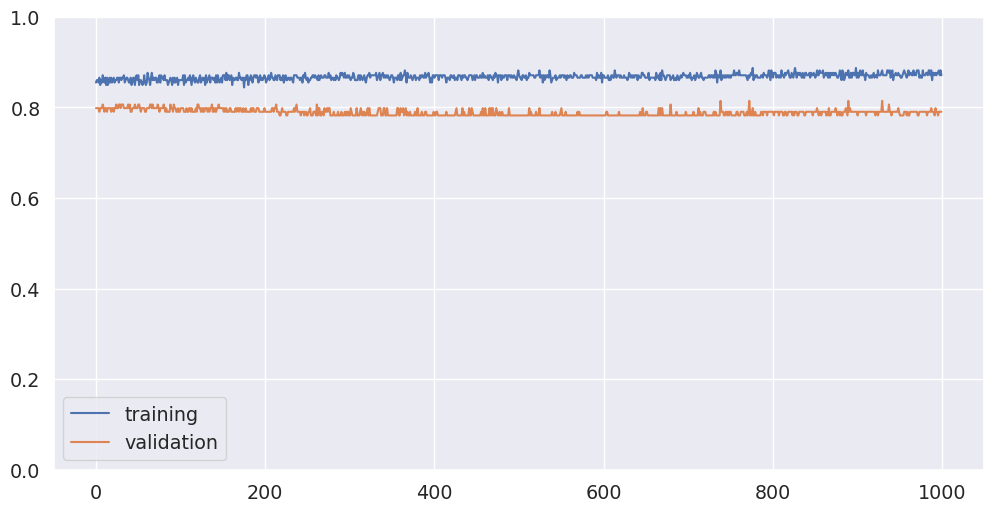

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.4285 - accuracy: 0.3125

186/186 [==============================] - 0s 696us/step - loss: 8.9855 - accuracy: 0.3011 - val_loss: 7.7915 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.2548 - accuracy: 0.3438

186/186 [==============================] - 0s 59us/step - loss: 8.6229 - accuracy: 0.3011 - val_loss: 7.5421 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.3154 - accuracy: 0.3125

186/186 [==============================] - 0s 58us/step - loss: 8.3499 - accuracy: 0.3011 - val_loss: 7.3239 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.1688 - accuracy: 0.3438

186/186 [==============================] - 0s 58us/step - loss: 8.1022 - accuracy: 0.3011 - val_loss: 7.1158 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.5049 - accuracy: 0.2500

186/186 [==============================] - 0s 56us/step - loss: 7.8654 - accuracy: 0.3011 - val_loss: 6.9112 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.4965 - accuracy: 0.2500

186/186 [==============================] - 0s 56us/step - loss: 7.6292 - accuracy: 0.3011 - val_loss: 6.7023 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.1907 - accuracy: 0.2812

186/186 [==============================] - 0s 53us/step - loss: 7.3896 - accuracy: 0.3065 - val_loss: 6.4912 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.0424 - accuracy: 0.4062

186/186 [==============================] - 0s 58us/step - loss: 7.1499 - accuracy: 0.3065 - val_loss: 6.2761 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.2024 - accuracy: 0.2500

186/186 [==============================] - 0s 54us/step - loss: 6.9117 - accuracy: 0.3065 - val_loss: 6.0601 - val_accuracy: 0.3629


/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.6657 - accuracy: 0.3125

186/186 [==============================] - 0s 54us/step - loss: 6.6698 - accuracy: 0.3065 - val_loss: 5.8385 - val_accuracy: 0.3629


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.6977 - accuracy: 0.2500

186/186 [==============================] - 0s 53us/step - loss: 6.4244 - accuracy: 0.3118 - val_loss: 5.6155 - val_accuracy: 0.3629


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.1899 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 6.1782 - accuracy: 0.3118 - val_loss: 5.3877 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6277 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 5.9313 - accuracy: 0.3118 - val_loss: 5.1641 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.4600 - accuracy: 0.2812

186/186 [==============================] - 0s 54us/step - loss: 5.6850 - accuracy: 0.3172 - val_loss: 4.9363 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1718 - accuracy: 0.2500

186/186 [==============================] - 0s 56us/step - loss: 5.4359 - accuracy: 0.3172 - val_loss: 4.7061 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5244 - accuracy: 0.2812

186/186 [==============================] - 0s 57us/step - loss: 5.1870 - accuracy: 0.3172 - val_loss: 4.4763 - val_accuracy: 0.3629


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.3055 - accuracy: 0.2188

186/186 [==============================] - 0s 52us/step - loss: 4.9394 - accuracy: 0.3118 - val_loss: 4.2494 - val_accuracy: 0.3629


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6504 - accuracy: 0.4375



186/186 [==============================] - 0s 56us/step - loss: 4.6902 - accuracy: 0.3118 - val_loss: 4.0186 - val_accuracy: 0.3629


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.0570 - accuracy: 0.4375



186/186 [==============================] - 0s 53us/step - loss: 4.4380 - accuracy: 0.3118 - val_loss: 3.7913 - val_accuracy: 0.3710


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8647 - accuracy: 0.1875

186/186 [==============================] - 0s 54us/step - loss: 4.1856 - accuracy: 0.3118 - val_loss: 3.5678 - val_accuracy: 0.3790


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3016 - accuracy: 0.3750

186/186 [==============================] - 0s 56us/step - loss: 3.9273 - accuracy: 0.3118 - val_loss: 3.3415 - val_accuracy: 0.3790


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0538 - accuracy: 0.3438

186/186 [==============================] - 0s 61us/step - loss: 3.6737 - accuracy: 0.3226 - val_loss: 3.1279 - val_accuracy: 0.3871


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8805 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 3.4266 - accuracy: 0.3226 - val_loss: 2.9124 - val_accuracy: 0.3952


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6073 - accuracy: 0.4062

186/186 [==============================] - 0s 52us/step - loss: 3.1799 - accuracy: 0.3118 - val_loss: 2.7038 - val_accuracy: 0.4032


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0449 - accuracy: 0.2812

186/186 [==============================] - 0s 54us/step - loss: 2.9412 - accuracy: 0.3226 - val_loss: 2.5053 - val_accuracy: 0.3952


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1658 - accuracy: 0.2500

186/186 [==============================] - 0s 54us/step - loss: 2.7113 - accuracy: 0.3226 - val_loss: 2.3119 - val_accuracy: 0.4113


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5881 - accuracy: 0.3750

186/186 [==============================] - 0s 55us/step - loss: 2.4852 - accuracy: 0.3280 - val_loss: 2.1268 - val_accuracy: 0.3952


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.3682 - accuracy: 0.2812

186/186 [==============================] - 0s 54us/step - loss: 2.2695 - accuracy: 0.3333 - val_loss: 1.9498 - val_accuracy: 0.3952


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6065 - accuracy: 0.4688

186/186 [==============================] - 0s 56us/step - loss: 2.0642 - accuracy: 0.3495 - val_loss: 1.7826 - val_accuracy: 0.3790


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9600 - accuracy: 0.2500

186/186 [==============================] - 0s 60us/step - loss: 1.8742 - accuracy: 0.3333 - val_loss: 1.6257 - val_accuracy: 0.3952


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8849 - accuracy: 0.3125

186/186 [==============================] - 0s 56us/step - loss: 1.7000 - accuracy: 0.3817 - val_loss: 1.4865 - val_accuracy: 0.3790


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8144 - accuracy: 0.3750

186/186 [==============================] - 0s 54us/step - loss: 1.5489 - accuracy: 0.3978 - val_loss: 1.3594 - val_accuracy: 0.3952


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3798 - accuracy: 0.3438

186/186 [==============================] - 0s 54us/step - loss: 1.4085 - accuracy: 0.4086 - val_loss: 1.2425 - val_accuracy: 0.4194


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4791 - accuracy: 0.4688

186/186 [==============================] - 0s 64us/step - loss: 1.2761 - accuracy: 0.3925 - val_loss: 1.1415 - val_accuracy: 0.4032


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1663 - accuracy: 0.4375

186/186 [==============================] - 0s 62us/step - loss: 1.1587 - accuracy: 0.4086 - val_loss: 1.0511 - val_accuracy: 0.4274


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0872 - accuracy: 0.5312

186/186 [==============================] - 0s 56us/step - loss: 1.0606 - accuracy: 0.4516 - val_loss: 0.9739 - val_accuracy: 0.4597


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9965 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.9793 - accuracy: 0.4785 - val_loss: 0.9121 - val_accuracy: 0.4839


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0010 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 0.9123 - accuracy: 0.4839 - val_loss: 0.8633 - val_accuracy: 0.4839


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8911 - accuracy: 0.4375

186/186 [==============================] - 0s 56us/step - loss: 0.8585 - accuracy: 0.5215 - val_loss: 0.8181 - val_accuracy: 0.5081


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8531 - accuracy: 0.4375

186/186 [==============================] - 0s 52us/step - loss: 0.8134 - accuracy: 0.5430 - val_loss: 0.7843 - val_accuracy: 0.5242


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9623 - accuracy: 0.4688

186/186 [==============================] - 0s 52us/step - loss: 0.7805 - accuracy: 0.5699 - val_loss: 0.7623 - val_accuracy: 0.5645


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7159 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.7561 - accuracy: 0.5968 - val_loss: 0.7465 - val_accuracy: 0.5806


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7726 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.7395 - accuracy: 0.6237 - val_loss: 0.7354 - val_accuracy: 0.6048


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7180 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.7268 - accuracy: 0.6452 - val_loss: 0.7268 - val_accuracy: 0.6048


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7549 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.7192 - accuracy: 0.6720 - val_loss: 0.7214 - val_accuracy: 0.6048


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7304 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.7148 - accuracy: 0.6720 - val_loss: 0.7158 - val_accuracy: 0.6210


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7289 - accuracy: 0.5625



186/186 [==============================] - 0s 58us/step - loss: 0.7105 - accuracy: 0.6828 - val_loss: 0.7120 - val_accuracy: 0.6210


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7022 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.7073 - accuracy: 0.6828 - val_loss: 0.7081 - val_accuracy: 0.6290


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7027 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.7051 - accuracy: 0.6882 - val_loss: 0.7060 - val_accuracy: 0.6371


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7017 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.7028 - accuracy: 0.6882 - val_loss: 0.7040 - val_accuracy: 0.6371


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7011 - accuracy: 0.6935 - val_loss: 0.7028 - val_accuracy: 0.6371


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.7004 - accuracy: 0.6989 - val_loss: 0.7021 - val_accuracy: 0.6452


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6999 - accuracy: 0.7043 - val_loss: 0.7013 - val_accuracy: 0.6452


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7024 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6996 - accuracy: 0.7043 - val_loss: 0.7011 - val_accuracy: 0.6452


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7021 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6994 - accuracy: 0.7043 - val_loss: 0.7010 - val_accuracy: 0.6452


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.6991 - accuracy: 0.7043 - val_loss: 0.7008 - val_accuracy: 0.6452


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6975 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6989 - accuracy: 0.7043 - val_loss: 0.7006 - val_accuracy: 0.6452


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6724 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6986 - accuracy: 0.7043 - val_loss: 0.7004 - val_accuracy: 0.6452


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.6984 - accuracy: 0.7043 - val_loss: 0.7003 - val_accuracy: 0.6452


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7029 - accuracy: 0.6875



186/186 [==============================] - 0s 54us/step - loss: 0.6981 - accuracy: 0.7043 - val_loss: 0.7001 - val_accuracy: 0.6452


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7005 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6979 - accuracy: 0.7043 - val_loss: 0.6999 - val_accuracy: 0.6452


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7112 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6976 - accuracy: 0.7043 - val_loss: 0.6997 - val_accuracy: 0.6452


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6977 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6974 - accuracy: 0.7043 - val_loss: 0.6995 - val_accuracy: 0.6452


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6971 - accuracy: 0.7043 - val_loss: 0.6994 - val_accuracy: 0.6452


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7109 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 0.6968 - accuracy: 0.7043 - val_loss: 0.6992 - val_accuracy: 0.6452


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7015 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6966 - accuracy: 0.7043 - val_loss: 0.6990 - val_accuracy: 0.6452


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7012 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6963 - accuracy: 0.7043 - val_loss: 0.6989 - val_accuracy: 0.6452


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7106 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.6961 - accuracy: 0.7043 - val_loss: 0.6988 - val_accuracy: 0.6452


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6958 - accuracy: 0.7043 - val_loss: 0.6987 - val_accuracy: 0.6452


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.6956 - accuracy: 0.7043 - val_loss: 0.6978 - val_accuracy: 0.6452


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6953 - accuracy: 0.7043 - val_loss: 0.6976 - val_accuracy: 0.6452


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6950 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6951 - accuracy: 0.7043 - val_loss: 0.6973 - val_accuracy: 0.6452


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.6948 - accuracy: 0.7043 - val_loss: 0.6971 - val_accuracy: 0.6452


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6945 - accuracy: 0.7043 - val_loss: 0.6969 - val_accuracy: 0.6452


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6816 - accuracy: 0.6562



186/186 [==============================] - 0s 52us/step - loss: 0.6943 - accuracy: 0.7043 - val_loss: 0.6967 - val_accuracy: 0.6452


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6940 - accuracy: 0.7043 - val_loss: 0.6965 - val_accuracy: 0.6452


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6961 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6938 - accuracy: 0.7043 - val_loss: 0.6963 - val_accuracy: 0.6452


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6700 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6935 - accuracy: 0.7043 - val_loss: 0.6961 - val_accuracy: 0.6452


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6933 - accuracy: 0.7043 - val_loss: 0.6959 - val_accuracy: 0.6452


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6840 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.6930 - accuracy: 0.7043 - val_loss: 0.6957 - val_accuracy: 0.6452


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6979 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6928 - accuracy: 0.7043 - val_loss: 0.6955 - val_accuracy: 0.6452


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7092 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6925 - accuracy: 0.7043 - val_loss: 0.6954 - val_accuracy: 0.6452


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6886 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6922 - accuracy: 0.7043 - val_loss: 0.6952 - val_accuracy: 0.6452


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7001 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6920 - accuracy: 0.7043 - val_loss: 0.6946 - val_accuracy: 0.6452


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6999 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6917 - accuracy: 0.7043 - val_loss: 0.6944 - val_accuracy: 0.6452


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6967 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6915 - accuracy: 0.7043 - val_loss: 0.6942 - val_accuracy: 0.6452


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6912 - accuracy: 0.7043 - val_loss: 0.6940 - val_accuracy: 0.6452


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7086 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6910 - accuracy: 0.7043 - val_loss: 0.6939 - val_accuracy: 0.6452


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7053 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6907 - accuracy: 0.7043 - val_loss: 0.6937 - val_accuracy: 0.6452


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7021 - accuracy: 0.6250



186/186 [==============================] - 0s 56us/step - loss: 0.6905 - accuracy: 0.7043 - val_loss: 0.6935 - val_accuracy: 0.6452


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.6903 - accuracy: 0.7043 - val_loss: 0.6934 - val_accuracy: 0.6452


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6900 - accuracy: 0.7043 - val_loss: 0.6932 - val_accuracy: 0.6452


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6898 - accuracy: 0.7043 - val_loss: 0.6931 - val_accuracy: 0.6452


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6895 - accuracy: 0.7043 - val_loss: 0.6929 - val_accuracy: 0.6452


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6646 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6893 - accuracy: 0.7043 - val_loss: 0.6928 - val_accuracy: 0.6452


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.6890 - accuracy: 0.7043 - val_loss: 0.6926 - val_accuracy: 0.6452


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6975 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6888 - accuracy: 0.7043 - val_loss: 0.6925 - val_accuracy: 0.6452


Epoch 98/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6705 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6885 - accuracy: 0.7043 - val_loss: 0.6924 - val_accuracy: 0.6452


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6883 - accuracy: 0.7043 - val_loss: 0.6922 - val_accuracy: 0.6452


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6880 - accuracy: 0.7043 - val_loss: 0.6921 - val_accuracy: 0.6452


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6878 - accuracy: 0.7043 - val_loss: 0.6919 - val_accuracy: 0.6452


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6858 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6875 - accuracy: 0.7043 - val_loss: 0.6918 - val_accuracy: 0.6452


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6963 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6872 - accuracy: 0.7043 - val_loss: 0.6916 - val_accuracy: 0.6452


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6871 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 0.6870 - accuracy: 0.7043 - val_loss: 0.6915 - val_accuracy: 0.6452


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6995 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6867 - accuracy: 0.7043 - val_loss: 0.6909 - val_accuracy: 0.6452


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6865 - accuracy: 0.7043 - val_loss: 0.6907 - val_accuracy: 0.6452


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6992 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6862 - accuracy: 0.7043 - val_loss: 0.6906 - val_accuracy: 0.6452


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6802 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6860 - accuracy: 0.7043 - val_loss: 0.6904 - val_accuracy: 0.6452


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6601 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6858 - accuracy: 0.7043 - val_loss: 0.6903 - val_accuracy: 0.6452


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6855 - accuracy: 0.7043 - val_loss: 0.6901 - val_accuracy: 0.6452


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6870 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6853 - accuracy: 0.7043 - val_loss: 0.6899 - val_accuracy: 0.6452


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7024 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6850 - accuracy: 0.7043 - val_loss: 0.6898 - val_accuracy: 0.6452


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 0.6848 - accuracy: 0.7043 - val_loss: 0.6896 - val_accuracy: 0.6452


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6862 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6846 - accuracy: 0.7043 - val_loss: 0.6895 - val_accuracy: 0.6452


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6940 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6843 - accuracy: 0.7043 - val_loss: 0.6893 - val_accuracy: 0.6452


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6857 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6841 - accuracy: 0.7043 - val_loss: 0.6892 - val_accuracy: 0.6452


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6854 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6838 - accuracy: 0.7043 - val_loss: 0.6890 - val_accuracy: 0.6452


Epoch 118/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6852 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6836 - accuracy: 0.7043 - val_loss: 0.6889 - val_accuracy: 0.6452


Epoch 119/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.6833 - accuracy: 0.7043 - val_loss: 0.6888 - val_accuracy: 0.6452


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6888 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6831 - accuracy: 0.7043 - val_loss: 0.6886 - val_accuracy: 0.6452


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6886 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6829 - accuracy: 0.7043 - val_loss: 0.6885 - val_accuracy: 0.6452


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6799 - accuracy: 0.7500

186/186 [==============================] - 0s 90us/step - loss: 0.6826 - accuracy: 0.7043 - val_loss: 0.6884 - val_accuracy: 0.6452


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6796 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6824 - accuracy: 0.7043 - val_loss: 0.6882 - val_accuracy: 0.6452


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6821 - accuracy: 0.7043 - val_loss: 0.6881 - val_accuracy: 0.6452


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6877 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6819 - accuracy: 0.7043 - val_loss: 0.6880 - val_accuracy: 0.6452


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6767 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6816 - accuracy: 0.7043 - val_loss: 0.6876 - val_accuracy: 0.6452


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6740 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6814 - accuracy: 0.7043 - val_loss: 0.6875 - val_accuracy: 0.6452


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6915 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6812 - accuracy: 0.7043 - val_loss: 0.6873 - val_accuracy: 0.6452


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6809 - accuracy: 0.7043 - val_loss: 0.6871 - val_accuracy: 0.6452


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6866 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6807 - accuracy: 0.7043 - val_loss: 0.6870 - val_accuracy: 0.6452


Epoch 131/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7046 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6805 - accuracy: 0.7043 - val_loss: 0.6868 - val_accuracy: 0.6452


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.6250



186/186 [==============================] - 0s 56us/step - loss: 0.6802 - accuracy: 0.7043 - val_loss: 0.6867 - val_accuracy: 0.6452


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6998 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6800 - accuracy: 0.7043 - val_loss: 0.6865 - val_accuracy: 0.6452


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6798 - accuracy: 0.7043 - val_loss: 0.6864 - val_accuracy: 0.6452


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.6250



186/186 [==============================] - 0s 55us/step - loss: 0.6795 - accuracy: 0.7043 - val_loss: 0.6863 - val_accuracy: 0.6452


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6947 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6793 - accuracy: 0.7043 - val_loss: 0.6861 - val_accuracy: 0.6452


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7041 - accuracy: 0.5625



186/186 [==============================] - 0s 54us/step - loss: 0.6791 - accuracy: 0.7043 - val_loss: 0.6860 - val_accuracy: 0.6452


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6703 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6789 - accuracy: 0.7043 - val_loss: 0.6859 - val_accuracy: 0.6452


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6786 - accuracy: 0.7043 - val_loss: 0.6857 - val_accuracy: 0.6452


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6651 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.6784 - accuracy: 0.7043 - val_loss: 0.6856 - val_accuracy: 0.6452


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6695 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6782 - accuracy: 0.7043 - val_loss: 0.6855 - val_accuracy: 0.6452


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6779 - accuracy: 0.7043 - val_loss: 0.6854 - val_accuracy: 0.6452


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6887 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.6777 - accuracy: 0.7043 - val_loss: 0.6853 - val_accuracy: 0.6452


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6786 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.6775 - accuracy: 0.7043 - val_loss: 0.6851 - val_accuracy: 0.6452


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6984 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.6772 - accuracy: 0.7043 - val_loss: 0.6850 - val_accuracy: 0.6452


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6882 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6770 - accuracy: 0.7043 - val_loss: 0.6849 - val_accuracy: 0.6452


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6768 - accuracy: 0.7043 - val_loss: 0.6847 - val_accuracy: 0.6452


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7032 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.6766 - accuracy: 0.7043 - val_loss: 0.6845 - val_accuracy: 0.6452


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6877 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6764 - accuracy: 0.7043 - val_loss: 0.6844 - val_accuracy: 0.6452


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6761 - accuracy: 0.7043 - val_loss: 0.6842 - val_accuracy: 0.6452


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6759 - accuracy: 0.7043 - val_loss: 0.6841 - val_accuracy: 0.6452


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7135 - accuracy: 0.5000

186/186 [==============================] - 0s 53us/step - loss: 0.6757 - accuracy: 0.7043 - val_loss: 0.6840 - val_accuracy: 0.6452


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6817 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6755 - accuracy: 0.7043 - val_loss: 0.6838 - val_accuracy: 0.6452


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6655 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6753 - accuracy: 0.7043 - val_loss: 0.6837 - val_accuracy: 0.6452


Epoch 155/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7081 - accuracy: 0.5312

186/186 [==============================] - 0s 62us/step - loss: 0.6751 - accuracy: 0.7043 - val_loss: 0.6836 - val_accuracy: 0.6452


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6749 - accuracy: 0.7043 - val_loss: 0.6834 - val_accuracy: 0.6452


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6972 - accuracy: 0.5938



186/186 [==============================] - 0s 54us/step - loss: 0.6746 - accuracy: 0.7043 - val_loss: 0.6833 - val_accuracy: 0.6452


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6971 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6744 - accuracy: 0.7043 - val_loss: 0.6832 - val_accuracy: 0.6452


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6742 - accuracy: 0.7043 - val_loss: 0.6830 - val_accuracy: 0.6452


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6740 - accuracy: 0.7043 - val_loss: 0.6829 - val_accuracy: 0.6452


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6722 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6737 - accuracy: 0.7043 - val_loss: 0.6828 - val_accuracy: 0.6452


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6735 - accuracy: 0.7043 - val_loss: 0.6827 - val_accuracy: 0.6452


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6733 - accuracy: 0.7043 - val_loss: 0.6825 - val_accuracy: 0.6452


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6731 - accuracy: 0.7043 - val_loss: 0.6824 - val_accuracy: 0.6452


Epoch 165/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6793 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6728 - accuracy: 0.7043 - val_loss: 0.6823 - val_accuracy: 0.6452


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6726 - accuracy: 0.7043 - val_loss: 0.6822 - val_accuracy: 0.6452


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6724 - accuracy: 0.7043 - val_loss: 0.6820 - val_accuracy: 0.6452


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6721 - accuracy: 0.7043 - val_loss: 0.6819 - val_accuracy: 0.6452


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6719 - accuracy: 0.7043 - val_loss: 0.6818 - val_accuracy: 0.6452


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6723 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6717 - accuracy: 0.7043 - val_loss: 0.6817 - val_accuracy: 0.6452


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6715 - accuracy: 0.7043 - val_loss: 0.6815 - val_accuracy: 0.6452


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6713 - accuracy: 0.7043 - val_loss: 0.6814 - val_accuracy: 0.6452


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6710 - accuracy: 0.7043 - val_loss: 0.6813 - val_accuracy: 0.6452


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6708 - accuracy: 0.7043 - val_loss: 0.6811 - val_accuracy: 0.6452


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6706 - accuracy: 0.7043 - val_loss: 0.6810 - val_accuracy: 0.6452


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6704 - accuracy: 0.7043 - val_loss: 0.6809 - val_accuracy: 0.6452


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6702 - accuracy: 0.7043 - val_loss: 0.6807 - val_accuracy: 0.6452


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6700 - accuracy: 0.7043 - val_loss: 0.6806 - val_accuracy: 0.6452


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6826 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6698 - accuracy: 0.7043 - val_loss: 0.6805 - val_accuracy: 0.6452


Epoch 180/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6695 - accuracy: 0.7043 - val_loss: 0.6804 - val_accuracy: 0.6452


Epoch 181/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6510 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6693 - accuracy: 0.7043 - val_loss: 0.6802 - val_accuracy: 0.6452


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6634 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6691 - accuracy: 0.7043 - val_loss: 0.6801 - val_accuracy: 0.6452


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7072 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.6689 - accuracy: 0.7043 - val_loss: 0.6800 - val_accuracy: 0.6452


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6944 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.6687 - accuracy: 0.7043 - val_loss: 0.6799 - val_accuracy: 0.6452


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6685 - accuracy: 0.7043 - val_loss: 0.6797 - val_accuracy: 0.6452


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6683 - accuracy: 0.7043 - val_loss: 0.6796 - val_accuracy: 0.6452


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6681 - accuracy: 0.7043 - val_loss: 0.6795 - val_accuracy: 0.6452


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6678 - accuracy: 0.7043 - val_loss: 0.6793 - val_accuracy: 0.6452


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6676 - accuracy: 0.7043 - val_loss: 0.6792 - val_accuracy: 0.6452


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6742 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6674 - accuracy: 0.7043 - val_loss: 0.6793 - val_accuracy: 0.6532


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6740 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6672 - accuracy: 0.7043 - val_loss: 0.6791 - val_accuracy: 0.6532


Epoch 192/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6606 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6670 - accuracy: 0.7043 - val_loss: 0.6790 - val_accuracy: 0.6532


Epoch 193/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6419 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6668 - accuracy: 0.7043 - val_loss: 0.6788 - val_accuracy: 0.6532


Epoch 194/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6666 - accuracy: 0.7043 - val_loss: 0.6787 - val_accuracy: 0.6532


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6664 - accuracy: 0.7043 - val_loss: 0.6785 - val_accuracy: 0.6532


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6662 - accuracy: 0.7043 - val_loss: 0.6784 - val_accuracy: 0.6532


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6797 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6660 - accuracy: 0.7043 - val_loss: 0.6783 - val_accuracy: 0.6532


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6658 - accuracy: 0.7043 - val_loss: 0.6781 - val_accuracy: 0.6532


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6656 - accuracy: 0.7043 - val_loss: 0.6780 - val_accuracy: 0.6532


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6654 - accuracy: 0.7043 - val_loss: 0.6778 - val_accuracy: 0.6532


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6791 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6652 - accuracy: 0.7043 - val_loss: 0.6777 - val_accuracy: 0.6532


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6650 - accuracy: 0.7043 - val_loss: 0.6775 - val_accuracy: 0.6532


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6648 - accuracy: 0.7043 - val_loss: 0.6774 - val_accuracy: 0.6532


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6646 - accuracy: 0.7043 - val_loss: 0.6772 - val_accuracy: 0.6452


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6644 - accuracy: 0.7043 - val_loss: 0.6771 - val_accuracy: 0.6452


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6642 - accuracy: 0.7043 - val_loss: 0.6769 - val_accuracy: 0.6452


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6640 - accuracy: 0.7043 - val_loss: 0.6768 - val_accuracy: 0.6452


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6638 - accuracy: 0.7043 - val_loss: 0.6766 - val_accuracy: 0.6452


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6636 - accuracy: 0.7043 - val_loss: 0.6765 - val_accuracy: 0.6452


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 0.6634 - accuracy: 0.7043 - val_loss: 0.6764 - val_accuracy: 0.6452


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6632 - accuracy: 0.7043 - val_loss: 0.6762 - val_accuracy: 0.6452


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5938



186/186 [==============================] - 0s 56us/step - loss: 0.6630 - accuracy: 0.7043 - val_loss: 0.6764 - val_accuracy: 0.6532


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6628 - accuracy: 0.7043 - val_loss: 0.6763 - val_accuracy: 0.6532


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6771 - accuracy: 0.6562



186/186 [==============================] - 0s 51us/step - loss: 0.6626 - accuracy: 0.7043 - val_loss: 0.6761 - val_accuracy: 0.6532


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6624 - accuracy: 0.7043 - val_loss: 0.6760 - val_accuracy: 0.6532


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6622 - accuracy: 0.7043 - val_loss: 0.6759 - val_accuracy: 0.6532


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6620 - accuracy: 0.7043 - val_loss: 0.6757 - val_accuracy: 0.6532


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.6618 - accuracy: 0.7043 - val_loss: 0.6755 - val_accuracy: 0.6532


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6616 - accuracy: 0.7043 - val_loss: 0.6754 - val_accuracy: 0.6532


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6430 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.6614 - accuracy: 0.7043 - val_loss: 0.6753 - val_accuracy: 0.6532


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6612 - accuracy: 0.7043 - val_loss: 0.6751 - val_accuracy: 0.6532


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6610 - accuracy: 0.7043 - val_loss: 0.6750 - val_accuracy: 0.6532


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6528 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6608 - accuracy: 0.7043 - val_loss: 0.6748 - val_accuracy: 0.6532


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6606 - accuracy: 0.7043 - val_loss: 0.6747 - val_accuracy: 0.6532


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6604 - accuracy: 0.7043 - val_loss: 0.6746 - val_accuracy: 0.6532


Epoch 226/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.6603 - accuracy: 0.7043 - val_loss: 0.6744 - val_accuracy: 0.6532


Epoch 227/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6601 - accuracy: 0.7043 - val_loss: 0.6743 - val_accuracy: 0.6532


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6599 - accuracy: 0.7043 - val_loss: 0.6742 - val_accuracy: 0.6532


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7062 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 0.6597 - accuracy: 0.7043 - val_loss: 0.6741 - val_accuracy: 0.6532


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6595 - accuracy: 0.7043 - val_loss: 0.6739 - val_accuracy: 0.6532


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6593 - accuracy: 0.7043 - val_loss: 0.6738 - val_accuracy: 0.6532


Epoch 232/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6591 - accuracy: 0.7043 - val_loss: 0.6737 - val_accuracy: 0.6532


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6875



186/186 [==============================] - 0s 57us/step - loss: 0.6589 - accuracy: 0.7043 - val_loss: 0.6740 - val_accuracy: 0.6532


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6587 - accuracy: 0.7043 - val_loss: 0.6739 - val_accuracy: 0.6532


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6740 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6585 - accuracy: 0.7043 - val_loss: 0.6737 - val_accuracy: 0.6532


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6583 - accuracy: 0.7043 - val_loss: 0.6736 - val_accuracy: 0.6532


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6657 - accuracy: 0.6875

186/186 [==============================] - 0s 67us/step - loss: 0.6582 - accuracy: 0.7043 - val_loss: 0.6735 - val_accuracy: 0.6532


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5938

186/186 [==============================] - 0s 58us/step - loss: 0.6580 - accuracy: 0.7043 - val_loss: 0.6734 - val_accuracy: 0.6532


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6572 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6578 - accuracy: 0.7043 - val_loss: 0.6733 - val_accuracy: 0.6532


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6406 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6576 - accuracy: 0.7043 - val_loss: 0.6731 - val_accuracy: 0.6532


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6554 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6574 - accuracy: 0.7043 - val_loss: 0.6730 - val_accuracy: 0.6532


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6483 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6573 - accuracy: 0.7043 - val_loss: 0.6729 - val_accuracy: 0.6532


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6896 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6571 - accuracy: 0.7043 - val_loss: 0.6728 - val_accuracy: 0.6532


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6569 - accuracy: 0.7043 - val_loss: 0.6726 - val_accuracy: 0.6532


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6549 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6567 - accuracy: 0.7043 - val_loss: 0.6725 - val_accuracy: 0.6532


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6474 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6565 - accuracy: 0.7043 - val_loss: 0.6724 - val_accuracy: 0.6532


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6556 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6563 - accuracy: 0.7043 - val_loss: 0.6723 - val_accuracy: 0.6532


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6554 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6562 - accuracy: 0.7043 - val_loss: 0.6722 - val_accuracy: 0.6532


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6560 - accuracy: 0.7043 - val_loss: 0.6720 - val_accuracy: 0.6532


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6379 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6558 - accuracy: 0.7043 - val_loss: 0.6719 - val_accuracy: 0.6532


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6556 - accuracy: 0.7043 - val_loss: 0.6725 - val_accuracy: 0.6532


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6631 - accuracy: 0.6875



186/186 [==============================] - 0s 51us/step - loss: 0.6554 - accuracy: 0.7043 - val_loss: 0.6724 - val_accuracy: 0.6532


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6562



186/186 [==============================] - 0s 58us/step - loss: 0.6553 - accuracy: 0.7043 - val_loss: 0.6723 - val_accuracy: 0.6532


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6551 - accuracy: 0.7043 - val_loss: 0.6722 - val_accuracy: 0.6532


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6627 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6549 - accuracy: 0.7043 - val_loss: 0.6721 - val_accuracy: 0.6532


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6451 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6548 - accuracy: 0.7043 - val_loss: 0.6720 - val_accuracy: 0.6532


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6535 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6546 - accuracy: 0.7043 - val_loss: 0.6719 - val_accuracy: 0.6532


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6973 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.6544 - accuracy: 0.7043 - val_loss: 0.6718 - val_accuracy: 0.6532


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6542 - accuracy: 0.7043 - val_loss: 0.6717 - val_accuracy: 0.6532


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.6541 - accuracy: 0.7043 - val_loss: 0.6716 - val_accuracy: 0.6532


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6263 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6539 - accuracy: 0.7043 - val_loss: 0.6714 - val_accuracy: 0.6532


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6537 - accuracy: 0.7043 - val_loss: 0.6713 - val_accuracy: 0.6532


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6882 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6535 - accuracy: 0.7043 - val_loss: 0.6711 - val_accuracy: 0.6532


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6882 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6534 - accuracy: 0.7043 - val_loss: 0.6710 - val_accuracy: 0.6532


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6791 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6532 - accuracy: 0.7043 - val_loss: 0.6708 - val_accuracy: 0.6532


Epoch 266/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6530 - accuracy: 0.7043 - val_loss: 0.6707 - val_accuracy: 0.6532


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6528 - accuracy: 0.7043 - val_loss: 0.6705 - val_accuracy: 0.6532


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6526 - accuracy: 0.7043 - val_loss: 0.6704 - val_accuracy: 0.6532


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6239 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6525 - accuracy: 0.7043 - val_loss: 0.6703 - val_accuracy: 0.6532


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6154 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6523 - accuracy: 0.7043 - val_loss: 0.6702 - val_accuracy: 0.6532


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6521 - accuracy: 0.7043 - val_loss: 0.6701 - val_accuracy: 0.6532


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5953 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.6519 - accuracy: 0.7043 - val_loss: 0.6700 - val_accuracy: 0.6532


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6691 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6519 - accuracy: 0.7043 - val_loss: 0.6696 - val_accuracy: 0.6532


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5312

186/186 [==============================] - 0s 54us/step - loss: 0.6517 - accuracy: 0.7043 - val_loss: 0.6700 - val_accuracy: 0.6532


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6421 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6514 - accuracy: 0.7043 - val_loss: 0.6699 - val_accuracy: 0.6532


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.7188



186/186 [==============================] - 0s 53us/step - loss: 0.6513 - accuracy: 0.7043 - val_loss: 0.6698 - val_accuracy: 0.6532


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6511 - accuracy: 0.7043 - val_loss: 0.6697 - val_accuracy: 0.6532


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6510 - accuracy: 0.7043 - val_loss: 0.6697 - val_accuracy: 0.6532


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.6875



186/186 [==============================] - 0s 52us/step - loss: 0.6508 - accuracy: 0.7043 - val_loss: 0.6696 - val_accuracy: 0.6532


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6778 - accuracy: 0.6250



186/186 [==============================] - 0s 54us/step - loss: 0.6507 - accuracy: 0.7043 - val_loss: 0.6695 - val_accuracy: 0.6532


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6505 - accuracy: 0.7043 - val_loss: 0.6694 - val_accuracy: 0.6532


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7063 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.6504 - accuracy: 0.7043 - val_loss: 0.6693 - val_accuracy: 0.6532


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6502 - accuracy: 0.7043 - val_loss: 0.6692 - val_accuracy: 0.6532


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6501 - accuracy: 0.7043 - val_loss: 0.6691 - val_accuracy: 0.6532


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6870 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6499 - accuracy: 0.7043 - val_loss: 0.6690 - val_accuracy: 0.6532


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6386 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6497 - accuracy: 0.7043 - val_loss: 0.6689 - val_accuracy: 0.6532


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6406 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6496 - accuracy: 0.7043 - val_loss: 0.6688 - val_accuracy: 0.6532


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6494 - accuracy: 0.7043 - val_loss: 0.6686 - val_accuracy: 0.6532


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6575 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6492 - accuracy: 0.7043 - val_loss: 0.6685 - val_accuracy: 0.6532


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7063 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.6491 - accuracy: 0.7043 - val_loss: 0.6684 - val_accuracy: 0.6532


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6474 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6489 - accuracy: 0.7043 - val_loss: 0.6695 - val_accuracy: 0.6532


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6005 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6488 - accuracy: 0.7043 - val_loss: 0.6686 - val_accuracy: 0.6532


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6562



186/186 [==============================] - 0s 54us/step - loss: 0.6486 - accuracy: 0.7043 - val_loss: 0.6685 - val_accuracy: 0.6532


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 0.6485 - accuracy: 0.7043 - val_loss: 0.6684 - val_accuracy: 0.6532


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6483 - accuracy: 0.7043 - val_loss: 0.6684 - val_accuracy: 0.6532


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6482 - accuracy: 0.7043 - val_loss: 0.6683 - val_accuracy: 0.6532


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6564 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6480 - accuracy: 0.7043 - val_loss: 0.6682 - val_accuracy: 0.6532


Epoch 298/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6061 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6479 - accuracy: 0.7043 - val_loss: 0.6681 - val_accuracy: 0.6532


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6259 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6478 - accuracy: 0.7043 - val_loss: 0.6680 - val_accuracy: 0.6532


Epoch 300/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6476 - accuracy: 0.7043 - val_loss: 0.6679 - val_accuracy: 0.6532


Epoch 301/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6458 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 0.6475 - accuracy: 0.7043 - val_loss: 0.6678 - val_accuracy: 0.6532


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.6473 - accuracy: 0.7043 - val_loss: 0.6677 - val_accuracy: 0.6532


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7168 - accuracy: 0.5000

186/186 [==============================] - 0s 56us/step - loss: 0.6472 - accuracy: 0.7043 - val_loss: 0.6677 - val_accuracy: 0.6532


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6470 - accuracy: 0.7043 - val_loss: 0.6676 - val_accuracy: 0.6532


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6348 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6469 - accuracy: 0.7043 - val_loss: 0.6675 - val_accuracy: 0.6532


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6467 - accuracy: 0.7043 - val_loss: 0.6674 - val_accuracy: 0.6532


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6447 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6465 - accuracy: 0.7043 - val_loss: 0.6673 - val_accuracy: 0.6532


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6757 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6464 - accuracy: 0.7043 - val_loss: 0.6684 - val_accuracy: 0.6532


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6463 - accuracy: 0.7043 - val_loss: 0.6683 - val_accuracy: 0.6532


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7067 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.6461 - accuracy: 0.7043 - val_loss: 0.6682 - val_accuracy: 0.6532


Epoch 311/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6460 - accuracy: 0.7043 - val_loss: 0.6681 - val_accuracy: 0.6532


Epoch 312/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6858 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6458 - accuracy: 0.7043 - val_loss: 0.6680 - val_accuracy: 0.6532


Epoch 313/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6269 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6457 - accuracy: 0.7043 - val_loss: 0.6679 - val_accuracy: 0.6532


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6455 - accuracy: 0.7043 - val_loss: 0.6678 - val_accuracy: 0.6532


Epoch 315/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6646 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6454 - accuracy: 0.7043 - val_loss: 0.6677 - val_accuracy: 0.6532


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6327 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6453 - accuracy: 0.7043 - val_loss: 0.6668 - val_accuracy: 0.6532


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6451 - accuracy: 0.7043 - val_loss: 0.6667 - val_accuracy: 0.6532


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6450 - accuracy: 0.7043 - val_loss: 0.6666 - val_accuracy: 0.6532


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6153 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6448 - accuracy: 0.7043 - val_loss: 0.6665 - val_accuracy: 0.6532


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6447 - accuracy: 0.7043 - val_loss: 0.6664 - val_accuracy: 0.6532


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5994 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.6445 - accuracy: 0.7043 - val_loss: 0.6664 - val_accuracy: 0.6532


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6444 - accuracy: 0.7043 - val_loss: 0.6663 - val_accuracy: 0.6532


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6442 - accuracy: 0.7043 - val_loss: 0.6674 - val_accuracy: 0.6452


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6441 - accuracy: 0.7043 - val_loss: 0.6673 - val_accuracy: 0.6452


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6636 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6439 - accuracy: 0.7043 - val_loss: 0.6672 - val_accuracy: 0.6452


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6854 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6438 - accuracy: 0.7043 - val_loss: 0.6671 - val_accuracy: 0.6452


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7072 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.6436 - accuracy: 0.7043 - val_loss: 0.6670 - val_accuracy: 0.6452


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6435 - accuracy: 0.7043 - val_loss: 0.6670 - val_accuracy: 0.6452


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6434 - accuracy: 0.7043 - val_loss: 0.6668 - val_accuracy: 0.6452


Epoch 330/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6432 - accuracy: 0.7043 - val_loss: 0.6667 - val_accuracy: 0.6452


Epoch 331/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6741 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.6431 - accuracy: 0.7043 - val_loss: 0.6666 - val_accuracy: 0.6452


Epoch 332/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6241 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6429 - accuracy: 0.7043 - val_loss: 0.6665 - val_accuracy: 0.6452


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5849 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.6428 - accuracy: 0.7043 - val_loss: 0.6663 - val_accuracy: 0.6532


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6427 - accuracy: 0.7043 - val_loss: 0.6662 - val_accuracy: 0.6532


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5955 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.6425 - accuracy: 0.7043 - val_loss: 0.6660 - val_accuracy: 0.6532


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6424 - accuracy: 0.7043 - val_loss: 0.6659 - val_accuracy: 0.6532


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6512 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6422 - accuracy: 0.7043 - val_loss: 0.6657 - val_accuracy: 0.6532


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6736 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6421 - accuracy: 0.7043 - val_loss: 0.6656 - val_accuracy: 0.6532


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6396 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6419 - accuracy: 0.7043 - val_loss: 0.6654 - val_accuracy: 0.6532


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6848 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6418 - accuracy: 0.7043 - val_loss: 0.6653 - val_accuracy: 0.6532


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6416 - accuracy: 0.7043 - val_loss: 0.6652 - val_accuracy: 0.6532


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6415 - accuracy: 0.7043 - val_loss: 0.6651 - val_accuracy: 0.6532


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6413 - accuracy: 0.7043 - val_loss: 0.6650 - val_accuracy: 0.6532


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6043 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6412 - accuracy: 0.7043 - val_loss: 0.6650 - val_accuracy: 0.6532


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6157 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6411 - accuracy: 0.7043 - val_loss: 0.6645 - val_accuracy: 0.6532


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6411 - accuracy: 0.7043 - val_loss: 0.6651 - val_accuracy: 0.6532


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6730 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6408 - accuracy: 0.7043 - val_loss: 0.6650 - val_accuracy: 0.6532


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6730 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6407 - accuracy: 0.7043 - val_loss: 0.6650 - val_accuracy: 0.6532


Epoch 349/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6405 - accuracy: 0.7043 - val_loss: 0.6649 - val_accuracy: 0.6532


Epoch 350/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6379 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6404 - accuracy: 0.7043 - val_loss: 0.6648 - val_accuracy: 0.6532


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6378 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.6403 - accuracy: 0.7043 - val_loss: 0.6647 - val_accuracy: 0.6532


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6259 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6402 - accuracy: 0.7043 - val_loss: 0.6647 - val_accuracy: 0.6532


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6401 - accuracy: 0.7043 - val_loss: 0.6646 - val_accuracy: 0.6532


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6399 - accuracy: 0.7043 - val_loss: 0.6645 - val_accuracy: 0.6532


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6844 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6398 - accuracy: 0.7043 - val_loss: 0.6644 - val_accuracy: 0.6532


Epoch 356/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6371 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6397 - accuracy: 0.7043 - val_loss: 0.6643 - val_accuracy: 0.6532


Epoch 357/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6395 - accuracy: 0.7043 - val_loss: 0.6642 - val_accuracy: 0.6532


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6249 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6394 - accuracy: 0.7043 - val_loss: 0.6641 - val_accuracy: 0.6532


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.6250



186/186 [==============================] - 0s 57us/step - loss: 0.6393 - accuracy: 0.7043 - val_loss: 0.6640 - val_accuracy: 0.6532


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6723 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6391 - accuracy: 0.7043 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 361/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6483 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6390 - accuracy: 0.7043 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6389 - accuracy: 0.7043 - val_loss: 0.6651 - val_accuracy: 0.6371


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6387 - accuracy: 0.7043 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6386 - accuracy: 0.7043 - val_loss: 0.6649 - val_accuracy: 0.6371


Epoch 365/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5832 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.6385 - accuracy: 0.7043 - val_loss: 0.6648 - val_accuracy: 0.6371


Epoch 366/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6073 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6384 - accuracy: 0.7043 - val_loss: 0.6647 - val_accuracy: 0.6371


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.6383 - accuracy: 0.7043 - val_loss: 0.6646 - val_accuracy: 0.6371


Epoch 368/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6381 - accuracy: 0.7043 - val_loss: 0.6645 - val_accuracy: 0.6371


Epoch 369/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5702 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.6380 - accuracy: 0.7043 - val_loss: 0.6644 - val_accuracy: 0.6371


Epoch 370/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5944 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6379 - accuracy: 0.7043 - val_loss: 0.6642 - val_accuracy: 0.6371


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6717 - accuracy: 0.6250



186/186 [==============================] - 0s 53us/step - loss: 0.6378 - accuracy: 0.7043 - val_loss: 0.6641 - val_accuracy: 0.6371


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6963 - accuracy: 0.5625



186/186 [==============================] - 0s 52us/step - loss: 0.6377 - accuracy: 0.7043 - val_loss: 0.6634 - val_accuracy: 0.6452


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6470 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.6375 - accuracy: 0.7043 - val_loss: 0.6633 - val_accuracy: 0.6532


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6469 - accuracy: 0.6875



186/186 [==============================] - 0s 54us/step - loss: 0.6374 - accuracy: 0.7043 - val_loss: 0.6631 - val_accuracy: 0.6532


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5972 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6373 - accuracy: 0.7043 - val_loss: 0.6630 - val_accuracy: 0.6532


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6372 - accuracy: 0.7043 - val_loss: 0.6641 - val_accuracy: 0.6371


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6370 - accuracy: 0.7043 - val_loss: 0.6640 - val_accuracy: 0.6371


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6340 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.6369 - accuracy: 0.7043 - val_loss: 0.6640 - val_accuracy: 0.6371


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6368 - accuracy: 0.7043 - val_loss: 0.6639 - val_accuracy: 0.6371


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6367 - accuracy: 0.7043 - val_loss: 0.6638 - val_accuracy: 0.6371


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6335 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6366 - accuracy: 0.7043 - val_loss: 0.6637 - val_accuracy: 0.6371


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6364 - accuracy: 0.7043 - val_loss: 0.6636 - val_accuracy: 0.6371


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6363 - accuracy: 0.7043 - val_loss: 0.6635 - val_accuracy: 0.6371


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6362 - accuracy: 0.7043 - val_loss: 0.6634 - val_accuracy: 0.6371


Epoch 385/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6361 - accuracy: 0.7043 - val_loss: 0.6633 - val_accuracy: 0.6371


Epoch 386/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6359 - accuracy: 0.7043 - val_loss: 0.6632 - val_accuracy: 0.6371


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.5938

186/186 [==============================] - 0s 76us/step - loss: 0.6358 - accuracy: 0.7043 - val_loss: 0.6630 - val_accuracy: 0.6371


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5000

186/186 [==============================] - 0s 70us/step - loss: 0.6357 - accuracy: 0.7043 - val_loss: 0.6629 - val_accuracy: 0.6371


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6196 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6356 - accuracy: 0.7043 - val_loss: 0.6627 - val_accuracy: 0.6371


Epoch 390/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6451 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6354 - accuracy: 0.7043 - val_loss: 0.6626 - val_accuracy: 0.6371


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6353 - accuracy: 0.7043 - val_loss: 0.6625 - val_accuracy: 0.6371


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6320 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6352 - accuracy: 0.7043 - val_loss: 0.6623 - val_accuracy: 0.6371


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6318 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6350 - accuracy: 0.7043 - val_loss: 0.6622 - val_accuracy: 0.6371


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6446 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6349 - accuracy: 0.7043 - val_loss: 0.6621 - val_accuracy: 0.6371


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6348 - accuracy: 0.7043 - val_loss: 0.6621 - val_accuracy: 0.6371


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6054 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6347 - accuracy: 0.7043 - val_loss: 0.6620 - val_accuracy: 0.6371


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6443 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6345 - accuracy: 0.7043 - val_loss: 0.6619 - val_accuracy: 0.6371


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6311 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6344 - accuracy: 0.7043 - val_loss: 0.6619 - val_accuracy: 0.6371


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6441 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6343 - accuracy: 0.7043 - val_loss: 0.6615 - val_accuracy: 0.6532


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6343 - accuracy: 0.7043 - val_loss: 0.6622 - val_accuracy: 0.6371


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6965 - accuracy: 0.5625

186/186 [==============================] - 0s 60us/step - loss: 0.6340 - accuracy: 0.7043 - val_loss: 0.6622 - val_accuracy: 0.6371


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6339 - accuracy: 0.7043 - val_loss: 0.6621 - val_accuracy: 0.6371


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6544 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6338 - accuracy: 0.7043 - val_loss: 0.6621 - val_accuracy: 0.6371


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6701 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6337 - accuracy: 0.7043 - val_loss: 0.6620 - val_accuracy: 0.6371


Epoch 405/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6700 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.6336 - accuracy: 0.7043 - val_loss: 0.6619 - val_accuracy: 0.6371


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6277 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6335 - accuracy: 0.7043 - val_loss: 0.6618 - val_accuracy: 0.6371


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6334 - accuracy: 0.7043 - val_loss: 0.6617 - val_accuracy: 0.6371


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6332 - accuracy: 0.7043 - val_loss: 0.6616 - val_accuracy: 0.6371


Epoch 409/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6331 - accuracy: 0.7043 - val_loss: 0.6615 - val_accuracy: 0.6371


Epoch 410/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6027 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6330 - accuracy: 0.7043 - val_loss: 0.6614 - val_accuracy: 0.6371


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6329 - accuracy: 0.7043 - val_loss: 0.6614 - val_accuracy: 0.6371


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6328 - accuracy: 0.7043 - val_loss: 0.6613 - val_accuracy: 0.6371


Epoch 413/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6326 - accuracy: 0.7043 - val_loss: 0.6613 - val_accuracy: 0.6371


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6425 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6325 - accuracy: 0.7043 - val_loss: 0.6612 - val_accuracy: 0.6371


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6324 - accuracy: 0.7043 - val_loss: 0.6611 - val_accuracy: 0.6371


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6015 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6323 - accuracy: 0.7043 - val_loss: 0.6610 - val_accuracy: 0.6371


Epoch 417/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6559 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6322 - accuracy: 0.7043 - val_loss: 0.6610 - val_accuracy: 0.6371


Epoch 418/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6285 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6320 - accuracy: 0.7043 - val_loss: 0.6609 - val_accuracy: 0.6371


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6319 - accuracy: 0.7043 - val_loss: 0.6609 - val_accuracy: 0.6371


Epoch 420/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6144 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6318 - accuracy: 0.7043 - val_loss: 0.6608 - val_accuracy: 0.6371


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6400 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.6317 - accuracy: 0.7043 - val_loss: 0.6608 - val_accuracy: 0.6371


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6417 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6315 - accuracy: 0.7043 - val_loss: 0.6607 - val_accuracy: 0.6371


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5984 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.6314 - accuracy: 0.7043 - val_loss: 0.6607 - val_accuracy: 0.6371


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6313 - accuracy: 0.7043 - val_loss: 0.6606 - val_accuracy: 0.6371


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6312 - accuracy: 0.7043 - val_loss: 0.6606 - val_accuracy: 0.6371


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6675 - accuracy: 0.5938



186/186 [==============================] - 0s 53us/step - loss: 0.6311 - accuracy: 0.7043 - val_loss: 0.6606 - val_accuracy: 0.6371


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6310 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6308 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6307 - accuracy: 0.7043 - val_loss: 0.6604 - val_accuracy: 0.6371


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6306 - accuracy: 0.7043 - val_loss: 0.6604 - val_accuracy: 0.6371


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6407 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6305 - accuracy: 0.7043 - val_loss: 0.6604 - val_accuracy: 0.6371


Epoch 432/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5843 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6304 - accuracy: 0.7043 - val_loss: 0.6603 - val_accuracy: 0.6371


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6303 - accuracy: 0.7043 - val_loss: 0.6603 - val_accuracy: 0.6371


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6302 - accuracy: 0.7043 - val_loss: 0.6602 - val_accuracy: 0.6371


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6300 - accuracy: 0.7043 - val_loss: 0.6602 - val_accuracy: 0.6371


Epoch 436/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6299 - accuracy: 0.7043 - val_loss: 0.6602 - val_accuracy: 0.6371


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.6298 - accuracy: 0.7043 - val_loss: 0.6601 - val_accuracy: 0.6371


Epoch 438/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6297 - accuracy: 0.7043 - val_loss: 0.6598 - val_accuracy: 0.6371


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6296 - accuracy: 0.7043 - val_loss: 0.6608 - val_accuracy: 0.6371


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6398 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6294 - accuracy: 0.7043 - val_loss: 0.6607 - val_accuracy: 0.6371


Epoch 441/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5680 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.6294 - accuracy: 0.7043 - val_loss: 0.6607 - val_accuracy: 0.6371


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6293 - accuracy: 0.7043 - val_loss: 0.6606 - val_accuracy: 0.6371


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6099 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6292 - accuracy: 0.7043 - val_loss: 0.6606 - val_accuracy: 0.6371


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6291 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6394 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6290 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6289 - accuracy: 0.7043 - val_loss: 0.6604 - val_accuracy: 0.6371


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6288 - accuracy: 0.7043 - val_loss: 0.6603 - val_accuracy: 0.6371


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6287 - accuracy: 0.7043 - val_loss: 0.6602 - val_accuracy: 0.6371


Epoch 449/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6286 - accuracy: 0.7043 - val_loss: 0.6601 - val_accuracy: 0.6371


Epoch 450/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.6285 - accuracy: 0.7043 - val_loss: 0.6601 - val_accuracy: 0.6371


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.6284 - accuracy: 0.7043 - val_loss: 0.6600 - val_accuracy: 0.6371


Epoch 452/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6283 - accuracy: 0.7043 - val_loss: 0.6599 - val_accuracy: 0.6371


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6241 - accuracy: 0.7188



186/186 [==============================] - 0s 55us/step - loss: 0.6282 - accuracy: 0.7043 - val_loss: 0.6598 - val_accuracy: 0.6371


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7121 - accuracy: 0.5312

186/186 [==============================] - 0s 61us/step - loss: 0.6281 - accuracy: 0.7043 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6239 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6280 - accuracy: 0.7043 - val_loss: 0.6596 - val_accuracy: 0.6371


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6233 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6279 - accuracy: 0.7043 - val_loss: 0.6595 - val_accuracy: 0.6371


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6089 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.6278 - accuracy: 0.7043 - val_loss: 0.6594 - val_accuracy: 0.6371


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6383 - accuracy: 0.6875



186/186 [==============================] - 0s 56us/step - loss: 0.6277 - accuracy: 0.7043 - val_loss: 0.6593 - val_accuracy: 0.6371


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5790 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6276 - accuracy: 0.7043 - val_loss: 0.6593 - val_accuracy: 0.6371


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6275 - accuracy: 0.7043 - val_loss: 0.6592 - val_accuracy: 0.6371


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6274 - accuracy: 0.7043 - val_loss: 0.6606 - val_accuracy: 0.6371


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6273 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 463/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.5312

186/186 [==============================] - 0s 65us/step - loss: 0.6273 - accuracy: 0.7043 - val_loss: 0.6605 - val_accuracy: 0.6371


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.6562



186/186 [==============================] - 0s 57us/step - loss: 0.6272 - accuracy: 0.7043 - val_loss: 0.6604 - val_accuracy: 0.6371


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.6271 - accuracy: 0.7043 - val_loss: 0.6599 - val_accuracy: 0.6371


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6270 - accuracy: 0.7043 - val_loss: 0.6598 - val_accuracy: 0.6371


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6225 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6269 - accuracy: 0.7043 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6268 - accuracy: 0.7043 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5469 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.6267 - accuracy: 0.7043 - val_loss: 0.6596 - val_accuracy: 0.6371


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6374 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6266 - accuracy: 0.7043 - val_loss: 0.6595 - val_accuracy: 0.6371


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6222 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6265 - accuracy: 0.7043 - val_loss: 0.6594 - val_accuracy: 0.6371


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6675 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6264 - accuracy: 0.7043 - val_loss: 0.6593 - val_accuracy: 0.6371


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6219 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6263 - accuracy: 0.7043 - val_loss: 0.6592 - val_accuracy: 0.6371


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6262 - accuracy: 0.7043 - val_loss: 0.6591 - val_accuracy: 0.6371


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6064 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.6261 - accuracy: 0.7043 - val_loss: 0.6589 - val_accuracy: 0.6371


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5910 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6261 - accuracy: 0.7043 - val_loss: 0.6589 - val_accuracy: 0.6371


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5759 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6260 - accuracy: 0.7043 - val_loss: 0.6588 - val_accuracy: 0.6371


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6259 - accuracy: 0.7043 - val_loss: 0.6587 - val_accuracy: 0.6371


Epoch 479/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6366 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6258 - accuracy: 0.7043 - val_loss: 0.6587 - val_accuracy: 0.6371


Epoch 480/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.6257 - accuracy: 0.7043 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6365 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6256 - accuracy: 0.7043 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 482/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.6255 - accuracy: 0.7043 - val_loss: 0.6585 - val_accuracy: 0.6371


Epoch 483/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.6254 - accuracy: 0.7043 - val_loss: 0.6584 - val_accuracy: 0.6371


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5743 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6253 - accuracy: 0.7043 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5896 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.6252 - accuracy: 0.7043 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.6251 - accuracy: 0.7043 - val_loss: 0.6596 - val_accuracy: 0.6371


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6251 - accuracy: 0.7043 - val_loss: 0.6596 - val_accuracy: 0.6371


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6250 - accuracy: 0.7043 - val_loss: 0.6595 - val_accuracy: 0.6371


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6249 - accuracy: 0.7043 - val_loss: 0.6595 - val_accuracy: 0.6371


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.6248 - accuracy: 0.7043 - val_loss: 0.6594 - val_accuracy: 0.6371


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.6247 - accuracy: 0.7043 - val_loss: 0.6589 - val_accuracy: 0.6371


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6246 - accuracy: 0.7043 - val_loss: 0.6588 - val_accuracy: 0.6371


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6246 - accuracy: 0.7043 - val_loss: 0.6587 - val_accuracy: 0.6371


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6245 - accuracy: 0.7043 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6365 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6244 - accuracy: 0.7043 - val_loss: 0.6585 - val_accuracy: 0.6371


Epoch 496/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7460 - accuracy: 0.4688

186/186 [==============================] - 0s 52us/step - loss: 0.6243 - accuracy: 0.7043 - val_loss: 0.6584 - val_accuracy: 0.6371


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5878 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6242 - accuracy: 0.7043 - val_loss: 0.6583 - val_accuracy: 0.6371


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6241 - accuracy: 0.7043 - val_loss: 0.6581 - val_accuracy: 0.6371


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6241 - accuracy: 0.7043 - val_loss: 0.6580 - val_accuracy: 0.6371


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.6240 - accuracy: 0.7043 - val_loss: 0.6580 - val_accuracy: 0.6371


Epoch 501/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6350 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6239 - accuracy: 0.7043 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 502/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6238 - accuracy: 0.7043 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 503/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6237 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5881 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6236 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6347 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6235 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6234 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6234 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6233 - accuracy: 0.7043 - val_loss: 0.6575 - val_accuracy: 0.6371


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6344 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6232 - accuracy: 0.7043 - val_loss: 0.6587 - val_accuracy: 0.6371


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7314 - accuracy: 0.5000

186/186 [==============================] - 0s 55us/step - loss: 0.6231 - accuracy: 0.7043 - val_loss: 0.6587 - val_accuracy: 0.6371


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6230 - accuracy: 0.7043 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6018 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6230 - accuracy: 0.7043 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6229 - accuracy: 0.7043 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6228 - accuracy: 0.7043 - val_loss: 0.6585 - val_accuracy: 0.6371


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7318 - accuracy: 0.5000

186/186 [==============================] - 0s 55us/step - loss: 0.6228 - accuracy: 0.7043 - val_loss: 0.6585 - val_accuracy: 0.6371


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6194 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6227 - accuracy: 0.7043 - val_loss: 0.6584 - val_accuracy: 0.6371


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6030 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6227 - accuracy: 0.7043 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6225 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6224 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5700 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6224 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6008 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6223 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6222 - accuracy: 0.7043 - val_loss: 0.6575 - val_accuracy: 0.6371


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6221 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6169 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6221 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6220 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6219 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 527/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6333 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6218 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6188 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6218 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.7188



186/186 [==============================] - 0s 64us/step - loss: 0.6217 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6216 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6215 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6214 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6329 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6213 - accuracy: 0.7043 - val_loss: 0.6581 - val_accuracy: 0.6371


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5489 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6213 - accuracy: 0.7043 - val_loss: 0.6581 - val_accuracy: 0.6371


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6159 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.6212 - accuracy: 0.7043 - val_loss: 0.6580 - val_accuracy: 0.6371


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6211 - accuracy: 0.7043 - val_loss: 0.6580 - val_accuracy: 0.6371


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6211 - accuracy: 0.7043 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6210 - accuracy: 0.7043 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6209 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6208 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.6208 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5671 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6207 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6206 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6206 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6321 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6205 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6204 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5938



186/186 [==============================] - 0s 56us/step - loss: 0.6204 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6149 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6203 - accuracy: 0.7043 - val_loss: 0.6579 - val_accuracy: 0.6371


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6203 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6147 - accuracy: 0.7188



186/186 [==============================] - 0s 59us/step - loss: 0.6202 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6201 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6200 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6145 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6200 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6144 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6199 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6199 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6198 - accuracy: 0.7043 - val_loss: 0.6575 - val_accuracy: 0.6371


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5968 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6197 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6196 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6196 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5126 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.6195 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5789 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6194 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6193 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6193 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6135 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6192 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5818 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6191 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5958 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6190 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6190 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5426 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6190 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 569/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6189 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6131 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6188 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 571/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6187 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6187 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6186 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5950 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6186 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5416 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.6185 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6185 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6184 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 578/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6184 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 579/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6183 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7019 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6182 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5765 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6182 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6181 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6180 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.6180 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6480 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6179 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6179 - accuracy: 0.7043 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6299 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6178 - accuracy: 0.7043 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6177 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5936 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6176 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6176 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6115 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6175 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6174 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5429 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6174 - accuracy: 0.7043 - val_loss: 0.6560 - val_accuracy: 0.6371


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6175 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6112 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6173 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5973 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6172 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5240 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.6171 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5010 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.6171 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6171 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5558 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6170 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 601/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5925 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6170 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5924 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6169 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6169 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6107 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6168 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6106 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6168 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 606/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6523 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6167 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 607/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6166 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6708 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6166 - accuracy: 0.7043 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 609/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6289 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6165 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 610/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5731 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6165 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6164 - accuracy: 0.7043 - val_loss: 0.6563 - val_accuracy: 0.6371


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6287 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6164 - accuracy: 0.7043 - val_loss: 0.6575 - val_accuracy: 0.6371


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5963 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.6163 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6287 - accuracy: 0.6875



186/186 [==============================] - 0s 52us/step - loss: 0.6162 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.6162 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6161 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5910 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6161 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5721 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6160 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 619/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5908 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6160 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 620/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6096 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6159 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6284 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6159 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 622/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6158 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 623/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6283 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6157 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 624/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6157 - accuracy: 0.7043 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 625/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6157 - accuracy: 0.7043 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6156 - accuracy: 0.7043 - val_loss: 0.6564 - val_accuracy: 0.6371


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6875



186/186 [==============================] - 0s 58us/step - loss: 0.6156 - accuracy: 0.7043 - val_loss: 0.6563 - val_accuracy: 0.6371


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6562



186/186 [==============================] - 0s 59us/step - loss: 0.6155 - accuracy: 0.7043 - val_loss: 0.6563 - val_accuracy: 0.6371


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6155 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5518 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6154 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5572 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6154 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7043 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.6153 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5323 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.6153 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6152 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.6152 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6151 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6086 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6151 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 638/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5893 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6150 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5699 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6150 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6149 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 641/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6149 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7241 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.6148 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6082 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6148 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5501 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6147 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6274 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6147 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6146 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5497 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6146 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5885 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6145 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5884 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6145 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6077 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6144 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5492 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6144 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6143 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6857 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6143 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6142 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6074 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6142 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6858 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6141 - accuracy: 0.7043 - val_loss: 0.6567 - val_accuracy: 0.6371


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.6141 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6140 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6140 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5481 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6139 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6139 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6070 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6138 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6138 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6860 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6137 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5277 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6137 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6137 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5473 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6136 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7059 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 0.6136 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5868 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6136 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6135 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6862 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6135 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6065 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6134 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6134 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7461 - accuracy: 0.5000

186/186 [==============================] - 0s 54us/step - loss: 0.6134 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6133 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6133 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6063 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6132 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4929 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.6132 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6132 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6131 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6131 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5727 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6130 - accuracy: 0.7043 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5858 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6130 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6059 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6129 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6129 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6128 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5855 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6128 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 688/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6128 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5449 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6127 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6127 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 691/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6126 - accuracy: 0.7043 - val_loss: 0.6569 - val_accuracy: 0.6371


Epoch 692/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5649 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6126 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 693/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.6125 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5647 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6125 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5849 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6125 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6124 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6124 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6123 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5847 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6123 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6122 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6869 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6122 - accuracy: 0.7043 - val_loss: 0.6571 - val_accuracy: 0.6371


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6049 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6121 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6869 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.6121 - accuracy: 0.7043 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6121 - accuracy: 0.7043 - val_loss: 0.6566 - val_accuracy: 0.6371


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6536 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6121 - accuracy: 0.7043 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.7500



186/186 [==============================] - 0s 57us/step - loss: 0.6120 - accuracy: 0.7043 - val_loss: 0.6577 - val_accuracy: 0.6371


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6120 - accuracy: 0.7043 - val_loss: 0.6578 - val_accuracy: 0.6371


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5634 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.6120 - accuracy: 0.7043 - val_loss: 0.6575 - val_accuracy: 0.6371


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6250



186/186 [==============================] - 0s 54us/step - loss: 0.6119 - accuracy: 0.7043 - val_loss: 0.6575 - val_accuracy: 0.6371


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5220 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6119 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6119 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.6118 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5915 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6118 - accuracy: 0.7043 - val_loss: 0.6574 - val_accuracy: 0.6371


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6118 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6044 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6117 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5836 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6117 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6458 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6117 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5913 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6116 - accuracy: 0.7043 - val_loss: 0.6573 - val_accuracy: 0.6371


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5834 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6109 - accuracy: 0.7043 - val_loss: 0.6502 - val_accuracy: 0.6371


Epoch 720/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6022 - accuracy: 0.7043 - val_loss: 0.6260 - val_accuracy: 0.6371


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5882 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5922 - accuracy: 0.7043 - val_loss: 0.6164 - val_accuracy: 0.6452


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5349 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.5884 - accuracy: 0.7043 - val_loss: 0.6119 - val_accuracy: 0.6532


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5696 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5861 - accuracy: 0.7043 - val_loss: 0.6085 - val_accuracy: 0.6532


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6253 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5838 - accuracy: 0.7043 - val_loss: 0.6071 - val_accuracy: 0.6532


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5925 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5819 - accuracy: 0.7043 - val_loss: 0.6059 - val_accuracy: 0.6532


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5806 - accuracy: 0.7043 - val_loss: 0.6034 - val_accuracy: 0.6532


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5786 - accuracy: 0.7043 - val_loss: 0.6024 - val_accuracy: 0.6532


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5861 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5774 - accuracy: 0.7043 - val_loss: 0.6015 - val_accuracy: 0.6532


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.5758 - accuracy: 0.7043 - val_loss: 0.6011 - val_accuracy: 0.6532


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5589 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5743 - accuracy: 0.7043 - val_loss: 0.5977 - val_accuracy: 0.6694


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5648 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5732 - accuracy: 0.7043 - val_loss: 0.5972 - val_accuracy: 0.6694


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6039 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5723 - accuracy: 0.6989 - val_loss: 0.5963 - val_accuracy: 0.6694


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5971 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5709 - accuracy: 0.7151 - val_loss: 0.5952 - val_accuracy: 0.6694


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5198 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5695 - accuracy: 0.7043 - val_loss: 0.5939 - val_accuracy: 0.6694


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5680 - accuracy: 0.7097 - val_loss: 0.5923 - val_accuracy: 0.6935


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7812



186/186 [==============================] - 0s 58us/step - loss: 0.5675 - accuracy: 0.7097 - val_loss: 0.5906 - val_accuracy: 0.6935


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5661 - accuracy: 0.7204 - val_loss: 0.5901 - val_accuracy: 0.7016


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5785 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5645 - accuracy: 0.7204 - val_loss: 0.5891 - val_accuracy: 0.7016


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6210 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.5643 - accuracy: 0.7204 - val_loss: 0.5886 - val_accuracy: 0.7016


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4939 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.5623 - accuracy: 0.7258 - val_loss: 0.5868 - val_accuracy: 0.7016


Epoch 741/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5619 - accuracy: 0.7312 - val_loss: 0.5860 - val_accuracy: 0.7016


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.5603 - accuracy: 0.7473 - val_loss: 0.5857 - val_accuracy: 0.7016


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5595 - accuracy: 0.7258 - val_loss: 0.5845 - val_accuracy: 0.7097


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5588 - accuracy: 0.7312 - val_loss: 0.5834 - val_accuracy: 0.7177


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6269 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.5578 - accuracy: 0.7688 - val_loss: 0.5832 - val_accuracy: 0.7258


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5588 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5565 - accuracy: 0.7473 - val_loss: 0.5825 - val_accuracy: 0.7177


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5864 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.5553 - accuracy: 0.7527 - val_loss: 0.5814 - val_accuracy: 0.7258


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5548 - accuracy: 0.7527 - val_loss: 0.5803 - val_accuracy: 0.7339


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5539 - accuracy: 0.7634 - val_loss: 0.5795 - val_accuracy: 0.7500


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5219 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5525 - accuracy: 0.7634 - val_loss: 0.5786 - val_accuracy: 0.7500


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5530 - accuracy: 0.7527 - val_loss: 0.5780 - val_accuracy: 0.7500


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5758 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5504 - accuracy: 0.7688 - val_loss: 0.5771 - val_accuracy: 0.7823


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5392 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5497 - accuracy: 0.7796 - val_loss: 0.5766 - val_accuracy: 0.7903


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5485 - accuracy: 0.7849 - val_loss: 0.5763 - val_accuracy: 0.7661


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5476 - accuracy: 0.7903 - val_loss: 0.5748 - val_accuracy: 0.8065


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5669 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.5469 - accuracy: 0.7957 - val_loss: 0.5743 - val_accuracy: 0.8065


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5536 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.5454 - accuracy: 0.8011 - val_loss: 0.5739 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5452 - accuracy: 0.7903 - val_loss: 0.5731 - val_accuracy: 0.8065


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5582 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5442 - accuracy: 0.7903 - val_loss: 0.5722 - val_accuracy: 0.8226


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5826 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5426 - accuracy: 0.8065 - val_loss: 0.5723 - val_accuracy: 0.8145


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5350 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5431 - accuracy: 0.7796 - val_loss: 0.5711 - val_accuracy: 0.8306


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5421 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5412 - accuracy: 0.8118 - val_loss: 0.5710 - val_accuracy: 0.8226


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.5405 - accuracy: 0.8226 - val_loss: 0.5701 - val_accuracy: 0.8306


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5402 - accuracy: 0.8118 - val_loss: 0.5695 - val_accuracy: 0.8226


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5385 - accuracy: 0.8172 - val_loss: 0.5685 - val_accuracy: 0.8226


Epoch 766/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5381 - accuracy: 0.8333 - val_loss: 0.5686 - val_accuracy: 0.8226


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5686 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5370 - accuracy: 0.8172 - val_loss: 0.5682 - val_accuracy: 0.8306


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5629 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5363 - accuracy: 0.8333 - val_loss: 0.5671 - val_accuracy: 0.8226


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4886 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.5353 - accuracy: 0.8226 - val_loss: 0.5662 - val_accuracy: 0.7984


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5611 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.5347 - accuracy: 0.8333 - val_loss: 0.5657 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5337 - accuracy: 0.8280 - val_loss: 0.5652 - val_accuracy: 0.8065


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5460 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5335 - accuracy: 0.8280 - val_loss: 0.5647 - val_accuracy: 0.7984


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5318 - accuracy: 0.8333 - val_loss: 0.5641 - val_accuracy: 0.8065


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5104 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.5313 - accuracy: 0.8280 - val_loss: 0.5636 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5307 - accuracy: 0.8333 - val_loss: 0.5632 - val_accuracy: 0.7984


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5060 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5299 - accuracy: 0.8333 - val_loss: 0.5626 - val_accuracy: 0.7984


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5399 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5290 - accuracy: 0.8333 - val_loss: 0.5619 - val_accuracy: 0.8226


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5126 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.5279 - accuracy: 0.8387 - val_loss: 0.5617 - val_accuracy: 0.7984


Epoch 779/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5286 - accuracy: 0.8226 - val_loss: 0.5612 - val_accuracy: 0.8065


Epoch 780/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5273 - accuracy: 0.8387 - val_loss: 0.5608 - val_accuracy: 0.8065


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5707 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5264 - accuracy: 0.8333 - val_loss: 0.5606 - val_accuracy: 0.8065


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5038 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5265 - accuracy: 0.8280 - val_loss: 0.5601 - val_accuracy: 0.8145


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5085 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5247 - accuracy: 0.8280 - val_loss: 0.5596 - val_accuracy: 0.8145


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5494 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5241 - accuracy: 0.8387 - val_loss: 0.5590 - val_accuracy: 0.8226


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.5238 - accuracy: 0.8548 - val_loss: 0.5590 - val_accuracy: 0.8145


Epoch 786/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5234 - accuracy: 0.8387 - val_loss: 0.5583 - val_accuracy: 0.8145


Epoch 787/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5115 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5220 - accuracy: 0.8387 - val_loss: 0.5577 - val_accuracy: 0.8226


Epoch 788/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5592 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5217 - accuracy: 0.8387 - val_loss: 0.5573 - val_accuracy: 0.8226


Epoch 789/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5215 - accuracy: 0.8387 - val_loss: 0.5570 - val_accuracy: 0.8226


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5205 - accuracy: 0.8495 - val_loss: 0.5566 - val_accuracy: 0.8226


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5165 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.5196 - accuracy: 0.8441 - val_loss: 0.5563 - val_accuracy: 0.8226


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5195 - accuracy: 0.8387 - val_loss: 0.5560 - val_accuracy: 0.8065


Epoch 793/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5180 - accuracy: 0.8495 - val_loss: 0.5556 - val_accuracy: 0.7903


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5081 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.5186 - accuracy: 0.8548 - val_loss: 0.5553 - val_accuracy: 0.7984


Epoch 795/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4861 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.5176 - accuracy: 0.8387 - val_loss: 0.5551 - val_accuracy: 0.8145


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5073 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5164 - accuracy: 0.8441 - val_loss: 0.5549 - val_accuracy: 0.8226


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5588 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5166 - accuracy: 0.8548 - val_loss: 0.5545 - val_accuracy: 0.8065


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5062 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5158 - accuracy: 0.8441 - val_loss: 0.5542 - val_accuracy: 0.7823


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5148 - accuracy: 0.8495 - val_loss: 0.5538 - val_accuracy: 0.7742


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5146 - accuracy: 0.8495 - val_loss: 0.5535 - val_accuracy: 0.7823


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5395 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5134 - accuracy: 0.8495 - val_loss: 0.5532 - val_accuracy: 0.7823


Epoch 802/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5127 - accuracy: 0.8548 - val_loss: 0.5529 - val_accuracy: 0.7823


Epoch 803/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5591 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5129 - accuracy: 0.8441 - val_loss: 0.5526 - val_accuracy: 0.7742


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5280 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5115 - accuracy: 0.8495 - val_loss: 0.5523 - val_accuracy: 0.7661


Epoch 805/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.5107 - accuracy: 0.8495 - val_loss: 0.5520 - val_accuracy: 0.7581


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5099 - accuracy: 0.8548 - val_loss: 0.5518 - val_accuracy: 0.7661


Epoch 807/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5134 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5100 - accuracy: 0.8495 - val_loss: 0.5516 - val_accuracy: 0.7661


Epoch 808/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4635 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.5087 - accuracy: 0.8548 - val_loss: 0.5513 - val_accuracy: 0.7661


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4782 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.5081 - accuracy: 0.8548 - val_loss: 0.5510 - val_accuracy: 0.7661


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4909 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5076 - accuracy: 0.8548 - val_loss: 0.5506 - val_accuracy: 0.7661


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5270 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5076 - accuracy: 0.8548 - val_loss: 0.5505 - val_accuracy: 0.7661


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5478 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5064 - accuracy: 0.8548 - val_loss: 0.5503 - val_accuracy: 0.7661


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4652 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.5058 - accuracy: 0.8495 - val_loss: 0.5498 - val_accuracy: 0.7661


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5114 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5049 - accuracy: 0.8495 - val_loss: 0.5498 - val_accuracy: 0.7661


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4951 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5043 - accuracy: 0.8602 - val_loss: 0.5493 - val_accuracy: 0.7661


Epoch 816/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5040 - accuracy: 0.8441 - val_loss: 0.5491 - val_accuracy: 0.7661


Epoch 817/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5128 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5029 - accuracy: 0.8441 - val_loss: 0.5488 - val_accuracy: 0.7661


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5027 - accuracy: 0.8548 - val_loss: 0.5488 - val_accuracy: 0.7661


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5667 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5017 - accuracy: 0.8441 - val_loss: 0.5488 - val_accuracy: 0.7742


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4966 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.5012 - accuracy: 0.8495 - val_loss: 0.5482 - val_accuracy: 0.7661


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5607 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5008 - accuracy: 0.8441 - val_loss: 0.5479 - val_accuracy: 0.7661


Epoch 822/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5105 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5002 - accuracy: 0.8495 - val_loss: 0.5479 - val_accuracy: 0.7742


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4926 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4991 - accuracy: 0.8441 - val_loss: 0.5479 - val_accuracy: 0.7661


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4983 - accuracy: 0.8548 - val_loss: 0.5475 - val_accuracy: 0.7742


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5201 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4976 - accuracy: 0.8548 - val_loss: 0.5476 - val_accuracy: 0.7581


Epoch 826/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.4983 - accuracy: 0.8548 - val_loss: 0.5471 - val_accuracy: 0.7661


Epoch 827/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4785 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4970 - accuracy: 0.8495 - val_loss: 0.5467 - val_accuracy: 0.7661


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4964 - accuracy: 0.8387 - val_loss: 0.5470 - val_accuracy: 0.7581


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4961 - accuracy: 0.8602 - val_loss: 0.5466 - val_accuracy: 0.7581


Epoch 830/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5455 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4952 - accuracy: 0.8602 - val_loss: 0.5461 - val_accuracy: 0.7661


Epoch 831/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4788 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4940 - accuracy: 0.8441 - val_loss: 0.5456 - val_accuracy: 0.7661


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4900 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4924 - accuracy: 0.8495 - val_loss: 0.5458 - val_accuracy: 0.7661


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4918 - accuracy: 0.8548 - val_loss: 0.5454 - val_accuracy: 0.7661


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4391 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4906 - accuracy: 0.8495 - val_loss: 0.5447 - val_accuracy: 0.7661


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5055 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4850 - accuracy: 0.8495 - val_loss: 0.5310 - val_accuracy: 0.7661


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4892 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.8495 - val_loss: 0.5212 - val_accuracy: 0.7661


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4587 - accuracy: 0.8495 - val_loss: 0.5146 - val_accuracy: 0.7823


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4508 - accuracy: 0.8441 - val_loss: 0.5085 - val_accuracy: 0.7823


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4437 - accuracy: 0.8441 - val_loss: 0.5032 - val_accuracy: 0.7742


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4379 - accuracy: 0.8441 - val_loss: 0.4988 - val_accuracy: 0.7742


Epoch 841/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4545 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4322 - accuracy: 0.8441 - val_loss: 0.4947 - val_accuracy: 0.7742


Epoch 842/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4265 - accuracy: 0.8333 - val_loss: 0.4911 - val_accuracy: 0.7742


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4453 - accuracy: 0.7500

186/186 [==============================] - 0s 79us/step - loss: 0.4222 - accuracy: 0.8065 - val_loss: 0.4878 - val_accuracy: 0.7742


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4180 - accuracy: 0.8387 - val_loss: 0.4845 - val_accuracy: 0.7823


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4307 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4133 - accuracy: 0.8280 - val_loss: 0.4816 - val_accuracy: 0.7742


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4094 - accuracy: 0.8333 - val_loss: 0.4789 - val_accuracy: 0.7742


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4151 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4049 - accuracy: 0.8172 - val_loss: 0.4763 - val_accuracy: 0.7742


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4016 - accuracy: 0.8387 - val_loss: 0.4735 - val_accuracy: 0.7742


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.3972 - accuracy: 0.8280 - val_loss: 0.4705 - val_accuracy: 0.7742


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3937 - accuracy: 0.8226 - val_loss: 0.4678 - val_accuracy: 0.7742


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4600 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3921 - accuracy: 0.8226 - val_loss: 0.4650 - val_accuracy: 0.7742


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8438

186/186 [==============================] - 0s 76us/step - loss: 0.3878 - accuracy: 0.8118 - val_loss: 0.4625 - val_accuracy: 0.7581


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3846 - accuracy: 0.8441 - val_loss: 0.4590 - val_accuracy: 0.7742


Epoch 854/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3802 - accuracy: 0.8226 - val_loss: 0.4555 - val_accuracy: 0.7742


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3759 - accuracy: 0.8495 - val_loss: 0.4519 - val_accuracy: 0.7742


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4191 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3732 - accuracy: 0.8172 - val_loss: 0.4490 - val_accuracy: 0.7742


Epoch 857/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3693 - accuracy: 0.8065 - val_loss: 0.4469 - val_accuracy: 0.7742


Epoch 858/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3662 - accuracy: 0.8226 - val_loss: 0.4443 - val_accuracy: 0.7661


Epoch 859/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3631 - accuracy: 0.8441 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3606 - accuracy: 0.8333 - val_loss: 0.4404 - val_accuracy: 0.7581


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3584 - accuracy: 0.8280 - val_loss: 0.4394 - val_accuracy: 0.7500


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3560 - accuracy: 0.8495 - val_loss: 0.4373 - val_accuracy: 0.7581


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5122 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3542 - accuracy: 0.8548 - val_loss: 0.4353 - val_accuracy: 0.7581


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3497 - accuracy: 0.8441 - val_loss: 0.4329 - val_accuracy: 0.7581


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.4306 - val_accuracy: 0.7581


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4534 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3410 - accuracy: 0.8387 - val_loss: 0.4289 - val_accuracy: 0.7500


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3371 - accuracy: 0.8548 - val_loss: 0.4270 - val_accuracy: 0.7581


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3354 - accuracy: 0.8548 - val_loss: 0.4258 - val_accuracy: 0.7500


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3314 - accuracy: 0.8548 - val_loss: 0.4259 - val_accuracy: 0.7661


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9688



186/186 [==============================] - 0s 54us/step - loss: 0.3302 - accuracy: 0.8656 - val_loss: 0.4248 - val_accuracy: 0.7661


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4233 - val_accuracy: 0.7661


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8438

186/186 [==============================] - 0s 78us/step - loss: 0.3259 - accuracy: 0.8548 - val_loss: 0.4237 - val_accuracy: 0.7581


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3234 - accuracy: 0.8548 - val_loss: 0.4218 - val_accuracy: 0.7500


Epoch 874/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4613 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.4216 - val_accuracy: 0.7581


Epoch 875/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9062

186/186 [==============================] - 0s 66us/step - loss: 0.3196 - accuracy: 0.8495 - val_loss: 0.4214 - val_accuracy: 0.7500


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3197 - accuracy: 0.8495 - val_loss: 0.4215 - val_accuracy: 0.7661


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3189 - accuracy: 0.8495 - val_loss: 0.4217 - val_accuracy: 0.7581


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3174 - accuracy: 0.8495 - val_loss: 0.4217 - val_accuracy: 0.7419


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3155 - accuracy: 0.8441 - val_loss: 0.4204 - val_accuracy: 0.7419


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.3141 - accuracy: 0.8441 - val_loss: 0.4197 - val_accuracy: 0.7419


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3147 - accuracy: 0.8280 - val_loss: 0.4194 - val_accuracy: 0.7419


Epoch 882/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.4198 - val_accuracy: 0.7500


Epoch 883/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3143 - accuracy: 0.8387 - val_loss: 0.4213 - val_accuracy: 0.7500


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3132 - accuracy: 0.8280 - val_loss: 0.4241 - val_accuracy: 0.7419


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3150 - accuracy: 0.8226 - val_loss: 0.4221 - val_accuracy: 0.7419


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3131 - accuracy: 0.8226 - val_loss: 0.4235 - val_accuracy: 0.7419


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3148 - accuracy: 0.8172 - val_loss: 0.4214 - val_accuracy: 0.7419


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3133 - accuracy: 0.8226 - val_loss: 0.4196 - val_accuracy: 0.7500


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3131 - accuracy: 0.8172 - val_loss: 0.4182 - val_accuracy: 0.7419


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3133 - accuracy: 0.8280 - val_loss: 0.4178 - val_accuracy: 0.7419


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2940 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7500


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3148 - accuracy: 0.8226 - val_loss: 0.4192 - val_accuracy: 0.7500


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3125 - accuracy: 0.8172 - val_loss: 0.4178 - val_accuracy: 0.7500


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2147 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.4200 - val_accuracy: 0.7500


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3124 - accuracy: 0.8172 - val_loss: 0.4217 - val_accuracy: 0.7419


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3123 - accuracy: 0.8226 - val_loss: 0.4216 - val_accuracy: 0.7419


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3214 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3123 - accuracy: 0.8280 - val_loss: 0.4187 - val_accuracy: 0.7500


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7500


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3253 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.3124 - accuracy: 0.8387 - val_loss: 0.4223 - val_accuracy: 0.7419


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3110 - accuracy: 0.8226 - val_loss: 0.4223 - val_accuracy: 0.7419


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3113 - accuracy: 0.8226 - val_loss: 0.4197 - val_accuracy: 0.7500


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3125 - accuracy: 0.8172 - val_loss: 0.4196 - val_accuracy: 0.7500


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3118 - accuracy: 0.8280 - val_loss: 0.4179 - val_accuracy: 0.7500


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3493 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3115 - accuracy: 0.8333 - val_loss: 0.4216 - val_accuracy: 0.7419


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3127 - accuracy: 0.8280 - val_loss: 0.4207 - val_accuracy: 0.7419


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3120 - accuracy: 0.8280 - val_loss: 0.4211 - val_accuracy: 0.7419


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3113 - accuracy: 0.8226 - val_loss: 0.4191 - val_accuracy: 0.7500


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3115 - accuracy: 0.8280 - val_loss: 0.4209 - val_accuracy: 0.7419


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3118 - accuracy: 0.8280 - val_loss: 0.4166 - val_accuracy: 0.7500


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2274 - accuracy: 0.9688

186/186 [==============================] - 0s 57us/step - loss: 0.3124 - accuracy: 0.8387 - val_loss: 0.4175 - val_accuracy: 0.7500


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3107 - accuracy: 0.8172 - val_loss: 0.4187 - val_accuracy: 0.7500


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3121 - accuracy: 0.8387 - val_loss: 0.4227 - val_accuracy: 0.7419


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3107 - accuracy: 0.8280 - val_loss: 0.4182 - val_accuracy: 0.7500


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4191 - val_accuracy: 0.7500


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4205 - val_accuracy: 0.7419


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.3108 - accuracy: 0.8226 - val_loss: 0.4186 - val_accuracy: 0.7500


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3105 - accuracy: 0.8333 - val_loss: 0.4215 - val_accuracy: 0.7419


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5209 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.3105 - accuracy: 0.8280 - val_loss: 0.4219 - val_accuracy: 0.7419


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4217 - val_accuracy: 0.7419


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3109 - accuracy: 0.8226 - val_loss: 0.4199 - val_accuracy: 0.7419


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3110 - accuracy: 0.8226 - val_loss: 0.4200 - val_accuracy: 0.7419


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3101 - accuracy: 0.8226 - val_loss: 0.4182 - val_accuracy: 0.7500


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3112 - accuracy: 0.8333 - val_loss: 0.4213 - val_accuracy: 0.7419


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2041 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3105 - accuracy: 0.8226 - val_loss: 0.4198 - val_accuracy: 0.7419


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3100 - accuracy: 0.8226 - val_loss: 0.4197 - val_accuracy: 0.7419


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3106 - accuracy: 0.8280 - val_loss: 0.4195 - val_accuracy: 0.7419


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3107 - accuracy: 0.8333 - val_loss: 0.4221 - val_accuracy: 0.7419


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3099 - accuracy: 0.8280 - val_loss: 0.4197 - val_accuracy: 0.7419


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3091 - accuracy: 0.8226 - val_loss: 0.4178 - val_accuracy: 0.7500


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3102 - accuracy: 0.8226 - val_loss: 0.4177 - val_accuracy: 0.7500


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3092 - accuracy: 0.8226 - val_loss: 0.4171 - val_accuracy: 0.7500


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3205 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3110 - accuracy: 0.8226 - val_loss: 0.4151 - val_accuracy: 0.7581


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3093 - accuracy: 0.8387 - val_loss: 0.4199 - val_accuracy: 0.7419


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3109 - accuracy: 0.8226 - val_loss: 0.4197 - val_accuracy: 0.7419


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1888 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3095 - accuracy: 0.8226 - val_loss: 0.4186 - val_accuracy: 0.7419


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3092 - accuracy: 0.8226 - val_loss: 0.4169 - val_accuracy: 0.7500


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1981 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3098 - accuracy: 0.8441 - val_loss: 0.4203 - val_accuracy: 0.7419


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3089 - accuracy: 0.8226 - val_loss: 0.4167 - val_accuracy: 0.7500


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7500


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3100 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7500


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3087 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7500


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4821 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4157 - val_accuracy: 0.7581


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7500


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 0.3095 - accuracy: 0.8280 - val_loss: 0.4211 - val_accuracy: 0.7419


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3095 - accuracy: 0.8226 - val_loss: 0.4180 - val_accuracy: 0.7419


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3084 - accuracy: 0.8226 - val_loss: 0.4167 - val_accuracy: 0.7500


Epoch 947/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3109 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7581


Epoch 948/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3086 - accuracy: 0.8280 - val_loss: 0.4172 - val_accuracy: 0.7500


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7500


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3094 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7419


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3458 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3093 - accuracy: 0.8226 - val_loss: 0.4151 - val_accuracy: 0.7581


Epoch 952/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3088 - accuracy: 0.8226 - val_loss: 0.4139 - val_accuracy: 0.7500


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3091 - accuracy: 0.8387 - val_loss: 0.4152 - val_accuracy: 0.7581


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3089 - accuracy: 0.8333 - val_loss: 0.4195 - val_accuracy: 0.7419


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4207 - val_accuracy: 0.7419


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1236 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3081 - accuracy: 0.8226 - val_loss: 0.4188 - val_accuracy: 0.7419


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3094 - accuracy: 0.8280 - val_loss: 0.4177 - val_accuracy: 0.7500


Epoch 958/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4191 - val_accuracy: 0.7419


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3087 - accuracy: 0.8280 - val_loss: 0.4175 - val_accuracy: 0.7500


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3082 - accuracy: 0.8280 - val_loss: 0.4151 - val_accuracy: 0.7581


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3088 - accuracy: 0.8280 - val_loss: 0.4126 - val_accuracy: 0.7500


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3086 - accuracy: 0.8280 - val_loss: 0.4128 - val_accuracy: 0.7500


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3074 - accuracy: 0.8548 - val_loss: 0.4165 - val_accuracy: 0.7500


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2462 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3076 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7581


Epoch 965/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2057 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3053 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3078 - accuracy: 0.8387 - val_loss: 0.4168 - val_accuracy: 0.7500


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3075 - accuracy: 0.8280 - val_loss: 0.4211 - val_accuracy: 0.7419


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7419


Epoch 969/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4167 - val_accuracy: 0.7500


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2303 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3077 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7500


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7500


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2690 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3076 - accuracy: 0.8280 - val_loss: 0.4125 - val_accuracy: 0.7500


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3080 - accuracy: 0.8333 - val_loss: 0.4140 - val_accuracy: 0.7500


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3075 - accuracy: 0.8280 - val_loss: 0.4134 - val_accuracy: 0.7500


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3068 - accuracy: 0.8280 - val_loss: 0.4119 - val_accuracy: 0.7581


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4119 - val_accuracy: 0.7581


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2624 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3076 - accuracy: 0.8441 - val_loss: 0.4130 - val_accuracy: 0.7500


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.3073 - accuracy: 0.8333 - val_loss: 0.4117 - val_accuracy: 0.7581


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3071 - accuracy: 0.8495 - val_loss: 0.4146 - val_accuracy: 0.7581


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4142 - val_accuracy: 0.7500


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3086 - accuracy: 0.8280 - val_loss: 0.4125 - val_accuracy: 0.7500


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3069 - accuracy: 0.8333 - val_loss: 0.4121 - val_accuracy: 0.7500


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.4135 - val_accuracy: 0.7500


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.4120 - val_accuracy: 0.7500


Epoch 985/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3067 - accuracy: 0.8387 - val_loss: 0.4138 - val_accuracy: 0.7500


Epoch 986/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3072 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7419


Epoch 987/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2574 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4139 - val_accuracy: 0.7581


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3059 - accuracy: 0.8280 - val_loss: 0.4143 - val_accuracy: 0.7581


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2706 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.4129 - val_accuracy: 0.7500


Epoch 990/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3067 - accuracy: 0.8333 - val_loss: 0.4132 - val_accuracy: 0.7500


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.4127 - val_accuracy: 0.7500


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3070 - accuracy: 0.8387 - val_loss: 0.4127 - val_accuracy: 0.7500


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3068 - accuracy: 0.8280 - val_loss: 0.4117 - val_accuracy: 0.7500


Epoch 994/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2117 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3066 - accuracy: 0.8441 - val_loss: 0.4140 - val_accuracy: 0.7581


Epoch 995/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3057 - accuracy: 0.8280 - val_loss: 0.4097 - val_accuracy: 0.7661


Epoch 996/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3532 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3073 - accuracy: 0.8280 - val_loss: 0.4091 - val_accuracy: 0.7661


Epoch 997/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3064 - accuracy: 0.8387 - val_loss: 0.4070 - val_accuracy: 0.7661


Epoch 998/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4089 - val_accuracy: 0.7661


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.7500

186/186 [==============================] - 0s 71us/step - loss: 0.3067 - accuracy: 0.8387 - val_loss: 0.4094 - val_accuracy: 0.7661


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3061 - accuracy: 0.8333 - val_loss: 0.4096 - val_accuracy: 0.7661


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.